Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,　I don't know what to do in select notebook.
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"

Version = "v53" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)

In [2]:
DEBUG = True

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
    Learning_rate = 0.03
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30
    Learning_rate = 0.01

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manual annotation by myself
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

# Training Utils

In [12]:
def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [13]:
def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [14]:
#===========================================================
# model
#===========================================================
def run_lgbm(target_col: str):
    
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # Estimate test target rate
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    feature_importance_df_ = pd.DataFrame()
    
    train_X, train_y, feature_importance_df_ = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    y_preds = []
    models = []
    oof_train = np.zeros((len(train_X),))
    score = 0
        
    for fold_, (train_index, valid_index) in enumerate(cv.split(train_X, train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = train_X.loc[train_index, :], train_X.loc[valid_index, :]
        y_tr, y_val = train_y[train_index], train_y[valid_index]
        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=100,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
        y_pred = model.predict(X_test, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        
        if DEBUG:
            models.append(model)
    
    score = log_loss(train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
    
    return sum(y_preds) / len(y_preds), score, models, feature_importance_df_

In [15]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    _df = df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [16]:
classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4,
}

In [17]:
#===========================================================
# pseudo_labeling
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
       
    X = X_train.copy()
    y = y_train.copy()
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        
        y_prob = np.zeros((X_test.shape[0]))
        
        X_conf = pd.DataFrame()
        y_conf = pd.DataFrame()
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        for fold_, (train_idx, valid_idx) in enumerate(cv.split(X, y)):        
            X_tr, X_val = X.loc[train_idx, :], X.loc[valid_idx, :]
            y_tr, y_val = y[train_idx], y[valid_idx]
            
            clf = LGBMClassifier(**classifier_params)
            
            clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    eval_metric='logloss',
                    verbose=100,
                    early_stopping_rounds=Early_stopping_rounds)
            
            y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
            y_prob += clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
            # feature importance with target col
            _importance_df["importance"] = clf.feature_importances_
            feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.98)
        else:
            quantile = 1-y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_labels: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        high_conf_0, high_conf_1 = Threshold*0.9, Threshold*1.1
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # Set the params of threshold based on train labels rate (target_rate).
        # target_rate = target.sum() / len(target)
        
        if (p_label_rate*3) < target_rate:
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label)*2 >= check) or ((Threshold-0.01) <= 0): break 
                Threshold -= 0.01
                high_conf_0, high_conf_1 = Threshold*0.9, Threshold*1.1
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
        if p_label_rate > (target_rate*3):
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label) <= check*2) or ((Threshold+0.01) >= 1.0): break
                Threshold += 0.01
                high_conf_0, high_conf_1 = Threshold*0.9, min(Threshold*1.1, 0.8)
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
                
        if iter_ != max_iter:
            X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        else:
            X_conf = X_test.copy()
            
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
 
        X = pd.concat([X_corect, X_conf], axis=0, ignore_index=True)
        y = pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    if DEBUG:
        show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, feature_importance_df

In [18]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [19]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [20]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [21]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [22]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [23]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [24]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [25]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [26]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [27]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [28]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [29]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [30]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')

In [31]:
std_df = data.iloc[:, 4:].copy()

In [32]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [33]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [34]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [35]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [36]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [37]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [38]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [39]:
# clipping
clipping = data.columns[4:]
for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [40]:
data['WHERE'] = Splitdata
data = data.sort_index(axis='index')
Splitdata = data['WHERE'] 
data 

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
1      id_000779bfc        1        2        0           1           2   
2      id_000a6266a        1        1        0           1           0   
3      id_0015fd391        1        1        0           0           4   
4      id_001626bd3        1        2        1           1           2   
...             ...      ...      ...      ...         ...         ...   
27791  id_ff7004b87        1        0        0           6           4   
27792  id_ff925dd0d        1        0        0           1           6   
27793  id_ffb710450        1        2        0           5           2   
27794  id_ffbb869f2        1        1        1           6           2   
27795  id_ffd5800b6        1        2        0           5           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
1                 0             4              6              2  ...   
2                 1             0              6              4  ...   
3                 2             5              0              0  ...   
4                 1             4              3              2  ...   
...             ...           ...            ...            ...  ...   
27791             1             5              6              1  ...   
27792             1             4              6              2  ...   
27793             0             4              6              2  ...   
27794             4             0              3              2  ...   
27795             1             0              6              2  ...   

       cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  bin_cnt_3  \
0              2.0          2.0       14.0         72        521       1347   
1              2.0          3.0        6.0         73        469       1408   
2              4.0          2.0       20.0         64        554       1291   
3              3.0          4.0       20.0         59        673       1059   
4              3.0          3.0       22.0         82        631       1235   
...            ...          ...        ...        ...        ...        ...   
27791          3.0          4.0        7.0         67        504       1297   
27792          3.0          3.0        6.0         69        489       1353   
27793          3.0          3.0        4.0         65        529       1412   
27794          3.0          3.0       13.0         88        636       1246   
27795          3.0          2.0        4.0         59        533       1386   

       bin_cnt_2  bin_cnt_1  bin_cnt_0  WHERE  
0            580         62         21  train  
1            591         52         21  train  
2            597         67         31  train  
3            678         98         34  train  
4            522         88         61  train  
...          ...        ...        ...    ...  
27791        652         75         18   test  
27792        607         70         27   test  
27793        519         78         13   test  
27794        535         79         22   test  
27795        555         66         18   test  

[27796 rows x 5727 columns]

In [41]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(0.98)  
data_var_thresh = var_thresh.fit_transform(data.iloc[:, 4:-1])

Remove_columns = np.array(data.columns[4:-1])[var_thresh.get_support()==False]

tmp = pd.DataFrame(data_var_thresh, columns=np.array(data.columns[4:-1])[var_thresh.get_support()==True])
data = pd.concat([data.iloc[:,:4], tmp], axis=1)

print(f"Remove {len(Remove_columns)} columns: {Remove_columns}")

Remove 3387 columns: ['cnt_5' 'cnt_3' 'g_max_min_d' ... 'cut_df_c-97' 'cut_df_c-98'
 'cut_df_c-99']


In [42]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

In [43]:
# Kolmogorov-Smirnov test applied for train data and test data.

from scipy.stats import ks_2samp

tr, ts = train.iloc[:, 4:], test.iloc[:, 4:]
list_p_value =[ks_2samp(ts[i], tr[i])[1] for i in tqdm(tr.columns)]
Se = pd.Series(list_p_value, index=tr.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)

train, test = train.drop(list_discarded, axis=1), test.drop(list_discarded, axis=1)
print(f"Removed {len(list_discarded)} columns")


Removed 500 columns


# Modeling

In [44]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': Learning_rate,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':0.1,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [45]:
def select_importance_cols(feature_importance_df, num=300):
    best_cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    return best_cols

In [46]:
def create_featureimprotance(models, feature_importance_df):
    for model in models:
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = train.columns[1:]
        _importance_df["importance"] = model.feature_importance(importance_type='gain')
        feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        return feature_importance_df

neg labels: 3289 → selected neg labels: 3286


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3286, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020824	valid_1's binary_logloss: 0.0300906
[200]	training's binary_logloss: 0.00234345	valid_1's binary_logloss: 0.00701982
[300]	training's binary_logloss: 0.000683195	valid_1's binary_logloss: 0.00364508
[400]	training's binary_logloss: 0.000377749	valid_1's binary_logloss: 0.00281893
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000325533	valid_1's binary_logloss: 0.00267694
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209413	valid_1's binary_logloss: 0.0250816
[200]	training's binary_logloss: 0.00237479	valid_1's binary_logloss: 0.00355147
[300]	training's binary_logloss: 0.000688747	valid_1's binary_logloss: 0.00129098
[400]	training's binary_logloss: 0.000379796	valid_1's binary_logloss: 0.000803398
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000318456	valid_1's binary_logloss: 0.00070

1 / 3 AUC score:1.000
y_Threshold: 0.0014847, Threshold: 0.0024136, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00071
Num_p_label: 80.0, conf_0:0.00217, conf_1:0.00265
Num_p_label: 80.0, Expected: 2.8, Adj_threshold_1: 0.0024136
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_2: 0.0124136
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_3: 0.0224136
threshold: 0.0224136, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209953	valid_1's binary_logloss: 0.0297668
[200]	training's binary_logloss: 0.0023334	valid_1's binary_logloss: 0.00673042
[300]	training's binary_logloss: 0.000669991	valid_1's binary_logloss: 0.00355563
[400]	training's binary_logloss: 0.000370726	valid_1's binary_logloss: 0.00277489
[500]	training's binary_logloss: 0.000311471	valid_1's binary_logloss: 0.00264843
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000310672	valid_1's binary_logloss: 0.00264785
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206768	valid_1's binary_logloss: 0.0240603
[200]	training's binary_logloss: 0.0022912	valid_1's binary_logloss: 0.00312807
[300]	training's binary_logloss: 0.000663188	valid_1's binary_logloss: 0.00103124
[400]	training's binary_logloss: 0.000368075	valid_1's binary_logloss: 0.000608352
Early stopping, best iteration i

2 / 3 AUC score:1.000
y_Threshold: 0.0200497, Threshold: 0.0224136, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00071
Num_p_label: 11.0, conf_0:0.02017, conf_1:0.02465
Num_p_label: 11.0, Expected: 2.8, Adj_threshold_1: 0.0224136
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_2: 0.0324136
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_3: 0.0424136
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_4: 0.0524136
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_5: 0.0624136
threshold: 0.0624136, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209953	valid_1's binary_logloss: 0.0297668
[200]	training's binary_logloss: 0.0023334	valid_1's binary_logloss: 0.00673042
[300]	training's binary_logloss: 0.000669991	valid_1's binary_logloss: 0.00355563
[400]	training's binary_logloss: 0.000370726	valid_1's binary_logloss: 0.00277489
[500]	training's binary_logloss: 0.000311471	valid_1's binary_logloss: 0.00264843
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000310672	valid_1's binary_logloss: 0.00264785
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206768	valid_1's binary_logloss: 0.0240603
[200]	training's binary_logloss: 0.0022912	valid_1's binary_logloss: 0.00312807
[300]	training's binary_logloss: 0.000663188	valid_1's binary_logloss: 0.00103124
[400]	training's binary_logloss: 0.000368075	valid_1's binary_logloss: 0.000608352
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0200497, Threshold: 0.0624136, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00071
Num_p_label: 4.0, conf_0:0.05617, conf_1:0.06865
threshold: 0.0624136, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7793, y_label_rate: 0.0848197


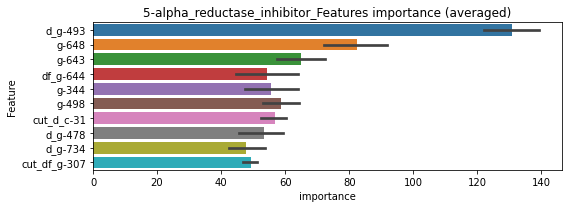

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110808	valid_1's binary_logloss: 0.0148745
[200]	training's binary_logloss: 0.00119244	valid_1's binary_logloss: 0.0038356
[300]	training's binary_logloss: 0.000336142	valid_1's binary_logloss: 0.00293579
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000275458	valid_1's binary_logloss: 0.00286437


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111241	valid_1's binary_logloss: 0.0153715
[200]	training's binary_logloss: 0.00124416	valid_1's binary_logloss: 0.00366418
[300]	training's binary_logloss: 0.000358059	valid_1's binary_logloss: 0.00235232
[400]	training's binary_logloss: 0.000194553	valid_1's binary_logloss: 0.00211232
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000193667	valid_1's binary_logloss: 0.00211083


5-alpha_reductase_inhibitor logloss: 0.0024876491239157767


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241318	valid_1's binary_logloss: 0.0321657
[200]	training's binary_logloss: 0.00291584	valid_1's binary_logloss: 0.00767824
[300]	training's binary_logloss: 0.000841245	valid_1's binary_logloss: 0.00414622
[400]	training's binary_logloss: 0.000446073	valid_1's binary_logloss: 0.00319703
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000361029	valid_1's binary_logloss: 0.00296275
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023916	valid_1's binary_logloss: 0.0354847
[200]	training's binary_logloss: 0.0028749	valid_1's binary_logloss: 0.00861796
[300]	training's binary_logloss: 0.000838016	valid_1's binary_logloss: 0.00493262
[400]	training's binary_logloss: 0.000448579	valid_1's binary_logloss: 0.00407446
[500]	training's binary_logloss: 0.000349435	valid_1's binary_logloss: 0.00379507
Early stopping, best iteration is

1 / 3 AUC score:1.000
y_Threshold: 0.0016750, Threshold: 0.0025116, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00226, conf_1:0.00276
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0025116
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0125116
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0225116
threshold: 0.0225116, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237572	valid_1's binary_logloss: 0.0319141
[200]	training's binary_logloss: 0.00281191	valid_1's binary_logloss: 0.00701109
[300]	training's binary_logloss: 0.000818256	valid_1's binary_logloss: 0.00388359
[400]	training's binary_logloss: 0.000437499	valid_1's binary_logloss: 0.00299053
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00279424
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240945	valid_1's binary_logloss: 0.0322411
[200]	training's binary_logloss: 0.00285013	valid_1's binary_logloss: 0.00668003
[300]	training's binary_logloss: 0.000833195	valid_1's binary_logloss: 0.0035292
[400]	training's binary_logloss: 0.000449606	valid_1's binary_logloss: 0.00273523
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000351643	valid_1's binary_logloss: 0.002509

2 / 3 AUC score:1.000
y_Threshold: 0.0363459, Threshold: 0.0225116, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, conf_0:0.02026, conf_1:0.02476
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0225116
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0325116
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0425116
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.0525116
threshold: 0.0525116, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237572	valid_1's binary_logloss: 0.0319141
[200]	training's binary_logloss: 0.00281191	valid_1's binary_logloss: 0.00701109
[300]	training's binary_logloss: 0.000818256	valid_1's binary_logloss: 0.00388359
[400]	training's binary_logloss: 0.000437499	valid_1's binary_logloss: 0.00299053
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00279424
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240945	valid_1's binary_logloss: 0.0322411
[200]	training's binary_logloss: 0.00285013	valid_1's binary_logloss: 0.00668003
[300]	training's binary_logloss: 0.000833195	valid_1's binary_logloss: 0.0035292
[400]	training's binary_logloss: 0.000449606	valid_1's binary_logloss: 0.00273523
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000351643	valid_1's binary_logloss: 0.002509

3 / 3 AUC score:1.000
y_Threshold: 0.0363459, Threshold: 0.0525116, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.04726, conf_1:0.05776
threshold: 0.0525116, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7793, y_label_rate: 0.0848197


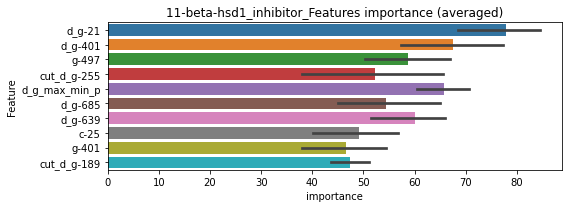

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125824	valid_1's binary_logloss: 0.0197539
[200]	training's binary_logloss: 0.00149555	valid_1's binary_logloss: 0.00714909
[300]	training's binary_logloss: 0.0004196	valid_1's binary_logloss: 0.00571103
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000287567	valid_1's binary_logloss: 0.00553629


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127526	valid_1's binary_logloss: 0.0177767
[200]	training's binary_logloss: 0.0015413	valid_1's binary_logloss: 0.0047956
[300]	training's binary_logloss: 0.000436256	valid_1's binary_logloss: 0.00337405
[400]	training's binary_logloss: 0.000229958	valid_1's binary_logloss: 0.00302557
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000202331	valid_1's binary_logloss: 0.00298699


11-beta-hsd1_inhibitor logloss: 0.004261800130093399


neg labels: 3289 → selected neg labels: 3285


acat_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295425	valid_1's binary_logloss: 0.0417867
[200]	training's binary_logloss: 0.00410036	valid_1's binary_logloss: 0.011018
[300]	training's binary_logloss: 0.00116507	valid_1's binary_logloss: 0.0056734
[400]	training's binary_logloss: 0.000592933	valid_1's binary_logloss: 0.00431771
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000448945	valid_1's binary_logloss: 0.00392337
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.029979	valid_1's binary_logloss: 0.0469045
[200]	training's binary_logloss: 0.00414018	valid_1's binary_logloss: 0.0107008
[300]	training's binary_logloss: 0.00118026	valid_1's binary_logloss: 0.00540785
[400]	training's binary_logloss: 0.000595188	valid_1's binary_logloss: 0.00404813
[500]	training's binary_logloss: 0.000428654	valid_1's binary_logloss: 0.00371952
Early stopping, best iteration is:
[49

1 / 3 AUC score:1.000
y_Threshold: 0.0017924, Threshold: 0.0028153, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00253, conf_1:0.00310
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0028153
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0128153
threshold: 0.0128153, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297246	valid_1's binary_logloss: 0.0432219
[200]	training's binary_logloss: 0.0041048	valid_1's binary_logloss: 0.0117473
[300]	training's binary_logloss: 0.0011675	valid_1's binary_logloss: 0.00616913
[400]	training's binary_logloss: 0.00059385	valid_1's binary_logloss: 0.00465074
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000443246	valid_1's binary_logloss: 0.00427927
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0304441	valid_1's binary_logloss: 0.0466291
[200]	training's binary_logloss: 0.00417128	valid_1's binary_logloss: 0.0104302
[300]	training's binary_logloss: 0.00118181	valid_1's binary_logloss: 0.00517526
[400]	training's binary_logloss: 0.000595974	valid_1's binary_logloss: 0.0040172
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000452417	valid_1's binary_logloss: 0.00374174


2 / 3 AUC score:1.000
y_Threshold: 0.0210768, Threshold: 0.0128153, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, conf_0:0.01153, conf_1:0.01410
threshold: 0.0128153, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297246	valid_1's binary_logloss: 0.0432219
[200]	training's binary_logloss: 0.0041048	valid_1's binary_logloss: 0.0117473
[300]	training's binary_logloss: 0.0011675	valid_1's binary_logloss: 0.00616913
[400]	training's binary_logloss: 0.00059385	valid_1's binary_logloss: 0.00465074
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000443246	valid_1's binary_logloss: 0.00427927
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0304441	valid_1's binary_logloss: 0.0466291
[200]	training's binary_logloss: 0.00417128	valid_1's binary_logloss: 0.0104302
[300]	training's binary_logloss: 0.00118181	valid_1's binary_logloss: 0.00517526
[400]	training's binary_logloss: 0.000595974	valid_1's binary_logloss: 0.0040172
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000452417	valid_1's binary_logloss: 0.00374174


3 / 3 AUC score:1.000
y_Threshold: 0.0210768, Threshold: 0.0128153, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, conf_0:0.01153, conf_1:0.01410
threshold: 0.0128153, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 664.0/7792, y_label_rate: 0.0852156


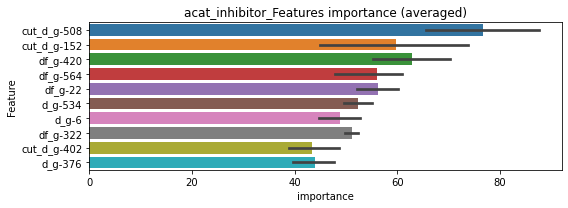

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 acat_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159673	valid_1's binary_logloss: 0.0262235
[200]	training's binary_logloss: 0.00220696	valid_1's binary_logloss: 0.0108809
[300]	training's binary_logloss: 0.000597936	valid_1's binary_logloss: 0.00893042
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000401725	valid_1's binary_logloss: 0.0086452


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 acat_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172886	valid_1's binary_logloss: 0.0256112
[200]	training's binary_logloss: 0.00244332	valid_1's binary_logloss: 0.00681817
[300]	training's binary_logloss: 0.000674126	valid_1's binary_logloss: 0.00393832
[400]	training's binary_logloss: 0.000327121	valid_1's binary_logloss: 0.00325993
[500]	training's binary_logloss: 0.000227412	valid_1's binary_logloss: 0.00306842
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000229393	valid_1's binary_logloss: 0.00306263


acat_inhibitor logloss: 0.005853915167130174


neg labels: 3289 → selected neg labels: 3259


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3259, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0851579	valid_1's binary_logloss: 0.2219
[200]	training's binary_logloss: 0.0259278	valid_1's binary_logloss: 0.196745
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.0218291	valid_1's binary_logloss: 0.195617
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0894985	valid_1's binary_logloss: 0.213937
[200]	training's binary_logloss: 0.029802	valid_1's binary_logloss: 0.176207
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0207918	valid_1's binary_logloss: 0.173346


1 / 3 AUC score:0.948
y_Threshold: 0.0602768, Threshold: 0.0901679, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 299 → Positive_corect_labels: 567/3611
p_label_rate: 0.0200904 Vs.target_rate: 0.00798
Num_p_label: 80.0, conf_0:0.08115, conf_1:0.09918
threshold: 0.0901679, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 567.0/3611, y_label_rate: 0.1570202
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0676385	valid_1's binary_logloss: 0.16214
[200]	training's binary_logloss: 0.0185519	valid_1's binary_logloss: 0.127324
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00849008	valid_1's binary_logloss: 0.121185
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0745622	valid_1's binary_logloss: 0.148488
[200]	training's binary_logloss: 0.0211551	valid_1's binary_logloss: 0.101338
[300]	training's binary_logloss: 0.00744436	valid_1's binary_logloss: 0.088194
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00425433	valid_1's binary_logloss: 0.0846375


2 / 3 AUC score:0.990
y_Threshold: 0.0635741, Threshold: 0.0901679, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 72 → Positive_corect_labels: 531.0/3539
p_label_rate: 0.0075339 Vs.target_rate: 0.00798
Num_p_label: 30.0, conf_0:0.08115, conf_1:0.09918
threshold: 0.0901679, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 531.0/3539, y_label_rate: 0.1500424
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0599682	valid_1's binary_logloss: 0.139393
[200]	training's binary_logloss: 0.0151529	valid_1's binary_logloss: 0.102616
[300]	training's binary_logloss: 0.00511308	valid_1's binary_logloss: 0.0947677
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00306733	valid_1's binary_logloss: 0.0927967
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0631812	valid_1's binary_logloss: 0.135859
[200]	training's binary_logloss: 0.0161808	valid_1's binary_logloss: 0.0943049
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00621859	valid_1's binary_logloss: 0.0836264


3 / 3 AUC score:0.993
y_Threshold: 0.0472761, Threshold: 0.0901679, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 506.0/3489
p_label_rate: 0.0072828 Vs.target_rate: 0.00798
Num_p_label: 29.0, conf_0:0.08115, conf_1:0.09918
threshold: 0.0901679, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 535.0/7471, y_label_rate: 0.0716102


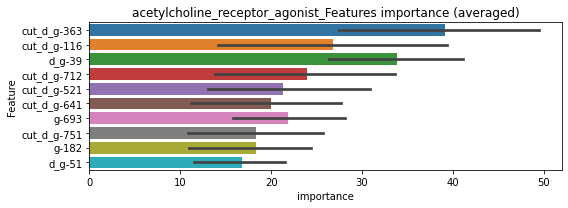

len(train_index) : 3735
len(valid_index) : 3736
================================= fold 1/2 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0320823	valid_1's binary_logloss: 0.0795693
[200]	training's binary_logloss: 0.0080521	valid_1's binary_logloss: 0.0616887
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00297968	valid_1's binary_logloss: 0.0584733


len(train_index) : 3736
len(valid_index) : 3735
================================= fold 2/2 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329994	valid_1's binary_logloss: 0.0875919
[200]	training's binary_logloss: 0.00833952	valid_1's binary_logloss: 0.0711526
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00319465	valid_1's binary_logloss: 0.068055


acetylcholine_receptor_agonist logloss: 0.06326353127812535


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.117223	valid_1's binary_logloss: 0.293282
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.0622757	valid_1's binary_logloss: 0.281082
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.123573	valid_1's binary_logloss: 0.290442
[200]	training's binary_logloss: 0.0471358	valid_1's binary_logloss: 0.27017
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.0431518	valid_1's binary_logloss: 0.269021


1 / 3 AUC score:0.864
y_Threshold: 0.1052688, Threshold: 0.1408801, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 488 → Positive_corect_labels: 469/3401
p_label_rate: 0.0200904 Vs.target_rate: 0.01264
Num_p_label: 80.0, conf_0:0.12679, conf_1:0.15497
threshold: 0.1408801, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 469.0/3401, y_label_rate: 0.1379006
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0691524	valid_1's binary_logloss: 0.199707
[200]	training's binary_logloss: 0.0204486	valid_1's binary_logloss: 0.173567
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0120373	valid_1's binary_logloss: 0.170546
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0733539	valid_1's binary_logloss: 0.186787
[200]	training's binary_logloss: 0.0225171	valid_1's binary_logloss: 0.159216
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.0105596	valid_1's binary_logloss: 0.154754


2 / 3 AUC score:0.973
y_Threshold: 0.0735660, Threshold: 0.1408801, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 399.0/3261
p_label_rate: 0.0055249 Vs.target_rate: 0.01264
Num_p_label: 22.0, conf_0:0.12679, conf_1:0.15497
threshold: 0.1408801, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 399.0/3261, y_label_rate: 0.1223551
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0508769	valid_1's binary_logloss: 0.148876
[200]	training's binary_logloss: 0.0129958	valid_1's binary_logloss: 0.12144
[300]	training's binary_logloss: 0.00459165	valid_1's binary_logloss: 0.116094
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00489401	valid_1's binary_logloss: 0.11597
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0552825	valid_1's binary_logloss: 0.148946
[200]	training's binary_logloss: 0.0151708	valid_1's binary_logloss: 0.116588
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00700489	valid_1's binary_logloss: 0.111326


3 / 3 AUC score:0.996
y_Threshold: 0.0553352, Threshold: 0.1408801, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 60 → Positive_corect_labels: 369.0/3201
p_label_rate: 0.0030136 Vs.target_rate: 0.01264
Num_p_label: 12.0, conf_0:0.12679, conf_1:0.15497
Num_p_label: 12.0, Expected: 50.3, Adj_threshold_1: 0.1408801
Num_p_label: 14.0, Expected: 50.3, Adj_threshold_2: 0.1308801
Num_p_label: 18.0, Expected: 50.3, Adj_threshold_3: 0.1208801
Num_p_label: 20.0, Expected: 50.3, Adj_threshold_4: 0.1108801
Num_p_label: 25.0, Expected: 50.3, Adj_threshold_5: 0.1008801
Num_p_label: 32.0, Expected: 50.3, Adj_threshold_6: 0.0908801
threshold: 0.0908801, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 401.0/7183, y_label_rate: 0.0558263


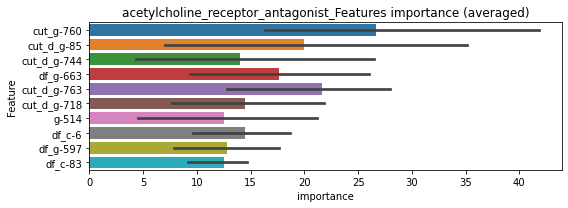

len(train_index) : 3591
len(valid_index) : 3592
================================= fold 1/2 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256836	valid_1's binary_logloss: 0.0851223
[200]	training's binary_logloss: 0.00660488	valid_1's binary_logloss: 0.0741044
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00476009	valid_1's binary_logloss: 0.0731153


len(train_index) : 3592
len(valid_index) : 3591
================================= fold 2/2 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279625	valid_1's binary_logloss: 0.0812274
[200]	training's binary_logloss: 0.00741816	valid_1's binary_logloss: 0.0672398
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0041206	valid_1's binary_logloss: 0.065888


acetylcholine_receptor_antagonist logloss: 0.06950219493303628


neg labels: 3289 → selected neg labels: 3276


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3276, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0515252	valid_1's binary_logloss: 0.0948219
[200]	training's binary_logloss: 0.012029	valid_1's binary_logloss: 0.0528045
[300]	training's binary_logloss: 0.00380148	valid_1's binary_logloss: 0.0407671
[400]	training's binary_logloss: 0.00175373	valid_1's binary_logloss: 0.0361216
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00125794	valid_1's binary_logloss: 0.0343074
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0494147	valid_1's binary_logloss: 0.0942821
[200]	training's binary_logloss: 0.0109344	valid_1's binary_logloss: 0.0546686
[300]	training's binary_logloss: 0.00338042	valid_1's binary_logloss: 0.0450045
[400]	training's binary_logloss: 0.00158606	valid_1's binary_logloss: 0.0423326
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00115121	valid_1's binary_logloss: 0.0416599


1 / 3 AUC score:0.999
y_Threshold: 0.0070771, Threshold: 0.0087144, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3793
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.00784, conf_1:0.00959
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0087144
Num_p_label: 9.0, Expected: 12.2, Adj_threshold_2: 0.0187144
threshold: 0.0187144, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0468308	valid_1's binary_logloss: 0.0981192
[200]	training's binary_logloss: 0.00999434	valid_1's binary_logloss: 0.0587786
[300]	training's binary_logloss: 0.0031886	valid_1's binary_logloss: 0.0497151
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00181804	valid_1's binary_logloss: 0.0475949
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0496431	valid_1's binary_logloss: 0.103876
[200]	training's binary_logloss: 0.0111521	valid_1's binary_logloss: 0.0670329
[300]	training's binary_logloss: 0.00350323	valid_1's binary_logloss: 0.0595768
[400]	training's binary_logloss: 0.00163151	valid_1's binary_logloss: 0.0563667
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00164012	valid_1's binary_logloss: 0.0563026


2 / 3 AUC score:0.996
y_Threshold: 0.0186675, Threshold: 0.0187144, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 642.0/3773
p_label_rate: 0.0082873 Vs.target_rate: 0.00307
Num_p_label: 33.0, conf_0:0.01684, conf_1:0.02059
threshold: 0.0187144, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0426631	valid_1's binary_logloss: 0.0952659
[200]	training's binary_logloss: 0.00854308	valid_1's binary_logloss: 0.0600019
[300]	training's binary_logloss: 0.00275325	valid_1's binary_logloss: 0.0528061
[400]	training's binary_logloss: 0.00134006	valid_1's binary_logloss: 0.0498925
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.0012978	valid_1's binary_logloss: 0.0497854
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0515813	valid_1's binary_logloss: 0.0886706
[200]	training's binary_logloss: 0.0112018	valid_1's binary_logloss: 0.045151
[300]	training's binary_logloss: 0.00343257	valid_1's binary_logloss: 0.0354458
[400]	training's binary_logloss: 0.00159988	valid_1's binary_logloss: 0.0327223
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00136261	valid_1's binary_logloss: 0.0322614


3 / 3 AUC score:1.000
y_Threshold: 0.0209403, Threshold: 0.0187144, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 636.0/3761
p_label_rate: 0.0052737 Vs.target_rate: 0.00307
Num_p_label: 21.0, conf_0:0.01684, conf_1:0.02059
threshold: 0.0187144, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/7743, y_label_rate: 0.0848508


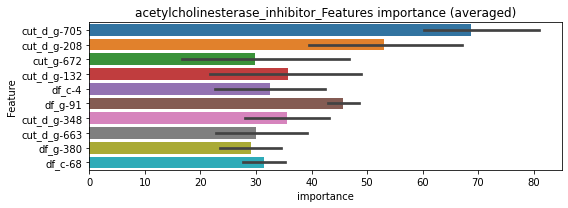

len(train_index) : 3871
len(valid_index) : 3872
================================= fold 1/2 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0260587	valid_1's binary_logloss: 0.0643486
[200]	training's binary_logloss: 0.00532045	valid_1's binary_logloss: 0.046155
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00254974	valid_1's binary_logloss: 0.0440199


len(train_index) : 3872
len(valid_index) : 3871
================================= fold 2/2 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0278707	valid_1's binary_logloss: 0.0584916
[200]	training's binary_logloss: 0.00599097	valid_1's binary_logloss: 0.036617
[300]	training's binary_logloss: 0.00184287	valid_1's binary_logloss: 0.031794
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00133712	valid_1's binary_logloss: 0.0310809


acetylcholinesterase_inhibitor logloss: 0.037551205036459596


neg labels: 3289 → selected neg labels: 3281


adenosine_receptor_agonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0407839	valid_1's binary_logloss: 0.0845451
[200]	training's binary_logloss: 0.00753245	valid_1's binary_logloss: 0.0434608
[300]	training's binary_logloss: 0.00230082	valid_1's binary_logloss: 0.0339776
[400]	training's binary_logloss: 0.00110618	valid_1's binary_logloss: 0.0307477
[500]	training's binary_logloss: 0.000711835	valid_1's binary_logloss: 0.0291899
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000678645	valid_1's binary_logloss: 0.0290985
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0431156	valid_1's binary_logloss: 0.0773618
[200]	training's binary_logloss: 0.00821713	valid_1's binary_logloss: 0.0379293
[300]	training's binary_logloss: 0.00250908	valid_1's binary_logloss: 0.0294189
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00202453	valid_1's binary_logloss: 0.0288126


1 / 3 AUC score:0.999
y_Threshold: 0.0082322, Threshold: 0.0125216, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.01127, conf_1:0.01377
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0125216
Num_p_label: 26.0, Expected: 9.0, Adj_threshold_2: 0.0225216
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_3: 0.0325216
threshold: 0.0325216, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0427128	valid_1's binary_logloss: 0.0825666
[200]	training's binary_logloss: 0.00781948	valid_1's binary_logloss: 0.0377751
[300]	training's binary_logloss: 0.00236102	valid_1's binary_logloss: 0.0254414
[400]	training's binary_logloss: 0.00113822	valid_1's binary_logloss: 0.0211102
[500]	training's binary_logloss: 0.000728143	valid_1's binary_logloss: 0.0194879
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000617849	valid_1's binary_logloss: 0.019045
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0417008	valid_1's binary_logloss: 0.0806595
[200]	training's binary_logloss: 0.00789551	valid_1's binary_logloss: 0.0373632
[300]	training's binary_logloss: 0.00241014	valid_1's binary_logloss: 0.0262676
[400]	training's binary_logloss: 0.00116224	valid_1's binary_logloss: 0.0226065
[500]	training's binary_logloss: 0.000748835

2 / 3 AUC score:1.000
y_Threshold: 0.0298146, Threshold: 0.0325216, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0050226 Vs.target_rate: 0.00227
Num_p_label: 20.0, conf_0:0.02927, conf_1:0.03577
threshold: 0.0325216, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.040782	valid_1's binary_logloss: 0.0807849
[200]	training's binary_logloss: 0.00747911	valid_1's binary_logloss: 0.0389204
[300]	training's binary_logloss: 0.00227739	valid_1's binary_logloss: 0.0305313
[400]	training's binary_logloss: 0.00110036	valid_1's binary_logloss: 0.0270573
[500]	training's binary_logloss: 0.000706017	valid_1's binary_logloss: 0.0258065
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000703739	valid_1's binary_logloss: 0.0257833
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0413627	valid_1's binary_logloss: 0.0804261
[200]	training's binary_logloss: 0.00767481	valid_1's binary_logloss: 0.0461117
[300]	training's binary_logloss: 0.00235093	valid_1's binary_logloss: 0.0400341
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00156847	valid_1's binary_logloss: 0.0390698


3 / 3 AUC score:0.999
y_Threshold: 0.0254284, Threshold: 0.0325216, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0070316 Vs.target_rate: 0.00227
Num_p_label: 28.0, conf_0:0.02927, conf_1:0.03577
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_1: 0.0325216
Num_p_label: 14.0, Expected: 9.0, Adj_threshold_2: 0.0425216
threshold: 0.0425216, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/7759, y_label_rate: 0.0845470


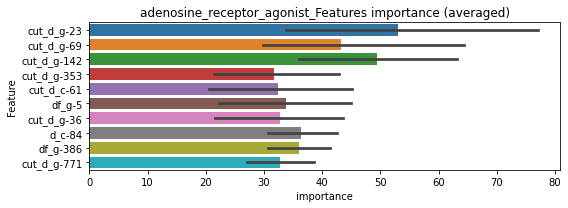

len(train_index) : 3879
len(valid_index) : 3880
================================= fold 1/2 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217362	valid_1's binary_logloss: 0.0493466
[200]	training's binary_logloss: 0.00406564	valid_1's binary_logloss: 0.0269801
[300]	training's binary_logloss: 0.00122368	valid_1's binary_logloss: 0.021906
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000696453	valid_1's binary_logloss: 0.0208638


len(train_index) : 3880
len(valid_index) : 3879
================================= fold 2/2 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238933	valid_1's binary_logloss: 0.0438279
[200]	training's binary_logloss: 0.004592	valid_1's binary_logloss: 0.0196794
[300]	training's binary_logloss: 0.00139688	valid_1's binary_logloss: 0.0148362
[400]	training's binary_logloss: 0.000655331	valid_1's binary_logloss: 0.0134228
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000521362	valid_1's binary_logloss: 0.013079


adenosine_receptor_agonist logloss: 0.016971930128208804


neg labels: 3289 → selected neg labels: 3273


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3273, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.058772	valid_1's binary_logloss: 0.125895
[200]	training's binary_logloss: 0.0140525	valid_1's binary_logloss: 0.0860967
[300]	training's binary_logloss: 0.00449329	valid_1's binary_logloss: 0.0774214
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00346985	valid_1's binary_logloss: 0.0762267
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0612181	valid_1's binary_logloss: 0.118002
[200]	training's binary_logloss: 0.0150806	valid_1's binary_logloss: 0.0725451
[300]	training's binary_logloss: 0.00496314	valid_1's binary_logloss: 0.0607111
[400]	training's binary_logloss: 0.00221921	valid_1's binary_logloss: 0.0564649
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00174892	valid_1's binary_logloss: 0.0558345


1 / 3 AUC score:0.994
y_Threshold: 0.0139439, Threshold: 0.0181715, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 154 → Positive_corect_labels: 643/3773
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.01635, conf_1:0.01999
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0181715
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_2: 0.0281715
threshold: 0.0281715, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0552526	valid_1's binary_logloss: 0.120022
[200]	training's binary_logloss: 0.0127996	valid_1's binary_logloss: 0.077104
[300]	training's binary_logloss: 0.00410291	valid_1's binary_logloss: 0.0634406
[400]	training's binary_logloss: 0.00188335	valid_1's binary_logloss: 0.0598054
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00136019	valid_1's binary_logloss: 0.0581551
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0610041	valid_1's binary_logloss: 0.113044
[200]	training's binary_logloss: 0.0149464	valid_1's binary_logloss: 0.0661109
[300]	training's binary_logloss: 0.0047869	valid_1's binary_logloss: 0.0547476
[400]	training's binary_logloss: 0.00214924	valid_1's binary_logloss: 0.0511248
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00163721	valid_1's binary_logloss: 0.0502622


2 / 3 AUC score:0.999
y_Threshold: 0.0250148, Threshold: 0.0281715, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 632.0/3751
p_label_rate: 0.0067805 Vs.target_rate: 0.00403
Num_p_label: 27.0, conf_0:0.02535, conf_1:0.03099
threshold: 0.0281715, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 632.0/3751, y_label_rate: 0.1684884
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0538222	valid_1's binary_logloss: 0.111876
[200]	training's binary_logloss: 0.0119149	valid_1's binary_logloss: 0.067837
[300]	training's binary_logloss: 0.00384349	valid_1's binary_logloss: 0.0568918
[400]	training's binary_logloss: 0.00179852	valid_1's binary_logloss: 0.0531658
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.0012906	valid_1's binary_logloss: 0.0520284
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0576288	valid_1's binary_logloss: 0.10833
[200]	training's binary_logloss: 0.0133449	valid_1's binary_logloss: 0.0612106
[300]	training's binary_logloss: 0.00422838	valid_1's binary_logloss: 0.0489122
[400]	training's binary_logloss: 0.00195788	valid_1's binary_logloss: 0.0445529
[500]	training's binary_logloss: 0.00118482	valid_1's binary_logloss: 0.0427278
Early stopping, best iteration is:
[570]	training's 

3 / 3 AUC score:0.998
y_Threshold: 0.0273026, Threshold: 0.0281715, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 621.0/3729
p_label_rate: 0.0052737 Vs.target_rate: 0.00403
Num_p_label: 21.0, conf_0:0.02535, conf_1:0.03099
threshold: 0.0281715, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 642.0/7711, y_label_rate: 0.0832577


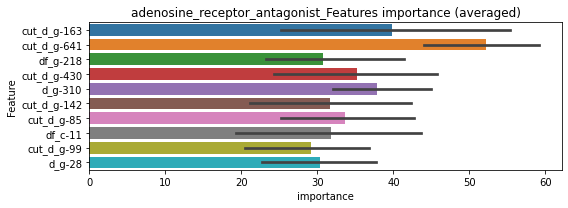

len(train_index) : 3855
len(valid_index) : 3856
================================= fold 1/2 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294557	valid_1's binary_logloss: 0.068806
[200]	training's binary_logloss: 0.00640709	valid_1's binary_logloss: 0.0465259
[300]	training's binary_logloss: 0.00202699	valid_1's binary_logloss: 0.0407879
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00112303	valid_1's binary_logloss: 0.0394


len(train_index) : 3856
len(valid_index) : 3855
================================= fold 2/2 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032389	valid_1's binary_logloss: 0.065151
[200]	training's binary_logloss: 0.00755339	valid_1's binary_logloss: 0.0422291
[300]	training's binary_logloss: 0.00237585	valid_1's binary_logloss: 0.0377252
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00117039	valid_1's binary_logloss: 0.03676


adenosine_receptor_antagonist logloss: 0.03808015336661381


neg labels: 3289 → selected neg labels: 3286


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221626	valid_1's binary_logloss: 0.0280272
[200]	training's binary_logloss: 0.00255096	valid_1's binary_logloss: 0.00438566
[300]	training's binary_logloss: 0.000729126	valid_1's binary_logloss: 0.00164681
[400]	training's binary_logloss: 0.000393332	valid_1's binary_logloss: 0.00101639
[500]	training's binary_logloss: 0.000316283	valid_1's binary_logloss: 0.000868026
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000311284	valid_1's binary_logloss: 0.000859435
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0223013	valid_1's binary_logloss: 0.026223
[200]	training's binary_logloss: 0.00260014	valid_1's binary_logloss: 0.0037874
[300]	training's binary_logloss: 0.000749011	valid_1's binary_logloss: 0.00129705
[400]	training's binary_logloss: 0.0003992	valid_1's binary_logloss: 0.000766667
Early stopping, best iteration i

1 / 3 AUC score:1.000
y_Threshold: 0.0014780, Threshold: 0.0028479, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00256, conf_1:0.00313
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0028479
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0128479
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0228479
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.0328479
threshold: 0.0328479, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222528	valid_1's binary_logloss: 0.0272417
[200]	training's binary_logloss: 0.00246892	valid_1's binary_logloss: 0.00415169
[300]	training's binary_logloss: 0.000705174	valid_1's binary_logloss: 0.00141429
[400]	training's binary_logloss: 0.000383134	valid_1's binary_logloss: 0.000865745
[500]	training's binary_logloss: 0.00031325	valid_1's binary_logloss: 0.000747499
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000312577	valid_1's binary_logloss: 0.000746735
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222985	valid_1's binary_logloss: 0.0256774
[200]	training's binary_logloss: 0.00252193	valid_1's binary_logloss: 0.00342531
[300]	training's binary_logloss: 0.000709987	valid_1's binary_logloss: 0.00108801
[400]	training's binary_logloss: 0.000383919	valid_1's binary_logloss: 0.000632047
[500]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.1464691, Threshold: 0.0328479, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00076
Num_p_label: 13.0, conf_0:0.02956, conf_1:0.03613
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.0328479
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0428479
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0528479
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0628479
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.0728479
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_6: 0.0828479
threshold: 0.0828479, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222528	valid_1's binary_logloss: 0.0272417
[200]	training's binary_logloss: 0.00246892	valid_1's binary_logloss: 0.00415169
[300]	training's binary_logloss: 0.000705174	valid_1's binary_logloss: 0.00141429
[400]	training's binary_logloss: 0.000383134	valid_1's binary_logloss: 0.000865745
[500]	training's binary_logloss: 0.00031325	valid_1's binary_logloss: 0.000747499
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000312577	valid_1's binary_logloss: 0.000746735
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222985	valid_1's binary_logloss: 0.0256774
[200]	training's binary_logloss: 0.00252193	valid_1's binary_logloss: 0.00342531
[300]	training's binary_logloss: 0.000709987	valid_1's binary_logloss: 0.00108801
[400]	training's binary_logloss: 0.000383919	valid_1's binary_logloss: 0.000632047
[500]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.1464691, Threshold: 0.0828479, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.07456, conf_1:0.09113
threshold: 0.0828479, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7793, y_label_rate: 0.0849480


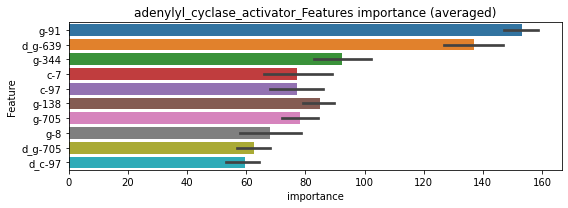

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112612	valid_1's binary_logloss: 0.0187964
[200]	training's binary_logloss: 0.00122118	valid_1's binary_logloss: 0.00650513
[300]	training's binary_logloss: 0.000348264	valid_1's binary_logloss: 0.00506429
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000214424	valid_1's binary_logloss: 0.00485512


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011629	valid_1's binary_logloss: 0.0146595
[200]	training's binary_logloss: 0.00131848	valid_1's binary_logloss: 0.00298421
[300]	training's binary_logloss: 0.000377473	valid_1's binary_logloss: 0.00194285
[400]	training's binary_logloss: 0.00020237	valid_1's binary_logloss: 0.00177538
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000201528	valid_1's binary_logloss: 0.00177534


adenylyl_cyclase_activator logloss: 0.003315431567677785


neg labels: 3289 → selected neg labels: 3244


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3244, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0975506	valid_1's binary_logloss: 0.270335
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.0476053	valid_1's binary_logloss: 0.255021
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.112594	valid_1's binary_logloss: 0.258992
[200]	training's binary_logloss: 0.0402725	valid_1's binary_logloss: 0.22847
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.0300092	valid_1's binary_logloss: 0.226319


1 / 3 AUC score:0.914
y_Threshold: 0.0858990, Threshold: 0.1116035, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 393 → Positive_corect_labels: 517/3499
p_label_rate: 0.0200904 Vs.target_rate: 0.01134
Num_p_label: 80.0, conf_0:0.10044, conf_1:0.12276
threshold: 0.1116035, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 517.0/3499, y_label_rate: 0.1477565
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0766064	valid_1's binary_logloss: 0.185097
[200]	training's binary_logloss: 0.0224172	valid_1's binary_logloss: 0.158938
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.0155804	valid_1's binary_logloss: 0.155259
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0753766	valid_1's binary_logloss: 0.1912
[200]	training's binary_logloss: 0.0211928	valid_1's binary_logloss: 0.158514
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00996051	valid_1's binary_logloss: 0.153469


2 / 3 AUC score:0.978
y_Threshold: 0.0688132, Threshold: 0.1116035, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 116 → Positive_corect_labels: 459.0/3383
p_label_rate: 0.0060271 Vs.target_rate: 0.01134
Num_p_label: 24.0, conf_0:0.10044, conf_1:0.12276
threshold: 0.1116035, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 459.0/3383, y_label_rate: 0.1356784
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0638589	valid_1's binary_logloss: 0.156025
[200]	training's binary_logloss: 0.0178648	valid_1's binary_logloss: 0.12502
[300]	training's binary_logloss: 0.00628069	valid_1's binary_logloss: 0.119574
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00526078	valid_1's binary_logloss: 0.118909
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.06072	valid_1's binary_logloss: 0.169423
[200]	training's binary_logloss: 0.0161345	valid_1's binary_logloss: 0.138095
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.0133165	valid_1's binary_logloss: 0.135935


3 / 3 AUC score:0.986
y_Threshold: 0.0611339, Threshold: 0.1116035, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 82 → Positive_corect_labels: 418.0/3301
p_label_rate: 0.0037670 Vs.target_rate: 0.01134
Num_p_label: 15.0, conf_0:0.10044, conf_1:0.12276
Num_p_label: 15.0, Expected: 45.1, Adj_threshold_1: 0.1116035
Num_p_label: 20.0, Expected: 45.1, Adj_threshold_2: 0.1016035
Num_p_label: 28.0, Expected: 45.1, Adj_threshold_3: 0.0916035
threshold: 0.0916035, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 446.0/7283, y_label_rate: 0.0612385


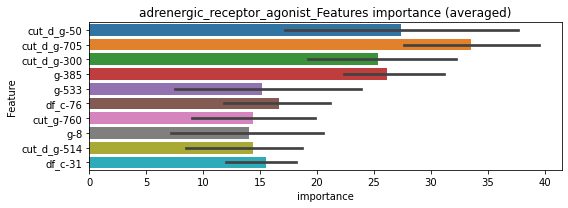

len(train_index) : 3641
len(valid_index) : 3642
================================= fold 1/2 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291084	valid_1's binary_logloss: 0.0902553
[200]	training's binary_logloss: 0.00760375	valid_1's binary_logloss: 0.0796695
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00778706	valid_1's binary_logloss: 0.0793227


len(train_index) : 3642
len(valid_index) : 3641
================================= fold 2/2 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290566	valid_1's binary_logloss: 0.0945972
Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00965926	valid_1's binary_logloss: 0.0868078


adrenergic_receptor_agonist logloss: 0.08306473795621186


neg labels: 3289 → selected neg labels: 3229


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3229, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.12736	valid_1's binary_logloss: 0.342893
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.107998	valid_1's binary_logloss: 0.340298
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.13746	valid_1's binary_logloss: 0.336514
Early stopping, best iteration is:
[152]	training's binary_logloss: 0.0856642	valid_1's binary_logloss: 0.326998


1 / 3 AUC score:0.805
y_Threshold: 0.1382034, Threshold: 0.1687231, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 620 → Positive_corect_labels: 400/3254
p_label_rate: 0.0200904 Vs.target_rate: 0.01512
Num_p_label: 80.0, conf_0:0.15185, conf_1:0.18560
threshold: 0.1687231, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 400.0/3254, y_label_rate: 0.1229256
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0698027	valid_1's binary_logloss: 0.210785
[200]	training's binary_logloss: 0.0216437	valid_1's binary_logloss: 0.194922
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.0233568	valid_1's binary_logloss: 0.194622
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0703866	valid_1's binary_logloss: 0.205528
[200]	training's binary_logloss: 0.0220274	valid_1's binary_logloss: 0.183544
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.0177621	valid_1's binary_logloss: 0.182235


2 / 3 AUC score:0.958
y_Threshold: 0.0762621, Threshold: 0.1687231, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 162 → Positive_corect_labels: 319.0/3092
p_label_rate: 0.0022602 Vs.target_rate: 0.01512
Num_p_label: 9.0, conf_0:0.15185, conf_1:0.18560
Num_p_label: 9.0, Expected: 60.2, Adj_threshold_1: 0.1687231
Num_p_label: 14.0, Expected: 60.2, Adj_threshold_2: 0.1587231
Num_p_label: 16.0, Expected: 60.2, Adj_threshold_3: 0.1487231
Num_p_label: 16.0, Expected: 60.2, Adj_threshold_4: 0.1387231
Num_p_label: 21.0, Expected: 60.2, Adj_threshold_5: 0.1287231
Num_p_label: 29.0, Expected: 60.2, Adj_threshold_6: 0.1187231
Num_p_label: 35.0, Expected: 60.2, Adj_threshold_7: 0.1087231
threshold: 0.1087231, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 319.0/3092, y_label_rate: 0.1031695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0503723	valid_1's binary_logloss: 0.159612
Early stopping, best iteration is:
[186]	training's binary_logloss: 0.0165105	valid_1's binary_logloss: 0.142393
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0496083	valid_1's binary_logloss: 0.167431
[200]	training's binary_logloss: 0.0133778	valid_1's binary_logloss: 0.145062
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.0123723	valid_1's binary_logloss: 0.143783


3 / 3 AUC score:0.980
y_Threshold: 0.0606933, Threshold: 0.1087231, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 80 → Positive_corect_labels: 279.0/3012
p_label_rate: 0.0060271 Vs.target_rate: 0.01512
Num_p_label: 24.0, conf_0:0.09785, conf_1:0.11960
threshold: 0.1087231, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 303.0/6994, y_label_rate: 0.0433228


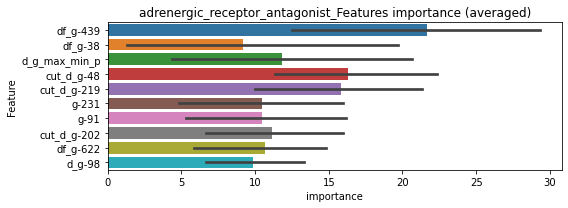

len(train_index) : 3497
len(valid_index) : 3497
================================= fold 1/2 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206946	valid_1's binary_logloss: 0.0889618
Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00924943	valid_1's binary_logloss: 0.0854132


len(train_index) : 3497
len(valid_index) : 3497
================================= fold 2/2 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209559	valid_1's binary_logloss: 0.0932216
[200]	training's binary_logloss: 0.00539592	valid_1's binary_logloss: 0.0873357
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00525722	valid_1's binary_logloss: 0.0871239


adrenergic_receptor_antagonist logloss: 0.08626854817145495


neg labels: 3289 → selected neg labels: 3278


akt_inhibitor, len(trt): 66, len(othr): 3278, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0384194	valid_1's binary_logloss: 0.0820155
[200]	training's binary_logloss: 0.00656439	valid_1's binary_logloss: 0.0390219
[300]	training's binary_logloss: 0.00208384	valid_1's binary_logloss: 0.0305345
[400]	training's binary_logloss: 0.000999676	valid_1's binary_logloss: 0.0269617
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000844699	valid_1's binary_logloss: 0.0260932
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0409497	valid_1's binary_logloss: 0.0682337
[200]	training's binary_logloss: 0.00756922	valid_1's binary_logloss: 0.024809
[300]	training's binary_logloss: 0.00232878	valid_1's binary_logloss: 0.014632
[400]	training's binary_logloss: 0.00111527	valid_1's binary_logloss: 0.0109344
[500]	training's binary_logloss: 0.000709375	valid_1's binary_logloss: 0.0096636
[600]	training's binary_logloss: 0.000560583

1 / 3 AUC score:1.000
y_Threshold: 0.0065965, Threshold: 0.0188843, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00277
Num_p_label: 80.0, conf_0:0.01700, conf_1:0.02077
Num_p_label: 80.0, Expected: 11.0, Adj_threshold_1: 0.0188843
Num_p_label: 58.0, Expected: 11.0, Adj_threshold_2: 0.0288843
Num_p_label: 48.0, Expected: 11.0, Adj_threshold_3: 0.0388843
Num_p_label: 43.0, Expected: 11.0, Adj_threshold_4: 0.0488843
Num_p_label: 37.0, Expected: 11.0, Adj_threshold_5: 0.0588843
Num_p_label: 37.0, Expected: 11.0, Adj_threshold_6: 0.0688843
Num_p_label: 35.0, Expected: 11.0, Adj_threshold_7: 0.0788843
Num_p_label: 34.0, Expected: 11.0, Adj_threshold_8: 0.0888843
Num_p_label: 33.0, Expected: 11.0, Adj_threshold_9: 0.0988843
Num_p_label: 31.0, Expected: 11.0, Adj_threshold_10: 0.1088843
threshold: 0.1188843, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 655.0/3801, y_label_rate: 0.1723231

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0381738	valid_1's binary_logloss: 0.0775519
[200]	training's binary_logloss: 0.00624086	valid_1's binary_logloss: 0.0338075
[300]	training's binary_logloss: 0.0019522	valid_1's binary_logloss: 0.0267179
[400]	training's binary_logloss: 0.000928046	valid_1's binary_logloss: 0.0229829
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000715632	valid_1's binary_logloss: 0.0224424
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0387317	valid_1's binary_logloss: 0.0630653
[200]	training's binary_logloss: 0.00682263	valid_1's binary_logloss: 0.0210039
[300]	training's binary_logloss: 0.00205373	valid_1's binary_logloss: 0.0110609
[400]	training's binary_logloss: 0.000993674	valid_1's binary_logloss: 0.00805521
[500]	training's binary_logloss: 0.000651228	valid_1's binary_logloss: 0.00691535
[600]	training's binary_logloss: 0.00053

2 / 3 AUC score:1.000
y_Threshold: 0.0639698, Threshold: 0.1188843, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0160723 Vs.target_rate: 0.00277
Num_p_label: 64.0, conf_0:0.10700, conf_1:0.13077
Num_p_label: 64.0, Expected: 11.0, Adj_threshold_1: 0.1188843
Num_p_label: 64.0, Expected: 11.0, Adj_threshold_2: 0.1288843
Num_p_label: 61.0, Expected: 11.0, Adj_threshold_3: 0.1388843
Num_p_label: 61.0, Expected: 11.0, Adj_threshold_4: 0.1488843
Num_p_label: 56.0, Expected: 11.0, Adj_threshold_5: 0.1588843
Num_p_label: 54.0, Expected: 11.0, Adj_threshold_6: 0.1688843
Num_p_label: 54.0, Expected: 11.0, Adj_threshold_7: 0.1788843
Num_p_label: 53.0, Expected: 11.0, Adj_threshold_8: 0.1888843
Num_p_label: 52.0, Expected: 11.0, Adj_threshold_9: 0.1988843
Num_p_label: 49.0, Expected: 11.0, Adj_threshold_10: 0.2088843
threshold: 0.2188843, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 649.0/3789, y_label_rate: 0.171285

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0372776	valid_1's binary_logloss: 0.0723552
[200]	training's binary_logloss: 0.00615838	valid_1's binary_logloss: 0.0346928
[300]	training's binary_logloss: 0.00188496	valid_1's binary_logloss: 0.0248489
[400]	training's binary_logloss: 0.000926793	valid_1's binary_logloss: 0.0212174
[500]	training's binary_logloss: 0.000615499	valid_1's binary_logloss: 0.0196503
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000538074	valid_1's binary_logloss: 0.0191954
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0379817	valid_1's binary_logloss: 0.0690604
[200]	training's binary_logloss: 0.00647251	valid_1's binary_logloss: 0.0283526
[300]	training's binary_logloss: 0.00195074	valid_1's binary_logloss: 0.0199637
[400]	training's binary_logloss: 0.000955478	valid_1's binary_logloss: 0.017095
[500]	training's binary_logloss: 0.0006281

3 / 3 AUC score:1.000
y_Threshold: 0.0489145, Threshold: 0.2188843, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0140633 Vs.target_rate: 0.00277
Num_p_label: 56.0, conf_0:0.19700, conf_1:0.24077
Num_p_label: 56.0, Expected: 11.0, Adj_threshold_1: 0.2188843
Num_p_label: 53.0, Expected: 11.0, Adj_threshold_2: 0.2288843
Num_p_label: 52.0, Expected: 11.0, Adj_threshold_3: 0.2388843
Num_p_label: 49.0, Expected: 11.0, Adj_threshold_4: 0.2488843
Num_p_label: 49.0, Expected: 11.0, Adj_threshold_5: 0.2588843
Num_p_label: 48.0, Expected: 11.0, Adj_threshold_6: 0.2688843
Num_p_label: 47.0, Expected: 11.0, Adj_threshold_7: 0.2788843
Num_p_label: 46.0, Expected: 11.0, Adj_threshold_8: 0.2888843
Num_p_label: 46.0, Expected: 11.0, Adj_threshold_9: 0.2988843
Num_p_label: 46.0, Expected: 11.0, Adj_threshold_10: 0.3088843
threshold: 0.3188843, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 690.0/7761, y_label_rate: 0.088906

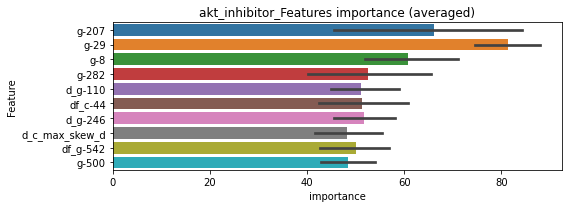

len(train_index) : 3880
len(valid_index) : 3881
================================= fold 1/2 akt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201055	valid_1's binary_logloss: 0.054328
[200]	training's binary_logloss: 0.00329209	valid_1's binary_logloss: 0.0318267
[300]	training's binary_logloss: 0.00100504	valid_1's binary_logloss: 0.026291
[400]	training's binary_logloss: 0.000499041	valid_1's binary_logloss: 0.0237729
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000439144	valid_1's binary_logloss: 0.0235039


len(train_index) : 3881
len(valid_index) : 3880
================================= fold 2/2 akt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208518	valid_1's binary_logloss: 0.0433579
[200]	training's binary_logloss: 0.00344384	valid_1's binary_logloss: 0.0206943
[300]	training's binary_logloss: 0.00103313	valid_1's binary_logloss: 0.015503
[400]	training's binary_logloss: 0.0005057	valid_1's binary_logloss: 0.0132009
[500]	training's binary_logloss: 0.000334714	valid_1's binary_logloss: 0.0122316
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000312812	valid_1's binary_logloss: 0.0120922


akt_inhibitor logloss: 0.017798791133705742


neg labels: 3289 → selected neg labels: 3286


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233499	valid_1's binary_logloss: 0.0339207
[200]	training's binary_logloss: 0.0028434	valid_1's binary_logloss: 0.00803643
[300]	training's binary_logloss: 0.000826838	valid_1's binary_logloss: 0.00468289
[400]	training's binary_logloss: 0.000442494	valid_1's binary_logloss: 0.00368827
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000365812	valid_1's binary_logloss: 0.00345085
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247286	valid_1's binary_logloss: 0.030432
[200]	training's binary_logloss: 0.00308466	valid_1's binary_logloss: 0.00579027
[300]	training's binary_logloss: 0.000881635	valid_1's binary_logloss: 0.00236905
[400]	training's binary_logloss: 0.000464059	valid_1's binary_logloss: 0.00155041
[500]	training's binary_logloss: 0.000362408	valid_1's binary_logloss: 0.00134899
Early stopping, best iteration is

1 / 3 AUC score:1.000
y_Threshold: 0.0016543, Threshold: 0.0024675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00222, conf_1:0.00271
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0024675
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0124675
threshold: 0.0124675, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023714	valid_1's binary_logloss: 0.0328259
[200]	training's binary_logloss: 0.00280237	valid_1's binary_logloss: 0.00747929
[300]	training's binary_logloss: 0.000816031	valid_1's binary_logloss: 0.00428516
[400]	training's binary_logloss: 0.000436256	valid_1's binary_logloss: 0.00330444
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000397521	valid_1's binary_logloss: 0.00318591
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241096	valid_1's binary_logloss: 0.0294127
[200]	training's binary_logloss: 0.00297606	valid_1's binary_logloss: 0.00539096
[300]	training's binary_logloss: 0.000865284	valid_1's binary_logloss: 0.00220779
[400]	training's binary_logloss: 0.00045698	valid_1's binary_logloss: 0.00142465
[500]	training's binary_logloss: 0.000361603	valid_1's binary_logloss: 0.00123945
Early stopping, best iteration is

2 / 3 AUC score:1.000
y_Threshold: 0.0395712, Threshold: 0.0124675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0070316 Vs.target_rate: 0.00080
Num_p_label: 28.0, conf_0:0.01122, conf_1:0.01371
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_1: 0.0124675
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.0224675
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.0324675
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_4: 0.0424675
threshold: 0.0424675, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023714	valid_1's binary_logloss: 0.0328259
[200]	training's binary_logloss: 0.00280237	valid_1's binary_logloss: 0.00747929
[300]	training's binary_logloss: 0.000816031	valid_1's binary_logloss: 0.00428516
[400]	training's binary_logloss: 0.000436256	valid_1's binary_logloss: 0.00330444
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000397521	valid_1's binary_logloss: 0.00318591
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241096	valid_1's binary_logloss: 0.0294127
[200]	training's binary_logloss: 0.00297606	valid_1's binary_logloss: 0.00539096
[300]	training's binary_logloss: 0.000865284	valid_1's binary_logloss: 0.00220779
[400]	training's binary_logloss: 0.00045698	valid_1's binary_logloss: 0.00142465
[500]	training's binary_logloss: 0.000361603	valid_1's binary_logloss: 0.00123945
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0395712, Threshold: 0.0424675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.03822, conf_1:0.04671
threshold: 0.0424675, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7793, y_label_rate: 0.0849480


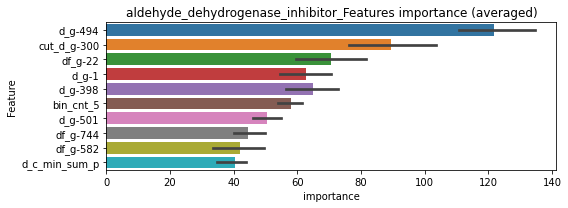

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121638	valid_1's binary_logloss: 0.0204064
[200]	training's binary_logloss: 0.00143524	valid_1's binary_logloss: 0.00869519
[300]	training's binary_logloss: 0.000411179	valid_1's binary_logloss: 0.00701689
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000251893	valid_1's binary_logloss: 0.00674605


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126363	valid_1's binary_logloss: 0.0164004
[200]	training's binary_logloss: 0.00155875	valid_1's binary_logloss: 0.00309825
[300]	training's binary_logloss: 0.000450335	valid_1's binary_logloss: 0.00136907
[400]	training's binary_logloss: 0.000232643	valid_1's binary_logloss: 0.000969164
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000185921	valid_1's binary_logloss: 0.000898218


aldehyde_dehydrogenase_inhibitor logloss: 0.003822508163125948


neg labels: 3289 → selected neg labels: 3282


alk_inhibitor, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0335746	valid_1's binary_logloss: 0.067358
[200]	training's binary_logloss: 0.00519488	valid_1's binary_logloss: 0.0275787
[300]	training's binary_logloss: 0.0015431	valid_1's binary_logloss: 0.0191215
[400]	training's binary_logloss: 0.000762932	valid_1's binary_logloss: 0.0163273
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000580388	valid_1's binary_logloss: 0.0155104
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0341045	valid_1's binary_logloss: 0.055863
[200]	training's binary_logloss: 0.00544304	valid_1's binary_logloss: 0.0199018
[300]	training's binary_logloss: 0.00163421	valid_1's binary_logloss: 0.0121968
[400]	training's binary_logloss: 0.000810786	valid_1's binary_logloss: 0.00985397
[500]	training's binary_logloss: 0.00054832	valid_1's binary_logloss: 0.00893198
Early stopping, best iteration is:
[574]	tr

1 / 3 AUC score:1.000
y_Threshold: 0.0051098, Threshold: 0.0159120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.01432, conf_1:0.01750
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0159120
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_2: 0.0259120
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_3: 0.0359120
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_4: 0.0459120
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_5: 0.0559120
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_6: 0.0659120
threshold: 0.0659120, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336883	valid_1's binary_logloss: 0.0656573
[200]	training's binary_logloss: 0.00494016	valid_1's binary_logloss: 0.0279368
[300]	training's binary_logloss: 0.00147895	valid_1's binary_logloss: 0.0195307
[400]	training's binary_logloss: 0.00072492	valid_1's binary_logloss: 0.016742
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000550279	valid_1's binary_logloss: 0.0157336
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329984	valid_1's binary_logloss: 0.0553591
[200]	training's binary_logloss: 0.00496007	valid_1's binary_logloss: 0.0171535
[300]	training's binary_logloss: 0.00147107	valid_1's binary_logloss: 0.0095708
[400]	training's binary_logloss: 0.000744278	valid_1's binary_logloss: 0.00731012
[500]	training's binary_logloss: 0.000510979	valid_1's binary_logloss: 0.0064302
Early stopping, best iteration is:
[562]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0855865, Threshold: 0.0659120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0218483 Vs.target_rate: 0.00176
Num_p_label: 87.0, conf_0:0.05932, conf_1:0.07250
Num_p_label: 87.0, Expected: 7.0, Adj_threshold_1: 0.0659120
Num_p_label: 83.0, Expected: 7.0, Adj_threshold_2: 0.0759120
Num_p_label: 76.0, Expected: 7.0, Adj_threshold_3: 0.0859120
Num_p_label: 66.0, Expected: 7.0, Adj_threshold_4: 0.0959120
Num_p_label: 65.0, Expected: 7.0, Adj_threshold_5: 0.1059120
Num_p_label: 59.0, Expected: 7.0, Adj_threshold_6: 0.1159120
Num_p_label: 53.0, Expected: 7.0, Adj_threshold_7: 0.1259120
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_8: 0.1359120
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_9: 0.1459120
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_10: 0.1559120
threshold: 0.1659120, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330585	valid_1's binary_logloss: 0.0583306
[200]	training's binary_logloss: 0.00499182	valid_1's binary_logloss: 0.0185219
[300]	training's binary_logloss: 0.00145676	valid_1's binary_logloss: 0.0104889
[400]	training's binary_logloss: 0.000731808	valid_1's binary_logloss: 0.00807756
[500]	training's binary_logloss: 0.000499414	valid_1's binary_logloss: 0.00718545
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000448856	valid_1's binary_logloss: 0.00702032
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330654	valid_1's binary_logloss: 0.0472372
[200]	training's binary_logloss: 0.00498297	valid_1's binary_logloss: 0.0118212
[300]	training's binary_logloss: 0.00147933	valid_1's binary_logloss: 0.00549972
[400]	training's binary_logloss: 0.000732937	valid_1's binary_logloss: 0.00381324
[500]	training's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.1775261, Threshold: 0.1659120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0125565 Vs.target_rate: 0.00176
Num_p_label: 50.0, conf_0:0.14932, conf_1:0.18250
Num_p_label: 50.0, Expected: 7.0, Adj_threshold_1: 0.1659120
Num_p_label: 49.0, Expected: 7.0, Adj_threshold_2: 0.1759120
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_3: 0.1859120
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_4: 0.1959120
Num_p_label: 45.0, Expected: 7.0, Adj_threshold_5: 0.2059120
Num_p_label: 45.0, Expected: 7.0, Adj_threshold_6: 0.2159120
Num_p_label: 45.0, Expected: 7.0, Adj_threshold_7: 0.2259120
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_8: 0.2359120
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_9: 0.2459120
Num_p_label: 39.0, Expected: 7.0, Adj_threshold_10: 0.2559120
threshold: 0.2659120, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 688.0/7780, y_label_rate: 0.0884319


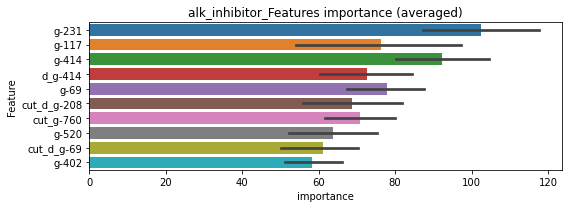

len(train_index) : 3890
len(valid_index) : 3890
================================= fold 1/2 alk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176267	valid_1's binary_logloss: 0.0382531
[200]	training's binary_logloss: 0.00272446	valid_1's binary_logloss: 0.0175149
[300]	training's binary_logloss: 0.000814399	valid_1's binary_logloss: 0.0128193
[400]	training's binary_logloss: 0.000409604	valid_1's binary_logloss: 0.0116053
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00031084	valid_1's binary_logloss: 0.0111739


len(train_index) : 3890
len(valid_index) : 3890
================================= fold 2/2 alk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194803	valid_1's binary_logloss: 0.0365338
[200]	training's binary_logloss: 0.00311782	valid_1's binary_logloss: 0.0160951
[300]	training's binary_logloss: 0.000948424	valid_1's binary_logloss: 0.0123547
[400]	training's binary_logloss: 0.000470738	valid_1's binary_logloss: 0.0110305
[500]	training's binary_logloss: 0.00031422	valid_1's binary_logloss: 0.0104631
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000282869	valid_1's binary_logloss: 0.0102887


alk_inhibitor logloss: 0.010731282957263655


neg labels: 3289 → selected neg labels: 3287


ampk_activator, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201512	valid_1's binary_logloss: 0.027946
[200]	training's binary_logloss: 0.00216509	valid_1's binary_logloss: 0.00658047
[300]	training's binary_logloss: 0.000625627	valid_1's binary_logloss: 0.00372848
[400]	training's binary_logloss: 0.000350263	valid_1's binary_logloss: 0.00296695
[500]	training's binary_logloss: 0.000291769	valid_1's binary_logloss: 0.00276933
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000291932	valid_1's binary_logloss: 0.00276824
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200706	valid_1's binary_logloss: 0.0230741
[200]	training's binary_logloss: 0.00216637	valid_1's binary_logloss: 0.00341317
[300]	training's binary_logloss: 0.000631094	valid_1's binary_logloss: 0.00136823
[400]	training's binary_logloss: 0.000352837	valid_1's binary_logloss: 0.000915543
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0009670, Threshold: 0.0016120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00145, conf_1:0.00177
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0016120
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0116120
threshold: 0.0116120, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203681	valid_1's binary_logloss: 0.0281452
[200]	training's binary_logloss: 0.00220539	valid_1's binary_logloss: 0.00764029
[300]	training's binary_logloss: 0.000631004	valid_1's binary_logloss: 0.00484536
[400]	training's binary_logloss: 0.000348557	valid_1's binary_logloss: 0.00393908
[500]	training's binary_logloss: 0.000296747	valid_1's binary_logloss: 0.00375954
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000296521	valid_1's binary_logloss: 0.00375921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203649	valid_1's binary_logloss: 0.0236977
[200]	training's binary_logloss: 0.00219279	valid_1's binary_logloss: 0.00339606
[300]	training's binary_logloss: 0.000632078	valid_1's binary_logloss: 0.00127271
[400]	training's binary_logloss: 0.000354196	valid_1's binary_logloss: 0.000826759
[500]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0254964, Threshold: 0.0116120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, conf_0:0.01045, conf_1:0.01277
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0116120
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0216120
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0316120
threshold: 0.0316120, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203681	valid_1's binary_logloss: 0.0281452
[200]	training's binary_logloss: 0.00220539	valid_1's binary_logloss: 0.00764029
[300]	training's binary_logloss: 0.000631004	valid_1's binary_logloss: 0.00484536
[400]	training's binary_logloss: 0.000348557	valid_1's binary_logloss: 0.00393908
[500]	training's binary_logloss: 0.000296747	valid_1's binary_logloss: 0.00375954
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000296521	valid_1's binary_logloss: 0.00375921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203649	valid_1's binary_logloss: 0.0236977
[200]	training's binary_logloss: 0.00219279	valid_1's binary_logloss: 0.00339606
[300]	training's binary_logloss: 0.000632078	valid_1's binary_logloss: 0.00127271
[400]	training's binary_logloss: 0.000354196	valid_1's binary_logloss: 0.000826759
[500]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0254964, Threshold: 0.0316120, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.02845, conf_1:0.03477
threshold: 0.0316120, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7794, y_label_rate: 0.0848088


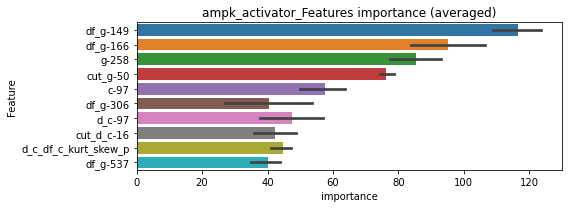

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ampk_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105764	valid_1's binary_logloss: 0.0153729
[200]	training's binary_logloss: 0.00112283	valid_1's binary_logloss: 0.006008
[300]	training's binary_logloss: 0.000319786	valid_1's binary_logloss: 0.00518202
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000278915	valid_1's binary_logloss: 0.00514859


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ampk_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108529	valid_1's binary_logloss: 0.0142786
[200]	training's binary_logloss: 0.00120037	valid_1's binary_logloss: 0.00334044
[300]	training's binary_logloss: 0.000352244	valid_1's binary_logloss: 0.00223934
[400]	training's binary_logloss: 0.000188712	valid_1's binary_logloss: 0.00195995
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000168914	valid_1's binary_logloss: 0.0019359


ampk_activator logloss: 0.003542247677655172


neg labels: 3289 → selected neg labels: 3287


analgesic, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195732	valid_1's binary_logloss: 0.0249061
[200]	training's binary_logloss: 0.0020903	valid_1's binary_logloss: 0.00476397
[300]	training's binary_logloss: 0.000601436	valid_1's binary_logloss: 0.00211532
[400]	training's binary_logloss: 0.000338751	valid_1's binary_logloss: 0.00152259
[500]	training's binary_logloss: 0.000287402	valid_1's binary_logloss: 0.00139123
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000285943	valid_1's binary_logloss: 0.00138934
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195776	valid_1's binary_logloss: 0.0228166
[200]	training's binary_logloss: 0.00207029	valid_1's binary_logloss: 0.00395861
[300]	training's binary_logloss: 0.000594843	valid_1's binary_logloss: 0.00174149
[400]	training's binary_logloss: 0.00033853	valid_1's binary_logloss: 0.00122862
[500]	training's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0010358, Threshold: 0.0015989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00144, conf_1:0.00176
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0015989
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0115989
threshold: 0.0115989, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196407	valid_1's binary_logloss: 0.0243423
[200]	training's binary_logloss: 0.00201703	valid_1's binary_logloss: 0.00351333
[300]	training's binary_logloss: 0.000588043	valid_1's binary_logloss: 0.00123926
[400]	training's binary_logloss: 0.000332619	valid_1's binary_logloss: 0.000786129
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000285588	valid_1's binary_logloss: 0.000699296
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196516	valid_1's binary_logloss: 0.0222921
[200]	training's binary_logloss: 0.0020362	valid_1's binary_logloss: 0.00348024
[300]	training's binary_logloss: 0.000579053	valid_1's binary_logloss: 0.0014731
[400]	training's binary_logloss: 0.000334384	valid_1's binary_logloss: 0.0010653
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000289183	valid_1's binary_logloss: 0.000984

2 / 3 AUC score:1.000
y_Threshold: 0.0717446, Threshold: 0.0115989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00050
Num_p_label: 35.0, conf_0:0.01044, conf_1:0.01276
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_1: 0.0115989
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_2: 0.0215989
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.0315989
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.0415989
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.0515989
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_6: 0.0615989
threshold: 0.0615989, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196407	valid_1's binary_logloss: 0.0243423
[200]	training's binary_logloss: 0.00201703	valid_1's binary_logloss: 0.00351333
[300]	training's binary_logloss: 0.000588043	valid_1's binary_logloss: 0.00123926
[400]	training's binary_logloss: 0.000332619	valid_1's binary_logloss: 0.000786129
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000285588	valid_1's binary_logloss: 0.000699296
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196516	valid_1's binary_logloss: 0.0222921
[200]	training's binary_logloss: 0.0020362	valid_1's binary_logloss: 0.00348024
[300]	training's binary_logloss: 0.000579053	valid_1's binary_logloss: 0.0014731
[400]	training's binary_logloss: 0.000334384	valid_1's binary_logloss: 0.0010653
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000289183	valid_1's binary_logloss: 0.000984

3 / 3 AUC score:1.000
y_Threshold: 0.0717446, Threshold: 0.0615989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, conf_0:0.05544, conf_1:0.06776
threshold: 0.0615989, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7794, y_label_rate: 0.0845522


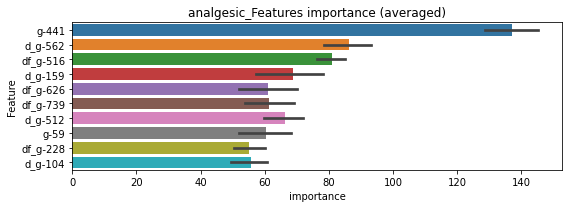

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 analgesic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100242	valid_1's binary_logloss: 0.0143464
[200]	training's binary_logloss: 0.00102984	valid_1's binary_logloss: 0.00428207
[300]	training's binary_logloss: 0.00029611	valid_1's binary_logloss: 0.00305794
[400]	training's binary_logloss: 0.000166726	valid_1's binary_logloss: 0.00279454
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000165817	valid_1's binary_logloss: 0.00279059


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 analgesic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00997407	valid_1's binary_logloss: 0.013491
[200]	training's binary_logloss: 0.00101329	valid_1's binary_logloss: 0.00344175
[300]	training's binary_logloss: 0.000291985	valid_1's binary_logloss: 0.00231018
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000177811	valid_1's binary_logloss: 0.00212696


analgesic logloss: 0.0024587722862981286


neg labels: 3289 → selected neg labels: 3281


androgen_receptor_agonist, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0383719	valid_1's binary_logloss: 0.0771847
[200]	training's binary_logloss: 0.00686137	valid_1's binary_logloss: 0.0359918
[300]	training's binary_logloss: 0.00205198	valid_1's binary_logloss: 0.0267149
[400]	training's binary_logloss: 0.000995743	valid_1's binary_logloss: 0.0233467
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000746021	valid_1's binary_logloss: 0.0225999
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0415429	valid_1's binary_logloss: 0.0638394
[200]	training's binary_logloss: 0.00777976	valid_1's binary_logloss: 0.0237207
[300]	training's binary_logloss: 0.00230929	valid_1's binary_logloss: 0.0146232
[400]	training's binary_logloss: 0.0011016	valid_1's binary_logloss: 0.011988
[500]	training's binary_logloss: 0.000694418	valid_1's binary_logloss: 0.0107232
Early stopping, best iteration is:
[562]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0042833, Threshold: 0.0057774, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00520, conf_1:0.00636
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0057774
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_2: 0.0157774
threshold: 0.0157774, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0379721	valid_1's binary_logloss: 0.0753117
[200]	training's binary_logloss: 0.00661362	valid_1's binary_logloss: 0.0346567
[300]	training's binary_logloss: 0.00200897	valid_1's binary_logloss: 0.0259037
[400]	training's binary_logloss: 0.000982232	valid_1's binary_logloss: 0.0223851
[500]	training's binary_logloss: 0.000643178	valid_1's binary_logloss: 0.021367
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000655508	valid_1's binary_logloss: 0.0213113
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421482	valid_1's binary_logloss: 0.0642249
[200]	training's binary_logloss: 0.00764404	valid_1's binary_logloss: 0.0233812
[300]	training's binary_logloss: 0.00231742	valid_1's binary_logloss: 0.0140633
[400]	training's binary_logloss: 0.0011071	valid_1's binary_logloss: 0.0109545
[500]	training's binary_logloss: 0.000701837

2 / 3 AUC score:1.000
y_Threshold: 0.0180064, Threshold: 0.0157774, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0095429 Vs.target_rate: 0.00202
Num_p_label: 38.0, conf_0:0.01420, conf_1:0.01736
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_1: 0.0157774
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_2: 0.0257774
threshold: 0.0257774, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.039621	valid_1's binary_logloss: 0.0712785
[200]	training's binary_logloss: 0.00696894	valid_1's binary_logloss: 0.0298212
[300]	training's binary_logloss: 0.00210134	valid_1's binary_logloss: 0.0207137
[400]	training's binary_logloss: 0.0010165	valid_1's binary_logloss: 0.0176323
[500]	training's binary_logloss: 0.000665411	valid_1's binary_logloss: 0.0162898
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000617939	valid_1's binary_logloss: 0.0160559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0400672	valid_1's binary_logloss: 0.0665516
[200]	training's binary_logloss: 0.00721593	valid_1's binary_logloss: 0.0255795
[300]	training's binary_logloss: 0.00217448	valid_1's binary_logloss: 0.0176714
[400]	training's binary_logloss: 0.00105134	valid_1's binary_logloss: 0.0150507
[500]	training's binary_logloss: 0.000682657	

3 / 3 AUC score:1.000
y_Threshold: 0.0201530, Threshold: 0.0257774, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, conf_0:0.02320, conf_1:0.02836
threshold: 0.0257774, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 670.0/7781, y_label_rate: 0.0861072


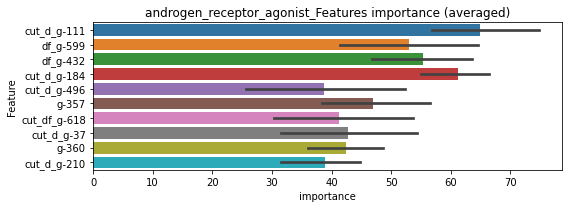

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 androgen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212355	valid_1's binary_logloss: 0.0459564
[200]	training's binary_logloss: 0.0037419	valid_1's binary_logloss: 0.0255863
[300]	training's binary_logloss: 0.00112008	valid_1's binary_logloss: 0.0221999
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000608937	valid_1's binary_logloss: 0.0215275


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 androgen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232484	valid_1's binary_logloss: 0.0445023
[200]	training's binary_logloss: 0.00436985	valid_1's binary_logloss: 0.021612
[300]	training's binary_logloss: 0.00130115	valid_1's binary_logloss: 0.0169876
[400]	training's binary_logloss: 0.000611196	valid_1's binary_logloss: 0.0155704
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000517706	valid_1's binary_logloss: 0.0153096


androgen_receptor_agonist logloss: 0.018418941731430327


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0545654	valid_1's binary_logloss: 0.114135
[200]	training's binary_logloss: 0.0126332	valid_1's binary_logloss: 0.0722775
[300]	training's binary_logloss: 0.00414355	valid_1's binary_logloss: 0.063118
[400]	training's binary_logloss: 0.00191488	valid_1's binary_logloss: 0.0597953
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00190251	valid_1's binary_logloss: 0.0596948
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.060238	valid_1's binary_logloss: 0.112814
[200]	training's binary_logloss: 0.0146333	valid_1's binary_logloss: 0.0700715
[300]	training's binary_logloss: 0.00468183	valid_1's binary_logloss: 0.0601957
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00354906	valid_1's binary_logloss: 0.058761


1 / 3 AUC score:0.996
y_Threshold: 0.0143320, Threshold: 0.0179601, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 154 → Positive_corect_labels: 643/3774
p_label_rate: 0.0200904 Vs.target_rate: 0.00374
Num_p_label: 80.0, conf_0:0.01616, conf_1:0.01976
Num_p_label: 80.0, Expected: 14.9, Adj_threshold_1: 0.0179601
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_2: 0.0279601
threshold: 0.0279601, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 643.0/3774, y_label_rate: 0.1703763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0531777	valid_1's binary_logloss: 0.117551
[200]	training's binary_logloss: 0.0118776	valid_1's binary_logloss: 0.0713018
[300]	training's binary_logloss: 0.00380725	valid_1's binary_logloss: 0.0600599
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00212731	valid_1's binary_logloss: 0.057135
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0561099	valid_1's binary_logloss: 0.103412
[200]	training's binary_logloss: 0.0129496	valid_1's binary_logloss: 0.0573889
[300]	training's binary_logloss: 0.00420978	valid_1's binary_logloss: 0.0437891
[400]	training's binary_logloss: 0.00197271	valid_1's binary_logloss: 0.0392567
[500]	training's binary_logloss: 0.00119063	valid_1's binary_logloss: 0.0370954
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00118582	valid_1's binary_logloss: 0.0370648


2 / 3 AUC score:1.000
y_Threshold: 0.0273263, Threshold: 0.0279601, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, conf_0:0.02516, conf_1:0.03076
threshold: 0.0279601, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511417	valid_1's binary_logloss: 0.105465
[200]	training's binary_logloss: 0.0111889	valid_1's binary_logloss: 0.0656344
[300]	training's binary_logloss: 0.00366769	valid_1's binary_logloss: 0.0564949
[400]	training's binary_logloss: 0.00172565	valid_1's binary_logloss: 0.0532571
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00126378	valid_1's binary_logloss: 0.0522787
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0529452	valid_1's binary_logloss: 0.10888
[200]	training's binary_logloss: 0.0117814	valid_1's binary_logloss: 0.0633097
[300]	training's binary_logloss: 0.00382745	valid_1's binary_logloss: 0.0541776
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00198833	valid_1's binary_logloss: 0.0509206


3 / 3 AUC score:0.999
y_Threshold: 0.0325192, Threshold: 0.0279601, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0042692 Vs.target_rate: 0.00374
Num_p_label: 17.0, conf_0:0.02516, conf_1:0.03076
threshold: 0.0279601, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 640.0/7716, y_label_rate: 0.0829445


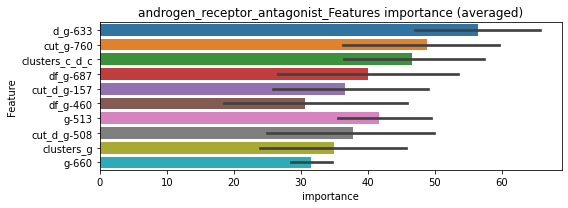

len(train_index) : 3858
len(valid_index) : 3858
================================= fold 1/2 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.026826	valid_1's binary_logloss: 0.0679947
[200]	training's binary_logloss: 0.00573244	valid_1's binary_logloss: 0.0475747
[300]	training's binary_logloss: 0.00181218	valid_1's binary_logloss: 0.0440485
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00163466	valid_1's binary_logloss: 0.0436117


len(train_index) : 3858
len(valid_index) : 3858
================================= fold 2/2 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296977	valid_1's binary_logloss: 0.0592546
[200]	training's binary_logloss: 0.00679886	valid_1's binary_logloss: 0.0340036
[300]	training's binary_logloss: 0.00215858	valid_1's binary_logloss: 0.0274866
[400]	training's binary_logloss: 0.000999358	valid_1's binary_logloss: 0.0253889
[500]	training's binary_logloss: 0.000603252	valid_1's binary_logloss: 0.0244979
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00059373	valid_1's binary_logloss: 0.0244688


androgen_receptor_antagonist logloss: 0.03404023161702422


neg labels: 3289 → selected neg labels: 3276


anesthetic_-_local, len(trt): 80, len(othr): 3276, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0541883	valid_1's binary_logloss: 0.115116
[200]	training's binary_logloss: 0.0122348	valid_1's binary_logloss: 0.0713736
[300]	training's binary_logloss: 0.00385106	valid_1's binary_logloss: 0.0603104
[400]	training's binary_logloss: 0.00176416	valid_1's binary_logloss: 0.0563031
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00140218	valid_1's binary_logloss: 0.055476
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0555066	valid_1's binary_logloss: 0.114823
[200]	training's binary_logloss: 0.0126042	valid_1's binary_logloss: 0.0749034
[300]	training's binary_logloss: 0.00396904	valid_1's binary_logloss: 0.0657779
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00254624	valid_1's binary_logloss: 0.064733


1 / 3 AUC score:0.995
y_Threshold: 0.0111257, Threshold: 0.0131710, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 152 → Positive_corect_labels: 645/3779
p_label_rate: 0.0200904 Vs.target_rate: 0.00336
Num_p_label: 80.0, conf_0:0.01185, conf_1:0.01449
Num_p_label: 80.0, Expected: 13.4, Adj_threshold_1: 0.0131710
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_2: 0.0231710
threshold: 0.0231710, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0516939	valid_1's binary_logloss: 0.109315
[200]	training's binary_logloss: 0.0116367	valid_1's binary_logloss: 0.0670903
[300]	training's binary_logloss: 0.00365456	valid_1's binary_logloss: 0.05383
[400]	training's binary_logloss: 0.00168931	valid_1's binary_logloss: 0.0493115
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011308	valid_1's binary_logloss: 0.0473397
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0547523	valid_1's binary_logloss: 0.111859
[200]	training's binary_logloss: 0.0121929	valid_1's binary_logloss: 0.0684235
[300]	training's binary_logloss: 0.00380624	valid_1's binary_logloss: 0.0590582
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00342783	valid_1's binary_logloss: 0.0587374


2 / 3 AUC score:0.998
y_Threshold: 0.0297503, Threshold: 0.0231710, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0105475 Vs.target_rate: 0.00336
Num_p_label: 42.0, conf_0:0.02085, conf_1:0.02549
Num_p_label: 42.0, Expected: 13.4, Adj_threshold_1: 0.0231710
Num_p_label: 19.0, Expected: 13.4, Adj_threshold_2: 0.0331710
threshold: 0.0331710, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 631.0/3751, y_label_rate: 0.1682218
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0503245	valid_1's binary_logloss: 0.102847
[200]	training's binary_logloss: 0.0104627	valid_1's binary_logloss: 0.0591009
[300]	training's binary_logloss: 0.00332396	valid_1's binary_logloss: 0.0483505
[400]	training's binary_logloss: 0.00154666	valid_1's binary_logloss: 0.0446242
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00119427	valid_1's binary_logloss: 0.0434313
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0525141	valid_1's binary_logloss: 0.110905
[200]	training's binary_logloss: 0.0111051	valid_1's binary_logloss: 0.0679335
[300]	training's binary_logloss: 0.00342996	valid_1's binary_logloss: 0.0568921
[400]	training's binary_logloss: 0.00158215	valid_1's binary_logloss: 0.0527692
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00162316	valid_1's binary_logloss: 0.0526728


3 / 3 AUC score:1.000
y_Threshold: 0.0267677, Threshold: 0.0331710, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 621.0/3731
p_label_rate: 0.0040181 Vs.target_rate: 0.00336
Num_p_label: 16.0, conf_0:0.02985, conf_1:0.03649
threshold: 0.0331710, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 637.0/7713, y_label_rate: 0.0825878


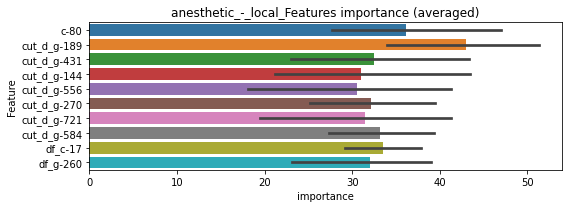

len(train_index) : 3856
len(valid_index) : 3857
================================= fold 1/2 anesthetic_-_local=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271749	valid_1's binary_logloss: 0.0578323
[200]	training's binary_logloss: 0.00564079	valid_1's binary_logloss: 0.0370859
[300]	training's binary_logloss: 0.00174627	valid_1's binary_logloss: 0.0323627
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00132038	valid_1's binary_logloss: 0.0317726


len(train_index) : 3857
len(valid_index) : 3856
================================= fold 2/2 anesthetic_-_local=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280445	valid_1's binary_logloss: 0.056684
[200]	training's binary_logloss: 0.00592746	valid_1's binary_logloss: 0.0337267
[300]	training's binary_logloss: 0.00183224	valid_1's binary_logloss: 0.0292132
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00112872	valid_1's binary_logloss: 0.0281118


anesthetic_-_local logloss: 0.02994248077526038


neg labels: 3289 → selected neg labels: 3283


angiogenesis_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0355119	valid_1's binary_logloss: 0.0578268
[200]	training's binary_logloss: 0.0056078	valid_1's binary_logloss: 0.0219489
[300]	training's binary_logloss: 0.00163435	valid_1's binary_logloss: 0.0157761
[400]	training's binary_logloss: 0.000793564	valid_1's binary_logloss: 0.0134568
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000690977	valid_1's binary_logloss: 0.0130301
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376719	valid_1's binary_logloss: 0.0568412
[200]	training's binary_logloss: 0.00631524	valid_1's binary_logloss: 0.0181157
[300]	training's binary_logloss: 0.00181686	valid_1's binary_logloss: 0.0105219
[400]	training's binary_logloss: 0.000874299	valid_1's binary_logloss: 0.00860093
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000599776	valid_1's binary_logloss: 0.0078368


1 / 3 AUC score:1.000
y_Threshold: 0.0038209, Threshold: 0.0059629, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00537, conf_1:0.00656
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0059629
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0159629
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_3: 0.0259629
threshold: 0.0259629, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344592	valid_1's binary_logloss: 0.0569622
[200]	training's binary_logloss: 0.00540762	valid_1's binary_logloss: 0.0212751
[300]	training's binary_logloss: 0.00161366	valid_1's binary_logloss: 0.0150115
[400]	training's binary_logloss: 0.000778734	valid_1's binary_logloss: 0.0124982
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000594079	valid_1's binary_logloss: 0.0119802
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0377717	valid_1's binary_logloss: 0.0564129
[200]	training's binary_logloss: 0.00623165	valid_1's binary_logloss: 0.0173076
[300]	training's binary_logloss: 0.00180112	valid_1's binary_logloss: 0.0100546
[400]	training's binary_logloss: 0.000874171	valid_1's binary_logloss: 0.00858826
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000650991	valid_1's binary_logloss: 0.00797323


2 / 3 AUC score:1.000
y_Threshold: 0.0248082, Threshold: 0.0259629, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.02337, conf_1:0.02856
threshold: 0.0259629, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0355179	valid_1's binary_logloss: 0.0572375
[200]	training's binary_logloss: 0.00573077	valid_1's binary_logloss: 0.0228504
[300]	training's binary_logloss: 0.00170148	valid_1's binary_logloss: 0.0174309
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00116965	valid_1's binary_logloss: 0.0162705
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.037377	valid_1's binary_logloss: 0.0545392
[200]	training's binary_logloss: 0.00621984	valid_1's binary_logloss: 0.0161511
[300]	training's binary_logloss: 0.00177554	valid_1's binary_logloss: 0.00766967
[400]	training's binary_logloss: 0.000850661	valid_1's binary_logloss: 0.00540518
[500]	training's binary_logloss: 0.000564737	valid_1's binary_logloss: 0.00453995
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000503236	valid_1's binary_logloss: 0.00437621


3 / 3 AUC score:1.000
y_Threshold: 0.0312053, Threshold: 0.0259629, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, conf_0:0.02337, conf_1:0.02856
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0259629
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0359629
threshold: 0.0359629, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 665.0/7785, y_label_rate: 0.0854207


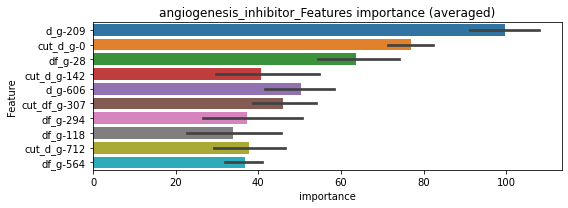

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195049	valid_1's binary_logloss: 0.0390361
[200]	training's binary_logloss: 0.00316873	valid_1's binary_logloss: 0.0198996
[300]	training's binary_logloss: 0.000886681	valid_1's binary_logloss: 0.017166
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000631258	valid_1's binary_logloss: 0.0168114


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205035	valid_1's binary_logloss: 0.0342803
[200]	training's binary_logloss: 0.0034485	valid_1's binary_logloss: 0.0139886
[300]	training's binary_logloss: 0.000996873	valid_1's binary_logloss: 0.0100943
[400]	training's binary_logloss: 0.000468088	valid_1's binary_logloss: 0.00902211
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00036709	valid_1's binary_logloss: 0.00888317


angiogenesis_inhibitor logloss: 0.012847777557891005


neg labels: 3289 → selected neg labels: 3283


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0333173	valid_1's binary_logloss: 0.0573704
[200]	training's binary_logloss: 0.00517188	valid_1's binary_logloss: 0.0224827
[300]	training's binary_logloss: 0.00155369	valid_1's binary_logloss: 0.0158073
[400]	training's binary_logloss: 0.000779314	valid_1's binary_logloss: 0.013449
[500]	training's binary_logloss: 0.000522719	valid_1's binary_logloss: 0.0125798
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000509112	valid_1's binary_logloss: 0.0125589
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.03336	valid_1's binary_logloss: 0.0545674
[200]	training's binary_logloss: 0.00553168	valid_1's binary_logloss: 0.0193907
[300]	training's binary_logloss: 0.00165121	valid_1's binary_logloss: 0.011623
[400]	training's binary_logloss: 0.00081568	valid_1's binary_logloss: 0.00921897
[500]	training's binary_logloss: 0.000542635	

1 / 3 AUC score:1.000
y_Threshold: 0.0024368, Threshold: 0.0036395, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00328, conf_1:0.00400
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0036395
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0136395
threshold: 0.0136395, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327836	valid_1's binary_logloss: 0.0573625
[200]	training's binary_logloss: 0.00503735	valid_1's binary_logloss: 0.0224525
[300]	training's binary_logloss: 0.0015181	valid_1's binary_logloss: 0.0154667
[400]	training's binary_logloss: 0.000764637	valid_1's binary_logloss: 0.0132848
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.0005534	valid_1's binary_logloss: 0.0125559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0352268	valid_1's binary_logloss: 0.0591006
[200]	training's binary_logloss: 0.00570277	valid_1's binary_logloss: 0.0207762
[300]	training's binary_logloss: 0.00168108	valid_1's binary_logloss: 0.011924
[400]	training's binary_logloss: 0.000823407	valid_1's binary_logloss: 0.00928052
[500]	training's binary_logloss: 0.000543332	valid_1's binary_logloss: 0.00823313
Early stopping, best iteration is:
[573]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0139605, Threshold: 0.0136395, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, conf_0:0.01228, conf_1:0.01500
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.0136395
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_2: 0.0236395
threshold: 0.0236395, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327034	valid_1's binary_logloss: 0.0565621
[200]	training's binary_logloss: 0.00503652	valid_1's binary_logloss: 0.0246489
[300]	training's binary_logloss: 0.00150101	valid_1's binary_logloss: 0.0186472
[400]	training's binary_logloss: 0.000763119	valid_1's binary_logloss: 0.0168836
[500]	training's binary_logloss: 0.000514888	valid_1's binary_logloss: 0.0160077
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000490821	valid_1's binary_logloss: 0.0159317
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350217	valid_1's binary_logloss: 0.0526006
[200]	training's binary_logloss: 0.00561126	valid_1's binary_logloss: 0.0154677
[300]	training's binary_logloss: 0.00167264	valid_1's binary_logloss: 0.00864374
[400]	training's binary_logloss: 0.000811347	valid_1's binary_logloss: 0.00672076
[500]	training's binary_logloss: 0.0005

3 / 3 AUC score:1.000
y_Threshold: 0.0122119, Threshold: 0.0236395, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0012557 Vs.target_rate: 0.00155
Num_p_label: 5.0, conf_0:0.02128, conf_1:0.02600
threshold: 0.0236395, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 658.0/7783, y_label_rate: 0.0845432


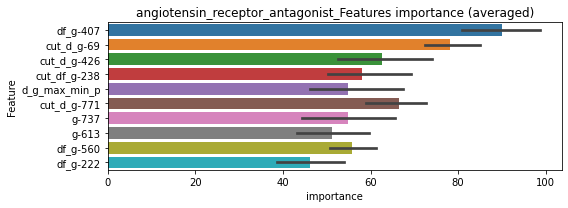

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01648	valid_1's binary_logloss: 0.0347764
[200]	training's binary_logloss: 0.00249369	valid_1's binary_logloss: 0.0180353
[300]	training's binary_logloss: 0.000733571	valid_1's binary_logloss: 0.0153887
[400]	training's binary_logloss: 0.000368091	valid_1's binary_logloss: 0.0147453
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000291729	valid_1's binary_logloss: 0.0145229


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179924	valid_1's binary_logloss: 0.0355183
[200]	training's binary_logloss: 0.00301266	valid_1's binary_logloss: 0.0169048
[300]	training's binary_logloss: 0.000879704	valid_1's binary_logloss: 0.0131105
[400]	training's binary_logloss: 0.000424957	valid_1's binary_logloss: 0.0120507
[500]	training's binary_logloss: 0.000278681	valid_1's binary_logloss: 0.0115578
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00025696	valid_1's binary_logloss: 0.011466


angiotensin_receptor_antagonist logloss: 0.01299461253702318


neg labels: 3289 → selected neg labels: 3277


anti-inflammatory, len(trt): 73, len(othr): 3277, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0481002	valid_1's binary_logloss: 0.0966613
[200]	training's binary_logloss: 0.00989271	valid_1's binary_logloss: 0.0492146
[300]	training's binary_logloss: 0.00305847	valid_1's binary_logloss: 0.0377707
[400]	training's binary_logloss: 0.00142881	valid_1's binary_logloss: 0.0353784
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00140201	valid_1's binary_logloss: 0.0352307
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0475648	valid_1's binary_logloss: 0.0879596
[200]	training's binary_logloss: 0.0101402	valid_1's binary_logloss: 0.0439948
[300]	training's binary_logloss: 0.00314686	valid_1's binary_logloss: 0.0316274
[400]	training's binary_logloss: 0.00146071	valid_1's binary_logloss: 0.0274357
[500]	training's binary_logloss: 0.000905203	valid_1's binary_logloss: 0.0255747
Early stopping, best iteration is:
[512]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0080897, Threshold: 0.0133340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01200, conf_1:0.01467
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0133340
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_2: 0.0233340
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_3: 0.0333340
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.0433340
threshold: 0.0433340, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3794, y_label_rate: 0.1718503
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.045291	valid_1's binary_logloss: 0.0938154
[200]	training's binary_logloss: 0.0088386	valid_1's binary_logloss: 0.0488433
[300]	training's binary_logloss: 0.00273113	valid_1's binary_logloss: 0.0376488
[400]	training's binary_logloss: 0.00130554	valid_1's binary_logloss: 0.033768
[500]	training's binary_logloss: 0.000820714	valid_1's binary_logloss: 0.031724
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000787583	valid_1's binary_logloss: 0.0315174
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0485433	valid_1's binary_logloss: 0.0936461
[200]	training's binary_logloss: 0.00950871	valid_1's binary_logloss: 0.0480717
[300]	training's binary_logloss: 0.00291645	valid_1's binary_logloss: 0.0364271
[400]	training's binary_logloss: 0.00135387	valid_1's binary_logloss: 0.0322384
[500]	training's binary_logloss: 0.000849451	va

2 / 3 AUC score:1.000
y_Threshold: 0.0280616, Threshold: 0.0433340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 650.0/3790
p_label_rate: 0.0075339 Vs.target_rate: 0.00307
Num_p_label: 30.0, conf_0:0.03900, conf_1:0.04767
threshold: 0.0433340, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0438264	valid_1's binary_logloss: 0.0880083
[200]	training's binary_logloss: 0.00885464	valid_1's binary_logloss: 0.0463736
[300]	training's binary_logloss: 0.00277302	valid_1's binary_logloss: 0.0367641
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00158938	valid_1's binary_logloss: 0.0342981
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0480172	valid_1's binary_logloss: 0.0844767
[200]	training's binary_logloss: 0.00955793	valid_1's binary_logloss: 0.0393471
[300]	training's binary_logloss: 0.00295751	valid_1's binary_logloss: 0.0287448
[400]	training's binary_logloss: 0.00138347	valid_1's binary_logloss: 0.024893
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00109042	valid_1's binary_logloss: 0.0240277


3 / 3 AUC score:0.999
y_Threshold: 0.0340710, Threshold: 0.0433340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0105475 Vs.target_rate: 0.00307
Num_p_label: 42.0, conf_0:0.03900, conf_1:0.04767
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.0433340
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_2: 0.0533340
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_3: 0.0633340
threshold: 0.0633340, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 669.0/7764, y_label_rate: 0.0861669


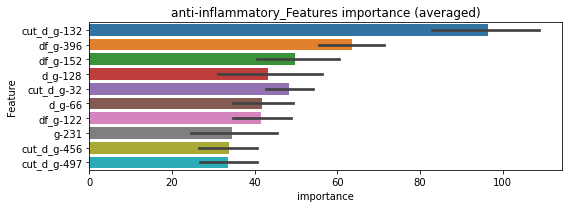

len(train_index) : 3882
len(valid_index) : 3882
================================= fold 1/2 anti-inflammatory=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241262	valid_1's binary_logloss: 0.0612117
[200]	training's binary_logloss: 0.00490737	valid_1's binary_logloss: 0.0389424
[300]	training's binary_logloss: 0.0015383	valid_1's binary_logloss: 0.0337579
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000864429	valid_1's binary_logloss: 0.0320031


len(train_index) : 3882
len(valid_index) : 3882
================================= fold 2/2 anti-inflammatory=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273111	valid_1's binary_logloss: 0.0507879
[200]	training's binary_logloss: 0.0055676	valid_1's binary_logloss: 0.0261319
[300]	training's binary_logloss: 0.00170242	valid_1's binary_logloss: 0.0208885
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000861254	valid_1's binary_logloss: 0.0195697


anti-inflammatory logloss: 0.025786424458895542


neg labels: 3289 → selected neg labels: 3285


antiarrhythmic, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265923	valid_1's binary_logloss: 0.0473224
[200]	training's binary_logloss: 0.00354912	valid_1's binary_logloss: 0.0173632
[300]	training's binary_logloss: 0.00103458	valid_1's binary_logloss: 0.0119206
[400]	training's binary_logloss: 0.000534729	valid_1's binary_logloss: 0.00971015
[500]	training's binary_logloss: 0.000411636	valid_1's binary_logloss: 0.00919822
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000411636	valid_1's binary_logloss: 0.00919822
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291252	valid_1's binary_logloss: 0.0397543
[200]	training's binary_logloss: 0.0039611	valid_1's binary_logloss: 0.00979453
[300]	training's binary_logloss: 0.00112612	valid_1's binary_logloss: 0.00543478
[400]	training's binary_logloss: 0.000570273	valid_1's binary_logloss: 0.00429219
Early stopping, best iteration is:
[

1 / 3 AUC score:1.000
y_Threshold: 0.0018188, Threshold: 0.0259588, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.02336, conf_1:0.02855
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0259588
Num_p_label: 54.0, Expected: 4.0, Adj_threshold_2: 0.0359588
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_3: 0.0459588
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_4: 0.0559588
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_5: 0.0659588
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.0759588
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_7: 0.0859588
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_8: 0.0959588
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.1059588
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_10: 0.1159588
threshold: 0.1259588, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.026108	valid_1's binary_logloss: 0.0449673
[200]	training's binary_logloss: 0.00341054	valid_1's binary_logloss: 0.0156869
[300]	training's binary_logloss: 0.00097936	valid_1's binary_logloss: 0.010173
[400]	training's binary_logloss: 0.000512683	valid_1's binary_logloss: 0.00843395
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000440109	valid_1's binary_logloss: 0.00812036
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281929	valid_1's binary_logloss: 0.0381558
[200]	training's binary_logloss: 0.00375995	valid_1's binary_logloss: 0.00827811
[300]	training's binary_logloss: 0.00106648	valid_1's binary_logloss: 0.00415975
[400]	training's binary_logloss: 0.00053837	valid_1's binary_logloss: 0.00311316
[500]	training's binary_logloss: 0.000408885	valid_1's binary_logloss: 0.00284508
Early stopping, best iteration is:
[50

2 / 3 AUC score:1.000
y_Threshold: 0.0744735, Threshold: 0.1259588, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0359116 Vs.target_rate: 0.00101
Num_p_label: 143.0, conf_0:0.11336, conf_1:0.13855
Num_p_label: 143.0, Expected: 4.0, Adj_threshold_1: 0.1259588
Num_p_label: 143.0, Expected: 4.0, Adj_threshold_2: 0.1359588
Num_p_label: 140.0, Expected: 4.0, Adj_threshold_3: 0.1459588
Num_p_label: 139.0, Expected: 4.0, Adj_threshold_4: 0.1559588
Num_p_label: 137.0, Expected: 4.0, Adj_threshold_5: 0.1659588
Num_p_label: 134.0, Expected: 4.0, Adj_threshold_6: 0.1759588
Num_p_label: 130.0, Expected: 4.0, Adj_threshold_7: 0.1859588
Num_p_label: 128.0, Expected: 4.0, Adj_threshold_8: 0.1959588
Num_p_label: 125.0, Expected: 4.0, Adj_threshold_9: 0.2059588
Num_p_label: 123.0, Expected: 4.0, Adj_threshold_10: 0.2159588
threshold: 0.2259588, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 656.0/3808, y_label_rate: 0.17226

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269039	valid_1's binary_logloss: 0.0406456
[200]	training's binary_logloss: 0.00355121	valid_1's binary_logloss: 0.0107875
[300]	training's binary_logloss: 0.00101882	valid_1's binary_logloss: 0.00601416
[400]	training's binary_logloss: 0.000522451	valid_1's binary_logloss: 0.00461149
[500]	training's binary_logloss: 0.000399064	valid_1's binary_logloss: 0.00426032
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000401952	valid_1's binary_logloss: 0.00425539
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277445	valid_1's binary_logloss: 0.0381983
[200]	training's binary_logloss: 0.00364406	valid_1's binary_logloss: 0.00824502
[300]	training's binary_logloss: 0.00105448	valid_1's binary_logloss: 0.00363976
[400]	training's binary_logloss: 0.000538643	valid_1's binary_logloss: 0.00237374
[500]	training's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0466822, Threshold: 0.2259588, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0321447 Vs.target_rate: 0.00101
Num_p_label: 128.0, conf_0:0.20336, conf_1:0.24855
Num_p_label: 128.0, Expected: 4.0, Adj_threshold_1: 0.2259588
Num_p_label: 126.0, Expected: 4.0, Adj_threshold_2: 0.2359588
Num_p_label: 126.0, Expected: 4.0, Adj_threshold_3: 0.2459588
Num_p_label: 124.0, Expected: 4.0, Adj_threshold_4: 0.2559588
Num_p_label: 123.0, Expected: 4.0, Adj_threshold_5: 0.2659588
Num_p_label: 122.0, Expected: 4.0, Adj_threshold_6: 0.2759588
Num_p_label: 121.0, Expected: 4.0, Adj_threshold_7: 0.2859588
Num_p_label: 119.0, Expected: 4.0, Adj_threshold_8: 0.2959588
Num_p_label: 116.0, Expected: 4.0, Adj_threshold_9: 0.3059588
Num_p_label: 114.0, Expected: 4.0, Adj_threshold_10: 0.3159588
threshold: 0.3259588, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 766.0/7790, y_label_rate: 0.09833

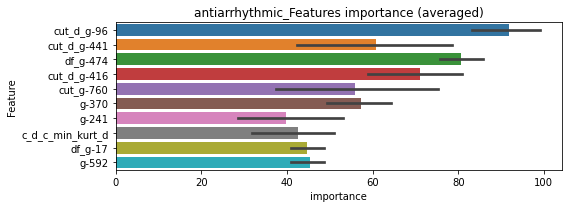

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 antiarrhythmic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183288	valid_1's binary_logloss: 0.0318119
[200]	training's binary_logloss: 0.00268679	valid_1's binary_logloss: 0.0152489
[300]	training's binary_logloss: 0.000764455	valid_1's binary_logloss: 0.0118573
[400]	training's binary_logloss: 0.000373477	valid_1's binary_logloss: 0.0110776
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00032018	valid_1's binary_logloss: 0.0108738


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 antiarrhythmic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183851	valid_1's binary_logloss: 0.027609
[200]	training's binary_logloss: 0.00277826	valid_1's binary_logloss: 0.0102265
[300]	training's binary_logloss: 0.000806302	valid_1's binary_logloss: 0.00748759
[400]	training's binary_logloss: 0.000399368	valid_1's binary_logloss: 0.00698942
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000324576	valid_1's binary_logloss: 0.00685369


antiarrhythmic logloss: 0.008863729576316204


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0351796	valid_1's binary_logloss: 0.0632787
[200]	training's binary_logloss: 0.00570965	valid_1's binary_logloss: 0.0294656
[300]	training's binary_logloss: 0.00173419	valid_1's binary_logloss: 0.0225478
[400]	training's binary_logloss: 0.000856253	valid_1's binary_logloss: 0.0204973
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000864682	valid_1's binary_logloss: 0.020456
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0382164	valid_1's binary_logloss: 0.0614233
[200]	training's binary_logloss: 0.0066283	valid_1's binary_logloss: 0.0226066
[300]	training's binary_logloss: 0.00198061	valid_1's binary_logloss: 0.0143974
[400]	training's binary_logloss: 0.000954284	valid_1's binary_logloss: 0.0119776
[500]	training's binary_logloss: 0.000619142	valid_1's binary_logloss: 0.0110432
Early stopping, best iteration is:
[518]	tr

1 / 3 AUC score:1.000
y_Threshold: 0.0033787, Threshold: 0.0061069, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00181
Num_p_label: 80.0, conf_0:0.00550, conf_1:0.00672
Num_p_label: 80.0, Expected: 7.2, Adj_threshold_1: 0.0061069
Num_p_label: 11.0, Expected: 7.2, Adj_threshold_2: 0.0161069
threshold: 0.0161069, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0351139	valid_1's binary_logloss: 0.0626493
[200]	training's binary_logloss: 0.00566636	valid_1's binary_logloss: 0.026332
[300]	training's binary_logloss: 0.00171078	valid_1's binary_logloss: 0.0196778
[400]	training's binary_logloss: 0.000852418	valid_1's binary_logloss: 0.0175931
[500]	training's binary_logloss: 0.000569341	valid_1's binary_logloss: 0.0167557
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000572851	valid_1's binary_logloss: 0.0167475
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0378861	valid_1's binary_logloss: 0.0604965
[200]	training's binary_logloss: 0.0065687	valid_1's binary_logloss: 0.0208691
[300]	training's binary_logloss: 0.00193667	valid_1's binary_logloss: 0.0124624
[400]	training's binary_logloss: 0.000940351	valid_1's binary_logloss: 0.0100838
[500]	training's binary_logloss: 0.00061620

2 / 3 AUC score:1.000
y_Threshold: 0.0279446, Threshold: 0.0161069, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0168257 Vs.target_rate: 0.00181
Num_p_label: 67.0, conf_0:0.01450, conf_1:0.01772
Num_p_label: 67.0, Expected: 7.2, Adj_threshold_1: 0.0161069
Num_p_label: 35.0, Expected: 7.2, Adj_threshold_2: 0.0261069
Num_p_label: 23.0, Expected: 7.2, Adj_threshold_3: 0.0361069
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_4: 0.0461069
Num_p_label: 11.0, Expected: 7.2, Adj_threshold_5: 0.0561069
threshold: 0.0561069, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366067	valid_1's binary_logloss: 0.0633692
[200]	training's binary_logloss: 0.00608793	valid_1's binary_logloss: 0.0227158
[300]	training's binary_logloss: 0.00182618	valid_1's binary_logloss: 0.0140195
[400]	training's binary_logloss: 0.000894602	valid_1's binary_logloss: 0.0111746
[500]	training's binary_logloss: 0.000592735	valid_1's binary_logloss: 0.00994714
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000514722	valid_1's binary_logloss: 0.0096482
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0365893	valid_1's binary_logloss: 0.0583897
[200]	training's binary_logloss: 0.00602664	valid_1's binary_logloss: 0.021045
[300]	training's binary_logloss: 0.00180121	valid_1's binary_logloss: 0.0137853
[400]	training's binary_logloss: 0.000893935	valid_1's binary_logloss: 0.0112973
[500]	training's binary_logloss: 0.000598

3 / 3 AUC score:1.000
y_Threshold: 0.0338502, Threshold: 0.0561069, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0032647 Vs.target_rate: 0.00181
Num_p_label: 13.0, conf_0:0.05050, conf_1:0.06172
threshold: 0.0561069, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 667.0/7783, y_label_rate: 0.0856996


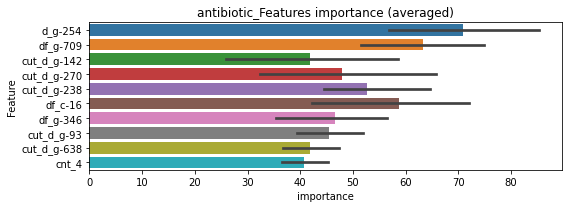

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 antibiotic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194991	valid_1's binary_logloss: 0.0412215
[200]	training's binary_logloss: 0.0032885	valid_1's binary_logloss: 0.0255091
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00187977	valid_1's binary_logloss: 0.0238964


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 antibiotic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198235	valid_1's binary_logloss: 0.0406314
[200]	training's binary_logloss: 0.00331709	valid_1's binary_logloss: 0.0208956
[300]	training's binary_logloss: 0.000990854	valid_1's binary_logloss: 0.016771
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000522046	valid_1's binary_logloss: 0.0160165


antibiotic logloss: 0.019956973487314945


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238296	valid_1's binary_logloss: 0.0296263
[200]	training's binary_logloss: 0.00293315	valid_1's binary_logloss: 0.00610189
[300]	training's binary_logloss: 0.000854417	valid_1's binary_logloss: 0.0031662
[400]	training's binary_logloss: 0.00044507	valid_1's binary_logloss: 0.00221502
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000367175	valid_1's binary_logloss: 0.00203496
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0239555	valid_1's binary_logloss: 0.0322985
[200]	training's binary_logloss: 0.00296765	valid_1's binary_logloss: 0.00660344
[300]	training's binary_logloss: 0.000855078	valid_1's binary_logloss: 0.00304753
[400]	training's binary_logloss: 0.000450988	valid_1's binary_logloss: 0.00219657
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000360494	valid_1's binary_logloss: 0.0020199

1 / 3 AUC score:1.000
y_Threshold: 0.0015496, Threshold: 0.0024468, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00220, conf_1:0.00269
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0024468
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0124468
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_3: 0.0224468
threshold: 0.0224468, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240632	valid_1's binary_logloss: 0.0301552
[200]	training's binary_logloss: 0.0029146	valid_1's binary_logloss: 0.00597582
[300]	training's binary_logloss: 0.000841398	valid_1's binary_logloss: 0.00275102
[400]	training's binary_logloss: 0.000446547	valid_1's binary_logloss: 0.00190151
[500]	training's binary_logloss: 0.000354265	valid_1's binary_logloss: 0.00169119
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000350022	valid_1's binary_logloss: 0.00168453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0239407	valid_1's binary_logloss: 0.0321704
[200]	training's binary_logloss: 0.00294774	valid_1's binary_logloss: 0.00682187
[300]	training's binary_logloss: 0.000862843	valid_1's binary_logloss: 0.00320265
[400]	training's binary_logloss: 0.000454418	valid_1's binary_logloss: 0.00237662
Early stopping, best iteration i

2 / 3 AUC score:1.000
y_Threshold: 0.0479536, Threshold: 0.0224468, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, conf_0:0.02020, conf_1:0.02469
threshold: 0.0224468, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240632	valid_1's binary_logloss: 0.0301552
[200]	training's binary_logloss: 0.0029146	valid_1's binary_logloss: 0.00597582
[300]	training's binary_logloss: 0.000841398	valid_1's binary_logloss: 0.00275102
[400]	training's binary_logloss: 0.000446547	valid_1's binary_logloss: 0.00190151
[500]	training's binary_logloss: 0.000354265	valid_1's binary_logloss: 0.00169119
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000350022	valid_1's binary_logloss: 0.00168453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0239407	valid_1's binary_logloss: 0.0321704
[200]	training's binary_logloss: 0.00294774	valid_1's binary_logloss: 0.00682187
[300]	training's binary_logloss: 0.000862843	valid_1's binary_logloss: 0.00320265
[400]	training's binary_logloss: 0.000454418	valid_1's binary_logloss: 0.00237662
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0479536, Threshold: 0.0224468, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, conf_0:0.02020, conf_1:0.02469
threshold: 0.0224468, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 666.0/7793, y_label_rate: 0.0854613


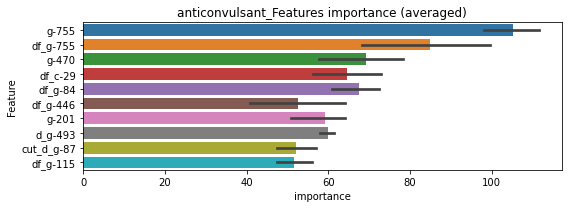

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 anticonvulsant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135193	valid_1's binary_logloss: 0.0220995
[200]	training's binary_logloss: 0.00165126	valid_1's binary_logloss: 0.0099586
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.000542272	valid_1's binary_logloss: 0.00912788


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 anticonvulsant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137928	valid_1's binary_logloss: 0.0187698
[200]	training's binary_logloss: 0.00175299	valid_1's binary_logloss: 0.00574822
[300]	training's binary_logloss: 0.000499132	valid_1's binary_logloss: 0.00474422
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000328342	valid_1's binary_logloss: 0.00464899


anticonvulsant logloss: 0.006888724089775482


neg labels: 3289 → selected neg labels: 3284


antifungal, len(trt): 26, len(othr): 3284, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283735	valid_1's binary_logloss: 0.0412061
[200]	training's binary_logloss: 0.0039274	valid_1's binary_logloss: 0.011292
[300]	training's binary_logloss: 0.00114267	valid_1's binary_logloss: 0.00621609
[400]	training's binary_logloss: 0.000585352	valid_1's binary_logloss: 0.00476391
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000435599	valid_1's binary_logloss: 0.00429682
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279804	valid_1's binary_logloss: 0.0400068
[200]	training's binary_logloss: 0.00388977	valid_1's binary_logloss: 0.0108778
[300]	training's binary_logloss: 0.00114259	valid_1's binary_logloss: 0.00621806
[400]	training's binary_logloss: 0.000587452	valid_1's binary_logloss: 0.0048655
[500]	training's binary_logloss: 0.000428886	valid_1's binary_logloss: 0.0045073
Early stopping, best iteration is:
[507

1 / 3 AUC score:1.000
y_Threshold: 0.0017192, Threshold: 0.0025027, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00225, conf_1:0.00275
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0025027
Num_p_label: 3.0, Expected: 4.3, Adj_threshold_2: 0.0125027
threshold: 0.0125027, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288092	valid_1's binary_logloss: 0.0423768
[200]	training's binary_logloss: 0.00396793	valid_1's binary_logloss: 0.0118866
[300]	training's binary_logloss: 0.00113679	valid_1's binary_logloss: 0.00682586
[400]	training's binary_logloss: 0.000585896	valid_1's binary_logloss: 0.00547094
[500]	training's binary_logloss: 0.000423798	valid_1's binary_logloss: 0.00499117
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000424445	valid_1's binary_logloss: 0.00498826
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283719	valid_1's binary_logloss: 0.039927
[200]	training's binary_logloss: 0.00386244	valid_1's binary_logloss: 0.0117066
[300]	training's binary_logloss: 0.00112947	valid_1's binary_logloss: 0.00751509
[400]	training's binary_logloss: 0.000585212	valid_1's binary_logloss: 0.00613809
Early stopping, best iteration is:
[

2 / 3 AUC score:1.000
y_Threshold: 0.0195804, Threshold: 0.0125027, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00109
Num_p_label: 12.0, conf_0:0.01125, conf_1:0.01375
threshold: 0.0125027, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288092	valid_1's binary_logloss: 0.0423768
[200]	training's binary_logloss: 0.00396793	valid_1's binary_logloss: 0.0118866
[300]	training's binary_logloss: 0.00113679	valid_1's binary_logloss: 0.00682586
[400]	training's binary_logloss: 0.000585896	valid_1's binary_logloss: 0.00547094
[500]	training's binary_logloss: 0.000423798	valid_1's binary_logloss: 0.00499117
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000424445	valid_1's binary_logloss: 0.00498826
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283719	valid_1's binary_logloss: 0.039927
[200]	training's binary_logloss: 0.00386244	valid_1's binary_logloss: 0.0117066
[300]	training's binary_logloss: 0.00112947	valid_1's binary_logloss: 0.00751509
[400]	training's binary_logloss: 0.000585212	valid_1's binary_logloss: 0.00613809
Early stopping, best iteration is:
[

3 / 3 AUC score:1.000
y_Threshold: 0.0195804, Threshold: 0.0125027, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00109
Num_p_label: 12.0, conf_0:0.01125, conf_1:0.01375
threshold: 0.0125027, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 668.0/7790, y_label_rate: 0.0857510


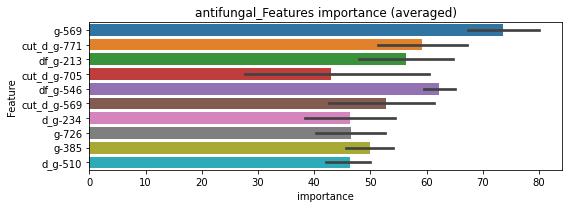

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 antifungal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158245	valid_1's binary_logloss: 0.0297877
[200]	training's binary_logloss: 0.00224808	valid_1's binary_logloss: 0.0149034
[300]	training's binary_logloss: 0.000644453	valid_1's binary_logloss: 0.0132117
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.000632462	valid_1's binary_logloss: 0.0131912


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 antifungal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156125	valid_1's binary_logloss: 0.0252199
[200]	training's binary_logloss: 0.00222935	valid_1's binary_logloss: 0.00997855
[300]	training's binary_logloss: 0.000645216	valid_1's binary_logloss: 0.00788236
[400]	training's binary_logloss: 0.000316292	valid_1's binary_logloss: 0.00750935
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000263432	valid_1's binary_logloss: 0.00746421


antifungal logloss: 0.01032769777710627


neg labels: 3289 → selected neg labels: 3286


antihistamine, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230363	valid_1's binary_logloss: 0.0315172
[200]	training's binary_logloss: 0.00280124	valid_1's binary_logloss: 0.00741193
[300]	training's binary_logloss: 0.000800367	valid_1's binary_logloss: 0.00407271
[400]	training's binary_logloss: 0.000426515	valid_1's binary_logloss: 0.00324584
[500]	training's binary_logloss: 0.000338297	valid_1's binary_logloss: 0.00303791
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000339214	valid_1's binary_logloss: 0.00303684
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233519	valid_1's binary_logloss: 0.0308492
[200]	training's binary_logloss: 0.00288599	valid_1's binary_logloss: 0.00675369
[300]	training's binary_logloss: 0.000834914	valid_1's binary_logloss: 0.00329749
[400]	training's binary_logloss: 0.00044262	valid_1's binary_logloss: 0.00241137
[500]	training's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0015575, Threshold: 0.0026412, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00238, conf_1:0.00291
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0026412
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0126412
threshold: 0.0126412, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230286	valid_1's binary_logloss: 0.0311816
[200]	training's binary_logloss: 0.00275814	valid_1's binary_logloss: 0.00721855
[300]	training's binary_logloss: 0.000808654	valid_1's binary_logloss: 0.00379279
[400]	training's binary_logloss: 0.000431629	valid_1's binary_logloss: 0.00281291
[500]	training's binary_logloss: 0.000343984	valid_1's binary_logloss: 0.002606
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000345823	valid_1's binary_logloss: 0.00260095
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236683	valid_1's binary_logloss: 0.0313259
[200]	training's binary_logloss: 0.00292193	valid_1's binary_logloss: 0.00669698
[300]	training's binary_logloss: 0.000830831	valid_1's binary_logloss: 0.00294347
[400]	training's binary_logloss: 0.000442372	valid_1's binary_logloss: 0.00203949
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0507290, Threshold: 0.0126412, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00076
Num_p_label: 15.0, conf_0:0.01138, conf_1:0.01391
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0126412
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0226412
threshold: 0.0226412, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230286	valid_1's binary_logloss: 0.0311816
[200]	training's binary_logloss: 0.00275814	valid_1's binary_logloss: 0.00721855
[300]	training's binary_logloss: 0.000808654	valid_1's binary_logloss: 0.00379279
[400]	training's binary_logloss: 0.000431629	valid_1's binary_logloss: 0.00281291
[500]	training's binary_logloss: 0.000343984	valid_1's binary_logloss: 0.002606
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000345823	valid_1's binary_logloss: 0.00260095
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236683	valid_1's binary_logloss: 0.0313259
[200]	training's binary_logloss: 0.00292193	valid_1's binary_logloss: 0.00669698
[300]	training's binary_logloss: 0.000830831	valid_1's binary_logloss: 0.00294347
[400]	training's binary_logloss: 0.000442372	valid_1's binary_logloss: 0.00203949
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0507290, Threshold: 0.0226412, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.02038, conf_1:0.02491
threshold: 0.0226412, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7793, y_label_rate: 0.0846914


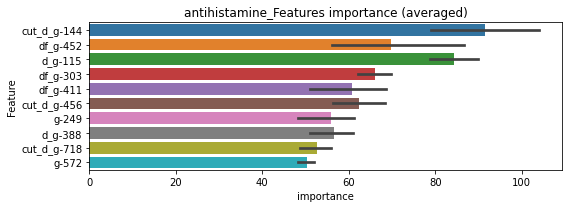

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antihistamine=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012271	valid_1's binary_logloss: 0.0185584
[200]	training's binary_logloss: 0.00144845	valid_1's binary_logloss: 0.0061062
[300]	training's binary_logloss: 0.000409417	valid_1's binary_logloss: 0.00475161
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000297677	valid_1's binary_logloss: 0.0045983


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antihistamine=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121773	valid_1's binary_logloss: 0.0189162
[200]	training's binary_logloss: 0.00148067	valid_1's binary_logloss: 0.00571246
[300]	training's binary_logloss: 0.000431837	valid_1's binary_logloss: 0.00387495
[400]	training's binary_logloss: 0.000226335	valid_1's binary_logloss: 0.00341836
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000192903	valid_1's binary_logloss: 0.00332194


antihistamine logloss: 0.003960200595796774


neg labels: 3289 → selected neg labels: 3286


antimalarial, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022932	valid_1's binary_logloss: 0.0328627
[200]	training's binary_logloss: 0.00274957	valid_1's binary_logloss: 0.00931909
[300]	training's binary_logloss: 0.000821412	valid_1's binary_logloss: 0.00600915
[400]	training's binary_logloss: 0.000447846	valid_1's binary_logloss: 0.00521392
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000374674	valid_1's binary_logloss: 0.00501221
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023484	valid_1's binary_logloss: 0.0290732
[200]	training's binary_logloss: 0.0029447	valid_1's binary_logloss: 0.00487765
[300]	training's binary_logloss: 0.00085998	valid_1's binary_logloss: 0.00174707
[400]	training's binary_logloss: 0.000459567	valid_1's binary_logloss: 0.00105972
[500]	training's binary_logloss: 0.000365415	valid_1's binary_logloss: 0.000897379
Early stopping, best iteration is:

1 / 3 AUC score:1.000
y_Threshold: 0.0015673, Threshold: 0.0026311, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00237, conf_1:0.00289
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0026311
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0126311
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0226311
threshold: 0.0226311, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228899	valid_1's binary_logloss: 0.0325742
[200]	training's binary_logloss: 0.0026964	valid_1's binary_logloss: 0.00809795
[300]	training's binary_logloss: 0.000806203	valid_1's binary_logloss: 0.00486594
[400]	training's binary_logloss: 0.000441111	valid_1's binary_logloss: 0.00409685
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000372855	valid_1's binary_logloss: 0.00389306
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235262	valid_1's binary_logloss: 0.0283851
[200]	training's binary_logloss: 0.00288205	valid_1's binary_logloss: 0.00442506
[300]	training's binary_logloss: 0.000853272	valid_1's binary_logloss: 0.00156022
[400]	training's binary_logloss: 0.000457053	valid_1's binary_logloss: 0.000953853
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000370098	valid_1's binary_logloss: 0.00081

2 / 3 AUC score:1.000
y_Threshold: 0.0294362, Threshold: 0.0226311, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.02037, conf_1:0.02489
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0226311
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0326311
threshold: 0.0326311, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228899	valid_1's binary_logloss: 0.0325742
[200]	training's binary_logloss: 0.0026964	valid_1's binary_logloss: 0.00809795
[300]	training's binary_logloss: 0.000806203	valid_1's binary_logloss: 0.00486594
[400]	training's binary_logloss: 0.000441111	valid_1's binary_logloss: 0.00409685
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000372855	valid_1's binary_logloss: 0.00389306
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235262	valid_1's binary_logloss: 0.0283851
[200]	training's binary_logloss: 0.00288205	valid_1's binary_logloss: 0.00442506
[300]	training's binary_logloss: 0.000853272	valid_1's binary_logloss: 0.00156022
[400]	training's binary_logloss: 0.000457053	valid_1's binary_logloss: 0.000953853
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000370098	valid_1's binary_logloss: 0.00081

3 / 3 AUC score:1.000
y_Threshold: 0.0294362, Threshold: 0.0326311, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.02937, conf_1:0.03589
threshold: 0.0326311, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


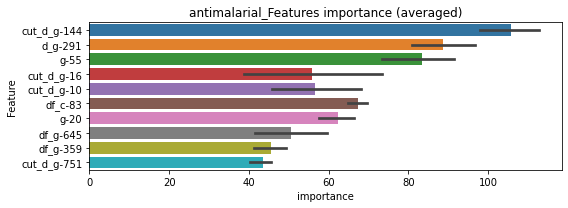

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antimalarial=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124578	valid_1's binary_logloss: 0.0204388
[200]	training's binary_logloss: 0.00147727	valid_1's binary_logloss: 0.00824777
[300]	training's binary_logloss: 0.000426945	valid_1's binary_logloss: 0.00746812
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000442661	valid_1's binary_logloss: 0.00746006


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antimalarial=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012639	valid_1's binary_logloss: 0.0168191
[200]	training's binary_logloss: 0.00156861	valid_1's binary_logloss: 0.00396784
[300]	training's binary_logloss: 0.00046318	valid_1's binary_logloss: 0.00230628
[400]	training's binary_logloss: 0.000238781	valid_1's binary_logloss: 0.00195339
[500]	training's binary_logloss: 0.000181942	valid_1's binary_logloss: 0.00185235
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000175872	valid_1's binary_logloss: 0.00182556


antimalarial logloss: 0.004643917420530824


neg labels: 3289 → selected neg labels: 3278


antioxidant, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0499152	valid_1's binary_logloss: 0.101434
[200]	training's binary_logloss: 0.0106763	valid_1's binary_logloss: 0.0606389
[300]	training's binary_logloss: 0.00333556	valid_1's binary_logloss: 0.0520118
[400]	training's binary_logloss: 0.00154507	valid_1's binary_logloss: 0.0487258
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00133187	valid_1's binary_logloss: 0.0483853
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.050838	valid_1's binary_logloss: 0.0877091
[200]	training's binary_logloss: 0.0110784	valid_1's binary_logloss: 0.0420093
[300]	training's binary_logloss: 0.00345521	valid_1's binary_logloss: 0.0289095
[400]	training's binary_logloss: 0.00160104	valid_1's binary_logloss: 0.0249408
[500]	training's binary_logloss: 0.000982255	valid_1's binary_logloss: 0.0232381
Early stopping, best iteration is:
[505]	trainin

1 / 3 AUC score:0.998
y_Threshold: 0.0092161, Threshold: 0.0118523, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01067, conf_1:0.01304
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0118523
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_2: 0.0218523
threshold: 0.0218523, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.050079	valid_1's binary_logloss: 0.101595
[200]	training's binary_logloss: 0.0104422	valid_1's binary_logloss: 0.0565567
[300]	training's binary_logloss: 0.00321691	valid_1's binary_logloss: 0.0460745
[400]	training's binary_logloss: 0.00149975	valid_1's binary_logloss: 0.0425217
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00137527	valid_1's binary_logloss: 0.0421276
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0501769	valid_1's binary_logloss: 0.0961742
[200]	training's binary_logloss: 0.0104116	valid_1's binary_logloss: 0.0479705
[300]	training's binary_logloss: 0.0032799	valid_1's binary_logloss: 0.0359444
[400]	training's binary_logloss: 0.00153415	valid_1's binary_logloss: 0.0320758
[500]	training's binary_logloss: 0.000944539	valid_1's binary_logloss: 0.0305808
Early stopping, best iteration is:
[503]	training

2 / 3 AUC score:1.000
y_Threshold: 0.0296457, Threshold: 0.0218523, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0163235 Vs.target_rate: 0.00307
Num_p_label: 65.0, conf_0:0.01967, conf_1:0.02404
Num_p_label: 65.0, Expected: 12.2, Adj_threshold_1: 0.0218523
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.0318523
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.0418523
threshold: 0.0418523, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0449812	valid_1's binary_logloss: 0.101933
[200]	training's binary_logloss: 0.00876438	valid_1's binary_logloss: 0.0604824
[300]	training's binary_logloss: 0.00273719	valid_1's binary_logloss: 0.0499781
[400]	training's binary_logloss: 0.00131612	valid_1's binary_logloss: 0.0464647
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00102844	valid_1's binary_logloss: 0.0455735
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0519399	valid_1's binary_logloss: 0.0926133
[200]	training's binary_logloss: 0.0108188	valid_1's binary_logloss: 0.0438014
[300]	training's binary_logloss: 0.00336596	valid_1's binary_logloss: 0.0305508
[400]	training's binary_logloss: 0.00155467	valid_1's binary_logloss: 0.0259593
[500]	training's binary_logloss: 0.000958674	valid_1's binary_logloss: 0.0239214
Early stopping, best iteration is:
[512]	train

3 / 3 AUC score:1.000
y_Threshold: 0.0260345, Threshold: 0.0418523, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0030136 Vs.target_rate: 0.00307
Num_p_label: 12.0, conf_0:0.03767, conf_1:0.04604
threshold: 0.0418523, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/7757, y_label_rate: 0.0843109


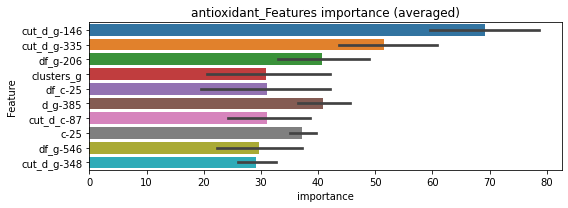

len(train_index) : 3878
len(valid_index) : 3879
================================= fold 1/2 antioxidant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268986	valid_1's binary_logloss: 0.0578552
[200]	training's binary_logloss: 0.0052758	valid_1's binary_logloss: 0.0344794
[300]	training's binary_logloss: 0.00162585	valid_1's binary_logloss: 0.0292017
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000831952	valid_1's binary_logloss: 0.0277248


len(train_index) : 3879
len(valid_index) : 3878
================================= fold 2/2 antioxidant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0260282	valid_1's binary_logloss: 0.0559485
[200]	training's binary_logloss: 0.00531625	valid_1's binary_logloss: 0.0331685
[300]	training's binary_logloss: 0.00164351	valid_1's binary_logloss: 0.0272964
[400]	training's binary_logloss: 0.000766873	valid_1's binary_logloss: 0.0250612
[500]	training's binary_logloss: 0.000472137	valid_1's binary_logloss: 0.0240778
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000465405	valid_1's binary_logloss: 0.0240578


antioxidant logloss: 0.02589155907130173


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323405	valid_1's binary_logloss: 0.0547006
[200]	training's binary_logloss: 0.00491426	valid_1's binary_logloss: 0.02104
[300]	training's binary_logloss: 0.00151552	valid_1's binary_logloss: 0.015098
[400]	training's binary_logloss: 0.000736196	valid_1's binary_logloss: 0.0123815
[500]	training's binary_logloss: 0.000501881	valid_1's binary_logloss: 0.0113355
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000445943	valid_1's binary_logloss: 0.0111154
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.034537	valid_1's binary_logloss: 0.0505573
[200]	training's binary_logloss: 0.00570649	valid_1's binary_logloss: 0.0190262
[300]	training's binary_logloss: 0.00166312	valid_1's binary_logloss: 0.0131497
[400]	training's binary_logloss: 0.000816833	valid_1's binary_logloss: 0.0117259
Early stopping, best iteration is:
[466]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0028494, Threshold: 0.0045015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00405, conf_1:0.00495
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0045015
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0145015
threshold: 0.0145015, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329053	valid_1's binary_logloss: 0.0533649
[200]	training's binary_logloss: 0.00508648	valid_1's binary_logloss: 0.0189986
[300]	training's binary_logloss: 0.00149342	valid_1's binary_logloss: 0.012672
[400]	training's binary_logloss: 0.000758899	valid_1's binary_logloss: 0.0111273
[500]	training's binary_logloss: 0.000514095	valid_1's binary_logloss: 0.0103848
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000485766	valid_1's binary_logloss: 0.0103118
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329958	valid_1's binary_logloss: 0.0551283
[200]	training's binary_logloss: 0.00513177	valid_1's binary_logloss: 0.0221065
[300]	training's binary_logloss: 0.00151966	valid_1's binary_logloss: 0.0157914
[400]	training's binary_logloss: 0.000759663	valid_1's binary_logloss: 0.0145884
Early stopping, best iteration is:
[404]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0150212, Threshold: 0.0145015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0085384 Vs.target_rate: 0.00151
Num_p_label: 34.0, conf_0:0.01305, conf_1:0.01595
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.0145015
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0245015
threshold: 0.0245015, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0334111	valid_1's binary_logloss: 0.0486601
[200]	training's binary_logloss: 0.0050718	valid_1's binary_logloss: 0.0162302
[300]	training's binary_logloss: 0.00149645	valid_1's binary_logloss: 0.0107009
[400]	training's binary_logloss: 0.000755933	valid_1's binary_logloss: 0.00908906
[500]	training's binary_logloss: 0.000515536	valid_1's binary_logloss: 0.00839412
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000498465	valid_1's binary_logloss: 0.00831859
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330652	valid_1's binary_logloss: 0.0515735
[200]	training's binary_logloss: 0.00524357	valid_1's binary_logloss: 0.0153522
[300]	training's binary_logloss: 0.0015542	valid_1's binary_logloss: 0.00845192
[400]	training's binary_logloss: 0.000767337	valid_1's binary_logloss: 0.00628572
[500]	training's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.0240883, Threshold: 0.0245015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0012557 Vs.target_rate: 0.00151
Num_p_label: 5.0, conf_0:0.02205, conf_1:0.02695
threshold: 0.0245015, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/7781, y_label_rate: 0.0844364


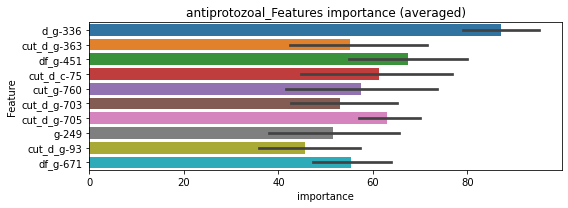

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 antiprotozoal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176445	valid_1's binary_logloss: 0.0331363
[200]	training's binary_logloss: 0.00264659	valid_1's binary_logloss: 0.0163103
[300]	training's binary_logloss: 0.000763408	valid_1's binary_logloss: 0.0132321
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000635857	valid_1's binary_logloss: 0.0130424


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 antiprotozoal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184223	valid_1's binary_logloss: 0.0258882
[200]	training's binary_logloss: 0.00292317	valid_1's binary_logloss: 0.00748509
[300]	training's binary_logloss: 0.000839478	valid_1's binary_logloss: 0.00445695
[400]	training's binary_logloss: 0.000407526	valid_1's binary_logloss: 0.00374317
[500]	training's binary_logloss: 0.000270446	valid_1's binary_logloss: 0.00344908
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000251185	valid_1's binary_logloss: 0.00342869


antiprotozoal logloss: 0.008236143992867167


neg labels: 3289 → selected neg labels: 3286


antiviral, len(trt): 23, len(othr): 3286, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271317	valid_1's binary_logloss: 0.0427085
[200]	training's binary_logloss: 0.00359489	valid_1's binary_logloss: 0.00975921
[300]	training's binary_logloss: 0.00102294	valid_1's binary_logloss: 0.00429242
[400]	training's binary_logloss: 0.000532243	valid_1's binary_logloss: 0.00287297
[500]	training's binary_logloss: 0.000394028	valid_1's binary_logloss: 0.0024504
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000382529	valid_1's binary_logloss: 0.00243415
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277969	valid_1's binary_logloss: 0.0366606
[200]	training's binary_logloss: 0.00374295	valid_1's binary_logloss: 0.00665143
[300]	training's binary_logloss: 0.00107544	valid_1's binary_logloss: 0.00243925
[400]	training's binary_logloss: 0.000544367	valid_1's binary_logloss: 0.00144924
[500]	training's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0021867, Threshold: 0.0033126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00097
Num_p_label: 80.0, conf_0:0.00298, conf_1:0.00364
Num_p_label: 80.0, Expected: 3.8, Adj_threshold_1: 0.0033126
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_2: 0.0133126
threshold: 0.0133126, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.027516	valid_1's binary_logloss: 0.0426561
[200]	training's binary_logloss: 0.00361194	valid_1's binary_logloss: 0.00885942
[300]	training's binary_logloss: 0.00103727	valid_1's binary_logloss: 0.00352331
[400]	training's binary_logloss: 0.000530342	valid_1's binary_logloss: 0.00216321
[500]	training's binary_logloss: 0.000393839	valid_1's binary_logloss: 0.00180095
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000385528	valid_1's binary_logloss: 0.00178917
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276345	valid_1's binary_logloss: 0.0362349
[200]	training's binary_logloss: 0.0036729	valid_1's binary_logloss: 0.00610756
[300]	training's binary_logloss: 0.0010583	valid_1's binary_logloss: 0.00206946
[400]	training's binary_logloss: 0.000539813	valid_1's binary_logloss: 0.00115423
[500]	training's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.1544888, Threshold: 0.0133126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00097
Num_p_label: 31.0, conf_0:0.01198, conf_1:0.01464
Num_p_label: 31.0, Expected: 3.8, Adj_threshold_1: 0.0133126
Num_p_label: 12.0, Expected: 3.8, Adj_threshold_2: 0.0233126
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_3: 0.0333126
threshold: 0.0333126, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.027516	valid_1's binary_logloss: 0.0426561
[200]	training's binary_logloss: 0.00361194	valid_1's binary_logloss: 0.00885942
[300]	training's binary_logloss: 0.00103727	valid_1's binary_logloss: 0.00352331
[400]	training's binary_logloss: 0.000530342	valid_1's binary_logloss: 0.00216321
[500]	training's binary_logloss: 0.000393839	valid_1's binary_logloss: 0.00180095
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000385528	valid_1's binary_logloss: 0.00178917
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276345	valid_1's binary_logloss: 0.0362349
[200]	training's binary_logloss: 0.0036729	valid_1's binary_logloss: 0.00610756
[300]	training's binary_logloss: 0.0010583	valid_1's binary_logloss: 0.00206946
[400]	training's binary_logloss: 0.000539813	valid_1's binary_logloss: 0.00115423
[500]	training's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.1544888, Threshold: 0.0333126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, conf_0:0.02998, conf_1:0.03664
threshold: 0.0333126, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


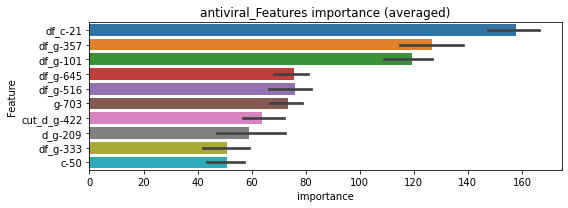

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antiviral=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144191	valid_1's binary_logloss: 0.024116
[200]	training's binary_logloss: 0.00184796	valid_1's binary_logloss: 0.00828582
[300]	training's binary_logloss: 0.000526206	valid_1's binary_logloss: 0.00645096
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.000365911	valid_1's binary_logloss: 0.00633882


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antiviral=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145726	valid_1's binary_logloss: 0.0233756
[200]	training's binary_logloss: 0.00195002	valid_1's binary_logloss: 0.00710756
[300]	training's binary_logloss: 0.000558432	valid_1's binary_logloss: 0.00417918
[400]	training's binary_logloss: 0.000279558	valid_1's binary_logloss: 0.00352623
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000255032	valid_1's binary_logloss: 0.00341223


antiviral logloss: 0.004875711950928676


neg labels: 3289 → selected neg labels: 3281


apoptosis_stimulant, len(trt): 49, len(othr): 3281, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0372909	valid_1's binary_logloss: 0.0719693
[200]	training's binary_logloss: 0.00664059	valid_1's binary_logloss: 0.0347574
[300]	training's binary_logloss: 0.00204074	valid_1's binary_logloss: 0.0262556
[400]	training's binary_logloss: 0.000996983	valid_1's binary_logloss: 0.0235796
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000725034	valid_1's binary_logloss: 0.022525
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0408449	valid_1's binary_logloss: 0.0614622
[200]	training's binary_logloss: 0.00745258	valid_1's binary_logloss: 0.0195107
[300]	training's binary_logloss: 0.0022802	valid_1's binary_logloss: 0.0101648
[400]	training's binary_logloss: 0.00110283	valid_1's binary_logloss: 0.00741755
[500]	training's binary_logloss: 0.0007074	valid_1's binary_logloss: 0.00612636
[600]	training's binary_logloss: 0.000569965

1 / 3 AUC score:1.000
y_Threshold: 0.0035422, Threshold: 0.0357344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00206
Num_p_label: 80.0, conf_0:0.03216, conf_1:0.03931
Num_p_label: 80.0, Expected: 8.2, Adj_threshold_1: 0.0357344
Num_p_label: 71.0, Expected: 8.2, Adj_threshold_2: 0.0457344
Num_p_label: 68.0, Expected: 8.2, Adj_threshold_3: 0.0557344
Num_p_label: 64.0, Expected: 8.2, Adj_threshold_4: 0.0657344
Num_p_label: 61.0, Expected: 8.2, Adj_threshold_5: 0.0757344
Num_p_label: 56.0, Expected: 8.2, Adj_threshold_6: 0.0857344
Num_p_label: 51.0, Expected: 8.2, Adj_threshold_7: 0.0957344
Num_p_label: 48.0, Expected: 8.2, Adj_threshold_8: 0.1057344
Num_p_label: 45.0, Expected: 8.2, Adj_threshold_9: 0.1157344
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_10: 0.1257344
threshold: 0.1357344, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0368742	valid_1's binary_logloss: 0.0713098
[200]	training's binary_logloss: 0.00628766	valid_1's binary_logloss: 0.0334501
[300]	training's binary_logloss: 0.00192138	valid_1's binary_logloss: 0.0252877
[400]	training's binary_logloss: 0.000956992	valid_1's binary_logloss: 0.0219075
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000705498	valid_1's binary_logloss: 0.0209766
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0407833	valid_1's binary_logloss: 0.0599942
[200]	training's binary_logloss: 0.00738928	valid_1's binary_logloss: 0.0186696
[300]	training's binary_logloss: 0.00222584	valid_1's binary_logloss: 0.00932286
[400]	training's binary_logloss: 0.00108131	valid_1's binary_logloss: 0.00647689
[500]	training's binary_logloss: 0.000697259	valid_1's binary_logloss: 0.00532722
[600]	training's binary_logloss: 0.0005

2 / 3 AUC score:1.000
y_Threshold: 0.0357545, Threshold: 0.1357344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0271220 Vs.target_rate: 0.00206
Num_p_label: 108.0, conf_0:0.12216, conf_1:0.14931
Num_p_label: 108.0, Expected: 8.2, Adj_threshold_1: 0.1357344
Num_p_label: 104.0, Expected: 8.2, Adj_threshold_2: 0.1457344
Num_p_label: 102.0, Expected: 8.2, Adj_threshold_3: 0.1557344
Num_p_label: 100.0, Expected: 8.2, Adj_threshold_4: 0.1657344
Num_p_label: 99.0, Expected: 8.2, Adj_threshold_5: 0.1757344
Num_p_label: 98.0, Expected: 8.2, Adj_threshold_6: 0.1857344
Num_p_label: 95.0, Expected: 8.2, Adj_threshold_7: 0.1957344
Num_p_label: 94.0, Expected: 8.2, Adj_threshold_8: 0.2057344
Num_p_label: 94.0, Expected: 8.2, Adj_threshold_9: 0.2157344
Num_p_label: 91.0, Expected: 8.2, Adj_threshold_10: 0.2257344
threshold: 0.2357344, positive_p_label: 89.0/3982, p_label_rate: 0.0223506
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
====

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0371423	valid_1's binary_logloss: 0.067251
[200]	training's binary_logloss: 0.00646707	valid_1's binary_logloss: 0.0294509
[300]	training's binary_logloss: 0.00198205	valid_1's binary_logloss: 0.0217739
[400]	training's binary_logloss: 0.000979226	valid_1's binary_logloss: 0.0189034
[500]	training's binary_logloss: 0.000649559	valid_1's binary_logloss: 0.0175479
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000584069	valid_1's binary_logloss: 0.0173087
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0389546	valid_1's binary_logloss: 0.0613132
[200]	training's binary_logloss: 0.00695119	valid_1's binary_logloss: 0.0201792
[300]	training's binary_logloss: 0.00213475	valid_1's binary_logloss: 0.0112193
[400]	training's binary_logloss: 0.00102934	valid_1's binary_logloss: 0.0081189
[500]	training's binary_logloss: 0.00066873

3 / 3 AUC score:1.000
y_Threshold: 0.0412473, Threshold: 0.2357344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0238574 Vs.target_rate: 0.00206
Num_p_label: 95.0, conf_0:0.21216, conf_1:0.25931
Num_p_label: 95.0, Expected: 8.2, Adj_threshold_1: 0.2357344
Num_p_label: 91.0, Expected: 8.2, Adj_threshold_2: 0.2457344
Num_p_label: 88.0, Expected: 8.2, Adj_threshold_3: 0.2557344
Num_p_label: 87.0, Expected: 8.2, Adj_threshold_4: 0.2657344
Num_p_label: 84.0, Expected: 8.2, Adj_threshold_5: 0.2757344
Num_p_label: 84.0, Expected: 8.2, Adj_threshold_6: 0.2857344
Num_p_label: 84.0, Expected: 8.2, Adj_threshold_7: 0.2957344
Num_p_label: 82.0, Expected: 8.2, Adj_threshold_8: 0.3057344
Num_p_label: 81.0, Expected: 8.2, Adj_threshold_9: 0.3157344
Num_p_label: 81.0, Expected: 8.2, Adj_threshold_10: 0.3257344
threshold: 0.3357344, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 733.0/7781, y_label_rate: 0.0942038


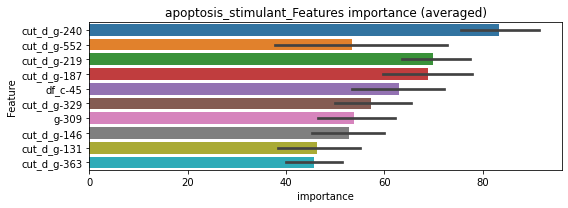

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 apoptosis_stimulant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222014	valid_1's binary_logloss: 0.040672
[200]	training's binary_logloss: 0.00396124	valid_1's binary_logloss: 0.017378
[300]	training's binary_logloss: 0.00119426	valid_1's binary_logloss: 0.0116358
[400]	training's binary_logloss: 0.000578504	valid_1's binary_logloss: 0.00958688
[500]	training's binary_logloss: 0.000372367	valid_1's binary_logloss: 0.00886462
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000320832	valid_1's binary_logloss: 0.00867745


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 apoptosis_stimulant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224188	valid_1's binary_logloss: 0.0400376
[200]	training's binary_logloss: 0.00395319	valid_1's binary_logloss: 0.0175469
[300]	training's binary_logloss: 0.00117474	valid_1's binary_logloss: 0.0121462
[400]	training's binary_logloss: 0.000575408	valid_1's binary_logloss: 0.0105111
[500]	training's binary_logloss: 0.00037395	valid_1's binary_logloss: 0.00967173
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000362558	valid_1's binary_logloss: 0.00963752


apoptosis_stimulant logloss: 0.009157419241393091


neg labels: 3289 → selected neg labels: 3281


aromatase_inhibitor, len(trt): 47, len(othr): 3281, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376921	valid_1's binary_logloss: 0.0634382
[200]	training's binary_logloss: 0.00684917	valid_1's binary_logloss: 0.0254866
[300]	training's binary_logloss: 0.00209022	valid_1's binary_logloss: 0.0166401
[400]	training's binary_logloss: 0.00101332	valid_1's binary_logloss: 0.0140159
[500]	training's binary_logloss: 0.000659278	valid_1's binary_logloss: 0.012614
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000543786	valid_1's binary_logloss: 0.0121733
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0402359	valid_1's binary_logloss: 0.0668793
[200]	training's binary_logloss: 0.00753984	valid_1's binary_logloss: 0.0284137
[300]	training's binary_logloss: 0.00225249	valid_1's binary_logloss: 0.0199915
[400]	training's binary_logloss: 0.00107956	valid_1's binary_logloss: 0.0172602
Early stopping, best iteration is:
[442]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0042146, Threshold: 0.0052861, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00197
Num_p_label: 80.0, conf_0:0.00476, conf_1:0.00581
Num_p_label: 80.0, Expected: 7.9, Adj_threshold_1: 0.0052861
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_2: 0.0152861
threshold: 0.0152861, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0381718	valid_1's binary_logloss: 0.0732446
[200]	training's binary_logloss: 0.00683607	valid_1's binary_logloss: 0.0314851
[300]	training's binary_logloss: 0.00206215	valid_1's binary_logloss: 0.0221142
[400]	training's binary_logloss: 0.0010059	valid_1's binary_logloss: 0.0181345
[500]	training's binary_logloss: 0.000652754	valid_1's binary_logloss: 0.0166227
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000554178	valid_1's binary_logloss: 0.0162333
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0400712	valid_1's binary_logloss: 0.0648012
[200]	training's binary_logloss: 0.007094	valid_1's binary_logloss: 0.0239428
[300]	training's binary_logloss: 0.0021001	valid_1's binary_logloss: 0.0148328
[400]	training's binary_logloss: 0.00101267	valid_1's binary_logloss: 0.0121544
[500]	training's binary_logloss: 0.000657153	va

2 / 3 AUC score:1.000
y_Threshold: 0.0206356, Threshold: 0.0152861, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0057760 Vs.target_rate: 0.00197
Num_p_label: 23.0, conf_0:0.01376, conf_1:0.01681
threshold: 0.0152861, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0381718	valid_1's binary_logloss: 0.0732446
[200]	training's binary_logloss: 0.00683607	valid_1's binary_logloss: 0.0314851
[300]	training's binary_logloss: 0.00206215	valid_1's binary_logloss: 0.0221142
[400]	training's binary_logloss: 0.0010059	valid_1's binary_logloss: 0.0181345
[500]	training's binary_logloss: 0.000652754	valid_1's binary_logloss: 0.0166227
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000554178	valid_1's binary_logloss: 0.0162333
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0400712	valid_1's binary_logloss: 0.0648012
[200]	training's binary_logloss: 0.007094	valid_1's binary_logloss: 0.0239428
[300]	training's binary_logloss: 0.0021001	valid_1's binary_logloss: 0.0148328
[400]	training's binary_logloss: 0.00101267	valid_1's binary_logloss: 0.0121544
[500]	training's binary_logloss: 0.000657153	va

3 / 3 AUC score:1.000
y_Threshold: 0.0206356, Threshold: 0.0152861, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0057760 Vs.target_rate: 0.00197
Num_p_label: 23.0, conf_0:0.01376, conf_1:0.01681
threshold: 0.0152861, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 678.0/7785, y_label_rate: 0.0870906


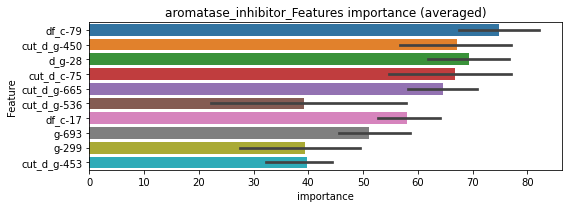

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 aromatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0229902	valid_1's binary_logloss: 0.0446957
[200]	training's binary_logloss: 0.0040972	valid_1's binary_logloss: 0.0258502
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00159099	valid_1's binary_logloss: 0.0237577


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 aromatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234958	valid_1's binary_logloss: 0.0447623
[200]	training's binary_logloss: 0.00433906	valid_1's binary_logloss: 0.0242505
[300]	training's binary_logloss: 0.00131824	valid_1's binary_logloss: 0.0203048
[400]	training's binary_logloss: 0.000617714	valid_1's binary_logloss: 0.0191956
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000609737	valid_1's binary_logloss: 0.0191701


aromatase_inhibitor logloss: 0.021464161960989724


neg labels: 3289 → selected neg labels: 3288


atm_kinase_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156037	valid_1's binary_logloss: 0.0162494
[200]	training's binary_logloss: 0.00128707	valid_1's binary_logloss: 0.00153276
[300]	training's binary_logloss: 0.000363575	valid_1's binary_logloss: 0.000518863
[400]	training's binary_logloss: 0.000232773	valid_1's binary_logloss: 0.000345898
[500]	training's binary_logloss: 0.000204065	valid_1's binary_logloss: 0.000304121
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000198967	valid_1's binary_logloss: 0.000296476
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157832	valid_1's binary_logloss: 0.0184679
[200]	training's binary_logloss: 0.00129754	valid_1's binary_logloss: 0.00418175
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000692431	valid_1's binary_logloss: 0.00346


1 / 3 AUC score:1.000
y_Threshold: 0.0014203, Threshold: 0.0031184, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00281, conf_1:0.00343
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0031184
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.0131184
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.0231184
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_4: 0.0331184
threshold: 0.0331184, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159393	valid_1's binary_logloss: 0.0165127
[200]	training's binary_logloss: 0.00128707	valid_1's binary_logloss: 0.00142617
[300]	training's binary_logloss: 0.000349833	valid_1's binary_logloss: 0.000432049
[400]	training's binary_logloss: 0.000227042	valid_1's binary_logloss: 0.000290576
[500]	training's binary_logloss: 0.000200236	valid_1's binary_logloss: 0.00025811
[600]	training's binary_logloss: 0.000193126	valid_1's binary_logloss: 0.000248776
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000192405	valid_1's binary_logloss: 0.000247779
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160617	valid_1's binary_logloss: 0.0175874
[200]	training's binary_logloss: 0.00129895	valid_1's binary_logloss: 0.00261325
[300]	training's binary_logloss: 0.000348371	valid_1's binary_logloss: 0.0015559
Early stopping, best iterati

2 / 3 AUC score:1.000
y_Threshold: 0.1155600, Threshold: 0.0331184, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00025
Num_p_label: 24.0, conf_0:0.02981, conf_1:0.03643
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_1: 0.0331184
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_2: 0.0431184
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.0531184
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.0631184
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.0731184
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.0831184
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.0931184
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.1031184
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_9: 0.1131184
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_10: 0.1231184
threshold: 0.1331184, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=================

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159393	valid_1's binary_logloss: 0.0165127
[200]	training's binary_logloss: 0.00128707	valid_1's binary_logloss: 0.00142617
[300]	training's binary_logloss: 0.000349833	valid_1's binary_logloss: 0.000432049
[400]	training's binary_logloss: 0.000227042	valid_1's binary_logloss: 0.000290576
[500]	training's binary_logloss: 0.000200236	valid_1's binary_logloss: 0.00025811
[600]	training's binary_logloss: 0.000193126	valid_1's binary_logloss: 0.000248776
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000192405	valid_1's binary_logloss: 0.000247779
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160617	valid_1's binary_logloss: 0.0175874
[200]	training's binary_logloss: 0.00129895	valid_1's binary_logloss: 0.00261325
[300]	training's binary_logloss: 0.000348371	valid_1's binary_logloss: 0.0015559
Early stopping, best iterati

3 / 3 AUC score:1.000
y_Threshold: 0.1155600, Threshold: 0.1331184, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, conf_0:0.11981, conf_1:0.14643
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.1331184
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.1431184
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1531184
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1631184
threshold: 0.1631184, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


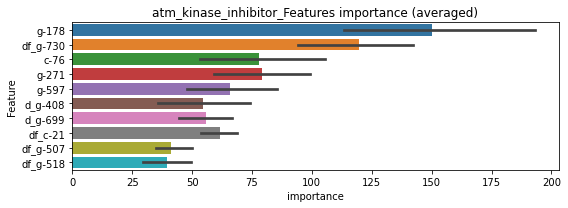

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00848789	valid_1's binary_logloss: 0.00998828
[200]	training's binary_logloss: 0.000696361	valid_1's binary_logloss: 0.00191053
[300]	training's binary_logloss: 0.000198109	valid_1's binary_logloss: 0.00125906
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000188559	valid_1's binary_logloss: 0.00124764


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00854232	valid_1's binary_logloss: 0.0114642
[200]	training's binary_logloss: 0.000699827	valid_1's binary_logloss: 0.00401357
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.000610047	valid_1's binary_logloss: 0.00389901


atm_kinase_inhibitor logloss: 0.0025731535907244727


neg labels: 3289 → selected neg labels: 3287


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163941	valid_1's binary_logloss: 0.0183759
[200]	training's binary_logloss: 0.00148572	valid_1's binary_logloss: 0.00279557
[300]	training's binary_logloss: 0.000418039	valid_1's binary_logloss: 0.00128804
[400]	training's binary_logloss: 0.000254896	valid_1's binary_logloss: 0.000986773
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000227525	valid_1's binary_logloss: 0.000931157
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164521	valid_1's binary_logloss: 0.0187247
[200]	training's binary_logloss: 0.00148502	valid_1's binary_logloss: 0.00321141
[300]	training's binary_logloss: 0.000419333	valid_1's binary_logloss: 0.00188924
[400]	training's binary_logloss: 0.000253808	valid_1's binary_logloss: 0.00163176
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000241464	valid_1's binary_logloss: 0.001

1 / 3 AUC score:1.000
y_Threshold: 0.0006237, Threshold: 0.0008398, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00076, conf_1:0.00092
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0008398
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0108398
threshold: 0.0108398, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166489	valid_1's binary_logloss: 0.0179726
[200]	training's binary_logloss: 0.00144818	valid_1's binary_logloss: 0.0018672
[300]	training's binary_logloss: 0.000406431	valid_1's binary_logloss: 0.000616817
[400]	training's binary_logloss: 0.000252392	valid_1's binary_logloss: 0.000421624
[500]	training's binary_logloss: 0.000221461	valid_1's binary_logloss: 0.000380366
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000221461	valid_1's binary_logloss: 0.000380366
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167492	valid_1's binary_logloss: 0.0184863
[200]	training's binary_logloss: 0.00146301	valid_1's binary_logloss: 0.00238116
[300]	training's binary_logloss: 0.000410452	valid_1's binary_logloss: 0.00105882
[400]	training's binary_logloss: 0.000253141	valid_1's binary_logloss: 0.000903964
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0969693, Threshold: 0.0108398, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00029
Num_p_label: 13.0, conf_0:0.00976, conf_1:0.01192
Num_p_label: 13.0, Expected: 1.2, Adj_threshold_1: 0.0108398
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0208398
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0308398
threshold: 0.0308398, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166489	valid_1's binary_logloss: 0.0179726
[200]	training's binary_logloss: 0.00144818	valid_1's binary_logloss: 0.0018672
[300]	training's binary_logloss: 0.000406431	valid_1's binary_logloss: 0.000616817
[400]	training's binary_logloss: 0.000252392	valid_1's binary_logloss: 0.000421624
[500]	training's binary_logloss: 0.000221461	valid_1's binary_logloss: 0.000380366
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000221461	valid_1's binary_logloss: 0.000380366
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167492	valid_1's binary_logloss: 0.0184863
[200]	training's binary_logloss: 0.00146301	valid_1's binary_logloss: 0.00238116
[300]	training's binary_logloss: 0.000410452	valid_1's binary_logloss: 0.00105882
[400]	training's binary_logloss: 0.000253141	valid_1's binary_logloss: 0.000903964
Early stopping, best iterat

3 / 3 AUC score:1.000
y_Threshold: 0.0969693, Threshold: 0.0308398, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.02776, conf_1:0.03392
threshold: 0.0308398, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7794, y_label_rate: 0.0845522


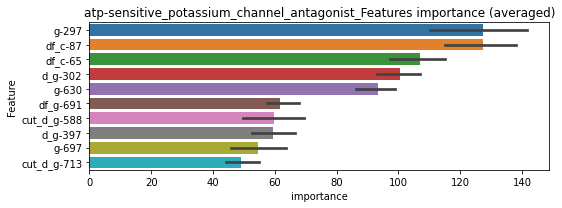

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0088692	valid_1's binary_logloss: 0.0100572
[200]	training's binary_logloss: 0.000787472	valid_1's binary_logloss: 0.00202413
[300]	training's binary_logloss: 0.000224254	valid_1's binary_logloss: 0.00166507
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.000228634	valid_1's binary_logloss: 0.00166233


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00891595	valid_1's binary_logloss: 0.0124612
[200]	training's binary_logloss: 0.00078803	valid_1's binary_logloss: 0.00431665
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000248094	valid_1's binary_logloss: 0.00365058


atp-sensitive_potassium_channel_antagonist logloss: 0.0026564564415562575


neg labels: 3289 → selected neg labels: 3287


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153357	valid_1's binary_logloss: 0.0179655
[200]	training's binary_logloss: 0.00123925	valid_1's binary_logloss: 0.00369406
[300]	training's binary_logloss: 0.000324581	valid_1's binary_logloss: 0.00270574
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000218604	valid_1's binary_logloss: 0.00250858
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159837	valid_1's binary_logloss: 0.0170877
[200]	training's binary_logloss: 0.00134555	valid_1's binary_logloss: 0.00219067
[300]	training's binary_logloss: 0.000358842	valid_1's binary_logloss: 0.000865022
[400]	training's binary_logloss: 0.000226976	valid_1's binary_logloss: 0.000634445
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000207414	valid_1's binary_logloss: 0.000592592


1 / 3 AUC score:1.000
y_Threshold: 0.0006840, Threshold: 0.0019273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00173, conf_1:0.00212
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0019273
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_2: 0.0119273
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.0219273
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.0319273
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_5: 0.0419273
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.0519273
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.0619273
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_8: 0.0719273
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_9: 0.0819273
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_10: 0.0919273
threshold: 0.1019273, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
============

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163432	valid_1's binary_logloss: 0.0166688
[200]	training's binary_logloss: 0.00128415	valid_1's binary_logloss: 0.00134652
[300]	training's binary_logloss: 0.000318663	valid_1's binary_logloss: 0.000339531
[400]	training's binary_logloss: 0.000203299	valid_1's binary_logloss: 0.000218236
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000183104	valid_1's binary_logloss: 0.00019694
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163063	valid_1's binary_logloss: 0.0170212
[200]	training's binary_logloss: 0.00126817	valid_1's binary_logloss: 0.00149677
[300]	training's binary_logloss: 0.000310842	valid_1's binary_logloss: 0.000472424
[400]	training's binary_logloss: 0.000197988	valid_1's binary_logloss: 0.000333456
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000179885	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.2541850, Threshold: 0.1019273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0115520 Vs.target_rate: 0.00050
Num_p_label: 46.0, conf_0:0.09173, conf_1:0.11212
Num_p_label: 46.0, Expected: 2.0, Adj_threshold_1: 0.1019273
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_2: 0.1119273
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_3: 0.1219273
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_4: 0.1319273
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_5: 0.1419273
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_6: 0.1519273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.1619273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_8: 0.1719273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_9: 0.1819273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_10: 0.1919273
threshold: 0.2019273, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163432	valid_1's binary_logloss: 0.0166688
[200]	training's binary_logloss: 0.00128415	valid_1's binary_logloss: 0.00134652
[300]	training's binary_logloss: 0.000318663	valid_1's binary_logloss: 0.000339531
[400]	training's binary_logloss: 0.000203299	valid_1's binary_logloss: 0.000218236
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000183104	valid_1's binary_logloss: 0.00019694
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163063	valid_1's binary_logloss: 0.0170212
[200]	training's binary_logloss: 0.00126817	valid_1's binary_logloss: 0.00149677
[300]	training's binary_logloss: 0.000310842	valid_1's binary_logloss: 0.000472424
[400]	training's binary_logloss: 0.000197988	valid_1's binary_logloss: 0.000333456
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000179885	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.2541850, Threshold: 0.2019273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00050
Num_p_label: 16.0, conf_0:0.18173, conf_1:0.22212
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_1: 0.2019273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.2119273
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.2219273
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.2319273
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_5: 0.2419273
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_6: 0.2519273
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_7: 0.2619273
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.2719273
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_9: 0.2819273
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_10: 0.2919273
threshold: 0.3019273, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 670.0/7794, y_label_rate: 0.0859636


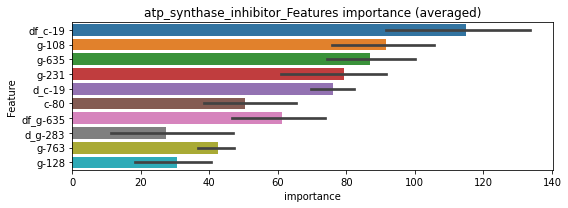

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00892226	valid_1's binary_logloss: 0.0122789
[200]	training's binary_logloss: 0.000760791	valid_1's binary_logloss: 0.00458104
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000223648	valid_1's binary_logloss: 0.00404388


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00897288	valid_1's binary_logloss: 0.010352
[200]	training's binary_logloss: 0.000769589	valid_1's binary_logloss: 0.00242864
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000284525	valid_1's binary_logloss: 0.00205308


atp_synthase_inhibitor logloss: 0.003048480886893674


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511533	valid_1's binary_logloss: 0.1117
[200]	training's binary_logloss: 0.0117173	valid_1's binary_logloss: 0.0650188
[300]	training's binary_logloss: 0.00372446	valid_1's binary_logloss: 0.0509709
[400]	training's binary_logloss: 0.00175566	valid_1's binary_logloss: 0.0460729
[500]	training's binary_logloss: 0.00108446	valid_1's binary_logloss: 0.0436679
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000902312	valid_1's binary_logloss: 0.042819
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0532401	valid_1's binary_logloss: 0.110315
[200]	training's binary_logloss: 0.0132015	valid_1's binary_logloss: 0.0710633
[300]	training's binary_logloss: 0.00425652	valid_1's binary_logloss: 0.0621446
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00437283	valid_1's binary_logloss: 0.0619879


1 / 3 AUC score:0.996
y_Threshold: 0.0166988, Threshold: 0.0519233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0200904 Vs.target_rate: 0.00407
Num_p_label: 80.0, conf_0:0.04673, conf_1:0.05712
Num_p_label: 80.0, Expected: 16.2, Adj_threshold_1: 0.0519233
Num_p_label: 67.0, Expected: 16.2, Adj_threshold_2: 0.0619233
Num_p_label: 57.0, Expected: 16.2, Adj_threshold_3: 0.0719233
Num_p_label: 46.0, Expected: 16.2, Adj_threshold_4: 0.0819233
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_5: 0.0919233
Num_p_label: 38.0, Expected: 16.2, Adj_threshold_6: 0.1019233
Num_p_label: 31.0, Expected: 16.2, Adj_threshold_7: 0.1119233
threshold: 0.1119233, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474158	valid_1's binary_logloss: 0.0989455
[200]	training's binary_logloss: 0.0102709	valid_1's binary_logloss: 0.0600984
[300]	training's binary_logloss: 0.00322489	valid_1's binary_logloss: 0.0520812
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00180403	valid_1's binary_logloss: 0.0497818
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0469654	valid_1's binary_logloss: 0.102327
[200]	training's binary_logloss: 0.0102905	valid_1's binary_logloss: 0.0593419
[300]	training's binary_logloss: 0.00330041	valid_1's binary_logloss: 0.0485668
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00198563	valid_1's binary_logloss: 0.0463269


2 / 3 AUC score:0.998
y_Threshold: 0.0780912, Threshold: 0.1119233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 32 → Positive_corect_labels: 628.0/3743
p_label_rate: 0.0394274 Vs.target_rate: 0.00407
Num_p_label: 157.0, conf_0:0.10073, conf_1:0.12312
Num_p_label: 157.0, Expected: 16.2, Adj_threshold_1: 0.1119233
Num_p_label: 148.0, Expected: 16.2, Adj_threshold_2: 0.1219233
Num_p_label: 145.0, Expected: 16.2, Adj_threshold_3: 0.1319233
Num_p_label: 141.0, Expected: 16.2, Adj_threshold_4: 0.1419233
Num_p_label: 133.0, Expected: 16.2, Adj_threshold_5: 0.1519233
Num_p_label: 129.0, Expected: 16.2, Adj_threshold_6: 0.1619233
Num_p_label: 123.0, Expected: 16.2, Adj_threshold_7: 0.1719233
Num_p_label: 120.0, Expected: 16.2, Adj_threshold_8: 0.1819233
Num_p_label: 116.0, Expected: 16.2, Adj_threshold_9: 0.1919233
Num_p_label: 112.0, Expected: 16.2, Adj_threshold_10: 0.2019233
threshold: 0.2119233, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 628.0/3743, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0442853	valid_1's binary_logloss: 0.0920361
[200]	training's binary_logloss: 0.00895168	valid_1's binary_logloss: 0.054914
[300]	training's binary_logloss: 0.00281268	valid_1's binary_logloss: 0.043662
[400]	training's binary_logloss: 0.0013743	valid_1's binary_logloss: 0.0407486
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000956779	valid_1's binary_logloss: 0.0394311
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0456403	valid_1's binary_logloss: 0.0908222
[200]	training's binary_logloss: 0.00974358	valid_1's binary_logloss: 0.0453883
[300]	training's binary_logloss: 0.00314525	valid_1's binary_logloss: 0.0330572
[400]	training's binary_logloss: 0.00151639	valid_1's binary_logloss: 0.0280688
[500]	training's binary_logloss: 0.000949369	valid_1's binary_logloss: 0.0259768
[600]	training's binary_logloss: 0.0007178	val

3 / 3 AUC score:1.000
y_Threshold: 0.0777823, Threshold: 0.2119233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0356605 Vs.target_rate: 0.00407
Num_p_label: 142.0, conf_0:0.19073, conf_1:0.23312
Num_p_label: 142.0, Expected: 16.2, Adj_threshold_1: 0.2119233
Num_p_label: 137.0, Expected: 16.2, Adj_threshold_2: 0.2219233
Num_p_label: 132.0, Expected: 16.2, Adj_threshold_3: 0.2319233
Num_p_label: 129.0, Expected: 16.2, Adj_threshold_4: 0.2419233
Num_p_label: 125.0, Expected: 16.2, Adj_threshold_5: 0.2519233
Num_p_label: 122.0, Expected: 16.2, Adj_threshold_6: 0.2619233
Num_p_label: 119.0, Expected: 16.2, Adj_threshold_7: 0.2719233
Num_p_label: 119.0, Expected: 16.2, Adj_threshold_8: 0.2819233
Num_p_label: 115.0, Expected: 16.2, Adj_threshold_9: 0.2919233
Num_p_label: 112.0, Expected: 16.2, Adj_threshold_10: 0.3019233
threshold: 0.3119233, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 728.0/7705, y_label_ra

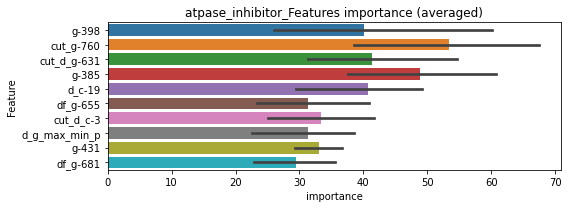

len(train_index) : 3852
len(valid_index) : 3853
================================= fold 1/2 atpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0264864	valid_1's binary_logloss: 0.0601995
[200]	training's binary_logloss: 0.00549253	valid_1's binary_logloss: 0.0395663
[300]	training's binary_logloss: 0.00178059	valid_1's binary_logloss: 0.034347
[400]	training's binary_logloss: 0.000863967	valid_1's binary_logloss: 0.0328279
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000868652	valid_1's binary_logloss: 0.0328045


len(train_index) : 3853
len(valid_index) : 3852
================================= fold 2/2 atpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275786	valid_1's binary_logloss: 0.0621456
[200]	training's binary_logloss: 0.00596534	valid_1's binary_logloss: 0.0385389
[300]	training's binary_logloss: 0.00191089	valid_1's binary_logloss: 0.0314572
[400]	training's binary_logloss: 0.000909919	valid_1's binary_logloss: 0.0289682
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00084704	valid_1's binary_logloss: 0.0287504


atpase_inhibitor logloss: 0.030777726640072424


neg labels: 3289 → selected neg labels: 3286


atr_kinase_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0199929	valid_1's binary_logloss: 0.0277843
[200]	training's binary_logloss: 0.00214268	valid_1's binary_logloss: 0.00619202
[300]	training's binary_logloss: 0.00062367	valid_1's binary_logloss: 0.00311784
[400]	training's binary_logloss: 0.000359059	valid_1's binary_logloss: 0.00233875
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000306863	valid_1's binary_logloss: 0.00215639
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202868	valid_1's binary_logloss: 0.0243636
[200]	training's binary_logloss: 0.00217211	valid_1's binary_logloss: 0.00397491
[300]	training's binary_logloss: 0.000619863	valid_1's binary_logloss: 0.00169678
[400]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00118616
[500]	training's binary_logloss: 0.000300942	valid_1's binary_logloss: 0.00105365
Early stopping, best iteration i

1 / 3 AUC score:1.000
y_Threshold: 0.0019078, Threshold: 0.0053344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00480, conf_1:0.00587
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0053344
Num_p_label: 35.0, Expected: 3.2, Adj_threshold_2: 0.0153344
Num_p_label: 27.0, Expected: 3.2, Adj_threshold_3: 0.0253344
Num_p_label: 21.0, Expected: 3.2, Adj_threshold_4: 0.0353344
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_5: 0.0453344
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_6: 0.0553344
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_7: 0.0653344
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_8: 0.0753344
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_9: 0.0853344
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_10: 0.0953344
threshold: 0.1053344, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198766	valid_1's binary_logloss: 0.0241456
[200]	training's binary_logloss: 0.00198949	valid_1's binary_logloss: 0.00355475
[300]	training's binary_logloss: 0.000550738	valid_1's binary_logloss: 0.00132718
[400]	training's binary_logloss: 0.00032444	valid_1's binary_logloss: 0.00090036
[500]	training's binary_logloss: 0.000282915	valid_1's binary_logloss: 0.000824106
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000277599	valid_1's binary_logloss: 0.0008155
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198157	valid_1's binary_logloss: 0.0234371
[200]	training's binary_logloss: 0.00198288	valid_1's binary_logloss: 0.00333349
[300]	training's binary_logloss: 0.000550337	valid_1's binary_logloss: 0.00126455
[400]	training's binary_logloss: 0.000324953	valid_1's binary_logloss: 0.000869395
[500]	training's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.1867990, Threshold: 0.1053344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0128076 Vs.target_rate: 0.00080
Num_p_label: 51.0, conf_0:0.09480, conf_1:0.11587
Num_p_label: 51.0, Expected: 3.2, Adj_threshold_1: 0.1053344
Num_p_label: 48.0, Expected: 3.2, Adj_threshold_2: 0.1153344
Num_p_label: 46.0, Expected: 3.2, Adj_threshold_3: 0.1253344
Num_p_label: 45.0, Expected: 3.2, Adj_threshold_4: 0.1353344
Num_p_label: 44.0, Expected: 3.2, Adj_threshold_5: 0.1453344
Num_p_label: 41.0, Expected: 3.2, Adj_threshold_6: 0.1553344
Num_p_label: 41.0, Expected: 3.2, Adj_threshold_7: 0.1653344
Num_p_label: 39.0, Expected: 3.2, Adj_threshold_8: 0.1753344
Num_p_label: 37.0, Expected: 3.2, Adj_threshold_9: 0.1853344
Num_p_label: 35.0, Expected: 3.2, Adj_threshold_10: 0.1953344
threshold: 0.2053344, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198766	valid_1's binary_logloss: 0.0241456
[200]	training's binary_logloss: 0.00198949	valid_1's binary_logloss: 0.00355475
[300]	training's binary_logloss: 0.000550738	valid_1's binary_logloss: 0.00132718
[400]	training's binary_logloss: 0.00032444	valid_1's binary_logloss: 0.00090036
[500]	training's binary_logloss: 0.000282915	valid_1's binary_logloss: 0.000824106
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000277599	valid_1's binary_logloss: 0.0008155
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198157	valid_1's binary_logloss: 0.0234371
[200]	training's binary_logloss: 0.00198288	valid_1's binary_logloss: 0.00333349
[300]	training's binary_logloss: 0.000550337	valid_1's binary_logloss: 0.00126455
[400]	training's binary_logloss: 0.000324953	valid_1's binary_logloss: 0.000869395
[500]	training's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.1867990, Threshold: 0.2053344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0087896 Vs.target_rate: 0.00080
Num_p_label: 35.0, conf_0:0.18480, conf_1:0.22587
Num_p_label: 35.0, Expected: 3.2, Adj_threshold_1: 0.2053344
Num_p_label: 35.0, Expected: 3.2, Adj_threshold_2: 0.2153344
Num_p_label: 33.0, Expected: 3.2, Adj_threshold_3: 0.2253344
Num_p_label: 32.0, Expected: 3.2, Adj_threshold_4: 0.2353344
Num_p_label: 31.0, Expected: 3.2, Adj_threshold_5: 0.2453344
Num_p_label: 30.0, Expected: 3.2, Adj_threshold_6: 0.2553344
Num_p_label: 30.0, Expected: 3.2, Adj_threshold_7: 0.2653344
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_8: 0.2753344
Num_p_label: 26.0, Expected: 3.2, Adj_threshold_9: 0.2853344
Num_p_label: 26.0, Expected: 3.2, Adj_threshold_10: 0.2953344
threshold: 0.3053344, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 683.0/7793, y_label_rate: 0.0876428


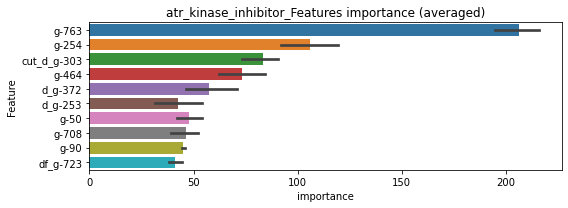

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113391	valid_1's binary_logloss: 0.0179076
[200]	training's binary_logloss: 0.00125698	valid_1's binary_logloss: 0.00674379
[300]	training's binary_logloss: 0.00035129	valid_1's binary_logloss: 0.00557013
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.00035129	valid_1's binary_logloss: 0.00557013


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116623	valid_1's binary_logloss: 0.0169525
[200]	training's binary_logloss: 0.00134365	valid_1's binary_logloss: 0.00665142
[300]	training's binary_logloss: 0.000379706	valid_1's binary_logloss: 0.00581625
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.000373507	valid_1's binary_logloss: 0.00580793


atr_kinase_inhibitor logloss: 0.005689012934055821


neg labels: 3289 → selected neg labels: 3273


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3273, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0382562	valid_1's binary_logloss: 0.0739138
[200]	training's binary_logloss: 0.00659818	valid_1's binary_logloss: 0.0403554
[300]	training's binary_logloss: 0.0019947	valid_1's binary_logloss: 0.0336758
[400]	training's binary_logloss: 0.000971625	valid_1's binary_logloss: 0.0317108
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000723287	valid_1's binary_logloss: 0.0307843
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0383931	valid_1's binary_logloss: 0.0777173
[200]	training's binary_logloss: 0.00654999	valid_1's binary_logloss: 0.0392223
[300]	training's binary_logloss: 0.00202403	valid_1's binary_logloss: 0.0305078
[400]	training's binary_logloss: 0.000979276	valid_1's binary_logloss: 0.027611
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000858201	valid_1's binary_logloss: 0.0273128


1 / 3 AUC score:0.999
y_Threshold: 0.0135191, Threshold: 0.0519636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.04677, conf_1:0.05716
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0519636
Num_p_label: 76.0, Expected: 16.1, Adj_threshold_2: 0.0619636
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_3: 0.0719636
Num_p_label: 69.0, Expected: 16.1, Adj_threshold_4: 0.0819636
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_5: 0.0919636
Num_p_label: 58.0, Expected: 16.1, Adj_threshold_6: 0.1019636
Num_p_label: 51.0, Expected: 16.1, Adj_threshold_7: 0.1119636
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_8: 0.1219636
Num_p_label: 46.0, Expected: 16.1, Adj_threshold_9: 0.1319636
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_10: 0.1419636
threshold: 0.1519636, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 650.0/3787, y_label_rate: 0.1716398

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032727	valid_1's binary_logloss: 0.0706702
[200]	training's binary_logloss: 0.00498593	valid_1's binary_logloss: 0.0380628
[300]	training's binary_logloss: 0.00146683	valid_1's binary_logloss: 0.0323446
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000937325	valid_1's binary_logloss: 0.030966
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336359	valid_1's binary_logloss: 0.0588885
[200]	training's binary_logloss: 0.00518714	valid_1's binary_logloss: 0.023711
[300]	training's binary_logloss: 0.00153511	valid_1's binary_logloss: 0.0161149
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00145858	valid_1's binary_logloss: 0.0159308


2 / 3 AUC score:0.999
y_Threshold: 0.0827738, Threshold: 0.1519636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0231040 Vs.target_rate: 0.00403
Num_p_label: 92.0, conf_0:0.13677, conf_1:0.16716
Num_p_label: 92.0, Expected: 16.1, Adj_threshold_1: 0.1519636
Num_p_label: 87.0, Expected: 16.1, Adj_threshold_2: 0.1619636
Num_p_label: 85.0, Expected: 16.1, Adj_threshold_3: 0.1719636
Num_p_label: 82.0, Expected: 16.1, Adj_threshold_4: 0.1819636
Num_p_label: 81.0, Expected: 16.1, Adj_threshold_5: 0.1919636
Num_p_label: 79.0, Expected: 16.1, Adj_threshold_6: 0.2019636
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_7: 0.2119636
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_8: 0.2219636
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_9: 0.2319636
Num_p_label: 68.0, Expected: 16.1, Adj_threshold_10: 0.2419636
threshold: 0.2519636, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 639.0/3765, y_label_rate: 0.169721

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0314917	valid_1's binary_logloss: 0.060029
[200]	training's binary_logloss: 0.00467261	valid_1's binary_logloss: 0.0262404
[300]	training's binary_logloss: 0.00135412	valid_1's binary_logloss: 0.0194928
[400]	training's binary_logloss: 0.000684526	valid_1's binary_logloss: 0.0170278
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00048554	valid_1's binary_logloss: 0.0161698
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327985	valid_1's binary_logloss: 0.0544672
[200]	training's binary_logloss: 0.00492476	valid_1's binary_logloss: 0.0207998
[300]	training's binary_logloss: 0.00144109	valid_1's binary_logloss: 0.0156085
[400]	training's binary_logloss: 0.000719464	valid_1's binary_logloss: 0.014122
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000606301	valid_1's binary_logloss: 0.0138006


3 / 3 AUC score:1.000
y_Threshold: 0.0688516, Threshold: 0.2519636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 635.0/3757
p_label_rate: 0.0185836 Vs.target_rate: 0.00403
Num_p_label: 74.0, conf_0:0.22677, conf_1:0.27716
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_1: 0.2519636
Num_p_label: 73.0, Expected: 16.1, Adj_threshold_2: 0.2619636
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_3: 0.2719636
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_4: 0.2819636
Num_p_label: 69.0, Expected: 16.1, Adj_threshold_5: 0.2919636
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_6: 0.3019636
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_7: 0.3119636
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_8: 0.3219636
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_9: 0.3319636
Num_p_label: 63.0, Expected: 16.1, Adj_threshold_10: 0.3419636
threshold: 0.3519636, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 698.0/7739, y_label_rate: 0.0901925

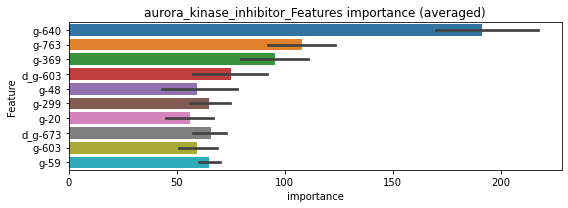

len(train_index) : 3869
len(valid_index) : 3870
================================= fold 1/2 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182271	valid_1's binary_logloss: 0.0445286
[200]	training's binary_logloss: 0.00274418	valid_1's binary_logloss: 0.0260477
[300]	training's binary_logloss: 0.000825745	valid_1's binary_logloss: 0.0227777
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00089849	valid_1's binary_logloss: 0.0227429


len(train_index) : 3870
len(valid_index) : 3869
================================= fold 2/2 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191218	valid_1's binary_logloss: 0.0370586
[200]	training's binary_logloss: 0.00297561	valid_1's binary_logloss: 0.016313
[300]	training's binary_logloss: 0.000895777	valid_1's binary_logloss: 0.011959
[400]	training's binary_logloss: 0.000447167	valid_1's binary_logloss: 0.010914
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000362197	valid_1's binary_logloss: 0.0106289


aurora_kinase_inhibitor logloss: 0.016686690763716223


neg labels: 3289 → selected neg labels: 3288


autotaxin_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165102	valid_1's binary_logloss: 0.0182901
[200]	training's binary_logloss: 0.00145105	valid_1's binary_logloss: 0.0021762
[300]	training's binary_logloss: 0.000396467	valid_1's binary_logloss: 0.00085761
[400]	training's binary_logloss: 0.000241539	valid_1's binary_logloss: 0.000634325
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000212391	valid_1's binary_logloss: 0.000589951
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163944	valid_1's binary_logloss: 0.0180297
[200]	training's binary_logloss: 0.00144314	valid_1's binary_logloss: 0.00202569
[300]	training's binary_logloss: 0.000396984	valid_1's binary_logloss: 0.00071355
[400]	training's binary_logloss: 0.000242848	valid_1's binary_logloss: 0.00048033
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000216865	valid_1's binary_logloss: 0.0004

1 / 3 AUC score:1.000
y_Threshold: 0.0005489, Threshold: 0.0011051, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00099, conf_1:0.00122
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0011051
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0111051
threshold: 0.0111051, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166235	valid_1's binary_logloss: 0.0183201
[200]	training's binary_logloss: 0.00141795	valid_1's binary_logloss: 0.00216283
[300]	training's binary_logloss: 0.000388768	valid_1's binary_logloss: 0.000814622
[400]	training's binary_logloss: 0.00024084	valid_1's binary_logloss: 0.00059083
[500]	training's binary_logloss: 0.00021128	valid_1's binary_logloss: 0.000546163
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00021128	valid_1's binary_logloss: 0.000546163
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167948	valid_1's binary_logloss: 0.0182319
[200]	training's binary_logloss: 0.00143241	valid_1's binary_logloss: 0.00201907
[300]	training's binary_logloss: 0.000392999	valid_1's binary_logloss: 0.000707778
[400]	training's binary_logloss: 0.000243173	valid_1's binary_logloss: 0.000502038
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.1334000, Threshold: 0.0111051, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, conf_0:0.00999, conf_1:0.01222
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_1: 0.0111051
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0211051
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.0311051
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.0411051
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.0511051
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.0611051
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.0711051
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.0811051
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.0911051
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.1011051
threshold: 0.1111051, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= P

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166235	valid_1's binary_logloss: 0.0183201
[200]	training's binary_logloss: 0.00141795	valid_1's binary_logloss: 0.00216283
[300]	training's binary_logloss: 0.000388768	valid_1's binary_logloss: 0.000814622
[400]	training's binary_logloss: 0.00024084	valid_1's binary_logloss: 0.00059083
[500]	training's binary_logloss: 0.00021128	valid_1's binary_logloss: 0.000546163
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00021128	valid_1's binary_logloss: 0.000546163
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167948	valid_1's binary_logloss: 0.0182319
[200]	training's binary_logloss: 0.00143241	valid_1's binary_logloss: 0.00201907
[300]	training's binary_logloss: 0.000392999	valid_1's binary_logloss: 0.000707778
[400]	training's binary_logloss: 0.000243173	valid_1's binary_logloss: 0.000502038
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.1334000, Threshold: 0.1111051, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.09999, conf_1:0.12222
threshold: 0.1111051, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


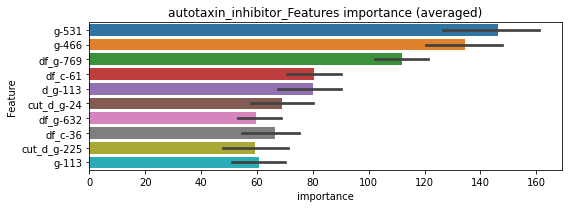

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 autotaxin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.008855	valid_1's binary_logloss: 0.0100414
[200]	training's binary_logloss: 0.000758198	valid_1's binary_logloss: 0.00150431
[300]	training's binary_logloss: 0.000205008	valid_1's binary_logloss: 0.000946557
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000164085	valid_1's binary_logloss: 0.000907951


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 autotaxin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00888909	valid_1's binary_logloss: 0.0113592
[200]	training's binary_logloss: 0.000749614	valid_1's binary_logloss: 0.00285445
[300]	training's binary_logloss: 0.000205112	valid_1's binary_logloss: 0.00212315
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000129239	valid_1's binary_logloss: 0.00201655


autotaxin_inhibitor logloss: 0.0014621803363175862


neg labels: 3289 → selected neg labels: 3279


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047049	valid_1's binary_logloss: 0.091944
[200]	training's binary_logloss: 0.0100697	valid_1's binary_logloss: 0.0484015
[300]	training's binary_logloss: 0.00305188	valid_1's binary_logloss: 0.0370226
[400]	training's binary_logloss: 0.00140494	valid_1's binary_logloss: 0.0320774
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00118572	valid_1's binary_logloss: 0.0312012
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0454917	valid_1's binary_logloss: 0.083298
[200]	training's binary_logloss: 0.00934187	valid_1's binary_logloss: 0.0395678
[300]	training's binary_logloss: 0.00285939	valid_1's binary_logloss: 0.0274942
[400]	training's binary_logloss: 0.00134414	valid_1's binary_logloss: 0.0241318
[500]	training's binary_logloss: 0.000839913	valid_1's binary_logloss: 0.0222705
Early stopping, best iteration is:
[553]	trainin

1 / 3 AUC score:1.000
y_Threshold: 0.0054212, Threshold: 0.0071518, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00644, conf_1:0.00787
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0071518
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_2: 0.0171518
threshold: 0.0171518, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0472312	valid_1's binary_logloss: 0.0864201
[200]	training's binary_logloss: 0.00921844	valid_1's binary_logloss: 0.0451124
[300]	training's binary_logloss: 0.00285866	valid_1's binary_logloss: 0.0352248
[400]	training's binary_logloss: 0.00131467	valid_1's binary_logloss: 0.0320187
[500]	training's binary_logloss: 0.000832344	valid_1's binary_logloss: 0.0304901
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000647486	valid_1's binary_logloss: 0.0295849
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0475602	valid_1's binary_logloss: 0.0826556
[200]	training's binary_logloss: 0.00950981	valid_1's binary_logloss: 0.0377954
[300]	training's binary_logloss: 0.00290714	valid_1's binary_logloss: 0.0280146
[400]	training's binary_logloss: 0.00137066	valid_1's binary_logloss: 0.0258292
Early stopping, best iteration is:
[431]	tr

2 / 3 AUC score:0.999
y_Threshold: 0.0168436, Threshold: 0.0171518, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0095429 Vs.target_rate: 0.00252
Num_p_label: 38.0, conf_0:0.01544, conf_1:0.01887
Num_p_label: 38.0, Expected: 10.0, Adj_threshold_1: 0.0171518
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.0271518
threshold: 0.0271518, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0453523	valid_1's binary_logloss: 0.0924046
[200]	training's binary_logloss: 0.00865667	valid_1's binary_logloss: 0.0473341
[300]	training's binary_logloss: 0.00265649	valid_1's binary_logloss: 0.0361641
[400]	training's binary_logloss: 0.00125461	valid_1's binary_logloss: 0.0317246
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00102132	valid_1's binary_logloss: 0.0309604
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474687	valid_1's binary_logloss: 0.0831227
[200]	training's binary_logloss: 0.00959179	valid_1's binary_logloss: 0.0382858
[300]	training's binary_logloss: 0.00289079	valid_1's binary_logloss: 0.0269978
[400]	training's binary_logloss: 0.00136356	valid_1's binary_logloss: 0.0230483
[500]	training's binary_logloss: 0.000847649	valid_1's binary_logloss: 0.0217504
Early stopping, best iteration is:
[492]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0220643, Threshold: 0.0271518, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0025113 Vs.target_rate: 0.00252
Num_p_label: 10.0, conf_0:0.02444, conf_1:0.02987
threshold: 0.0271518, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 658.0/7770, y_label_rate: 0.0846847


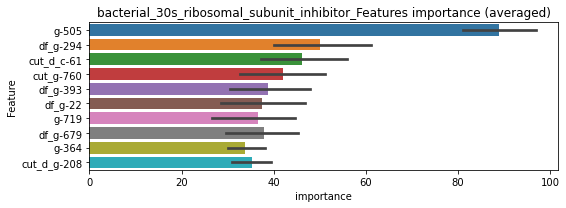

len(train_index) : 3885
len(valid_index) : 3885
================================= fold 1/2 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023807	valid_1's binary_logloss: 0.0606883
[200]	training's binary_logloss: 0.00444957	valid_1's binary_logloss: 0.0373677
[300]	training's binary_logloss: 0.00135093	valid_1's binary_logloss: 0.030748
[400]	training's binary_logloss: 0.00063179	valid_1's binary_logloss: 0.0289463
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000451326	valid_1's binary_logloss: 0.0284542


len(train_index) : 3885
len(valid_index) : 3885
================================= fold 2/2 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270545	valid_1's binary_logloss: 0.0489514
[200]	training's binary_logloss: 0.00524832	valid_1's binary_logloss: 0.0240183
[300]	training's binary_logloss: 0.00156771	valid_1's binary_logloss: 0.0187987
[400]	training's binary_logloss: 0.000721192	valid_1's binary_logloss: 0.0166898
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000620001	valid_1's binary_logloss: 0.0163521


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.022403132428560145


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511384	valid_1's binary_logloss: 0.105302
[200]	training's binary_logloss: 0.0113937	valid_1's binary_logloss: 0.0629117
[300]	training's binary_logloss: 0.00379739	valid_1's binary_logloss: 0.0504354
[400]	training's binary_logloss: 0.00171256	valid_1's binary_logloss: 0.0456609
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00127709	valid_1's binary_logloss: 0.0447829
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0525776	valid_1's binary_logloss: 0.112205
[200]	training's binary_logloss: 0.0118619	valid_1's binary_logloss: 0.0720694
[300]	training's binary_logloss: 0.00376499	valid_1's binary_logloss: 0.0622521
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00194994	valid_1's binary_logloss: 0.0587136


1 / 3 AUC score:0.998
y_Threshold: 0.0088978, Threshold: 0.0119808, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00336
Num_p_label: 80.0, conf_0:0.01078, conf_1:0.01318
Num_p_label: 80.0, Expected: 13.4, Adj_threshold_1: 0.0119808
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_2: 0.0219808
threshold: 0.0219808, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0503247	valid_1's binary_logloss: 0.110505
[200]	training's binary_logloss: 0.0105817	valid_1's binary_logloss: 0.0686521
[300]	training's binary_logloss: 0.00337827	valid_1's binary_logloss: 0.058121
[400]	training's binary_logloss: 0.00159045	valid_1's binary_logloss: 0.0546853
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00145835	valid_1's binary_logloss: 0.0542258
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.054236	valid_1's binary_logloss: 0.101631
[200]	training's binary_logloss: 0.012181	valid_1's binary_logloss: 0.0543148
[300]	training's binary_logloss: 0.0038718	valid_1's binary_logloss: 0.0424678
[400]	training's binary_logloss: 0.00178979	valid_1's binary_logloss: 0.0383392
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00130964	valid_1's binary_logloss: 0.0367531


2 / 3 AUC score:0.999
y_Threshold: 0.0228539, Threshold: 0.0219808, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 643.0/3776
p_label_rate: 0.0070316 Vs.target_rate: 0.00336
Num_p_label: 28.0, conf_0:0.01978, conf_1:0.02418
threshold: 0.0219808, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 643.0/3776, y_label_rate: 0.1702860
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0494798	valid_1's binary_logloss: 0.108749
[200]	training's binary_logloss: 0.010284	valid_1's binary_logloss: 0.0679874
[300]	training's binary_logloss: 0.00323775	valid_1's binary_logloss: 0.0589203
[400]	training's binary_logloss: 0.00152268	valid_1's binary_logloss: 0.0559523
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00109337	valid_1's binary_logloss: 0.0546491
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0505137	valid_1's binary_logloss: 0.103101
[200]	training's binary_logloss: 0.0111635	valid_1's binary_logloss: 0.0568444
[300]	training's binary_logloss: 0.00358077	valid_1's binary_logloss: 0.044077
[400]	training's binary_logloss: 0.00166733	valid_1's binary_logloss: 0.0389868
[500]	training's binary_logloss: 0.00103047	valid_1's binary_logloss: 0.0368839
Early stopping, best iteration is:
[507]	training's

3 / 3 AUC score:0.999
y_Threshold: 0.0247688, Threshold: 0.0219808, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 635.0/3760
p_label_rate: 0.0082873 Vs.target_rate: 0.00336
Num_p_label: 33.0, conf_0:0.01978, conf_1:0.02418
threshold: 0.0219808, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 668.0/7742, y_label_rate: 0.0862826


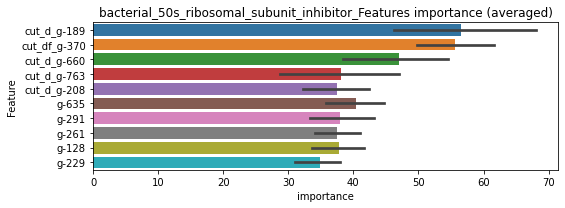

len(train_index) : 3871
len(valid_index) : 3871
================================= fold 1/2 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274412	valid_1's binary_logloss: 0.065398
[200]	training's binary_logloss: 0.00594032	valid_1's binary_logloss: 0.0449273
[300]	training's binary_logloss: 0.00187077	valid_1's binary_logloss: 0.0420313
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00132017	valid_1's binary_logloss: 0.0417226


len(train_index) : 3871
len(valid_index) : 3871
================================= fold 2/2 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030037	valid_1's binary_logloss: 0.0646576
[200]	training's binary_logloss: 0.00669599	valid_1's binary_logloss: 0.0419834
[300]	training's binary_logloss: 0.00213062	valid_1's binary_logloss: 0.0369614
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00124285	valid_1's binary_logloss: 0.0359576


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.03884008519058079


neg labels: 3289 → selected neg labels: 3283


bacterial_antifolate, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0333216	valid_1's binary_logloss: 0.0556723
[200]	training's binary_logloss: 0.0049646	valid_1's binary_logloss: 0.0186752
[300]	training's binary_logloss: 0.00145939	valid_1's binary_logloss: 0.0116973
[400]	training's binary_logloss: 0.000723771	valid_1's binary_logloss: 0.00956914
[500]	training's binary_logloss: 0.000493992	valid_1's binary_logloss: 0.00871118
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000465982	valid_1's binary_logloss: 0.00864263
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0338176	valid_1's binary_logloss: 0.0549711
[200]	training's binary_logloss: 0.00524098	valid_1's binary_logloss: 0.0189931
[300]	training's binary_logloss: 0.00159469	valid_1's binary_logloss: 0.0124245
[400]	training's binary_logloss: 0.00076031	valid_1's binary_logloss: 0.0102312
Early stopping, best iteration is:
[444]

1 / 3 AUC score:1.000
y_Threshold: 0.0035144, Threshold: 0.0055699, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00501, conf_1:0.00613
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0055699
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0155699
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_3: 0.0255699
threshold: 0.0255699, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325343	valid_1's binary_logloss: 0.0528193
[200]	training's binary_logloss: 0.00466484	valid_1's binary_logloss: 0.0169544
[300]	training's binary_logloss: 0.00138488	valid_1's binary_logloss: 0.0100725
[400]	training's binary_logloss: 0.000696717	valid_1's binary_logloss: 0.0081945
[500]	training's binary_logloss: 0.000483917	valid_1's binary_logloss: 0.00738783
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000471149	valid_1's binary_logloss: 0.00735219
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344406	valid_1's binary_logloss: 0.0540058
[200]	training's binary_logloss: 0.00520536	valid_1's binary_logloss: 0.0163616
[300]	training's binary_logloss: 0.00154575	valid_1's binary_logloss: 0.0101712
[400]	training's binary_logloss: 0.000747999	valid_1's binary_logloss: 0.00812392
Early stopping, best iteration is:
[46

2 / 3 AUC score:1.000
y_Threshold: 0.0528379, Threshold: 0.0255699, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0070316 Vs.target_rate: 0.00151
Num_p_label: 28.0, conf_0:0.02301, conf_1:0.02813
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0255699
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.0355699
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.0455699
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_4: 0.0555699
threshold: 0.0555699, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325343	valid_1's binary_logloss: 0.0528193
[200]	training's binary_logloss: 0.00466484	valid_1's binary_logloss: 0.0169544
[300]	training's binary_logloss: 0.00138488	valid_1's binary_logloss: 0.0100725
[400]	training's binary_logloss: 0.000696717	valid_1's binary_logloss: 0.0081945
[500]	training's binary_logloss: 0.000483917	valid_1's binary_logloss: 0.00738783
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000471149	valid_1's binary_logloss: 0.00735219
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344406	valid_1's binary_logloss: 0.0540058
[200]	training's binary_logloss: 0.00520536	valid_1's binary_logloss: 0.0163616
[300]	training's binary_logloss: 0.00154575	valid_1's binary_logloss: 0.0101712
[400]	training's binary_logloss: 0.000747999	valid_1's binary_logloss: 0.00812392
Early stopping, best iteration is:
[46

3 / 3 AUC score:1.000
y_Threshold: 0.0528379, Threshold: 0.0555699, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.05001, conf_1:0.06113
threshold: 0.0555699, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 666.0/7789, y_label_rate: 0.0855052


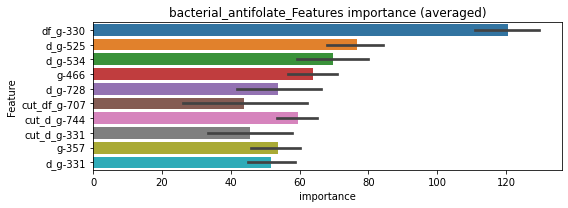

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 bacterial_antifolate=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190916	valid_1's binary_logloss: 0.0335802
[200]	training's binary_logloss: 0.00281804	valid_1's binary_logloss: 0.0145727
[300]	training's binary_logloss: 0.00079116	valid_1's binary_logloss: 0.011963
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000492931	valid_1's binary_logloss: 0.0117017


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 bacterial_antifolate=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190201	valid_1's binary_logloss: 0.0302603
[200]	training's binary_logloss: 0.00290709	valid_1's binary_logloss: 0.010963
[300]	training's binary_logloss: 0.000834174	valid_1's binary_logloss: 0.00761952
[400]	training's binary_logloss: 0.000404404	valid_1's binary_logloss: 0.00691567
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000423522	valid_1's binary_logloss: 0.00689917


bacterial_antifolate logloss: 0.009300721455269695


neg labels: 3289 → selected neg labels: 3259


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3259, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.083784	valid_1's binary_logloss: 0.215574
[200]	training's binary_logloss: 0.0274037	valid_1's binary_logloss: 0.185131
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0217069	valid_1's binary_logloss: 0.182724
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0936741	valid_1's binary_logloss: 0.20353
[200]	training's binary_logloss: 0.0316037	valid_1's binary_logloss: 0.171237
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0221218	valid_1's binary_logloss: 0.168066


1 / 3 AUC score:0.952
y_Threshold: 0.0596792, Threshold: 0.0738510, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 295 → Positive_corect_labels: 569/3615
p_label_rate: 0.0200904 Vs.target_rate: 0.00806
Num_p_label: 80.0, conf_0:0.06647, conf_1:0.08124
threshold: 0.0738510, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 569.0/3615, y_label_rate: 0.1573997
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0653329	valid_1's binary_logloss: 0.168648
[200]	training's binary_logloss: 0.0189368	valid_1's binary_logloss: 0.132776
[300]	training's binary_logloss: 0.0065868	valid_1's binary_logloss: 0.126121
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00534466	valid_1's binary_logloss: 0.125532
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0702565	valid_1's binary_logloss: 0.164819
[200]	training's binary_logloss: 0.0203276	valid_1's binary_logloss: 0.132288
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.011791	valid_1's binary_logloss: 0.129515


2 / 3 AUC score:0.983
y_Threshold: 0.0523569, Threshold: 0.0738510, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 92 → Positive_corect_labels: 523.0/3523
p_label_rate: 0.0045203 Vs.target_rate: 0.00806
Num_p_label: 18.0, conf_0:0.06647, conf_1:0.08124
threshold: 0.0738510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 523.0/3523, y_label_rate: 0.1484530
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0550581	valid_1's binary_logloss: 0.134533
[200]	training's binary_logloss: 0.0146243	valid_1's binary_logloss: 0.0988739
[300]	training's binary_logloss: 0.00506781	valid_1's binary_logloss: 0.0898202
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0034947	valid_1's binary_logloss: 0.0879133
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0589704	valid_1's binary_logloss: 0.130941
[200]	training's binary_logloss: 0.0154427	valid_1's binary_logloss: 0.0925829
[300]	training's binary_logloss: 0.00543471	valid_1's binary_logloss: 0.0820938
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00372909	valid_1's binary_logloss: 0.080072


3 / 3 AUC score:0.995
y_Threshold: 0.0353150, Threshold: 0.0738510, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 32 → Positive_corect_labels: 507.0/3491
p_label_rate: 0.0005023 Vs.target_rate: 0.00806
Num_p_label: 2.0, conf_0:0.06647, conf_1:0.08124
Num_p_label: 2.0, Expected: 32.1, Adj_threshold_1: 0.0738510
Num_p_label: 5.0, Expected: 32.1, Adj_threshold_2: 0.0638510
Num_p_label: 9.0, Expected: 32.1, Adj_threshold_3: 0.0538510
Num_p_label: 19.0, Expected: 32.1, Adj_threshold_4: 0.0438510
threshold: 0.0438510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 526.0/7473, y_label_rate: 0.0703867


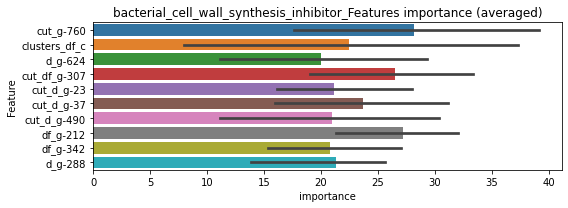

len(train_index) : 3736
len(valid_index) : 3737
================================= fold 1/2 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296598	valid_1's binary_logloss: 0.0794486
[200]	training's binary_logloss: 0.00740862	valid_1's binary_logloss: 0.0638288
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00318148	valid_1's binary_logloss: 0.0613337


len(train_index) : 3737
len(valid_index) : 3736
================================= fold 2/2 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307901	valid_1's binary_logloss: 0.0825535
[200]	training's binary_logloss: 0.00784689	valid_1's binary_logloss: 0.0640717
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00459415	valid_1's binary_logloss: 0.0620724


bacterial_cell_wall_synthesis_inhibitor logloss: 0.06170302306294809


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0522894	valid_1's binary_logloss: 0.11679
[200]	training's binary_logloss: 0.0120105	valid_1's binary_logloss: 0.0767111
[300]	training's binary_logloss: 0.00384934	valid_1's binary_logloss: 0.0680307
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00248529	valid_1's binary_logloss: 0.0661041
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0583422	valid_1's binary_logloss: 0.112658
[200]	training's binary_logloss: 0.0137985	valid_1's binary_logloss: 0.0661805
[300]	training's binary_logloss: 0.00460868	valid_1's binary_logloss: 0.05575
[400]	training's binary_logloss: 0.0020712	valid_1's binary_logloss: 0.0529878
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00217768	valid_1's binary_logloss: 0.0528926


1 / 3 AUC score:0.994
y_Threshold: 0.0143376, Threshold: 0.0167532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 156 → Positive_corect_labels: 642/3772
p_label_rate: 0.0200904 Vs.target_rate: 0.00374
Num_p_label: 80.0, conf_0:0.01508, conf_1:0.01843
Num_p_label: 80.0, Expected: 14.9, Adj_threshold_1: 0.0167532
Num_p_label: 32.0, Expected: 14.9, Adj_threshold_2: 0.0267532
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_3: 0.0367532
threshold: 0.0367532, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0491498	valid_1's binary_logloss: 0.117265
[200]	training's binary_logloss: 0.0107535	valid_1's binary_logloss: 0.0754775
[300]	training's binary_logloss: 0.00344422	valid_1's binary_logloss: 0.0659641
[400]	training's binary_logloss: 0.00160665	valid_1's binary_logloss: 0.0628998
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00113461	valid_1's binary_logloss: 0.0619104
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0560231	valid_1's binary_logloss: 0.103783
[200]	training's binary_logloss: 0.0129836	valid_1's binary_logloss: 0.0556048
[300]	training's binary_logloss: 0.00416158	valid_1's binary_logloss: 0.0439595
[400]	training's binary_logloss: 0.00192649	valid_1's binary_logloss: 0.0404001
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00154085	valid_1's binary_logloss: 0.0397165


2 / 3 AUC score:0.998
y_Threshold: 0.0270702, Threshold: 0.0367532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0055249 Vs.target_rate: 0.00374
Num_p_label: 22.0, conf_0:0.03308, conf_1:0.04043
threshold: 0.0367532, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0497922	valid_1's binary_logloss: 0.11624
[200]	training's binary_logloss: 0.0106888	valid_1's binary_logloss: 0.0751311
[300]	training's binary_logloss: 0.00340348	valid_1's binary_logloss: 0.0643857
[400]	training's binary_logloss: 0.00160684	valid_1's binary_logloss: 0.0605829
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00126195	valid_1's binary_logloss: 0.0594562
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0517462	valid_1's binary_logloss: 0.0968726
[200]	training's binary_logloss: 0.0116461	valid_1's binary_logloss: 0.0501902
[300]	training's binary_logloss: 0.00380596	valid_1's binary_logloss: 0.0363627
[400]	training's binary_logloss: 0.00180303	valid_1's binary_logloss: 0.0321068
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00173616	valid_1's binary_logloss: 0.0319965


3 / 3 AUC score:0.999
y_Threshold: 0.0365424, Threshold: 0.0367532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 629.0/3746
p_label_rate: 0.0062783 Vs.target_rate: 0.00374
Num_p_label: 25.0, conf_0:0.03308, conf_1:0.04043
threshold: 0.0367532, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 654.0/7728, y_label_rate: 0.0846273


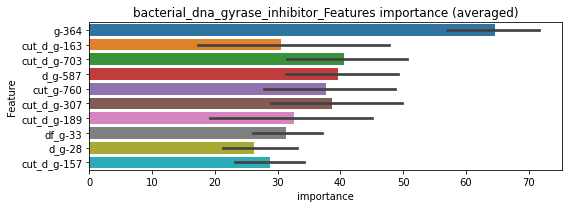

len(train_index) : 3864
len(valid_index) : 3864
================================= fold 1/2 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282012	valid_1's binary_logloss: 0.0655978
[200]	training's binary_logloss: 0.00628529	valid_1's binary_logloss: 0.045139
[300]	training's binary_logloss: 0.00201035	valid_1's binary_logloss: 0.0408319
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00119333	valid_1's binary_logloss: 0.0398304


len(train_index) : 3864
len(valid_index) : 3864
================================= fold 2/2 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291605	valid_1's binary_logloss: 0.0676332
[200]	training's binary_logloss: 0.00654088	valid_1's binary_logloss: 0.0464594
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00256925	valid_1's binary_logloss: 0.0425441


bacterial_dna_gyrase_inhibitor logloss: 0.04118728666102479


neg labels: 3289 → selected neg labels: 3271


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3271, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0617726	valid_1's binary_logloss: 0.152951
[200]	training's binary_logloss: 0.0162227	valid_1's binary_logloss: 0.110828
[300]	training's binary_logloss: 0.00545487	valid_1's binary_logloss: 0.0987317
[400]	training's binary_logloss: 0.00242941	valid_1's binary_logloss: 0.0952269
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00256156	valid_1's binary_logloss: 0.0948827
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.068179	valid_1's binary_logloss: 0.141256
[200]	training's binary_logloss: 0.0194272	valid_1's binary_logloss: 0.091041
[300]	training's binary_logloss: 0.00656792	valid_1's binary_logloss: 0.0762508
[400]	training's binary_logloss: 0.00288813	valid_1's binary_logloss: 0.0702832
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00219492	valid_1's binary_logloss: 0.069043


1 / 3 AUC score:0.993
y_Threshold: 0.0155155, Threshold: 0.0214167, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 167 → Positive_corect_labels: 636/3758
p_label_rate: 0.0200904 Vs.target_rate: 0.00483
Num_p_label: 80.0, conf_0:0.01928, conf_1:0.02356
Num_p_label: 80.0, Expected: 19.2, Adj_threshold_1: 0.0214167
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_2: 0.0314167
Num_p_label: 25.0, Expected: 19.2, Adj_threshold_3: 0.0414167
threshold: 0.0414167, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 636.0/3758, y_label_rate: 0.1692390
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0649813	valid_1's binary_logloss: 0.137435
[200]	training's binary_logloss: 0.0162809	valid_1's binary_logloss: 0.0913506
[300]	training's binary_logloss: 0.00533857	valid_1's binary_logloss: 0.0790436
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00362249	valid_1's binary_logloss: 0.0766994
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0607338	valid_1's binary_logloss: 0.135201
[200]	training's binary_logloss: 0.0151697	valid_1's binary_logloss: 0.088424
[300]	training's binary_logloss: 0.00503606	valid_1's binary_logloss: 0.0759165
[400]	training's binary_logloss: 0.00229632	valid_1's binary_logloss: 0.0711413
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00177877	valid_1's binary_logloss: 0.0700539


2 / 3 AUC score:0.997
y_Threshold: 0.0397510, Threshold: 0.0414167, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 618.0/3722
p_label_rate: 0.0118031 Vs.target_rate: 0.00483
Num_p_label: 47.0, conf_0:0.03728, conf_1:0.04556
threshold: 0.0414167, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 618.0/3722, y_label_rate: 0.1660398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0612126	valid_1's binary_logloss: 0.121684
[200]	training's binary_logloss: 0.0148823	valid_1's binary_logloss: 0.0731291
[300]	training's binary_logloss: 0.00485605	valid_1's binary_logloss: 0.0596113
[400]	training's binary_logloss: 0.00219231	valid_1's binary_logloss: 0.0553489
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00188802	valid_1's binary_logloss: 0.0548782
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0623949	valid_1's binary_logloss: 0.124923
[200]	training's binary_logloss: 0.0154061	valid_1's binary_logloss: 0.0753618
[300]	training's binary_logloss: 0.00500114	valid_1's binary_logloss: 0.0615801
[400]	training's binary_logloss: 0.00226556	valid_1's binary_logloss: 0.057547
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00141741	valid_1's binary_logloss: 0.0558533


3 / 3 AUC score:0.999
y_Threshold: 0.0335679, Threshold: 0.0414167, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 603.0/3692
p_label_rate: 0.0065294 Vs.target_rate: 0.00483
Num_p_label: 26.0, conf_0:0.03728, conf_1:0.04556
threshold: 0.0414167, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 629.0/7674, y_label_rate: 0.0819651


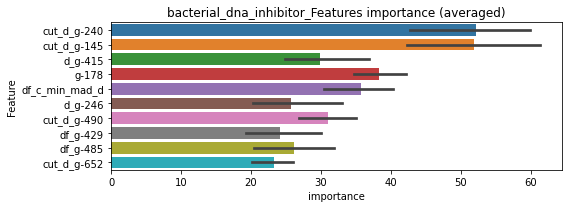

len(train_index) : 3837
len(valid_index) : 3837
================================= fold 1/2 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327932	valid_1's binary_logloss: 0.0805352
[200]	training's binary_logloss: 0.00777769	valid_1's binary_logloss: 0.0557327
[300]	training's binary_logloss: 0.00249982	valid_1's binary_logloss: 0.0519204
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00212597	valid_1's binary_logloss: 0.0514104


len(train_index) : 3837
len(valid_index) : 3837
================================= fold 2/2 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0332357	valid_1's binary_logloss: 0.0714915
[200]	training's binary_logloss: 0.00814513	valid_1's binary_logloss: 0.0479216
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00373746	valid_1's binary_logloss: 0.0441248


bacterial_dna_inhibitor logloss: 0.04776760906677217


neg labels: 3289 → selected neg labels: 3285


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237274	valid_1's binary_logloss: 0.0366199
[200]	training's binary_logloss: 0.0028286	valid_1's binary_logloss: 0.0115143
[300]	training's binary_logloss: 0.000807918	valid_1's binary_logloss: 0.00782707
[400]	training's binary_logloss: 0.000432754	valid_1's binary_logloss: 0.00664211
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000366654	valid_1's binary_logloss: 0.00637244
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247291	valid_1's binary_logloss: 0.0309604
[200]	training's binary_logloss: 0.00302172	valid_1's binary_logloss: 0.00503741
[300]	training's binary_logloss: 0.000862108	valid_1's binary_logloss: 0.0018304
[400]	training's binary_logloss: 0.000447539	valid_1's binary_logloss: 0.00115601
[500]	training's binary_logloss: 0.000365417	valid_1's binary_logloss: 0.00101257
Early stopping, best iteration is:

1 / 3 AUC score:1.000
y_Threshold: 0.0015608, Threshold: 0.0038050, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00342, conf_1:0.00419
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0038050
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_2: 0.0138050
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_3: 0.0238050
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_4: 0.0338050
threshold: 0.0338050, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237979	valid_1's binary_logloss: 0.0352827
[200]	training's binary_logloss: 0.00278602	valid_1's binary_logloss: 0.0107203
[300]	training's binary_logloss: 0.000784415	valid_1's binary_logloss: 0.00733469
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000623717	valid_1's binary_logloss: 0.00683614
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247234	valid_1's binary_logloss: 0.0300963
[200]	training's binary_logloss: 0.00295964	valid_1's binary_logloss: 0.00438966
[300]	training's binary_logloss: 0.000833121	valid_1's binary_logloss: 0.0014561
[400]	training's binary_logloss: 0.000433394	valid_1's binary_logloss: 0.000833838
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000353497	valid_1's binary_logloss: 0.000706711


2 / 3 AUC score:1.000
y_Threshold: 0.0189916, Threshold: 0.0338050, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.03042, conf_1:0.03719
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0338050
Num_p_label: 31.0, Expected: 3.2, Adj_threshold_2: 0.0438050
Num_p_label: 22.0, Expected: 3.2, Adj_threshold_3: 0.0538050
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_4: 0.0638050
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_5: 0.0738050
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_6: 0.0838050
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_7: 0.0938050
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_8: 0.1038050
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.1138050
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.1238050
threshold: 0.1338050, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=============

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237979	valid_1's binary_logloss: 0.0352827
[200]	training's binary_logloss: 0.00278602	valid_1's binary_logloss: 0.0107203
[300]	training's binary_logloss: 0.000784415	valid_1's binary_logloss: 0.00733469
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000623717	valid_1's binary_logloss: 0.00683614
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247234	valid_1's binary_logloss: 0.0300963
[200]	training's binary_logloss: 0.00295964	valid_1's binary_logloss: 0.00438966
[300]	training's binary_logloss: 0.000833121	valid_1's binary_logloss: 0.0014561
[400]	training's binary_logloss: 0.000433394	valid_1's binary_logloss: 0.000833838
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000353497	valid_1's binary_logloss: 0.000706711


3 / 3 AUC score:1.000
y_Threshold: 0.0189916, Threshold: 0.1338050, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, conf_0:0.12042, conf_1:0.14719
threshold: 0.1338050, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7792, y_label_rate: 0.0850873


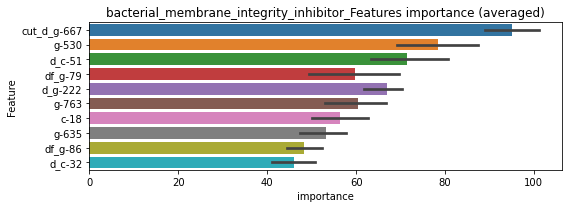

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121271	valid_1's binary_logloss: 0.0200118
[200]	training's binary_logloss: 0.00141312	valid_1's binary_logloss: 0.00768642
[300]	training's binary_logloss: 0.00039515	valid_1's binary_logloss: 0.00657172
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000318925	valid_1's binary_logloss: 0.00645816


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0129669	valid_1's binary_logloss: 0.0175196
[200]	training's binary_logloss: 0.00160591	valid_1's binary_logloss: 0.00406927
[300]	training's binary_logloss: 0.000464693	valid_1's binary_logloss: 0.00249453
[400]	training's binary_logloss: 0.000241253	valid_1's binary_logloss: 0.00206228
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000194346	valid_1's binary_logloss: 0.00198084


bacterial_membrane_integrity_inhibitor logloss: 0.004219497553640149


neg labels: 3289 → selected neg labels: 3283


bcl_inhibitor, len(trt): 31, len(othr): 3283, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289175	valid_1's binary_logloss: 0.0461182
[200]	training's binary_logloss: 0.00403789	valid_1's binary_logloss: 0.0134534
[300]	training's binary_logloss: 0.00118333	valid_1's binary_logloss: 0.00742694
[400]	training's binary_logloss: 0.000600252	valid_1's binary_logloss: 0.0055485
[500]	training's binary_logloss: 0.00043582	valid_1's binary_logloss: 0.00493613
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000425112	valid_1's binary_logloss: 0.00489944
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.029503	valid_1's binary_logloss: 0.0480291
[200]	training's binary_logloss: 0.00410036	valid_1's binary_logloss: 0.0151113
[300]	training's binary_logloss: 0.001202	valid_1's binary_logloss: 0.00923287
[400]	training's binary_logloss: 0.000605496	valid_1's binary_logloss: 0.00734958
[500]	training's binary_logloss: 0.00043

1 / 3 AUC score:1.000
y_Threshold: 0.0029731, Threshold: 0.0880314, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.07923, conf_1:0.09683
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0880314
Num_p_label: 74.0, Expected: 5.2, Adj_threshold_2: 0.0980314
Num_p_label: 70.0, Expected: 5.2, Adj_threshold_3: 0.1080314
Num_p_label: 67.0, Expected: 5.2, Adj_threshold_4: 0.1180314
Num_p_label: 62.0, Expected: 5.2, Adj_threshold_5: 0.1280314
Num_p_label: 59.0, Expected: 5.2, Adj_threshold_6: 0.1380314
Num_p_label: 58.0, Expected: 5.2, Adj_threshold_7: 0.1480314
Num_p_label: 57.0, Expected: 5.2, Adj_threshold_8: 0.1580314
Num_p_label: 56.0, Expected: 5.2, Adj_threshold_9: 0.1680314
Num_p_label: 56.0, Expected: 5.2, Adj_threshold_10: 0.1780314
threshold: 0.1880314, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280356	valid_1's binary_logloss: 0.0427026
[200]	training's binary_logloss: 0.00374478	valid_1's binary_logloss: 0.0107781
[300]	training's binary_logloss: 0.00107156	valid_1's binary_logloss: 0.00539176
[400]	training's binary_logloss: 0.000550896	valid_1's binary_logloss: 0.00394605
[500]	training's binary_logloss: 0.000412327	valid_1's binary_logloss: 0.00354165
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000405223	valid_1's binary_logloss: 0.00351315
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283681	valid_1's binary_logloss: 0.0430456
[200]	training's binary_logloss: 0.00374842	valid_1's binary_logloss: 0.0112493
[300]	training's binary_logloss: 0.00107071	valid_1's binary_logloss: 0.005978
[400]	training's binary_logloss: 0.000546323	valid_1's binary_logloss: 0.0043541
[500]	training's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.2313241, Threshold: 0.1880314, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0349071 Vs.target_rate: 0.00130
Num_p_label: 139.0, conf_0:0.16923, conf_1:0.20683
Num_p_label: 139.0, Expected: 5.2, Adj_threshold_1: 0.1880314
Num_p_label: 136.0, Expected: 5.2, Adj_threshold_2: 0.1980314
Num_p_label: 134.0, Expected: 5.2, Adj_threshold_3: 0.2080314
Num_p_label: 133.0, Expected: 5.2, Adj_threshold_4: 0.2180314
Num_p_label: 133.0, Expected: 5.2, Adj_threshold_5: 0.2280314
Num_p_label: 131.0, Expected: 5.2, Adj_threshold_6: 0.2380314
Num_p_label: 129.0, Expected: 5.2, Adj_threshold_7: 0.2480314
Num_p_label: 128.0, Expected: 5.2, Adj_threshold_8: 0.2580314
Num_p_label: 127.0, Expected: 5.2, Adj_threshold_9: 0.2680314
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_10: 0.2780314
threshold: 0.2880314, positive_p_label: 124.0/3982, p_label_rate: 0.0311401
positive_y_label: 655.0/3805, y_label_rate: 0.17214

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281131	valid_1's binary_logloss: 0.0388556
[200]	training's binary_logloss: 0.00377284	valid_1's binary_logloss: 0.00821993
[300]	training's binary_logloss: 0.00108289	valid_1's binary_logloss: 0.00362172
[400]	training's binary_logloss: 0.000554253	valid_1's binary_logloss: 0.00249787
[500]	training's binary_logloss: 0.000413906	valid_1's binary_logloss: 0.00214184
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000407334	valid_1's binary_logloss: 0.00212679
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.028141	valid_1's binary_logloss: 0.0413625
[200]	training's binary_logloss: 0.00378491	valid_1's binary_logloss: 0.00937802
[300]	training's binary_logloss: 0.00108086	valid_1's binary_logloss: 0.00418777
[400]	training's binary_logloss: 0.000550352	valid_1's binary_logloss: 0.00287554
[500]	training's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.1658207, Threshold: 0.2880314, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0316424 Vs.target_rate: 0.00130
Num_p_label: 126.0, conf_0:0.25923, conf_1:0.31683
Num_p_label: 126.0, Expected: 5.2, Adj_threshold_1: 0.2880314
Num_p_label: 126.0, Expected: 5.2, Adj_threshold_2: 0.2980314
Num_p_label: 126.0, Expected: 5.2, Adj_threshold_3: 0.3080314
Num_p_label: 125.0, Expected: 5.2, Adj_threshold_4: 0.3180314
Num_p_label: 125.0, Expected: 5.2, Adj_threshold_5: 0.3280314
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_6: 0.3380314
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_7: 0.3480314
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_8: 0.3580314
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_9: 0.3680314
Num_p_label: 123.0, Expected: 5.2, Adj_threshold_10: 0.3780314
threshold: 0.3880314, positive_p_label: 123.0/3982, p_label_rate: 0.0308890
positive_y_label: 778.0/7787, y_label_rate: 0.09991

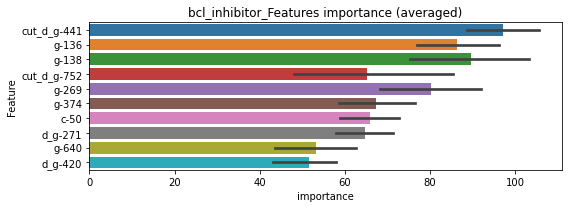

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 bcl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179522	valid_1's binary_logloss: 0.0272237
[200]	training's binary_logloss: 0.0025647	valid_1's binary_logloss: 0.00956881
[300]	training's binary_logloss: 0.000754271	valid_1's binary_logloss: 0.0065712
[400]	training's binary_logloss: 0.000380325	valid_1's binary_logloss: 0.00557729
[500]	training's binary_logloss: 0.000268302	valid_1's binary_logloss: 0.00528174
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000257837	valid_1's binary_logloss: 0.00526374


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 bcl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168304	valid_1's binary_logloss: 0.0291999
[200]	training's binary_logloss: 0.00230907	valid_1's binary_logloss: 0.011605
[300]	training's binary_logloss: 0.000671209	valid_1's binary_logloss: 0.00855848
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000596651	valid_1's binary_logloss: 0.00844336


bcl_inhibitor logloss: 0.006855914747843253


neg labels: 3289 → selected neg labels: 3283


bcr-abl_inhibitor, len(trt): 38, len(othr): 3283, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330085	valid_1's binary_logloss: 0.051328
[200]	training's binary_logloss: 0.00517948	valid_1's binary_logloss: 0.0167182
[300]	training's binary_logloss: 0.00152604	valid_1's binary_logloss: 0.0108764
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0011691	valid_1's binary_logloss: 0.0100425
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0320611	valid_1's binary_logloss: 0.0515898
[200]	training's binary_logloss: 0.00489084	valid_1's binary_logloss: 0.0184506
[300]	training's binary_logloss: 0.00145655	valid_1's binary_logloss: 0.0121434
[400]	training's binary_logloss: 0.000729515	valid_1's binary_logloss: 0.0100631
[500]	training's binary_logloss: 0.00050689	valid_1's binary_logloss: 0.00942055
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00048563	valid_1's binary_logloss: 0.00929607


1 / 3 AUC score:1.000
y_Threshold: 0.0052958, Threshold: 0.0104094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00160
Num_p_label: 80.0, conf_0:0.00937, conf_1:0.01145
Num_p_label: 80.0, Expected: 6.4, Adj_threshold_1: 0.0104094
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_2: 0.0204094
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_3: 0.0304094
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_4: 0.0404094
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_5: 0.0504094
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_6: 0.0604094
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_7: 0.0704094
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_8: 0.0804094
threshold: 0.0804094, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322802	valid_1's binary_logloss: 0.0487379
[200]	training's binary_logloss: 0.00496956	valid_1's binary_logloss: 0.0153129
[300]	training's binary_logloss: 0.00147225	valid_1's binary_logloss: 0.0095484
[400]	training's binary_logloss: 0.000724987	valid_1's binary_logloss: 0.00772508
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000540499	valid_1's binary_logloss: 0.00722887
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317909	valid_1's binary_logloss: 0.0513782
[200]	training's binary_logloss: 0.00470784	valid_1's binary_logloss: 0.0189428
[300]	training's binary_logloss: 0.00139735	valid_1's binary_logloss: 0.0129309
[400]	training's binary_logloss: 0.000702335	valid_1's binary_logloss: 0.0110551
[500]	training's binary_logloss: 0.000492771	valid_1's binary_logloss: 0.0102726
Early stopping, best iteration is:
[518

2 / 3 AUC score:1.000
y_Threshold: 0.0693991, Threshold: 0.0804094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0080362 Vs.target_rate: 0.00160
Num_p_label: 32.0, conf_0:0.07237, conf_1:0.08845
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_1: 0.0804094
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_2: 0.0904094
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_3: 0.1004094
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_4: 0.1104094
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_5: 0.1204094
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_6: 0.1304094
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_7: 0.1404094
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_8: 0.1504094
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_9: 0.1604094
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_10: 0.1704094
threshold: 0.1804094, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323162	valid_1's binary_logloss: 0.0496195
[200]	training's binary_logloss: 0.00493009	valid_1's binary_logloss: 0.0160764
[300]	training's binary_logloss: 0.00145614	valid_1's binary_logloss: 0.00926387
[400]	training's binary_logloss: 0.000717057	valid_1's binary_logloss: 0.00679754
[500]	training's binary_logloss: 0.000495457	valid_1's binary_logloss: 0.00598495
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000467026	valid_1's binary_logloss: 0.00586401
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0311259	valid_1's binary_logloss: 0.0496448
[200]	training's binary_logloss: 0.00469328	valid_1's binary_logloss: 0.0168953
[300]	training's binary_logloss: 0.00139145	valid_1's binary_logloss: 0.010561
[400]	training's binary_logloss: 0.000701289	valid_1's binary_logloss: 0.00869749
Early stopping, best iteration is:
[4

3 / 3 AUC score:1.000
y_Threshold: 0.0458960, Threshold: 0.1804094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00160
Num_p_label: 16.0, conf_0:0.16237, conf_1:0.19845
threshold: 0.1804094, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 670.0/7785, y_label_rate: 0.0860629


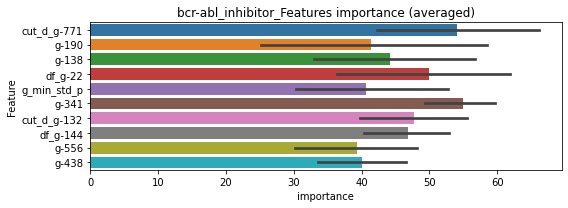

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0170152	valid_1's binary_logloss: 0.0337302
[200]	training's binary_logloss: 0.00251413	valid_1's binary_logloss: 0.0161677
[300]	training's binary_logloss: 0.000724721	valid_1's binary_logloss: 0.0136121
[400]	training's binary_logloss: 0.000360188	valid_1's binary_logloss: 0.0127948
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000294103	valid_1's binary_logloss: 0.0125049


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167714	valid_1's binary_logloss: 0.0289606
[200]	training's binary_logloss: 0.00255663	valid_1's binary_logloss: 0.012033
[300]	training's binary_logloss: 0.000764205	valid_1's binary_logloss: 0.0095051
[400]	training's binary_logloss: 0.000381793	valid_1's binary_logloss: 0.00858365
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000303306	valid_1's binary_logloss: 0.00838434


bcr-abl_inhibitor logloss: 0.010444888065379377


neg labels: 3289 → selected neg labels: 3277


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3277, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0502921	valid_1's binary_logloss: 0.0966797
[200]	training's binary_logloss: 0.0106959	valid_1's binary_logloss: 0.0514976
[300]	training's binary_logloss: 0.00321105	valid_1's binary_logloss: 0.0399147
[400]	training's binary_logloss: 0.00145907	valid_1's binary_logloss: 0.0367739
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00128612	valid_1's binary_logloss: 0.0362934
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511417	valid_1's binary_logloss: 0.0990212
[200]	training's binary_logloss: 0.0105727	valid_1's binary_logloss: 0.0462766
[300]	training's binary_logloss: 0.00318678	valid_1's binary_logloss: 0.031404
[400]	training's binary_logloss: 0.00148117	valid_1's binary_logloss: 0.0269408
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.0010098	valid_1's binary_logloss: 0.0250773


1 / 3 AUC score:0.999
y_Threshold: 0.0081529, Threshold: 0.0105855, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00281
Num_p_label: 80.0, conf_0:0.00953, conf_1:0.01164
Num_p_label: 80.0, Expected: 11.2, Adj_threshold_1: 0.0105855
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_2: 0.0205855
threshold: 0.0205855, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0491485	valid_1's binary_logloss: 0.0897574
[200]	training's binary_logloss: 0.00978036	valid_1's binary_logloss: 0.0431725
[300]	training's binary_logloss: 0.00295472	valid_1's binary_logloss: 0.0329006
[400]	training's binary_logloss: 0.001372	valid_1's binary_logloss: 0.0300396
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00119221	valid_1's binary_logloss: 0.0296012
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.051547	valid_1's binary_logloss: 0.0857438
[200]	training's binary_logloss: 0.0104434	valid_1's binary_logloss: 0.0399015
[300]	training's binary_logloss: 0.00316942	valid_1's binary_logloss: 0.0300707
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00165862	valid_1's binary_logloss: 0.0270227


2 / 3 AUC score:0.999
y_Threshold: 0.0338971, Threshold: 0.0205855, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0158212 Vs.target_rate: 0.00281
Num_p_label: 63.0, conf_0:0.01853, conf_1:0.02264
Num_p_label: 63.0, Expected: 11.2, Adj_threshold_1: 0.0205855
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_2: 0.0305855
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_3: 0.0405855
threshold: 0.0405855, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474641	valid_1's binary_logloss: 0.0989861
[200]	training's binary_logloss: 0.00934591	valid_1's binary_logloss: 0.0547701
[300]	training's binary_logloss: 0.00282884	valid_1's binary_logloss: 0.0439219
[400]	training's binary_logloss: 0.00132727	valid_1's binary_logloss: 0.0403658
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00133611	valid_1's binary_logloss: 0.0403411
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0500841	valid_1's binary_logloss: 0.0916729
[200]	training's binary_logloss: 0.00992474	valid_1's binary_logloss: 0.0462202
[300]	training's binary_logloss: 0.00301084	valid_1's binary_logloss: 0.0346969
[400]	training's binary_logloss: 0.00140889	valid_1's binary_logloss: 0.0299816
[500]	training's binary_logloss: 0.000873332	valid_1's binary_logloss: 0.0286208
Early stopping, best iteration is:
[560]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0283034, Threshold: 0.0405855, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 636.0/3762
p_label_rate: 0.0030136 Vs.target_rate: 0.00281
Num_p_label: 12.0, conf_0:0.03653, conf_1:0.04464
threshold: 0.0405855, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/7744, y_label_rate: 0.0836777


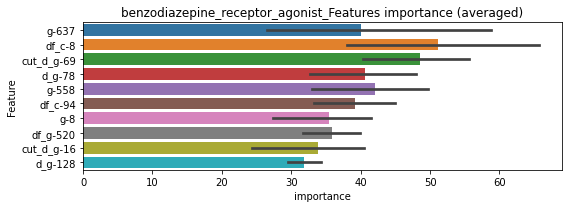

len(train_index) : 3872
len(valid_index) : 3872
================================= fold 1/2 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268711	valid_1's binary_logloss: 0.0525779
[200]	training's binary_logloss: 0.00511729	valid_1's binary_logloss: 0.0287231
[300]	training's binary_logloss: 0.00150986	valid_1's binary_logloss: 0.0240378
[400]	training's binary_logloss: 0.000692091	valid_1's binary_logloss: 0.0229384
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000597809	valid_1's binary_logloss: 0.0227255


len(train_index) : 3872
len(valid_index) : 3872
================================= fold 2/2 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271045	valid_1's binary_logloss: 0.0490677
[200]	training's binary_logloss: 0.00536772	valid_1's binary_logloss: 0.0241805
[300]	training's binary_logloss: 0.00161913	valid_1's binary_logloss: 0.0192239
[400]	training's binary_logloss: 0.000738197	valid_1's binary_logloss: 0.0175586
[500]	training's binary_logloss: 0.000454656	valid_1's binary_logloss: 0.0169415
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000435249	valid_1's binary_logloss: 0.0168294


benzodiazepine_receptor_agonist logloss: 0.01977747328102044


neg labels: 3289 → selected neg labels: 3285


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281257	valid_1's binary_logloss: 0.0454356
[200]	training's binary_logloss: 0.00382187	valid_1's binary_logloss: 0.0178381
[300]	training's binary_logloss: 0.00110063	valid_1's binary_logloss: 0.0128992
[400]	training's binary_logloss: 0.000574489	valid_1's binary_logloss: 0.0115537
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000446629	valid_1's binary_logloss: 0.0111694
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0287309	valid_1's binary_logloss: 0.0405293
[200]	training's binary_logloss: 0.0040584	valid_1's binary_logloss: 0.0106396
[300]	training's binary_logloss: 0.00117514	valid_1's binary_logloss: 0.00622497
[400]	training's binary_logloss: 0.000597812	valid_1's binary_logloss: 0.0051801
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000496836	valid_1's binary_logloss: 0.00495304


1 / 3 AUC score:1.000
y_Threshold: 0.0020146, Threshold: 0.0034186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00308, conf_1:0.00376
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0034186
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_2: 0.0134186
threshold: 0.0134186, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274533	valid_1's binary_logloss: 0.0458906
[200]	training's binary_logloss: 0.00366587	valid_1's binary_logloss: 0.0173063
[300]	training's binary_logloss: 0.00107229	valid_1's binary_logloss: 0.0128619
[400]	training's binary_logloss: 0.000560404	valid_1's binary_logloss: 0.0117589
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000434108	valid_1's binary_logloss: 0.0113063
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293137	valid_1's binary_logloss: 0.0394545
[200]	training's binary_logloss: 0.00406337	valid_1's binary_logloss: 0.00977236
[300]	training's binary_logloss: 0.00117655	valid_1's binary_logloss: 0.00563689
[400]	training's binary_logloss: 0.000601498	valid_1's binary_logloss: 0.00446491
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000512235	valid_1's binary_logloss: 0.0042845


2 / 3 AUC score:1.000
y_Threshold: 0.0098950, Threshold: 0.0134186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00101
Num_p_label: 17.0, conf_0:0.01208, conf_1:0.01476
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_1: 0.0134186
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_2: 0.0234186
threshold: 0.0234186, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269758	valid_1's binary_logloss: 0.0443376
[200]	training's binary_logloss: 0.00361216	valid_1's binary_logloss: 0.015245
[300]	training's binary_logloss: 0.00106684	valid_1's binary_logloss: 0.0106087
[400]	training's binary_logloss: 0.000551584	valid_1's binary_logloss: 0.0089946
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000425401	valid_1's binary_logloss: 0.00852931
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297938	valid_1's binary_logloss: 0.042832
[200]	training's binary_logloss: 0.00411795	valid_1's binary_logloss: 0.0094454
[300]	training's binary_logloss: 0.00120262	valid_1's binary_logloss: 0.00448019
[400]	training's binary_logloss: 0.000597754	valid_1's binary_logloss: 0.00317299
[500]	training's binary_logloss: 0.000440461	valid_1's binary_logloss: 0.00277953
Early stopping, best iteration is:
[564

3 / 3 AUC score:1.000
y_Threshold: 0.0245099, Threshold: 0.0234186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, conf_0:0.02108, conf_1:0.02576
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0234186
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0134186
threshold: 0.0134186, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 666.0/7790, y_label_rate: 0.0854942


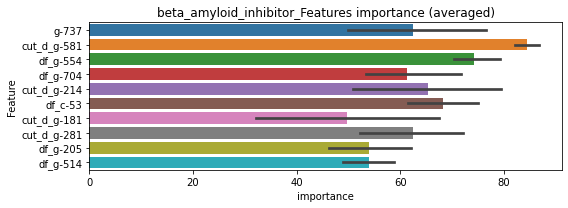

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156609	valid_1's binary_logloss: 0.0257913
[200]	training's binary_logloss: 0.00219291	valid_1's binary_logloss: 0.0118701
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00105445	valid_1's binary_logloss: 0.0110899


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171375	valid_1's binary_logloss: 0.0251275
[200]	training's binary_logloss: 0.00257622	valid_1's binary_logloss: 0.0085201
[300]	training's binary_logloss: 0.000725976	valid_1's binary_logloss: 0.00610845
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000416918	valid_1's binary_logloss: 0.00562155


beta_amyloid_inhibitor logloss: 0.008355701989605571


neg labels: 3289 → selected neg labels: 3276


bromodomain_inhibitor, len(trt): 68, len(othr): 3276, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376174	valid_1's binary_logloss: 0.0723805
[200]	training's binary_logloss: 0.00630033	valid_1's binary_logloss: 0.0389534
[300]	training's binary_logloss: 0.0018716	valid_1's binary_logloss: 0.0332458
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00139473	valid_1's binary_logloss: 0.0324314
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.037191	valid_1's binary_logloss: 0.0670108
[200]	training's binary_logloss: 0.00633141	valid_1's binary_logloss: 0.0284308
[300]	training's binary_logloss: 0.0018835	valid_1's binary_logloss: 0.0195789
[400]	training's binary_logloss: 0.000911663	valid_1's binary_logloss: 0.0166807
[500]	training's binary_logloss: 0.000595206	valid_1's binary_logloss: 0.0154756
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000561611	valid_1's binary_logloss: 0.0153692


1 / 3 AUC score:0.999
y_Threshold: 0.0051655, Threshold: 0.0077960, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3791
p_label_rate: 0.0200904 Vs.target_rate: 0.00286
Num_p_label: 80.0, conf_0:0.00702, conf_1:0.00858
Num_p_label: 80.0, Expected: 11.4, Adj_threshold_1: 0.0077960
Num_p_label: 20.0, Expected: 11.4, Adj_threshold_2: 0.0177960
threshold: 0.0177960, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3791, y_label_rate: 0.1717225
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0355102	valid_1's binary_logloss: 0.0840861
[200]	training's binary_logloss: 0.00562826	valid_1's binary_logloss: 0.0498746
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00196803	valid_1's binary_logloss: 0.0455198
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0359964	valid_1's binary_logloss: 0.0741119
[200]	training's binary_logloss: 0.00587518	valid_1's binary_logloss: 0.0379427
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00202122	valid_1's binary_logloss: 0.0326894


2 / 3 AUC score:0.999
y_Threshold: 0.0250203, Threshold: 0.0177960, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0210949 Vs.target_rate: 0.00286
Num_p_label: 84.0, conf_0:0.01602, conf_1:0.01958
Num_p_label: 84.0, Expected: 11.4, Adj_threshold_1: 0.0177960
Num_p_label: 33.0, Expected: 11.4, Adj_threshold_2: 0.0277960
Num_p_label: 22.0, Expected: 11.4, Adj_threshold_3: 0.0377960
threshold: 0.0377960, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0369826	valid_1's binary_logloss: 0.0616215
[200]	training's binary_logloss: 0.00598097	valid_1's binary_logloss: 0.0224354
[300]	training's binary_logloss: 0.00173746	valid_1's binary_logloss: 0.0146853
[400]	training's binary_logloss: 0.000857693	valid_1's binary_logloss: 0.0124628
[500]	training's binary_logloss: 0.000561704	valid_1's binary_logloss: 0.0117196
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000504726	valid_1's binary_logloss: 0.0115616
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.035753	valid_1's binary_logloss: 0.0655277
[200]	training's binary_logloss: 0.00578581	valid_1's binary_logloss: 0.0281508
[300]	training's binary_logloss: 0.00173077	valid_1's binary_logloss: 0.0200484
[400]	training's binary_logloss: 0.000853625	valid_1's binary_logloss: 0.0177681
Early stopping, best iteration is:
[480]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0205879, Threshold: 0.0377960, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0040181 Vs.target_rate: 0.00286
Num_p_label: 16.0, conf_0:0.03402, conf_1:0.04158
threshold: 0.0377960, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 659.0/7757, y_label_rate: 0.0849555


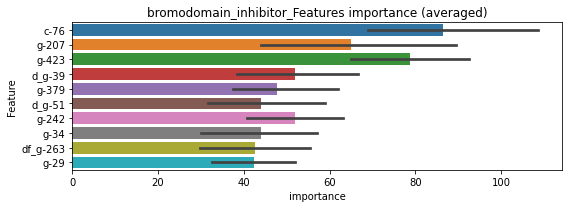

len(train_index) : 3878
len(valid_index) : 3879
================================= fold 1/2 bromodomain_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182178	valid_1's binary_logloss: 0.0369162
[200]	training's binary_logloss: 0.0029234	valid_1's binary_logloss: 0.0176771
[300]	training's binary_logloss: 0.000877554	valid_1's binary_logloss: 0.0144316
[400]	training's binary_logloss: 0.000429969	valid_1's binary_logloss: 0.0133162
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.0004162	valid_1's binary_logloss: 0.0132444


len(train_index) : 3879
len(valid_index) : 3878
================================= fold 2/2 bromodomain_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0187951	valid_1's binary_logloss: 0.041444
[200]	training's binary_logloss: 0.00309246	valid_1's binary_logloss: 0.0211259
[300]	training's binary_logloss: 0.000900414	valid_1's binary_logloss: 0.0167899
[400]	training's binary_logloss: 0.000437124	valid_1's binary_logloss: 0.0155574
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000342791	valid_1's binary_logloss: 0.0151706


bromodomain_inhibitor logloss: 0.014207337036632833


neg labels: 3289 → selected neg labels: 3284


btk_inhibitor, len(trt): 29, len(othr): 3284, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279147	valid_1's binary_logloss: 0.043445
[200]	training's binary_logloss: 0.00381643	valid_1's binary_logloss: 0.0117702
[300]	training's binary_logloss: 0.00113787	valid_1's binary_logloss: 0.00644703
[400]	training's binary_logloss: 0.000592462	valid_1's binary_logloss: 0.00485591
[500]	training's binary_logloss: 0.000427617	valid_1's binary_logloss: 0.0042638
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000417362	valid_1's binary_logloss: 0.0042525
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0278857	valid_1's binary_logloss: 0.0478726
[200]	training's binary_logloss: 0.00395891	valid_1's binary_logloss: 0.0202468
[300]	training's binary_logloss: 0.0011597	valid_1's binary_logloss: 0.0150804
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00083351	valid_1's binary_logloss: 0.0142341


1 / 3 AUC score:1.000
y_Threshold: 0.0029499, Threshold: 0.0050927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00122
Num_p_label: 80.0, conf_0:0.00458, conf_1:0.00560
Num_p_label: 80.0, Expected: 4.8, Adj_threshold_1: 0.0050927
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_2: 0.0150927
Num_p_label: 4.0, Expected: 4.8, Adj_threshold_3: 0.0250927
threshold: 0.0250927, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274624	valid_1's binary_logloss: 0.0422987
[200]	training's binary_logloss: 0.00373782	valid_1's binary_logloss: 0.01205
[300]	training's binary_logloss: 0.00111215	valid_1's binary_logloss: 0.00661177
[400]	training's binary_logloss: 0.000582501	valid_1's binary_logloss: 0.00489162
[500]	training's binary_logloss: 0.000427846	valid_1's binary_logloss: 0.00437482
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000418894	valid_1's binary_logloss: 0.00434459
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281608	valid_1's binary_logloss: 0.0482747
[200]	training's binary_logloss: 0.00388225	valid_1's binary_logloss: 0.0202831
[300]	training's binary_logloss: 0.00113939	valid_1's binary_logloss: 0.0155935
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000824928	valid_1's binary_logloss: 0.0147681


2 / 3 AUC score:1.000
y_Threshold: 0.0202527, Threshold: 0.0250927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, conf_0:0.02258, conf_1:0.02760
Num_p_label: 20.0, Expected: 4.8, Adj_threshold_1: 0.0250927
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_2: 0.0350927
Num_p_label: 6.0, Expected: 4.8, Adj_threshold_3: 0.0450927
threshold: 0.0450927, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280718	valid_1's binary_logloss: 0.038744
[200]	training's binary_logloss: 0.00383755	valid_1's binary_logloss: 0.00986666
[300]	training's binary_logloss: 0.0011279	valid_1's binary_logloss: 0.00526953
[400]	training's binary_logloss: 0.000584161	valid_1's binary_logloss: 0.00389548
[500]	training's binary_logloss: 0.000427641	valid_1's binary_logloss: 0.00351022
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000428616	valid_1's binary_logloss: 0.00350837
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276933	valid_1's binary_logloss: 0.0441045
[200]	training's binary_logloss: 0.00384054	valid_1's binary_logloss: 0.0128051
[300]	training's binary_logloss: 0.00114162	valid_1's binary_logloss: 0.0073175
[400]	training's binary_logloss: 0.000586932	valid_1's binary_logloss: 0.00533555
[500]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.0388201, Threshold: 0.0450927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0017579 Vs.target_rate: 0.00122
Num_p_label: 7.0, conf_0:0.04058, conf_1:0.04960
threshold: 0.0450927, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 661.0/7786, y_label_rate: 0.0848960


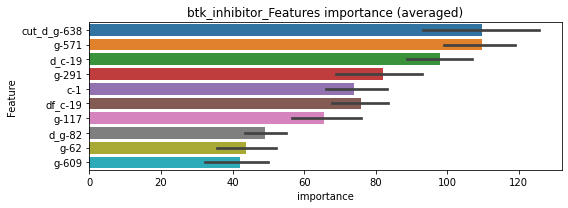

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 btk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142361	valid_1's binary_logloss: 0.031337
[200]	training's binary_logloss: 0.00190871	valid_1's binary_logloss: 0.0147337
[300]	training's binary_logloss: 0.000557963	valid_1's binary_logloss: 0.0117827
[400]	training's binary_logloss: 0.000285819	valid_1's binary_logloss: 0.0108915
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000218532	valid_1's binary_logloss: 0.0106247


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 btk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150835	valid_1's binary_logloss: 0.0217304
[200]	training's binary_logloss: 0.00208604	valid_1's binary_logloss: 0.00743161
[300]	training's binary_logloss: 0.000605618	valid_1's binary_logloss: 0.00548526
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000343779	valid_1's binary_logloss: 0.00514179


btk_inhibitor logloss: 0.007883218120113862


neg labels: 3289 → selected neg labels: 3287


calcineurin_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190686	valid_1's binary_logloss: 0.0245512
[200]	training's binary_logloss: 0.00197842	valid_1's binary_logloss: 0.00426746
[300]	training's binary_logloss: 0.00055894	valid_1's binary_logloss: 0.00171898
[400]	training's binary_logloss: 0.00032297	valid_1's binary_logloss: 0.00127157
[500]	training's binary_logloss: 0.000273163	valid_1's binary_logloss: 0.00115664
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000271148	valid_1's binary_logloss: 0.00115349
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195149	valid_1's binary_logloss: 0.0219293
[200]	training's binary_logloss: 0.00203558	valid_1's binary_logloss: 0.00269537
[300]	training's binary_logloss: 0.000576099	valid_1's binary_logloss: 0.000883185
[400]	training's binary_logloss: 0.000324824	valid_1's binary_logloss: 0.000548032
[500]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0008279, Threshold: 0.0014038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00126, conf_1:0.00154
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0014038
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0114038
threshold: 0.0114038, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193217	valid_1's binary_logloss: 0.0244932
[200]	training's binary_logloss: 0.00197573	valid_1's binary_logloss: 0.00429488
[300]	training's binary_logloss: 0.000557709	valid_1's binary_logloss: 0.00191038
[400]	training's binary_logloss: 0.000321849	valid_1's binary_logloss: 0.00145352
[500]	training's binary_logloss: 0.000274267	valid_1's binary_logloss: 0.00137089
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000275203	valid_1's binary_logloss: 0.0013681
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196558	valid_1's binary_logloss: 0.0224112
[200]	training's binary_logloss: 0.00201635	valid_1's binary_logloss: 0.00275342
[300]	training's binary_logloss: 0.000570384	valid_1's binary_logloss: 0.000940462
[400]	training's binary_logloss: 0.000325366	valid_1's binary_logloss: 0.00059879
[500]	training's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0829757, Threshold: 0.0114038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, conf_0:0.01026, conf_1:0.01254
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.0114038
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0214038
threshold: 0.0214038, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193217	valid_1's binary_logloss: 0.0244932
[200]	training's binary_logloss: 0.00197573	valid_1's binary_logloss: 0.00429488
[300]	training's binary_logloss: 0.000557709	valid_1's binary_logloss: 0.00191038
[400]	training's binary_logloss: 0.000321849	valid_1's binary_logloss: 0.00145352
[500]	training's binary_logloss: 0.000274267	valid_1's binary_logloss: 0.00137089
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000275203	valid_1's binary_logloss: 0.0013681
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196558	valid_1's binary_logloss: 0.0224112
[200]	training's binary_logloss: 0.00201635	valid_1's binary_logloss: 0.00275342
[300]	training's binary_logloss: 0.000570384	valid_1's binary_logloss: 0.000940462
[400]	training's binary_logloss: 0.000325366	valid_1's binary_logloss: 0.00059879
[500]	training's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0829757, Threshold: 0.0214038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.01926, conf_1:0.02354
threshold: 0.0214038, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7794, y_label_rate: 0.0846805


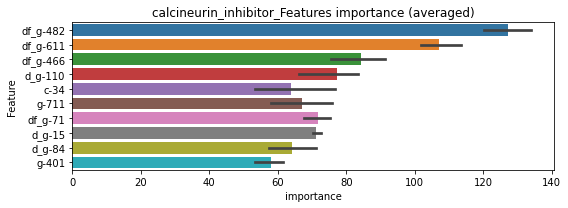

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 calcineurin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102548	valid_1's binary_logloss: 0.0145464
[200]	training's binary_logloss: 0.00102801	valid_1's binary_logloss: 0.00416088
[300]	training's binary_logloss: 0.000294537	valid_1's binary_logloss: 0.00322043
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00024335	valid_1's binary_logloss: 0.00316263


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 calcineurin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102117	valid_1's binary_logloss: 0.0131944
[200]	training's binary_logloss: 0.0010431	valid_1's binary_logloss: 0.00335563
[300]	training's binary_logloss: 0.000297439	valid_1's binary_logloss: 0.00234047
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000223784	valid_1's binary_logloss: 0.00223507


calcineurin_inhibitor logloss: 0.002698853107377979


neg labels: 3289 → selected neg labels: 3243


calcium_channel_blocker, len(trt): 281, len(othr): 3243, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.106146	valid_1's binary_logloss: 0.279517
Early stopping, best iteration is:
[177]	training's binary_logloss: 0.0472884	valid_1's binary_logloss: 0.26065
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.109281	valid_1's binary_logloss: 0.273408
[200]	training's binary_logloss: 0.0391629	valid_1's binary_logloss: 0.24434
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0273502	valid_1's binary_logloss: 0.242916


1 / 3 AUC score:0.901
y_Threshold: 0.0830359, Threshold: 0.1003020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 417 → Positive_corect_labels: 505/3474
p_label_rate: 0.0200904 Vs.target_rate: 0.01180
Num_p_label: 80.0, conf_0:0.09027, conf_1:0.11033
threshold: 0.1003020, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 505.0/3474, y_label_rate: 0.1453656
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0744872	valid_1's binary_logloss: 0.186566
[200]	training's binary_logloss: 0.0230528	valid_1's binary_logloss: 0.154478
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00960223	valid_1's binary_logloss: 0.148604
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0763601	valid_1's binary_logloss: 0.195124
[200]	training's binary_logloss: 0.0231274	valid_1's binary_logloss: 0.169159
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0153456	valid_1's binary_logloss: 0.165113


2 / 3 AUC score:0.974
y_Threshold: 0.0586580, Threshold: 0.1003020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 112 → Positive_corect_labels: 449.0/3362
p_label_rate: 0.0027624 Vs.target_rate: 0.01180
Num_p_label: 11.0, conf_0:0.09027, conf_1:0.11033
Num_p_label: 11.0, Expected: 47.0, Adj_threshold_1: 0.1003020
Num_p_label: 13.0, Expected: 47.0, Adj_threshold_2: 0.0903020
Num_p_label: 23.0, Expected: 47.0, Adj_threshold_3: 0.0803020
Num_p_label: 42.0, Expected: 47.0, Adj_threshold_4: 0.0703020
threshold: 0.0703020, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 449.0/3362, y_label_rate: 0.1335515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0639563	valid_1's binary_logloss: 0.171463
[200]	training's binary_logloss: 0.0183054	valid_1's binary_logloss: 0.140608
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.011945	valid_1's binary_logloss: 0.137702
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0588432	valid_1's binary_logloss: 0.157139
[200]	training's binary_logloss: 0.0160221	valid_1's binary_logloss: 0.129432
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.0147888	valid_1's binary_logloss: 0.128104


3 / 3 AUC score:0.983
y_Threshold: 0.0533610, Threshold: 0.0703020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 60 → Positive_corect_labels: 419.0/3302
p_label_rate: 0.0032647 Vs.target_rate: 0.01180
Num_p_label: 13.0, conf_0:0.06327, conf_1:0.07733
Num_p_label: 13.0, Expected: 47.0, Adj_threshold_1: 0.0703020
Num_p_label: 29.0, Expected: 47.0, Adj_threshold_2: 0.0603020
threshold: 0.0603020, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 448.0/7284, y_label_rate: 0.0615047


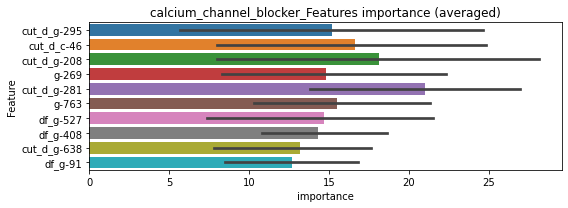

len(train_index) : 3642
len(valid_index) : 3642
================================= fold 1/2 calcium_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0302985	valid_1's binary_logloss: 0.0973011
Early stopping, best iteration is:
[171]	training's binary_logloss: 0.0118424	valid_1's binary_logloss: 0.0906531


len(train_index) : 3642
len(valid_index) : 3642
================================= fold 2/2 calcium_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310637	valid_1's binary_logloss: 0.0921639
[200]	training's binary_logloss: 0.00864993	valid_1's binary_logloss: 0.0801669
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00707114	valid_1's binary_logloss: 0.0792817


calcium_channel_blocker logloss: 0.08496740060066112


neg labels: 3289 → selected neg labels: 3282


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366856	valid_1's binary_logloss: 0.0701859
[200]	training's binary_logloss: 0.00624898	valid_1's binary_logloss: 0.0329199
[300]	training's binary_logloss: 0.00184451	valid_1's binary_logloss: 0.025056
[400]	training's binary_logloss: 0.000889619	valid_1's binary_logloss: 0.0228063
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000851063	valid_1's binary_logloss: 0.0226556
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.037447	valid_1's binary_logloss: 0.0614881
[200]	training's binary_logloss: 0.00665371	valid_1's binary_logloss: 0.0223254
[300]	training's binary_logloss: 0.0019926	valid_1's binary_logloss: 0.014045
[400]	training's binary_logloss: 0.000962234	valid_1's binary_logloss: 0.0116693
[500]	training's binary_logloss: 0.000625479	valid_1's binary_logloss: 0.0105914
Early stopping, best iteration is:
[554]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0035687, Threshold: 0.0042536, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00383, conf_1:0.00468
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0042536
Num_p_label: 5.0, Expected: 7.0, Adj_threshold_2: 0.0142536
threshold: 0.0142536, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0367868	valid_1's binary_logloss: 0.0712451
[200]	training's binary_logloss: 0.00615066	valid_1's binary_logloss: 0.0329906
[300]	training's binary_logloss: 0.00184187	valid_1's binary_logloss: 0.0257518
[400]	training's binary_logloss: 0.000891443	valid_1's binary_logloss: 0.0233613
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000827593	valid_1's binary_logloss: 0.0231719
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0371685	valid_1's binary_logloss: 0.0630795
[200]	training's binary_logloss: 0.00649912	valid_1's binary_logloss: 0.0229837
[300]	training's binary_logloss: 0.00193742	valid_1's binary_logloss: 0.0138936
[400]	training's binary_logloss: 0.000946348	valid_1's binary_logloss: 0.0112927
[500]	training's binary_logloss: 0.000625203	valid_1's binary_logloss: 0.0103054
Early stopping, best iteration is:
[535]	

2 / 3 AUC score:1.000
y_Threshold: 0.0176946, Threshold: 0.0142536, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, conf_0:0.01283, conf_1:0.01568
threshold: 0.0142536, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366437	valid_1's binary_logloss: 0.0605307
[200]	training's binary_logloss: 0.00624041	valid_1's binary_logloss: 0.0221343
[300]	training's binary_logloss: 0.00186964	valid_1's binary_logloss: 0.0145265
[400]	training's binary_logloss: 0.00090774	valid_1's binary_logloss: 0.0125543
[500]	training's binary_logloss: 0.00059658	valid_1's binary_logloss: 0.0118694
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000591489	valid_1's binary_logloss: 0.0118546
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0374388	valid_1's binary_logloss: 0.0603037
[200]	training's binary_logloss: 0.00651474	valid_1's binary_logloss: 0.0206747
[300]	training's binary_logloss: 0.00194251	valid_1's binary_logloss: 0.0122865
[400]	training's binary_logloss: 0.000946118	valid_1's binary_logloss: 0.0098779
[500]	training's binary_logloss: 0.00061289

3 / 3 AUC score:1.000
y_Threshold: 0.0163241, Threshold: 0.0142536, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, conf_0:0.01283, conf_1:0.01568
threshold: 0.0142536, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 665.0/7782, y_label_rate: 0.0854536


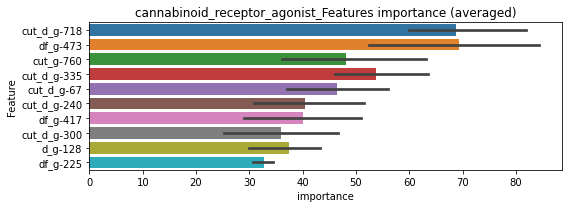

len(train_index) : 3891
len(valid_index) : 3891
================================= fold 1/2 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190843	valid_1's binary_logloss: 0.0424609
[200]	training's binary_logloss: 0.00321892	valid_1's binary_logloss: 0.0228319
[300]	training's binary_logloss: 0.000942357	valid_1's binary_logloss: 0.0193469
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000560387	valid_1's binary_logloss: 0.0187553


len(train_index) : 3891
len(valid_index) : 3891
================================= fold 2/2 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207483	valid_1's binary_logloss: 0.0376242
[200]	training's binary_logloss: 0.00355976	valid_1's binary_logloss: 0.0181712
[300]	training's binary_logloss: 0.00104948	valid_1's binary_logloss: 0.014079
[400]	training's binary_logloss: 0.000498032	valid_1's binary_logloss: 0.0130019
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000347962	valid_1's binary_logloss: 0.0126726


cannabinoid_receptor_agonist logloss: 0.015713955486743692


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0441034	valid_1's binary_logloss: 0.0803402
[200]	training's binary_logloss: 0.00809885	valid_1's binary_logloss: 0.0370091
[300]	training's binary_logloss: 0.00241737	valid_1's binary_logloss: 0.0263427
[400]	training's binary_logloss: 0.00115451	valid_1's binary_logloss: 0.0230127
[500]	training's binary_logloss: 0.000736609	valid_1's binary_logloss: 0.0216896
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000609768	valid_1's binary_logloss: 0.021328
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0471786	valid_1's binary_logloss: 0.0762768
[200]	training's binary_logloss: 0.00938366	valid_1's binary_logloss: 0.0319414
[300]	training's binary_logloss: 0.00277239	valid_1's binary_logloss: 0.0214755
[400]	training's binary_logloss: 0.00129507	valid_1's binary_logloss: 0.0181246
[500]	training's binary_logloss: 0.000804543

1 / 3 AUC score:1.000
y_Threshold: 0.0039537, Threshold: 0.0055117, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0200904 Vs.target_rate: 0.00231
Num_p_label: 80.0, conf_0:0.00496, conf_1:0.00606
Num_p_label: 80.0, Expected: 9.2, Adj_threshold_1: 0.0055117
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_2: 0.0155117
threshold: 0.0155117, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0467859	valid_1's binary_logloss: 0.07504
[200]	training's binary_logloss: 0.00878458	valid_1's binary_logloss: 0.0297819
[300]	training's binary_logloss: 0.00261657	valid_1's binary_logloss: 0.0194831
[400]	training's binary_logloss: 0.00122812	valid_1's binary_logloss: 0.0157587
[500]	training's binary_logloss: 0.000770942	valid_1's binary_logloss: 0.0143023
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000642577	valid_1's binary_logloss: 0.0137497
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.04677	valid_1's binary_logloss: 0.0903717
[200]	training's binary_logloss: 0.00857971	valid_1's binary_logloss: 0.0427636
[300]	training's binary_logloss: 0.00252501	valid_1's binary_logloss: 0.0324097
[400]	training's binary_logloss: 0.00118915	valid_1's binary_logloss: 0.029677
Early stopping, best iteration is:
[391]	trainin

2 / 3 AUC score:0.999
y_Threshold: 0.0256753, Threshold: 0.0155117, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0113009 Vs.target_rate: 0.00231
Num_p_label: 45.0, conf_0:0.01396, conf_1:0.01706
Num_p_label: 45.0, Expected: 9.2, Adj_threshold_1: 0.0155117
Num_p_label: 20.0, Expected: 9.2, Adj_threshold_2: 0.0255117
Num_p_label: 8.0, Expected: 9.2, Adj_threshold_3: 0.0355117
threshold: 0.0355117, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0449666	valid_1's binary_logloss: 0.0773842
[200]	training's binary_logloss: 0.00826724	valid_1's binary_logloss: 0.0288662
[300]	training's binary_logloss: 0.00245059	valid_1's binary_logloss: 0.017886
[400]	training's binary_logloss: 0.00116314	valid_1's binary_logloss: 0.0145097
[500]	training's binary_logloss: 0.000740782	valid_1's binary_logloss: 0.0132092
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000609719	valid_1's binary_logloss: 0.0126823
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0478764	valid_1's binary_logloss: 0.0831811
[200]	training's binary_logloss: 0.0089306	valid_1's binary_logloss: 0.03567
[300]	training's binary_logloss: 0.00266077	valid_1's binary_logloss: 0.0247866
[400]	training's binary_logloss: 0.00124462	valid_1's binary_logloss: 0.0205913
[500]	training's binary_logloss: 0.00077413	val

3 / 3 AUC score:1.000
y_Threshold: 0.0159157, Threshold: 0.0355117, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0012557 Vs.target_rate: 0.00231
Num_p_label: 5.0, conf_0:0.03196, conf_1:0.03906
threshold: 0.0355117, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/7778, y_label_rate: 0.0844690


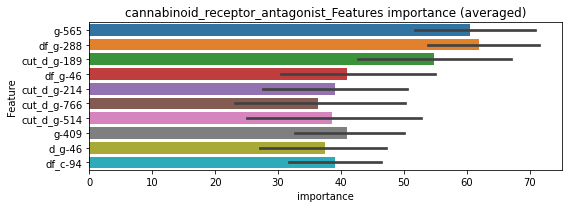

len(train_index) : 3889
len(valid_index) : 3889
================================= fold 1/2 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232776	valid_1's binary_logloss: 0.049463
[200]	training's binary_logloss: 0.00399069	valid_1's binary_logloss: 0.0256406
[300]	training's binary_logloss: 0.00114474	valid_1's binary_logloss: 0.0205462
[400]	training's binary_logloss: 0.000550849	valid_1's binary_logloss: 0.0185154
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000411301	valid_1's binary_logloss: 0.0180858


len(train_index) : 3889
len(valid_index) : 3889
================================= fold 2/2 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247252	valid_1's binary_logloss: 0.0419533
[200]	training's binary_logloss: 0.00472439	valid_1's binary_logloss: 0.0197375
[300]	training's binary_logloss: 0.00137273	valid_1's binary_logloss: 0.0151235
[400]	training's binary_logloss: 0.000630455	valid_1's binary_logloss: 0.0139328
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000488979	valid_1's binary_logloss: 0.0136779


cannabinoid_receptor_antagonist logloss: 0.015881887728742685


neg labels: 3289 → selected neg labels: 3283


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0321588	valid_1's binary_logloss: 0.0589111
[200]	training's binary_logloss: 0.00521372	valid_1's binary_logloss: 0.0235128
[300]	training's binary_logloss: 0.00161149	valid_1's binary_logloss: 0.0167313
[400]	training's binary_logloss: 0.00079155	valid_1's binary_logloss: 0.0145563
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000804365	valid_1's binary_logloss: 0.0144709
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361599	valid_1's binary_logloss: 0.0516206
[200]	training's binary_logloss: 0.00606778	valid_1's binary_logloss: 0.0161128
[300]	training's binary_logloss: 0.00178818	valid_1's binary_logloss: 0.00869688
[400]	training's binary_logloss: 0.000872579	valid_1's binary_logloss: 0.00657446
[500]	training's binary_logloss: 0.000566499	valid_1's binary_logloss: 0.00579381
Early stopping, best iteration is:
[545

1 / 3 AUC score:1.000
y_Threshold: 0.0028408, Threshold: 0.0033371, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00300, conf_1:0.00367
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0033371
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0133371
threshold: 0.0133371, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339209	valid_1's binary_logloss: 0.059797
[200]	training's binary_logloss: 0.00530667	valid_1's binary_logloss: 0.022152
[300]	training's binary_logloss: 0.00162093	valid_1's binary_logloss: 0.015334
[400]	training's binary_logloss: 0.000798975	valid_1's binary_logloss: 0.0130681
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000682054	valid_1's binary_logloss: 0.0127359
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361224	valid_1's binary_logloss: 0.0515988
[200]	training's binary_logloss: 0.00590218	valid_1's binary_logloss: 0.0155267
[300]	training's binary_logloss: 0.00174511	valid_1's binary_logloss: 0.00853888
[400]	training's binary_logloss: 0.000860887	valid_1's binary_logloss: 0.00654117
[500]	training's binary_logloss: 0.000567982	valid_1's binary_logloss: 0.00565913
Early stopping, best iteration is:
[560]	

2 / 3 AUC score:1.000
y_Threshold: 0.0147484, Threshold: 0.0133371, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.01200, conf_1:0.01467
threshold: 0.0133371, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339209	valid_1's binary_logloss: 0.059797
[200]	training's binary_logloss: 0.00530667	valid_1's binary_logloss: 0.022152
[300]	training's binary_logloss: 0.00162093	valid_1's binary_logloss: 0.015334
[400]	training's binary_logloss: 0.000798975	valid_1's binary_logloss: 0.0130681
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000682054	valid_1's binary_logloss: 0.0127359
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361224	valid_1's binary_logloss: 0.0515988
[200]	training's binary_logloss: 0.00590218	valid_1's binary_logloss: 0.0155267
[300]	training's binary_logloss: 0.00174511	valid_1's binary_logloss: 0.00853888
[400]	training's binary_logloss: 0.000860887	valid_1's binary_logloss: 0.00654117
[500]	training's binary_logloss: 0.000567982	valid_1's binary_logloss: 0.00565913
Early stopping, best iteration is:
[560]	

3 / 3 AUC score:1.000
y_Threshold: 0.0147484, Threshold: 0.0133371, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.01200, conf_1:0.01467
threshold: 0.0133371, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 663.0/7789, y_label_rate: 0.0851200


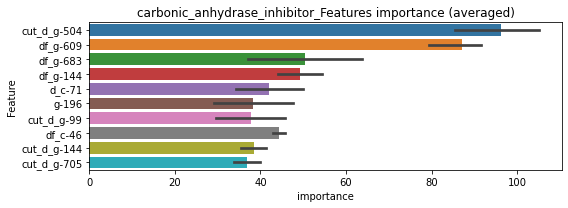

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0188529	valid_1's binary_logloss: 0.0390147
[200]	training's binary_logloss: 0.00297634	valid_1's binary_logloss: 0.0208252
[300]	training's binary_logloss: 0.000860259	valid_1's binary_logloss: 0.0179697
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000553032	valid_1's binary_logloss: 0.0174134


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196292	valid_1's binary_logloss: 0.0315887
[200]	training's binary_logloss: 0.00327446	valid_1's binary_logloss: 0.0101593
[300]	training's binary_logloss: 0.000940352	valid_1's binary_logloss: 0.0063075
[400]	training's binary_logloss: 0.000446607	valid_1's binary_logloss: 0.00522369
[500]	training's binary_logloss: 0.000289402	valid_1's binary_logloss: 0.0048239
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000274872	valid_1's binary_logloss: 0.00481021


carbonic_anhydrase_inhibitor logloss: 0.011112610082993692


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316489	valid_1's binary_logloss: 0.0501681
[200]	training's binary_logloss: 0.00494464	valid_1's binary_logloss: 0.0164394
[300]	training's binary_logloss: 0.0014772	valid_1's binary_logloss: 0.0104304
[400]	training's binary_logloss: 0.000734602	valid_1's binary_logloss: 0.00832588
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000532626	valid_1's binary_logloss: 0.00775438
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322072	valid_1's binary_logloss: 0.0492493
[200]	training's binary_logloss: 0.0050891	valid_1's binary_logloss: 0.0148651
[300]	training's binary_logloss: 0.00153153	valid_1's binary_logloss: 0.00850157
[400]	training's binary_logloss: 0.000763479	valid_1's binary_logloss: 0.00663539
[500]	training's binary_logloss: 0.000511856	valid_1's binary_logloss: 0.00599073
Early stopping, best iteration is:
[52

1 / 3 AUC score:1.000
y_Threshold: 0.0024379, Threshold: 0.0039344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00354, conf_1:0.00433
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0039344
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0139344
threshold: 0.0139344, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323831	valid_1's binary_logloss: 0.0525224
[200]	training's binary_logloss: 0.00496285	valid_1's binary_logloss: 0.0174095
[300]	training's binary_logloss: 0.00147867	valid_1's binary_logloss: 0.0107474
[400]	training's binary_logloss: 0.000739818	valid_1's binary_logloss: 0.00859908
[500]	training's binary_logloss: 0.000504591	valid_1's binary_logloss: 0.00784631
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00046013	valid_1's binary_logloss: 0.00766315
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336715	valid_1's binary_logloss: 0.0517126
[200]	training's binary_logloss: 0.00519879	valid_1's binary_logloss: 0.016129
[300]	training's binary_logloss: 0.00153847	valid_1's binary_logloss: 0.00937768
[400]	training's binary_logloss: 0.000762758	valid_1's binary_logloss: 0.00706211
[500]	training's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.0159532, Threshold: 0.0139344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, conf_0:0.01254, conf_1:0.01533
threshold: 0.0139344, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326965	valid_1's binary_logloss: 0.0468163
[200]	training's binary_logloss: 0.0050176	valid_1's binary_logloss: 0.0120542
[300]	training's binary_logloss: 0.00148716	valid_1's binary_logloss: 0.00573651
[400]	training's binary_logloss: 0.000749134	valid_1's binary_logloss: 0.00417775
[500]	training's binary_logloss: 0.000508279	valid_1's binary_logloss: 0.00355899
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000487182	valid_1's binary_logloss: 0.00348398
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325277	valid_1's binary_logloss: 0.0541827
[200]	training's binary_logloss: 0.00494917	valid_1's binary_logloss: 0.018142
[300]	training's binary_logloss: 0.00145699	valid_1's binary_logloss: 0.0109664
[400]	training's binary_logloss: 0.000737051	valid_1's binary_logloss: 0.00877356
[500]	training's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.0278531, Threshold: 0.0139344, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0060271 Vs.target_rate: 0.00151
Num_p_label: 24.0, conf_0:0.01254, conf_1:0.01533
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.0139344
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0239344
threshold: 0.0239344, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 663.0/7787, y_label_rate: 0.0851419


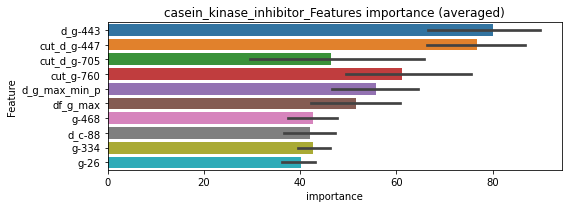

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167044	valid_1's binary_logloss: 0.0324197
[200]	training's binary_logloss: 0.00250461	valid_1's binary_logloss: 0.0147481
[300]	training's binary_logloss: 0.000739059	valid_1's binary_logloss: 0.0122218
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000410549	valid_1's binary_logloss: 0.0116747


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169464	valid_1's binary_logloss: 0.0289011
[200]	training's binary_logloss: 0.00267389	valid_1's binary_logloss: 0.00952034
[300]	training's binary_logloss: 0.000805329	valid_1's binary_logloss: 0.00582277
[400]	training's binary_logloss: 0.000396775	valid_1's binary_logloss: 0.00489708
[500]	training's binary_logloss: 0.000266651	valid_1's binary_logloss: 0.00462015
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000243104	valid_1's binary_logloss: 0.00458458


casein_kinase_inhibitor logloss: 0.008130074372893622


neg labels: 3289 → selected neg labels: 3287


caspase_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236189	valid_1's binary_logloss: 0.0363524
[200]	training's binary_logloss: 0.00285615	valid_1's binary_logloss: 0.0112294
[300]	training's binary_logloss: 0.000840136	valid_1's binary_logloss: 0.00734155
[400]	training's binary_logloss: 0.000447295	valid_1's binary_logloss: 0.00621228
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000358236	valid_1's binary_logloss: 0.00586879
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0244099	valid_1's binary_logloss: 0.0317632
[200]	training's binary_logloss: 0.00297454	valid_1's binary_logloss: 0.00584818
[300]	training's binary_logloss: 0.000866603	valid_1's binary_logloss: 0.0023929
[400]	training's binary_logloss: 0.000456759	valid_1's binary_logloss: 0.00157596
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000368477	valid_1's binary_logloss: 0.0014127

1 / 3 AUC score:1.000
y_Threshold: 0.0014361, Threshold: 0.0017903, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00161, conf_1:0.00197
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0017903
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0117903
threshold: 0.0117903, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023885	valid_1's binary_logloss: 0.0362259
[200]	training's binary_logloss: 0.00287849	valid_1's binary_logloss: 0.0100641
[300]	training's binary_logloss: 0.00083916	valid_1's binary_logloss: 0.00602897
[400]	training's binary_logloss: 0.000444685	valid_1's binary_logloss: 0.00487882
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000355816	valid_1's binary_logloss: 0.00463911
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024639	valid_1's binary_logloss: 0.0323683
[200]	training's binary_logloss: 0.00296051	valid_1's binary_logloss: 0.00578526
[300]	training's binary_logloss: 0.000871416	valid_1's binary_logloss: 0.00235349
[400]	training's binary_logloss: 0.0004581	valid_1's binary_logloss: 0.0015261
[500]	training's binary_logloss: 0.000364724	valid_1's binary_logloss: 0.0013492
Early stopping, best iteration is:
[493

2 / 3 AUC score:1.000
y_Threshold: 0.0195392, Threshold: 0.0117903, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.01061, conf_1:0.01297
threshold: 0.0117903, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023885	valid_1's binary_logloss: 0.0362259
[200]	training's binary_logloss: 0.00287849	valid_1's binary_logloss: 0.0100641
[300]	training's binary_logloss: 0.00083916	valid_1's binary_logloss: 0.00602897
[400]	training's binary_logloss: 0.000444685	valid_1's binary_logloss: 0.00487882
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000355816	valid_1's binary_logloss: 0.00463911
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024639	valid_1's binary_logloss: 0.0323683
[200]	training's binary_logloss: 0.00296051	valid_1's binary_logloss: 0.00578526
[300]	training's binary_logloss: 0.000871416	valid_1's binary_logloss: 0.00235349
[400]	training's binary_logloss: 0.0004581	valid_1's binary_logloss: 0.0015261
[500]	training's binary_logloss: 0.000364724	valid_1's binary_logloss: 0.0013492
Early stopping, best iteration is:
[493

3 / 3 AUC score:1.000
y_Threshold: 0.0195392, Threshold: 0.0117903, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.01061, conf_1:0.01297
threshold: 0.0117903, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7794, y_label_rate: 0.0849371


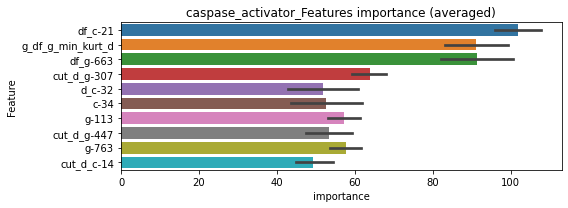

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 caspase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125615	valid_1's binary_logloss: 0.0200655
[200]	training's binary_logloss: 0.00151132	valid_1's binary_logloss: 0.00787109
[300]	training's binary_logloss: 0.000430431	valid_1's binary_logloss: 0.00693715
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000300234	valid_1's binary_logloss: 0.00688113


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 caspase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0129677	valid_1's binary_logloss: 0.0174913
[200]	training's binary_logloss: 0.00165747	valid_1's binary_logloss: 0.00437702
[300]	training's binary_logloss: 0.000481678	valid_1's binary_logloss: 0.00277504
[400]	training's binary_logloss: 0.000242337	valid_1's binary_logloss: 0.00232832
[500]	training's binary_logloss: 0.00017807	valid_1's binary_logloss: 0.00220368
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000174803	valid_1's binary_logloss: 0.00219662


caspase_activator logloss: 0.004538872230664382


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228844	valid_1's binary_logloss: 0.033594
[200]	training's binary_logloss: 0.00283406	valid_1's binary_logloss: 0.00930885
[300]	training's binary_logloss: 0.000835994	valid_1's binary_logloss: 0.00544486
[400]	training's binary_logloss: 0.000441917	valid_1's binary_logloss: 0.00428341
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000350181	valid_1's binary_logloss: 0.00404717
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240902	valid_1's binary_logloss: 0.0305173
[200]	training's binary_logloss: 0.00299689	valid_1's binary_logloss: 0.00664597
[300]	training's binary_logloss: 0.000874281	valid_1's binary_logloss: 0.00396566
[400]	training's binary_logloss: 0.000455912	valid_1's binary_logloss: 0.00325216
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000386131	valid_1's binary_logloss: 0.003150

1 / 3 AUC score:1.000
y_Threshold: 0.0014166, Threshold: 0.0018322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00165, conf_1:0.00202
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0018322
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0118322
threshold: 0.0118322, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0229735	valid_1's binary_logloss: 0.0336444
[200]	training's binary_logloss: 0.00278771	valid_1's binary_logloss: 0.00926328
[300]	training's binary_logloss: 0.000828456	valid_1's binary_logloss: 0.00537255
[400]	training's binary_logloss: 0.000439437	valid_1's binary_logloss: 0.00425728
[500]	training's binary_logloss: 0.000347567	valid_1's binary_logloss: 0.0039639
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000349444	valid_1's binary_logloss: 0.00395464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238931	valid_1's binary_logloss: 0.0294282
[200]	training's binary_logloss: 0.00294584	valid_1's binary_logloss: 0.00543823
[300]	training's binary_logloss: 0.000871666	valid_1's binary_logloss: 0.0028402
[400]	training's binary_logloss: 0.000458612	valid_1's binary_logloss: 0.00233982
Early stopping, best iteration is

2 / 3 AUC score:1.000
y_Threshold: 0.0294419, Threshold: 0.0118322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.01065, conf_1:0.01302
threshold: 0.0118322, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0229735	valid_1's binary_logloss: 0.0336444
[200]	training's binary_logloss: 0.00278771	valid_1's binary_logloss: 0.00926328
[300]	training's binary_logloss: 0.000828456	valid_1's binary_logloss: 0.00537255
[400]	training's binary_logloss: 0.000439437	valid_1's binary_logloss: 0.00425728
[500]	training's binary_logloss: 0.000347567	valid_1's binary_logloss: 0.0039639
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000349444	valid_1's binary_logloss: 0.00395464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238931	valid_1's binary_logloss: 0.0294282
[200]	training's binary_logloss: 0.00294584	valid_1's binary_logloss: 0.00543823
[300]	training's binary_logloss: 0.000871666	valid_1's binary_logloss: 0.0028402
[400]	training's binary_logloss: 0.000458612	valid_1's binary_logloss: 0.00233982
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0294419, Threshold: 0.0118322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.01065, conf_1:0.01302
threshold: 0.0118322, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7793, y_label_rate: 0.0846914


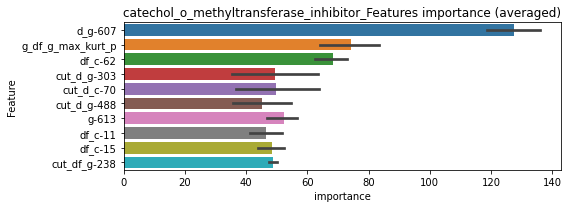

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124431	valid_1's binary_logloss: 0.0179484
[200]	training's binary_logloss: 0.00148116	valid_1's binary_logloss: 0.00620087
[300]	training's binary_logloss: 0.000419801	valid_1's binary_logloss: 0.00501878
[400]	training's binary_logloss: 0.000216522	valid_1's binary_logloss: 0.00470514
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000215564	valid_1's binary_logloss: 0.00470168


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125379	valid_1's binary_logloss: 0.017295
[200]	training's binary_logloss: 0.00151689	valid_1's binary_logloss: 0.00489962
[300]	training's binary_logloss: 0.000435545	valid_1's binary_logloss: 0.00323727
[400]	training's binary_logloss: 0.00022585	valid_1's binary_logloss: 0.00286529
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000191562	valid_1's binary_logloss: 0.00281918


catechol_o_methyltransferase_inhibitor logloss: 0.0037605484880232644


neg labels: 3289 → selected neg labels: 3272


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3272, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0566788	valid_1's binary_logloss: 0.138751
[200]	training's binary_logloss: 0.0141514	valid_1's binary_logloss: 0.098487
[300]	training's binary_logloss: 0.0046411	valid_1's binary_logloss: 0.0879512
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00383808	valid_1's binary_logloss: 0.0873972
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0631196	valid_1's binary_logloss: 0.127081
[200]	training's binary_logloss: 0.0163111	valid_1's binary_logloss: 0.0823717
[300]	training's binary_logloss: 0.00542323	valid_1's binary_logloss: 0.0704351
[400]	training's binary_logloss: 0.00248197	valid_1's binary_logloss: 0.066627
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00186355	valid_1's binary_logloss: 0.0651927


1 / 3 AUC score:0.997
y_Threshold: 0.0149491, Threshold: 0.0209343, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0200904 Vs.target_rate: 0.00428
Num_p_label: 80.0, conf_0:0.01884, conf_1:0.02303
Num_p_label: 80.0, Expected: 17.1, Adj_threshold_1: 0.0209343
Num_p_label: 28.0, Expected: 17.1, Adj_threshold_2: 0.0309343
threshold: 0.0309343, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0603452	valid_1's binary_logloss: 0.130666
[200]	training's binary_logloss: 0.0153279	valid_1's binary_logloss: 0.0830948
[300]	training's binary_logloss: 0.00503701	valid_1's binary_logloss: 0.0701384
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00261417	valid_1's binary_logloss: 0.066497
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0629295	valid_1's binary_logloss: 0.120004
[200]	training's binary_logloss: 0.0160749	valid_1's binary_logloss: 0.0749599
[300]	training's binary_logloss: 0.00527704	valid_1's binary_logloss: 0.0624563
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00264427	valid_1's binary_logloss: 0.058484


2 / 3 AUC score:0.998
y_Threshold: 0.0315632, Threshold: 0.0309343, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 633.0/3752
p_label_rate: 0.0183325 Vs.target_rate: 0.00428
Num_p_label: 73.0, conf_0:0.02784, conf_1:0.03403
Num_p_label: 73.0, Expected: 17.1, Adj_threshold_1: 0.0309343
Num_p_label: 41.0, Expected: 17.1, Adj_threshold_2: 0.0409343
Num_p_label: 23.0, Expected: 17.1, Adj_threshold_3: 0.0509343
threshold: 0.0509343, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 633.0/3752, y_label_rate: 0.1687100
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0558623	valid_1's binary_logloss: 0.134143
[200]	training's binary_logloss: 0.0132245	valid_1's binary_logloss: 0.0906978
[300]	training's binary_logloss: 0.00427345	valid_1's binary_logloss: 0.0784869
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0026472	valid_1's binary_logloss: 0.0757335
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.062102	valid_1's binary_logloss: 0.114675
[200]	training's binary_logloss: 0.0153961	valid_1's binary_logloss: 0.0675776
[300]	training's binary_logloss: 0.00502995	valid_1's binary_logloss: 0.0538566
[400]	training's binary_logloss: 0.0022964	valid_1's binary_logloss: 0.0490747
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00238799	valid_1's binary_logloss: 0.0490301


3 / 3 AUC score:0.998
y_Threshold: 0.0377638, Threshold: 0.0509343, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 618.0/3722
p_label_rate: 0.0057760 Vs.target_rate: 0.00428
Num_p_label: 23.0, conf_0:0.04584, conf_1:0.05603
threshold: 0.0509343, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 641.0/7704, y_label_rate: 0.0832035


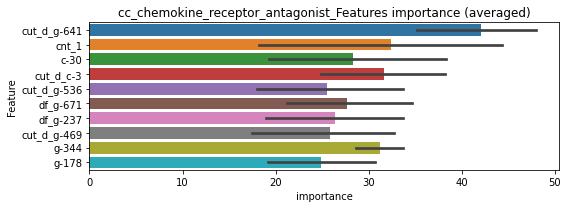

len(train_index) : 3852
len(valid_index) : 3852
================================= fold 1/2 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317107	valid_1's binary_logloss: 0.076549
[200]	training's binary_logloss: 0.00741912	valid_1's binary_logloss: 0.0520363
[300]	training's binary_logloss: 0.00239932	valid_1's binary_logloss: 0.0474666
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00117657	valid_1's binary_logloss: 0.0458998


len(train_index) : 3852
len(valid_index) : 3852
================================= fold 2/2 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329358	valid_1's binary_logloss: 0.0743188
[200]	training's binary_logloss: 0.00795151	valid_1's binary_logloss: 0.0505431
[300]	training's binary_logloss: 0.00258401	valid_1's binary_logloss: 0.0459568
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00126152	valid_1's binary_logloss: 0.0447223


cc_chemokine_receptor_antagonist logloss: 0.04531102756124912


neg labels: 3289 → selected neg labels: 3286


cck_receptor_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227085	valid_1's binary_logloss: 0.0311334
[200]	training's binary_logloss: 0.00270718	valid_1's binary_logloss: 0.0078272
[300]	training's binary_logloss: 0.000804173	valid_1's binary_logloss: 0.00475583
[400]	training's binary_logloss: 0.000433376	valid_1's binary_logloss: 0.00385362
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000350541	valid_1's binary_logloss: 0.00359796
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235256	valid_1's binary_logloss: 0.0284358
[200]	training's binary_logloss: 0.00290824	valid_1's binary_logloss: 0.0044333
[300]	training's binary_logloss: 0.000848453	valid_1's binary_logloss: 0.00152074
[400]	training's binary_logloss: 0.000454959	valid_1's binary_logloss: 0.000897551
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00036161	valid_1's binary_logloss: 0.0007363

1 / 3 AUC score:1.000
y_Threshold: 0.0017170, Threshold: 0.0025504, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00230, conf_1:0.00281
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0025504
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0125504
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0225504
threshold: 0.0225504, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225183	valid_1's binary_logloss: 0.0312202
[200]	training's binary_logloss: 0.00264442	valid_1's binary_logloss: 0.00836772
[300]	training's binary_logloss: 0.000781288	valid_1's binary_logloss: 0.00539706
[400]	training's binary_logloss: 0.000426019	valid_1's binary_logloss: 0.00456977
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00035609	valid_1's binary_logloss: 0.00437048
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023481	valid_1's binary_logloss: 0.0271011
[200]	training's binary_logloss: 0.00280626	valid_1's binary_logloss: 0.00390178
[300]	training's binary_logloss: 0.000825152	valid_1's binary_logloss: 0.00128553
[400]	training's binary_logloss: 0.000446945	valid_1's binary_logloss: 0.000743633
[500]	training's binary_logloss: 0.000358541	valid_1's binary_logloss: 0.000615671
Early stopping, best iteration 

2 / 3 AUC score:1.000
y_Threshold: 0.0243598, Threshold: 0.0225504, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00076
Num_p_label: 15.0, conf_0:0.02030, conf_1:0.02481
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0225504
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0325504
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0425504
threshold: 0.0425504, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225183	valid_1's binary_logloss: 0.0312202
[200]	training's binary_logloss: 0.00264442	valid_1's binary_logloss: 0.00836772
[300]	training's binary_logloss: 0.000781288	valid_1's binary_logloss: 0.00539706
[400]	training's binary_logloss: 0.000426019	valid_1's binary_logloss: 0.00456977
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00035609	valid_1's binary_logloss: 0.00437048
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023481	valid_1's binary_logloss: 0.0271011
[200]	training's binary_logloss: 0.00280626	valid_1's binary_logloss: 0.00390178
[300]	training's binary_logloss: 0.000825152	valid_1's binary_logloss: 0.00128553
[400]	training's binary_logloss: 0.000446945	valid_1's binary_logloss: 0.000743633
[500]	training's binary_logloss: 0.000358541	valid_1's binary_logloss: 0.000615671
Early stopping, best iteration 

3 / 3 AUC score:1.000
y_Threshold: 0.0243598, Threshold: 0.0425504, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.03830, conf_1:0.04681
threshold: 0.0425504, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


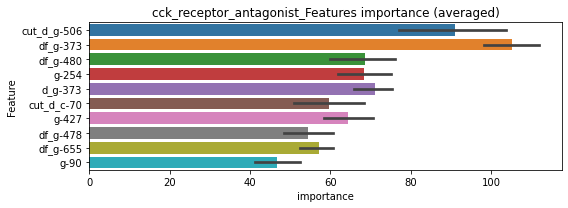

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 cck_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011975	valid_1's binary_logloss: 0.0201125
[200]	training's binary_logloss: 0.00141542	valid_1's binary_logloss: 0.00900479
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.000474241	valid_1's binary_logloss: 0.00818592


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 cck_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126443	valid_1's binary_logloss: 0.0167767
[200]	training's binary_logloss: 0.00160051	valid_1's binary_logloss: 0.00405763
[300]	training's binary_logloss: 0.000467596	valid_1's binary_logloss: 0.00254324
[400]	training's binary_logloss: 0.000241224	valid_1's binary_logloss: 0.00220989
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000199672	valid_1's binary_logloss: 0.00216817


cck_receptor_antagonist logloss: 0.005177430845713261


neg labels: 3289 → selected neg labels: 3263


cdk_inhibitor, len(trt): 352, len(othr): 3263, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047988	valid_1's binary_logloss: 0.119867
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.0124023	valid_1's binary_logloss: 0.101144
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047476	valid_1's binary_logloss: 0.117916
[200]	training's binary_logloss: 0.010316	valid_1's binary_logloss: 0.0970746
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.00798937	valid_1's binary_logloss: 0.0960894


1 / 3 AUC score:0.981
y_Threshold: 0.0402271, Threshold: 0.3621604, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 215 → Positive_corect_labels: 610/3700
p_label_rate: 0.0200904 Vs.target_rate: 0.01478
Num_p_label: 80.0, conf_0:0.32594, conf_1:0.39838
threshold: 0.3621604, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 610.0/3700, y_label_rate: 0.1648649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0384338	valid_1's binary_logloss: 0.0774043
[200]	training's binary_logloss: 0.00665342	valid_1's binary_logloss: 0.0534907
[300]	training's binary_logloss: 0.00195232	valid_1's binary_logloss: 0.0497228
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00182609	valid_1's binary_logloss: 0.0494497
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366157	valid_1's binary_logloss: 0.0824287
[200]	training's binary_logloss: 0.00647995	valid_1's binary_logloss: 0.0634459
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00225091	valid_1's binary_logloss: 0.0598719


2 / 3 AUC score:0.995
y_Threshold: 0.0835564, Threshold: 0.3621604, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 64 → Positive_corect_labels: 578.0/3636
p_label_rate: 0.0630337 Vs.target_rate: 0.01478
Num_p_label: 251.0, conf_0:0.32594, conf_1:0.39838
Num_p_label: 251.0, Expected: 58.9, Adj_threshold_1: 0.3621604
Num_p_label: 250.0, Expected: 58.9, Adj_threshold_2: 0.3721604
Num_p_label: 246.0, Expected: 58.9, Adj_threshold_3: 0.3821604
Num_p_label: 244.0, Expected: 58.9, Adj_threshold_4: 0.3921604
Num_p_label: 241.0, Expected: 58.9, Adj_threshold_5: 0.4021604
Num_p_label: 239.0, Expected: 58.9, Adj_threshold_6: 0.4121604
Num_p_label: 238.0, Expected: 58.9, Adj_threshold_7: 0.4221604
Num_p_label: 237.0, Expected: 58.9, Adj_threshold_8: 0.4321604
Num_p_label: 236.0, Expected: 58.9, Adj_threshold_9: 0.4421604
Num_p_label: 235.0, Expected: 58.9, Adj_threshold_10: 0.4521604
threshold: 0.4621604, positive_p_label: 232.0/3982, p_label_rate: 0.0582622
positive_y_label: 578.0/3636, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305951	valid_1's binary_logloss: 0.0587236
[200]	training's binary_logloss: 0.00462186	valid_1's binary_logloss: 0.0377077
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00169288	valid_1's binary_logloss: 0.0349559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295269	valid_1's binary_logloss: 0.0587538
[200]	training's binary_logloss: 0.00447607	valid_1's binary_logloss: 0.0392533
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00166467	valid_1's binary_logloss: 0.037698


3 / 3 AUC score:0.995
y_Threshold: 0.1261608, Threshold: 0.4621604, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 38 → Positive_corect_labels: 559.0/3598
p_label_rate: 0.0713209 Vs.target_rate: 0.01478
Num_p_label: 284.0, conf_0:0.41594, conf_1:0.50838
Num_p_label: 284.0, Expected: 58.9, Adj_threshold_1: 0.4621604
Num_p_label: 282.0, Expected: 58.9, Adj_threshold_2: 0.4721604
Num_p_label: 280.0, Expected: 58.9, Adj_threshold_3: 0.4821604
Num_p_label: 277.0, Expected: 58.9, Adj_threshold_4: 0.4921604
Num_p_label: 276.0, Expected: 58.9, Adj_threshold_5: 0.5021604
Num_p_label: 272.0, Expected: 58.9, Adj_threshold_6: 0.5121604
Num_p_label: 269.0, Expected: 58.9, Adj_threshold_7: 0.5221604
Num_p_label: 268.0, Expected: 58.9, Adj_threshold_8: 0.5321604
Num_p_label: 265.0, Expected: 58.9, Adj_threshold_9: 0.5421604
Num_p_label: 264.0, Expected: 58.9, Adj_threshold_10: 0.5521604
threshold: 0.5621604, positive_p_label: 261.0/3982, p_label_rate: 0.0655450
positive_y_label: 820.0/7580, y_label_ra

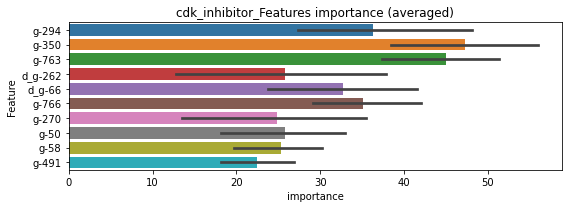

len(train_index) : 3790
len(valid_index) : 3790
================================= fold 1/2 cdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192541	valid_1's binary_logloss: 0.0287878
[200]	training's binary_logloss: 0.00279655	valid_1's binary_logloss: 0.0144522
[300]	training's binary_logloss: 0.000793873	valid_1's binary_logloss: 0.0121691
[400]	training's binary_logloss: 0.0003888	valid_1's binary_logloss: 0.0111784
[500]	training's binary_logloss: 0.000266949	valid_1's binary_logloss: 0.0107791
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000245402	valid_1's binary_logloss: 0.0106822


len(train_index) : 3790
len(valid_index) : 3790
================================= fold 2/2 cdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0170379	valid_1's binary_logloss: 0.0406827
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00337328	valid_1's binary_logloss: 0.0328813


cdk_inhibitor logloss: 0.02178174092547481


neg labels: 3289 → selected neg labels: 3280


chelating_agent, len(trt): 54, len(othr): 3280, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0412472	valid_1's binary_logloss: 0.0852457
[200]	training's binary_logloss: 0.00751067	valid_1's binary_logloss: 0.0447651
[300]	training's binary_logloss: 0.00229532	valid_1's binary_logloss: 0.0342521
[400]	training's binary_logloss: 0.00110444	valid_1's binary_logloss: 0.030762
[500]	training's binary_logloss: 0.000708085	valid_1's binary_logloss: 0.0289684
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000625238	valid_1's binary_logloss: 0.0284756
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.045739	valid_1's binary_logloss: 0.0745616
[200]	training's binary_logloss: 0.00877142	valid_1's binary_logloss: 0.0344464
[300]	training's binary_logloss: 0.00263192	valid_1's binary_logloss: 0.0259999
[400]	training's binary_logloss: 0.00123721	valid_1's binary_logloss: 0.0237335
[500]	training's binary_logloss: 0.000769345	

1 / 3 AUC score:0.999
y_Threshold: 0.0042095, Threshold: 0.0062647, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.00564, conf_1:0.00689
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0062647
Num_p_label: 9.0, Expected: 9.0, Adj_threshold_2: 0.0162647
threshold: 0.0162647, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0433158	valid_1's binary_logloss: 0.0802953
[200]	training's binary_logloss: 0.00836888	valid_1's binary_logloss: 0.0401978
[300]	training's binary_logloss: 0.00249853	valid_1's binary_logloss: 0.0297464
[400]	training's binary_logloss: 0.00118797	valid_1's binary_logloss: 0.0259218
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000920265	valid_1's binary_logloss: 0.0251853
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.044324	valid_1's binary_logloss: 0.0742718
[200]	training's binary_logloss: 0.00826661	valid_1's binary_logloss: 0.029713
[300]	training's binary_logloss: 0.00249992	valid_1's binary_logloss: 0.0189414
[400]	training's binary_logloss: 0.00118276	valid_1's binary_logloss: 0.0154631
[500]	training's binary_logloss: 0.000748946	valid_1's binary_logloss: 0.0138669
[600]	training's binary_logloss: 0.000578203	

2 / 3 AUC score:0.999
y_Threshold: 0.0315741, Threshold: 0.0162647, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0090407 Vs.target_rate: 0.00227
Num_p_label: 36.0, conf_0:0.01464, conf_1:0.01789
Num_p_label: 36.0, Expected: 9.0, Adj_threshold_1: 0.0162647
Num_p_label: 12.0, Expected: 9.0, Adj_threshold_2: 0.0262647
threshold: 0.0262647, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0445145	valid_1's binary_logloss: 0.0809888
[200]	training's binary_logloss: 0.00819215	valid_1's binary_logloss: 0.0406845
[300]	training's binary_logloss: 0.00247331	valid_1's binary_logloss: 0.0307134
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00148559	valid_1's binary_logloss: 0.0284642
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0428851	valid_1's binary_logloss: 0.0800827
[200]	training's binary_logloss: 0.00806561	valid_1's binary_logloss: 0.0370686
[300]	training's binary_logloss: 0.00241871	valid_1's binary_logloss: 0.0270191
[400]	training's binary_logloss: 0.00115416	valid_1's binary_logloss: 0.023252
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00080018	valid_1's binary_logloss: 0.0220364


3 / 3 AUC score:1.000
y_Threshold: 0.0234133, Threshold: 0.0262647, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00227
Num_p_label: 18.0, conf_0:0.02364, conf_1:0.02889
threshold: 0.0262647, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 670.0/7778, y_label_rate: 0.0861404


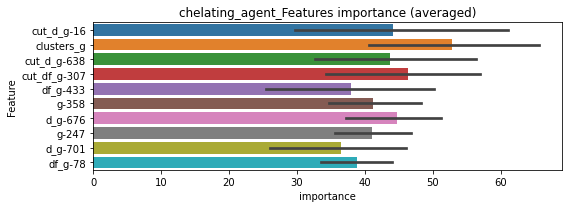

len(train_index) : 3889
len(valid_index) : 3889
================================= fold 1/2 chelating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024014	valid_1's binary_logloss: 0.0515837
[200]	training's binary_logloss: 0.0044215	valid_1's binary_logloss: 0.031486
[300]	training's binary_logloss: 0.00129765	valid_1's binary_logloss: 0.0277305
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000850572	valid_1's binary_logloss: 0.0268719


len(train_index) : 3889
len(valid_index) : 3889
================================= fold 2/2 chelating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251803	valid_1's binary_logloss: 0.0461733
[200]	training's binary_logloss: 0.00486479	valid_1's binary_logloss: 0.0229176
[300]	training's binary_logloss: 0.00144939	valid_1's binary_logloss: 0.0178553
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00084227	valid_1's binary_logloss: 0.0166668


chelating_agent logloss: 0.021769393561616352


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195006	valid_1's binary_logloss: 0.0254968
[200]	training's binary_logloss: 0.00211729	valid_1's binary_logloss: 0.00453192
[300]	training's binary_logloss: 0.000608369	valid_1's binary_logloss: 0.00191325
[400]	training's binary_logloss: 0.000346623	valid_1's binary_logloss: 0.00133342
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000290258	valid_1's binary_logloss: 0.00118192
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196666	valid_1's binary_logloss: 0.0234168
[200]	training's binary_logloss: 0.00211481	valid_1's binary_logloss: 0.00380856
[300]	training's binary_logloss: 0.000611751	valid_1's binary_logloss: 0.0019287
[400]	training's binary_logloss: 0.000350192	valid_1's binary_logloss: 0.0014851
[500]	training's binary_logloss: 0.000296989	valid_1's binary_logloss: 0.00136476
Early stopping, best iteration is

1 / 3 AUC score:1.000
y_Threshold: 0.0017053, Threshold: 0.0085186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00767, conf_1:0.00937
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0085186
Num_p_label: 55.0, Expected: 4.0, Adj_threshold_2: 0.0185186
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_3: 0.0285186
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_4: 0.0385186
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_5: 0.0485186
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_6: 0.0585186
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_7: 0.0685186
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_8: 0.0785186
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_9: 0.0885186
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_10: 0.0985186
threshold: 0.1085186, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189823	valid_1's binary_logloss: 0.024485
[200]	training's binary_logloss: 0.00184221	valid_1's binary_logloss: 0.00403149
[300]	training's binary_logloss: 0.000514283	valid_1's binary_logloss: 0.00165029
[400]	training's binary_logloss: 0.000301497	valid_1's binary_logloss: 0.00112347
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000267392	valid_1's binary_logloss: 0.00104168
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192054	valid_1's binary_logloss: 0.0211257
[200]	training's binary_logloss: 0.00191337	valid_1's binary_logloss: 0.00239533
[300]	training's binary_logloss: 0.000532219	valid_1's binary_logloss: 0.000784924
[400]	training's binary_logloss: 0.000308189	valid_1's binary_logloss: 0.000490776
[500]	training's binary_logloss: 0.000264051	valid_1's binary_logloss: 0.000429733
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.1709773, Threshold: 0.1085186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0220994 Vs.target_rate: 0.00101
Num_p_label: 88.0, conf_0:0.09767, conf_1:0.11937
Num_p_label: 88.0, Expected: 4.0, Adj_threshold_1: 0.1085186
Num_p_label: 85.0, Expected: 4.0, Adj_threshold_2: 0.1185186
Num_p_label: 77.0, Expected: 4.0, Adj_threshold_3: 0.1285186
Num_p_label: 72.0, Expected: 4.0, Adj_threshold_4: 0.1385186
Num_p_label: 70.0, Expected: 4.0, Adj_threshold_5: 0.1485186
Num_p_label: 68.0, Expected: 4.0, Adj_threshold_6: 0.1585186
Num_p_label: 67.0, Expected: 4.0, Adj_threshold_7: 0.1685186
Num_p_label: 66.0, Expected: 4.0, Adj_threshold_8: 0.1785186
Num_p_label: 66.0, Expected: 4.0, Adj_threshold_9: 0.1885186
Num_p_label: 65.0, Expected: 4.0, Adj_threshold_10: 0.1985186
threshold: 0.2085186, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189823	valid_1's binary_logloss: 0.024485
[200]	training's binary_logloss: 0.00184221	valid_1's binary_logloss: 0.00403149
[300]	training's binary_logloss: 0.000514283	valid_1's binary_logloss: 0.00165029
[400]	training's binary_logloss: 0.000301497	valid_1's binary_logloss: 0.00112347
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000267392	valid_1's binary_logloss: 0.00104168
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192054	valid_1's binary_logloss: 0.0211257
[200]	training's binary_logloss: 0.00191337	valid_1's binary_logloss: 0.00239533
[300]	training's binary_logloss: 0.000532219	valid_1's binary_logloss: 0.000784924
[400]	training's binary_logloss: 0.000308189	valid_1's binary_logloss: 0.000490776
[500]	training's binary_logloss: 0.000264051	valid_1's binary_logloss: 0.000429733
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.1709773, Threshold: 0.2085186, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0158212 Vs.target_rate: 0.00101
Num_p_label: 63.0, conf_0:0.18767, conf_1:0.22937
Num_p_label: 63.0, Expected: 4.0, Adj_threshold_1: 0.2085186
Num_p_label: 59.0, Expected: 4.0, Adj_threshold_2: 0.2185186
Num_p_label: 57.0, Expected: 4.0, Adj_threshold_3: 0.2285186
Num_p_label: 57.0, Expected: 4.0, Adj_threshold_4: 0.2385186
Num_p_label: 56.0, Expected: 4.0, Adj_threshold_5: 0.2485186
Num_p_label: 52.0, Expected: 4.0, Adj_threshold_6: 0.2585186
Num_p_label: 50.0, Expected: 4.0, Adj_threshold_7: 0.2685186
Num_p_label: 48.0, Expected: 4.0, Adj_threshold_8: 0.2785186
Num_p_label: 48.0, Expected: 4.0, Adj_threshold_9: 0.2885186
Num_p_label: 47.0, Expected: 4.0, Adj_threshold_10: 0.2985186
threshold: 0.3085186, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 702.0/7792, y_label_rate: 0.0900924


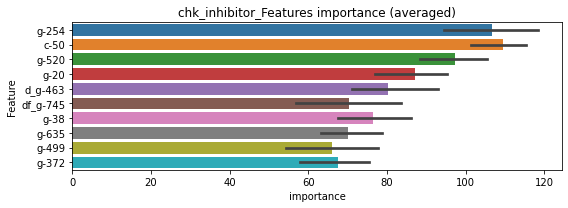

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 chk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124676	valid_1's binary_logloss: 0.0190993
[200]	training's binary_logloss: 0.00155994	valid_1's binary_logloss: 0.00870658
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.000522107	valid_1's binary_logloss: 0.00759285


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 chk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122567	valid_1's binary_logloss: 0.0214046
[200]	training's binary_logloss: 0.00143948	valid_1's binary_logloss: 0.0107483
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.000933171	valid_1's binary_logloss: 0.0102371


chk_inhibitor logloss: 0.008914977136696025


neg labels: 3289 → selected neg labels: 3282


chloride_channel_blocker, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0380639	valid_1's binary_logloss: 0.0716915
[200]	training's binary_logloss: 0.00639953	valid_1's binary_logloss: 0.0291851
[300]	training's binary_logloss: 0.00187203	valid_1's binary_logloss: 0.0200966
[400]	training's binary_logloss: 0.000905617	valid_1's binary_logloss: 0.0172633
[500]	training's binary_logloss: 0.000587735	valid_1's binary_logloss: 0.015864
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000503012	valid_1's binary_logloss: 0.0155423
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0388978	valid_1's binary_logloss: 0.0660755
[200]	training's binary_logloss: 0.00655722	valid_1's binary_logloss: 0.025139
[300]	training's binary_logloss: 0.00196043	valid_1's binary_logloss: 0.0172487
[400]	training's binary_logloss: 0.00094073	valid_1's binary_logloss: 0.0149044
[500]	training's binary_logloss: 0.000609236

1 / 3 AUC score:1.000
y_Threshold: 0.0037399, Threshold: 0.0053956, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00486, conf_1:0.00594
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0053956
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_2: 0.0153956
threshold: 0.0153956, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0379639	valid_1's binary_logloss: 0.0716599
[200]	training's binary_logloss: 0.00635072	valid_1's binary_logloss: 0.0293099
[300]	training's binary_logloss: 0.00186478	valid_1's binary_logloss: 0.0190271
[400]	training's binary_logloss: 0.000903711	valid_1's binary_logloss: 0.0158578
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000707321	valid_1's binary_logloss: 0.0150977
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.038241	valid_1's binary_logloss: 0.0673664
[200]	training's binary_logloss: 0.00633201	valid_1's binary_logloss: 0.0261975
[300]	training's binary_logloss: 0.00190237	valid_1's binary_logloss: 0.0179663
[400]	training's binary_logloss: 0.000926865	valid_1's binary_logloss: 0.0156955
[500]	training's binary_logloss: 0.000601793	valid_1's binary_logloss: 0.0147931
Early stopping, best iteration is:
[512]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0321760, Threshold: 0.0153956, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0110497 Vs.target_rate: 0.00176
Num_p_label: 44.0, conf_0:0.01386, conf_1:0.01694
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_1: 0.0153956
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0253956
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_3: 0.0353956
threshold: 0.0353956, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0383414	valid_1's binary_logloss: 0.0695145
[200]	training's binary_logloss: 0.00631134	valid_1's binary_logloss: 0.0271315
[300]	training's binary_logloss: 0.00182511	valid_1's binary_logloss: 0.0175891
[400]	training's binary_logloss: 0.00088447	valid_1's binary_logloss: 0.0145113
[500]	training's binary_logloss: 0.000576583	valid_1's binary_logloss: 0.0131684
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000507567	valid_1's binary_logloss: 0.0129281
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0388539	valid_1's binary_logloss: 0.0677959
[200]	training's binary_logloss: 0.00636519	valid_1's binary_logloss: 0.0247268
[300]	training's binary_logloss: 0.00192467	valid_1's binary_logloss: 0.0162905
[400]	training's binary_logloss: 0.000917836	valid_1's binary_logloss: 0.0134922
Early stopping, best iteration is:
[440]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0249041, Threshold: 0.0353956, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0015068 Vs.target_rate: 0.00176
Num_p_label: 6.0, conf_0:0.03186, conf_1:0.03894
threshold: 0.0353956, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/7778, y_label_rate: 0.0844690


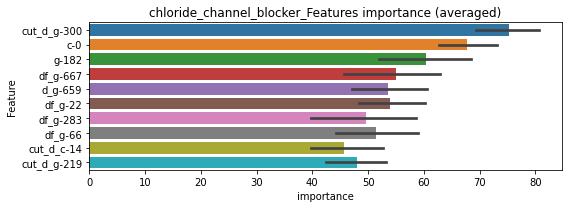

len(train_index) : 3889
len(valid_index) : 3889
================================= fold 1/2 chloride_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0188262	valid_1's binary_logloss: 0.0427819
[200]	training's binary_logloss: 0.00293041	valid_1's binary_logloss: 0.0223748
[300]	training's binary_logloss: 0.000849739	valid_1's binary_logloss: 0.0188189
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00054018	valid_1's binary_logloss: 0.0182216


len(train_index) : 3889
len(valid_index) : 3889
================================= fold 2/2 chloride_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213247	valid_1's binary_logloss: 0.0344399
[200]	training's binary_logloss: 0.00371949	valid_1's binary_logloss: 0.0108972
[300]	training's binary_logloss: 0.00107868	valid_1's binary_logloss: 0.00590392
[400]	training's binary_logloss: 0.000505498	valid_1's binary_logloss: 0.0045889
[500]	training's binary_logloss: 0.000322245	valid_1's binary_logloss: 0.00408326
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000272924	valid_1's binary_logloss: 0.00395039


chloride_channel_blocker logloss: 0.011086013112226999


neg labels: 3289 → selected neg labels: 3281


cholesterol_inhibitor, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0400584	valid_1's binary_logloss: 0.0798913
[200]	training's binary_logloss: 0.00701654	valid_1's binary_logloss: 0.0377843
[300]	training's binary_logloss: 0.00210126	valid_1's binary_logloss: 0.0284263
[400]	training's binary_logloss: 0.00102243	valid_1's binary_logloss: 0.0252359
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000753148	valid_1's binary_logloss: 0.0240298
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0433015	valid_1's binary_logloss: 0.065829
[200]	training's binary_logloss: 0.00832951	valid_1's binary_logloss: 0.0244043
[300]	training's binary_logloss: 0.00247709	valid_1's binary_logloss: 0.0143788
[400]	training's binary_logloss: 0.00118064	valid_1's binary_logloss: 0.0113176
[500]	training's binary_logloss: 0.000746221	valid_1's binary_logloss: 0.010146
[600]	training's binary_logloss: 0.000582992	

1 / 3 AUC score:1.000
y_Threshold: 0.0036947, Threshold: 0.0045273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00407, conf_1:0.00498
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0045273
Num_p_label: 6.0, Expected: 8.0, Adj_threshold_2: 0.0145273
threshold: 0.0145273, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0412066	valid_1's binary_logloss: 0.0822431
[200]	training's binary_logloss: 0.00729596	valid_1's binary_logloss: 0.0391651
[300]	training's binary_logloss: 0.0021637	valid_1's binary_logloss: 0.0289975
[400]	training's binary_logloss: 0.0010439	valid_1's binary_logloss: 0.025524
[500]	training's binary_logloss: 0.000678132	valid_1's binary_logloss: 0.023819
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000563693	valid_1's binary_logloss: 0.0233107
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0437059	valid_1's binary_logloss: 0.0682855
[200]	training's binary_logloss: 0.00821216	valid_1's binary_logloss: 0.024393
[300]	training's binary_logloss: 0.00245405	valid_1's binary_logloss: 0.0142135
[400]	training's binary_logloss: 0.0011714	valid_1's binary_logloss: 0.0112294
[500]	training's binary_logloss: 0.000742224	vali

2 / 3 AUC score:1.000
y_Threshold: 0.0197396, Threshold: 0.0145273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, conf_0:0.01307, conf_1:0.01598
threshold: 0.0145273, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0415938	valid_1's binary_logloss: 0.074676
[200]	training's binary_logloss: 0.00741915	valid_1's binary_logloss: 0.0321452
[300]	training's binary_logloss: 0.00222423	valid_1's binary_logloss: 0.0230508
[400]	training's binary_logloss: 0.00107185	valid_1's binary_logloss: 0.019771
[500]	training's binary_logloss: 0.000692842	valid_1's binary_logloss: 0.0185205
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000684154	valid_1's binary_logloss: 0.0184886
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0413829	valid_1's binary_logloss: 0.0718864
[200]	training's binary_logloss: 0.00767955	valid_1's binary_logloss: 0.0296162
[300]	training's binary_logloss: 0.0023015	valid_1's binary_logloss: 0.0200366
[400]	training's binary_logloss: 0.00110248	valid_1's binary_logloss: 0.0163503
[500]	training's binary_logloss: 0.000710098	v

3 / 3 AUC score:1.000
y_Threshold: 0.0132421, Threshold: 0.0145273, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0025113 Vs.target_rate: 0.00202
Num_p_label: 10.0, conf_0:0.01307, conf_1:0.01598
threshold: 0.0145273, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 663.0/7781, y_label_rate: 0.0852076


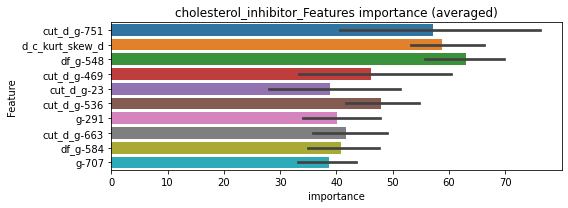

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 cholesterol_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226898	valid_1's binary_logloss: 0.0476843
[200]	training's binary_logloss: 0.00397426	valid_1's binary_logloss: 0.0262353
[300]	training's binary_logloss: 0.00116097	valid_1's binary_logloss: 0.0222861
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000622868	valid_1's binary_logloss: 0.0214444


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 cholesterol_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233083	valid_1's binary_logloss: 0.0461276
[200]	training's binary_logloss: 0.00427122	valid_1's binary_logloss: 0.0223652
[300]	training's binary_logloss: 0.00126708	valid_1's binary_logloss: 0.0164155
[400]	training's binary_logloss: 0.000588536	valid_1's binary_logloss: 0.0142894
[500]	training's binary_logloss: 0.000368603	valid_1's binary_logloss: 0.0133467
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000354705	valid_1's binary_logloss: 0.0132675


cholesterol_inhibitor logloss: 0.01735647027522354


neg labels: 3289 → selected neg labels: 3280


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3280, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.039048	valid_1's binary_logloss: 0.0840977
[200]	training's binary_logloss: 0.00708701	valid_1's binary_logloss: 0.0489881
[300]	training's binary_logloss: 0.00221463	valid_1's binary_logloss: 0.0408222
[400]	training's binary_logloss: 0.00107988	valid_1's binary_logloss: 0.0385474
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000768629	valid_1's binary_logloss: 0.0374231
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0432337	valid_1's binary_logloss: 0.0686371
[200]	training's binary_logloss: 0.00849391	valid_1's binary_logloss: 0.0287432
[300]	training's binary_logloss: 0.00259551	valid_1's binary_logloss: 0.0197495
[400]	training's binary_logloss: 0.00123738	valid_1's binary_logloss: 0.0174047
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00101627	valid_1's binary_logloss: 0.0168169


1 / 3 AUC score:1.000
y_Threshold: 0.0051095, Threshold: 0.0094280, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.00849, conf_1:0.01037
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0094280
Num_p_label: 16.0, Expected: 9.0, Adj_threshold_2: 0.0194280
threshold: 0.0194280, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0419203	valid_1's binary_logloss: 0.0783885
[200]	training's binary_logloss: 0.00773385	valid_1's binary_logloss: 0.0395419
[300]	training's binary_logloss: 0.00237111	valid_1's binary_logloss: 0.0305007
[400]	training's binary_logloss: 0.0011466	valid_1's binary_logloss: 0.0277663
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000777591	valid_1's binary_logloss: 0.0264618
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0434846	valid_1's binary_logloss: 0.0732
[200]	training's binary_logloss: 0.00802342	valid_1's binary_logloss: 0.0318921
[300]	training's binary_logloss: 0.00256302	valid_1's binary_logloss: 0.0228155
[400]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0198843
[500]	training's binary_logloss: 0.000761388	valid_1's binary_logloss: 0.0185672
Early stopping, best iteration is:
[560]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0195752, Threshold: 0.0194280, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0125565 Vs.target_rate: 0.00227
Num_p_label: 50.0, conf_0:0.01749, conf_1:0.02137
Num_p_label: 50.0, Expected: 9.0, Adj_threshold_1: 0.0194280
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0294280
Num_p_label: 14.0, Expected: 9.0, Adj_threshold_3: 0.0394280
threshold: 0.0394280, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0377163	valid_1's binary_logloss: 0.073318
[200]	training's binary_logloss: 0.00691576	valid_1's binary_logloss: 0.0356328
[300]	training's binary_logloss: 0.00213126	valid_1's binary_logloss: 0.026828
[400]	training's binary_logloss: 0.00105029	valid_1's binary_logloss: 0.0236942
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000856891	valid_1's binary_logloss: 0.0230568
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0418566	valid_1's binary_logloss: 0.0658755
[200]	training's binary_logloss: 0.0076874	valid_1's binary_logloss: 0.0250298
[300]	training's binary_logloss: 0.00237044	valid_1's binary_logloss: 0.0150966
[400]	training's binary_logloss: 0.00115087	valid_1's binary_logloss: 0.0119096
[500]	training's binary_logloss: 0.000743576	valid_1's binary_logloss: 0.0105121
Early stopping, best iteration is:
[545]	train

3 / 3 AUC score:1.000
y_Threshold: 0.0194671, Threshold: 0.0394280, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0032647 Vs.target_rate: 0.00227
Num_p_label: 13.0, conf_0:0.03549, conf_1:0.04337
threshold: 0.0394280, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 660.0/7768, y_label_rate: 0.0849640


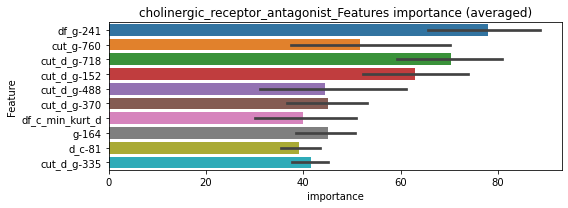

len(train_index) : 3884
len(valid_index) : 3884
================================= fold 1/2 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213157	valid_1's binary_logloss: 0.047949
[200]	training's binary_logloss: 0.00390907	valid_1's binary_logloss: 0.0280605
[300]	training's binary_logloss: 0.00118174	valid_1's binary_logloss: 0.0237292
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00061582	valid_1's binary_logloss: 0.0229337


len(train_index) : 3884
len(valid_index) : 3884
================================= fold 2/2 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219353	valid_1's binary_logloss: 0.0403129
[200]	training's binary_logloss: 0.0041356	valid_1's binary_logloss: 0.0196571
[300]	training's binary_logloss: 0.00128338	valid_1's binary_logloss: 0.0150871
[400]	training's binary_logloss: 0.000613239	valid_1's binary_logloss: 0.01379
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000453909	valid_1's binary_logloss: 0.0135153


cholinergic_receptor_antagonist logloss: 0.018224489201587195


neg labels: 3289 → selected neg labels: 3285


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285088	valid_1's binary_logloss: 0.0419589
[200]	training's binary_logloss: 0.00386134	valid_1's binary_logloss: 0.010393
[300]	training's binary_logloss: 0.001113	valid_1's binary_logloss: 0.00523535
[400]	training's binary_logloss: 0.000561398	valid_1's binary_logloss: 0.00372041
[500]	training's binary_logloss: 0.00040987	valid_1's binary_logloss: 0.00320061
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000410869	valid_1's binary_logloss: 0.00319656
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285423	valid_1's binary_logloss: 0.0419347
[200]	training's binary_logloss: 0.0039057	valid_1's binary_logloss: 0.010756
[300]	training's binary_logloss: 0.00116866	valid_1's binary_logloss: 0.00551032
[400]	training's binary_logloss: 0.000572729	valid_1's binary_logloss: 0.00393087
[500]	training's binary_logloss: 0.000421

1 / 3 AUC score:1.000
y_Threshold: 0.0017857, Threshold: 0.0024137, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00217, conf_1:0.00266
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0024137
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0124137
threshold: 0.0124137, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279233	valid_1's binary_logloss: 0.0426211
[200]	training's binary_logloss: 0.00376779	valid_1's binary_logloss: 0.0108358
[300]	training's binary_logloss: 0.00110135	valid_1's binary_logloss: 0.005343
[400]	training's binary_logloss: 0.000561608	valid_1's binary_logloss: 0.0037314
[500]	training's binary_logloss: 0.000416947	valid_1's binary_logloss: 0.00329806
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000418965	valid_1's binary_logloss: 0.00329238
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286361	valid_1's binary_logloss: 0.0424106
[200]	training's binary_logloss: 0.00379333	valid_1's binary_logloss: 0.0103909
[300]	training's binary_logloss: 0.0011482	valid_1's binary_logloss: 0.0057498
[400]	training's binary_logloss: 0.000567407	valid_1's binary_logloss: 0.0040083
Early stopping, best iteration is:
[438]	

2 / 3 AUC score:1.000
y_Threshold: 0.0463570, Threshold: 0.0124137, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.01117, conf_1:0.01366
threshold: 0.0124137, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279233	valid_1's binary_logloss: 0.0426211
[200]	training's binary_logloss: 0.00376779	valid_1's binary_logloss: 0.0108358
[300]	training's binary_logloss: 0.00110135	valid_1's binary_logloss: 0.005343
[400]	training's binary_logloss: 0.000561608	valid_1's binary_logloss: 0.0037314
[500]	training's binary_logloss: 0.000416947	valid_1's binary_logloss: 0.00329806
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000418965	valid_1's binary_logloss: 0.00329238
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286361	valid_1's binary_logloss: 0.0424106
[200]	training's binary_logloss: 0.00379333	valid_1's binary_logloss: 0.0103909
[300]	training's binary_logloss: 0.0011482	valid_1's binary_logloss: 0.0057498
[400]	training's binary_logloss: 0.000567407	valid_1's binary_logloss: 0.0040083
Early stopping, best iteration is:
[438]	

3 / 3 AUC score:1.000
y_Threshold: 0.0463570, Threshold: 0.0124137, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.01117, conf_1:0.01366
threshold: 0.0124137, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 666.0/7792, y_label_rate: 0.0854723


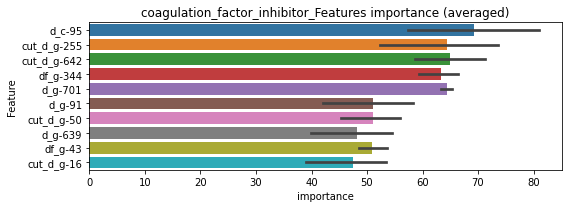

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160208	valid_1's binary_logloss: 0.0272326
[200]	training's binary_logloss: 0.00218917	valid_1's binary_logloss: 0.011635
[300]	training's binary_logloss: 0.000608371	valid_1's binary_logloss: 0.00987105
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000432889	valid_1's binary_logloss: 0.00966398


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162027	valid_1's binary_logloss: 0.0236718
[200]	training's binary_logloss: 0.0022631	valid_1's binary_logloss: 0.00803864
[300]	training's binary_logloss: 0.000645084	valid_1's binary_logloss: 0.00624271
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000355458	valid_1's binary_logloss: 0.00580897


coagulation_factor_inhibitor logloss: 0.007736476758291084


neg labels: 3289 → selected neg labels: 3284


corticosteroid_agonist, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279661	valid_1's binary_logloss: 0.0417388
[200]	training's binary_logloss: 0.00384324	valid_1's binary_logloss: 0.0121509
[300]	training's binary_logloss: 0.00111075	valid_1's binary_logloss: 0.00722062
[400]	training's binary_logloss: 0.000566827	valid_1's binary_logloss: 0.00569712
[500]	training's binary_logloss: 0.000410648	valid_1's binary_logloss: 0.00509158
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000399121	valid_1's binary_logloss: 0.00500244
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289321	valid_1's binary_logloss: 0.045984
[200]	training's binary_logloss: 0.00394617	valid_1's binary_logloss: 0.0131145
[300]	training's binary_logloss: 0.00113815	valid_1's binary_logloss: 0.00780021
[400]	training's binary_logloss: 0.000581211	valid_1's binary_logloss: 0.00607614
[500]	training's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0016310, Threshold: 0.0024701, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00222, conf_1:0.00272
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0024701
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_2: 0.0124701
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_3: 0.0224701
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_4: 0.0324701
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_5: 0.0424701
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.0524701
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_7: 0.0624701
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_8: 0.0724701
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_9: 0.0824701
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_10: 0.0924701
threshold: 0.1024701, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261734	valid_1's binary_logloss: 0.0348718
[200]	training's binary_logloss: 0.00332759	valid_1's binary_logloss: 0.00666564
[300]	training's binary_logloss: 0.000948612	valid_1's binary_logloss: 0.00267231
[400]	training's binary_logloss: 0.000483948	valid_1's binary_logloss: 0.00171972
[500]	training's binary_logloss: 0.000375226	valid_1's binary_logloss: 0.00152457
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.0003615	valid_1's binary_logloss: 0.00148887
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261505	valid_1's binary_logloss: 0.0396292
[200]	training's binary_logloss: 0.00335373	valid_1's binary_logloss: 0.00893255
[300]	training's binary_logloss: 0.000940679	valid_1's binary_logloss: 0.00414782
[400]	training's binary_logloss: 0.000489977	valid_1's binary_logloss: 0.00308782
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0439388, Threshold: 0.1024701, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, conf_0:0.09222, conf_1:0.11272
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1024701
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_2: 0.1124701
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_3: 0.1224701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_4: 0.1324701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_5: 0.1424701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_6: 0.1524701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_7: 0.1624701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_8: 0.1724701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_9: 0.1824701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_10: 0.1924701
threshold: 0.2024701, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261734	valid_1's binary_logloss: 0.0348718
[200]	training's binary_logloss: 0.00332759	valid_1's binary_logloss: 0.00666564
[300]	training's binary_logloss: 0.000948612	valid_1's binary_logloss: 0.00267231
[400]	training's binary_logloss: 0.000483948	valid_1's binary_logloss: 0.00171972
[500]	training's binary_logloss: 0.000375226	valid_1's binary_logloss: 0.00152457
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.0003615	valid_1's binary_logloss: 0.00148887
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261505	valid_1's binary_logloss: 0.0396292
[200]	training's binary_logloss: 0.00335373	valid_1's binary_logloss: 0.00893255
[300]	training's binary_logloss: 0.000940679	valid_1's binary_logloss: 0.00414782
[400]	training's binary_logloss: 0.000489977	valid_1's binary_logloss: 0.00308782
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0439388, Threshold: 0.2024701, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0095429 Vs.target_rate: 0.00151
Num_p_label: 38.0, conf_0:0.18222, conf_1:0.22272
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_1: 0.2024701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_2: 0.2124701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_3: 0.2224701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_4: 0.2324701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_5: 0.2424701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_6: 0.2524701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_7: 0.2624701
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_8: 0.2724701
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_9: 0.2824701
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_10: 0.2924701
threshold: 0.3024701, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 692.0/7790, y_label_rate: 0.0888318


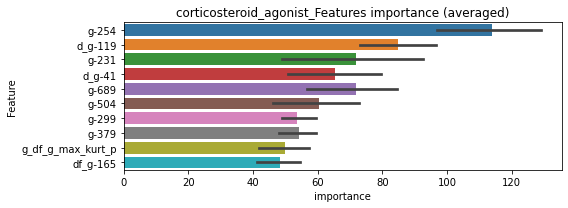

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 corticosteroid_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141197	valid_1's binary_logloss: 0.0276772
[200]	training's binary_logloss: 0.0017558	valid_1's binary_logloss: 0.0108135
[300]	training's binary_logloss: 0.000499804	valid_1's binary_logloss: 0.00749863
[400]	training's binary_logloss: 0.000258777	valid_1's binary_logloss: 0.00627231
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000204011	valid_1's binary_logloss: 0.00601527


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 corticosteroid_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139205	valid_1's binary_logloss: 0.0206933
[200]	training's binary_logloss: 0.00176797	valid_1's binary_logloss: 0.00554667
[300]	training's binary_logloss: 0.000506155	valid_1's binary_logloss: 0.00295903
[400]	training's binary_logloss: 0.00026508	valid_1's binary_logloss: 0.00233142
[500]	training's binary_logloss: 0.000200037	valid_1's binary_logloss: 0.00213118
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000196864	valid_1's binary_logloss: 0.00212409


corticosteroid_agonist logloss: 0.004069681342953351


neg labels: 3289 → selected neg labels: 3215


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3215, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.132138	valid_1's binary_logloss: 0.381589
Early stopping, best iteration is:
[150]	training's binary_logloss: 0.0812189	valid_1's binary_logloss: 0.376475
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.138734	valid_1's binary_logloss: 0.371579
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.076799	valid_1's binary_logloss: 0.362596


1 / 3 AUC score:0.782
y_Threshold: 0.1363752, Threshold: 0.1861641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 717 → Positive_corect_labels: 349/3141
p_label_rate: 0.0200904 Vs.target_rate: 0.01827
Num_p_label: 80.0, conf_0:0.16755, conf_1:0.20478
threshold: 0.1861641, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 349.0/3141, y_label_rate: 0.1111111
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0674632	valid_1's binary_logloss: 0.226945
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0448323	valid_1's binary_logloss: 0.216834
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0673972	valid_1's binary_logloss: 0.2489
Early stopping, best iteration is:
[156]	training's binary_logloss: 0.0332455	valid_1's binary_logloss: 0.236647


2 / 3 AUC score:0.926
y_Threshold: 0.0900534, Threshold: 0.1861641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 208 → Positive_corect_labels: 245.0/2933
p_label_rate: 0.0012557 Vs.target_rate: 0.01827
Num_p_label: 5.0, conf_0:0.16755, conf_1:0.20478
Num_p_label: 5.0, Expected: 72.7, Adj_threshold_1: 0.1861641
Num_p_label: 7.0, Expected: 72.7, Adj_threshold_2: 0.1761641
Num_p_label: 12.0, Expected: 72.7, Adj_threshold_3: 0.1661641
Num_p_label: 21.0, Expected: 72.7, Adj_threshold_4: 0.1561641
Num_p_label: 30.0, Expected: 72.7, Adj_threshold_5: 0.1461641
Num_p_label: 41.0, Expected: 72.7, Adj_threshold_6: 0.1361641
threshold: 0.1361641, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 245.0/2933, y_label_rate: 0.0835322
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0429531	valid_1's binary_logloss: 0.184209
Early stopping, best iteration is:
[132]	training's binary_logloss: 0.0272891	valid_1's binary_logloss: 0.178018
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0447213	valid_1's binary_logloss: 0.183578
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.0288428	valid_1's binary_logloss: 0.177974


3 / 3 AUC score:0.945
y_Threshold: 0.0668669, Threshold: 0.1361641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 128 → Positive_corect_labels: 181.0/2805
p_label_rate: 0.0052737 Vs.target_rate: 0.01827
Num_p_label: 21.0, conf_0:0.12255, conf_1:0.14978
Num_p_label: 21.0, Expected: 72.7, Adj_threshold_1: 0.1361641
Num_p_label: 30.0, Expected: 72.7, Adj_threshold_2: 0.1261641
Num_p_label: 37.0, Expected: 72.7, Adj_threshold_3: 0.1161641
threshold: 0.1161641, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 218.0/6787, y_label_rate: 0.0321202


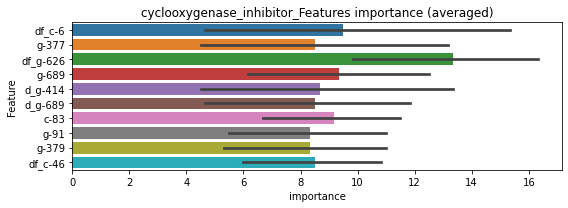

len(train_index) : 3393
len(valid_index) : 3394
================================= fold 1/2 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.0252805	valid_1's binary_logloss: 0.103997


len(train_index) : 3394
len(valid_index) : 3393
================================= fold 2/2 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165948	valid_1's binary_logloss: 0.0965022
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.0124931	valid_1's binary_logloss: 0.0960033


cyclooxygenase_inhibitor logloss: 0.10000071717266458


neg labels: 3289 → selected neg labels: 3274


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3274, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0581352	valid_1's binary_logloss: 0.137494
[200]	training's binary_logloss: 0.014572	valid_1's binary_logloss: 0.0958202
[300]	training's binary_logloss: 0.00483808	valid_1's binary_logloss: 0.0858684
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00251728	valid_1's binary_logloss: 0.0826398
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0668337	valid_1's binary_logloss: 0.123328
[200]	training's binary_logloss: 0.0169364	valid_1's binary_logloss: 0.077176
[300]	training's binary_logloss: 0.00583365	valid_1's binary_logloss: 0.0646837
[400]	training's binary_logloss: 0.00257714	valid_1's binary_logloss: 0.0601363
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00204498	valid_1's binary_logloss: 0.0586969


1 / 3 AUC score:0.995
y_Threshold: 0.0128541, Threshold: 0.0153053, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 160 → Positive_corect_labels: 640/3768
p_label_rate: 0.0200904 Vs.target_rate: 0.00437
Num_p_label: 80.0, conf_0:0.01377, conf_1:0.01684
Num_p_label: 80.0, Expected: 17.4, Adj_threshold_1: 0.0153053
Num_p_label: 23.0, Expected: 17.4, Adj_threshold_2: 0.0253053
threshold: 0.0253053, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0554986	valid_1's binary_logloss: 0.127481
[200]	training's binary_logloss: 0.0131563	valid_1's binary_logloss: 0.0900693
[300]	training's binary_logloss: 0.00435336	valid_1's binary_logloss: 0.081821
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00313023	valid_1's binary_logloss: 0.0805461
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0609349	valid_1's binary_logloss: 0.12312
[200]	training's binary_logloss: 0.0148832	valid_1's binary_logloss: 0.0800335
[300]	training's binary_logloss: 0.00483292	valid_1's binary_logloss: 0.0672796
[400]	training's binary_logloss: 0.00222535	valid_1's binary_logloss: 0.0627223
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00150347	valid_1's binary_logloss: 0.0603261


2 / 3 AUC score:0.998
y_Threshold: 0.0271038, Threshold: 0.0253053, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0092918 Vs.target_rate: 0.00437
Num_p_label: 37.0, conf_0:0.02277, conf_1:0.02784
threshold: 0.0253053, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 623.0/3734, y_label_rate: 0.1668452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0555551	valid_1's binary_logloss: 0.11811
[200]	training's binary_logloss: 0.0126954	valid_1's binary_logloss: 0.0778382
[300]	training's binary_logloss: 0.00413677	valid_1's binary_logloss: 0.0678675
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00280834	valid_1's binary_logloss: 0.0656926
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0558259	valid_1's binary_logloss: 0.114395
[200]	training's binary_logloss: 0.0132407	valid_1's binary_logloss: 0.0718792
[300]	training's binary_logloss: 0.0043057	valid_1's binary_logloss: 0.0622736
[400]	training's binary_logloss: 0.00201472	valid_1's binary_logloss: 0.059518
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00141497	valid_1's binary_logloss: 0.0581619


3 / 3 AUC score:0.999
y_Threshold: 0.0284069, Threshold: 0.0253053, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 610.0/3708
p_label_rate: 0.0087896 Vs.target_rate: 0.00437
Num_p_label: 35.0, conf_0:0.02277, conf_1:0.02784
threshold: 0.0253053, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 645.0/7690, y_label_rate: 0.0838752


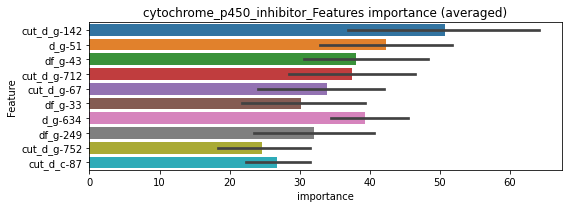

len(train_index) : 3845
len(valid_index) : 3845
================================= fold 1/2 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317276	valid_1's binary_logloss: 0.0787728
[200]	training's binary_logloss: 0.00774415	valid_1's binary_logloss: 0.0584858
[300]	training's binary_logloss: 0.00252043	valid_1's binary_logloss: 0.0541783
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00181044	valid_1's binary_logloss: 0.0534714


len(train_index) : 3845
len(valid_index) : 3845
================================= fold 2/2 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0320724	valid_1's binary_logloss: 0.0769651
[200]	training's binary_logloss: 0.00758319	valid_1's binary_logloss: 0.0581054
[300]	training's binary_logloss: 0.00236029	valid_1's binary_logloss: 0.0553493
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0023857	valid_1's binary_logloss: 0.0553218


cytochrome_p450_inhibitor logloss: 0.05439659515584378


neg labels: 3289 → selected neg labels: 3283


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292088	valid_1's binary_logloss: 0.0421541
[200]	training's binary_logloss: 0.00421551	valid_1's binary_logloss: 0.0124065
[300]	training's binary_logloss: 0.00125972	valid_1's binary_logloss: 0.00748762
[400]	training's binary_logloss: 0.000638737	valid_1's binary_logloss: 0.00583057
[500]	training's binary_logloss: 0.000450115	valid_1's binary_logloss: 0.0053075
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000423346	valid_1's binary_logloss: 0.00523705
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030869	valid_1's binary_logloss: 0.0526755
[200]	training's binary_logloss: 0.00449013	valid_1's binary_logloss: 0.0147896
[300]	training's binary_logloss: 0.00133422	valid_1's binary_logloss: 0.00832442
[400]	training's binary_logloss: 0.000656114	valid_1's binary_logloss: 0.00616921
Early stopping, best iteration is:
[4

1 / 3 AUC score:1.000
y_Threshold: 0.0019067, Threshold: 0.0028517, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00257, conf_1:0.00314
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0028517
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.0128517
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_3: 0.0228517
threshold: 0.0228517, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293762	valid_1's binary_logloss: 0.04142
[200]	training's binary_logloss: 0.00418682	valid_1's binary_logloss: 0.0110173
[300]	training's binary_logloss: 0.00123626	valid_1's binary_logloss: 0.00599219
[400]	training's binary_logloss: 0.000625579	valid_1's binary_logloss: 0.00451115
[500]	training's binary_logloss: 0.00044347	valid_1's binary_logloss: 0.00404935
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000425288	valid_1's binary_logloss: 0.00400102
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0303428	valid_1's binary_logloss: 0.0534549
[200]	training's binary_logloss: 0.00426594	valid_1's binary_logloss: 0.0155043
[300]	training's binary_logloss: 0.0012971	valid_1's binary_logloss: 0.00915988
[400]	training's binary_logloss: 0.000626187	valid_1's binary_logloss: 0.00648959
Early stopping, best iteration is:
[431

2 / 3 AUC score:1.000
y_Threshold: 0.0123625, Threshold: 0.0228517, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, conf_0:0.02057, conf_1:0.02514
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0228517
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.0328517
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.0428517
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.0528517
threshold: 0.0528517, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293762	valid_1's binary_logloss: 0.04142
[200]	training's binary_logloss: 0.00418682	valid_1's binary_logloss: 0.0110173
[300]	training's binary_logloss: 0.00123626	valid_1's binary_logloss: 0.00599219
[400]	training's binary_logloss: 0.000625579	valid_1's binary_logloss: 0.00451115
[500]	training's binary_logloss: 0.00044347	valid_1's binary_logloss: 0.00404935
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000425288	valid_1's binary_logloss: 0.00400102
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0303428	valid_1's binary_logloss: 0.0534549
[200]	training's binary_logloss: 0.00426594	valid_1's binary_logloss: 0.0155043
[300]	training's binary_logloss: 0.0012971	valid_1's binary_logloss: 0.00915988
[400]	training's binary_logloss: 0.000626187	valid_1's binary_logloss: 0.00648959
Early stopping, best iteration is:
[431

3 / 3 AUC score:1.000
y_Threshold: 0.0123625, Threshold: 0.0528517, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.04757, conf_1:0.05814
threshold: 0.0528517, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 668.0/7789, y_label_rate: 0.0857620


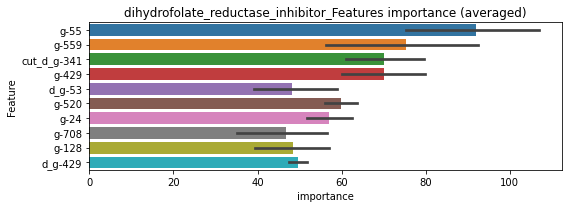

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153082	valid_1's binary_logloss: 0.0291684
[200]	training's binary_logloss: 0.00213977	valid_1's binary_logloss: 0.0146885
[300]	training's binary_logloss: 0.000617655	valid_1's binary_logloss: 0.013066
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000492065	valid_1's binary_logloss: 0.0127984


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.015896	valid_1's binary_logloss: 0.0245865
[200]	training's binary_logloss: 0.00227718	valid_1's binary_logloss: 0.00736008
[300]	training's binary_logloss: 0.000655641	valid_1's binary_logloss: 0.00453023
[400]	training's binary_logloss: 0.000327736	valid_1's binary_logloss: 0.00385768
[500]	training's binary_logloss: 0.000232742	valid_1's binary_logloss: 0.00357813
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000231773	valid_1's binary_logloss: 0.00357401


dihydrofolate_reductase_inhibitor logloss: 0.008187387260509361


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02838	valid_1's binary_logloss: 0.0439197
[200]	training's binary_logloss: 0.00381857	valid_1's binary_logloss: 0.0131466
[300]	training's binary_logloss: 0.00109188	valid_1's binary_logloss: 0.00759486
[400]	training's binary_logloss: 0.000556806	valid_1's binary_logloss: 0.00618451
[500]	training's binary_logloss: 0.000405748	valid_1's binary_logloss: 0.00570436
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000405748	valid_1's binary_logloss: 0.00570436
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296048	valid_1's binary_logloss: 0.0384039
[200]	training's binary_logloss: 0.00414253	valid_1's binary_logloss: 0.00838838
[300]	training's binary_logloss: 0.00118249	valid_1's binary_logloss: 0.00347467
[400]	training's binary_logloss: 0.000591256	valid_1's binary_logloss: 0.0022338
[500]	training's binary_logloss: 0.00

1 / 3 AUC score:1.000
y_Threshold: 0.0019672, Threshold: 0.0026825, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00241, conf_1:0.00295
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0026825
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0126825
threshold: 0.0126825, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273307	valid_1's binary_logloss: 0.044327
[200]	training's binary_logloss: 0.00363229	valid_1's binary_logloss: 0.0133798
[300]	training's binary_logloss: 0.00105265	valid_1's binary_logloss: 0.00781472
[400]	training's binary_logloss: 0.000547072	valid_1's binary_logloss: 0.00639753
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000421755	valid_1's binary_logloss: 0.00601403
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298641	valid_1's binary_logloss: 0.0371313
[200]	training's binary_logloss: 0.00411778	valid_1's binary_logloss: 0.00728106
[300]	training's binary_logloss: 0.00117946	valid_1's binary_logloss: 0.00282797
[400]	training's binary_logloss: 0.000595014	valid_1's binary_logloss: 0.00175956
[500]	training's binary_logloss: 0.000424286	valid_1's binary_logloss: 0.00143374
Early stopping, best iteration is:


2 / 3 AUC score:1.000
y_Threshold: 0.0722453, Threshold: 0.0126825, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00105
Num_p_label: 18.0, conf_0:0.01141, conf_1:0.01395
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_1: 0.0126825
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0226825
threshold: 0.0226825, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273307	valid_1's binary_logloss: 0.044327
[200]	training's binary_logloss: 0.00363229	valid_1's binary_logloss: 0.0133798
[300]	training's binary_logloss: 0.00105265	valid_1's binary_logloss: 0.00781472
[400]	training's binary_logloss: 0.000547072	valid_1's binary_logloss: 0.00639753
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000421755	valid_1's binary_logloss: 0.00601403
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298641	valid_1's binary_logloss: 0.0371313
[200]	training's binary_logloss: 0.00411778	valid_1's binary_logloss: 0.00728106
[300]	training's binary_logloss: 0.00117946	valid_1's binary_logloss: 0.00282797
[400]	training's binary_logloss: 0.000595014	valid_1's binary_logloss: 0.00175956
[500]	training's binary_logloss: 0.000424286	valid_1's binary_logloss: 0.00143374
Early stopping, best iteration is:


3 / 3 AUC score:1.000
y_Threshold: 0.0722453, Threshold: 0.0226825, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.02041, conf_1:0.02495
threshold: 0.0226825, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 665.0/7792, y_label_rate: 0.0853439


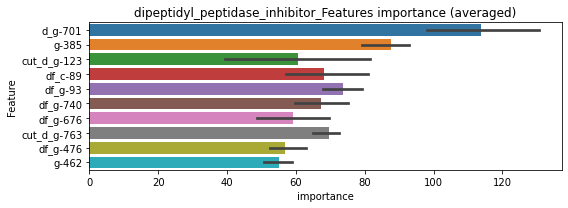

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156688	valid_1's binary_logloss: 0.0274813
[200]	training's binary_logloss: 0.00205025	valid_1's binary_logloss: 0.0106942
[300]	training's binary_logloss: 0.0005769	valid_1's binary_logloss: 0.00922272
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000500484	valid_1's binary_logloss: 0.00912706


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163479	valid_1's binary_logloss: 0.0223232
[200]	training's binary_logloss: 0.00232832	valid_1's binary_logloss: 0.00677614
[300]	training's binary_logloss: 0.000662878	valid_1's binary_logloss: 0.00428714
[400]	training's binary_logloss: 0.000321705	valid_1's binary_logloss: 0.0037214
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000245312	valid_1's binary_logloss: 0.00360146


dipeptidyl_peptidase_inhibitor logloss: 0.00636425970649317


neg labels: 3289 → selected neg labels: 3288


diuretic, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160999	valid_1's binary_logloss: 0.0174437
[200]	training's binary_logloss: 0.00138064	valid_1's binary_logloss: 0.00200991
[300]	training's binary_logloss: 0.000386225	valid_1's binary_logloss: 0.000804639
[400]	training's binary_logloss: 0.000240412	valid_1's binary_logloss: 0.000598662
[500]	training's binary_logloss: 0.000209651	valid_1's binary_logloss: 0.000557067
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000210345	valid_1's binary_logloss: 0.000556834
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161902	valid_1's binary_logloss: 0.0183606
[200]	training's binary_logloss: 0.00139519	valid_1's binary_logloss: 0.0026594
[300]	training's binary_logloss: 0.000383968	valid_1's binary_logloss: 0.00122037
[400]	training's binary_logloss: 0.00023944	valid_1's binary_logloss: 0.000962109
[500]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0005465, Threshold: 0.0009495, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00085, conf_1:0.00104
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0009495
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0109495
threshold: 0.0109495, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165093	valid_1's binary_logloss: 0.0179036
[200]	training's binary_logloss: 0.00139331	valid_1's binary_logloss: 0.00223445
[300]	training's binary_logloss: 0.000382578	valid_1's binary_logloss: 0.00104355
[400]	training's binary_logloss: 0.000240092	valid_1's binary_logloss: 0.000827025
[500]	training's binary_logloss: 0.00020865	valid_1's binary_logloss: 0.000790791
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000208429	valid_1's binary_logloss: 0.000790547
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165729	valid_1's binary_logloss: 0.0182585
[200]	training's binary_logloss: 0.00141523	valid_1's binary_logloss: 0.00207276
[300]	training's binary_logloss: 0.000386863	valid_1's binary_logloss: 0.000775383
[400]	training's binary_logloss: 0.000240314	valid_1's binary_logloss: 0.000555759
[500]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0697329, Threshold: 0.0109495, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.00985, conf_1:0.01204
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0109495
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0209495
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0309495
threshold: 0.0309495, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165093	valid_1's binary_logloss: 0.0179036
[200]	training's binary_logloss: 0.00139331	valid_1's binary_logloss: 0.00223445
[300]	training's binary_logloss: 0.000382578	valid_1's binary_logloss: 0.00104355
[400]	training's binary_logloss: 0.000240092	valid_1's binary_logloss: 0.000827025
[500]	training's binary_logloss: 0.00020865	valid_1's binary_logloss: 0.000790791
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000208429	valid_1's binary_logloss: 0.000790547
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165729	valid_1's binary_logloss: 0.0182585
[200]	training's binary_logloss: 0.00141523	valid_1's binary_logloss: 0.00207276
[300]	training's binary_logloss: 0.000386863	valid_1's binary_logloss: 0.000775383
[400]	training's binary_logloss: 0.000240314	valid_1's binary_logloss: 0.000555759
[500]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0697329, Threshold: 0.0309495, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.02785, conf_1:0.03404
threshold: 0.0309495, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


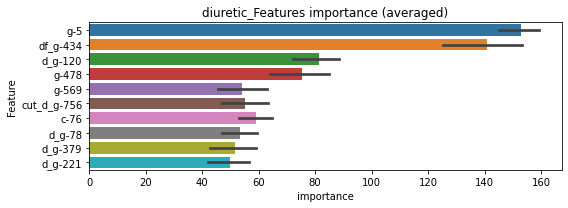

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 diuretic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00874029	valid_1's binary_logloss: 0.01005
[200]	training's binary_logloss: 0.000730218	valid_1's binary_logloss: 0.00237107
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.000230845	valid_1's binary_logloss: 0.00202847


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 diuretic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00876277	valid_1's binary_logloss: 0.0115624
[200]	training's binary_logloss: 0.000744507	valid_1's binary_logloss: 0.00336087
[300]	training's binary_logloss: 0.000205301	valid_1's binary_logloss: 0.00262254
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.000168116	valid_1's binary_logloss: 0.00255042


diuretic logloss: 0.002289412658447786


neg labels: 3289 → selected neg labels: 3281


dna_alkylating_agent, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0378862	valid_1's binary_logloss: 0.0773321
[200]	training's binary_logloss: 0.00646058	valid_1's binary_logloss: 0.0401637
[300]	training's binary_logloss: 0.00196879	valid_1's binary_logloss: 0.0321998
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00147599	valid_1's binary_logloss: 0.0308673
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0402973	valid_1's binary_logloss: 0.0706704
[200]	training's binary_logloss: 0.00716774	valid_1's binary_logloss: 0.0289164
[300]	training's binary_logloss: 0.00218012	valid_1's binary_logloss: 0.0198873
[400]	training's binary_logloss: 0.00104092	valid_1's binary_logloss: 0.0169124
[500]	training's binary_logloss: 0.000671741	valid_1's binary_logloss: 0.0155446
[600]	training's binary_logloss: 0.000546074	valid_1's binary_logloss: 0.0150554
Early stopping, best iteration is:
[590]	tr

1 / 3 AUC score:0.999
y_Threshold: 0.0065030, Threshold: 0.0090724, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00817, conf_1:0.00998
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0090724
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_2: 0.0190724
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_3: 0.0290724
threshold: 0.0290724, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0373168	valid_1's binary_logloss: 0.0708099
[200]	training's binary_logloss: 0.00617924	valid_1's binary_logloss: 0.0337875
[300]	training's binary_logloss: 0.00188559	valid_1's binary_logloss: 0.0250646
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00105067	valid_1's binary_logloss: 0.022734
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0389771	valid_1's binary_logloss: 0.0678667
[200]	training's binary_logloss: 0.00668868	valid_1's binary_logloss: 0.0282808
[300]	training's binary_logloss: 0.00203492	valid_1's binary_logloss: 0.0213211
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00109683	valid_1's binary_logloss: 0.0196909


2 / 3 AUC score:1.000
y_Threshold: 0.0231224, Threshold: 0.0290724, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0097941 Vs.target_rate: 0.00202
Num_p_label: 39.0, conf_0:0.02617, conf_1:0.03198
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_1: 0.0290724
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.0390724
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_3: 0.0490724
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_4: 0.0590724
threshold: 0.0590724, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0379708	valid_1's binary_logloss: 0.0686812
[200]	training's binary_logloss: 0.00650867	valid_1's binary_logloss: 0.0281937
[300]	training's binary_logloss: 0.00197197	valid_1's binary_logloss: 0.0194364
[400]	training's binary_logloss: 0.000967145	valid_1's binary_logloss: 0.0167648
[500]	training's binary_logloss: 0.000641875	valid_1's binary_logloss: 0.0158699
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000578157	valid_1's binary_logloss: 0.0157464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0391319	valid_1's binary_logloss: 0.0670268
[200]	training's binary_logloss: 0.0065477	valid_1's binary_logloss: 0.0258751
[300]	training's binary_logloss: 0.00196843	valid_1's binary_logloss: 0.0172147
[400]	training's binary_logloss: 0.000967464	valid_1's binary_logloss: 0.0145183
[500]	training's binary_logloss: 0.0006339

3 / 3 AUC score:1.000
y_Threshold: 0.0245437, Threshold: 0.0590724, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, conf_0:0.05317, conf_1:0.06498
threshold: 0.0590724, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 663.0/7773, y_label_rate: 0.0852953


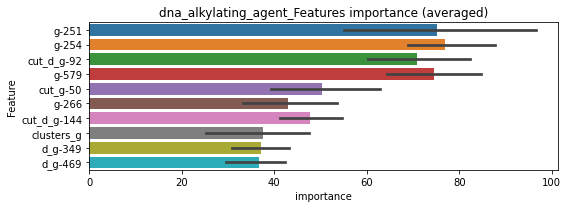

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 dna_alkylating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190363	valid_1's binary_logloss: 0.0427569
[200]	training's binary_logloss: 0.00314232	valid_1's binary_logloss: 0.0223938
[300]	training's binary_logloss: 0.000948866	valid_1's binary_logloss: 0.0183158
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000553106	valid_1's binary_logloss: 0.0173616


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 dna_alkylating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021428	valid_1's binary_logloss: 0.0410673
[200]	training's binary_logloss: 0.00367753	valid_1's binary_logloss: 0.0193279
[300]	training's binary_logloss: 0.00108385	valid_1's binary_logloss: 0.0150424
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000624987	valid_1's binary_logloss: 0.0138275


dna_alkylating_agent logloss: 0.015594783701244246


neg labels: 3289 → selected neg labels: 3229


dna_inhibitor, len(trt): 402, len(othr): 3229, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.124887	valid_1's binary_logloss: 0.345771
Early stopping, best iteration is:
[141]	training's binary_logloss: 0.0815256	valid_1's binary_logloss: 0.338152
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.11743	valid_1's binary_logloss: 0.356103
Early stopping, best iteration is:
[144]	training's binary_logloss: 0.0747694	valid_1's binary_logloss: 0.349576


1 / 3 AUC score:0.818
y_Threshold: 0.1177698, Threshold: 0.1689365, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 610 → Positive_corect_labels: 405/3264
p_label_rate: 0.0200904 Vs.target_rate: 0.01688
Num_p_label: 80.0, conf_0:0.15204, conf_1:0.18583
threshold: 0.1689365, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 405.0/3264, y_label_rate: 0.1240809
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.065163	valid_1's binary_logloss: 0.240634
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0310263	valid_1's binary_logloss: 0.229218
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.066156	valid_1's binary_logloss: 0.258322
Early stopping, best iteration is:
[130]	training's binary_logloss: 0.0439953	valid_1's binary_logloss: 0.25464


2 / 3 AUC score:0.916
y_Threshold: 0.0776925, Threshold: 0.1689365, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 254 → Positive_corect_labels: 278.0/3010
p_label_rate: 0.0384229 Vs.target_rate: 0.01688
Num_p_label: 153.0, conf_0:0.15204, conf_1:0.18583
threshold: 0.1689365, positive_p_label: 153.0/3982, p_label_rate: 0.0384229
positive_y_label: 278.0/3010, y_label_rate: 0.0923588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0382349	valid_1's binary_logloss: 0.144396
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.0108871	valid_1's binary_logloss: 0.130435
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0395449	valid_1's binary_logloss: 0.161175
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.0126955	valid_1's binary_logloss: 0.150894


3 / 3 AUC score:0.962
y_Threshold: 0.0484290, Threshold: 0.1689365, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 100 → Positive_corect_labels: 228.0/2910
p_label_rate: 0.0575088 Vs.target_rate: 0.01688
Num_p_label: 229.0, conf_0:0.15204, conf_1:0.18583
Num_p_label: 229.0, Expected: 67.2, Adj_threshold_1: 0.1689365
Num_p_label: 218.0, Expected: 67.2, Adj_threshold_2: 0.1789365
Num_p_label: 213.0, Expected: 67.2, Adj_threshold_3: 0.1889365
Num_p_label: 212.0, Expected: 67.2, Adj_threshold_4: 0.1989365
Num_p_label: 210.0, Expected: 67.2, Adj_threshold_5: 0.2089365
Num_p_label: 209.0, Expected: 67.2, Adj_threshold_6: 0.2189365
Num_p_label: 207.0, Expected: 67.2, Adj_threshold_7: 0.2289365
Num_p_label: 205.0, Expected: 67.2, Adj_threshold_8: 0.2389365
Num_p_label: 203.0, Expected: 67.2, Adj_threshold_9: 0.2489365
Num_p_label: 198.0, Expected: 67.2, Adj_threshold_10: 0.2589365
threshold: 0.2689365, positive_p_label: 194.0/3982, p_label_rate: 0.0487192
positive_y_label: 422.0/6892, y_label_r

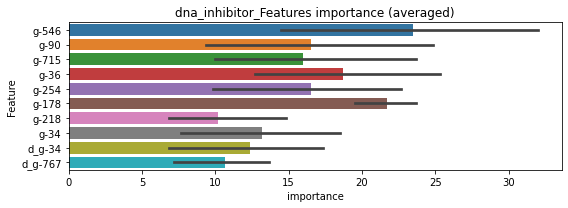

len(train_index) : 3446
len(valid_index) : 3446
================================= fold 1/2 dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0199221	valid_1's binary_logloss: 0.0784652
[200]	training's binary_logloss: 0.00424608	valid_1's binary_logloss: 0.0721989
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00466909	valid_1's binary_logloss: 0.0721083


len(train_index) : 3446
len(valid_index) : 3446
================================= fold 2/2 dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205088	valid_1's binary_logloss: 0.0690387
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00574362	valid_1's binary_logloss: 0.0607248


dna_inhibitor logloss: 0.06641654527928474


neg labels: 3289 → selected neg labels: 3267


dopamine_receptor_agonist, len(trt): 121, len(othr): 3267, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0665879	valid_1's binary_logloss: 0.149117
[200]	training's binary_logloss: 0.0180322	valid_1's binary_logloss: 0.110544
[300]	training's binary_logloss: 0.006084	valid_1's binary_logloss: 0.0999649
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.0051503	valid_1's binary_logloss: 0.0990041
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0716626	valid_1's binary_logloss: 0.158089
[200]	training's binary_logloss: 0.020564	valid_1's binary_logloss: 0.117137
[300]	training's binary_logloss: 0.00691623	valid_1's binary_logloss: 0.108746
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0075241	valid_1's binary_logloss: 0.108536


1 / 3 AUC score:0.989
y_Threshold: 0.0242863, Threshold: 0.0315165, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 173 → Positive_corect_labels: 632/3747
p_label_rate: 0.0200904 Vs.target_rate: 0.00508
Num_p_label: 80.0, conf_0:0.02836, conf_1:0.03467
Num_p_label: 80.0, Expected: 20.2, Adj_threshold_1: 0.0315165
Num_p_label: 28.0, Expected: 20.2, Adj_threshold_2: 0.0415165
threshold: 0.0415165, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 632.0/3747, y_label_rate: 0.1686683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0627881	valid_1's binary_logloss: 0.138679
[200]	training's binary_logloss: 0.0161668	valid_1's binary_logloss: 0.0951211
[300]	training's binary_logloss: 0.00533921	valid_1's binary_logloss: 0.0838428
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00284869	valid_1's binary_logloss: 0.0801282
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0708664	valid_1's binary_logloss: 0.144656
[200]	training's binary_logloss: 0.0193534	valid_1's binary_logloss: 0.0989212
[300]	training's binary_logloss: 0.00637544	valid_1's binary_logloss: 0.0885264
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00441079	valid_1's binary_logloss: 0.0862403


2 / 3 AUC score:0.992
y_Threshold: 0.0357587, Threshold: 0.0415165, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 48 → Positive_corect_labels: 608.0/3699
p_label_rate: 0.0087896 Vs.target_rate: 0.00508
Num_p_label: 35.0, conf_0:0.03736, conf_1:0.04567
threshold: 0.0415165, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 608.0/3699, y_label_rate: 0.1643687
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0605547	valid_1's binary_logloss: 0.126685
[200]	training's binary_logloss: 0.0152748	valid_1's binary_logloss: 0.0823127
[300]	training's binary_logloss: 0.00512405	valid_1's binary_logloss: 0.070829
[400]	training's binary_logloss: 0.00235044	valid_1's binary_logloss: 0.0669182
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00230714	valid_1's binary_logloss: 0.0667672
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0628106	valid_1's binary_logloss: 0.129461
[200]	training's binary_logloss: 0.0159436	valid_1's binary_logloss: 0.0896452
[300]	training's binary_logloss: 0.00525548	valid_1's binary_logloss: 0.0787573
[400]	training's binary_logloss: 0.00240363	valid_1's binary_logloss: 0.0761949
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00243277	valid_1's binary_logloss: 0.076052


3 / 3 AUC score:0.997
y_Threshold: 0.0319060, Threshold: 0.0415165, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 593.0/3669
p_label_rate: 0.0070316 Vs.target_rate: 0.00508
Num_p_label: 28.0, conf_0:0.03736, conf_1:0.04567
threshold: 0.0415165, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 621.0/7651, y_label_rate: 0.0811659


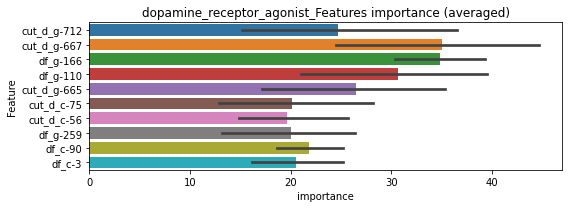

len(train_index) : 3825
len(valid_index) : 3826
================================= fold 1/2 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0338836	valid_1's binary_logloss: 0.0865876
[200]	training's binary_logloss: 0.00827718	valid_1's binary_logloss: 0.0662459
[300]	training's binary_logloss: 0.00266958	valid_1's binary_logloss: 0.0627675
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00236973	valid_1's binary_logloss: 0.062541


len(train_index) : 3826
len(valid_index) : 3825
================================= fold 2/2 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347986	valid_1's binary_logloss: 0.0774063
[200]	training's binary_logloss: 0.00867646	valid_1's binary_logloss: 0.0543782
[300]	training's binary_logloss: 0.00282943	valid_1's binary_logloss: 0.0490811
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00195824	valid_1's binary_logloss: 0.048282


dopamine_receptor_agonist logloss: 0.05541245396634612


neg labels: 3289 → selected neg labels: 3221


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3221, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.128155	valid_1's binary_logloss: 0.374612
Early stopping, best iteration is:
[132]	training's binary_logloss: 0.0931778	valid_1's binary_logloss: 0.370867
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.127748	valid_1's binary_logloss: 0.364576
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.0857025	valid_1's binary_logloss: 0.357449


1 / 3 AUC score:0.784
y_Threshold: 0.1349266, Threshold: 0.1857638, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 715 → Positive_corect_labels: 351/3150
p_label_rate: 0.0200904 Vs.target_rate: 0.01780
Num_p_label: 80.0, conf_0:0.16719, conf_1:0.20434
threshold: 0.1857638, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 351.0/3150, y_label_rate: 0.1114286
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0633521	valid_1's binary_logloss: 0.212533
Early stopping, best iteration is:
[171]	training's binary_logloss: 0.0255044	valid_1's binary_logloss: 0.199556
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0639499	valid_1's binary_logloss: 0.21325
[200]	training's binary_logloss: 0.0190731	valid_1's binary_logloss: 0.196264
Early stopping, best iteration is:
[195]	training's binary_logloss: 0.0201542	valid_1's binary_logloss: 0.195838


2 / 3 AUC score:0.937
y_Threshold: 0.0866432, Threshold: 0.1857638, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 190 → Positive_corect_labels: 256.0/2960
p_label_rate: 0.0042692 Vs.target_rate: 0.01780
Num_p_label: 17.0, conf_0:0.16719, conf_1:0.20434
Num_p_label: 17.0, Expected: 70.9, Adj_threshold_1: 0.1857638
Num_p_label: 23.0, Expected: 70.9, Adj_threshold_2: 0.1757638
Num_p_label: 28.0, Expected: 70.9, Adj_threshold_3: 0.1657638
Num_p_label: 32.0, Expected: 70.9, Adj_threshold_4: 0.1557638
Num_p_label: 39.0, Expected: 70.9, Adj_threshold_5: 0.1457638
threshold: 0.1457638, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 256.0/2960, y_label_rate: 0.0864865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0392579	valid_1's binary_logloss: 0.170521
[200]	training's binary_logloss: 0.00984273	valid_1's binary_logloss: 0.162065
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.0105771	valid_1's binary_logloss: 0.161273
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0414776	valid_1's binary_logloss: 0.163384
[200]	training's binary_logloss: 0.0105947	valid_1's binary_logloss: 0.14888
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.011746	valid_1's binary_logloss: 0.14805


3 / 3 AUC score:0.970
y_Threshold: 0.0538378, Threshold: 0.1457638, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 106 → Positive_corect_labels: 203.0/2854
p_label_rate: 0.0050226 Vs.target_rate: 0.01780
Num_p_label: 20.0, conf_0:0.13119, conf_1:0.16034
Num_p_label: 20.0, Expected: 70.9, Adj_threshold_1: 0.1457638
Num_p_label: 25.0, Expected: 70.9, Adj_threshold_2: 0.1357638
Num_p_label: 30.0, Expected: 70.9, Adj_threshold_3: 0.1257638
Num_p_label: 44.0, Expected: 70.9, Adj_threshold_4: 0.1157638
threshold: 0.1157638, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 247.0/6836, y_label_rate: 0.0361322


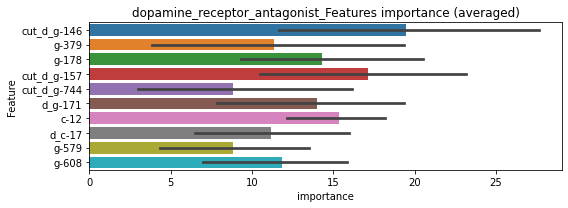

len(train_index) : 3418
len(valid_index) : 3418
================================= fold 1/2 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172688	valid_1's binary_logloss: 0.0909014
Early stopping, best iteration is:
[140]	training's binary_logloss: 0.00964334	valid_1's binary_logloss: 0.0887992


len(train_index) : 3418
len(valid_index) : 3418
================================= fold 2/2 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016737	valid_1's binary_logloss: 0.0887374
Early stopping, best iteration is:
[122]	training's binary_logloss: 0.0120365	valid_1's binary_logloss: 0.088134


dopamine_receptor_antagonist logloss: 0.08846658070185891


neg labels: 3289 → selected neg labels: 3264


egfr_inhibitor, len(trt): 336, len(othr): 3264, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0488477	valid_1's binary_logloss: 0.122708
[200]	training's binary_logloss: 0.01059	valid_1's binary_logloss: 0.0951069
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00894903	valid_1's binary_logloss: 0.0942817
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0501172	valid_1's binary_logloss: 0.112882
[200]	training's binary_logloss: 0.011019	valid_1's binary_logloss: 0.0844376
[300]	training's binary_logloss: 0.00362587	valid_1's binary_logloss: 0.0799162
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00380414	valid_1's binary_logloss: 0.0798436


1 / 3 AUC score:0.987
y_Threshold: 0.0331045, Threshold: 0.2766553, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 192 → Positive_corect_labels: 622/3724
p_label_rate: 0.0200904 Vs.target_rate: 0.01411
Num_p_label: 80.0, conf_0:0.24899, conf_1:0.30432
threshold: 0.2766553, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 622.0/3724, y_label_rate: 0.1670247
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0397629	valid_1's binary_logloss: 0.0903948
[200]	training's binary_logloss: 0.00736214	valid_1's binary_logloss: 0.0587748
[300]	training's binary_logloss: 0.00228984	valid_1's binary_logloss: 0.0524685
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00187525	valid_1's binary_logloss: 0.0522171
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.038976	valid_1's binary_logloss: 0.0951667
[200]	training's binary_logloss: 0.00722204	valid_1's binary_logloss: 0.0665551
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00325079	valid_1's binary_logloss: 0.0625624


2 / 3 AUC score:0.996
y_Threshold: 0.0773742, Threshold: 0.2766553, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 597.0/3674
p_label_rate: 0.0256153 Vs.target_rate: 0.01411
Num_p_label: 102.0, conf_0:0.24899, conf_1:0.30432
threshold: 0.2766553, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 597.0/3674, y_label_rate: 0.1624932
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350429	valid_1's binary_logloss: 0.0785522
[200]	training's binary_logloss: 0.00594688	valid_1's binary_logloss: 0.0479448
[300]	training's binary_logloss: 0.00182997	valid_1's binary_logloss: 0.0406967
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000999407	valid_1's binary_logloss: 0.0386854
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.035895	valid_1's binary_logloss: 0.0703627
[200]	training's binary_logloss: 0.00641336	valid_1's binary_logloss: 0.0371499
[300]	training's binary_logloss: 0.00198617	valid_1's binary_logloss: 0.0292069
[400]	training's binary_logloss: 0.00095861	valid_1's binary_logloss: 0.0262688
[500]	training's binary_logloss: 0.000631614	valid_1's binary_logloss: 0.0250375
[600]	training's binary_logloss: 0.000503962	valid_1's binary_logloss: 0.0247328
Early stopping, best iteration is:
[592]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0451101, Threshold: 0.2766553, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 589.0/3658
p_label_rate: 0.0276243 Vs.target_rate: 0.01411
Num_p_label: 110.0, conf_0:0.24899, conf_1:0.30432
threshold: 0.2766553, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 699.0/7640, y_label_rate: 0.0914921


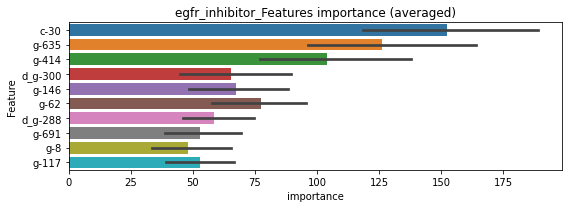

len(train_index) : 3820
len(valid_index) : 3820
================================= fold 1/2 egfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207796	valid_1's binary_logloss: 0.0562135
[200]	training's binary_logloss: 0.00361556	valid_1's binary_logloss: 0.0385369
[300]	training's binary_logloss: 0.00112398	valid_1's binary_logloss: 0.0346582
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000867142	valid_1's binary_logloss: 0.033997


len(train_index) : 3820
len(valid_index) : 3820
================================= fold 2/2 egfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207369	valid_1's binary_logloss: 0.0527687
[200]	training's binary_logloss: 0.00363599	valid_1's binary_logloss: 0.0320219
[300]	training's binary_logloss: 0.00112968	valid_1's binary_logloss: 0.0271627
[400]	training's binary_logloss: 0.000554576	valid_1's binary_logloss: 0.0257894
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000512113	valid_1's binary_logloss: 0.0256704


egfr_inhibitor logloss: 0.02983370019576979


neg labels: 3289 → selected neg labels: 3287


elastase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201404	valid_1's binary_logloss: 0.0252832
[200]	training's binary_logloss: 0.00224297	valid_1's binary_logloss: 0.00441471
[300]	training's binary_logloss: 0.000658274	valid_1's binary_logloss: 0.00205426
[400]	training's binary_logloss: 0.000364257	valid_1's binary_logloss: 0.00151482
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000300885	valid_1's binary_logloss: 0.00139932
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0199884	valid_1's binary_logloss: 0.0240418
[200]	training's binary_logloss: 0.00217808	valid_1's binary_logloss: 0.00419081
[300]	training's binary_logloss: 0.000646232	valid_1's binary_logloss: 0.00212035
[400]	training's binary_logloss: 0.000359873	valid_1's binary_logloss: 0.00164962
[500]	training's binary_logloss: 0.000303703	valid_1's binary_logloss: 0.00158169
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0009036, Threshold: 0.0012689, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00114, conf_1:0.00140
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0012689
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0112689
threshold: 0.0112689, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020492	valid_1's binary_logloss: 0.0253672
[200]	training's binary_logloss: 0.0022467	valid_1's binary_logloss: 0.00405564
[300]	training's binary_logloss: 0.000659586	valid_1's binary_logloss: 0.00181405
[400]	training's binary_logloss: 0.000366066	valid_1's binary_logloss: 0.00134659
[500]	training's binary_logloss: 0.000298046	valid_1's binary_logloss: 0.0012443
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000298158	valid_1's binary_logloss: 0.00124382
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204113	valid_1's binary_logloss: 0.0237095
[200]	training's binary_logloss: 0.00220176	valid_1's binary_logloss: 0.00374979
[300]	training's binary_logloss: 0.000643181	valid_1's binary_logloss: 0.00181645
[400]	training's binary_logloss: 0.000359716	valid_1's binary_logloss: 0.00141508
Early stopping, best iteration is:

2 / 3 AUC score:1.000
y_Threshold: 0.0346391, Threshold: 0.0112689, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, conf_0:0.01014, conf_1:0.01240
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0112689
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0212689
threshold: 0.0212689, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020492	valid_1's binary_logloss: 0.0253672
[200]	training's binary_logloss: 0.0022467	valid_1's binary_logloss: 0.00405564
[300]	training's binary_logloss: 0.000659586	valid_1's binary_logloss: 0.00181405
[400]	training's binary_logloss: 0.000366066	valid_1's binary_logloss: 0.00134659
[500]	training's binary_logloss: 0.000298046	valid_1's binary_logloss: 0.0012443
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000298158	valid_1's binary_logloss: 0.00124382
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204113	valid_1's binary_logloss: 0.0237095
[200]	training's binary_logloss: 0.00220176	valid_1's binary_logloss: 0.00374979
[300]	training's binary_logloss: 0.000643181	valid_1's binary_logloss: 0.00181645
[400]	training's binary_logloss: 0.000359716	valid_1's binary_logloss: 0.00141508
Early stopping, best iteration is:

3 / 3 AUC score:1.000
y_Threshold: 0.0346391, Threshold: 0.0212689, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.01914, conf_1:0.02340
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0212689
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0112689
threshold: 0.0112689, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 665.0/7794, y_label_rate: 0.0853220


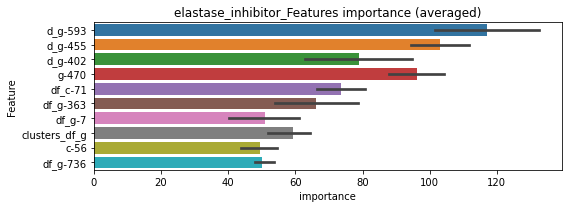

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 elastase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108484	valid_1's binary_logloss: 0.0189333
[200]	training's binary_logloss: 0.00118654	valid_1's binary_logloss: 0.00991037
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000638107	valid_1's binary_logloss: 0.0096516


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 elastase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115183	valid_1's binary_logloss: 0.0148649
[200]	training's binary_logloss: 0.00131312	valid_1's binary_logloss: 0.00459345
[300]	training's binary_logloss: 0.000398109	valid_1's binary_logloss: 0.00387522
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000273382	valid_1's binary_logloss: 0.00378101


elastase_inhibitor logloss: 0.006716301951333661


neg labels: 3289 → selected neg labels: 3284


erbb2_inhibitor, len(trt): 20, len(othr): 3284, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0258181	valid_1's binary_logloss: 0.034988
[200]	training's binary_logloss: 0.00340668	valid_1's binary_logloss: 0.00736621
[300]	training's binary_logloss: 0.000994546	valid_1's binary_logloss: 0.00344626
[400]	training's binary_logloss: 0.000511086	valid_1's binary_logloss: 0.00244979
[500]	training's binary_logloss: 0.000392686	valid_1's binary_logloss: 0.00220986
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000385373	valid_1's binary_logloss: 0.0021931
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267439	valid_1's binary_logloss: 0.0341416
[200]	training's binary_logloss: 0.00347044	valid_1's binary_logloss: 0.00681178
[300]	training's binary_logloss: 0.000999022	valid_1's binary_logloss: 0.00293876
[400]	training's binary_logloss: 0.000514441	valid_1's binary_logloss: 0.00205096
[500]	training's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0014440, Threshold: 0.0018942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00084
Num_p_label: 80.0, conf_0:0.00170, conf_1:0.00208
Num_p_label: 80.0, Expected: 3.3, Adj_threshold_1: 0.0018942
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_2: 0.0118942
threshold: 0.0118942, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261449	valid_1's binary_logloss: 0.0352761
[200]	training's binary_logloss: 0.00339055	valid_1's binary_logloss: 0.00713559
[300]	training's binary_logloss: 0.000984227	valid_1's binary_logloss: 0.00327004
[400]	training's binary_logloss: 0.00050343	valid_1's binary_logloss: 0.00223408
[500]	training's binary_logloss: 0.000393844	valid_1's binary_logloss: 0.00199985
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000396673	valid_1's binary_logloss: 0.00199866
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270394	valid_1's binary_logloss: 0.0345278
[200]	training's binary_logloss: 0.00349769	valid_1's binary_logloss: 0.00696735
[300]	training's binary_logloss: 0.00100353	valid_1's binary_logloss: 0.00331635
[400]	training's binary_logloss: 0.000512268	valid_1's binary_logloss: 0.00239614
Early stopping, best iteration is

2 / 3 AUC score:1.000
y_Threshold: 0.0434372, Threshold: 0.0118942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00084
Num_p_label: 2.0, conf_0:0.01070, conf_1:0.01308
threshold: 0.0118942, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261449	valid_1's binary_logloss: 0.0352761
[200]	training's binary_logloss: 0.00339055	valid_1's binary_logloss: 0.00713559
[300]	training's binary_logloss: 0.000984227	valid_1's binary_logloss: 0.00327004
[400]	training's binary_logloss: 0.00050343	valid_1's binary_logloss: 0.00223408
[500]	training's binary_logloss: 0.000393844	valid_1's binary_logloss: 0.00199985
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000396673	valid_1's binary_logloss: 0.00199866
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270394	valid_1's binary_logloss: 0.0345278
[200]	training's binary_logloss: 0.00349769	valid_1's binary_logloss: 0.00696735
[300]	training's binary_logloss: 0.00100353	valid_1's binary_logloss: 0.00331635
[400]	training's binary_logloss: 0.000512268	valid_1's binary_logloss: 0.00239614
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0434372, Threshold: 0.0118942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00084
Num_p_label: 2.0, conf_0:0.01070, conf_1:0.01308
threshold: 0.0118942, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 658.0/7790, y_label_rate: 0.0844673


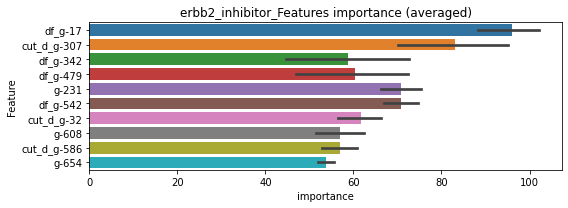

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 erbb2_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139424	valid_1's binary_logloss: 0.0220658
[200]	training's binary_logloss: 0.0017348	valid_1's binary_logloss: 0.00663597
[300]	training's binary_logloss: 0.000484232	valid_1's binary_logloss: 0.00440234
[400]	training's binary_logloss: 0.000248487	valid_1's binary_logloss: 0.00378126
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000198751	valid_1's binary_logloss: 0.00366795


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 erbb2_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139737	valid_1's binary_logloss: 0.0177805
[200]	training's binary_logloss: 0.00177526	valid_1's binary_logloss: 0.00373383
[300]	training's binary_logloss: 0.00050773	valid_1's binary_logloss: 0.00209109
[400]	training's binary_logloss: 0.000253168	valid_1's binary_logloss: 0.00172421
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000196868	valid_1's binary_logloss: 0.00166152


erbb2_inhibitor logloss: 0.002664733148928228


neg labels: 3289 → selected neg labels: 3265


estrogen_receptor_agonist, len(trt): 158, len(othr): 3265, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.072174	valid_1's binary_logloss: 0.17867
[200]	training's binary_logloss: 0.0211704	valid_1's binary_logloss: 0.138982
[300]	training's binary_logloss: 0.00730358	valid_1's binary_logloss: 0.130977
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00592988	valid_1's binary_logloss: 0.130173
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0798932	valid_1's binary_logloss: 0.172956
[200]	training's binary_logloss: 0.0241073	valid_1's binary_logloss: 0.134496
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00980641	valid_1's binary_logloss: 0.127519


1 / 3 AUC score:0.980
y_Threshold: 0.0352598, Threshold: 0.0457897, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 213 → Positive_corect_labels: 612/3705
p_label_rate: 0.0200904 Vs.target_rate: 0.00663
Num_p_label: 80.0, conf_0:0.04121, conf_1:0.05037
Num_p_label: 80.0, Expected: 26.4, Adj_threshold_1: 0.0457897
Num_p_label: 46.0, Expected: 26.4, Adj_threshold_2: 0.0557897
threshold: 0.0557897, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 612.0/3705, y_label_rate: 0.1651822
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0638498	valid_1's binary_logloss: 0.163826
[200]	training's binary_logloss: 0.0172071	valid_1's binary_logloss: 0.129318
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.0116618	valid_1's binary_logloss: 0.126053
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0693795	valid_1's binary_logloss: 0.157186
[200]	training's binary_logloss: 0.01896	valid_1's binary_logloss: 0.116286
[300]	training's binary_logloss: 0.00645941	valid_1's binary_logloss: 0.107315
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.0059	valid_1's binary_logloss: 0.106845


2 / 3 AUC score:0.988
y_Threshold: 0.0552555, Threshold: 0.0557897, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 78 → Positive_corect_labels: 573.0/3627
p_label_rate: 0.0213461 Vs.target_rate: 0.00663
Num_p_label: 85.0, conf_0:0.05021, conf_1:0.06137
Num_p_label: 85.0, Expected: 26.4, Adj_threshold_1: 0.0557897
Num_p_label: 58.0, Expected: 26.4, Adj_threshold_2: 0.0657897
Num_p_label: 32.0, Expected: 26.4, Adj_threshold_3: 0.0757897
threshold: 0.0757897, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 573.0/3627, y_label_rate: 0.1579818
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0563459	valid_1's binary_logloss: 0.132495
[200]	training's binary_logloss: 0.0140576	valid_1's binary_logloss: 0.0922414
[300]	training's binary_logloss: 0.00474862	valid_1's binary_logloss: 0.0812103
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00268391	valid_1's binary_logloss: 0.0784586
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0608321	valid_1's binary_logloss: 0.127887
[200]	training's binary_logloss: 0.0157844	valid_1's binary_logloss: 0.08811
[300]	training's binary_logloss: 0.00521636	valid_1's binary_logloss: 0.0781741
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00377076	valid_1's binary_logloss: 0.075091


3 / 3 AUC score:0.997
y_Threshold: 0.0346916, Threshold: 0.0757897, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 32 → Positive_corect_labels: 557.0/3595
p_label_rate: 0.0032647 Vs.target_rate: 0.00663
Num_p_label: 13.0, conf_0:0.06821, conf_1:0.08337
threshold: 0.0757897, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 570.0/7577, y_label_rate: 0.0752277


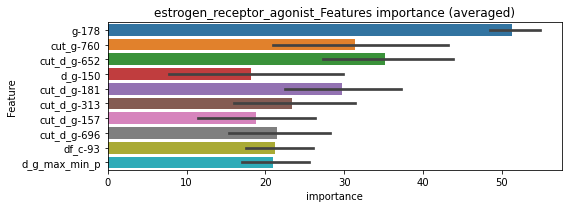

len(train_index) : 3788
len(valid_index) : 3789
================================= fold 1/2 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274512	valid_1's binary_logloss: 0.0836885
[200]	training's binary_logloss: 0.00651133	valid_1's binary_logloss: 0.0628101
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00267037	valid_1's binary_logloss: 0.0590999


len(train_index) : 3789
len(valid_index) : 3788
================================= fold 2/2 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0341511	valid_1's binary_logloss: 0.0734282
[200]	training's binary_logloss: 0.00877388	valid_1's binary_logloss: 0.0514344
[300]	training's binary_logloss: 0.00293266	valid_1's binary_logloss: 0.0459266
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00147444	valid_1's binary_logloss: 0.0440029


estrogen_receptor_agonist logloss: 0.05155239688368643


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0394986	valid_1's binary_logloss: 0.0770382
[200]	training's binary_logloss: 0.00713849	valid_1's binary_logloss: 0.0355427
[300]	training's binary_logloss: 0.00210685	valid_1's binary_logloss: 0.0248371
[400]	training's binary_logloss: 0.00102749	valid_1's binary_logloss: 0.0215975
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000811584	valid_1's binary_logloss: 0.0205479
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0436164	valid_1's binary_logloss: 0.0673496
[200]	training's binary_logloss: 0.0080141	valid_1's binary_logloss: 0.0234604
[300]	training's binary_logloss: 0.00238595	valid_1's binary_logloss: 0.0140085
[400]	training's binary_logloss: 0.00112756	valid_1's binary_logloss: 0.0108971
[500]	training's binary_logloss: 0.000712415	valid_1's binary_logloss: 0.00978961
[600]	training's binary_logloss: 0.00056208

1 / 3 AUC score:1.000
y_Threshold: 0.0042358, Threshold: 0.0060259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00542, conf_1:0.00663
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0060259
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_2: 0.0160259
threshold: 0.0160259, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.03983	valid_1's binary_logloss: 0.0771931
[200]	training's binary_logloss: 0.00698615	valid_1's binary_logloss: 0.0329253
[300]	training's binary_logloss: 0.0020935	valid_1's binary_logloss: 0.0230799
[400]	training's binary_logloss: 0.00100808	valid_1's binary_logloss: 0.0200746
[500]	training's binary_logloss: 0.000647348	valid_1's binary_logloss: 0.0187863
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000544887	valid_1's binary_logloss: 0.0184747
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.044174	valid_1's binary_logloss: 0.0652629
[200]	training's binary_logloss: 0.0080266	valid_1's binary_logloss: 0.0219977
[300]	training's binary_logloss: 0.00239492	valid_1's binary_logloss: 0.0126556
[400]	training's binary_logloss: 0.00112659	valid_1's binary_logloss: 0.00982531
[500]	training's binary_logloss: 0.000711513	va

2 / 3 AUC score:1.000
y_Threshold: 0.0200709, Threshold: 0.0160259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00202
Num_p_label: 26.0, conf_0:0.01442, conf_1:0.01763
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_1: 0.0160259
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_2: 0.0260259
threshold: 0.0260259, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0396459	valid_1's binary_logloss: 0.0791968
[200]	training's binary_logloss: 0.00675671	valid_1's binary_logloss: 0.0378534
[300]	training's binary_logloss: 0.00201621	valid_1's binary_logloss: 0.0275845
[400]	training's binary_logloss: 0.000983515	valid_1's binary_logloss: 0.0244104
[500]	training's binary_logloss: 0.000641866	valid_1's binary_logloss: 0.0226923
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00055923	valid_1's binary_logloss: 0.0223978
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.042839	valid_1's binary_logloss: 0.0720437
[200]	training's binary_logloss: 0.00745599	valid_1's binary_logloss: 0.0263782
[300]	training's binary_logloss: 0.00218363	valid_1's binary_logloss: 0.0169687
[400]	training's binary_logloss: 0.00105667	valid_1's binary_logloss: 0.0140715
Early stopping, best iteration is:
[426]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0230906, Threshold: 0.0260259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, conf_0:0.02342, conf_1:0.02863
threshold: 0.0260259, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 666.0/7779, y_label_rate: 0.0856151


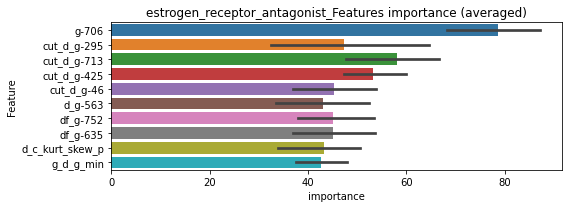

len(train_index) : 3889
len(valid_index) : 3890
================================= fold 1/2 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216376	valid_1's binary_logloss: 0.0454606
[200]	training's binary_logloss: 0.0038388	valid_1's binary_logloss: 0.0242514
[300]	training's binary_logloss: 0.00114309	valid_1's binary_logloss: 0.020142
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000619031	valid_1's binary_logloss: 0.0191359


len(train_index) : 3890
len(valid_index) : 3889
================================= fold 2/2 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231656	valid_1's binary_logloss: 0.0420613
[200]	training's binary_logloss: 0.00422614	valid_1's binary_logloss: 0.0170025
[300]	training's binary_logloss: 0.00126037	valid_1's binary_logloss: 0.0116426
[400]	training's binary_logloss: 0.000596428	valid_1's binary_logloss: 0.00995171
[500]	training's binary_logloss: 0.000378358	valid_1's binary_logloss: 0.0092555
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000317617	valid_1's binary_logloss: 0.00909703


estrogen_receptor_antagonist logloss: 0.014117109567937772


neg labels: 3289 → selected neg labels: 3283


faah_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.031499	valid_1's binary_logloss: 0.0525976
[200]	training's binary_logloss: 0.00470041	valid_1's binary_logloss: 0.0176571
[300]	training's binary_logloss: 0.00147759	valid_1's binary_logloss: 0.0109593
[400]	training's binary_logloss: 0.000709384	valid_1's binary_logloss: 0.00852861
[500]	training's binary_logloss: 0.000495009	valid_1's binary_logloss: 0.00756725
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000439738	valid_1's binary_logloss: 0.00729663
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322357	valid_1's binary_logloss: 0.0505203
[200]	training's binary_logloss: 0.00491697	valid_1's binary_logloss: 0.0161328
[300]	training's binary_logloss: 0.00146171	valid_1's binary_logloss: 0.00930177
[400]	training's binary_logloss: 0.00072349	valid_1's binary_logloss: 0.00683856
[500]	training's binary_logloss: 0.000

1 / 3 AUC score:1.000
y_Threshold: 0.0045630, Threshold: 0.0105015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00945, conf_1:0.01155
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0105015
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_2: 0.0205015
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.0305015
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_4: 0.0405015
threshold: 0.0405015, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305885	valid_1's binary_logloss: 0.0495947
[200]	training's binary_logloss: 0.0044019	valid_1's binary_logloss: 0.0151092
[300]	training's binary_logloss: 0.00134611	valid_1's binary_logloss: 0.00861688
[400]	training's binary_logloss: 0.000661038	valid_1's binary_logloss: 0.00660796
[500]	training's binary_logloss: 0.000462856	valid_1's binary_logloss: 0.00584315
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000438064	valid_1's binary_logloss: 0.00574838
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315455	valid_1's binary_logloss: 0.0451166
[200]	training's binary_logloss: 0.00466781	valid_1's binary_logloss: 0.0121752
[300]	training's binary_logloss: 0.00139931	valid_1's binary_logloss: 0.0063432
[400]	training's binary_logloss: 0.000694403	valid_1's binary_logloss: 0.00437142
[500]	training's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.0588148, Threshold: 0.0405015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0163235 Vs.target_rate: 0.00151
Num_p_label: 65.0, conf_0:0.03645, conf_1:0.04455
Num_p_label: 65.0, Expected: 6.0, Adj_threshold_1: 0.0405015
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_2: 0.0505015
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_3: 0.0605015
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_4: 0.0705015
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_5: 0.0805015
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_6: 0.0905015
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_7: 0.1005015
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_8: 0.1105015
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_9: 0.1205015
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_10: 0.1305015
threshold: 0.1405015, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305885	valid_1's binary_logloss: 0.0495947
[200]	training's binary_logloss: 0.0044019	valid_1's binary_logloss: 0.0151092
[300]	training's binary_logloss: 0.00134611	valid_1's binary_logloss: 0.00861688
[400]	training's binary_logloss: 0.000661038	valid_1's binary_logloss: 0.00660796
[500]	training's binary_logloss: 0.000462856	valid_1's binary_logloss: 0.00584315
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000438064	valid_1's binary_logloss: 0.00574838
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315455	valid_1's binary_logloss: 0.0451166
[200]	training's binary_logloss: 0.00466781	valid_1's binary_logloss: 0.0121752
[300]	training's binary_logloss: 0.00139931	valid_1's binary_logloss: 0.0063432
[400]	training's binary_logloss: 0.000694403	valid_1's binary_logloss: 0.00437142
[500]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.0588148, Threshold: 0.1405015, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.12645, conf_1:0.15455
threshold: 0.1405015, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 668.0/7789, y_label_rate: 0.0857620


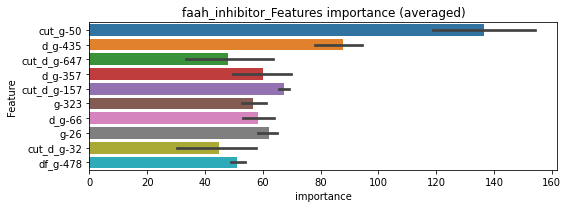

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 faah_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0170532	valid_1's binary_logloss: 0.0324943
[200]	training's binary_logloss: 0.00255439	valid_1's binary_logloss: 0.0154519
[300]	training's binary_logloss: 0.000745229	valid_1's binary_logloss: 0.0120483
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000398781	valid_1's binary_logloss: 0.0112851


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 faah_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171939	valid_1's binary_logloss: 0.0295916
[200]	training's binary_logloss: 0.00267553	valid_1's binary_logloss: 0.0120757
[300]	training's binary_logloss: 0.00078242	valid_1's binary_logloss: 0.00892403
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000413517	valid_1's binary_logloss: 0.00813966


faah_inhibitor logloss: 0.009712593549081843


neg labels: 3289 → selected neg labels: 3286


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0187717	valid_1's binary_logloss: 0.0222016
[200]	training's binary_logloss: 0.00191246	valid_1's binary_logloss: 0.00350805
[300]	training's binary_logloss: 0.000537718	valid_1's binary_logloss: 0.00144923
[400]	training's binary_logloss: 0.000313455	valid_1's binary_logloss: 0.000958921
[500]	training's binary_logloss: 0.000269029	valid_1's binary_logloss: 0.000860719
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000267844	valid_1's binary_logloss: 0.000857827
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189993	valid_1's binary_logloss: 0.0226822
[200]	training's binary_logloss: 0.00196504	valid_1's binary_logloss: 0.00360529
[300]	training's binary_logloss: 0.000551395	valid_1's binary_logloss: 0.00150509
[400]	training's binary_logloss: 0.000319767	valid_1's binary_logloss: 0.00103212
[500]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0015106, Threshold: 0.0038373, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00345, conf_1:0.00422
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0038373
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.0138373
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.0238373
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.0338373
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.0438373
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.0538373
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_7: 0.0638373
threshold: 0.0638373, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186929	valid_1's binary_logloss: 0.0214957
[200]	training's binary_logloss: 0.0018446	valid_1's binary_logloss: 0.00269836
[300]	training's binary_logloss: 0.000507435	valid_1's binary_logloss: 0.000905594
[400]	training's binary_logloss: 0.00030034	valid_1's binary_logloss: 0.000586951
[500]	training's binary_logloss: 0.000257947	valid_1's binary_logloss: 0.000518997
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000257704	valid_1's binary_logloss: 0.000518599
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186823	valid_1's binary_logloss: 0.0223987
[200]	training's binary_logloss: 0.00182523	valid_1's binary_logloss: 0.00411601
[300]	training's binary_logloss: 0.00050456	valid_1's binary_logloss: 0.00202594
[400]	training's binary_logloss: 0.000300109	valid_1's binary_logloss: 0.00158625
Early stopping, best iteration

2 / 3 AUC score:1.000
y_Threshold: 0.0814245, Threshold: 0.0638373, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0107986 Vs.target_rate: 0.00076
Num_p_label: 43.0, conf_0:0.05745, conf_1:0.07022
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.0638373
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_2: 0.0738373
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_3: 0.0838373
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_4: 0.0938373
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.1038373
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_6: 0.1138373
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_7: 0.1238373
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_8: 0.1338373
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_9: 0.1438373
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_10: 0.1538373
threshold: 0.1638373, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186929	valid_1's binary_logloss: 0.0214957
[200]	training's binary_logloss: 0.0018446	valid_1's binary_logloss: 0.00269836
[300]	training's binary_logloss: 0.000507435	valid_1's binary_logloss: 0.000905594
[400]	training's binary_logloss: 0.00030034	valid_1's binary_logloss: 0.000586951
[500]	training's binary_logloss: 0.000257947	valid_1's binary_logloss: 0.000518997
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000257704	valid_1's binary_logloss: 0.000518599
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186823	valid_1's binary_logloss: 0.0223987
[200]	training's binary_logloss: 0.00182523	valid_1's binary_logloss: 0.00411601
[300]	training's binary_logloss: 0.00050456	valid_1's binary_logloss: 0.00202594
[400]	training's binary_logloss: 0.000300109	valid_1's binary_logloss: 0.00158625
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.0814245, Threshold: 0.1638373, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, conf_0:0.14745, conf_1:0.18022
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.1638373
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1738373
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_3: 0.1838373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.1938373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.2038373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.2138373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2238373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_8: 0.2338373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_9: 0.2438373
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_10: 0.2538373
threshold: 0.2638373, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 677.0/7793, y_label_rate: 0.0868728


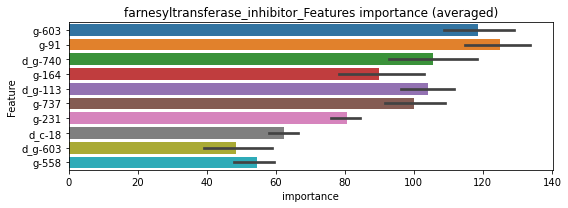

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106337	valid_1's binary_logloss: 0.016073
[200]	training's binary_logloss: 0.00113368	valid_1's binary_logloss: 0.00626978
[300]	training's binary_logloss: 0.000321484	valid_1's binary_logloss: 0.00532674
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000292452	valid_1's binary_logloss: 0.00528489


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010786	valid_1's binary_logloss: 0.0146835
[200]	training's binary_logloss: 0.00118006	valid_1's binary_logloss: 0.00505762
[300]	training's binary_logloss: 0.000335581	valid_1's binary_logloss: 0.00389629
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000245851	valid_1's binary_logloss: 0.00372701


farnesyltransferase_inhibitor logloss: 0.004506048411382101


neg labels: 3289 → selected neg labels: 3285


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276441	valid_1's binary_logloss: 0.043986
[200]	training's binary_logloss: 0.00371439	valid_1's binary_logloss: 0.0131754
[300]	training's binary_logloss: 0.00106192	valid_1's binary_logloss: 0.00765087
[400]	training's binary_logloss: 0.000547772	valid_1's binary_logloss: 0.00612072
[500]	training's binary_logloss: 0.00040414	valid_1's binary_logloss: 0.00572842
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000407247	valid_1's binary_logloss: 0.00572074
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.028913	valid_1's binary_logloss: 0.0366056
[200]	training's binary_logloss: 0.00396017	valid_1's binary_logloss: 0.00695466
[300]	training's binary_logloss: 0.00113433	valid_1's binary_logloss: 0.00265847
[400]	training's binary_logloss: 0.000573912	valid_1's binary_logloss: 0.00161962
[500]	training's binary_logloss: 0.00

1 / 3 AUC score:1.000
y_Threshold: 0.0021283, Threshold: 0.0031839, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00287, conf_1:0.00350
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0031839
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_2: 0.0131839
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_3: 0.0231839
threshold: 0.0231839, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265783	valid_1's binary_logloss: 0.0412807
[200]	training's binary_logloss: 0.00355199	valid_1's binary_logloss: 0.0129535
[300]	training's binary_logloss: 0.0010377	valid_1's binary_logloss: 0.00773873
[400]	training's binary_logloss: 0.000538467	valid_1's binary_logloss: 0.00643668
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000408176	valid_1's binary_logloss: 0.00614201
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276409	valid_1's binary_logloss: 0.0348783
[200]	training's binary_logloss: 0.00372313	valid_1's binary_logloss: 0.00662625
[300]	training's binary_logloss: 0.00108261	valid_1's binary_logloss: 0.00258883
[400]	training's binary_logloss: 0.000551593	valid_1's binary_logloss: 0.0016507
[500]	training's binary_logloss: 0.000410736	valid_1's binary_logloss: 0.00138928
Early stopping, best iteration is:
[

2 / 3 AUC score:1.000
y_Threshold: 0.0256561, Threshold: 0.0231839, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0057760 Vs.target_rate: 0.00105
Num_p_label: 23.0, conf_0:0.02087, conf_1:0.02550
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_1: 0.0231839
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_2: 0.0331839
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.0431839
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_4: 0.0531839
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_5: 0.0631839
threshold: 0.0631839, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265783	valid_1's binary_logloss: 0.0412807
[200]	training's binary_logloss: 0.00355199	valid_1's binary_logloss: 0.0129535
[300]	training's binary_logloss: 0.0010377	valid_1's binary_logloss: 0.00773873
[400]	training's binary_logloss: 0.000538467	valid_1's binary_logloss: 0.00643668
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000408176	valid_1's binary_logloss: 0.00614201
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276409	valid_1's binary_logloss: 0.0348783
[200]	training's binary_logloss: 0.00372313	valid_1's binary_logloss: 0.00662625
[300]	training's binary_logloss: 0.00108261	valid_1's binary_logloss: 0.00258883
[400]	training's binary_logloss: 0.000551593	valid_1's binary_logloss: 0.0016507
[500]	training's binary_logloss: 0.000410736	valid_1's binary_logloss: 0.00138928
Early stopping, best iteration is:
[

3 / 3 AUC score:1.000
y_Threshold: 0.0256561, Threshold: 0.0631839, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, conf_0:0.05687, conf_1:0.06950
threshold: 0.0631839, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 664.0/7792, y_label_rate: 0.0852156


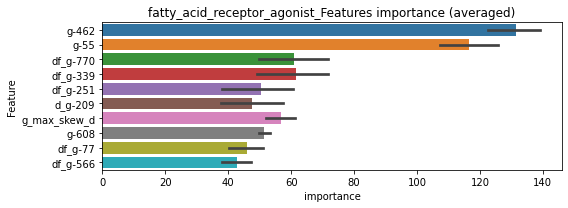

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149174	valid_1's binary_logloss: 0.0256955
[200]	training's binary_logloss: 0.00194327	valid_1's binary_logloss: 0.00990637
[300]	training's binary_logloss: 0.000552998	valid_1's binary_logloss: 0.00840224
[400]	training's binary_logloss: 0.000277191	valid_1's binary_logloss: 0.00820226
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000282805	valid_1's binary_logloss: 0.00817513


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161837	valid_1's binary_logloss: 0.0212712
[200]	training's binary_logloss: 0.00227327	valid_1's binary_logloss: 0.00500922
[300]	training's binary_logloss: 0.000642927	valid_1's binary_logloss: 0.00290471
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000351092	valid_1's binary_logloss: 0.00261088


fatty_acid_receptor_agonist logloss: 0.005393007638483705


neg labels: 3289 → selected neg labels: 3279


fgfr_inhibitor, len(trt): 50, len(othr): 3279, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0356124	valid_1's binary_logloss: 0.0559238
[200]	training's binary_logloss: 0.00588346	valid_1's binary_logloss: 0.0174773
[300]	training's binary_logloss: 0.00174953	valid_1's binary_logloss: 0.00937122
[400]	training's binary_logloss: 0.000872483	valid_1's binary_logloss: 0.00690256
[500]	training's binary_logloss: 0.000583798	valid_1's binary_logloss: 0.00588938
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000499351	valid_1's binary_logloss: 0.00563654
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0362886	valid_1's binary_logloss: 0.0610396
[200]	training's binary_logloss: 0.00587313	valid_1's binary_logloss: 0.0205238
[300]	training's binary_logloss: 0.00177153	valid_1's binary_logloss: 0.0113445
[400]	training's binary_logloss: 0.000846805	valid_1's binary_logloss: 0.00858264
[500]	training's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0048394, Threshold: 0.0126503, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0200904 Vs.target_rate: 0.00210
Num_p_label: 80.0, conf_0:0.01139, conf_1:0.01392
Num_p_label: 80.0, Expected: 8.4, Adj_threshold_1: 0.0126503
Num_p_label: 46.0, Expected: 8.4, Adj_threshold_2: 0.0226503
Num_p_label: 36.0, Expected: 8.4, Adj_threshold_3: 0.0326503
Num_p_label: 27.0, Expected: 8.4, Adj_threshold_4: 0.0426503
Num_p_label: 25.0, Expected: 8.4, Adj_threshold_5: 0.0526503
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_6: 0.0626503
Num_p_label: 17.0, Expected: 8.4, Adj_threshold_7: 0.0726503
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_8: 0.0826503
threshold: 0.0826503, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0351611	valid_1's binary_logloss: 0.0546138
[200]	training's binary_logloss: 0.00559897	valid_1's binary_logloss: 0.0159597
[300]	training's binary_logloss: 0.00161311	valid_1's binary_logloss: 0.00785771
[400]	training's binary_logloss: 0.000810187	valid_1's binary_logloss: 0.00561995
[500]	training's binary_logloss: 0.000556584	valid_1's binary_logloss: 0.00467939
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000482327	valid_1's binary_logloss: 0.00442918
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0355241	valid_1's binary_logloss: 0.0594553
[200]	training's binary_logloss: 0.00551979	valid_1's binary_logloss: 0.0178832
[300]	training's binary_logloss: 0.00165929	valid_1's binary_logloss: 0.00891573
[400]	training's binary_logloss: 0.000796022	valid_1's binary_logloss: 0.00631914
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0656756, Threshold: 0.0826503, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0120542 Vs.target_rate: 0.00210
Num_p_label: 48.0, conf_0:0.07439, conf_1:0.09092
Num_p_label: 48.0, Expected: 8.4, Adj_threshold_1: 0.0826503
Num_p_label: 44.0, Expected: 8.4, Adj_threshold_2: 0.0926503
Num_p_label: 41.0, Expected: 8.4, Adj_threshold_3: 0.1026503
Num_p_label: 37.0, Expected: 8.4, Adj_threshold_4: 0.1126503
Num_p_label: 34.0, Expected: 8.4, Adj_threshold_5: 0.1226503
Num_p_label: 32.0, Expected: 8.4, Adj_threshold_6: 0.1326503
Num_p_label: 31.0, Expected: 8.4, Adj_threshold_7: 0.1426503
Num_p_label: 29.0, Expected: 8.4, Adj_threshold_8: 0.1526503
Num_p_label: 26.0, Expected: 8.4, Adj_threshold_9: 0.1626503
Num_p_label: 25.0, Expected: 8.4, Adj_threshold_10: 0.1726503
threshold: 0.1826503, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0351611	valid_1's binary_logloss: 0.0546138
[200]	training's binary_logloss: 0.00559897	valid_1's binary_logloss: 0.0159597
[300]	training's binary_logloss: 0.00161311	valid_1's binary_logloss: 0.00785771
[400]	training's binary_logloss: 0.000810187	valid_1's binary_logloss: 0.00561995
[500]	training's binary_logloss: 0.000556584	valid_1's binary_logloss: 0.00467939
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000482327	valid_1's binary_logloss: 0.00442918
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0355241	valid_1's binary_logloss: 0.0594553
[200]	training's binary_logloss: 0.00551979	valid_1's binary_logloss: 0.0178832
[300]	training's binary_logloss: 0.00165929	valid_1's binary_logloss: 0.00891573
[400]	training's binary_logloss: 0.000796022	valid_1's binary_logloss: 0.00631914
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0656756, Threshold: 0.1826503, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0062783 Vs.target_rate: 0.00210
Num_p_label: 25.0, conf_0:0.16439, conf_1:0.20092
threshold: 0.1826503, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 680.0/7784, y_label_rate: 0.0873587


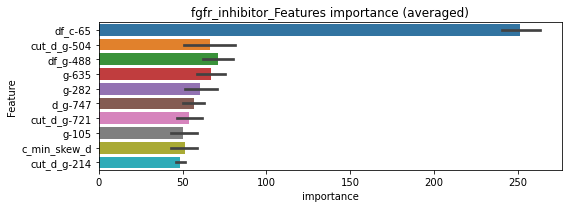

len(train_index) : 3892
len(valid_index) : 3892
================================= fold 1/2 fgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192923	valid_1's binary_logloss: 0.0393432
[200]	training's binary_logloss: 0.00313801	valid_1's binary_logloss: 0.0189916
[300]	training's binary_logloss: 0.000926138	valid_1's binary_logloss: 0.0148381
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000602485	valid_1's binary_logloss: 0.0138713


len(train_index) : 3892
len(valid_index) : 3892
================================= fold 2/2 fgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194497	valid_1's binary_logloss: 0.033779
[200]	training's binary_logloss: 0.00310911	valid_1's binary_logloss: 0.0132398
[300]	training's binary_logloss: 0.000949015	valid_1's binary_logloss: 0.00996575
[400]	training's binary_logloss: 0.000464698	valid_1's binary_logloss: 0.00900639
[500]	training's binary_logloss: 0.00031079	valid_1's binary_logloss: 0.00877522
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000304071	valid_1's binary_logloss: 0.00874912


fgfr_inhibitor logloss: 0.011310187085857775


neg labels: 3289 → selected neg labels: 3272


flt3_inhibitor, len(trt): 279, len(othr): 3272, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0589548	valid_1's binary_logloss: 0.149033
[200]	training's binary_logloss: 0.0135685	valid_1's binary_logloss: 0.11591
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00864474	valid_1's binary_logloss: 0.112224
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0592571	valid_1's binary_logloss: 0.142693
[200]	training's binary_logloss: 0.013964	valid_1's binary_logloss: 0.110783
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00730937	valid_1's binary_logloss: 0.106636


1 / 3 AUC score:0.984
y_Threshold: 0.0631188, Threshold: 0.2017177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 206 → Positive_corect_labels: 617/3720
p_label_rate: 0.0200904 Vs.target_rate: 0.01172
Num_p_label: 80.0, conf_0:0.18155, conf_1:0.22189
threshold: 0.2017177, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 617.0/3720, y_label_rate: 0.1658602
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047706	valid_1's binary_logloss: 0.111691
[200]	training's binary_logloss: 0.0098014	valid_1's binary_logloss: 0.076362
[300]	training's binary_logloss: 0.00309799	valid_1's binary_logloss: 0.0687677
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00166794	valid_1's binary_logloss: 0.0664105
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0479632	valid_1's binary_logloss: 0.10467
[200]	training's binary_logloss: 0.00993265	valid_1's binary_logloss: 0.0665268
[300]	training's binary_logloss: 0.00314918	valid_1's binary_logloss: 0.0571097
[400]	training's binary_logloss: 0.00150882	valid_1's binary_logloss: 0.0534387
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00136984	valid_1's binary_logloss: 0.0528113


2 / 3 AUC score:0.994
y_Threshold: 0.1243183, Threshold: 0.2017177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 58 → Positive_corect_labels: 588.0/3662
p_label_rate: 0.0349071 Vs.target_rate: 0.01172
Num_p_label: 139.0, conf_0:0.18155, conf_1:0.22189
threshold: 0.2017177, positive_p_label: 139.0/3982, p_label_rate: 0.0349071
positive_y_label: 588.0/3662, y_label_rate: 0.1605680
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0429763	valid_1's binary_logloss: 0.0859568
[200]	training's binary_logloss: 0.00836657	valid_1's binary_logloss: 0.0493181
[300]	training's binary_logloss: 0.00256028	valid_1's binary_logloss: 0.0408738
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00212998	valid_1's binary_logloss: 0.0400397
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0402394	valid_1's binary_logloss: 0.113492
[200]	training's binary_logloss: 0.00762124	valid_1's binary_logloss: 0.0914078
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00545161	valid_1's binary_logloss: 0.0906444


3 / 3 AUC score:0.990
y_Threshold: 0.1086811, Threshold: 0.2017177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 54 → Positive_corect_labels: 561.0/3608
p_label_rate: 0.0391763 Vs.target_rate: 0.01172
Num_p_label: 156.0, conf_0:0.18155, conf_1:0.22189
Num_p_label: 156.0, Expected: 46.7, Adj_threshold_1: 0.2017177
Num_p_label: 153.0, Expected: 46.7, Adj_threshold_2: 0.2117177
Num_p_label: 151.0, Expected: 46.7, Adj_threshold_3: 0.2217177
Num_p_label: 148.0, Expected: 46.7, Adj_threshold_4: 0.2317177
Num_p_label: 143.0, Expected: 46.7, Adj_threshold_5: 0.2417177
Num_p_label: 138.0, Expected: 46.7, Adj_threshold_6: 0.2517177
Num_p_label: 133.0, Expected: 46.7, Adj_threshold_7: 0.2617177
Num_p_label: 130.0, Expected: 46.7, Adj_threshold_8: 0.2717177
Num_p_label: 124.0, Expected: 46.7, Adj_threshold_9: 0.2817177
Num_p_label: 120.0, Expected: 46.7, Adj_threshold_10: 0.2917177
threshold: 0.3017177, positive_p_label: 116.0/3982, p_label_rate: 0.0291311
positive_y_label: 677.0/7590, y_label_ra

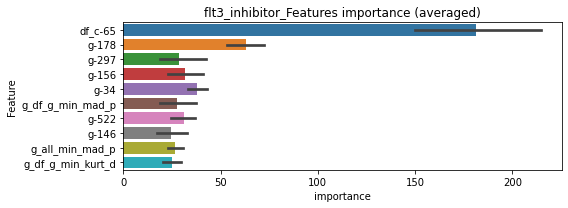

len(train_index) : 3795
len(valid_index) : 3795
================================= fold 1/2 flt3_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248731	valid_1's binary_logloss: 0.0613363
[200]	training's binary_logloss: 0.00489465	valid_1's binary_logloss: 0.0397037
[300]	training's binary_logloss: 0.00159827	valid_1's binary_logloss: 0.0349531
[400]	training's binary_logloss: 0.000722206	valid_1's binary_logloss: 0.0327683
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000671611	valid_1's binary_logloss: 0.0326104


len(train_index) : 3795
len(valid_index) : 3795
================================= fold 2/2 flt3_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247196	valid_1's binary_logloss: 0.0651827
[200]	training's binary_logloss: 0.00483051	valid_1's binary_logloss: 0.0458852
[300]	training's binary_logloss: 0.00158021	valid_1's binary_logloss: 0.0415037
[400]	training's binary_logloss: 0.000728003	valid_1's binary_logloss: 0.0385678
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000625478	valid_1's binary_logloss: 0.0380399


flt3_inhibitor logloss: 0.035325162717454534


neg labels: 3289 → selected neg labels: 3286


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194542	valid_1's binary_logloss: 0.0226995
[200]	training's binary_logloss: 0.00198472	valid_1's binary_logloss: 0.00410126
[300]	training's binary_logloss: 0.000546995	valid_1's binary_logloss: 0.0024937
[400]	training's binary_logloss: 0.000312018	valid_1's binary_logloss: 0.00214508
[500]	training's binary_logloss: 0.000264942	valid_1's binary_logloss: 0.00206713
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00026435	valid_1's binary_logloss: 0.00206431
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192601	valid_1's binary_logloss: 0.0232573
[200]	training's binary_logloss: 0.00199932	valid_1's binary_logloss: 0.00348385
[300]	training's binary_logloss: 0.000564115	valid_1's binary_logloss: 0.00143687
[400]	training's binary_logloss: 0.000320233	valid_1's binary_logloss: 0.000974414
Early stopping, best iteration i

1 / 3 AUC score:1.000
y_Threshold: 0.0011894, Threshold: 0.0035640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00321, conf_1:0.00392
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0035640
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.0135640
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.0235640
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.0335640
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_5: 0.0435640
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_6: 0.0535640
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_7: 0.0635640
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_8: 0.0735640
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.0835640
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_10: 0.0935640
threshold: 0.1035640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190113	valid_1's binary_logloss: 0.0207219
[200]	training's binary_logloss: 0.00185672	valid_1's binary_logloss: 0.00241857
[300]	training's binary_logloss: 0.000493467	valid_1's binary_logloss: 0.000727425
[400]	training's binary_logloss: 0.000286795	valid_1's binary_logloss: 0.000445999
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000251266	valid_1's binary_logloss: 0.000395974
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189641	valid_1's binary_logloss: 0.0215391
[200]	training's binary_logloss: 0.00186223	valid_1's binary_logloss: 0.00256105
[300]	training's binary_logloss: 0.000489692	valid_1's binary_logloss: 0.000774467
[400]	training's binary_logloss: 0.000285533	valid_1's binary_logloss: 0.000488394
[500]	training's binary_logloss: 0.000248022	valid_1's binary_logloss: 0.000433644
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.1810595, Threshold: 0.1035640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00076
Num_p_label: 30.0, conf_0:0.09321, conf_1:0.11392
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_1: 0.1035640
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1135640
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.1235640
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_4: 0.1335640
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_5: 0.1435640
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.1535640
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.1635640
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_8: 0.1735640
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_9: 0.1835640
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_10: 0.1935640
threshold: 0.2035640, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190113	valid_1's binary_logloss: 0.0207219
[200]	training's binary_logloss: 0.00185672	valid_1's binary_logloss: 0.00241857
[300]	training's binary_logloss: 0.000493467	valid_1's binary_logloss: 0.000727425
[400]	training's binary_logloss: 0.000286795	valid_1's binary_logloss: 0.000445999
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000251266	valid_1's binary_logloss: 0.000395974
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189641	valid_1's binary_logloss: 0.0215391
[200]	training's binary_logloss: 0.00186223	valid_1's binary_logloss: 0.00256105
[300]	training's binary_logloss: 0.000489692	valid_1's binary_logloss: 0.000774467
[400]	training's binary_logloss: 0.000285533	valid_1's binary_logloss: 0.000488394
[500]	training's binary_logloss: 0.000248022	valid_1's binary_logloss: 0.000433644
Early stopping, best iter

3 / 3 AUC score:1.000
y_Threshold: 0.1810595, Threshold: 0.2035640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, conf_0:0.18321, conf_1:0.22392
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.2035640
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.2135640
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.2235640
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_4: 0.2335640
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_5: 0.2435640
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.2535640
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2635640
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_8: 0.2735640
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_9: 0.2835640
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_10: 0.2935640
threshold: 0.3035640, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 676.0/7793, y_label_rate: 0.0867445


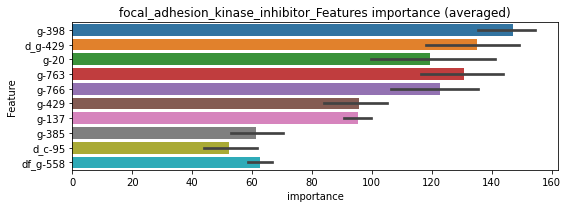

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105235	valid_1's binary_logloss: 0.0150335
[200]	training's binary_logloss: 0.00107989	valid_1's binary_logloss: 0.00465565
[300]	training's binary_logloss: 0.000296397	valid_1's binary_logloss: 0.00396622
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.000323907	valid_1's binary_logloss: 0.00393733


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105295	valid_1's binary_logloss: 0.0129707
[200]	training's binary_logloss: 0.00110316	valid_1's binary_logloss: 0.00270643
[300]	training's binary_logloss: 0.000311629	valid_1's binary_logloss: 0.00152315
[400]	training's binary_logloss: 0.000175918	valid_1's binary_logloss: 0.00126984
[500]	training's binary_logloss: 0.000148777	valid_1's binary_logloss: 0.00120927
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000148893	valid_1's binary_logloss: 0.00120884


focal_adhesion_kinase_inhibitor logloss: 0.0025734963142882536


neg labels: 3289 → selected neg labels: 3286


free_radical_scavenger, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230148	valid_1's binary_logloss: 0.0298317
[200]	training's binary_logloss: 0.00274603	valid_1's binary_logloss: 0.00643409
[300]	training's binary_logloss: 0.000805555	valid_1's binary_logloss: 0.00374793
[400]	training's binary_logloss: 0.000433166	valid_1's binary_logloss: 0.00300618
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000351351	valid_1's binary_logloss: 0.00285287
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234962	valid_1's binary_logloss: 0.0383794
[200]	training's binary_logloss: 0.00287723	valid_1's binary_logloss: 0.00969656
[300]	training's binary_logloss: 0.000842561	valid_1's binary_logloss: 0.005149
[400]	training's binary_logloss: 0.000443427	valid_1's binary_logloss: 0.00381858
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00044523	valid_1's binary_logloss: 0.00381754

1 / 3 AUC score:1.000
y_Threshold: 0.0014170, Threshold: 0.0019530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00176, conf_1:0.00215
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0019530
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0119530
threshold: 0.0119530, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023249	valid_1's binary_logloss: 0.0293257
[200]	training's binary_logloss: 0.00276801	valid_1's binary_logloss: 0.00580018
[300]	training's binary_logloss: 0.000807331	valid_1's binary_logloss: 0.00298179
[400]	training's binary_logloss: 0.000437168	valid_1's binary_logloss: 0.00224906
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000353861	valid_1's binary_logloss: 0.00210135
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238324	valid_1's binary_logloss: 0.0400295
[200]	training's binary_logloss: 0.00287103	valid_1's binary_logloss: 0.010753
[300]	training's binary_logloss: 0.000840267	valid_1's binary_logloss: 0.00563654
[400]	training's binary_logloss: 0.000447458	valid_1's binary_logloss: 0.00434753
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000358798	valid_1's binary_logloss: 0.00404481

2 / 3 AUC score:1.000
y_Threshold: 0.0405081, Threshold: 0.0119530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.01076, conf_1:0.01315
threshold: 0.0119530, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023249	valid_1's binary_logloss: 0.0293257
[200]	training's binary_logloss: 0.00276801	valid_1's binary_logloss: 0.00580018
[300]	training's binary_logloss: 0.000807331	valid_1's binary_logloss: 0.00298179
[400]	training's binary_logloss: 0.000437168	valid_1's binary_logloss: 0.00224906
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000353861	valid_1's binary_logloss: 0.00210135
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238324	valid_1's binary_logloss: 0.0400295
[200]	training's binary_logloss: 0.00287103	valid_1's binary_logloss: 0.010753
[300]	training's binary_logloss: 0.000840267	valid_1's binary_logloss: 0.00563654
[400]	training's binary_logloss: 0.000447458	valid_1's binary_logloss: 0.00434753
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000358798	valid_1's binary_logloss: 0.00404481

3 / 3 AUC score:1.000
y_Threshold: 0.0405081, Threshold: 0.0119530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.01076, conf_1:0.01315
threshold: 0.0119530, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7793, y_label_rate: 0.0849480


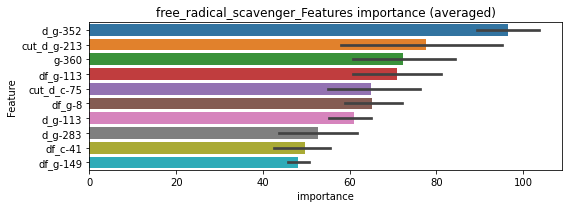

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 free_radical_scavenger=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124304	valid_1's binary_logloss: 0.0198573
[200]	training's binary_logloss: 0.00148146	valid_1's binary_logloss: 0.00759735
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.000560557	valid_1's binary_logloss: 0.00678334


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 free_radical_scavenger=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0129482	valid_1's binary_logloss: 0.0176226
[200]	training's binary_logloss: 0.00164872	valid_1's binary_logloss: 0.00496918
[300]	training's binary_logloss: 0.000474561	valid_1's binary_logloss: 0.0035226
[400]	training's binary_logloss: 0.000239375	valid_1's binary_logloss: 0.00315629
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000183882	valid_1's binary_logloss: 0.00307353


free_radical_scavenger logloss: 0.004928674916639632


neg labels: 3289 → selected neg labels: 3285


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3285, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251517	valid_1's binary_logloss: 0.0434379
[200]	training's binary_logloss: 0.00321985	valid_1's binary_logloss: 0.0149823
[300]	training's binary_logloss: 0.000941196	valid_1's binary_logloss: 0.0111942
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000784551	valid_1's binary_logloss: 0.010773
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265294	valid_1's binary_logloss: 0.0331461
[200]	training's binary_logloss: 0.00352267	valid_1's binary_logloss: 0.00550069
[300]	training's binary_logloss: 0.00103264	valid_1's binary_logloss: 0.00190546
[400]	training's binary_logloss: 0.000535738	valid_1's binary_logloss: 0.00107761
[500]	training's binary_logloss: 0.000392633	valid_1's binary_logloss: 0.000828369
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000383084	valid_1's binary_logloss: 0.000809999

1 / 3 AUC score:1.000
y_Threshold: 0.0024350, Threshold: 0.0036289, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00097
Num_p_label: 80.0, conf_0:0.00327, conf_1:0.00399
Num_p_label: 80.0, Expected: 3.8, Adj_threshold_1: 0.0036289
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_2: 0.0136289
threshold: 0.0136289, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.025477	valid_1's binary_logloss: 0.0452565
[200]	training's binary_logloss: 0.00323566	valid_1's binary_logloss: 0.0156624
[300]	training's binary_logloss: 0.000949295	valid_1's binary_logloss: 0.0116002
[400]	training's binary_logloss: 0.000499008	valid_1's binary_logloss: 0.0106027
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000403776	valid_1's binary_logloss: 0.0102739
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269353	valid_1's binary_logloss: 0.0330764
[200]	training's binary_logloss: 0.00351495	valid_1's binary_logloss: 0.00528698
[300]	training's binary_logloss: 0.00102113	valid_1's binary_logloss: 0.00175052
[400]	training's binary_logloss: 0.000530164	valid_1's binary_logloss: 0.000973663
[500]	training's binary_logloss: 0.000395281	valid_1's binary_logloss: 0.000757757
Early stopping, best iteration is:


2 / 3 AUC score:1.000
y_Threshold: 0.0100872, Threshold: 0.0136289, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00097
Num_p_label: 11.0, conf_0:0.01227, conf_1:0.01499
threshold: 0.0136289, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.025477	valid_1's binary_logloss: 0.0452565
[200]	training's binary_logloss: 0.00323566	valid_1's binary_logloss: 0.0156624
[300]	training's binary_logloss: 0.000949295	valid_1's binary_logloss: 0.0116002
[400]	training's binary_logloss: 0.000499008	valid_1's binary_logloss: 0.0106027
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000403776	valid_1's binary_logloss: 0.0102739
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269353	valid_1's binary_logloss: 0.0330764
[200]	training's binary_logloss: 0.00351495	valid_1's binary_logloss: 0.00528698
[300]	training's binary_logloss: 0.00102113	valid_1's binary_logloss: 0.00175052
[400]	training's binary_logloss: 0.000530164	valid_1's binary_logloss: 0.000973663
[500]	training's binary_logloss: 0.000395281	valid_1's binary_logloss: 0.000757757
Early stopping, best iteration is:


3 / 3 AUC score:1.000
y_Threshold: 0.0100872, Threshold: 0.0136289, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00097
Num_p_label: 11.0, conf_0:0.01227, conf_1:0.01499
threshold: 0.0136289, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 668.0/7792, y_label_rate: 0.0857290


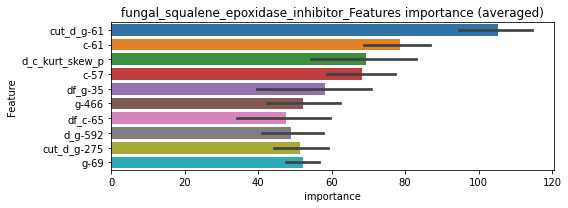

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140093	valid_1's binary_logloss: 0.0261704
[200]	training's binary_logloss: 0.00180338	valid_1's binary_logloss: 0.0134885
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000855091	valid_1's binary_logloss: 0.012647


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014998	valid_1's binary_logloss: 0.0201831
[200]	training's binary_logloss: 0.00209966	valid_1's binary_logloss: 0.00570286
[300]	training's binary_logloss: 0.000606792	valid_1's binary_logloss: 0.00387982
[400]	training's binary_logloss: 0.00030179	valid_1's binary_logloss: 0.00357227
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000317515	valid_1's binary_logloss: 0.00356595


fungal_squalene_epoxidase_inhibitor logloss: 0.008106464293167004


neg labels: 3289 → selected neg labels: 3272


gaba_receptor_agonist, len(trt): 106, len(othr): 3272, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0541244	valid_1's binary_logloss: 0.133525
[200]	training's binary_logloss: 0.0132407	valid_1's binary_logloss: 0.0951685
[300]	training's binary_logloss: 0.0044085	valid_1's binary_logloss: 0.0854579
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00234151	valid_1's binary_logloss: 0.0837556
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0616409	valid_1's binary_logloss: 0.125705
[200]	training's binary_logloss: 0.0165204	valid_1's binary_logloss: 0.0847624
[300]	training's binary_logloss: 0.00559445	valid_1's binary_logloss: 0.0742963
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00294854	valid_1's binary_logloss: 0.0718219


1 / 3 AUC score:0.992
y_Threshold: 0.0127932, Threshold: 0.0158800, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 170 → Positive_corect_labels: 635/3756
p_label_rate: 0.0200904 Vs.target_rate: 0.00445
Num_p_label: 80.0, conf_0:0.01429, conf_1:0.01747
Num_p_label: 80.0, Expected: 17.7, Adj_threshold_1: 0.0158800
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_2: 0.0258800
threshold: 0.0258800, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 635.0/3756, y_label_rate: 0.1690628
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0535126	valid_1's binary_logloss: 0.116979
[200]	training's binary_logloss: 0.0128107	valid_1's binary_logloss: 0.0735184
[300]	training's binary_logloss: 0.0042667	valid_1's binary_logloss: 0.0599831
[400]	training's binary_logloss: 0.00203561	valid_1's binary_logloss: 0.0556937
[500]	training's binary_logloss: 0.00123836	valid_1's binary_logloss: 0.0533215
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00125336	valid_1's binary_logloss: 0.0532337
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0544561	valid_1's binary_logloss: 0.113327
[200]	training's binary_logloss: 0.0132826	valid_1's binary_logloss: 0.0734335
[300]	training's binary_logloss: 0.00438548	valid_1's binary_logloss: 0.0638642
[400]	training's binary_logloss: 0.00206329	valid_1's binary_logloss: 0.0611947
Early stopping, best iteration is:
[442]	training'

2 / 3 AUC score:0.996
y_Threshold: 0.0218964, Threshold: 0.0258800, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 623.0/3732
p_label_rate: 0.0037670 Vs.target_rate: 0.00445
Num_p_label: 15.0, conf_0:0.02329, conf_1:0.02847
threshold: 0.0258800, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 623.0/3732, y_label_rate: 0.1669346
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0468481	valid_1's binary_logloss: 0.130381
[200]	training's binary_logloss: 0.0101489	valid_1's binary_logloss: 0.0928107
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00373328	valid_1's binary_logloss: 0.0847732
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0523063	valid_1's binary_logloss: 0.126334
[200]	training's binary_logloss: 0.0121117	valid_1's binary_logloss: 0.0894376
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00743398	valid_1's binary_logloss: 0.08426


3 / 3 AUC score:0.998
y_Threshold: 0.0400528, Threshold: 0.0258800, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0226017 Vs.target_rate: 0.00445
Num_p_label: 90.0, conf_0:0.02329, conf_1:0.02847
Num_p_label: 90.0, Expected: 17.7, Adj_threshold_1: 0.0258800
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_2: 0.0358800
Num_p_label: 17.0, Expected: 17.7, Adj_threshold_3: 0.0458800
threshold: 0.0458800, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 623.0/7680, y_label_rate: 0.0811198


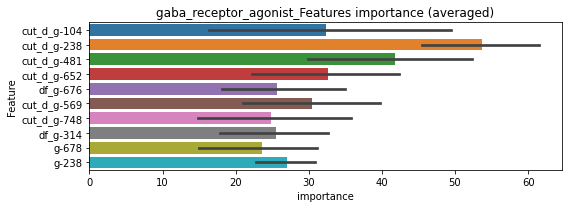

len(train_index) : 3840
len(valid_index) : 3840
================================= fold 1/2 gaba_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262332	valid_1's binary_logloss: 0.0720552
[200]	training's binary_logloss: 0.00570974	valid_1's binary_logloss: 0.0547084
[300]	training's binary_logloss: 0.00182774	valid_1's binary_logloss: 0.0516264
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00116318	valid_1's binary_logloss: 0.0506868


len(train_index) : 3840
len(valid_index) : 3840
================================= fold 2/2 gaba_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.027347	valid_1's binary_logloss: 0.065618
[200]	training's binary_logloss: 0.00673191	valid_1's binary_logloss: 0.0461625
[300]	training's binary_logloss: 0.00198885	valid_1's binary_logloss: 0.0424592
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00174267	valid_1's binary_logloss: 0.042318


gaba_receptor_agonist logloss: 0.046502387193895066


neg labels: 3289 → selected neg labels: 3263


gaba_receptor_antagonist, len(trt): 165, len(othr): 3263, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0837031	valid_1's binary_logloss: 0.187284
[200]	training's binary_logloss: 0.0263788	valid_1's binary_logloss: 0.154479
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0164998	valid_1's binary_logloss: 0.150297
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.085583	valid_1's binary_logloss: 0.184769
[200]	training's binary_logloss: 0.0275676	valid_1's binary_logloss: 0.141306
[300]	training's binary_logloss: 0.0102038	valid_1's binary_logloss: 0.130539
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00767925	valid_1's binary_logloss: 0.128918


1 / 3 AUC score:0.968
y_Threshold: 0.0426647, Threshold: 0.0470084, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 239 → Positive_corect_labels: 598/3676
p_label_rate: 0.0200904 Vs.target_rate: 0.00693
Num_p_label: 80.0, conf_0:0.04231, conf_1:0.05171
threshold: 0.0470084, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 598.0/3676, y_label_rate: 0.1626768
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0715757	valid_1's binary_logloss: 0.160229
[200]	training's binary_logloss: 0.019485	valid_1's binary_logloss: 0.12215
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00779422	valid_1's binary_logloss: 0.113695
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0711035	valid_1's binary_logloss: 0.14979
[200]	training's binary_logloss: 0.0200949	valid_1's binary_logloss: 0.110342
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00778745	valid_1's binary_logloss: 0.10138


2 / 3 AUC score:0.987
y_Threshold: 0.0565734, Threshold: 0.0470084, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 68 → Positive_corect_labels: 564.0/3608
p_label_rate: 0.0118031 Vs.target_rate: 0.00693
Num_p_label: 47.0, conf_0:0.04231, conf_1:0.05171
threshold: 0.0470084, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 564.0/3608, y_label_rate: 0.1563193
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0582531	valid_1's binary_logloss: 0.145406
[200]	training's binary_logloss: 0.0146928	valid_1's binary_logloss: 0.108224
[300]	training's binary_logloss: 0.00494428	valid_1's binary_logloss: 0.100917
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00540226	valid_1's binary_logloss: 0.10086
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0642047	valid_1's binary_logloss: 0.125789
[200]	training's binary_logloss: 0.0172738	valid_1's binary_logloss: 0.0823911
[300]	training's binary_logloss: 0.0059781	valid_1's binary_logloss: 0.0708635
[400]	training's binary_logloss: 0.00274248	valid_1's binary_logloss: 0.0663737
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00281459	valid_1's binary_logloss: 0.0661202


3 / 3 AUC score:0.996
y_Threshold: 0.0383055, Threshold: 0.0470084, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 542.0/3564
p_label_rate: 0.0025113 Vs.target_rate: 0.00693
Num_p_label: 10.0, conf_0:0.04231, conf_1:0.05171
threshold: 0.0470084, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 552.0/7546, y_label_rate: 0.0731513


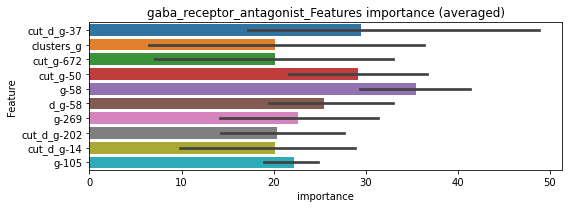

len(train_index) : 3773
len(valid_index) : 3773
================================= fold 1/2 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295976	valid_1's binary_logloss: 0.0719957
[200]	training's binary_logloss: 0.00719373	valid_1's binary_logloss: 0.0554474
[300]	training's binary_logloss: 0.00239583	valid_1's binary_logloss: 0.0528794
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00217648	valid_1's binary_logloss: 0.0526408


len(train_index) : 3773
len(valid_index) : 3773
================================= fold 2/2 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0309453	valid_1's binary_logloss: 0.0693102
[200]	training's binary_logloss: 0.00770401	valid_1's binary_logloss: 0.0499076
[300]	training's binary_logloss: 0.0026271	valid_1's binary_logloss: 0.045863
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00161852	valid_1's binary_logloss: 0.0443422


gaba_receptor_antagonist logloss: 0.04849151871296331


neg labels: 3289 → selected neg labels: 3279


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3279, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0352567	valid_1's binary_logloss: 0.0650821
[200]	training's binary_logloss: 0.00574887	valid_1's binary_logloss: 0.0291803
[300]	training's binary_logloss: 0.00173939	valid_1's binary_logloss: 0.0230032
[400]	training's binary_logloss: 0.000855645	valid_1's binary_logloss: 0.0215768
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000824707	valid_1's binary_logloss: 0.0215428
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0340037	valid_1's binary_logloss: 0.0596432
[200]	training's binary_logloss: 0.0055051	valid_1's binary_logloss: 0.0235823
[300]	training's binary_logloss: 0.00166156	valid_1's binary_logloss: 0.0167667
[400]	training's binary_logloss: 0.000833927	valid_1's binary_logloss: 0.015273
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000570577	valid_1's binary_logloss: 0.0145312


1 / 3 AUC score:1.000
y_Threshold: 0.0041263, Threshold: 0.0054194, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00235
Num_p_label: 80.0, conf_0:0.00488, conf_1:0.00596
Num_p_label: 80.0, Expected: 9.4, Adj_threshold_1: 0.0054194
Num_p_label: 15.0, Expected: 9.4, Adj_threshold_2: 0.0154194
threshold: 0.0154194, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329808	valid_1's binary_logloss: 0.0573479
[200]	training's binary_logloss: 0.00501318	valid_1's binary_logloss: 0.021155
[300]	training's binary_logloss: 0.00151365	valid_1's binary_logloss: 0.0153869
[400]	training's binary_logloss: 0.000769377	valid_1's binary_logloss: 0.0138307
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000579431	valid_1's binary_logloss: 0.0133186
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344458	valid_1's binary_logloss: 0.0574849
[200]	training's binary_logloss: 0.0055539	valid_1's binary_logloss: 0.0200768
[300]	training's binary_logloss: 0.00164501	valid_1's binary_logloss: 0.0127799
[400]	training's binary_logloss: 0.000823101	valid_1's binary_logloss: 0.0107818
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000690195	valid_1's binary_logloss: 0.0104721


2 / 3 AUC score:1.000
y_Threshold: 0.0206667, Threshold: 0.0154194, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0102963 Vs.target_rate: 0.00235
Num_p_label: 41.0, conf_0:0.01388, conf_1:0.01696
Num_p_label: 41.0, Expected: 9.4, Adj_threshold_1: 0.0154194
Num_p_label: 22.0, Expected: 9.4, Adj_threshold_2: 0.0254194
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_3: 0.0354194
threshold: 0.0354194, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336308	valid_1's binary_logloss: 0.0609905
[200]	training's binary_logloss: 0.0050471	valid_1's binary_logloss: 0.0227119
[300]	training's binary_logloss: 0.00151299	valid_1's binary_logloss: 0.0157153
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00123122	valid_1's binary_logloss: 0.0148297
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0338792	valid_1's binary_logloss: 0.0558865
[200]	training's binary_logloss: 0.00524023	valid_1's binary_logloss: 0.0227737
[300]	training's binary_logloss: 0.00154796	valid_1's binary_logloss: 0.0160814
[400]	training's binary_logloss: 0.000777009	valid_1's binary_logloss: 0.0140174
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000770163	valid_1's binary_logloss: 0.0139871


3 / 3 AUC score:1.000
y_Threshold: 0.0257793, Threshold: 0.0354194, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0045203 Vs.target_rate: 0.00235
Num_p_label: 18.0, conf_0:0.03188, conf_1:0.03896
threshold: 0.0354194, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 664.0/7766, y_label_rate: 0.0855009


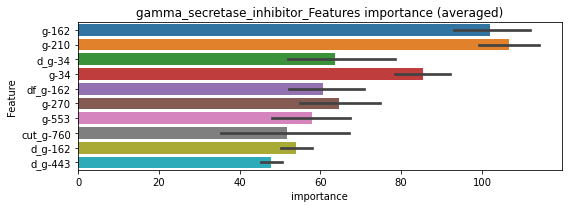

len(train_index) : 3883
len(valid_index) : 3883
================================= fold 1/2 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171753	valid_1's binary_logloss: 0.0392429
[200]	training's binary_logloss: 0.00257198	valid_1's binary_logloss: 0.0209879
[300]	training's binary_logloss: 0.000773545	valid_1's binary_logloss: 0.01811
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00044071	valid_1's binary_logloss: 0.0174891


len(train_index) : 3883
len(valid_index) : 3883
================================= fold 2/2 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178758	valid_1's binary_logloss: 0.0368792
[200]	training's binary_logloss: 0.00275336	valid_1's binary_logloss: 0.0160801
[300]	training's binary_logloss: 0.000832756	valid_1's binary_logloss: 0.0118604
[400]	training's binary_logloss: 0.000415399	valid_1's binary_logloss: 0.010434
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000336625	valid_1's binary_logloss: 0.0100632


gamma_secretase_inhibitor logloss: 0.01377616365537212


neg labels: 3289 → selected neg labels: 3253


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3253, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032893	valid_1's binary_logloss: 0.0729504
[200]	training's binary_logloss: 0.00530629	valid_1's binary_logloss: 0.0575213
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00545317	valid_1's binary_logloss: 0.0573579
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0349741	valid_1's binary_logloss: 0.0626359
[200]	training's binary_logloss: 0.00607952	valid_1's binary_logloss: 0.036183
[300]	training's binary_logloss: 0.00187596	valid_1's binary_logloss: 0.030487
[400]	training's binary_logloss: 0.000900786	valid_1's binary_logloss: 0.0285871
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000900786	valid_1's binary_logloss: 0.0285871


1 / 3 AUC score:0.996
y_Threshold: 0.0088719, Threshold: 0.0286190, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 147 → Positive_corect_labels: 642/3756
p_label_rate: 0.0200904 Vs.target_rate: 0.01117
Num_p_label: 80.0, conf_0:0.02576, conf_1:0.03148
threshold: 0.0286190, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 642.0/3756, y_label_rate: 0.1709265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285788	valid_1's binary_logloss: 0.0546372
[200]	training's binary_logloss: 0.00416519	valid_1's binary_logloss: 0.0316397
[300]	training's binary_logloss: 0.00119832	valid_1's binary_logloss: 0.0280518
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00106907	valid_1's binary_logloss: 0.0279269
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296812	valid_1's binary_logloss: 0.051054
[200]	training's binary_logloss: 0.00424375	valid_1's binary_logloss: 0.0267652
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00158645	valid_1's binary_logloss: 0.0243241


2 / 3 AUC score:0.999
y_Threshold: 0.0211535, Threshold: 0.0286190, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 631.0/3734
p_label_rate: 0.0233551 Vs.target_rate: 0.01117
Num_p_label: 93.0, conf_0:0.02576, conf_1:0.03148
threshold: 0.0286190, positive_p_label: 93.0/3982, p_label_rate: 0.0233551
positive_y_label: 631.0/3734, y_label_rate: 0.1689877
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272643	valid_1's binary_logloss: 0.039329
[200]	training's binary_logloss: 0.00385526	valid_1's binary_logloss: 0.0157504
[300]	training's binary_logloss: 0.00109394	valid_1's binary_logloss: 0.012221
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000736208	valid_1's binary_logloss: 0.0117527
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256366	valid_1's binary_logloss: 0.0585865
[200]	training's binary_logloss: 0.00337986	valid_1's binary_logloss: 0.0387751
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00211035	valid_1's binary_logloss: 0.0377734


3 / 3 AUC score:0.999
y_Threshold: 0.0233289, Threshold: 0.0286190, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 624.0/3720
p_label_rate: 0.0231040 Vs.target_rate: 0.01117
Num_p_label: 92.0, conf_0:0.02576, conf_1:0.03148
threshold: 0.0286190, positive_p_label: 92.0/3982, p_label_rate: 0.0231040
positive_y_label: 716.0/7702, y_label_rate: 0.0929629


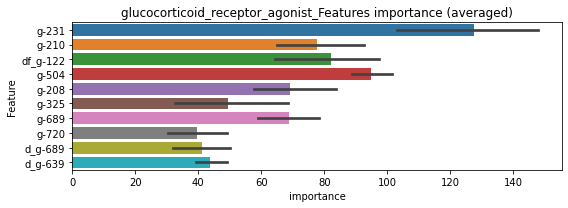

len(train_index) : 3851
len(valid_index) : 3851
================================= fold 1/2 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159292	valid_1's binary_logloss: 0.0446079
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00350651	valid_1's binary_logloss: 0.0356285


len(train_index) : 3851
len(valid_index) : 3851
================================= fold 2/2 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176136	valid_1's binary_logloss: 0.0333533
[200]	training's binary_logloss: 0.00329101	valid_1's binary_logloss: 0.0203427
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00195338	valid_1's binary_logloss: 0.0191626


glucocorticoid_receptor_agonist logloss: 0.02739554861402044


neg labels: 3289 → selected neg labels: 3287


glutamate_inhibitor, len(trt): 13, len(othr): 3287, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195925	valid_1's binary_logloss: 0.0277216
[200]	training's binary_logloss: 0.00209529	valid_1's binary_logloss: 0.00567241
[300]	training's binary_logloss: 0.000612615	valid_1's binary_logloss: 0.00287508
[400]	training's binary_logloss: 0.000347081	valid_1's binary_logloss: 0.00226537
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000304699	valid_1's binary_logloss: 0.00216614
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197547	valid_1's binary_logloss: 0.0233561
[200]	training's binary_logloss: 0.00215426	valid_1's binary_logloss: 0.00355996
[300]	training's binary_logloss: 0.000624646	valid_1's binary_logloss: 0.00148822
[400]	training's binary_logloss: 0.000353538	valid_1's binary_logloss: 0.00103885
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00030218	valid_1's binary_logloss: 0.000958

1 / 3 AUC score:1.000
y_Threshold: 0.0010899, Threshold: 0.0013866, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00055
Num_p_label: 80.0, conf_0:0.00125, conf_1:0.00153
Num_p_label: 80.0, Expected: 2.2, Adj_threshold_1: 0.0013866
Num_p_label: 1.0, Expected: 2.2, Adj_threshold_2: 0.0113866
threshold: 0.0113866, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197549	valid_1's binary_logloss: 0.0276088
[200]	training's binary_logloss: 0.00208406	valid_1's binary_logloss: 0.00567202
[300]	training's binary_logloss: 0.000602612	valid_1's binary_logloss: 0.00287035
[400]	training's binary_logloss: 0.000346843	valid_1's binary_logloss: 0.00223112
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000300241	valid_1's binary_logloss: 0.00212559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198058	valid_1's binary_logloss: 0.0237477
[200]	training's binary_logloss: 0.00212067	valid_1's binary_logloss: 0.00392081
[300]	training's binary_logloss: 0.000617088	valid_1's binary_logloss: 0.00180696
[400]	training's binary_logloss: 0.000352415	valid_1's binary_logloss: 0.00136499
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000301311	valid_1's binary_logloss: 0.00127

2 / 3 AUC score:1.000
y_Threshold: 0.0413926, Threshold: 0.0113866, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, conf_0:0.01025, conf_1:0.01253
threshold: 0.0113866, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197549	valid_1's binary_logloss: 0.0276088
[200]	training's binary_logloss: 0.00208406	valid_1's binary_logloss: 0.00567202
[300]	training's binary_logloss: 0.000602612	valid_1's binary_logloss: 0.00287035
[400]	training's binary_logloss: 0.000346843	valid_1's binary_logloss: 0.00223112
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000300241	valid_1's binary_logloss: 0.00212559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198058	valid_1's binary_logloss: 0.0237477
[200]	training's binary_logloss: 0.00212067	valid_1's binary_logloss: 0.00392081
[300]	training's binary_logloss: 0.000617088	valid_1's binary_logloss: 0.00180696
[400]	training's binary_logloss: 0.000352415	valid_1's binary_logloss: 0.00136499
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000301311	valid_1's binary_logloss: 0.00127

3 / 3 AUC score:1.000
y_Threshold: 0.0413926, Threshold: 0.0113866, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, conf_0:0.01025, conf_1:0.01253
threshold: 0.0113866, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7794, y_label_rate: 0.0850654


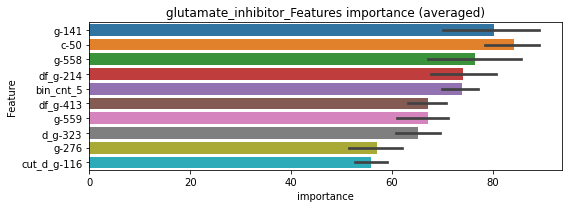

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 glutamate_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105284	valid_1's binary_logloss: 0.0171115
[200]	training's binary_logloss: 0.00110573	valid_1's binary_logloss: 0.00794069
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.000646428	valid_1's binary_logloss: 0.00766507


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 glutamate_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112891	valid_1's binary_logloss: 0.0179557
[200]	training's binary_logloss: 0.00127467	valid_1's binary_logloss: 0.0070822
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000631097	valid_1's binary_logloss: 0.0062975


glutamate_inhibitor logloss: 0.006981281944713077


neg labels: 3289 → selected neg labels: 3277


glutamate_receptor_agonist, len(trt): 74, len(othr): 3277, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0526682	valid_1's binary_logloss: 0.104522
[200]	training's binary_logloss: 0.011866	valid_1's binary_logloss: 0.0592761
[300]	training's binary_logloss: 0.0037022	valid_1's binary_logloss: 0.0458161
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00216132	valid_1's binary_logloss: 0.0429924
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0534982	valid_1's binary_logloss: 0.0983847
[200]	training's binary_logloss: 0.0123115	valid_1's binary_logloss: 0.048913
[300]	training's binary_logloss: 0.0038692	valid_1's binary_logloss: 0.034162
[400]	training's binary_logloss: 0.00176954	valid_1's binary_logloss: 0.0292143
[500]	training's binary_logloss: 0.00106698	valid_1's binary_logloss: 0.0270449
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000797684	valid_1's binary_logloss: 0.0257961


1 / 3 AUC score:0.999
y_Threshold: 0.0095095, Threshold: 0.0116133, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00311
Num_p_label: 80.0, conf_0:0.01045, conf_1:0.01277
Num_p_label: 80.0, Expected: 12.4, Adj_threshold_1: 0.0116133
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_2: 0.0216133
threshold: 0.0216133, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0515589	valid_1's binary_logloss: 0.112846
[200]	training's binary_logloss: 0.0109671	valid_1's binary_logloss: 0.0661316
[300]	training's binary_logloss: 0.00339213	valid_1's binary_logloss: 0.0549198
[400]	training's binary_logloss: 0.00156551	valid_1's binary_logloss: 0.0499104
[500]	training's binary_logloss: 0.000966387	valid_1's binary_logloss: 0.0487888
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000999653	valid_1's binary_logloss: 0.0485566
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0566627	valid_1's binary_logloss: 0.0950775
[200]	training's binary_logloss: 0.012596	valid_1's binary_logloss: 0.0435024
[300]	training's binary_logloss: 0.00390268	valid_1's binary_logloss: 0.0298094
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00195513	valid_1's binary_logloss: 0.0259097


2 / 3 AUC score:0.999
y_Threshold: 0.0233304, Threshold: 0.0216133, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 644.0/3778
p_label_rate: 0.0095429 Vs.target_rate: 0.00311
Num_p_label: 38.0, conf_0:0.01945, conf_1:0.02377
Num_p_label: 38.0, Expected: 12.4, Adj_threshold_1: 0.0216133
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.0316133
threshold: 0.0316133, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3778, y_label_rate: 0.1704606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0494244	valid_1's binary_logloss: 0.107853
[200]	training's binary_logloss: 0.0102708	valid_1's binary_logloss: 0.063182
[300]	training's binary_logloss: 0.00322182	valid_1's binary_logloss: 0.0520078
[400]	training's binary_logloss: 0.00151267	valid_1's binary_logloss: 0.0474078
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00122781	valid_1's binary_logloss: 0.045946
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0545259	valid_1's binary_logloss: 0.092301
[200]	training's binary_logloss: 0.0124253	valid_1's binary_logloss: 0.0426457
[300]	training's binary_logloss: 0.00379545	valid_1's binary_logloss: 0.0286741
[400]	training's binary_logloss: 0.00173333	valid_1's binary_logloss: 0.024666
[500]	training's binary_logloss: 0.00105439	valid_1's binary_logloss: 0.0230219
[600]	training's binary_logloss: 0.000762662	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.0273057, Threshold: 0.0316133, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0025113 Vs.target_rate: 0.00311
Num_p_label: 10.0, conf_0:0.02845, conf_1:0.03477
threshold: 0.0316133, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/7752, y_label_rate: 0.0838493


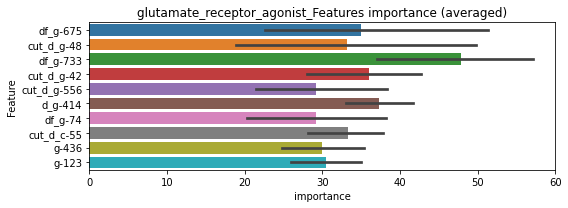

len(train_index) : 3876
len(valid_index) : 3876
================================= fold 1/2 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282157	valid_1's binary_logloss: 0.0636506
[200]	training's binary_logloss: 0.00586714	valid_1's binary_logloss: 0.0387716
[300]	training's binary_logloss: 0.00179953	valid_1's binary_logloss: 0.0328845
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000988683	valid_1's binary_logloss: 0.0312675


len(train_index) : 3876
len(valid_index) : 3876
================================= fold 2/2 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307688	valid_1's binary_logloss: 0.0561777
[200]	training's binary_logloss: 0.0066353	valid_1's binary_logloss: 0.026853
[300]	training's binary_logloss: 0.00203562	valid_1's binary_logloss: 0.019165
[400]	training's binary_logloss: 0.000918074	valid_1's binary_logloss: 0.0166408
[500]	training's binary_logloss: 0.000552471	valid_1's binary_logloss: 0.0155712
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000519674	valid_1's binary_logloss: 0.0154808


glutamate_receptor_agonist logloss: 0.023374128778206184


neg labels: 3289 → selected neg labels: 3226


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3226, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.124806	valid_1's binary_logloss: 0.354434
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0907591	valid_1's binary_logloss: 0.350261
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.137024	valid_1's binary_logloss: 0.339667
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.0653864	valid_1's binary_logloss: 0.326254


1 / 3 AUC score:0.806
y_Threshold: 0.1269222, Threshold: 0.1584293, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 628 → Positive_corect_labels: 396/3243
p_label_rate: 0.0200904 Vs.target_rate: 0.01541
Num_p_label: 80.0, conf_0:0.14259, conf_1:0.17427
threshold: 0.1584293, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 396.0/3243, y_label_rate: 0.1221092
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0680581	valid_1's binary_logloss: 0.21564
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.0280395	valid_1's binary_logloss: 0.199516
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0758016	valid_1's binary_logloss: 0.205833
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.028695	valid_1's binary_logloss: 0.180769


2 / 3 AUC score:0.946
y_Threshold: 0.0831053, Threshold: 0.1584293, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 166 → Positive_corect_labels: 313.0/3077
p_label_rate: 0.0025113 Vs.target_rate: 0.01541
Num_p_label: 10.0, conf_0:0.14259, conf_1:0.17427
Num_p_label: 10.0, Expected: 61.4, Adj_threshold_1: 0.1584293
Num_p_label: 13.0, Expected: 61.4, Adj_threshold_2: 0.1484293
Num_p_label: 16.0, Expected: 61.4, Adj_threshold_3: 0.1384293
Num_p_label: 28.0, Expected: 61.4, Adj_threshold_4: 0.1284293
Num_p_label: 44.0, Expected: 61.4, Adj_threshold_5: 0.1184293
threshold: 0.1184293, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 313.0/3077, y_label_rate: 0.1017225
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474442	valid_1's binary_logloss: 0.160126
Early stopping, best iteration is:
[167]	training's binary_logloss: 0.0194987	valid_1's binary_logloss: 0.144254
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0490297	valid_1's binary_logloss: 0.16959
Early stopping, best iteration is:
[156]	training's binary_logloss: 0.0227736	valid_1's binary_logloss: 0.159552


3 / 3 AUC score:0.975
y_Threshold: 0.0613378, Threshold: 0.1184293, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 88 → Positive_corect_labels: 269.0/2989
p_label_rate: 0.0007534 Vs.target_rate: 0.01541
Num_p_label: 3.0, conf_0:0.10659, conf_1:0.13027
Num_p_label: 3.0, Expected: 61.4, Adj_threshold_1: 0.1184293
Num_p_label: 6.0, Expected: 61.4, Adj_threshold_2: 0.1084293
Num_p_label: 11.0, Expected: 61.4, Adj_threshold_3: 0.0984293
Num_p_label: 18.0, Expected: 61.4, Adj_threshold_4: 0.0884293
Num_p_label: 30.0, Expected: 61.4, Adj_threshold_5: 0.0784293
Num_p_label: 62.0, Expected: 61.4, Adj_threshold_6: 0.0684293
threshold: 0.0684293, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 331.0/6971, y_label_rate: 0.0474824


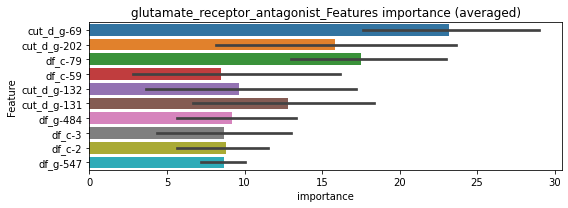

len(train_index) : 3485
len(valid_index) : 3486
================================= fold 1/2 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0255624	valid_1's binary_logloss: 0.100694
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0119267	valid_1's binary_logloss: 0.0952658


len(train_index) : 3486
len(valid_index) : 3485
================================= fold 2/2 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0254338	valid_1's binary_logloss: 0.106087
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.00958885	valid_1's binary_logloss: 0.101432


glutamate_receptor_antagonist logloss: 0.09834825325977693


neg labels: 3289 → selected neg labels: 3286


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221063	valid_1's binary_logloss: 0.0290758
[200]	training's binary_logloss: 0.00260329	valid_1's binary_logloss: 0.00756417
[300]	training's binary_logloss: 0.000770227	valid_1's binary_logloss: 0.00467765
[400]	training's binary_logloss: 0.00042152	valid_1's binary_logloss: 0.00387031
[500]	training's binary_logloss: 0.000340071	valid_1's binary_logloss: 0.00369021
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000338705	valid_1's binary_logloss: 0.00368772
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233204	valid_1's binary_logloss: 0.0319376
[200]	training's binary_logloss: 0.00280289	valid_1's binary_logloss: 0.00654911
[300]	training's binary_logloss: 0.000826817	valid_1's binary_logloss: 0.00315451
[400]	training's binary_logloss: 0.000439367	valid_1's binary_logloss: 0.00230367
Early stopping, best iteration i

1 / 3 AUC score:1.000
y_Threshold: 0.0017410, Threshold: 0.0030849, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00278, conf_1:0.00339
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0030849
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0130849
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0230849
threshold: 0.0230849, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222044	valid_1's binary_logloss: 0.0289116
[200]	training's binary_logloss: 0.00257855	valid_1's binary_logloss: 0.00787434
[300]	training's binary_logloss: 0.000762209	valid_1's binary_logloss: 0.00528736
[400]	training's binary_logloss: 0.0004151	valid_1's binary_logloss: 0.00452587
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000353285	valid_1's binary_logloss: 0.00438862
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232776	valid_1's binary_logloss: 0.0301463
[200]	training's binary_logloss: 0.00273719	valid_1's binary_logloss: 0.00597635
[300]	training's binary_logloss: 0.000796347	valid_1's binary_logloss: 0.00323077
[400]	training's binary_logloss: 0.000423616	valid_1's binary_logloss: 0.00246906
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000349225	valid_1's binary_logloss: 0.0023306

2 / 3 AUC score:1.000
y_Threshold: 0.0180561, Threshold: 0.0230849, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.02078, conf_1:0.02539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0230849
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0330849
threshold: 0.0330849, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222044	valid_1's binary_logloss: 0.0289116
[200]	training's binary_logloss: 0.00257855	valid_1's binary_logloss: 0.00787434
[300]	training's binary_logloss: 0.000762209	valid_1's binary_logloss: 0.00528736
[400]	training's binary_logloss: 0.0004151	valid_1's binary_logloss: 0.00452587
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000353285	valid_1's binary_logloss: 0.00438862
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232776	valid_1's binary_logloss: 0.0301463
[200]	training's binary_logloss: 0.00273719	valid_1's binary_logloss: 0.00597635
[300]	training's binary_logloss: 0.000796347	valid_1's binary_logloss: 0.00323077
[400]	training's binary_logloss: 0.000423616	valid_1's binary_logloss: 0.00246906
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000349225	valid_1's binary_logloss: 0.0023306

3 / 3 AUC score:1.000
y_Threshold: 0.0180561, Threshold: 0.0330849, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.02978, conf_1:0.03639
threshold: 0.0330849, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7793, y_label_rate: 0.0848197


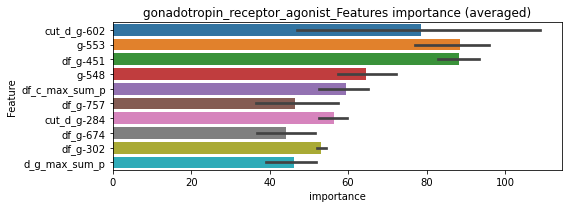

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125483	valid_1's binary_logloss: 0.0197511
[200]	training's binary_logloss: 0.00146433	valid_1's binary_logloss: 0.00740355
[300]	training's binary_logloss: 0.000417033	valid_1's binary_logloss: 0.00573694
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00027643	valid_1's binary_logloss: 0.0055258


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122983	valid_1's binary_logloss: 0.0166023
[200]	training's binary_logloss: 0.00145736	valid_1's binary_logloss: 0.00478455
[300]	training's binary_logloss: 0.000418768	valid_1's binary_logloss: 0.00337604
[400]	training's binary_logloss: 0.000221205	valid_1's binary_logloss: 0.00305748
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000174028	valid_1's binary_logloss: 0.002963


gonadotropin_receptor_agonist logloss: 0.004244563833162361


neg labels: 3289 → selected neg labels: 3279


gsk_inhibitor, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350237	valid_1's binary_logloss: 0.0685473
[200]	training's binary_logloss: 0.00574884	valid_1's binary_logloss: 0.0292422
[300]	training's binary_logloss: 0.00172005	valid_1's binary_logloss: 0.0205997
[400]	training's binary_logloss: 0.0008437	valid_1's binary_logloss: 0.0180107
[500]	training's binary_logloss: 0.000558644	valid_1's binary_logloss: 0.0165659
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000519424	valid_1's binary_logloss: 0.016327
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0349416	valid_1's binary_logloss: 0.0717017
[200]	training's binary_logloss: 0.00567591	valid_1's binary_logloss: 0.0347325
[300]	training's binary_logloss: 0.00170149	valid_1's binary_logloss: 0.0273646
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00121479	valid_1's binary_logloss: 0.026332


1 / 3 AUC score:1.000
y_Threshold: 0.0040150, Threshold: 0.0065432, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00589, conf_1:0.00720
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0065432
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_2: 0.0165432
threshold: 0.0165432, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348417	valid_1's binary_logloss: 0.0612074
[200]	training's binary_logloss: 0.00553816	valid_1's binary_logloss: 0.0247409
[300]	training's binary_logloss: 0.00165014	valid_1's binary_logloss: 0.0170349
[400]	training's binary_logloss: 0.000813072	valid_1's binary_logloss: 0.0148559
[500]	training's binary_logloss: 0.000544611	valid_1's binary_logloss: 0.014096
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000505336	valid_1's binary_logloss: 0.013967
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350789	valid_1's binary_logloss: 0.0639984
[200]	training's binary_logloss: 0.00558768	valid_1's binary_logloss: 0.0250167
[300]	training's binary_logloss: 0.00167243	valid_1's binary_logloss: 0.0177555
[400]	training's binary_logloss: 0.000834188	valid_1's binary_logloss: 0.0157969
Early stopping, best iteration is:
[470]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0144514, Threshold: 0.0165432, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00252
Num_p_label: 27.0, conf_0:0.01489, conf_1:0.01820
threshold: 0.0165432, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339685	valid_1's binary_logloss: 0.0600658
[200]	training's binary_logloss: 0.00545707	valid_1's binary_logloss: 0.0235801
[300]	training's binary_logloss: 0.00163967	valid_1's binary_logloss: 0.0163176
[400]	training's binary_logloss: 0.000814583	valid_1's binary_logloss: 0.014378
[500]	training's binary_logloss: 0.000550245	valid_1's binary_logloss: 0.013481
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000551541	valid_1's binary_logloss: 0.0134808
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0354028	valid_1's binary_logloss: 0.0568364
[200]	training's binary_logloss: 0.00574314	valid_1's binary_logloss: 0.0193156
[300]	training's binary_logloss: 0.00169448	valid_1's binary_logloss: 0.0124137
[400]	training's binary_logloss: 0.000841272	valid_1's binary_logloss: 0.0101629
[500]	training's binary_logloss: 0.00055647

3 / 3 AUC score:1.000
y_Threshold: 0.0176271, Threshold: 0.0165432, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00252
Num_p_label: 27.0, conf_0:0.01489, conf_1:0.01820
threshold: 0.0165432, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 680.0/7780, y_label_rate: 0.0874036


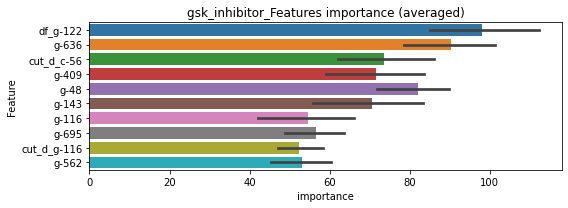

len(train_index) : 3890
len(valid_index) : 3890
================================= fold 1/2 gsk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185949	valid_1's binary_logloss: 0.0471811
[200]	training's binary_logloss: 0.00292427	valid_1's binary_logloss: 0.0318304
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000984394	valid_1's binary_logloss: 0.0295244


len(train_index) : 3890
len(valid_index) : 3890
================================= fold 2/2 gsk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198163	valid_1's binary_logloss: 0.0391827
[200]	training's binary_logloss: 0.00334664	valid_1's binary_logloss: 0.019708
[300]	training's binary_logloss: 0.000999166	valid_1's binary_logloss: 0.0161063
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000525902	valid_1's binary_logloss: 0.0149902


gsk_inhibitor logloss: 0.022257322089803588


neg labels: 3289 → selected neg labels: 3277


hcv_inhibitor, len(trt): 72, len(othr): 3277, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0497615	valid_1's binary_logloss: 0.107162
[200]	training's binary_logloss: 0.0105664	valid_1's binary_logloss: 0.0643525
[300]	training's binary_logloss: 0.0034517	valid_1's binary_logloss: 0.05426
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00261613	valid_1's binary_logloss: 0.05286
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0512864	valid_1's binary_logloss: 0.0959312
[200]	training's binary_logloss: 0.011297	valid_1's binary_logloss: 0.0566208
[300]	training's binary_logloss: 0.00352306	valid_1's binary_logloss: 0.0460391
[400]	training's binary_logloss: 0.00162551	valid_1's binary_logloss: 0.0435822
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00137626	valid_1's binary_logloss: 0.0430923


1 / 3 AUC score:0.996
y_Threshold: 0.0092770, Threshold: 0.0115745, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 150 → Positive_corect_labels: 646/3782
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.01042, conf_1:0.01273
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0115745
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.0215745
threshold: 0.0215745, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0475658	valid_1's binary_logloss: 0.109973
[200]	training's binary_logloss: 0.00945399	valid_1's binary_logloss: 0.069901
[300]	training's binary_logloss: 0.00301677	valid_1's binary_logloss: 0.0612489
[400]	training's binary_logloss: 0.00140075	valid_1's binary_logloss: 0.0581555
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0012016	valid_1's binary_logloss: 0.0574878
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0523501	valid_1's binary_logloss: 0.085546
[200]	training's binary_logloss: 0.0109603	valid_1's binary_logloss: 0.0404864
[300]	training's binary_logloss: 0.00347873	valid_1's binary_logloss: 0.0298713
[400]	training's binary_logloss: 0.00160548	valid_1's binary_logloss: 0.0262754
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00115558	valid_1's binary_logloss: 0.0253364


2 / 3 AUC score:0.999
y_Threshold: 0.0207847, Threshold: 0.0215745, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 639.0/3768
p_label_rate: 0.0067805 Vs.target_rate: 0.00302
Num_p_label: 27.0, conf_0:0.01942, conf_1:0.02373
threshold: 0.0215745, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 639.0/3768, y_label_rate: 0.1695860
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0463725	valid_1's binary_logloss: 0.0858282
[200]	training's binary_logloss: 0.00956171	valid_1's binary_logloss: 0.0416355
[300]	training's binary_logloss: 0.00301621	valid_1's binary_logloss: 0.0309481
[400]	training's binary_logloss: 0.00142609	valid_1's binary_logloss: 0.0273833
[500]	training's binary_logloss: 0.000894788	valid_1's binary_logloss: 0.0257932
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000761908	valid_1's binary_logloss: 0.0253505
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0498751	valid_1's binary_logloss: 0.0827768
[200]	training's binary_logloss: 0.0104571	valid_1's binary_logloss: 0.0370442
[300]	training's binary_logloss: 0.0032765	valid_1's binary_logloss: 0.0251654
[400]	training's binary_logloss: 0.00153715	valid_1's binary_logloss: 0.0214326
[500]	training's binary_logloss: 0.000953423	

3 / 3 AUC score:1.000
y_Threshold: 0.0221702, Threshold: 0.0215745, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 637.0/3764
p_label_rate: 0.0062783 Vs.target_rate: 0.00302
Num_p_label: 25.0, conf_0:0.01942, conf_1:0.02373
threshold: 0.0215745, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 662.0/7746, y_label_rate: 0.0854635


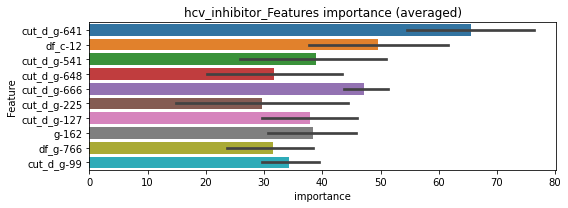

len(train_index) : 3873
len(valid_index) : 3873
================================= fold 1/2 hcv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283365	valid_1's binary_logloss: 0.0580847
[200]	training's binary_logloss: 0.00594171	valid_1's binary_logloss: 0.0341804
[300]	training's binary_logloss: 0.00183849	valid_1's binary_logloss: 0.0287907
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000958377	valid_1's binary_logloss: 0.0273631


len(train_index) : 3873
len(valid_index) : 3873
================================= fold 2/2 hcv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276723	valid_1's binary_logloss: 0.0577436
[200]	training's binary_logloss: 0.00579033	valid_1's binary_logloss: 0.0362054
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00219686	valid_1's binary_logloss: 0.0323567


hcv_inhibitor logloss: 0.02985992452095331


neg labels: 3289 → selected neg labels: 3271


hdac_inhibitor, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0338923	valid_1's binary_logloss: 0.0637386
[200]	training's binary_logloss: 0.00550107	valid_1's binary_logloss: 0.0306295
[300]	training's binary_logloss: 0.001669	valid_1's binary_logloss: 0.0250208
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000901601	valid_1's binary_logloss: 0.0234005
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0333921	valid_1's binary_logloss: 0.0725762
[200]	training's binary_logloss: 0.0054187	valid_1's binary_logloss: 0.045866
[300]	training's binary_logloss: 0.00162155	valid_1's binary_logloss: 0.0430737
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00176693	valid_1's binary_logloss: 0.0429486


1 / 3 AUC score:0.999
y_Threshold: 0.0068409, Threshold: 0.0244030, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 143 → Positive_corect_labels: 648/3782
p_label_rate: 0.0200904 Vs.target_rate: 0.00445
Num_p_label: 80.0, conf_0:0.02196, conf_1:0.02684
Num_p_label: 80.0, Expected: 17.7, Adj_threshold_1: 0.0244030
Num_p_label: 57.0, Expected: 17.7, Adj_threshold_2: 0.0344030
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_3: 0.0444030
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_4: 0.0544030
threshold: 0.0544030, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0319635	valid_1's binary_logloss: 0.0729131
[200]	training's binary_logloss: 0.0048449	valid_1's binary_logloss: 0.041427
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00158499	valid_1's binary_logloss: 0.0359932
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0328553	valid_1's binary_logloss: 0.0600847
[200]	training's binary_logloss: 0.00508944	valid_1's binary_logloss: 0.0255611
[300]	training's binary_logloss: 0.00150116	valid_1's binary_logloss: 0.0185035
[400]	training's binary_logloss: 0.000748643	valid_1's binary_logloss: 0.0163522
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000626776	valid_1's binary_logloss: 0.0157238


2 / 3 AUC score:1.000
y_Threshold: 0.0297595, Threshold: 0.0544030, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 642.0/3770
p_label_rate: 0.0213461 Vs.target_rate: 0.00445
Num_p_label: 85.0, conf_0:0.04896, conf_1:0.05984
Num_p_label: 85.0, Expected: 17.7, Adj_threshold_1: 0.0544030
Num_p_label: 71.0, Expected: 17.7, Adj_threshold_2: 0.0644030
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_3: 0.0744030
Num_p_label: 53.0, Expected: 17.7, Adj_threshold_4: 0.0844030
Num_p_label: 52.0, Expected: 17.7, Adj_threshold_5: 0.0944030
Num_p_label: 48.0, Expected: 17.7, Adj_threshold_6: 0.1044030
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_7: 0.1144030
Num_p_label: 39.0, Expected: 17.7, Adj_threshold_8: 0.1244030
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_9: 0.1344030
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_10: 0.1444030
threshold: 0.1444030, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 642.0/3770, y_label_rate: 0.170291

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306203	valid_1's binary_logloss: 0.076882
[200]	training's binary_logloss: 0.00456358	valid_1's binary_logloss: 0.0477587
[300]	training's binary_logloss: 0.00134382	valid_1's binary_logloss: 0.04276
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00139202	valid_1's binary_logloss: 0.0426543
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326157	valid_1's binary_logloss: 0.0566007
[200]	training's binary_logloss: 0.0049665	valid_1's binary_logloss: 0.0215781
[300]	training's binary_logloss: 0.00148624	valid_1's binary_logloss: 0.0152902
[400]	training's binary_logloss: 0.000728278	valid_1's binary_logloss: 0.0133357
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000587631	valid_1's binary_logloss: 0.0128604


3 / 3 AUC score:1.000
y_Threshold: 0.0271023, Threshold: 0.1444030, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 636.0/3758
p_label_rate: 0.0115520 Vs.target_rate: 0.00445
Num_p_label: 46.0, conf_0:0.12996, conf_1:0.15884
threshold: 0.1444030, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 682.0/7740, y_label_rate: 0.0881137


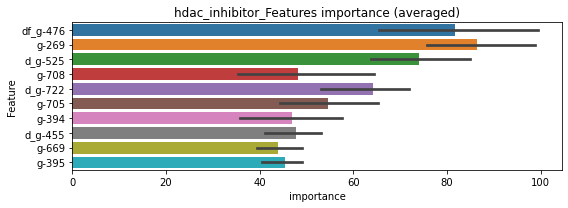

len(train_index) : 3870
len(valid_index) : 3870
================================= fold 1/2 hdac_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178485	valid_1's binary_logloss: 0.0478261
[200]	training's binary_logloss: 0.00293884	valid_1's binary_logloss: 0.0340834
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00126167	valid_1's binary_logloss: 0.0320796


len(train_index) : 3870
len(valid_index) : 3870
================================= fold 2/2 hdac_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0181752	valid_1's binary_logloss: 0.0493335
[200]	training's binary_logloss: 0.00292787	valid_1's binary_logloss: 0.0346347
[300]	training's binary_logloss: 0.000913567	valid_1's binary_logloss: 0.0318241
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000757774	valid_1's binary_logloss: 0.0315031


hdac_inhibitor logloss: 0.031791328263742674


neg labels: 3289 → selected neg labels: 3279


histamine_receptor_agonist, len(trt): 59, len(othr): 3279, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0471205	valid_1's binary_logloss: 0.0819087
[200]	training's binary_logloss: 0.00949425	valid_1's binary_logloss: 0.0366415
[300]	training's binary_logloss: 0.00284165	valid_1's binary_logloss: 0.0246341
[400]	training's binary_logloss: 0.00131422	valid_1's binary_logloss: 0.0204391
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000911526	valid_1's binary_logloss: 0.0189893
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0453623	valid_1's binary_logloss: 0.0831293
[200]	training's binary_logloss: 0.00907804	valid_1's binary_logloss: 0.041336
[300]	training's binary_logloss: 0.00280091	valid_1's binary_logloss: 0.0331223
[400]	training's binary_logloss: 0.00131555	valid_1's binary_logloss: 0.0305797
[500]	training's binary_logloss: 0.000816731	valid_1's binary_logloss: 0.0296543
Early stopping, best iteration is:
[549]	tra

1 / 3 AUC score:0.999
y_Threshold: 0.0054372, Threshold: 0.0073307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00248
Num_p_label: 80.0, conf_0:0.00660, conf_1:0.00806
Num_p_label: 80.0, Expected: 9.9, Adj_threshold_1: 0.0073307
Num_p_label: 17.0, Expected: 9.9, Adj_threshold_2: 0.0173307
threshold: 0.0173307, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0451907	valid_1's binary_logloss: 0.0866509
[200]	training's binary_logloss: 0.00855888	valid_1's binary_logloss: 0.0417694
[300]	training's binary_logloss: 0.00261262	valid_1's binary_logloss: 0.0309733
[400]	training's binary_logloss: 0.00124596	valid_1's binary_logloss: 0.0273022
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000863289	valid_1's binary_logloss: 0.0257302
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0468664	valid_1's binary_logloss: 0.0843216
[200]	training's binary_logloss: 0.00903458	valid_1's binary_logloss: 0.0374531
[300]	training's binary_logloss: 0.00272652	valid_1's binary_logloss: 0.0255402
[400]	training's binary_logloss: 0.00128113	valid_1's binary_logloss: 0.0221491
[500]	training's binary_logloss: 0.000809107	valid_1's binary_logloss: 0.0206149
[600]	training's binary_logloss: 0.00061593

2 / 3 AUC score:1.000
y_Threshold: 0.0209528, Threshold: 0.0173307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0082873 Vs.target_rate: 0.00248
Num_p_label: 33.0, conf_0:0.01560, conf_1:0.01906
Num_p_label: 33.0, Expected: 9.9, Adj_threshold_1: 0.0173307
Num_p_label: 13.0, Expected: 9.9, Adj_threshold_2: 0.0273307
threshold: 0.0273307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0425838	valid_1's binary_logloss: 0.0865245
[200]	training's binary_logloss: 0.00784175	valid_1's binary_logloss: 0.0465686
[300]	training's binary_logloss: 0.00238793	valid_1's binary_logloss: 0.0392899
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00136554	valid_1's binary_logloss: 0.0382297
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0470821	valid_1's binary_logloss: 0.0758953
[200]	training's binary_logloss: 0.00918128	valid_1's binary_logloss: 0.0283911
[300]	training's binary_logloss: 0.00275652	valid_1's binary_logloss: 0.0177107
[400]	training's binary_logloss: 0.00130398	valid_1's binary_logloss: 0.0141516
[500]	training's binary_logloss: 0.000822209	valid_1's binary_logloss: 0.0125905
[600]	training's binary_logloss: 0.000622914	valid_1's binary_logloss: 0.0120397
Early stopping, best iteration is:
[610]	tr

3 / 3 AUC score:0.999
y_Threshold: 0.0209393, Threshold: 0.0273307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0060271 Vs.target_rate: 0.00248
Num_p_label: 24.0, conf_0:0.02460, conf_1:0.03006
threshold: 0.0273307, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 668.0/7762, y_label_rate: 0.0860603


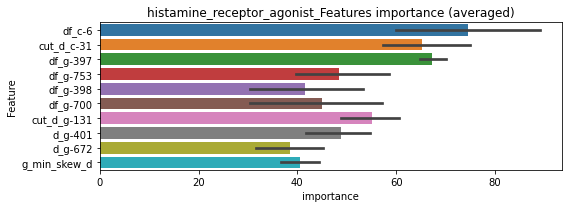

len(train_index) : 3881
len(valid_index) : 3881
================================= fold 1/2 histamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250687	valid_1's binary_logloss: 0.0556027
[200]	training's binary_logloss: 0.00475381	valid_1's binary_logloss: 0.0338884
[300]	training's binary_logloss: 0.00142081	valid_1's binary_logloss: 0.0301942
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00121229	valid_1's binary_logloss: 0.0300109


len(train_index) : 3881
len(valid_index) : 3881
================================= fold 2/2 histamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262655	valid_1's binary_logloss: 0.0475533
[200]	training's binary_logloss: 0.00516553	valid_1's binary_logloss: 0.0244721
[300]	training's binary_logloss: 0.00155164	valid_1's binary_logloss: 0.0191655
[400]	training's binary_logloss: 0.000724678	valid_1's binary_logloss: 0.0175225
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000728573	valid_1's binary_logloss: 0.0174977


histamine_receptor_agonist logloss: 0.02375434327739267


neg labels: 3289 → selected neg labels: 3249


histamine_receptor_antagonist, len(trt): 241, len(othr): 3249, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0987422	valid_1's binary_logloss: 0.246896
[200]	training's binary_logloss: 0.0337419	valid_1's binary_logloss: 0.223664
Early stopping, best iteration is:
[204]	training's binary_logloss: 0.0325216	valid_1's binary_logloss: 0.223436
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.10263	valid_1's binary_logloss: 0.244699
[200]	training's binary_logloss: 0.0358031	valid_1's binary_logloss: 0.215065
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0173538	valid_1's binary_logloss: 0.209422


1 / 3 AUC score:0.929
y_Threshold: 0.0700176, Threshold: 0.1006927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 371 → Positive_corect_labels: 529/3527
p_label_rate: 0.0200904 Vs.target_rate: 0.01012
Num_p_label: 80.0, conf_0:0.09062, conf_1:0.11076
threshold: 0.1006927, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 529.0/3527, y_label_rate: 0.1499858
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0742667	valid_1's binary_logloss: 0.170774
[200]	training's binary_logloss: 0.0210743	valid_1's binary_logloss: 0.130024
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00899509	valid_1's binary_logloss: 0.120836
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0686613	valid_1's binary_logloss: 0.182994
[200]	training's binary_logloss: 0.020507	valid_1's binary_logloss: 0.149106
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.012789	valid_1's binary_logloss: 0.142968


2 / 3 AUC score:0.988
y_Threshold: 0.0679411, Threshold: 0.1006927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 100 → Positive_corect_labels: 479.0/3427
p_label_rate: 0.0082873 Vs.target_rate: 0.01012
Num_p_label: 33.0, conf_0:0.09062, conf_1:0.11076
threshold: 0.1006927, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 479.0/3427, y_label_rate: 0.1397724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0565535	valid_1's binary_logloss: 0.151316
[200]	training's binary_logloss: 0.014744	valid_1's binary_logloss: 0.118213
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.0067938	valid_1's binary_logloss: 0.113746
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0581119	valid_1's binary_logloss: 0.165012
[200]	training's binary_logloss: 0.0153963	valid_1's binary_logloss: 0.143795
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.0123073	valid_1's binary_logloss: 0.141867


3 / 3 AUC score:0.988
y_Threshold: 0.0547059, Threshold: 0.1006927, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 90 → Positive_corect_labels: 434.0/3337
p_label_rate: 0.0032647 Vs.target_rate: 0.01012
Num_p_label: 13.0, conf_0:0.09062, conf_1:0.11076
Num_p_label: 13.0, Expected: 40.3, Adj_threshold_1: 0.1006927
Num_p_label: 24.0, Expected: 40.3, Adj_threshold_2: 0.0906927
threshold: 0.0906927, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 458.0/7319, y_label_rate: 0.0625769


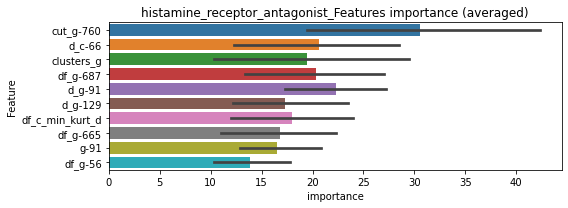

len(train_index) : 3659
len(valid_index) : 3660
================================= fold 1/2 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273744	valid_1's binary_logloss: 0.0862058
[200]	training's binary_logloss: 0.00779445	valid_1's binary_logloss: 0.0733676
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00538021	valid_1's binary_logloss: 0.0722444


len(train_index) : 3660
len(valid_index) : 3659
================================= fold 2/2 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280458	valid_1's binary_logloss: 0.0863401
[200]	training's binary_logloss: 0.00721556	valid_1's binary_logloss: 0.0733216
Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00689726	valid_1's binary_logloss: 0.0731983


histamine_receptor_antagonist logloss: 0.07272127541973544


neg labels: 3289 → selected neg labels: 3285


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246226	valid_1's binary_logloss: 0.0349771
[200]	training's binary_logloss: 0.00306978	valid_1's binary_logloss: 0.00729214
[300]	training's binary_logloss: 0.000885322	valid_1's binary_logloss: 0.0032663
[400]	training's binary_logloss: 0.000464283	valid_1's binary_logloss: 0.00225388
[500]	training's binary_logloss: 0.000354873	valid_1's binary_logloss: 0.00196699
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000353229	valid_1's binary_logloss: 0.00196398
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256983	valid_1's binary_logloss: 0.0349101
[200]	training's binary_logloss: 0.00323467	valid_1's binary_logloss: 0.00631209
[300]	training's binary_logloss: 0.000918666	valid_1's binary_logloss: 0.00232317
[400]	training's binary_logloss: 0.000477295	valid_1's binary_logloss: 0.00142455
[500]	training's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0014664, Threshold: 0.0022656, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00204, conf_1:0.00249
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0022656
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0122656
threshold: 0.0122656, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249923	valid_1's binary_logloss: 0.0345657
[200]	training's binary_logloss: 0.00306497	valid_1's binary_logloss: 0.00716951
[300]	training's binary_logloss: 0.000882703	valid_1's binary_logloss: 0.0034447
[400]	training's binary_logloss: 0.000467766	valid_1's binary_logloss: 0.00245808
[500]	training's binary_logloss: 0.000353771	valid_1's binary_logloss: 0.00216173
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000352833	valid_1's binary_logloss: 0.00216095
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259872	valid_1's binary_logloss: 0.0349832
[200]	training's binary_logloss: 0.00320359	valid_1's binary_logloss: 0.00598497
[300]	training's binary_logloss: 0.000902829	valid_1's binary_logloss: 0.00222293
[400]	training's binary_logloss: 0.00047406	valid_1's binary_logloss: 0.00138878
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0450514, Threshold: 0.0122656, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, conf_0:0.01104, conf_1:0.01349
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_1: 0.0122656
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_2: 0.0222656
threshold: 0.0222656, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249923	valid_1's binary_logloss: 0.0345657
[200]	training's binary_logloss: 0.00306497	valid_1's binary_logloss: 0.00716951
[300]	training's binary_logloss: 0.000882703	valid_1's binary_logloss: 0.0034447
[400]	training's binary_logloss: 0.000467766	valid_1's binary_logloss: 0.00245808
[500]	training's binary_logloss: 0.000353771	valid_1's binary_logloss: 0.00216173
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000352833	valid_1's binary_logloss: 0.00216095
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259872	valid_1's binary_logloss: 0.0349832
[200]	training's binary_logloss: 0.00320359	valid_1's binary_logloss: 0.00598497
[300]	training's binary_logloss: 0.000902829	valid_1's binary_logloss: 0.00222293
[400]	training's binary_logloss: 0.00047406	valid_1's binary_logloss: 0.00138878
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0450514, Threshold: 0.0222656, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00101
Num_p_label: 4.0, conf_0:0.02004, conf_1:0.02449
threshold: 0.0222656, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7792, y_label_rate: 0.0848306


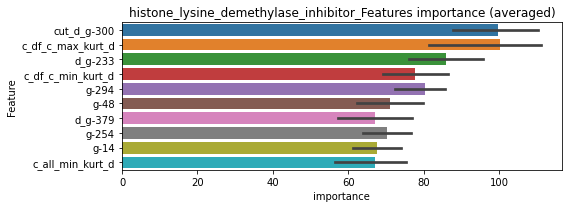

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012977	valid_1's binary_logloss: 0.0195816
[200]	training's binary_logloss: 0.00157171	valid_1's binary_logloss: 0.00641054
[300]	training's binary_logloss: 0.000442078	valid_1's binary_logloss: 0.00493417
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00028499	valid_1's binary_logloss: 0.00478006


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135335	valid_1's binary_logloss: 0.0205876
[200]	training's binary_logloss: 0.00168605	valid_1's binary_logloss: 0.00557952
[300]	training's binary_logloss: 0.000477598	valid_1's binary_logloss: 0.00357465
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000313398	valid_1's binary_logloss: 0.00328185


histone_lysine_demethylase_inhibitor logloss: 0.00403095273111976


neg labels: 3289 → selected neg labels: 3283


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3283, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285167	valid_1's binary_logloss: 0.0513277
[200]	training's binary_logloss: 0.00406024	valid_1's binary_logloss: 0.0182255
[300]	training's binary_logloss: 0.0012087	valid_1's binary_logloss: 0.0118648
[400]	training's binary_logloss: 0.000604487	valid_1's binary_logloss: 0.010035
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000516201	valid_1's binary_logloss: 0.00957892
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295376	valid_1's binary_logloss: 0.0486747
[200]	training's binary_logloss: 0.00420917	valid_1's binary_logloss: 0.0168528
[300]	training's binary_logloss: 0.00123733	valid_1's binary_logloss: 0.0111486
[400]	training's binary_logloss: 0.000620634	valid_1's binary_logloss: 0.00970856
[500]	training's binary_logloss: 0.00043231	valid_1's binary_logloss: 0.00904049
Early stopping, best iteration is:
[504]	

1 / 3 AUC score:1.000
y_Threshold: 0.0024816, Threshold: 0.0035008, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00134
Num_p_label: 80.0, conf_0:0.00315, conf_1:0.00385
Num_p_label: 80.0, Expected: 5.4, Adj_threshold_1: 0.0035008
Num_p_label: 6.0, Expected: 5.4, Adj_threshold_2: 0.0135008
threshold: 0.0135008, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291032	valid_1's binary_logloss: 0.0520732
[200]	training's binary_logloss: 0.00396917	valid_1's binary_logloss: 0.0203229
[300]	training's binary_logloss: 0.00117474	valid_1's binary_logloss: 0.0140829
[400]	training's binary_logloss: 0.000588187	valid_1's binary_logloss: 0.0122315
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000525524	valid_1's binary_logloss: 0.0119677
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290011	valid_1's binary_logloss: 0.0483209
[200]	training's binary_logloss: 0.00409972	valid_1's binary_logloss: 0.0174277
[300]	training's binary_logloss: 0.00120423	valid_1's binary_logloss: 0.0118637
[400]	training's binary_logloss: 0.000610661	valid_1's binary_logloss: 0.0107169
[500]	training's binary_logloss: 0.000431883	valid_1's binary_logloss: 0.0100496
Early stopping, best iteration is:
[528]	

2 / 3 AUC score:1.000
y_Threshold: 0.0168519, Threshold: 0.0135008, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0060271 Vs.target_rate: 0.00134
Num_p_label: 24.0, conf_0:0.01215, conf_1:0.01485
Num_p_label: 24.0, Expected: 5.4, Adj_threshold_1: 0.0135008
Num_p_label: 9.0, Expected: 5.4, Adj_threshold_2: 0.0235008
threshold: 0.0235008, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294713	valid_1's binary_logloss: 0.043099
[200]	training's binary_logloss: 0.0042008	valid_1's binary_logloss: 0.0105205
[300]	training's binary_logloss: 0.00122416	valid_1's binary_logloss: 0.00539866
[400]	training's binary_logloss: 0.000614324	valid_1's binary_logloss: 0.0041056
[500]	training's binary_logloss: 0.000432369	valid_1's binary_logloss: 0.00359328
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000400201	valid_1's binary_logloss: 0.00349605
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290601	valid_1's binary_logloss: 0.0479238
[200]	training's binary_logloss: 0.00400055	valid_1's binary_logloss: 0.0148939
[300]	training's binary_logloss: 0.00117463	valid_1's binary_logloss: 0.00873623
[400]	training's binary_logloss: 0.000605231	valid_1's binary_logloss: 0.00708157
[500]	training's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.0259799, Threshold: 0.0235008, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, conf_0:0.02115, conf_1:0.02585
threshold: 0.0235008, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 667.0/7787, y_label_rate: 0.0856556


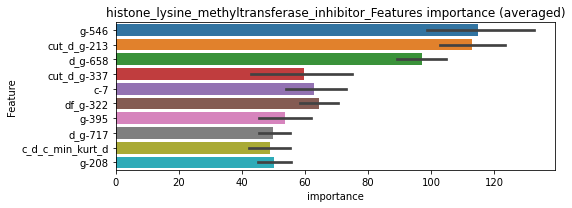

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151488	valid_1's binary_logloss: 0.0304408
[200]	training's binary_logloss: 0.0021214	valid_1's binary_logloss: 0.0169363
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000751098	valid_1's binary_logloss: 0.015739


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163053	valid_1's binary_logloss: 0.0290501
[200]	training's binary_logloss: 0.00241129	valid_1's binary_logloss: 0.0123183
[300]	training's binary_logloss: 0.000701016	valid_1's binary_logloss: 0.00969855
[400]	training's binary_logloss: 0.000344036	valid_1's binary_logloss: 0.00899387
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000240873	valid_1's binary_logloss: 0.00862237


histone_lysine_methyltransferase_inhibitor logloss: 0.012181144711181317


neg labels: 3289 → selected neg labels: 3278


hiv_inhibitor, len(trt): 72, len(othr): 3278, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0542272	valid_1's binary_logloss: 0.101283
[200]	training's binary_logloss: 0.011554	valid_1's binary_logloss: 0.0511051
[300]	training's binary_logloss: 0.00359237	valid_1's binary_logloss: 0.0387939
[400]	training's binary_logloss: 0.00164219	valid_1's binary_logloss: 0.0345898
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.0012618	valid_1's binary_logloss: 0.0336262
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.050614	valid_1's binary_logloss: 0.102382
[200]	training's binary_logloss: 0.0109234	valid_1's binary_logloss: 0.0605845
[300]	training's binary_logloss: 0.00337346	valid_1's binary_logloss: 0.0510528
[400]	training's binary_logloss: 0.00157514	valid_1's binary_logloss: 0.0485327
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00113587	valid_1's binary_logloss: 0.0474582


1 / 3 AUC score:0.999
y_Threshold: 0.0090046, Threshold: 0.0127920, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.01151, conf_1:0.01407
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0127920
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_2: 0.0227920
threshold: 0.0227920, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0513818	valid_1's binary_logloss: 0.0920988
[200]	training's binary_logloss: 0.010913	valid_1's binary_logloss: 0.043631
[300]	training's binary_logloss: 0.00334202	valid_1's binary_logloss: 0.0323461
[400]	training's binary_logloss: 0.00154728	valid_1's binary_logloss: 0.0290256
[500]	training's binary_logloss: 0.000943186	valid_1's binary_logloss: 0.0275725
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000820897	valid_1's binary_logloss: 0.0271538
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0534045	valid_1's binary_logloss: 0.0959179
[200]	training's binary_logloss: 0.0113574	valid_1's binary_logloss: 0.0471224
[300]	training's binary_logloss: 0.00350768	valid_1's binary_logloss: 0.0337173
[400]	training's binary_logloss: 0.00161564	valid_1's binary_logloss: 0.0288616
[500]	training's binary_logloss: 0.000982565	va

2 / 3 AUC score:1.000
y_Threshold: 0.0283960, Threshold: 0.0227920, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0095429 Vs.target_rate: 0.00302
Num_p_label: 38.0, conf_0:0.02051, conf_1:0.02507
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_1: 0.0227920
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.0327920
threshold: 0.0327920, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 642.0/3775, y_label_rate: 0.1700662
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0451072	valid_1's binary_logloss: 0.101077
[200]	training's binary_logloss: 0.00885377	valid_1's binary_logloss: 0.0554485
[300]	training's binary_logloss: 0.00274495	valid_1's binary_logloss: 0.042796
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00141161	valid_1's binary_logloss: 0.0386897
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0521668	valid_1's binary_logloss: 0.0904636
[200]	training's binary_logloss: 0.0105645	valid_1's binary_logloss: 0.0403939
[300]	training's binary_logloss: 0.00324724	valid_1's binary_logloss: 0.0288876
[400]	training's binary_logloss: 0.00150228	valid_1's binary_logloss: 0.025273
[500]	training's binary_logloss: 0.000931678	valid_1's binary_logloss: 0.0240149
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000742567	valid_1's binary_logloss: 0.0230701


3 / 3 AUC score:1.000
y_Threshold: 0.0287147, Threshold: 0.0327920, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 638.0/3767
p_label_rate: 0.0060271 Vs.target_rate: 0.00302
Num_p_label: 24.0, conf_0:0.02951, conf_1:0.03607
threshold: 0.0327920, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 662.0/7749, y_label_rate: 0.0854304


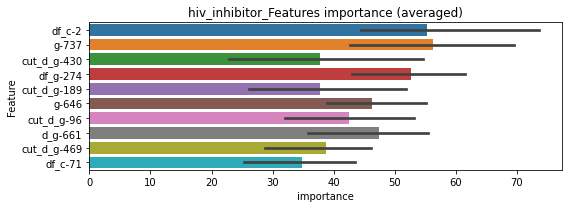

len(train_index) : 3874
len(valid_index) : 3875
================================= fold 1/2 hiv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274521	valid_1's binary_logloss: 0.0601328
[200]	training's binary_logloss: 0.00561854	valid_1's binary_logloss: 0.0371766
[300]	training's binary_logloss: 0.00168538	valid_1's binary_logloss: 0.0328808
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000884866	valid_1's binary_logloss: 0.0317819


len(train_index) : 3875
len(valid_index) : 3874
================================= fold 2/2 hiv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297277	valid_1's binary_logloss: 0.0593315
[200]	training's binary_logloss: 0.00597126	valid_1's binary_logloss: 0.0308633
[300]	training's binary_logloss: 0.00182572	valid_1's binary_logloss: 0.0239802
[400]	training's binary_logloss: 0.000838077	valid_1's binary_logloss: 0.0218699
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000598102	valid_1's binary_logloss: 0.0210613


hiv_inhibitor logloss: 0.026422262404438804


neg labels: 3289 → selected neg labels: 3282


hmgcr_inhibitor, len(trt): 283, len(othr): 3282, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0443024	valid_1's binary_logloss: 0.0845345
[200]	training's binary_logloss: 0.0088098	valid_1's binary_logloss: 0.0511855
[300]	training's binary_logloss: 0.00276379	valid_1's binary_logloss: 0.0436507
[400]	training's binary_logloss: 0.00130466	valid_1's binary_logloss: 0.0407304
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000960985	valid_1's binary_logloss: 0.0400108
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.040441	valid_1's binary_logloss: 0.110443
[200]	training's binary_logloss: 0.00754573	valid_1's binary_logloss: 0.0881729
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00413121	valid_1's binary_logloss: 0.0864998


1 / 3 AUC score:0.994
y_Threshold: 0.0267132, Threshold: 0.1562239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 162 → Positive_corect_labels: 641/3776
p_label_rate: 0.0200904 Vs.target_rate: 0.01188
Num_p_label: 80.0, conf_0:0.14060, conf_1:0.17185
threshold: 0.1562239, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 641.0/3776, y_label_rate: 0.1697564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347546	valid_1's binary_logloss: 0.0784468
[200]	training's binary_logloss: 0.00580216	valid_1's binary_logloss: 0.0527042
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00272431	valid_1's binary_logloss: 0.0502115
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.03712	valid_1's binary_logloss: 0.0653556
[200]	training's binary_logloss: 0.00632486	valid_1's binary_logloss: 0.0328761
[300]	training's binary_logloss: 0.00184455	valid_1's binary_logloss: 0.0270705
[400]	training's binary_logloss: 0.000870798	valid_1's binary_logloss: 0.0250722
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000730788	valid_1's binary_logloss: 0.0248707


2 / 3 AUC score:0.995
y_Threshold: 0.1308962, Threshold: 0.1562239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 623.0/3740
p_label_rate: 0.0394274 Vs.target_rate: 0.01188
Num_p_label: 157.0, conf_0:0.14060, conf_1:0.17185
Num_p_label: 157.0, Expected: 47.3, Adj_threshold_1: 0.1562239
Num_p_label: 155.0, Expected: 47.3, Adj_threshold_2: 0.1662239
Num_p_label: 153.0, Expected: 47.3, Adj_threshold_3: 0.1762239
Num_p_label: 151.0, Expected: 47.3, Adj_threshold_4: 0.1862239
Num_p_label: 147.0, Expected: 47.3, Adj_threshold_5: 0.1962239
Num_p_label: 144.0, Expected: 47.3, Adj_threshold_6: 0.2062239
Num_p_label: 144.0, Expected: 47.3, Adj_threshold_7: 0.2162239
Num_p_label: 142.0, Expected: 47.3, Adj_threshold_8: 0.2262239
Num_p_label: 138.0, Expected: 47.3, Adj_threshold_9: 0.2362239
Num_p_label: 136.0, Expected: 47.3, Adj_threshold_10: 0.2462239
threshold: 0.2562239, positive_p_label: 133.0/3982, p_label_rate: 0.0334003
positive_y_label: 623.0/3740, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316227	valid_1's binary_logloss: 0.054921
[200]	training's binary_logloss: 0.00494322	valid_1's binary_logloss: 0.0216709
[300]	training's binary_logloss: 0.00141229	valid_1's binary_logloss: 0.014021
[400]	training's binary_logloss: 0.000678413	valid_1's binary_logloss: 0.0114261
[500]	training's binary_logloss: 0.000465882	valid_1's binary_logloss: 0.0104077
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000416677	valid_1's binary_logloss: 0.010025
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316898	valid_1's binary_logloss: 0.0611688
[200]	training's binary_logloss: 0.00505615	valid_1's binary_logloss: 0.0308815
[300]	training's binary_logloss: 0.00146921	valid_1's binary_logloss: 0.0264961
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000928434	valid_1's binary_logloss: 0.0256532


3 / 3 AUC score:0.999
y_Threshold: 0.1748703, Threshold: 0.2562239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 616.0/3726
p_label_rate: 0.0369161 Vs.target_rate: 0.01188
Num_p_label: 147.0, conf_0:0.23060, conf_1:0.28185
Num_p_label: 147.0, Expected: 47.3, Adj_threshold_1: 0.2562239
Num_p_label: 145.0, Expected: 47.3, Adj_threshold_2: 0.2662239
Num_p_label: 143.0, Expected: 47.3, Adj_threshold_3: 0.2762239
Num_p_label: 143.0, Expected: 47.3, Adj_threshold_4: 0.2862239
Num_p_label: 140.0, Expected: 47.3, Adj_threshold_5: 0.2962239
Num_p_label: 140.0, Expected: 47.3, Adj_threshold_6: 0.3062239
Num_p_label: 140.0, Expected: 47.3, Adj_threshold_7: 0.3162239
Num_p_label: 139.0, Expected: 47.3, Adj_threshold_8: 0.3262239
Num_p_label: 137.0, Expected: 47.3, Adj_threshold_9: 0.3362239
Num_p_label: 137.0, Expected: 47.3, Adj_threshold_10: 0.3462239
threshold: 0.3562239, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 751.0/7708, y_label_ra

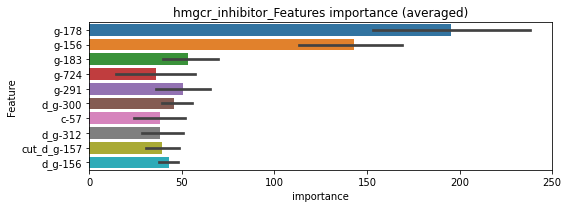

len(train_index) : 3854
len(valid_index) : 3854
================================= fold 1/2 hmgcr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196678	valid_1's binary_logloss: 0.0433839
[200]	training's binary_logloss: 0.00314269	valid_1's binary_logloss: 0.0248337
[300]	training's binary_logloss: 0.000895895	valid_1's binary_logloss: 0.0205999
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000562626	valid_1's binary_logloss: 0.0200578


len(train_index) : 3854
len(valid_index) : 3854
================================= fold 2/2 hmgcr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02087	valid_1's binary_logloss: 0.0425682
[200]	training's binary_logloss: 0.00358542	valid_1's binary_logloss: 0.0229915
[300]	training's binary_logloss: 0.00107913	valid_1's binary_logloss: 0.0183639
[400]	training's binary_logloss: 0.000516498	valid_1's binary_logloss: 0.0168999
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00053688	valid_1's binary_logloss: 0.016879


hmgcr_inhibitor logloss: 0.018468408282685107


neg labels: 3289 → selected neg labels: 3275


hsp_inhibitor, len(trt): 93, len(othr): 3275, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0287388	valid_1's binary_logloss: 0.0476357
[200]	training's binary_logloss: 0.00397282	valid_1's binary_logloss: 0.0156195
[300]	training's binary_logloss: 0.00117298	valid_1's binary_logloss: 0.00901213
[400]	training's binary_logloss: 0.000587379	valid_1's binary_logloss: 0.0073096
[500]	training's binary_logloss: 0.000430697	valid_1's binary_logloss: 0.00675867
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000434699	valid_1's binary_logloss: 0.00675414
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276199	valid_1's binary_logloss: 0.0536159
[200]	training's binary_logloss: 0.00383166	valid_1's binary_logloss: 0.0285272
[300]	training's binary_logloss: 0.00111093	valid_1's binary_logloss: 0.0246897
[400]	training's binary_logloss: 0.00056226	valid_1's binary_logloss: 0.023593
Early stopping, best iteration is:
[395]

1 / 3 AUC score:1.000
y_Threshold: 0.0022438, Threshold: 0.0071473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 133 → Positive_corect_labels: 654/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00391
Num_p_label: 80.0, conf_0:0.00643, conf_1:0.00786
Num_p_label: 80.0, Expected: 15.6, Adj_threshold_1: 0.0071473
Num_p_label: 43.0, Expected: 15.6, Adj_threshold_2: 0.0171473
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_3: 0.0271473
threshold: 0.0271473, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0284218	valid_1's binary_logloss: 0.041543
[200]	training's binary_logloss: 0.00382818	valid_1's binary_logloss: 0.0123866
[300]	training's binary_logloss: 0.0011208	valid_1's binary_logloss: 0.00739581
[400]	training's binary_logloss: 0.000565261	valid_1's binary_logloss: 0.005609
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000438721	valid_1's binary_logloss: 0.00516778
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279073	valid_1's binary_logloss: 0.0564427
[200]	training's binary_logloss: 0.00376152	valid_1's binary_logloss: 0.0290977
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00213588	valid_1's binary_logloss: 0.0266602


2 / 3 AUC score:1.000
y_Threshold: 0.0309076, Threshold: 0.0271473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0263687 Vs.target_rate: 0.00391
Num_p_label: 105.0, conf_0:0.02443, conf_1:0.02986
Num_p_label: 105.0, Expected: 15.6, Adj_threshold_1: 0.0271473
Num_p_label: 85.0, Expected: 15.6, Adj_threshold_2: 0.0371473
Num_p_label: 72.0, Expected: 15.6, Adj_threshold_3: 0.0471473
Num_p_label: 60.0, Expected: 15.6, Adj_threshold_4: 0.0571473
Num_p_label: 50.0, Expected: 15.6, Adj_threshold_5: 0.0671473
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_6: 0.0771473
Num_p_label: 45.0, Expected: 15.6, Adj_threshold_7: 0.0871473
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_8: 0.0971473
Num_p_label: 43.0, Expected: 15.6, Adj_threshold_9: 0.1071473
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_10: 0.1171473
threshold: 0.1271473, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 652.0/3793, y_label_rate: 0.17189

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283477	valid_1's binary_logloss: 0.0456344
[200]	training's binary_logloss: 0.00383322	valid_1's binary_logloss: 0.0204687
[300]	training's binary_logloss: 0.00111115	valid_1's binary_logloss: 0.0173119
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.00113305	valid_1's binary_logloss: 0.0172743
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273768	valid_1's binary_logloss: 0.0631281
[200]	training's binary_logloss: 0.00351066	valid_1's binary_logloss: 0.0374568
[300]	training's binary_logloss: 0.00100694	valid_1's binary_logloss: 0.0332013
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.000740924	valid_1's binary_logloss: 0.0322624


3 / 3 AUC score:0.999
y_Threshold: 0.0177585, Threshold: 0.1271473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0092918 Vs.target_rate: 0.00391
Num_p_label: 37.0, conf_0:0.11443, conf_1:0.13986
threshold: 0.1271473, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 682.0/7761, y_label_rate: 0.0878753


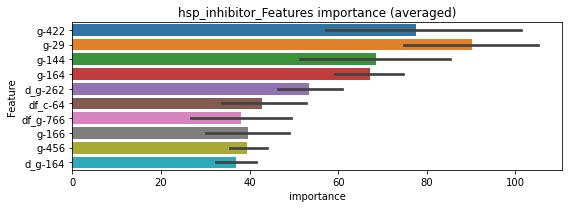

len(train_index) : 3880
len(valid_index) : 3881
================================= fold 1/2 hsp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151158	valid_1's binary_logloss: 0.0278516
[200]	training's binary_logloss: 0.00210644	valid_1's binary_logloss: 0.0145081
[300]	training's binary_logloss: 0.000626062	valid_1's binary_logloss: 0.0125845
[400]	training's binary_logloss: 0.000319944	valid_1's binary_logloss: 0.0120831
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000309281	valid_1's binary_logloss: 0.0120326


len(train_index) : 3881
len(valid_index) : 3880
================================= fold 2/2 hsp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156506	valid_1's binary_logloss: 0.0389573
[200]	training's binary_logloss: 0.00220205	valid_1's binary_logloss: 0.0264405
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0013302	valid_1's binary_logloss: 0.0254788


hsp_inhibitor logloss: 0.0187548382737978


neg labels: 3289 → selected neg labels: 3282


igf-1_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325417	valid_1's binary_logloss: 0.0564886
[200]	training's binary_logloss: 0.00485662	valid_1's binary_logloss: 0.0199954
[300]	training's binary_logloss: 0.00143757	valid_1's binary_logloss: 0.0127005
[400]	training's binary_logloss: 0.000722061	valid_1's binary_logloss: 0.0103871
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000535533	valid_1's binary_logloss: 0.00949604
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323601	valid_1's binary_logloss: 0.0522153
[200]	training's binary_logloss: 0.00488175	valid_1's binary_logloss: 0.0148454
[300]	training's binary_logloss: 0.00143972	valid_1's binary_logloss: 0.00795485
[400]	training's binary_logloss: 0.000722115	valid_1's binary_logloss: 0.00591269
[500]	training's binary_logloss: 0.000498207	valid_1's binary_logloss: 0.00514718
Early stopping, best iteration is:
[5

1 / 3 AUC score:1.000
y_Threshold: 0.0046035, Threshold: 0.0078821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00709, conf_1:0.00867
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0078821
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_2: 0.0178821
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_3: 0.0278821
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.0378821
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.0478821
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_6: 0.0578821
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_7: 0.0678821
threshold: 0.0678821, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0308911	valid_1's binary_logloss: 0.0509948
[200]	training's binary_logloss: 0.00452551	valid_1's binary_logloss: 0.0167949
[300]	training's binary_logloss: 0.00133693	valid_1's binary_logloss: 0.00996977
[400]	training's binary_logloss: 0.000678554	valid_1's binary_logloss: 0.00779457
[500]	training's binary_logloss: 0.000472543	valid_1's binary_logloss: 0.00679894
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00044196	valid_1's binary_logloss: 0.00671771
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.03128	valid_1's binary_logloss: 0.049758
[200]	training's binary_logloss: 0.0045934	valid_1's binary_logloss: 0.0128013
[300]	training's binary_logloss: 0.00136005	valid_1's binary_logloss: 0.00691176
[400]	training's binary_logloss: 0.000688374	valid_1's binary_logloss: 0.00527781
[500]	training's binary_logloss: 0.00048

2 / 3 AUC score:1.000
y_Threshold: 0.0907581, Threshold: 0.0678821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0155701 Vs.target_rate: 0.00155
Num_p_label: 62.0, conf_0:0.06109, conf_1:0.07467
Num_p_label: 62.0, Expected: 6.2, Adj_threshold_1: 0.0678821
Num_p_label: 56.0, Expected: 6.2, Adj_threshold_2: 0.0778821
Num_p_label: 51.0, Expected: 6.2, Adj_threshold_3: 0.0878821
Num_p_label: 47.0, Expected: 6.2, Adj_threshold_4: 0.0978821
Num_p_label: 44.0, Expected: 6.2, Adj_threshold_5: 0.1078821
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_6: 0.1178821
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_7: 0.1278821
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_8: 0.1378821
Num_p_label: 37.0, Expected: 6.2, Adj_threshold_9: 0.1478821
Num_p_label: 36.0, Expected: 6.2, Adj_threshold_10: 0.1578821
threshold: 0.1678821, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0309069	valid_1's binary_logloss: 0.0469194
[200]	training's binary_logloss: 0.00444848	valid_1's binary_logloss: 0.0115437
[300]	training's binary_logloss: 0.00131646	valid_1's binary_logloss: 0.0055625
[400]	training's binary_logloss: 0.000671341	valid_1's binary_logloss: 0.0040079
[500]	training's binary_logloss: 0.000469933	valid_1's binary_logloss: 0.00338392
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000441679	valid_1's binary_logloss: 0.00330435
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316212	valid_1's binary_logloss: 0.0464377
[200]	training's binary_logloss: 0.00462981	valid_1's binary_logloss: 0.0114479
[300]	training's binary_logloss: 0.00135811	valid_1's binary_logloss: 0.00524625
[400]	training's binary_logloss: 0.000685578	valid_1's binary_logloss: 0.00360929
[500]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.1653411, Threshold: 0.1678821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0095429 Vs.target_rate: 0.00155
Num_p_label: 38.0, conf_0:0.15109, conf_1:0.18467
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_1: 0.1678821
Num_p_label: 36.0, Expected: 6.2, Adj_threshold_2: 0.1778821
Num_p_label: 36.0, Expected: 6.2, Adj_threshold_3: 0.1878821
Num_p_label: 35.0, Expected: 6.2, Adj_threshold_4: 0.1978821
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_5: 0.2078821
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_6: 0.2178821
Num_p_label: 28.0, Expected: 6.2, Adj_threshold_7: 0.2278821
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_8: 0.2378821
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_9: 0.2478821
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_10: 0.2578821
threshold: 0.2678821, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 676.0/7784, y_label_rate: 0.0868448


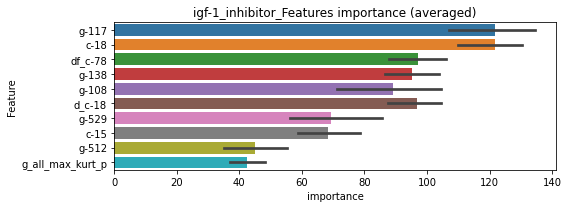

len(train_index) : 3892
len(valid_index) : 3892
================================= fold 1/2 igf-1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175165	valid_1's binary_logloss: 0.0324208
[200]	training's binary_logloss: 0.00260629	valid_1's binary_logloss: 0.0132283
[300]	training's binary_logloss: 0.000760657	valid_1's binary_logloss: 0.0101145
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000570857	valid_1's binary_logloss: 0.00971048


len(train_index) : 3892
len(valid_index) : 3892
================================= fold 2/2 igf-1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184057	valid_1's binary_logloss: 0.0305938
[200]	training's binary_logloss: 0.00279215	valid_1's binary_logloss: 0.0115078
[300]	training's binary_logloss: 0.000816962	valid_1's binary_logloss: 0.00877197
[400]	training's binary_logloss: 0.000401378	valid_1's binary_logloss: 0.00790379
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000279961	valid_1's binary_logloss: 0.00762804


igf-1_inhibitor logloss: 0.008669261395532308


neg labels: 3289 → selected neg labels: 3284


ikk_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274378	valid_1's binary_logloss: 0.0414566
[200]	training's binary_logloss: 0.00368114	valid_1's binary_logloss: 0.011275
[300]	training's binary_logloss: 0.00106451	valid_1's binary_logloss: 0.00610974
[400]	training's binary_logloss: 0.000552483	valid_1's binary_logloss: 0.00469836
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000423987	valid_1's binary_logloss: 0.00428906
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289335	valid_1's binary_logloss: 0.0510458
[200]	training's binary_logloss: 0.00391611	valid_1's binary_logloss: 0.0161042
[300]	training's binary_logloss: 0.00112842	valid_1's binary_logloss: 0.00819199
[400]	training's binary_logloss: 0.000573538	valid_1's binary_logloss: 0.00603581
[500]	training's binary_logloss: 0.000435082	valid_1's binary_logloss: 0.00547716
Early stopping, best iteration is:
[

1 / 3 AUC score:1.000
y_Threshold: 0.0021856, Threshold: 0.1411333, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.12702, conf_1:0.15525
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.1411333
Num_p_label: 76.0, Expected: 5.0, Adj_threshold_2: 0.1511333
Num_p_label: 73.0, Expected: 5.0, Adj_threshold_3: 0.1611333
Num_p_label: 70.0, Expected: 5.0, Adj_threshold_4: 0.1711333
Num_p_label: 68.0, Expected: 5.0, Adj_threshold_5: 0.1811333
Num_p_label: 67.0, Expected: 5.0, Adj_threshold_6: 0.1911333
Num_p_label: 67.0, Expected: 5.0, Adj_threshold_7: 0.2011333
Num_p_label: 65.0, Expected: 5.0, Adj_threshold_8: 0.2111333
Num_p_label: 64.0, Expected: 5.0, Adj_threshold_9: 0.2211333
Num_p_label: 62.0, Expected: 5.0, Adj_threshold_10: 0.2311333
threshold: 0.2411333, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269367	valid_1's binary_logloss: 0.0396067
[200]	training's binary_logloss: 0.00351171	valid_1's binary_logloss: 0.0106978
[300]	training's binary_logloss: 0.00100982	valid_1's binary_logloss: 0.00595838
[400]	training's binary_logloss: 0.00052591	valid_1's binary_logloss: 0.00471084
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000409102	valid_1's binary_logloss: 0.00437671
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0278797	valid_1's binary_logloss: 0.0458061
[200]	training's binary_logloss: 0.00364419	valid_1's binary_logloss: 0.0129399
[300]	training's binary_logloss: 0.00104473	valid_1's binary_logloss: 0.00651606
[400]	training's binary_logloss: 0.000536595	valid_1's binary_logloss: 0.00483404
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000460568	valid_1's binary_logloss: 0.00453802


2 / 3 AUC score:1.000
y_Threshold: 0.1595388, Threshold: 0.2411333, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0293822 Vs.target_rate: 0.00126
Num_p_label: 117.0, conf_0:0.21702, conf_1:0.26525
Num_p_label: 117.0, Expected: 5.0, Adj_threshold_1: 0.2411333
Num_p_label: 116.0, Expected: 5.0, Adj_threshold_2: 0.2511333
Num_p_label: 114.0, Expected: 5.0, Adj_threshold_3: 0.2611333
Num_p_label: 112.0, Expected: 5.0, Adj_threshold_4: 0.2711333
Num_p_label: 112.0, Expected: 5.0, Adj_threshold_5: 0.2811333
Num_p_label: 111.0, Expected: 5.0, Adj_threshold_6: 0.2911333
Num_p_label: 111.0, Expected: 5.0, Adj_threshold_7: 0.3011333
Num_p_label: 110.0, Expected: 5.0, Adj_threshold_8: 0.3111333
Num_p_label: 110.0, Expected: 5.0, Adj_threshold_9: 0.3211333
Num_p_label: 110.0, Expected: 5.0, Adj_threshold_10: 0.3311333
threshold: 0.3411333, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 654.0/3804, y_label_rate: 0.17192

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.026879	valid_1's binary_logloss: 0.0399007
[200]	training's binary_logloss: 0.00347164	valid_1's binary_logloss: 0.0121665
[300]	training's binary_logloss: 0.00100827	valid_1's binary_logloss: 0.00759739
[400]	training's binary_logloss: 0.000527295	valid_1's binary_logloss: 0.0063677
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000452598	valid_1's binary_logloss: 0.00606314
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277389	valid_1's binary_logloss: 0.0401856
[200]	training's binary_logloss: 0.00371896	valid_1's binary_logloss: 0.0087187
[300]	training's binary_logloss: 0.00106721	valid_1's binary_logloss: 0.00351891
[400]	training's binary_logloss: 0.000546596	valid_1's binary_logloss: 0.00217055
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000415624	valid_1's binary_logloss: 0.00178472


3 / 3 AUC score:1.000
y_Threshold: 0.0978397, Threshold: 0.3411333, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0288800 Vs.target_rate: 0.00126
Num_p_label: 115.0, conf_0:0.30702, conf_1:0.37525
Num_p_label: 115.0, Expected: 5.0, Adj_threshold_1: 0.3411333
Num_p_label: 115.0, Expected: 5.0, Adj_threshold_2: 0.3511333
Num_p_label: 115.0, Expected: 5.0, Adj_threshold_3: 0.3611333
Num_p_label: 115.0, Expected: 5.0, Adj_threshold_4: 0.3711333
Num_p_label: 114.0, Expected: 5.0, Adj_threshold_5: 0.3811333
Num_p_label: 113.0, Expected: 5.0, Adj_threshold_6: 0.3911333
Num_p_label: 113.0, Expected: 5.0, Adj_threshold_7: 0.4011333
Num_p_label: 110.0, Expected: 5.0, Adj_threshold_8: 0.4111333
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_9: 0.4211333
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_10: 0.4311333
threshold: 0.4411333, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 763.0/7786, y_label_rate: 0.09799

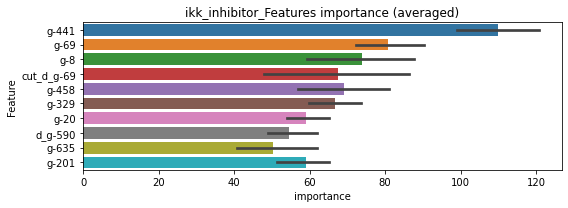

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 ikk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0170154	valid_1's binary_logloss: 0.025754
[200]	training's binary_logloss: 0.00241703	valid_1's binary_logloss: 0.00736073
[300]	training's binary_logloss: 0.00067843	valid_1's binary_logloss: 0.0039699
[400]	training's binary_logloss: 0.000343844	valid_1's binary_logloss: 0.00306767
[500]	training's binary_logloss: 0.000251715	valid_1's binary_logloss: 0.00281768
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000247765	valid_1's binary_logloss: 0.00279869


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 ikk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161464	valid_1's binary_logloss: 0.0239335
[200]	training's binary_logloss: 0.00214265	valid_1's binary_logloss: 0.00716513
[300]	training's binary_logloss: 0.000605611	valid_1's binary_logloss: 0.00422607
[400]	training's binary_logloss: 0.000308295	valid_1's binary_logloss: 0.00347547
[500]	training's binary_logloss: 0.000234232	valid_1's binary_logloss: 0.00328603
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000234857	valid_1's binary_logloss: 0.00328456


ikk_inhibitor logloss: 0.0030437596931535754


neg labels: 3289 → selected neg labels: 3284


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324275	valid_1's binary_logloss: 0.0498321
[200]	training's binary_logloss: 0.00489224	valid_1's binary_logloss: 0.0161269
[300]	training's binary_logloss: 0.00141043	valid_1's binary_logloss: 0.00988851
[400]	training's binary_logloss: 0.000707384	valid_1's binary_logloss: 0.00797387
[500]	training's binary_logloss: 0.000482792	valid_1's binary_logloss: 0.00718513
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000442107	valid_1's binary_logloss: 0.00704542
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317916	valid_1's binary_logloss: 0.0475783
[200]	training's binary_logloss: 0.00490405	valid_1's binary_logloss: 0.0153788
[300]	training's binary_logloss: 0.00142914	valid_1's binary_logloss: 0.0100232
[400]	training's binary_logloss: 0.000710853	valid_1's binary_logloss: 0.00881094
Early stopping, best iteration is:
[

1 / 3 AUC score:1.000
y_Threshold: 0.0023027, Threshold: 0.0041119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00370, conf_1:0.00452
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0041119
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_2: 0.0141119
threshold: 0.0141119, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0328534	valid_1's binary_logloss: 0.0502965
[200]	training's binary_logloss: 0.00486022	valid_1's binary_logloss: 0.01658
[300]	training's binary_logloss: 0.00140711	valid_1's binary_logloss: 0.0103763
[400]	training's binary_logloss: 0.000696655	valid_1's binary_logloss: 0.00821601
[500]	training's binary_logloss: 0.000484217	valid_1's binary_logloss: 0.0074063
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000454428	valid_1's binary_logloss: 0.00724795
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323277	valid_1's binary_logloss: 0.0473537
[200]	training's binary_logloss: 0.00484582	valid_1's binary_logloss: 0.0155549
[300]	training's binary_logloss: 0.00139439	valid_1's binary_logloss: 0.0100695
[400]	training's binary_logloss: 0.000697846	valid_1's binary_logloss: 0.0089902
Early stopping, best iteration is:
[417]	

2 / 3 AUC score:1.000
y_Threshold: 0.0121020, Threshold: 0.0141119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00130
Num_p_label: 24.0, conf_0:0.01270, conf_1:0.01552
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_1: 0.0141119
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_2: 0.0241119
threshold: 0.0241119, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317767	valid_1's binary_logloss: 0.0506721
[200]	training's binary_logloss: 0.00471061	valid_1's binary_logloss: 0.0149591
[300]	training's binary_logloss: 0.00136566	valid_1's binary_logloss: 0.00851973
[400]	training's binary_logloss: 0.000682184	valid_1's binary_logloss: 0.00648499
[500]	training's binary_logloss: 0.00047394	valid_1's binary_logloss: 0.00588871
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00046382	valid_1's binary_logloss: 0.00587097
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322973	valid_1's binary_logloss: 0.045992
[200]	training's binary_logloss: 0.00470843	valid_1's binary_logloss: 0.0155881
[300]	training's binary_logloss: 0.0013772	valid_1's binary_logloss: 0.0101795
[400]	training's binary_logloss: 0.000691703	valid_1's binary_logloss: 0.00853185
[500]	training's binary_logloss: 0.00047

3 / 3 AUC score:1.000
y_Threshold: 0.0140171, Threshold: 0.0241119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00130
Num_p_label: 6.0, conf_0:0.02170, conf_1:0.02652
threshold: 0.0241119, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 661.0/7788, y_label_rate: 0.0848742


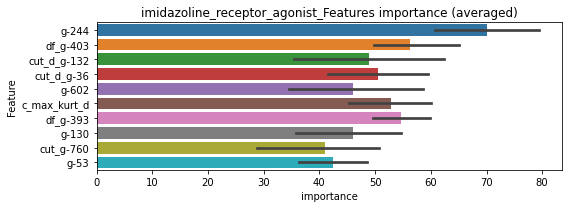

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166784	valid_1's binary_logloss: 0.0302736
[200]	training's binary_logloss: 0.00247194	valid_1's binary_logloss: 0.0142161
[300]	training's binary_logloss: 0.000697	valid_1's binary_logloss: 0.0119352
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00037344	valid_1's binary_logloss: 0.0115928


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.017977	valid_1's binary_logloss: 0.0271745
[200]	training's binary_logloss: 0.00268142	valid_1's binary_logloss: 0.00950382
[300]	training's binary_logloss: 0.000768885	valid_1's binary_logloss: 0.00663848
[400]	training's binary_logloss: 0.000377206	valid_1's binary_logloss: 0.00569675
[500]	training's binary_logloss: 0.000253068	valid_1's binary_logloss: 0.005376
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000251732	valid_1's binary_logloss: 0.00537204


imidazoline_receptor_agonist logloss: 0.008482439134949634


neg labels: 3289 → selected neg labels: 3278


immunosuppressant, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0462187	valid_1's binary_logloss: 0.08922
[200]	training's binary_logloss: 0.00928481	valid_1's binary_logloss: 0.0421039
[300]	training's binary_logloss: 0.00288761	valid_1's binary_logloss: 0.0299648
[400]	training's binary_logloss: 0.00138123	valid_1's binary_logloss: 0.025486
[500]	training's binary_logloss: 0.000875018	valid_1's binary_logloss: 0.0238228
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000770866	valid_1's binary_logloss: 0.0232919
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0459921	valid_1's binary_logloss: 0.0959343
[200]	training's binary_logloss: 0.00933282	valid_1's binary_logloss: 0.0442896
[300]	training's binary_logloss: 0.00296857	valid_1's binary_logloss: 0.0308216
[400]	training's binary_logloss: 0.00142887	valid_1's binary_logloss: 0.027021
Early stopping, best iteration is:
[448]	traini

1 / 3 AUC score:0.999
y_Threshold: 0.0080671, Threshold: 0.0136088, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01225, conf_1:0.01497
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0136088
Num_p_label: 49.0, Expected: 12.2, Adj_threshold_2: 0.0236088
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_3: 0.0336088
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_4: 0.0436088
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.0536088
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_6: 0.0636088
threshold: 0.0636088, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0423118	valid_1's binary_logloss: 0.0916566
[200]	training's binary_logloss: 0.00784051	valid_1's binary_logloss: 0.0444229
[300]	training's binary_logloss: 0.00246484	valid_1's binary_logloss: 0.031271
[400]	training's binary_logloss: 0.0012203	valid_1's binary_logloss: 0.0275252
[500]	training's binary_logloss: 0.000784451	valid_1's binary_logloss: 0.025692
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000666316	valid_1's binary_logloss: 0.024961
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0447339	valid_1's binary_logloss: 0.08465
[200]	training's binary_logloss: 0.00877771	valid_1's binary_logloss: 0.0371304
[300]	training's binary_logloss: 0.00274644	valid_1's binary_logloss: 0.0255368
[400]	training's binary_logloss: 0.0013192	valid_1's binary_logloss: 0.021435
[500]	training's binary_logloss: 0.00084348	valid_1

2 / 3 AUC score:1.000
y_Threshold: 0.0413322, Threshold: 0.0636088, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0110497 Vs.target_rate: 0.00307
Num_p_label: 44.0, conf_0:0.05725, conf_1:0.06997
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_1: 0.0636088
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_2: 0.0736088
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_3: 0.0836088
Num_p_label: 39.0, Expected: 12.2, Adj_threshold_4: 0.0936088
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_5: 0.1036088
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_6: 0.1136088
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_7: 0.1236088
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_8: 0.1336088
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_9: 0.1436088
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_10: 0.1536088
threshold: 0.1636088, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 651.0/3793, y_label_rate: 0.1716320

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0431184	valid_1's binary_logloss: 0.0880737
[200]	training's binary_logloss: 0.00803897	valid_1's binary_logloss: 0.0412843
[300]	training's binary_logloss: 0.00249807	valid_1's binary_logloss: 0.0279786
[400]	training's binary_logloss: 0.00122863	valid_1's binary_logloss: 0.0235347
[500]	training's binary_logloss: 0.00079314	valid_1's binary_logloss: 0.0215565
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000660823	valid_1's binary_logloss: 0.0208565
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0443991	valid_1's binary_logloss: 0.0998951
[200]	training's binary_logloss: 0.0083997	valid_1's binary_logloss: 0.0620898
[300]	training's binary_logloss: 0.00259464	valid_1's binary_logloss: 0.0545413
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00241216	valid_1's binary_logloss: 0.0541217


3 / 3 AUC score:0.998
y_Threshold: 0.0353689, Threshold: 0.1636088, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0072828 Vs.target_rate: 0.00307
Num_p_label: 29.0, conf_0:0.14725, conf_1:0.17997
threshold: 0.1636088, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 668.0/7751, y_label_rate: 0.0861824


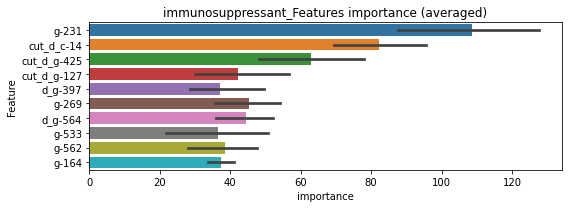

len(train_index) : 3875
len(valid_index) : 3876
================================= fold 1/2 immunosuppressant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221548	valid_1's binary_logloss: 0.0516038
[200]	training's binary_logloss: 0.00403006	valid_1's binary_logloss: 0.0281578
[300]	training's binary_logloss: 0.00126508	valid_1's binary_logloss: 0.022426
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000728662	valid_1's binary_logloss: 0.0213847


len(train_index) : 3876
len(valid_index) : 3875
================================= fold 2/2 immunosuppressant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021441	valid_1's binary_logloss: 0.0524363
[200]	training's binary_logloss: 0.00383481	valid_1's binary_logloss: 0.0312129
[300]	training's binary_logloss: 0.00120783	valid_1's binary_logloss: 0.0271294
[400]	training's binary_logloss: 0.000601729	valid_1's binary_logloss: 0.0253388
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000592772	valid_1's binary_logloss: 0.0253087


immunosuppressant logloss: 0.023346416534252453


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297675	valid_1's binary_logloss: 0.0489372
[200]	training's binary_logloss: 0.00436773	valid_1's binary_logloss: 0.0180284
[300]	training's binary_logloss: 0.00128782	valid_1's binary_logloss: 0.0125776
[400]	training's binary_logloss: 0.000664308	valid_1's binary_logloss: 0.0106837
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000513696	valid_1's binary_logloss: 0.0103701
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315244	valid_1's binary_logloss: 0.0544793
[200]	training's binary_logloss: 0.00465222	valid_1's binary_logloss: 0.0187556
[300]	training's binary_logloss: 0.00137144	valid_1's binary_logloss: 0.0117857
[400]	training's binary_logloss: 0.00068783	valid_1's binary_logloss: 0.00954768
[500]	training's binary_logloss: 0.000474333	valid_1's binary_logloss: 0.00868082
Early stopping, best iteration is:
[520]

1 / 3 AUC score:1.000
y_Threshold: 0.0022866, Threshold: 0.0033859, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00305, conf_1:0.00372
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0033859
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_2: 0.0133859
threshold: 0.0133859, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0301326	valid_1's binary_logloss: 0.0494248
[200]	training's binary_logloss: 0.00435527	valid_1's binary_logloss: 0.0172596
[300]	training's binary_logloss: 0.001285	valid_1's binary_logloss: 0.0118186
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000823563	valid_1's binary_logloss: 0.01054
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0303213	valid_1's binary_logloss: 0.0557831
[200]	training's binary_logloss: 0.00447776	valid_1's binary_logloss: 0.0197651
[300]	training's binary_logloss: 0.0013353	valid_1's binary_logloss: 0.0127665
[400]	training's binary_logloss: 0.000670825	valid_1's binary_logloss: 0.010333
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000504732	valid_1's binary_logloss: 0.00967055


2 / 3 AUC score:1.000
y_Threshold: 0.0119435, Threshold: 0.0133859, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, conf_0:0.01205, conf_1:0.01472
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_1: 0.0133859
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0233859
Num_p_label: 4.0, Expected: 5.0, Adj_threshold_3: 0.0333859
threshold: 0.0333859, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0301326	valid_1's binary_logloss: 0.0494248
[200]	training's binary_logloss: 0.00435527	valid_1's binary_logloss: 0.0172596
[300]	training's binary_logloss: 0.001285	valid_1's binary_logloss: 0.0118186
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000823563	valid_1's binary_logloss: 0.01054
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0303213	valid_1's binary_logloss: 0.0557831
[200]	training's binary_logloss: 0.00447776	valid_1's binary_logloss: 0.0197651
[300]	training's binary_logloss: 0.0013353	valid_1's binary_logloss: 0.0127665
[400]	training's binary_logloss: 0.000670825	valid_1's binary_logloss: 0.010333
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000504732	valid_1's binary_logloss: 0.00967055


3 / 3 AUC score:1.000
y_Threshold: 0.0119435, Threshold: 0.0333859, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00126
Num_p_label: 4.0, conf_0:0.03005, conf_1:0.03672
threshold: 0.0333859, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 660.0/7790, y_label_rate: 0.0847240


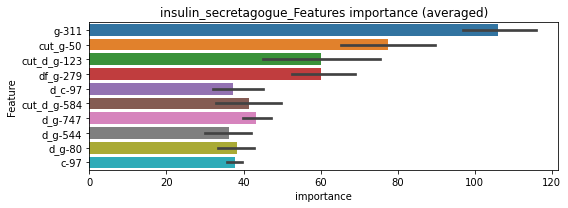

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 insulin_secretagogue=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162952	valid_1's binary_logloss: 0.0293574
[200]	training's binary_logloss: 0.00230026	valid_1's binary_logloss: 0.0111157
[300]	training's binary_logloss: 0.000659646	valid_1's binary_logloss: 0.00766789
[400]	training's binary_logloss: 0.000331946	valid_1's binary_logloss: 0.0067138
[500]	training's binary_logloss: 0.000234342	valid_1's binary_logloss: 0.00636613
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000236389	valid_1's binary_logloss: 0.00635637


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 insulin_secretagogue=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158035	valid_1's binary_logloss: 0.0248156
[200]	training's binary_logloss: 0.00232355	valid_1's binary_logloss: 0.00872426
[300]	training's binary_logloss: 0.000677516	valid_1's binary_logloss: 0.00582157
[400]	training's binary_logloss: 0.000339193	valid_1's binary_logloss: 0.00494532
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000255701	valid_1's binary_logloss: 0.00468774


insulin_secretagogue logloss: 0.005522058461649308


neg labels: 3289 → selected neg labels: 3281


insulin_sensitizer, len(trt): 51, len(othr): 3281, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0365783	valid_1's binary_logloss: 0.0734155
[200]	training's binary_logloss: 0.00607444	valid_1's binary_logloss: 0.035238
[300]	training's binary_logloss: 0.00182471	valid_1's binary_logloss: 0.0280221
[400]	training's binary_logloss: 0.000899309	valid_1's binary_logloss: 0.0261431
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000773005	valid_1's binary_logloss: 0.0258437
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0377134	valid_1's binary_logloss: 0.0626969
[200]	training's binary_logloss: 0.00653952	valid_1's binary_logloss: 0.0246795
[300]	training's binary_logloss: 0.00196899	valid_1's binary_logloss: 0.0171831
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00107314	valid_1's binary_logloss: 0.0160469


1 / 3 AUC score:0.998
y_Threshold: 0.0059354, Threshold: 0.0122036, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00214
Num_p_label: 80.0, conf_0:0.01098, conf_1:0.01342
Num_p_label: 80.0, Expected: 8.5, Adj_threshold_1: 0.0122036
Num_p_label: 34.0, Expected: 8.5, Adj_threshold_2: 0.0222036
Num_p_label: 20.0, Expected: 8.5, Adj_threshold_3: 0.0322036
Num_p_label: 15.0, Expected: 8.5, Adj_threshold_4: 0.0422036
threshold: 0.0422036, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0356569	valid_1's binary_logloss: 0.0615565
[200]	training's binary_logloss: 0.005878	valid_1's binary_logloss: 0.0240033
[300]	training's binary_logloss: 0.00176608	valid_1's binary_logloss: 0.0169961
[400]	training's binary_logloss: 0.000885381	valid_1's binary_logloss: 0.0148201
[500]	training's binary_logloss: 0.000586371	valid_1's binary_logloss: 0.0136987
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00052544	valid_1's binary_logloss: 0.0135408
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0382805	valid_1's binary_logloss: 0.0617408
[200]	training's binary_logloss: 0.00643649	valid_1's binary_logloss: 0.0210776
[300]	training's binary_logloss: 0.00190579	valid_1's binary_logloss: 0.0124972
[400]	training's binary_logloss: 0.000941622	valid_1's binary_logloss: 0.00998908
[500]	training's binary_logloss: 0.00062380

2 / 3 AUC score:1.000
y_Threshold: 0.0233352, Threshold: 0.0422036, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0080362 Vs.target_rate: 0.00214
Num_p_label: 32.0, conf_0:0.03798, conf_1:0.04642
Num_p_label: 32.0, Expected: 8.5, Adj_threshold_1: 0.0422036
Num_p_label: 27.0, Expected: 8.5, Adj_threshold_2: 0.0522036
Num_p_label: 19.0, Expected: 8.5, Adj_threshold_3: 0.0622036
Num_p_label: 18.0, Expected: 8.5, Adj_threshold_4: 0.0722036
Num_p_label: 17.0, Expected: 8.5, Adj_threshold_5: 0.0822036
threshold: 0.0822036, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0359611	valid_1's binary_logloss: 0.0624245
[200]	training's binary_logloss: 0.00593495	valid_1's binary_logloss: 0.0215289
[300]	training's binary_logloss: 0.00179543	valid_1's binary_logloss: 0.0129695
[400]	training's binary_logloss: 0.000886073	valid_1's binary_logloss: 0.010519
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000903308	valid_1's binary_logloss: 0.0105093
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.037085	valid_1's binary_logloss: 0.0614071
[200]	training's binary_logloss: 0.00616291	valid_1's binary_logloss: 0.0196095
[300]	training's binary_logloss: 0.00182834	valid_1's binary_logloss: 0.0113538
[400]	training's binary_logloss: 0.00089331	valid_1's binary_logloss: 0.00829152
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000783231	valid_1's binary_logloss: 0.0079254


3 / 3 AUC score:1.000
y_Threshold: 0.0300368, Threshold: 0.0822036, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0037670 Vs.target_rate: 0.00214
Num_p_label: 15.0, conf_0:0.07398, conf_1:0.09042
threshold: 0.0822036, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 665.0/7775, y_label_rate: 0.0855305


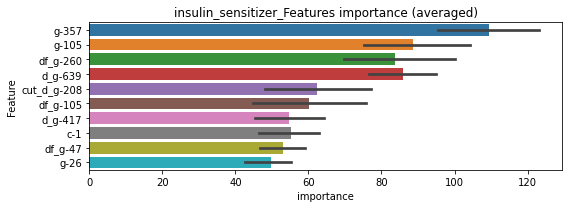

len(train_index) : 3887
len(valid_index) : 3888
================================= fold 1/2 insulin_sensitizer=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193734	valid_1's binary_logloss: 0.0432677
[200]	training's binary_logloss: 0.00310519	valid_1's binary_logloss: 0.0214035
[300]	training's binary_logloss: 0.000925879	valid_1's binary_logloss: 0.0169321
[400]	training's binary_logloss: 0.000454311	valid_1's binary_logloss: 0.0157118
[500]	training's binary_logloss: 0.000302023	valid_1's binary_logloss: 0.0152029
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000311283	valid_1's binary_logloss: 0.015183


len(train_index) : 3888
len(valid_index) : 3887
================================= fold 2/2 insulin_sensitizer=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198538	valid_1's binary_logloss: 0.0372198
[200]	training's binary_logloss: 0.00335216	valid_1's binary_logloss: 0.0169679
[300]	training's binary_logloss: 0.00100894	valid_1's binary_logloss: 0.0128169
[400]	training's binary_logloss: 0.000483244	valid_1's binary_logloss: 0.0115845
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000458162	valid_1's binary_logloss: 0.0114438


insulin_sensitizer logloss: 0.013313656551289816


neg labels: 3289 → selected neg labels: 3282


integrin_inhibitor, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376208	valid_1's binary_logloss: 0.0674963
[200]	training's binary_logloss: 0.00658492	valid_1's binary_logloss: 0.0280167
[300]	training's binary_logloss: 0.00197328	valid_1's binary_logloss: 0.0196431
[400]	training's binary_logloss: 0.000959839	valid_1's binary_logloss: 0.0165222
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000679036	valid_1's binary_logloss: 0.0154671
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411757	valid_1's binary_logloss: 0.0674202
[200]	training's binary_logloss: 0.00745769	valid_1's binary_logloss: 0.0251553
[300]	training's binary_logloss: 0.00217095	valid_1's binary_logloss: 0.0150246
[400]	training's binary_logloss: 0.00103236	valid_1's binary_logloss: 0.0120771
[500]	training's binary_logloss: 0.000663839	valid_1's binary_logloss: 0.0106773
Early stopping, best iteration is:
[579]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0031528, Threshold: 0.0044163, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00397, conf_1:0.00486
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0044163
Num_p_label: 7.0, Expected: 7.0, Adj_threshold_2: 0.0144163
threshold: 0.0144163, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0387231	valid_1's binary_logloss: 0.0687594
[200]	training's binary_logloss: 0.00669914	valid_1's binary_logloss: 0.0284079
[300]	training's binary_logloss: 0.00199822	valid_1's binary_logloss: 0.0199111
[400]	training's binary_logloss: 0.000963424	valid_1's binary_logloss: 0.0167751
[500]	training's binary_logloss: 0.00063097	valid_1's binary_logloss: 0.0154812
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00062516	valid_1's binary_logloss: 0.0154447
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0409494	valid_1's binary_logloss: 0.0663734
[200]	training's binary_logloss: 0.0071407	valid_1's binary_logloss: 0.0234559
[300]	training's binary_logloss: 0.00211111	valid_1's binary_logloss: 0.0145759
[400]	training's binary_logloss: 0.00101732	valid_1's binary_logloss: 0.0119605
[500]	training's binary_logloss: 0.000652293	

2 / 3 AUC score:1.000
y_Threshold: 0.0185903, Threshold: 0.0144163, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00176
Num_p_label: 16.0, conf_0:0.01297, conf_1:0.01586
threshold: 0.0144163, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0387231	valid_1's binary_logloss: 0.0687594
[200]	training's binary_logloss: 0.00669914	valid_1's binary_logloss: 0.0284079
[300]	training's binary_logloss: 0.00199822	valid_1's binary_logloss: 0.0199111
[400]	training's binary_logloss: 0.000963424	valid_1's binary_logloss: 0.0167751
[500]	training's binary_logloss: 0.00063097	valid_1's binary_logloss: 0.0154812
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00062516	valid_1's binary_logloss: 0.0154447
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0409494	valid_1's binary_logloss: 0.0663734
[200]	training's binary_logloss: 0.0071407	valid_1's binary_logloss: 0.0234559
[300]	training's binary_logloss: 0.00211111	valid_1's binary_logloss: 0.0145759
[400]	training's binary_logloss: 0.00101732	valid_1's binary_logloss: 0.0119605
[500]	training's binary_logloss: 0.000652293	

3 / 3 AUC score:1.000
y_Threshold: 0.0185903, Threshold: 0.0144163, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00176
Num_p_label: 16.0, conf_0:0.01297, conf_1:0.01586
threshold: 0.0144163, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 672.0/7788, y_label_rate: 0.0862866


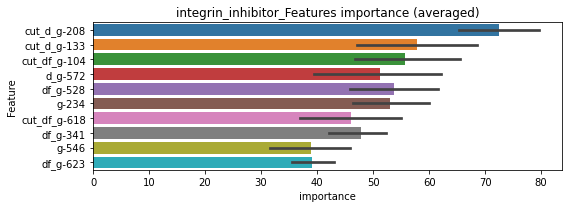

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 integrin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220615	valid_1's binary_logloss: 0.0459828
[200]	training's binary_logloss: 0.00379171	valid_1's binary_logloss: 0.0256634
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00124873	valid_1's binary_logloss: 0.0228589


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 integrin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226618	valid_1's binary_logloss: 0.0389569
[200]	training's binary_logloss: 0.00404747	valid_1's binary_logloss: 0.0168156
[300]	training's binary_logloss: 0.00121718	valid_1's binary_logloss: 0.0124044
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000659722	valid_1's binary_logloss: 0.0114592


integrin_inhibitor logloss: 0.017159031310922356


neg labels: 3289 → selected neg labels: 3274


jak_inhibitor, len(trt): 92, len(othr): 3274, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0422379	valid_1's binary_logloss: 0.081073
[200]	training's binary_logloss: 0.0077921	valid_1's binary_logloss: 0.0387688
[300]	training's binary_logloss: 0.0024028	valid_1's binary_logloss: 0.0279749
[400]	training's binary_logloss: 0.00116204	valid_1's binary_logloss: 0.0240226
[500]	training's binary_logloss: 0.000747784	valid_1's binary_logloss: 0.022272
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000702823	valid_1's binary_logloss: 0.0220939
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0408509	valid_1's binary_logloss: 0.0853011
[200]	training's binary_logloss: 0.007621	valid_1's binary_logloss: 0.0406984
[300]	training's binary_logloss: 0.00233793	valid_1's binary_logloss: 0.027962
[400]	training's binary_logloss: 0.00114196	valid_1's binary_logloss: 0.0238452
[500]	training's binary_logloss: 0.000749045	valid

1 / 3 AUC score:1.000
y_Threshold: 0.0121838, Threshold: 0.0216718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0200904 Vs.target_rate: 0.00386
Num_p_label: 80.0, conf_0:0.01950, conf_1:0.02384
Num_p_label: 80.0, Expected: 15.4, Adj_threshold_1: 0.0216718
Num_p_label: 58.0, Expected: 15.4, Adj_threshold_2: 0.0316718
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_3: 0.0416718
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_4: 0.0516718
threshold: 0.0516718, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 653.0/3794, y_label_rate: 0.1721139
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0405052	valid_1's binary_logloss: 0.0736888
[200]	training's binary_logloss: 0.00684107	valid_1's binary_logloss: 0.0345207
[300]	training's binary_logloss: 0.00204904	valid_1's binary_logloss: 0.0261486
[400]	training's binary_logloss: 0.000991887	valid_1's binary_logloss: 0.0232319
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000676504	valid_1's binary_logloss: 0.0222201
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0405796	valid_1's binary_logloss: 0.0764454
[200]	training's binary_logloss: 0.00713768	valid_1's binary_logloss: 0.0292262
[300]	training's binary_logloss: 0.0021782	valid_1's binary_logloss: 0.0165721
[400]	training's binary_logloss: 0.00106206	valid_1's binary_logloss: 0.0124068
[500]	training's binary_logloss: 0.000700183	valid_1's binary_logloss: 0.0107078
[600]	training's binary_logloss: 0.00057092

2 / 3 AUC score:1.000
y_Threshold: 0.1471576, Threshold: 0.0516718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0334003 Vs.target_rate: 0.00386
Num_p_label: 133.0, conf_0:0.04650, conf_1:0.05684
Num_p_label: 133.0, Expected: 15.4, Adj_threshold_1: 0.0516718
Num_p_label: 117.0, Expected: 15.4, Adj_threshold_2: 0.0616718
Num_p_label: 102.0, Expected: 15.4, Adj_threshold_3: 0.0716718
Num_p_label: 90.0, Expected: 15.4, Adj_threshold_4: 0.0816718
Num_p_label: 85.0, Expected: 15.4, Adj_threshold_5: 0.0916718
Num_p_label: 76.0, Expected: 15.4, Adj_threshold_6: 0.1016718
Num_p_label: 72.0, Expected: 15.4, Adj_threshold_7: 0.1116718
Num_p_label: 70.0, Expected: 15.4, Adj_threshold_8: 0.1216718
Num_p_label: 65.0, Expected: 15.4, Adj_threshold_9: 0.1316718
Num_p_label: 60.0, Expected: 15.4, Adj_threshold_10: 0.1416718
threshold: 0.1516718, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 648.0/3784, y_label_rate: 0.17

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0394909	valid_1's binary_logloss: 0.07943
[200]	training's binary_logloss: 0.00668593	valid_1's binary_logloss: 0.0428302
[300]	training's binary_logloss: 0.00198762	valid_1's binary_logloss: 0.0357114
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0015858	valid_1's binary_logloss: 0.0348689
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0393111	valid_1's binary_logloss: 0.0755166
[200]	training's binary_logloss: 0.00677101	valid_1's binary_logloss: 0.0348946
[300]	training's binary_logloss: 0.00204881	valid_1's binary_logloss: 0.0254393
[400]	training's binary_logloss: 0.000992834	valid_1's binary_logloss: 0.0223535
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000975779	valid_1's binary_logloss: 0.0223013


3 / 3 AUC score:0.999
y_Threshold: 0.1211667, Threshold: 0.1516718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0241085 Vs.target_rate: 0.00386
Num_p_label: 96.0, conf_0:0.13650, conf_1:0.16684
Num_p_label: 96.0, Expected: 15.4, Adj_threshold_1: 0.1516718
Num_p_label: 90.0, Expected: 15.4, Adj_threshold_2: 0.1616718
Num_p_label: 86.0, Expected: 15.4, Adj_threshold_3: 0.1716718
Num_p_label: 84.0, Expected: 15.4, Adj_threshold_4: 0.1816718
Num_p_label: 76.0, Expected: 15.4, Adj_threshold_5: 0.1916718
Num_p_label: 70.0, Expected: 15.4, Adj_threshold_6: 0.2016718
Num_p_label: 65.0, Expected: 15.4, Adj_threshold_7: 0.2116718
Num_p_label: 63.0, Expected: 15.4, Adj_threshold_8: 0.2216718
Num_p_label: 61.0, Expected: 15.4, Adj_threshold_9: 0.2316718
Num_p_label: 56.0, Expected: 15.4, Adj_threshold_10: 0.2416718
threshold: 0.2516718, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 682.0/7736, y_label_rate: 0.088159

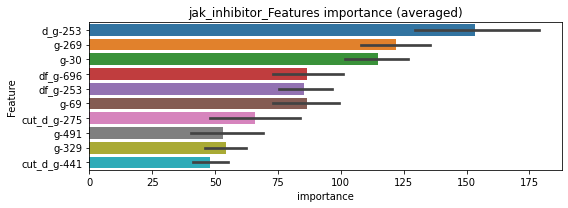

len(train_index) : 3868
len(valid_index) : 3868
================================= fold 1/2 jak_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216028	valid_1's binary_logloss: 0.053273
[200]	training's binary_logloss: 0.00375616	valid_1's binary_logloss: 0.0305879
[300]	training's binary_logloss: 0.00114678	valid_1's binary_logloss: 0.0259705
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00073458	valid_1's binary_logloss: 0.025052


len(train_index) : 3868
len(valid_index) : 3868
================================= fold 2/2 jak_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218421	valid_1's binary_logloss: 0.0509156
[200]	training's binary_logloss: 0.00418589	valid_1's binary_logloss: 0.0300297
[300]	training's binary_logloss: 0.00120785	valid_1's binary_logloss: 0.0247068
[400]	training's binary_logloss: 0.000585329	valid_1's binary_logloss: 0.0227566
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000407279	valid_1's binary_logloss: 0.0220129


jak_inhibitor logloss: 0.023532449073870625


neg labels: 3289 → selected neg labels: 3272


kit_inhibitor, len(trt): 273, len(othr): 3272, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0535501	valid_1's binary_logloss: 0.128368
[200]	training's binary_logloss: 0.0119127	valid_1's binary_logloss: 0.0895116
[300]	training's binary_logloss: 0.00379738	valid_1's binary_logloss: 0.0803296
[400]	training's binary_logloss: 0.00176939	valid_1's binary_logloss: 0.076769
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00171669	valid_1's binary_logloss: 0.0766346
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0544065	valid_1's binary_logloss: 0.130595
[200]	training's binary_logloss: 0.0122242	valid_1's binary_logloss: 0.0926036
[300]	training's binary_logloss: 0.00381272	valid_1's binary_logloss: 0.0858096
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00210436	valid_1's binary_logloss: 0.0838271


1 / 3 AUC score:0.988
y_Threshold: 0.0230501, Threshold: 0.1721227, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 176 → Positive_corect_labels: 632/3750
p_label_rate: 0.0200904 Vs.target_rate: 0.01146
Num_p_label: 80.0, conf_0:0.15491, conf_1:0.18934
threshold: 0.1721227, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 632.0/3750, y_label_rate: 0.1685333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0448737	valid_1's binary_logloss: 0.0919418
[200]	training's binary_logloss: 0.00856757	valid_1's binary_logloss: 0.0512787
[300]	training's binary_logloss: 0.0024845	valid_1's binary_logloss: 0.0405572
[400]	training's binary_logloss: 0.00117772	valid_1's binary_logloss: 0.0371295
[500]	training's binary_logloss: 0.000765622	valid_1's binary_logloss: 0.0357944
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000623907	valid_1's binary_logloss: 0.0349989
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0465554	valid_1's binary_logloss: 0.0951517
[200]	training's binary_logloss: 0.00919601	valid_1's binary_logloss: 0.0526104
[300]	training's binary_logloss: 0.00271068	valid_1's binary_logloss: 0.0398908
[400]	training's binary_logloss: 0.00128391	valid_1's binary_logloss: 0.0362687
[500]	training's binary_logloss: 0.000812485

2 / 3 AUC score:0.998
y_Threshold: 0.0967609, Threshold: 0.1721227, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 617.0/3720
p_label_rate: 0.0356605 Vs.target_rate: 0.01146
Num_p_label: 142.0, conf_0:0.15491, conf_1:0.18934
Num_p_label: 142.0, Expected: 45.6, Adj_threshold_1: 0.1721227
Num_p_label: 139.0, Expected: 45.6, Adj_threshold_2: 0.1821227
Num_p_label: 136.0, Expected: 45.6, Adj_threshold_3: 0.1921227
Num_p_label: 134.0, Expected: 45.6, Adj_threshold_4: 0.2021227
Num_p_label: 133.0, Expected: 45.6, Adj_threshold_5: 0.2121227
Num_p_label: 131.0, Expected: 45.6, Adj_threshold_6: 0.2221227
Num_p_label: 128.0, Expected: 45.6, Adj_threshold_7: 0.2321227
Num_p_label: 125.0, Expected: 45.6, Adj_threshold_8: 0.2421227
Num_p_label: 123.0, Expected: 45.6, Adj_threshold_9: 0.2521227
Num_p_label: 121.0, Expected: 45.6, Adj_threshold_10: 0.2621227
threshold: 0.2721227, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 617.0/3720, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0420676	valid_1's binary_logloss: 0.0959679
[200]	training's binary_logloss: 0.00789479	valid_1's binary_logloss: 0.060846
[300]	training's binary_logloss: 0.00225892	valid_1's binary_logloss: 0.0517012
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00118552	valid_1's binary_logloss: 0.0495675
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0430304	valid_1's binary_logloss: 0.0877523
[200]	training's binary_logloss: 0.00825371	valid_1's binary_logloss: 0.0472855
[300]	training's binary_logloss: 0.00233805	valid_1's binary_logloss: 0.0326438
[400]	training's binary_logloss: 0.0011054	valid_1's binary_logloss: 0.0287011
[500]	training's binary_logloss: 0.000709725	valid_1's binary_logloss: 0.0271276
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000621048	valid_1's binary_logloss: 0.0265329


3 / 3 AUC score:0.999
y_Threshold: 0.0692900, Threshold: 0.2721227, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 599.0/3684
p_label_rate: 0.0334003 Vs.target_rate: 0.01146
Num_p_label: 133.0, conf_0:0.24491, conf_1:0.29934
threshold: 0.2721227, positive_p_label: 133.0/3982, p_label_rate: 0.0334003
positive_y_label: 732.0/7666, y_label_rate: 0.0954866


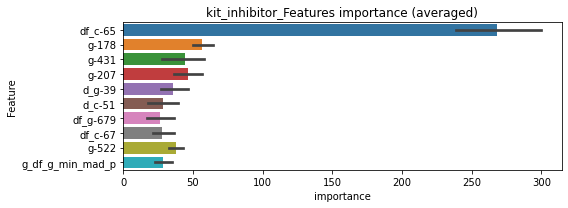

len(train_index) : 3833
len(valid_index) : 3833
================================= fold 1/2 kit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0278397	valid_1's binary_logloss: 0.0682939
[200]	training's binary_logloss: 0.00550972	valid_1's binary_logloss: 0.0437918
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00379548	valid_1's binary_logloss: 0.0418716


len(train_index) : 3833
len(valid_index) : 3833
================================= fold 2/2 kit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274812	valid_1's binary_logloss: 0.0683748
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00661619	valid_1's binary_logloss: 0.0456153


kit_inhibitor logloss: 0.04374346750017451


neg labels: 3289 → selected neg labels: 3288


laxative, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159915	valid_1's binary_logloss: 0.0194085
[200]	training's binary_logloss: 0.00139021	valid_1's binary_logloss: 0.00333748
[300]	training's binary_logloss: 0.000389498	valid_1's binary_logloss: 0.00181025
[400]	training's binary_logloss: 0.000241528	valid_1's binary_logloss: 0.00154481
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000218087	valid_1's binary_logloss: 0.00149921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163573	valid_1's binary_logloss: 0.0172904
[200]	training's binary_logloss: 0.00143661	valid_1's binary_logloss: 0.00172161
[300]	training's binary_logloss: 0.000397133	valid_1's binary_logloss: 0.00052568
[400]	training's binary_logloss: 0.000242631	valid_1's binary_logloss: 0.000325645
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000217931	valid_1's binary_logloss: 0.0002

1 / 3 AUC score:1.000
y_Threshold: 0.0006071, Threshold: 0.0008492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00076, conf_1:0.00093
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0008492
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0108492
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0208492
threshold: 0.0208492, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161265	valid_1's binary_logloss: 0.0192878
[200]	training's binary_logloss: 0.00135451	valid_1's binary_logloss: 0.00326195
[300]	training's binary_logloss: 0.000380784	valid_1's binary_logloss: 0.0019562
[400]	training's binary_logloss: 0.000239418	valid_1's binary_logloss: 0.0017122
[500]	training's binary_logloss: 0.000209637	valid_1's binary_logloss: 0.00165646
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000209637	valid_1's binary_logloss: 0.00165646
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168148	valid_1's binary_logloss: 0.0172434
[200]	training's binary_logloss: 0.00146751	valid_1's binary_logloss: 0.00154117
[300]	training's binary_logloss: 0.000401213	valid_1's binary_logloss: 0.000436712
[400]	training's binary_logloss: 0.00024621	valid_1's binary_logloss: 0.000269931
Early stopping, best iteration i

2 / 3 AUC score:1.000
y_Threshold: 0.0623838, Threshold: 0.0208492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00025
Num_p_label: 19.0, conf_0:0.01876, conf_1:0.02293
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_1: 0.0208492
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_2: 0.0308492
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_3: 0.0408492
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_4: 0.0508492
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_5: 0.0608492
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.0708492
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.0808492
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.0908492
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_9: 0.1008492
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_10: 0.1108492
threshold: 0.1208492, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161265	valid_1's binary_logloss: 0.0192878
[200]	training's binary_logloss: 0.00135451	valid_1's binary_logloss: 0.00326195
[300]	training's binary_logloss: 0.000380784	valid_1's binary_logloss: 0.0019562
[400]	training's binary_logloss: 0.000239418	valid_1's binary_logloss: 0.0017122
[500]	training's binary_logloss: 0.000209637	valid_1's binary_logloss: 0.00165646
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000209637	valid_1's binary_logloss: 0.00165646
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168148	valid_1's binary_logloss: 0.0172434
[200]	training's binary_logloss: 0.00146751	valid_1's binary_logloss: 0.00154117
[300]	training's binary_logloss: 0.000401213	valid_1's binary_logloss: 0.000436712
[400]	training's binary_logloss: 0.00024621	valid_1's binary_logloss: 0.000269931
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0623838, Threshold: 0.1208492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, conf_0:0.10876, conf_1:0.13293
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.1208492
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.1308492
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.1408492
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.1508492
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1608492
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.1708492
threshold: 0.1708492, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


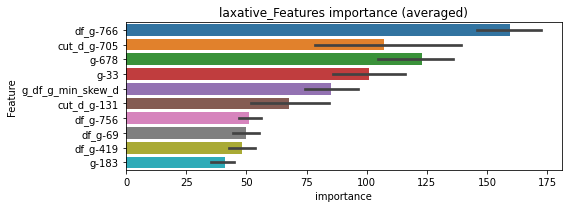

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 laxative=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00865447	valid_1's binary_logloss: 0.0104792
[200]	training's binary_logloss: 0.0007319	valid_1's binary_logloss: 0.00246074
[300]	training's binary_logloss: 0.00020085	valid_1's binary_logloss: 0.00173577
[400]	training's binary_logloss: 0.000122289	valid_1's binary_logloss: 0.00162765
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000109199	valid_1's binary_logloss: 0.00161196


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 laxative=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00865983	valid_1's binary_logloss: 0.00984085
[200]	training's binary_logloss: 0.000753406	valid_1's binary_logloss: 0.00210527
[300]	training's binary_logloss: 0.000208501	valid_1's binary_logloss: 0.00171478
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000175962	valid_1's binary_logloss: 0.00169462


laxative logloss: 0.0016532909636198746


neg labels: 3289 → selected neg labels: 3288


leukotriene_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01602	valid_1's binary_logloss: 0.0168258
[200]	training's binary_logloss: 0.00139295	valid_1's binary_logloss: 0.00173044
[300]	training's binary_logloss: 0.00038602	valid_1's binary_logloss: 0.000574219
[400]	training's binary_logloss: 0.000238621	valid_1's binary_logloss: 0.000399988
[500]	training's binary_logloss: 0.000210831	valid_1's binary_logloss: 0.000365738
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000210035	valid_1's binary_logloss: 0.000364826
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016066	valid_1's binary_logloss: 0.0171389
[200]	training's binary_logloss: 0.00139478	valid_1's binary_logloss: 0.00166764
[300]	training's binary_logloss: 0.000388217	valid_1's binary_logloss: 0.000508547
[400]	training's binary_logloss: 0.000238689	valid_1's binary_logloss: 0.000317268
Early stopping, best iteratio

1 / 3 AUC score:1.000
y_Threshold: 0.0005971, Threshold: 0.0009439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00085, conf_1:0.00104
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0009439
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.0109439
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0209439
threshold: 0.0209439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163044	valid_1's binary_logloss: 0.0171725
[200]	training's binary_logloss: 0.00136799	valid_1's binary_logloss: 0.00156583
[300]	training's binary_logloss: 0.00037511	valid_1's binary_logloss: 0.000460904
[400]	training's binary_logloss: 0.000235813	valid_1's binary_logloss: 0.000302361
[500]	training's binary_logloss: 0.000207766	valid_1's binary_logloss: 0.00026956
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000206214	valid_1's binary_logloss: 0.000268065
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164017	valid_1's binary_logloss: 0.0172165
[200]	training's binary_logloss: 0.00140374	valid_1's binary_logloss: 0.00154211
[300]	training's binary_logloss: 0.000387653	valid_1's binary_logloss: 0.000440698
[400]	training's binary_logloss: 0.000241163	valid_1's binary_logloss: 0.000276915
[500]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1702418, Threshold: 0.0209439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00025
Num_p_label: 17.0, conf_0:0.01885, conf_1:0.02304
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_1: 0.0209439
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_2: 0.0309439
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_3: 0.0409439
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.0509439
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.0609439
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.0709439
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.0809439
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.0909439
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.1009439
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_10: 0.1109439
threshold: 0.1109439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=================

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163044	valid_1's binary_logloss: 0.0171725
[200]	training's binary_logloss: 0.00136799	valid_1's binary_logloss: 0.00156583
[300]	training's binary_logloss: 0.00037511	valid_1's binary_logloss: 0.000460904
[400]	training's binary_logloss: 0.000235813	valid_1's binary_logloss: 0.000302361
[500]	training's binary_logloss: 0.000207766	valid_1's binary_logloss: 0.00026956
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000206214	valid_1's binary_logloss: 0.000268065
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164017	valid_1's binary_logloss: 0.0172165
[200]	training's binary_logloss: 0.00140374	valid_1's binary_logloss: 0.00154211
[300]	training's binary_logloss: 0.000387653	valid_1's binary_logloss: 0.000440698
[400]	training's binary_logloss: 0.000241163	valid_1's binary_logloss: 0.000276915
[500]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1702418, Threshold: 0.1109439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.09985, conf_1:0.12204
threshold: 0.1109439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


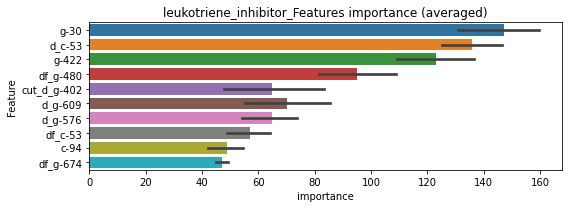

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 leukotriene_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0085891	valid_1's binary_logloss: 0.0108502
[200]	training's binary_logloss: 0.000708187	valid_1's binary_logloss: 0.00292699
[300]	training's binary_logloss: 0.000193634	valid_1's binary_logloss: 0.00231597
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000195124	valid_1's binary_logloss: 0.00231464


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 leukotriene_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00864916	valid_1's binary_logloss: 0.01004
[200]	training's binary_logloss: 0.000716921	valid_1's binary_logloss: 0.00139719
[300]	training's binary_logloss: 0.00019951	valid_1's binary_logloss: 0.000689418
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00015184	valid_1's binary_logloss: 0.000646387


leukotriene_inhibitor logloss: 0.0014806190244732711


neg labels: 3289 → selected neg labels: 3280


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3280, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.045591	valid_1's binary_logloss: 0.0971122
[200]	training's binary_logloss: 0.00878226	valid_1's binary_logloss: 0.0558176
[300]	training's binary_logloss: 0.00270419	valid_1's binary_logloss: 0.0477536
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00159303	valid_1's binary_logloss: 0.0456424
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0497832	valid_1's binary_logloss: 0.0819424
[200]	training's binary_logloss: 0.0104554	valid_1's binary_logloss: 0.0418202
[300]	training's binary_logloss: 0.00315981	valid_1's binary_logloss: 0.0322851
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00221814	valid_1's binary_logloss: 0.030491


1 / 3 AUC score:0.999
y_Threshold: 0.0091520, Threshold: 0.0120113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00260
Num_p_label: 80.0, conf_0:0.01081, conf_1:0.01321
Num_p_label: 80.0, Expected: 10.4, Adj_threshold_1: 0.0120113
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_2: 0.0220113
Num_p_label: 11.0, Expected: 10.4, Adj_threshold_3: 0.0320113
threshold: 0.0320113, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0438472	valid_1's binary_logloss: 0.0942299
[200]	training's binary_logloss: 0.008735	valid_1's binary_logloss: 0.0534515
[300]	training's binary_logloss: 0.00270499	valid_1's binary_logloss: 0.0423677
[400]	training's binary_logloss: 0.00127532	valid_1's binary_logloss: 0.0390168
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000987194	valid_1's binary_logloss: 0.037747
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0485023	valid_1's binary_logloss: 0.0839419
[200]	training's binary_logloss: 0.00953533	valid_1's binary_logloss: 0.0393704
[300]	training's binary_logloss: 0.00294939	valid_1's binary_logloss: 0.0291627
[400]	training's binary_logloss: 0.00138291	valid_1's binary_logloss: 0.0257969
[500]	training's binary_logloss: 0.000865967	valid_1's binary_logloss: 0.024448
Early stopping, best iteration is:
[535]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0235674, Threshold: 0.0320113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, conf_0:0.02881, conf_1:0.03521
threshold: 0.0320113, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0459002	valid_1's binary_logloss: 0.0898738
[200]	training's binary_logloss: 0.00896756	valid_1's binary_logloss: 0.0456233
[300]	training's binary_logloss: 0.0027415	valid_1's binary_logloss: 0.0365052
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00139815	valid_1's binary_logloss: 0.0336036
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0463922	valid_1's binary_logloss: 0.0909582
[200]	training's binary_logloss: 0.00924429	valid_1's binary_logloss: 0.04849
[300]	training's binary_logloss: 0.00281522	valid_1's binary_logloss: 0.0395792
[400]	training's binary_logloss: 0.00132237	valid_1's binary_logloss: 0.0367851
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00122041	valid_1's binary_logloss: 0.0363267


3 / 3 AUC score:0.999
y_Threshold: 0.0223223, Threshold: 0.0320113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0032647 Vs.target_rate: 0.00260
Num_p_label: 13.0, conf_0:0.02881, conf_1:0.03521
threshold: 0.0320113, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/7754, y_label_rate: 0.0842146


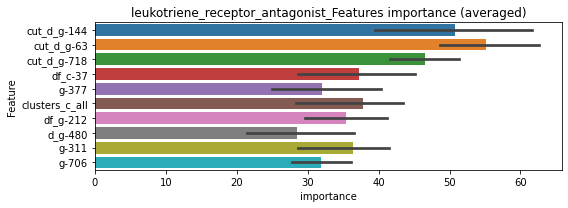

len(train_index) : 3877
len(valid_index) : 3877
================================= fold 1/2 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238455	valid_1's binary_logloss: 0.0530077
[200]	training's binary_logloss: 0.0045434	valid_1's binary_logloss: 0.0308925
[300]	training's binary_logloss: 0.00136184	valid_1's binary_logloss: 0.0264873
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000841498	valid_1's binary_logloss: 0.0254083


len(train_index) : 3877
len(valid_index) : 3877
================================= fold 2/2 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0255537	valid_1's binary_logloss: 0.0497936
[200]	training's binary_logloss: 0.00506305	valid_1's binary_logloss: 0.0267503
[300]	training's binary_logloss: 0.00153468	valid_1's binary_logloss: 0.021073
[400]	training's binary_logloss: 0.000709625	valid_1's binary_logloss: 0.0194811
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000582389	valid_1's binary_logloss: 0.018985


leukotriene_receptor_antagonist logloss: 0.02219667614776799


neg labels: 3289 → selected neg labels: 3287


lipase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200346	valid_1's binary_logloss: 0.0284967
[200]	training's binary_logloss: 0.00215882	valid_1's binary_logloss: 0.00625513
[300]	training's binary_logloss: 0.000620469	valid_1's binary_logloss: 0.00304852
[400]	training's binary_logloss: 0.000346008	valid_1's binary_logloss: 0.00226537
[500]	training's binary_logloss: 0.000288815	valid_1's binary_logloss: 0.00209032
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000288815	valid_1's binary_logloss: 0.00209032
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020292	valid_1's binary_logloss: 0.0228201
[200]	training's binary_logloss: 0.00218422	valid_1's binary_logloss: 0.00310955
[300]	training's binary_logloss: 0.000633035	valid_1's binary_logloss: 0.00106098
[400]	training's binary_logloss: 0.0003512	valid_1's binary_logloss: 0.000655274
Early stopping, best iteration is

1 / 3 AUC score:1.000
y_Threshold: 0.0011198, Threshold: 0.0019099, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00172, conf_1:0.00210
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0019099
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0119099
threshold: 0.0119099, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204213	valid_1's binary_logloss: 0.0279652
[200]	training's binary_logloss: 0.00215101	valid_1's binary_logloss: 0.00556923
[300]	training's binary_logloss: 0.00061465	valid_1's binary_logloss: 0.00256278
[400]	training's binary_logloss: 0.000341352	valid_1's binary_logloss: 0.0018771
[500]	training's binary_logloss: 0.000290005	valid_1's binary_logloss: 0.0017473
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000288533	valid_1's binary_logloss: 0.00174404
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203895	valid_1's binary_logloss: 0.0226681
[200]	training's binary_logloss: 0.00215961	valid_1's binary_logloss: 0.00286039
[300]	training's binary_logloss: 0.000613656	valid_1's binary_logloss: 0.000935045
[400]	training's binary_logloss: 0.000345178	valid_1's binary_logloss: 0.000560533
[500]	training's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0714572, Threshold: 0.0119099, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, conf_0:0.01072, conf_1:0.01310
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0119099
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0219099
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.0319099
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.0419099
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_5: 0.0519099
threshold: 0.0519099, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204213	valid_1's binary_logloss: 0.0279652
[200]	training's binary_logloss: 0.00215101	valid_1's binary_logloss: 0.00556923
[300]	training's binary_logloss: 0.00061465	valid_1's binary_logloss: 0.00256278
[400]	training's binary_logloss: 0.000341352	valid_1's binary_logloss: 0.0018771
[500]	training's binary_logloss: 0.000290005	valid_1's binary_logloss: 0.0017473
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000288533	valid_1's binary_logloss: 0.00174404
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203895	valid_1's binary_logloss: 0.0226681
[200]	training's binary_logloss: 0.00215961	valid_1's binary_logloss: 0.00286039
[300]	training's binary_logloss: 0.000613656	valid_1's binary_logloss: 0.000935045
[400]	training's binary_logloss: 0.000345178	valid_1's binary_logloss: 0.000560533
[500]	training's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0714572, Threshold: 0.0519099, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.04672, conf_1:0.05710
threshold: 0.0519099, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7794, y_label_rate: 0.0846805


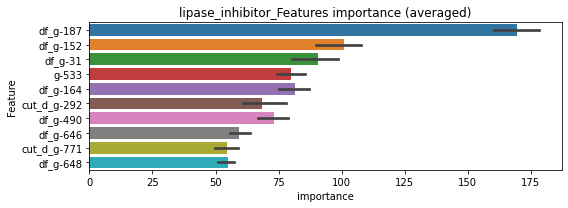

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104923	valid_1's binary_logloss: 0.0144337
[200]	training's binary_logloss: 0.00108592	valid_1's binary_logloss: 0.00401352
[300]	training's binary_logloss: 0.000309596	valid_1's binary_logloss: 0.00303093
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.000266204	valid_1's binary_logloss: 0.00297098


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106398	valid_1's binary_logloss: 0.0141696
[200]	training's binary_logloss: 0.00112809	valid_1's binary_logloss: 0.00398611
[300]	training's binary_logloss: 0.00032789	valid_1's binary_logloss: 0.00274094
[400]	training's binary_logloss: 0.000181224	valid_1's binary_logloss: 0.00245744
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000178831	valid_1's binary_logloss: 0.00245143


lipase_inhibitor logloss: 0.002711201442977682


neg labels: 3289 → selected neg labels: 3278


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3278, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0455216	valid_1's binary_logloss: 0.09188
[200]	training's binary_logloss: 0.00929877	valid_1's binary_logloss: 0.0464211
[300]	training's binary_logloss: 0.00285792	valid_1's binary_logloss: 0.0338195
[400]	training's binary_logloss: 0.0013601	valid_1's binary_logloss: 0.0299927
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00109021	valid_1's binary_logloss: 0.0290597
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.045319	valid_1's binary_logloss: 0.0862746
[200]	training's binary_logloss: 0.00966788	valid_1's binary_logloss: 0.0428123
[300]	training's binary_logloss: 0.00299553	valid_1's binary_logloss: 0.0296717
[400]	training's binary_logloss: 0.00141455	valid_1's binary_logloss: 0.0250536
[500]	training's binary_logloss: 0.000889432	valid_1's binary_logloss: 0.0232178
Early stopping, best iteration is:
[539]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0047644, Threshold: 0.0080750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00727, conf_1:0.00888
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0080750
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_2: 0.0180750
threshold: 0.0180750, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0449115	valid_1's binary_logloss: 0.0866499
[200]	training's binary_logloss: 0.00914346	valid_1's binary_logloss: 0.040402
[300]	training's binary_logloss: 0.00287548	valid_1's binary_logloss: 0.0286084
[400]	training's binary_logloss: 0.00138033	valid_1's binary_logloss: 0.0249725
[500]	training's binary_logloss: 0.000867391	valid_1's binary_logloss: 0.0236087
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000738098	valid_1's binary_logloss: 0.0231156
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0460398	valid_1's binary_logloss: 0.0910797
[200]	training's binary_logloss: 0.00955965	valid_1's binary_logloss: 0.0460578
[300]	training's binary_logloss: 0.00293631	valid_1's binary_logloss: 0.0332379
[400]	training's binary_logloss: 0.00138949	valid_1's binary_logloss: 0.0295246
[500]	training's binary_logloss: 0.000871251

2 / 3 AUC score:1.000
y_Threshold: 0.0155160, Threshold: 0.0180750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0168257 Vs.target_rate: 0.00256
Num_p_label: 67.0, conf_0:0.01627, conf_1:0.01988
Num_p_label: 67.0, Expected: 10.2, Adj_threshold_1: 0.0180750
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_2: 0.0280750
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_3: 0.0380750
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.0480750
threshold: 0.0480750, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0449097	valid_1's binary_logloss: 0.0942938
[200]	training's binary_logloss: 0.00875639	valid_1's binary_logloss: 0.0480463
[300]	training's binary_logloss: 0.00273929	valid_1's binary_logloss: 0.0372568
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00178744	valid_1's binary_logloss: 0.0352488
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0471734	valid_1's binary_logloss: 0.082327
[200]	training's binary_logloss: 0.00972633	valid_1's binary_logloss: 0.0337565
[300]	training's binary_logloss: 0.00302814	valid_1's binary_logloss: 0.0207438
[400]	training's binary_logloss: 0.00143952	valid_1's binary_logloss: 0.0166578
[500]	training's binary_logloss: 0.0008994	valid_1's binary_logloss: 0.0146707
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000689922	valid_1's binary_logloss: 0.0138922


3 / 3 AUC score:0.999
y_Threshold: 0.0167584, Threshold: 0.0480750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 647.0/3785
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, conf_0:0.04327, conf_1:0.05288
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.0480750
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_2: 0.0580750
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.0680750
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_4: 0.0780750
threshold: 0.0780750, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 667.0/7767, y_label_rate: 0.0858761


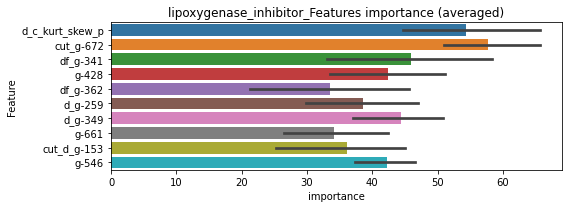

len(train_index) : 3883
len(valid_index) : 3884
================================= fold 1/2 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024489	valid_1's binary_logloss: 0.0497363
[200]	training's binary_logloss: 0.00480183	valid_1's binary_logloss: 0.0259563
[300]	training's binary_logloss: 0.001474	valid_1's binary_logloss: 0.0201053
[400]	training's binary_logloss: 0.000700086	valid_1's binary_logloss: 0.0183485
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000476156	valid_1's binary_logloss: 0.017516


len(train_index) : 3884
len(valid_index) : 3883
================================= fold 2/2 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.025836	valid_1's binary_logloss: 0.0539464
[200]	training's binary_logloss: 0.00516915	valid_1's binary_logloss: 0.0288159
[300]	training's binary_logloss: 0.00157562	valid_1's binary_logloss: 0.0234327
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000860965	valid_1's binary_logloss: 0.0221112


lipoxygenase_inhibitor logloss: 0.019813312701966762


neg labels: 3289 → selected neg labels: 3288


lxr_agonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153609	valid_1's binary_logloss: 0.0164095
[200]	training's binary_logloss: 0.00124518	valid_1's binary_logloss: 0.00154798
[300]	training's binary_logloss: 0.000336731	valid_1's binary_logloss: 0.000497775
[400]	training's binary_logloss: 0.000218067	valid_1's binary_logloss: 0.000346954
[500]	training's binary_logloss: 0.000195899	valid_1's binary_logloss: 0.000319054
[600]	training's binary_logloss: 0.000189847	valid_1's binary_logloss: 0.000311844
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000188824	valid_1's binary_logloss: 0.000310486
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156451	valid_1's binary_logloss: 0.0161107
[200]	training's binary_logloss: 0.00128336	valid_1's binary_logloss: 0.0013775
[300]	training's binary_logloss: 0.000342179	valid_1's binary_logloss: 0.000388899
[400]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0005370, Threshold: 0.0017478, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00157, conf_1:0.00192
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0017478
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_2: 0.0117478
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.0217478
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.0317478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.0417478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.0517478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.0617478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.0717478
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.0817478
threshold: 0.0817478, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161391	valid_1's binary_logloss: 0.0169044
[200]	training's binary_logloss: 0.00130609	valid_1's binary_logloss: 0.00150109
[300]	training's binary_logloss: 0.000332956	valid_1's binary_logloss: 0.000426176
[400]	training's binary_logloss: 0.000215169	valid_1's binary_logloss: 0.000287196
[500]	training's binary_logloss: 0.000191646	valid_1's binary_logloss: 0.000259539
[600]	training's binary_logloss: 0.000185827	valid_1's binary_logloss: 0.000253197
[700]	training's binary_logloss: 0.000183028	valid_1's binary_logloss: 0.000250158
[800]	training's binary_logloss: 0.00018172	valid_1's binary_logloss: 0.000248705
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00018172	valid_1's binary_logloss: 0.000248705
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016174	valid_1's binary_logloss: 0.0167611
[200]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1858838, Threshold: 0.0817478, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.07357, conf_1:0.08992
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0817478
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_2: 0.0917478
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1017478
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_4: 0.1117478
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.1217478
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.1317478
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.1417478
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.1517478
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.1617478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.1717478
threshold: 0.1817478, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= 

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161391	valid_1's binary_logloss: 0.0169044
[200]	training's binary_logloss: 0.00130609	valid_1's binary_logloss: 0.00150109
[300]	training's binary_logloss: 0.000332956	valid_1's binary_logloss: 0.000426176
[400]	training's binary_logloss: 0.000215169	valid_1's binary_logloss: 0.000287196
[500]	training's binary_logloss: 0.000191646	valid_1's binary_logloss: 0.000259539
[600]	training's binary_logloss: 0.000185827	valid_1's binary_logloss: 0.000253197
[700]	training's binary_logloss: 0.000183028	valid_1's binary_logloss: 0.000250158
[800]	training's binary_logloss: 0.00018172	valid_1's binary_logloss: 0.000248705
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00018172	valid_1's binary_logloss: 0.000248705
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016174	valid_1's binary_logloss: 0.0167611
[200]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1858838, Threshold: 0.1817478, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025
Num_p_label: 4.0, conf_0:0.16357, conf_1:0.19992
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.1817478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.1917478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.2017478
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.2117478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.2217478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.2317478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2417478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.2517478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.2617478
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.2717478
threshold: 0.2817478, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7795, y_label_rate: 0.0846697


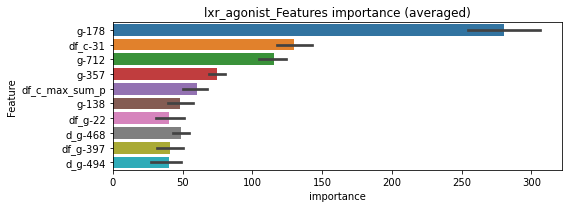

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 lxr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00860144	valid_1's binary_logloss: 0.0102277
[200]	training's binary_logloss: 0.000684801	valid_1's binary_logloss: 0.00242768
[300]	training's binary_logloss: 0.000179406	valid_1's binary_logloss: 0.0018874
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.000194102	valid_1's binary_logloss: 0.00187678


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 lxr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00869571	valid_1's binary_logloss: 0.00940381
[200]	training's binary_logloss: 0.00072126	valid_1's binary_logloss: 0.00143101
[300]	training's binary_logloss: 0.000189328	valid_1's binary_logloss: 0.000919997
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.000183094	valid_1's binary_logloss: 0.000908472


lxr_agonist logloss: 0.0013926898686974186


neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0245319	valid_1's binary_logloss: 0.0377601
[200]	training's binary_logloss: 0.00311186	valid_1's binary_logloss: 0.00974863
[300]	training's binary_logloss: 0.000902733	valid_1's binary_logloss: 0.00510126
[400]	training's binary_logloss: 0.000475276	valid_1's binary_logloss: 0.00393852
[500]	training's binary_logloss: 0.000366905	valid_1's binary_logloss: 0.00354263
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000366905	valid_1's binary_logloss: 0.00354263
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246332	valid_1's binary_logloss: 0.0314894
[200]	training's binary_logloss: 0.00314972	valid_1's binary_logloss: 0.00652227
[300]	training's binary_logloss: 0.000923603	valid_1's binary_logloss: 0.00296275
[400]	training's binary_logloss: 0.000491791	valid_1's binary_logloss: 0.00197352
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0027767, Threshold: 0.0085783, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00772, conf_1:0.00944
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0085783
Num_p_label: 38.0, Expected: 5.2, Adj_threshold_2: 0.0185783
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_3: 0.0285783
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_4: 0.0385783
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_5: 0.0485783
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_6: 0.0585783
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_7: 0.0685783
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_8: 0.0785783
threshold: 0.0785783, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234457	valid_1's binary_logloss: 0.0308914
[200]	training's binary_logloss: 0.0027595	valid_1's binary_logloss: 0.00545533
[300]	training's binary_logloss: 0.000779508	valid_1's binary_logloss: 0.00215372
[400]	training's binary_logloss: 0.000419392	valid_1's binary_logloss: 0.00141273
[500]	training's binary_logloss: 0.000335076	valid_1's binary_logloss: 0.00121457
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000330232	valid_1's binary_logloss: 0.00120353
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231884	valid_1's binary_logloss: 0.028528
[200]	training's binary_logloss: 0.00273198	valid_1's binary_logloss: 0.00483924
[300]	training's binary_logloss: 0.000786309	valid_1's binary_logloss: 0.00185805
[400]	training's binary_logloss: 0.000424032	valid_1's binary_logloss: 0.00112542
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.2526105, Threshold: 0.0785783, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0215972 Vs.target_rate: 0.00130
Num_p_label: 86.0, conf_0:0.07072, conf_1:0.08644
Num_p_label: 86.0, Expected: 5.2, Adj_threshold_1: 0.0785783
Num_p_label: 82.0, Expected: 5.2, Adj_threshold_2: 0.0885783
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_3: 0.0985783
Num_p_label: 79.0, Expected: 5.2, Adj_threshold_4: 0.1085783
Num_p_label: 77.0, Expected: 5.2, Adj_threshold_5: 0.1185783
Num_p_label: 75.0, Expected: 5.2, Adj_threshold_6: 0.1285783
Num_p_label: 72.0, Expected: 5.2, Adj_threshold_7: 0.1385783
Num_p_label: 71.0, Expected: 5.2, Adj_threshold_8: 0.1485783
Num_p_label: 71.0, Expected: 5.2, Adj_threshold_9: 0.1585783
Num_p_label: 71.0, Expected: 5.2, Adj_threshold_10: 0.1685783
threshold: 0.1785783, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234457	valid_1's binary_logloss: 0.0308914
[200]	training's binary_logloss: 0.0027595	valid_1's binary_logloss: 0.00545533
[300]	training's binary_logloss: 0.000779508	valid_1's binary_logloss: 0.00215372
[400]	training's binary_logloss: 0.000419392	valid_1's binary_logloss: 0.00141273
[500]	training's binary_logloss: 0.000335076	valid_1's binary_logloss: 0.00121457
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000330232	valid_1's binary_logloss: 0.00120353
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231884	valid_1's binary_logloss: 0.028528
[200]	training's binary_logloss: 0.00273198	valid_1's binary_logloss: 0.00483924
[300]	training's binary_logloss: 0.000786309	valid_1's binary_logloss: 0.00185805
[400]	training's binary_logloss: 0.000424032	valid_1's binary_logloss: 0.00112542
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.2526105, Threshold: 0.1785783, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0175791 Vs.target_rate: 0.00130
Num_p_label: 70.0, conf_0:0.16072, conf_1:0.19644
Num_p_label: 70.0, Expected: 5.2, Adj_threshold_1: 0.1785783
Num_p_label: 68.0, Expected: 5.2, Adj_threshold_2: 0.1885783
Num_p_label: 66.0, Expected: 5.2, Adj_threshold_3: 0.1985783
Num_p_label: 65.0, Expected: 5.2, Adj_threshold_4: 0.2085783
Num_p_label: 65.0, Expected: 5.2, Adj_threshold_5: 0.2185783
Num_p_label: 62.0, Expected: 5.2, Adj_threshold_6: 0.2285783
Num_p_label: 61.0, Expected: 5.2, Adj_threshold_7: 0.2385783
Num_p_label: 59.0, Expected: 5.2, Adj_threshold_8: 0.2485783
Num_p_label: 59.0, Expected: 5.2, Adj_threshold_9: 0.2585783
Num_p_label: 55.0, Expected: 5.2, Adj_threshold_10: 0.2685783
threshold: 0.2785783, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 710.0/7790, y_label_rate: 0.0911425


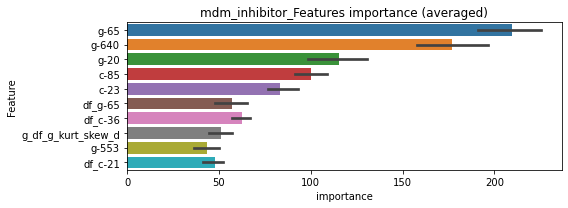

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 mdm_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142966	valid_1's binary_logloss: 0.0228986
[200]	training's binary_logloss: 0.00184822	valid_1's binary_logloss: 0.00853879
[300]	training's binary_logloss: 0.000549089	valid_1's binary_logloss: 0.00624615
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0003746	valid_1's binary_logloss: 0.00595254


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 mdm_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141903	valid_1's binary_logloss: 0.0240314
[200]	training's binary_logloss: 0.00181888	valid_1's binary_logloss: 0.00962636
[300]	training's binary_logloss: 0.000534928	valid_1's binary_logloss: 0.00791047
[400]	training's binary_logloss: 0.000283635	valid_1's binary_logloss: 0.0074736
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000254128	valid_1's binary_logloss: 0.00738822


mdm_inhibitor logloss: 0.006670379360068703


neg labels: 3289 → selected neg labels: 3278


mek_inhibitor, len(trt): 72, len(othr): 3278, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297614	valid_1's binary_logloss: 0.051443
[200]	training's binary_logloss: 0.00441537	valid_1's binary_logloss: 0.024079
[300]	training's binary_logloss: 0.00128388	valid_1's binary_logloss: 0.0194955
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000787798	valid_1's binary_logloss: 0.0185549
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295146	valid_1's binary_logloss: 0.0556678
[200]	training's binary_logloss: 0.00427786	valid_1's binary_logloss: 0.0266357
[300]	training's binary_logloss: 0.00125203	valid_1's binary_logloss: 0.0210386
[400]	training's binary_logloss: 0.000629614	valid_1's binary_logloss: 0.0194454
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000502311	valid_1's binary_logloss: 0.0191563


1 / 3 AUC score:1.000
y_Threshold: 0.0030686, Threshold: 0.0087864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.00791, conf_1:0.00966
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0087864
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_2: 0.0187864
Num_p_label: 41.0, Expected: 12.0, Adj_threshold_3: 0.0287864
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_4: 0.0387864
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_5: 0.0487864
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_6: 0.0587864
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.0687864
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_8: 0.0787864
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_9: 0.0887864
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_10: 0.0987864
threshold: 0.1087864, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 654.0/3799, y_label_rate: 0.1721506

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276236	valid_1's binary_logloss: 0.0549443
[200]	training's binary_logloss: 0.00374481	valid_1's binary_logloss: 0.0254737
[300]	training's binary_logloss: 0.00107113	valid_1's binary_logloss: 0.0204154
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00110814	valid_1's binary_logloss: 0.0203336
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296688	valid_1's binary_logloss: 0.0528576
[200]	training's binary_logloss: 0.00413383	valid_1's binary_logloss: 0.0200532
[300]	training's binary_logloss: 0.00117612	valid_1's binary_logloss: 0.0127606
[400]	training's binary_logloss: 0.000587941	valid_1's binary_logloss: 0.0102376
[500]	training's binary_logloss: 0.00042481	valid_1's binary_logloss: 0.00919309
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000405702	valid_1's binary_logloss: 0.00902742


2 / 3 AUC score:1.000
y_Threshold: 0.0374624, Threshold: 0.1087864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0125565 Vs.target_rate: 0.00302
Num_p_label: 50.0, conf_0:0.09791, conf_1:0.11966
Num_p_label: 50.0, Expected: 12.0, Adj_threshold_1: 0.1087864
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_2: 0.1187864
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_3: 0.1287864
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_4: 0.1387864
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_5: 0.1487864
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_6: 0.1587864
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_7: 0.1687864
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_8: 0.1787864
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_9: 0.1887864
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_10: 0.1987864
threshold: 0.2087864, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 651.0/3793, y_label_rate: 0.1716320

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279042	valid_1's binary_logloss: 0.0458417
[200]	training's binary_logloss: 0.00383852	valid_1's binary_logloss: 0.015396
[300]	training's binary_logloss: 0.00111361	valid_1's binary_logloss: 0.00976423
[400]	training's binary_logloss: 0.000570838	valid_1's binary_logloss: 0.0080343
[500]	training's binary_logloss: 0.000414817	valid_1's binary_logloss: 0.00750658
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000404156	valid_1's binary_logloss: 0.00746252
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281372	valid_1's binary_logloss: 0.0494955
[200]	training's binary_logloss: 0.00391054	valid_1's binary_logloss: 0.020029
[300]	training's binary_logloss: 0.00110975	valid_1's binary_logloss: 0.0136385
[400]	training's binary_logloss: 0.000563761	valid_1's binary_logloss: 0.0120662
Early stopping, best iteration is:
[472]

3 / 3 AUC score:1.000
y_Threshold: 0.0278492, Threshold: 0.2087864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.18791, conf_1:0.22966
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.2087864
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_2: 0.2187864
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_3: 0.2287864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_4: 0.2387864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_5: 0.2487864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_6: 0.2587864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_7: 0.2687864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_8: 0.2787864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_9: 0.2887864
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_10: 0.2987864
threshold: 0.3087864, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 687.0/7773, y_label_rate: 0.0883829

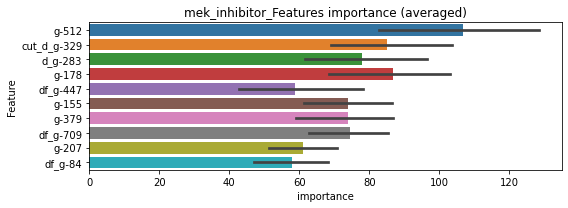

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 mek_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144321	valid_1's binary_logloss: 0.030418
[200]	training's binary_logloss: 0.00190762	valid_1's binary_logloss: 0.0157826
[300]	training's binary_logloss: 0.000554956	valid_1's binary_logloss: 0.012911
[400]	training's binary_logloss: 0.000289437	valid_1's binary_logloss: 0.0120208
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000225349	valid_1's binary_logloss: 0.011655


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 mek_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.015106	valid_1's binary_logloss: 0.0349991
[200]	training's binary_logloss: 0.00208941	valid_1's binary_logloss: 0.0201231
[300]	training's binary_logloss: 0.000605313	valid_1's binary_logloss: 0.0169183
[400]	training's binary_logloss: 0.000308678	valid_1's binary_logloss: 0.0158864
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000291152	valid_1's binary_logloss: 0.0158162


mek_inhibitor logloss: 0.013735361137436819


neg labels: 3289 → selected neg labels: 3278


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3278, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0515195	valid_1's binary_logloss: 0.0953448
[200]	training's binary_logloss: 0.0113912	valid_1's binary_logloss: 0.053531
[300]	training's binary_logloss: 0.00354602	valid_1's binary_logloss: 0.0438462
[400]	training's binary_logloss: 0.00163188	valid_1's binary_logloss: 0.0414108
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00173479	valid_1's binary_logloss: 0.0413972
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0544967	valid_1's binary_logloss: 0.0981525
[200]	training's binary_logloss: 0.0117916	valid_1's binary_logloss: 0.049383
[300]	training's binary_logloss: 0.00370339	valid_1's binary_logloss: 0.0365836
[400]	training's binary_logloss: 0.00167303	valid_1's binary_logloss: 0.0327895
[500]	training's binary_logloss: 0.00102596	valid_1's binary_logloss: 0.0312619
Early stopping, best iteration is:
[510]	training

1 / 3 AUC score:0.997
y_Threshold: 0.0097215, Threshold: 0.0153755, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0200904 Vs.target_rate: 0.00311
Num_p_label: 80.0, conf_0:0.01384, conf_1:0.01691
Num_p_label: 80.0, Expected: 12.4, Adj_threshold_1: 0.0153755
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_2: 0.0253755
Num_p_label: 14.0, Expected: 12.4, Adj_threshold_3: 0.0353755
threshold: 0.0353755, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0494288	valid_1's binary_logloss: 0.103134
[200]	training's binary_logloss: 0.010004	valid_1's binary_logloss: 0.0637929
[300]	training's binary_logloss: 0.00310184	valid_1's binary_logloss: 0.056122
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00215088	valid_1's binary_logloss: 0.0551667
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0545201	valid_1's binary_logloss: 0.0844775
[200]	training's binary_logloss: 0.0121591	valid_1's binary_logloss: 0.0357948
[300]	training's binary_logloss: 0.00378398	valid_1's binary_logloss: 0.0230693
[400]	training's binary_logloss: 0.00173265	valid_1's binary_logloss: 0.0188823
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00125289	valid_1's binary_logloss: 0.0176672


2 / 3 AUC score:0.999
y_Threshold: 0.0324643, Threshold: 0.0353755, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0097941 Vs.target_rate: 0.00311
Num_p_label: 39.0, conf_0:0.03184, conf_1:0.03891
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_1: 0.0353755
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_2: 0.0453755
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_3: 0.0553755
threshold: 0.0553755, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 642.0/3775, y_label_rate: 0.1700662
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0462427	valid_1's binary_logloss: 0.0977574
[200]	training's binary_logloss: 0.00924384	valid_1's binary_logloss: 0.0538961
[300]	training's binary_logloss: 0.00288676	valid_1's binary_logloss: 0.0438082
[400]	training's binary_logloss: 0.00135173	valid_1's binary_logloss: 0.0407537
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000959825	valid_1's binary_logloss: 0.0396262
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0543971	valid_1's binary_logloss: 0.0929635
[200]	training's binary_logloss: 0.0115983	valid_1's binary_logloss: 0.0429486
[300]	training's binary_logloss: 0.00354601	valid_1's binary_logloss: 0.0300901
[400]	training's binary_logloss: 0.00163615	valid_1's binary_logloss: 0.0261764
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00117809	valid_1's binary_logloss: 0.0248795


3 / 3 AUC score:1.000
y_Threshold: 0.0336126, Threshold: 0.0553755, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0027624 Vs.target_rate: 0.00311
Num_p_label: 11.0, conf_0:0.04984, conf_1:0.06091
threshold: 0.0553755, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 646.0/7743, y_label_rate: 0.0834302


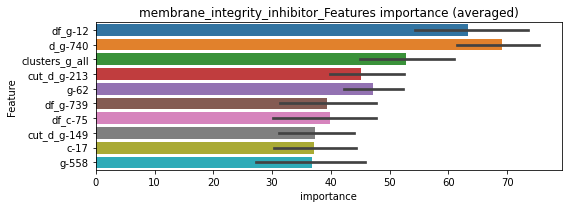

len(train_index) : 3871
len(valid_index) : 3872
================================= fold 1/2 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263196	valid_1's binary_logloss: 0.0579468
[200]	training's binary_logloss: 0.00517035	valid_1's binary_logloss: 0.0355272
[300]	training's binary_logloss: 0.00156319	valid_1's binary_logloss: 0.0311035
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000966581	valid_1's binary_logloss: 0.0300628


len(train_index) : 3872
len(valid_index) : 3871
================================= fold 2/2 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0278762	valid_1's binary_logloss: 0.0523434
[200]	training's binary_logloss: 0.00596408	valid_1's binary_logloss: 0.0265988
[300]	training's binary_logloss: 0.00178389	valid_1's binary_logloss: 0.020874
[400]	training's binary_logloss: 0.000819367	valid_1's binary_logloss: 0.0189084
[500]	training's binary_logloss: 0.00049897	valid_1's binary_logloss: 0.0179378
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000485004	valid_1's binary_logloss: 0.017925


membrane_integrity_inhibitor logloss: 0.023994706833542233


neg labels: 3289 → selected neg labels: 3285


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0258036	valid_1's binary_logloss: 0.0396313
[200]	training's binary_logloss: 0.00343171	valid_1's binary_logloss: 0.0113263
[300]	training's binary_logloss: 0.00101407	valid_1's binary_logloss: 0.00704126
[400]	training's binary_logloss: 0.000523994	valid_1's binary_logloss: 0.00569455
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000441377	valid_1's binary_logloss: 0.00542603
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273076	valid_1's binary_logloss: 0.0382878
[200]	training's binary_logloss: 0.00383361	valid_1's binary_logloss: 0.00987268
[300]	training's binary_logloss: 0.00111688	valid_1's binary_logloss: 0.00522383
[400]	training's binary_logloss: 0.000568768	valid_1's binary_logloss: 0.00387107
[500]	training's binary_logloss: 0.00041406	valid_1's binary_logloss: 0.00350723
Early stopping, best iteration is:


1 / 3 AUC score:1.000
y_Threshold: 0.0019385, Threshold: 0.0026411, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00238, conf_1:0.00291
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0026411
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0126411
threshold: 0.0126411, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262201	valid_1's binary_logloss: 0.0395275
[200]	training's binary_logloss: 0.00344619	valid_1's binary_logloss: 0.0110288
[300]	training's binary_logloss: 0.00101541	valid_1's binary_logloss: 0.00661558
[400]	training's binary_logloss: 0.000527982	valid_1's binary_logloss: 0.00541172
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000416249	valid_1's binary_logloss: 0.00509106
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272703	valid_1's binary_logloss: 0.0388552
[200]	training's binary_logloss: 0.00374196	valid_1's binary_logloss: 0.00971209
[300]	training's binary_logloss: 0.00109666	valid_1's binary_logloss: 0.00534601
[400]	training's binary_logloss: 0.000565457	valid_1's binary_logloss: 0.0040575
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000426091	valid_1's binary_logloss: 0.00367948


2 / 3 AUC score:1.000
y_Threshold: 0.0274712, Threshold: 0.0126411, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, conf_0:0.01138, conf_1:0.01391
threshold: 0.0126411, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262201	valid_1's binary_logloss: 0.0395275
[200]	training's binary_logloss: 0.00344619	valid_1's binary_logloss: 0.0110288
[300]	training's binary_logloss: 0.00101541	valid_1's binary_logloss: 0.00661558
[400]	training's binary_logloss: 0.000527982	valid_1's binary_logloss: 0.00541172
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000416249	valid_1's binary_logloss: 0.00509106
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272703	valid_1's binary_logloss: 0.0388552
[200]	training's binary_logloss: 0.00374196	valid_1's binary_logloss: 0.00971209
[300]	training's binary_logloss: 0.00109666	valid_1's binary_logloss: 0.00534601
[400]	training's binary_logloss: 0.000565457	valid_1's binary_logloss: 0.0040575
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000426091	valid_1's binary_logloss: 0.00367948


3 / 3 AUC score:1.000
y_Threshold: 0.0274712, Threshold: 0.0126411, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, conf_0:0.01138, conf_1:0.01391
threshold: 0.0126411, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 669.0/7792, y_label_rate: 0.0858573


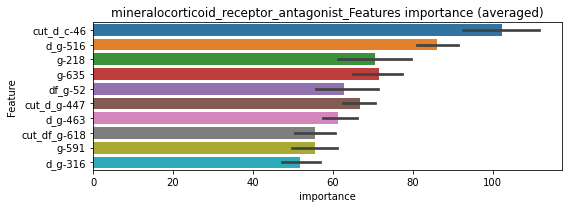

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148744	valid_1's binary_logloss: 0.030178
[200]	training's binary_logloss: 0.00201807	valid_1's binary_logloss: 0.0146334
[300]	training's binary_logloss: 0.000579599	valid_1's binary_logloss: 0.0131258
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.000588427	valid_1's binary_logloss: 0.0130919


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154022	valid_1's binary_logloss: 0.0230379
[200]	training's binary_logloss: 0.00224193	valid_1's binary_logloss: 0.00850498
[300]	training's binary_logloss: 0.000663753	valid_1's binary_logloss: 0.00639698
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000394659	valid_1's binary_logloss: 0.00601889


mineralocorticoid_receptor_antagonist logloss: 0.00955540234410598


neg labels: 3289 → selected neg labels: 3287


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201135	valid_1's binary_logloss: 0.0255243
[200]	training's binary_logloss: 0.00221159	valid_1's binary_logloss: 0.0044135
[300]	training's binary_logloss: 0.000632325	valid_1's binary_logloss: 0.00196078
[400]	training's binary_logloss: 0.000350761	valid_1's binary_logloss: 0.00139446
[500]	training's binary_logloss: 0.00029177	valid_1's binary_logloss: 0.00128168
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000292833	valid_1's binary_logloss: 0.00128026
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019624	valid_1's binary_logloss: 0.0242094
[200]	training's binary_logloss: 0.00211995	valid_1's binary_logloss: 0.0048349
[300]	training's binary_logloss: 0.000617253	valid_1's binary_logloss: 0.00260137
[400]	training's binary_logloss: 0.000345227	valid_1's binary_logloss: 0.00197808
Early stopping, best iteration is:


1 / 3 AUC score:1.000
y_Threshold: 0.0008497, Threshold: 0.0013999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00126, conf_1:0.00154
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0013999
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0113999
threshold: 0.0113999, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204743	valid_1's binary_logloss: 0.0251139
[200]	training's binary_logloss: 0.00217666	valid_1's binary_logloss: 0.00409528
[300]	training's binary_logloss: 0.000631746	valid_1's binary_logloss: 0.00186541
[400]	training's binary_logloss: 0.000350333	valid_1's binary_logloss: 0.0012958
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000299359	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197428	valid_1's binary_logloss: 0.0234922
[200]	training's binary_logloss: 0.00212189	valid_1's binary_logloss: 0.00439293
[300]	training's binary_logloss: 0.000609887	valid_1's binary_logloss: 0.00242996
[400]	training's binary_logloss: 0.000346378	valid_1's binary_logloss: 0.00194064
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000299223	valid_1's binary_logloss: 0.00181823

2 / 3 AUC score:1.000
y_Threshold: 0.0346555, Threshold: 0.0113999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, conf_0:0.01026, conf_1:0.01254
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_1: 0.0113999
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0213999
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.0313999
threshold: 0.0313999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204743	valid_1's binary_logloss: 0.0251139
[200]	training's binary_logloss: 0.00217666	valid_1's binary_logloss: 0.00409528
[300]	training's binary_logloss: 0.000631746	valid_1's binary_logloss: 0.00186541
[400]	training's binary_logloss: 0.000350333	valid_1's binary_logloss: 0.0012958
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000299359	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197428	valid_1's binary_logloss: 0.0234922
[200]	training's binary_logloss: 0.00212189	valid_1's binary_logloss: 0.00439293
[300]	training's binary_logloss: 0.000609887	valid_1's binary_logloss: 0.00242996
[400]	training's binary_logloss: 0.000346378	valid_1's binary_logloss: 0.00194064
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000299223	valid_1's binary_logloss: 0.00181823

3 / 3 AUC score:1.000
y_Threshold: 0.0346555, Threshold: 0.0313999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.02826, conf_1:0.03454
threshold: 0.0313999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7794, y_label_rate: 0.0846805


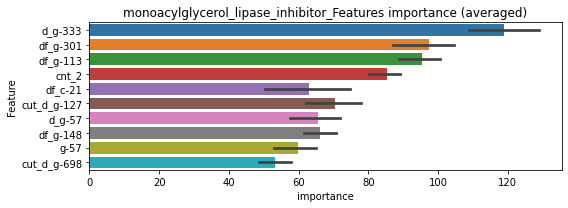

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100013	valid_1's binary_logloss: 0.0153018
[200]	training's binary_logloss: 0.00106183	valid_1's binary_logloss: 0.00545561
[300]	training's binary_logloss: 0.000308913	valid_1's binary_logloss: 0.00439111
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000187988	valid_1's binary_logloss: 0.00414926


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104399	valid_1's binary_logloss: 0.0124957
[200]	training's binary_logloss: 0.001133	valid_1's binary_logloss: 0.00263088
[300]	training's binary_logloss: 0.000326975	valid_1's binary_logloss: 0.00176767
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000188982	valid_1's binary_logloss: 0.00163757


monoacylglycerol_lipase_inhibitor logloss: 0.002893411020658476


neg labels: 3289 → selected neg labels: 3274


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3274, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0559158	valid_1's binary_logloss: 0.105447
[200]	training's binary_logloss: 0.0126997	valid_1's binary_logloss: 0.0590214
[300]	training's binary_logloss: 0.00408094	valid_1's binary_logloss: 0.0478605
[400]	training's binary_logloss: 0.00185016	valid_1's binary_logloss: 0.0443773
[500]	training's binary_logloss: 0.00111782	valid_1's binary_logloss: 0.0425033
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000906463	valid_1's binary_logloss: 0.041924
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0582733	valid_1's binary_logloss: 0.107562
[200]	training's binary_logloss: 0.013648	valid_1's binary_logloss: 0.0605126
[300]	training's binary_logloss: 0.00438834	valid_1's binary_logloss: 0.0487717
[400]	training's binary_logloss: 0.00197581	valid_1's binary_logloss: 0.045396
Early stopping, best iteration is:
[446]	training's

1 / 3 AUC score:0.997
y_Threshold: 0.0081563, Threshold: 0.0108929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0200904 Vs.target_rate: 0.00357
Num_p_label: 80.0, conf_0:0.00980, conf_1:0.01198
Num_p_label: 80.0, Expected: 14.2, Adj_threshold_1: 0.0108929
Num_p_label: 16.0, Expected: 14.2, Adj_threshold_2: 0.0208929
threshold: 0.0208929, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0531595	valid_1's binary_logloss: 0.11841
[200]	training's binary_logloss: 0.0116529	valid_1's binary_logloss: 0.0697994
[300]	training's binary_logloss: 0.00366798	valid_1's binary_logloss: 0.0583514
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00223677	valid_1's binary_logloss: 0.0547977
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0553796	valid_1's binary_logloss: 0.117155
[200]	training's binary_logloss: 0.0122467	valid_1's binary_logloss: 0.0644661
[300]	training's binary_logloss: 0.00387922	valid_1's binary_logloss: 0.0502723
[400]	training's binary_logloss: 0.00178269	valid_1's binary_logloss: 0.046421
[500]	training's binary_logloss: 0.00108623	valid_1's binary_logloss: 0.0445536
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000983715	valid_1's binary_logloss: 0.0442112


2 / 3 AUC score:1.000
y_Threshold: 0.0369597, Threshold: 0.0208929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 635.0/3758
p_label_rate: 0.0185836 Vs.target_rate: 0.00357
Num_p_label: 74.0, conf_0:0.01880, conf_1:0.02298
Num_p_label: 74.0, Expected: 14.2, Adj_threshold_1: 0.0208929
Num_p_label: 39.0, Expected: 14.2, Adj_threshold_2: 0.0308929
Num_p_label: 20.0, Expected: 14.2, Adj_threshold_3: 0.0408929
threshold: 0.0408929, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 635.0/3758, y_label_rate: 0.1689729
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0549206	valid_1's binary_logloss: 0.105393
[200]	training's binary_logloss: 0.012074	valid_1's binary_logloss: 0.0564618
[300]	training's binary_logloss: 0.00377192	valid_1's binary_logloss: 0.0441728
[400]	training's binary_logloss: 0.00174274	valid_1's binary_logloss: 0.0404766
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00148222	valid_1's binary_logloss: 0.0393609
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0538151	valid_1's binary_logloss: 0.105728
[200]	training's binary_logloss: 0.0115555	valid_1's binary_logloss: 0.0572602
[300]	training's binary_logloss: 0.0035595	valid_1's binary_logloss: 0.0443906
[400]	training's binary_logloss: 0.00164763	valid_1's binary_logloss: 0.040365
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00114869	valid_1's binary_logloss: 0.0387571


3 / 3 AUC score:1.000
y_Threshold: 0.0286599, Threshold: 0.0408929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0035158 Vs.target_rate: 0.00357
Num_p_label: 14.0, conf_0:0.03680, conf_1:0.04498
threshold: 0.0408929, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 642.0/7726, y_label_rate: 0.0830960


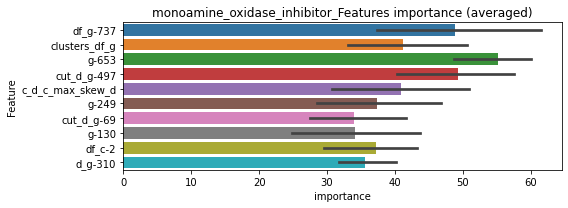

len(train_index) : 3863
len(valid_index) : 3863
================================= fold 1/2 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279483	valid_1's binary_logloss: 0.0657984
[200]	training's binary_logloss: 0.00601017	valid_1's binary_logloss: 0.0426401
[300]	training's binary_logloss: 0.00184963	valid_1's binary_logloss: 0.0371679
[400]	training's binary_logloss: 0.000842865	valid_1's binary_logloss: 0.0357229
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000854344	valid_1's binary_logloss: 0.0356864


len(train_index) : 3863
len(valid_index) : 3863
================================= fold 2/2 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.031357	valid_1's binary_logloss: 0.0618731
[200]	training's binary_logloss: 0.0067438	valid_1's binary_logloss: 0.0377015
[300]	training's binary_logloss: 0.00209404	valid_1's binary_logloss: 0.0317303
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00118964	valid_1's binary_logloss: 0.0309004


monoamine_oxidase_inhibitor logloss: 0.03329343594783801


neg labels: 3289 → selected neg labels: 3286


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214415	valid_1's binary_logloss: 0.0269698
[200]	training's binary_logloss: 0.00243616	valid_1's binary_logloss: 0.00408675
[300]	training's binary_logloss: 0.000709606	valid_1's binary_logloss: 0.00146645
[400]	training's binary_logloss: 0.00039093	valid_1's binary_logloss: 0.000913873
[500]	training's binary_logloss: 0.000322717	valid_1's binary_logloss: 0.000786877
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000318423	valid_1's binary_logloss: 0.000780373
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220155	valid_1's binary_logloss: 0.0270537
[200]	training's binary_logloss: 0.00258539	valid_1's binary_logloss: 0.00459065
[300]	training's binary_logloss: 0.000746061	valid_1's binary_logloss: 0.00178065
[400]	training's binary_logloss: 0.000405633	valid_1's binary_logloss: 0.00122871
[500]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0013196, Threshold: 0.0027064, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00244, conf_1:0.00298
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0027064
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0127064
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0227064
threshold: 0.0227064, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217351	valid_1's binary_logloss: 0.026673
[200]	training's binary_logloss: 0.00244374	valid_1's binary_logloss: 0.00390547
[300]	training's binary_logloss: 0.000699479	valid_1's binary_logloss: 0.00131102
[400]	training's binary_logloss: 0.000386729	valid_1's binary_logloss: 0.000795955
[500]	training's binary_logloss: 0.000318829	valid_1's binary_logloss: 0.000684078
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000313782	valid_1's binary_logloss: 0.000677968
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217847	valid_1's binary_logloss: 0.0271018
[200]	training's binary_logloss: 0.00245426	valid_1's binary_logloss: 0.00433874
[300]	training's binary_logloss: 0.000702514	valid_1's binary_logloss: 0.00179468
[400]	training's binary_logloss: 0.000387828	valid_1's binary_logloss: 0.00130729
Early stopping, best iteratio

2 / 3 AUC score:1.000
y_Threshold: 0.0781903, Threshold: 0.0227064, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, conf_0:0.02044, conf_1:0.02498
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0227064
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0327064
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.0427064
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.0527064
threshold: 0.0527064, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217351	valid_1's binary_logloss: 0.026673
[200]	training's binary_logloss: 0.00244374	valid_1's binary_logloss: 0.00390547
[300]	training's binary_logloss: 0.000699479	valid_1's binary_logloss: 0.00131102
[400]	training's binary_logloss: 0.000386729	valid_1's binary_logloss: 0.000795955
[500]	training's binary_logloss: 0.000318829	valid_1's binary_logloss: 0.000684078
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000313782	valid_1's binary_logloss: 0.000677968
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217847	valid_1's binary_logloss: 0.0271018
[200]	training's binary_logloss: 0.00245426	valid_1's binary_logloss: 0.00433874
[300]	training's binary_logloss: 0.000702514	valid_1's binary_logloss: 0.00179468
[400]	training's binary_logloss: 0.000387828	valid_1's binary_logloss: 0.00130729
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0781903, Threshold: 0.0527064, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.04744, conf_1:0.05798
threshold: 0.0527064, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


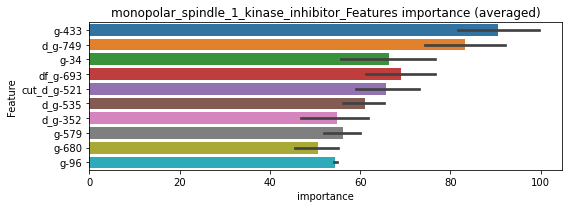

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111263	valid_1's binary_logloss: 0.018766
[200]	training's binary_logloss: 0.00122665	valid_1's binary_logloss: 0.00789661
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00038393	valid_1's binary_logloss: 0.00692542


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116432	valid_1's binary_logloss: 0.0155519
[200]	training's binary_logloss: 0.0013635	valid_1's binary_logloss: 0.00319018
[300]	training's binary_logloss: 0.000398837	valid_1's binary_logloss: 0.00181718
[400]	training's binary_logloss: 0.000212144	valid_1's binary_logloss: 0.00157631
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000215772	valid_1's binary_logloss: 0.00157224


monopolar_spindle_1_kinase_inhibitor logloss: 0.004249170962605572


neg labels: 3289 → selected neg labels: 3267


mtor_inhibitor, len(trt): 130, len(othr): 3267, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336164	valid_1's binary_logloss: 0.0866507
[200]	training's binary_logloss: 0.00568092	valid_1's binary_logloss: 0.0656475
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.00463634	valid_1's binary_logloss: 0.0646499
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0367821	valid_1's binary_logloss: 0.0815892
[200]	training's binary_logloss: 0.00637485	valid_1's binary_logloss: 0.0555869
[300]	training's binary_logloss: 0.00190029	valid_1's binary_logloss: 0.0479847
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000996907	valid_1's binary_logloss: 0.0451999


1 / 3 AUC score:0.997
y_Threshold: 0.0082322, Threshold: 0.0717048, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 145 → Positive_corect_labels: 646/3775
p_label_rate: 0.0200904 Vs.target_rate: 0.00546
Num_p_label: 80.0, conf_0:0.06453, conf_1:0.07888
Num_p_label: 80.0, Expected: 21.7, Adj_threshold_1: 0.0717048
Num_p_label: 75.0, Expected: 21.7, Adj_threshold_2: 0.0817048
Num_p_label: 72.0, Expected: 21.7, Adj_threshold_3: 0.0917048
Num_p_label: 70.0, Expected: 21.7, Adj_threshold_4: 0.1017048
Num_p_label: 66.0, Expected: 21.7, Adj_threshold_5: 0.1117048
Num_p_label: 64.0, Expected: 21.7, Adj_threshold_6: 0.1217048
Num_p_label: 62.0, Expected: 21.7, Adj_threshold_7: 0.1317048
Num_p_label: 61.0, Expected: 21.7, Adj_threshold_8: 0.1417048
Num_p_label: 61.0, Expected: 21.7, Adj_threshold_9: 0.1517048
Num_p_label: 61.0, Expected: 21.7, Adj_threshold_10: 0.1617048
threshold: 0.1717048, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 646.0/3775, y_label_rate: 0.1711258

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0334642	valid_1's binary_logloss: 0.0571353
[200]	training's binary_logloss: 0.00511447	valid_1's binary_logloss: 0.0344502
[300]	training's binary_logloss: 0.00152904	valid_1's binary_logloss: 0.0304261
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00141104	valid_1's binary_logloss: 0.0302472
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0313031	valid_1's binary_logloss: 0.0952664
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00887421	valid_1's binary_logloss: 0.0802438


2 / 3 AUC score:0.994
y_Threshold: 0.0380755, Threshold: 0.1717048, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 46 → Positive_corect_labels: 623.0/3729
p_label_rate: 0.0364139 Vs.target_rate: 0.00546
Num_p_label: 145.0, conf_0:0.15453, conf_1:0.18888
Num_p_label: 145.0, Expected: 21.7, Adj_threshold_1: 0.1717048
Num_p_label: 137.0, Expected: 21.7, Adj_threshold_2: 0.1817048
Num_p_label: 135.0, Expected: 21.7, Adj_threshold_3: 0.1917048
Num_p_label: 131.0, Expected: 21.7, Adj_threshold_4: 0.2017048
Num_p_label: 129.0, Expected: 21.7, Adj_threshold_5: 0.2117048
Num_p_label: 120.0, Expected: 21.7, Adj_threshold_6: 0.2217048
Num_p_label: 114.0, Expected: 21.7, Adj_threshold_7: 0.2317048
Num_p_label: 111.0, Expected: 21.7, Adj_threshold_8: 0.2417048
Num_p_label: 103.0, Expected: 21.7, Adj_threshold_9: 0.2517048
Num_p_label: 100.0, Expected: 21.7, Adj_threshold_10: 0.2617048
threshold: 0.2717048, positive_p_label: 95.0/3982, p_label_rate: 0.0238574
positive_y_label: 623.0/3729, y_label_rat

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288405	valid_1's binary_logloss: 0.0614185
[200]	training's binary_logloss: 0.00416564	valid_1's binary_logloss: 0.0422362
[300]	training's binary_logloss: 0.00120426	valid_1's binary_logloss: 0.0388052
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00106684	valid_1's binary_logloss: 0.0385739
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286532	valid_1's binary_logloss: 0.0647036
[200]	training's binary_logloss: 0.00409666	valid_1's binary_logloss: 0.0448821
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00259892	valid_1's binary_logloss: 0.043291


3 / 3 AUC score:0.999
y_Threshold: 0.0269133, Threshold: 0.2717048, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 609.0/3701
p_label_rate: 0.0376695 Vs.target_rate: 0.00546
Num_p_label: 150.0, conf_0:0.24453, conf_1:0.29888
Num_p_label: 150.0, Expected: 21.7, Adj_threshold_1: 0.2717048
Num_p_label: 149.0, Expected: 21.7, Adj_threshold_2: 0.2817048
Num_p_label: 148.0, Expected: 21.7, Adj_threshold_3: 0.2917048
Num_p_label: 146.0, Expected: 21.7, Adj_threshold_4: 0.3017048
Num_p_label: 144.0, Expected: 21.7, Adj_threshold_5: 0.3117048
Num_p_label: 142.0, Expected: 21.7, Adj_threshold_6: 0.3217048
Num_p_label: 137.0, Expected: 21.7, Adj_threshold_7: 0.3317048
Num_p_label: 134.0, Expected: 21.7, Adj_threshold_8: 0.3417048
Num_p_label: 131.0, Expected: 21.7, Adj_threshold_9: 0.3517048
Num_p_label: 128.0, Expected: 21.7, Adj_threshold_10: 0.3617048
threshold: 0.3717048, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 731.0/7683, y_label_ra

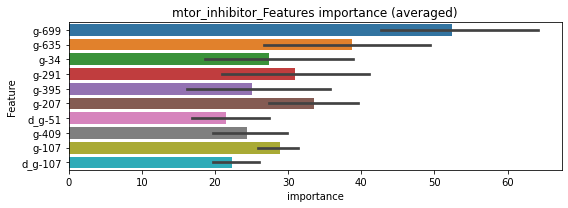

len(train_index) : 3841
len(valid_index) : 3842
================================= fold 1/2 mtor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184713	valid_1's binary_logloss: 0.0357554
[200]	training's binary_logloss: 0.00288552	valid_1's binary_logloss: 0.0220176
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00150783	valid_1's binary_logloss: 0.0208167


len(train_index) : 3842
len(valid_index) : 3841
================================= fold 2/2 mtor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184177	valid_1's binary_logloss: 0.045105
[200]	training's binary_logloss: 0.00289412	valid_1's binary_logloss: 0.0348892
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00172813	valid_1's binary_logloss: 0.0341131


mtor_inhibitor logloss: 0.027464016124547196


neg labels: 3289 → selected neg labels: 3281


mucolytic_agent, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0402484	valid_1's binary_logloss: 0.0771251
[200]	training's binary_logloss: 0.0070441	valid_1's binary_logloss: 0.0366085
[300]	training's binary_logloss: 0.00205337	valid_1's binary_logloss: 0.0283856
[400]	training's binary_logloss: 0.00099237	valid_1's binary_logloss: 0.0261701
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000778867	valid_1's binary_logloss: 0.0249175
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.04313	valid_1's binary_logloss: 0.0689041
[200]	training's binary_logloss: 0.00806572	valid_1's binary_logloss: 0.0254187
[300]	training's binary_logloss: 0.00236267	valid_1's binary_logloss: 0.0153444
[400]	training's binary_logloss: 0.00111473	valid_1's binary_logloss: 0.0123489
[500]	training's binary_logloss: 0.000702898	valid_1's binary_logloss: 0.01074
Early stopping, best iteration is:
[589]	trainin

1 / 3 AUC score:1.000
y_Threshold: 0.0043968, Threshold: 0.0064154, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00577, conf_1:0.00706
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0064154
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_2: 0.0164154
threshold: 0.0164154, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0404541	valid_1's binary_logloss: 0.0722653
[200]	training's binary_logloss: 0.00706465	valid_1's binary_logloss: 0.0327257
[300]	training's binary_logloss: 0.00206244	valid_1's binary_logloss: 0.0239178
[400]	training's binary_logloss: 0.000985904	valid_1's binary_logloss: 0.0214725
[500]	training's binary_logloss: 0.000638166	valid_1's binary_logloss: 0.0204621
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000640044	valid_1's binary_logloss: 0.0204464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421595	valid_1's binary_logloss: 0.0664198
[200]	training's binary_logloss: 0.00744772	valid_1's binary_logloss: 0.0226657
[300]	training's binary_logloss: 0.00224733	valid_1's binary_logloss: 0.0133651
[400]	training's binary_logloss: 0.00107255	valid_1's binary_logloss: 0.0104846
[500]	training's binary_logloss: 0.0006831

2 / 3 AUC score:1.000
y_Threshold: 0.0198652, Threshold: 0.0164154, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0095429 Vs.target_rate: 0.00202
Num_p_label: 38.0, conf_0:0.01477, conf_1:0.01806
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_1: 0.0164154
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.0264154
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_3: 0.0364154
threshold: 0.0364154, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0408657	valid_1's binary_logloss: 0.0710365
[200]	training's binary_logloss: 0.00717316	valid_1's binary_logloss: 0.0329964
[300]	training's binary_logloss: 0.002116	valid_1's binary_logloss: 0.0248634
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00127729	valid_1's binary_logloss: 0.0228152
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411126	valid_1's binary_logloss: 0.0626406
[200]	training's binary_logloss: 0.00730942	valid_1's binary_logloss: 0.0204877
[300]	training's binary_logloss: 0.00218616	valid_1's binary_logloss: 0.0118234
[400]	training's binary_logloss: 0.00104053	valid_1's binary_logloss: 0.00897507
[500]	training's binary_logloss: 0.000661271	valid_1's binary_logloss: 0.00780837
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.00748736


3 / 3 AUC score:1.000
y_Threshold: 0.0229849, Threshold: 0.0364154, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, conf_0:0.03277, conf_1:0.04006
threshold: 0.0364154, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 665.0/7781, y_label_rate: 0.0854646


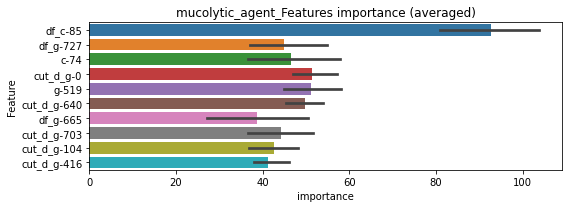

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 mucolytic_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220886	valid_1's binary_logloss: 0.0445098
[200]	training's binary_logloss: 0.00384304	valid_1's binary_logloss: 0.0218929
[300]	training's binary_logloss: 0.00112961	valid_1's binary_logloss: 0.0169366
[400]	training's binary_logloss: 0.000532584	valid_1's binary_logloss: 0.0155626
[500]	training's binary_logloss: 0.000338939	valid_1's binary_logloss: 0.0147577
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000322142	valid_1's binary_logloss: 0.0146782


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 mucolytic_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231473	valid_1's binary_logloss: 0.0396452
[200]	training's binary_logloss: 0.00416276	valid_1's binary_logloss: 0.0159373
[300]	training's binary_logloss: 0.0012006	valid_1's binary_logloss: 0.0109086
[400]	training's binary_logloss: 0.000558809	valid_1's binary_logloss: 0.00960805
[500]	training's binary_logloss: 0.000354295	valid_1's binary_logloss: 0.00904217
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000350675	valid_1's binary_logloss: 0.00900069


mucolytic_agent logloss: 0.011839785423984794


neg labels: 3289 → selected neg labels: 3283


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326028	valid_1's binary_logloss: 0.0564699
[200]	training's binary_logloss: 0.00520782	valid_1's binary_logloss: 0.0220182
[300]	training's binary_logloss: 0.00154645	valid_1's binary_logloss: 0.0151238
[400]	training's binary_logloss: 0.000769091	valid_1's binary_logloss: 0.0129648
[500]	training's binary_logloss: 0.000517648	valid_1's binary_logloss: 0.0119655
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000468865	valid_1's binary_logloss: 0.0118184
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0353068	valid_1's binary_logloss: 0.053189
[200]	training's binary_logloss: 0.00565211	valid_1's binary_logloss: 0.0147569
[300]	training's binary_logloss: 0.00165733	valid_1's binary_logloss: 0.00802152
[400]	training's binary_logloss: 0.000813573	valid_1's binary_logloss: 0.00620543
[500]	training's binary_logloss: 0.00053

1 / 3 AUC score:1.000
y_Threshold: 0.0025270, Threshold: 0.0044613, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00402, conf_1:0.00491
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0044613
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_2: 0.0144613
threshold: 0.0144613, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0332618	valid_1's binary_logloss: 0.0578755
[200]	training's binary_logloss: 0.00518341	valid_1's binary_logloss: 0.0217797
[300]	training's binary_logloss: 0.00154598	valid_1's binary_logloss: 0.0145481
[400]	training's binary_logloss: 0.000767579	valid_1's binary_logloss: 0.0122197
[500]	training's binary_logloss: 0.000518005	valid_1's binary_logloss: 0.0112905
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000507583	valid_1's binary_logloss: 0.0112553
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361445	valid_1's binary_logloss: 0.0558864
[200]	training's binary_logloss: 0.0056768	valid_1's binary_logloss: 0.0148664
[300]	training's binary_logloss: 0.00165273	valid_1's binary_logloss: 0.00752335
[400]	training's binary_logloss: 0.000810029	valid_1's binary_logloss: 0.00564044
[500]	training's binary_logloss: 0.00053

2 / 3 AUC score:1.000
y_Threshold: 0.0155768, Threshold: 0.0144613, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0095429 Vs.target_rate: 0.00155
Num_p_label: 38.0, conf_0:0.01302, conf_1:0.01591
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_1: 0.0144613
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0244613
Num_p_label: 9.0, Expected: 6.2, Adj_threshold_3: 0.0344613
threshold: 0.0344613, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0332618	valid_1's binary_logloss: 0.0578755
[200]	training's binary_logloss: 0.00518341	valid_1's binary_logloss: 0.0217797
[300]	training's binary_logloss: 0.00154598	valid_1's binary_logloss: 0.0145481
[400]	training's binary_logloss: 0.000767579	valid_1's binary_logloss: 0.0122197
[500]	training's binary_logloss: 0.000518005	valid_1's binary_logloss: 0.0112905
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000507583	valid_1's binary_logloss: 0.0112553
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361445	valid_1's binary_logloss: 0.0558864
[200]	training's binary_logloss: 0.0056768	valid_1's binary_logloss: 0.0148664
[300]	training's binary_logloss: 0.00165273	valid_1's binary_logloss: 0.00752335
[400]	training's binary_logloss: 0.000810029	valid_1's binary_logloss: 0.00564044
[500]	training's binary_logloss: 0.00053

3 / 3 AUC score:1.000
y_Threshold: 0.0155768, Threshold: 0.0344613, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00155
Num_p_label: 9.0, conf_0:0.03102, conf_1:0.03791
threshold: 0.0344613, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 665.0/7789, y_label_rate: 0.0853768


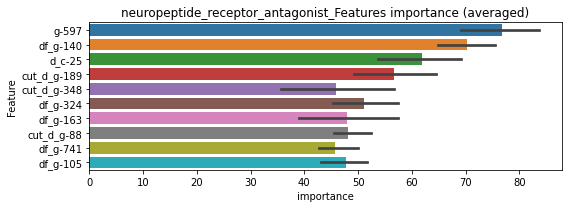

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186456	valid_1's binary_logloss: 0.0347317
[200]	training's binary_logloss: 0.00297129	valid_1's binary_logloss: 0.0158704
[300]	training's binary_logloss: 0.000826305	valid_1's binary_logloss: 0.0128395
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00055328	valid_1's binary_logloss: 0.0124866


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019232	valid_1's binary_logloss: 0.0332229
[200]	training's binary_logloss: 0.00308284	valid_1's binary_logloss: 0.0133109
[300]	training's binary_logloss: 0.000880697	valid_1's binary_logloss: 0.00995056
[400]	training's binary_logloss: 0.000426004	valid_1's binary_logloss: 0.00910092
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000333186	valid_1's binary_logloss: 0.00880627


neuropeptide_receptor_antagonist logloss: 0.01064666761690179


neg labels: 3289 → selected neg labels: 3270


nfkb_inhibitor, len(trt): 832, len(othr): 3270, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0540076	valid_1's binary_logloss: 0.11914
Early stopping, best iteration is:
[121]	training's binary_logloss: 0.0375751	valid_1's binary_logloss: 0.116306
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0473635	valid_1's binary_logloss: 0.150336
Early stopping, best iteration is:
[103]	training's binary_logloss: 0.0446508	valid_1's binary_logloss: 0.150304


1 / 3 AUC score:0.939
y_Threshold: 0.0339213, Threshold: 0.9620806, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 400 → Positive_corect_labels: 738/3702
p_label_rate: 0.0200904 Vs.target_rate: 0.03494
Num_p_label: 80.0, conf_0:0.86587, conf_1:1.05829
threshold: 0.9620806, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 738.0/3702, y_label_rate: 0.1993517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214664	valid_1's binary_logloss: 0.0271897
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00285593	valid_1's binary_logloss: 0.0152379
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203481	valid_1's binary_logloss: 0.0327425
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00433912	valid_1's binary_logloss: 0.0234861


2 / 3 AUC score:0.997
y_Threshold: 0.0722024, Threshold: 0.9620806, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 20 → Positive_corect_labels: 728.0/3682
p_label_rate: 0.0386740 Vs.target_rate: 0.03494
Num_p_label: 154.0, conf_0:0.86587, conf_1:1.05829
threshold: 0.9620806, positive_p_label: 154.0/3982, p_label_rate: 0.0386740
positive_y_label: 728.0/3682, y_label_rate: 0.1977186
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0170594	valid_1's binary_logloss: 0.0168684
[200]	training's binary_logloss: 0.0012876	valid_1's binary_logloss: 0.00117347
[300]	training's binary_logloss: 0.000313184	valid_1's binary_logloss: 0.000262795
[400]	training's binary_logloss: 0.000190346	valid_1's binary_logloss: 0.000162663
[500]	training's binary_logloss: 0.00015984	valid_1's binary_logloss: 0.000139998
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000151968	valid_1's binary_logloss: 0.000134331
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162181	valid_1's binary_logloss: 0.0210841
[200]	training's binary_logloss: 0.00108551	valid_1's binary_logloss: 0.00764094
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.000689515	valid_1's binary_logloss: 0.00751635


3 / 3 AUC score:1.000
y_Threshold: 0.0113827, Threshold: 0.9620806, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 4 → Positive_corect_labels: 726.0/3678
p_label_rate: 0.0399297 Vs.target_rate: 0.03494
Num_p_label: 159.0, conf_0:0.86587, conf_1:1.05829
threshold: 0.9620806, positive_p_label: 159.0/3982, p_label_rate: 0.0399297
positive_y_label: 885.0/7660, y_label_rate: 0.1155352


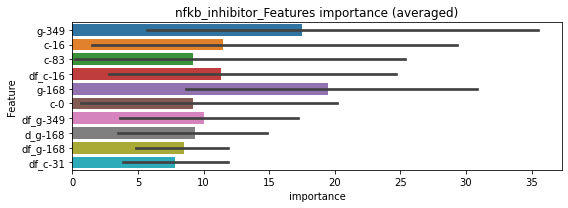

len(train_index) : 3830
len(valid_index) : 3830
================================= fold 1/2 nfkb_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0109469	valid_1's binary_logloss: 0.0125046
[200]	training's binary_logloss: 0.000769071	valid_1's binary_logloss: 0.00255281
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.000218375	valid_1's binary_logloss: 0.00208129


len(train_index) : 3830
len(valid_index) : 3830
================================= fold 2/2 nfkb_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112449	valid_1's binary_logloss: 0.011778
[200]	training's binary_logloss: 0.000830301	valid_1's binary_logloss: 0.00174615
[300]	training's binary_logloss: 0.000176648	valid_1's binary_logloss: 0.00107017
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000135324	valid_1's binary_logloss: 0.00100116


nfkb_inhibitor logloss: 0.0015412261105803684


neg labels: 3289 → selected neg labels: 3287


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192994	valid_1's binary_logloss: 0.0242318
[200]	training's binary_logloss: 0.00203408	valid_1's binary_logloss: 0.00453303
[300]	training's binary_logloss: 0.00058353	valid_1's binary_logloss: 0.00222614
[400]	training's binary_logloss: 0.000332039	valid_1's binary_logloss: 0.00178213
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000289858	valid_1's binary_logloss: 0.00170129
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191745	valid_1's binary_logloss: 0.0232633
[200]	training's binary_logloss: 0.00201861	valid_1's binary_logloss: 0.00360147
[300]	training's binary_logloss: 0.000587428	valid_1's binary_logloss: 0.0015704
[400]	training's binary_logloss: 0.000333998	valid_1's binary_logloss: 0.00114683
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000292881	valid_1's binary_logloss: 0.0010856

1 / 3 AUC score:1.000
y_Threshold: 0.0009218, Threshold: 0.0018085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00163, conf_1:0.00199
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0018085
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0118085
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_3: 0.0218085
threshold: 0.0218085, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01953	valid_1's binary_logloss: 0.0249521
[200]	training's binary_logloss: 0.00200158	valid_1's binary_logloss: 0.00544172
[300]	training's binary_logloss: 0.000569568	valid_1's binary_logloss: 0.00312117
[400]	training's binary_logloss: 0.000324769	valid_1's binary_logloss: 0.00256045
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000291358	valid_1's binary_logloss: 0.00247807
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193916	valid_1's binary_logloss: 0.0219411
[200]	training's binary_logloss: 0.00199475	valid_1's binary_logloss: 0.0027977
[300]	training's binary_logloss: 0.000571644	valid_1's binary_logloss: 0.000968873
[400]	training's binary_logloss: 0.000326534	valid_1's binary_logloss: 0.000629783
[500]	training's binary_logloss: 0.000286662	valid_1's binary_logloss: 0.00057534
Early stopping, best iteration i

2 / 3 AUC score:1.000
y_Threshold: 0.0484868, Threshold: 0.0218085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, conf_0:0.01963, conf_1:0.02399
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.0218085
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0318085
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.0418085
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.0518085
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_5: 0.0618085
threshold: 0.0618085, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01953	valid_1's binary_logloss: 0.0249521
[200]	training's binary_logloss: 0.00200158	valid_1's binary_logloss: 0.00544172
[300]	training's binary_logloss: 0.000569568	valid_1's binary_logloss: 0.00312117
[400]	training's binary_logloss: 0.000324769	valid_1's binary_logloss: 0.00256045
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000291358	valid_1's binary_logloss: 0.00247807
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193916	valid_1's binary_logloss: 0.0219411
[200]	training's binary_logloss: 0.00199475	valid_1's binary_logloss: 0.0027977
[300]	training's binary_logloss: 0.000571644	valid_1's binary_logloss: 0.000968873
[400]	training's binary_logloss: 0.000326534	valid_1's binary_logloss: 0.000629783
[500]	training's binary_logloss: 0.000286662	valid_1's binary_logloss: 0.00057534
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0484868, Threshold: 0.0618085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.05563, conf_1:0.06799
threshold: 0.0618085, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7794, y_label_rate: 0.0846805


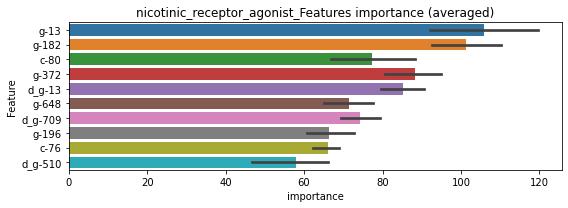

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101335	valid_1's binary_logloss: 0.0153114
[200]	training's binary_logloss: 0.00104208	valid_1's binary_logloss: 0.00490507
[300]	training's binary_logloss: 0.000297363	valid_1's binary_logloss: 0.00404488
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000222864	valid_1's binary_logloss: 0.00393904


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102148	valid_1's binary_logloss: 0.0144996
[200]	training's binary_logloss: 0.00104195	valid_1's binary_logloss: 0.00535734
[300]	training's binary_logloss: 0.000296359	valid_1's binary_logloss: 0.00419321
[400]	training's binary_logloss: 0.000168427	valid_1's binary_logloss: 0.00397305
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000159889	valid_1's binary_logloss: 0.00395421


nicotinic_receptor_agonist logloss: 0.003946624141830523


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289488	valid_1's binary_logloss: 0.0440169
[200]	training's binary_logloss: 0.00405116	valid_1's binary_logloss: 0.0111995
[300]	training's binary_logloss: 0.00116517	valid_1's binary_logloss: 0.00512973
[400]	training's binary_logloss: 0.000598286	valid_1's binary_logloss: 0.00359156
[500]	training's binary_logloss: 0.000427624	valid_1's binary_logloss: 0.00310394
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000402879	valid_1's binary_logloss: 0.00304546
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291162	valid_1's binary_logloss: 0.0410973
[200]	training's binary_logloss: 0.004029	valid_1's binary_logloss: 0.0105204
[300]	training's binary_logloss: 0.00116067	valid_1's binary_logloss: 0.00548432
[400]	training's binary_logloss: 0.000592994	valid_1's binary_logloss: 0.0040936
[500]	training's binary_logloss: 0.000

1 / 3 AUC score:1.000
y_Threshold: 0.0022587, Threshold: 0.0037019, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00333, conf_1:0.00407
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0037019
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0137019
threshold: 0.0137019, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286186	valid_1's binary_logloss: 0.043119
[200]	training's binary_logloss: 0.00390196	valid_1's binary_logloss: 0.0109386
[300]	training's binary_logloss: 0.00113367	valid_1's binary_logloss: 0.00533832
[400]	training's binary_logloss: 0.000580217	valid_1's binary_logloss: 0.00381307
[500]	training's binary_logloss: 0.000417882	valid_1's binary_logloss: 0.00328225
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000404355	valid_1's binary_logloss: 0.00325425
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290283	valid_1's binary_logloss: 0.0389391
[200]	training's binary_logloss: 0.00393343	valid_1's binary_logloss: 0.00979379
[300]	training's binary_logloss: 0.00114342	valid_1's binary_logloss: 0.00532615
[400]	training's binary_logloss: 0.000588929	valid_1's binary_logloss: 0.00421074
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0376591, Threshold: 0.0137019, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0070316 Vs.target_rate: 0.00109
Num_p_label: 28.0, conf_0:0.01233, conf_1:0.01507
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_1: 0.0137019
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0237019
Num_p_label: 4.0, Expected: 4.3, Adj_threshold_3: 0.0337019
threshold: 0.0337019, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286186	valid_1's binary_logloss: 0.043119
[200]	training's binary_logloss: 0.00390196	valid_1's binary_logloss: 0.0109386
[300]	training's binary_logloss: 0.00113367	valid_1's binary_logloss: 0.00533832
[400]	training's binary_logloss: 0.000580217	valid_1's binary_logloss: 0.00381307
[500]	training's binary_logloss: 0.000417882	valid_1's binary_logloss: 0.00328225
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000404355	valid_1's binary_logloss: 0.00325425
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290283	valid_1's binary_logloss: 0.0389391
[200]	training's binary_logloss: 0.00393343	valid_1's binary_logloss: 0.00979379
[300]	training's binary_logloss: 0.00114342	valid_1's binary_logloss: 0.00532615
[400]	training's binary_logloss: 0.000588929	valid_1's binary_logloss: 0.00421074
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0376591, Threshold: 0.0337019, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00109
Num_p_label: 4.0, conf_0:0.03033, conf_1:0.03707
threshold: 0.0337019, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7792, y_label_rate: 0.0848306


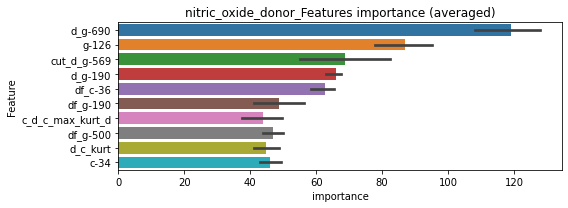

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 nitric_oxide_donor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154454	valid_1's binary_logloss: 0.025768
[200]	training's binary_logloss: 0.00204337	valid_1's binary_logloss: 0.00932351
[300]	training's binary_logloss: 0.000571044	valid_1's binary_logloss: 0.00685263
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000383523	valid_1's binary_logloss: 0.00644498


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 nitric_oxide_donor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016069	valid_1's binary_logloss: 0.0285529
[200]	training's binary_logloss: 0.00217167	valid_1's binary_logloss: 0.0112606
[300]	training's binary_logloss: 0.000619169	valid_1's binary_logloss: 0.00800626
[400]	training's binary_logloss: 0.000306467	valid_1's binary_logloss: 0.00698381
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000227656	valid_1's binary_logloss: 0.00668713


nitric_oxide_donor logloss: 0.006566052153455195


neg labels: 3289 → selected neg labels: 3284


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3284, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306243	valid_1's binary_logloss: 0.0483511
[200]	training's binary_logloss: 0.00446868	valid_1's binary_logloss: 0.0168289
[300]	training's binary_logloss: 0.00131695	valid_1's binary_logloss: 0.0109416
[400]	training's binary_logloss: 0.000669393	valid_1's binary_logloss: 0.00919
[500]	training's binary_logloss: 0.000477589	valid_1's binary_logloss: 0.00863889
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000467148	valid_1's binary_logloss: 0.00860986
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324066	valid_1's binary_logloss: 0.0474064
[200]	training's binary_logloss: 0.00494262	valid_1's binary_logloss: 0.0122212
[300]	training's binary_logloss: 0.00143769	valid_1's binary_logloss: 0.00640946
[400]	training's binary_logloss: 0.000714261	valid_1's binary_logloss: 0.00487248
Early stopping, best iteration is:
[466

1 / 3 AUC score:1.000
y_Threshold: 0.0020832, Threshold: 0.1525894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00122
Num_p_label: 80.0, conf_0:0.13733, conf_1:0.16785
Num_p_label: 80.0, Expected: 4.8, Adj_threshold_1: 0.1525894
Num_p_label: 77.0, Expected: 4.8, Adj_threshold_2: 0.1625894
Num_p_label: 77.0, Expected: 4.8, Adj_threshold_3: 0.1725894
Num_p_label: 75.0, Expected: 4.8, Adj_threshold_4: 0.1825894
Num_p_label: 71.0, Expected: 4.8, Adj_threshold_5: 0.1925894
Num_p_label: 70.0, Expected: 4.8, Adj_threshold_6: 0.2025894
Num_p_label: 68.0, Expected: 4.8, Adj_threshold_7: 0.2125894
Num_p_label: 67.0, Expected: 4.8, Adj_threshold_8: 0.2225894
Num_p_label: 63.0, Expected: 4.8, Adj_threshold_9: 0.2325894
Num_p_label: 63.0, Expected: 4.8, Adj_threshold_10: 0.2425894
threshold: 0.2525894, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307308	valid_1's binary_logloss: 0.0464646
[200]	training's binary_logloss: 0.00433162	valid_1's binary_logloss: 0.0141861
[300]	training's binary_logloss: 0.00127349	valid_1's binary_logloss: 0.00870832
[400]	training's binary_logloss: 0.00064643	valid_1's binary_logloss: 0.00732699
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000484062	valid_1's binary_logloss: 0.00689078
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317193	valid_1's binary_logloss: 0.0452829
[200]	training's binary_logloss: 0.00467739	valid_1's binary_logloss: 0.0110413
[300]	training's binary_logloss: 0.00134904	valid_1's binary_logloss: 0.00601784
[400]	training's binary_logloss: 0.000683343	valid_1's binary_logloss: 0.00465447
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000524929	valid_1's binary_logloss: 0.00418938


2 / 3 AUC score:1.000
y_Threshold: 0.0523179, Threshold: 0.2525894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0276243 Vs.target_rate: 0.00122
Num_p_label: 110.0, conf_0:0.22733, conf_1:0.27785
Num_p_label: 110.0, Expected: 4.8, Adj_threshold_1: 0.2525894
Num_p_label: 108.0, Expected: 4.8, Adj_threshold_2: 0.2625894
Num_p_label: 107.0, Expected: 4.8, Adj_threshold_3: 0.2725894
Num_p_label: 106.0, Expected: 4.8, Adj_threshold_4: 0.2825894
Num_p_label: 103.0, Expected: 4.8, Adj_threshold_5: 0.2925894
Num_p_label: 102.0, Expected: 4.8, Adj_threshold_6: 0.3025894
Num_p_label: 102.0, Expected: 4.8, Adj_threshold_7: 0.3125894
Num_p_label: 102.0, Expected: 4.8, Adj_threshold_8: 0.3225894
Num_p_label: 101.0, Expected: 4.8, Adj_threshold_9: 0.3325894
Num_p_label: 100.0, Expected: 4.8, Adj_threshold_10: 0.3425894
threshold: 0.3525894, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 655.0/3806, y_label_rate: 0.17209

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0300186	valid_1's binary_logloss: 0.0418693
[200]	training's binary_logloss: 0.00435145	valid_1's binary_logloss: 0.010138
[300]	training's binary_logloss: 0.00129435	valid_1's binary_logloss: 0.00486341
[400]	training's binary_logloss: 0.000654245	valid_1's binary_logloss: 0.00346236
[500]	training's binary_logloss: 0.000465788	valid_1's binary_logloss: 0.00299089
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000447463	valid_1's binary_logloss: 0.00296376
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316181	valid_1's binary_logloss: 0.0499434
[200]	training's binary_logloss: 0.00451192	valid_1's binary_logloss: 0.0136109
[300]	training's binary_logloss: 0.00130289	valid_1's binary_logloss: 0.00789298
[400]	training's binary_logloss: 0.000650366	valid_1's binary_logloss: 0.00622265
[500]	training's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0724792, Threshold: 0.3525894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0246107 Vs.target_rate: 0.00122
Num_p_label: 98.0, conf_0:0.31733, conf_1:0.38785
Num_p_label: 98.0, Expected: 4.8, Adj_threshold_1: 0.3525894
Num_p_label: 97.0, Expected: 4.8, Adj_threshold_2: 0.3625894
Num_p_label: 97.0, Expected: 4.8, Adj_threshold_3: 0.3725894
Num_p_label: 95.0, Expected: 4.8, Adj_threshold_4: 0.3825894
Num_p_label: 95.0, Expected: 4.8, Adj_threshold_5: 0.3925894
Num_p_label: 94.0, Expected: 4.8, Adj_threshold_6: 0.4025894
Num_p_label: 94.0, Expected: 4.8, Adj_threshold_7: 0.4125894
Num_p_label: 94.0, Expected: 4.8, Adj_threshold_8: 0.4225894
Num_p_label: 94.0, Expected: 4.8, Adj_threshold_9: 0.4325894
Num_p_label: 92.0, Expected: 4.8, Adj_threshold_10: 0.4425894
threshold: 0.4525894, positive_p_label: 92.0/3982, p_label_rate: 0.0231040
positive_y_label: 747.0/7788, y_label_rate: 0.0959168


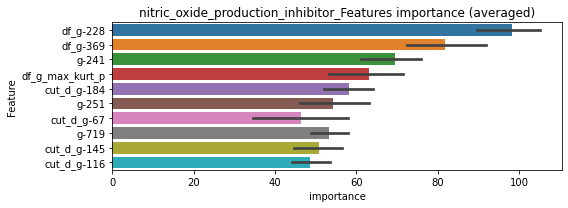

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019422	valid_1's binary_logloss: 0.0343919
[200]	training's binary_logloss: 0.002913	valid_1's binary_logloss: 0.0154295
[300]	training's binary_logloss: 0.000820937	valid_1's binary_logloss: 0.0125366
[400]	training's binary_logloss: 0.000393421	valid_1's binary_logloss: 0.0112517
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000336183	valid_1's binary_logloss: 0.0111318


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193618	valid_1's binary_logloss: 0.0314626
[200]	training's binary_logloss: 0.00294275	valid_1's binary_logloss: 0.0122999
[300]	training's binary_logloss: 0.000817467	valid_1's binary_logloss: 0.00870077
[400]	training's binary_logloss: 0.000398066	valid_1's binary_logloss: 0.00779241
[500]	training's binary_logloss: 0.000273909	valid_1's binary_logloss: 0.00746081
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000265931	valid_1's binary_logloss: 0.00744973


nitric_oxide_production_inhibitor logloss: 0.009290784727346063


neg labels: 3289 → selected neg labels: 3284


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3284, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292147	valid_1's binary_logloss: 0.0472176
[200]	training's binary_logloss: 0.00405824	valid_1's binary_logloss: 0.0145182
[300]	training's binary_logloss: 0.00116795	valid_1's binary_logloss: 0.00882449
[400]	training's binary_logloss: 0.000592217	valid_1's binary_logloss: 0.00722538
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000445221	valid_1's binary_logloss: 0.0067961
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293323	valid_1's binary_logloss: 0.0432469
[200]	training's binary_logloss: 0.00407611	valid_1's binary_logloss: 0.0134859
[300]	training's binary_logloss: 0.0011756	valid_1's binary_logloss: 0.00893515
[400]	training's binary_logloss: 0.000597452	valid_1's binary_logloss: 0.00773443
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000465786	valid_1's binary_logloss: 0.00746464


1 / 3 AUC score:1.000
y_Threshold: 0.0021376, Threshold: 0.0029020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00261, conf_1:0.00319
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0029020
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0129020
threshold: 0.0129020, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288834	valid_1's binary_logloss: 0.0459535
[200]	training's binary_logloss: 0.00391386	valid_1's binary_logloss: 0.014157
[300]	training's binary_logloss: 0.00113355	valid_1's binary_logloss: 0.0085461
[400]	training's binary_logloss: 0.00058257	valid_1's binary_logloss: 0.00700901
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000476717	valid_1's binary_logloss: 0.00664762
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292468	valid_1's binary_logloss: 0.04266
[200]	training's binary_logloss: 0.00403089	valid_1's binary_logloss: 0.0131131
[300]	training's binary_logloss: 0.00117396	valid_1's binary_logloss: 0.00881039
[400]	training's binary_logloss: 0.000596917	valid_1's binary_logloss: 0.00776188
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000492377	valid_1's binary_logloss: 0.00750601


2 / 3 AUC score:1.000
y_Threshold: 0.0125734, Threshold: 0.0129020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00109
Num_p_label: 14.0, conf_0:0.01161, conf_1:0.01419
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_1: 0.0129020
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_2: 0.0229020
threshold: 0.0229020, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288834	valid_1's binary_logloss: 0.0459535
[200]	training's binary_logloss: 0.00391386	valid_1's binary_logloss: 0.014157
[300]	training's binary_logloss: 0.00113355	valid_1's binary_logloss: 0.0085461
[400]	training's binary_logloss: 0.00058257	valid_1's binary_logloss: 0.00700901
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000476717	valid_1's binary_logloss: 0.00664762
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292468	valid_1's binary_logloss: 0.04266
[200]	training's binary_logloss: 0.00403089	valid_1's binary_logloss: 0.0131131
[300]	training's binary_logloss: 0.00117396	valid_1's binary_logloss: 0.00881039
[400]	training's binary_logloss: 0.000596917	valid_1's binary_logloss: 0.00776188
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000492377	valid_1's binary_logloss: 0.00750601


3 / 3 AUC score:1.000
y_Threshold: 0.0125734, Threshold: 0.0229020, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, conf_0:0.02061, conf_1:0.02519
threshold: 0.0229020, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 664.0/7790, y_label_rate: 0.0852375


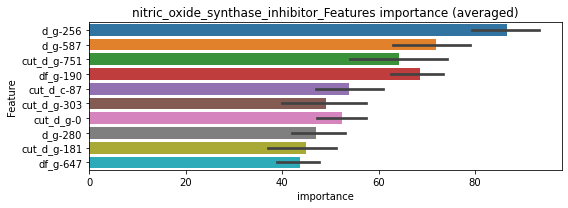

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156665	valid_1's binary_logloss: 0.0284863
[200]	training's binary_logloss: 0.00213786	valid_1's binary_logloss: 0.0124858
[300]	training's binary_logloss: 0.00061011	valid_1's binary_logloss: 0.0107832
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000626773	valid_1's binary_logloss: 0.0107377


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159983	valid_1's binary_logloss: 0.025667
[200]	training's binary_logloss: 0.00228348	valid_1's binary_logloss: 0.00853325
[300]	training's binary_logloss: 0.000665232	valid_1's binary_logloss: 0.00579088
[400]	training's binary_logloss: 0.000325934	valid_1's binary_logloss: 0.00512393
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000242666	valid_1's binary_logloss: 0.00495148


nitric_oxide_synthase_inhibitor logloss: 0.007844567762948857


neg labels: 3289 → selected neg labels: 3287


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169206	valid_1's binary_logloss: 0.0200487
[200]	training's binary_logloss: 0.0015702	valid_1's binary_logloss: 0.00365895
[300]	training's binary_logloss: 0.000431021	valid_1's binary_logloss: 0.00195652
[400]	training's binary_logloss: 0.000257301	valid_1's binary_logloss: 0.00151657
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000230398	valid_1's binary_logloss: 0.00144796
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173077	valid_1's binary_logloss: 0.0187023
[200]	training's binary_logloss: 0.00160677	valid_1's binary_logloss: 0.00202068
[300]	training's binary_logloss: 0.000436932	valid_1's binary_logloss: 0.000636127
[400]	training's binary_logloss: 0.000259965	valid_1's binary_logloss: 0.00040292
[500]	training's binary_logloss: 0.000227601	valid_1's binary_logloss: 0.000358885
Early stopping, best iteration

1 / 3 AUC score:1.000
y_Threshold: 0.0006171, Threshold: 0.0010590, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00095, conf_1:0.00116
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0010590
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0110590
threshold: 0.0110590, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173449	valid_1's binary_logloss: 0.0199806
[200]	training's binary_logloss: 0.00156676	valid_1's binary_logloss: 0.00318212
[300]	training's binary_logloss: 0.000424799	valid_1's binary_logloss: 0.0015824
[400]	training's binary_logloss: 0.000257703	valid_1's binary_logloss: 0.00127407
[500]	training's binary_logloss: 0.000226639	valid_1's binary_logloss: 0.001214
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000226559	valid_1's binary_logloss: 0.00121384
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174643	valid_1's binary_logloss: 0.0185135
[200]	training's binary_logloss: 0.0016124	valid_1's binary_logloss: 0.00185855
[300]	training's binary_logloss: 0.000435775	valid_1's binary_logloss: 0.000541307
[400]	training's binary_logloss: 0.000260109	valid_1's binary_logloss: 0.000334032
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0914630, Threshold: 0.0110590, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00029
Num_p_label: 4.0, conf_0:0.00995, conf_1:0.01216
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_1: 0.0110590
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0210590
threshold: 0.0210590, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173449	valid_1's binary_logloss: 0.0199806
[200]	training's binary_logloss: 0.00156676	valid_1's binary_logloss: 0.00318212
[300]	training's binary_logloss: 0.000424799	valid_1's binary_logloss: 0.0015824
[400]	training's binary_logloss: 0.000257703	valid_1's binary_logloss: 0.00127407
[500]	training's binary_logloss: 0.000226639	valid_1's binary_logloss: 0.001214
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000226559	valid_1's binary_logloss: 0.00121384
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174643	valid_1's binary_logloss: 0.0185135
[200]	training's binary_logloss: 0.0016124	valid_1's binary_logloss: 0.00185855
[300]	training's binary_logloss: 0.000435775	valid_1's binary_logloss: 0.000541307
[400]	training's binary_logloss: 0.000260109	valid_1's binary_logloss: 0.000334032
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0914630, Threshold: 0.0210590, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, conf_0:0.01895, conf_1:0.02316
threshold: 0.0210590, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 658.0/7794, y_label_rate: 0.0844239


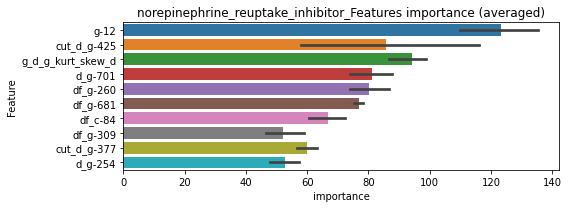

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00900484	valid_1's binary_logloss: 0.0107375
[200]	training's binary_logloss: 0.000791769	valid_1's binary_logloss: 0.00233322
[300]	training's binary_logloss: 0.000211822	valid_1's binary_logloss: 0.00178734
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000168877	valid_1's binary_logloss: 0.00173639


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00915894	valid_1's binary_logloss: 0.0103752
[200]	training's binary_logloss: 0.000835261	valid_1's binary_logloss: 0.00138712
[300]	training's binary_logloss: 0.000232228	valid_1's binary_logloss: 0.000564651
[400]	training's binary_logloss: 0.000134416	valid_1's binary_logloss: 0.000394523
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00011445	valid_1's binary_logloss: 0.000356619


norepinephrine_reuptake_inhibitor logloss: 0.0010465064388942848


neg labels: 3289 → selected neg labels: 3286


nrf2_activator, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0210444	valid_1's binary_logloss: 0.0291401
[200]	training's binary_logloss: 0.00235476	valid_1's binary_logloss: 0.00762516
[300]	training's binary_logloss: 0.000669435	valid_1's binary_logloss: 0.00473602
[400]	training's binary_logloss: 0.000371308	valid_1's binary_logloss: 0.00402362
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000340482	valid_1's binary_logloss: 0.00388733
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214659	valid_1's binary_logloss: 0.026183
[200]	training's binary_logloss: 0.00245324	valid_1's binary_logloss: 0.00515407
[300]	training's binary_logloss: 0.000702966	valid_1's binary_logloss: 0.00248665
[400]	training's binary_logloss: 0.000379901	valid_1's binary_logloss: 0.00185712
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00033663	valid_1's binary_logloss: 0.0017421

1 / 3 AUC score:1.000
y_Threshold: 0.0009686, Threshold: 0.1155738, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.10402, conf_1:0.12713
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.1155738
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_2: 0.1255738
Num_p_label: 79.0, Expected: 3.0, Adj_threshold_3: 0.1355738
Num_p_label: 79.0, Expected: 3.0, Adj_threshold_4: 0.1455738
Num_p_label: 79.0, Expected: 3.0, Adj_threshold_5: 0.1555738
Num_p_label: 77.0, Expected: 3.0, Adj_threshold_6: 0.1655738
Num_p_label: 74.0, Expected: 3.0, Adj_threshold_7: 0.1755738
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_8: 0.1855738
Num_p_label: 71.0, Expected: 3.0, Adj_threshold_9: 0.1955738
Num_p_label: 70.0, Expected: 3.0, Adj_threshold_10: 0.2055738
threshold: 0.2155738, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203062	valid_1's binary_logloss: 0.0257054
[200]	training's binary_logloss: 0.00212166	valid_1's binary_logloss: 0.00416057
[300]	training's binary_logloss: 0.00059351	valid_1's binary_logloss: 0.00176653
[400]	training's binary_logloss: 0.000333237	valid_1's binary_logloss: 0.00125343
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000302237	valid_1's binary_logloss: 0.00118797
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203729	valid_1's binary_logloss: 0.023945
[200]	training's binary_logloss: 0.00211876	valid_1's binary_logloss: 0.00347346
[300]	training's binary_logloss: 0.000596174	valid_1's binary_logloss: 0.00120408
[400]	training's binary_logloss: 0.000335203	valid_1's binary_logloss: 0.000738354
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000295445	valid_1's binary_logloss: 0.000671

2 / 3 AUC score:1.000
y_Threshold: 0.1057095, Threshold: 0.2155738, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0288800 Vs.target_rate: 0.00076
Num_p_label: 115.0, conf_0:0.19402, conf_1:0.23713
Num_p_label: 115.0, Expected: 3.0, Adj_threshold_1: 0.2155738
Num_p_label: 115.0, Expected: 3.0, Adj_threshold_2: 0.2255738
Num_p_label: 113.0, Expected: 3.0, Adj_threshold_3: 0.2355738
Num_p_label: 112.0, Expected: 3.0, Adj_threshold_4: 0.2455738
Num_p_label: 112.0, Expected: 3.0, Adj_threshold_5: 0.2555738
Num_p_label: 112.0, Expected: 3.0, Adj_threshold_6: 0.2655738
Num_p_label: 112.0, Expected: 3.0, Adj_threshold_7: 0.2755738
Num_p_label: 110.0, Expected: 3.0, Adj_threshold_8: 0.2855738
Num_p_label: 110.0, Expected: 3.0, Adj_threshold_9: 0.2955738
Num_p_label: 109.0, Expected: 3.0, Adj_threshold_10: 0.3055738
threshold: 0.3155738, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 657.0/3811, y_label_rate: 0.17239

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203062	valid_1's binary_logloss: 0.0257054
[200]	training's binary_logloss: 0.00212166	valid_1's binary_logloss: 0.00416057
[300]	training's binary_logloss: 0.00059351	valid_1's binary_logloss: 0.00176653
[400]	training's binary_logloss: 0.000333237	valid_1's binary_logloss: 0.00125343
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000302237	valid_1's binary_logloss: 0.00118797
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203729	valid_1's binary_logloss: 0.023945
[200]	training's binary_logloss: 0.00211876	valid_1's binary_logloss: 0.00347346
[300]	training's binary_logloss: 0.000596174	valid_1's binary_logloss: 0.00120408
[400]	training's binary_logloss: 0.000335203	valid_1's binary_logloss: 0.000738354
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000295445	valid_1's binary_logloss: 0.000671

3 / 3 AUC score:1.000
y_Threshold: 0.1057095, Threshold: 0.3155738, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0273732 Vs.target_rate: 0.00076
Num_p_label: 109.0, conf_0:0.28402, conf_1:0.34713
Num_p_label: 109.0, Expected: 3.0, Adj_threshold_1: 0.3155738
Num_p_label: 107.0, Expected: 3.0, Adj_threshold_2: 0.3255738
Num_p_label: 107.0, Expected: 3.0, Adj_threshold_3: 0.3355738
Num_p_label: 107.0, Expected: 3.0, Adj_threshold_4: 0.3455738
Num_p_label: 106.0, Expected: 3.0, Adj_threshold_5: 0.3555738
Num_p_label: 105.0, Expected: 3.0, Adj_threshold_6: 0.3655738
Num_p_label: 105.0, Expected: 3.0, Adj_threshold_7: 0.3755738
Num_p_label: 105.0, Expected: 3.0, Adj_threshold_8: 0.3855738
Num_p_label: 104.0, Expected: 3.0, Adj_threshold_9: 0.3955738
Num_p_label: 104.0, Expected: 3.0, Adj_threshold_10: 0.4055738
threshold: 0.4155738, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 761.0/7793, y_label_rate: 0.09765

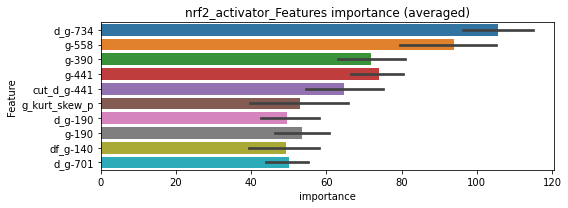

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 nrf2_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0129633	valid_1's binary_logloss: 0.0182017
[200]	training's binary_logloss: 0.00148144	valid_1's binary_logloss: 0.00513929
[300]	training's binary_logloss: 0.000410883	valid_1's binary_logloss: 0.00396872
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000317703	valid_1's binary_logloss: 0.00384627


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 nrf2_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130439	valid_1's binary_logloss: 0.0188138
[200]	training's binary_logloss: 0.00146985	valid_1's binary_logloss: 0.00583699
[300]	training's binary_logloss: 0.000398097	valid_1's binary_logloss: 0.00432829
[400]	training's binary_logloss: 0.000210012	valid_1's binary_logloss: 0.00398217
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000206993	valid_1's binary_logloss: 0.00396865


nrf2_activator logloss: 0.003907452674553522


neg labels: 3289 → selected neg labels: 3279


opioid_receptor_agonist, len(trt): 61, len(othr): 3279, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0446271	valid_1's binary_logloss: 0.0891288
[200]	training's binary_logloss: 0.00899538	valid_1's binary_logloss: 0.05176
[300]	training's binary_logloss: 0.00276174	valid_1's binary_logloss: 0.0443023
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00147418	valid_1's binary_logloss: 0.0417888
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474549	valid_1's binary_logloss: 0.0845803
[200]	training's binary_logloss: 0.0102738	valid_1's binary_logloss: 0.0395099
[300]	training's binary_logloss: 0.00315799	valid_1's binary_logloss: 0.0275626
[400]	training's binary_logloss: 0.00146089	valid_1's binary_logloss: 0.0230344
[500]	training's binary_logloss: 0.000898625	valid_1's binary_logloss: 0.0210042
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000775321	valid_1's binary_logloss: 0.0205064


1 / 3 AUC score:0.998
y_Threshold: 0.0054979, Threshold: 0.0094641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 142 → Positive_corect_labels: 650/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00852, conf_1:0.01041
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0094641
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_2: 0.0194641
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_3: 0.0294641
threshold: 0.0294641, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0445566	valid_1's binary_logloss: 0.0863937
[200]	training's binary_logloss: 0.00880079	valid_1's binary_logloss: 0.0436656
[300]	training's binary_logloss: 0.00269548	valid_1's binary_logloss: 0.033669
[400]	training's binary_logloss: 0.00126144	valid_1's binary_logloss: 0.0300584
[500]	training's binary_logloss: 0.000798776	valid_1's binary_logloss: 0.0285396
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000654085	valid_1's binary_logloss: 0.0277905
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0484997	valid_1's binary_logloss: 0.0771022
[200]	training's binary_logloss: 0.00940744	valid_1's binary_logloss: 0.0304244
[300]	training's binary_logloss: 0.00283449	valid_1's binary_logloss: 0.0184418
[400]	training's binary_logloss: 0.00132869	valid_1's binary_logloss: 0.014678
[500]	training's binary_logloss: 0.00083931	v

2 / 3 AUC score:1.000
y_Threshold: 0.0252829, Threshold: 0.0294641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0072828 Vs.target_rate: 0.00256
Num_p_label: 29.0, conf_0:0.02652, conf_1:0.03241
threshold: 0.0294641, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0436443	valid_1's binary_logloss: 0.078689
[200]	training's binary_logloss: 0.00872412	valid_1's binary_logloss: 0.0372333
[300]	training's binary_logloss: 0.00267416	valid_1's binary_logloss: 0.0272606
[400]	training's binary_logloss: 0.00127732	valid_1's binary_logloss: 0.0236181
[500]	training's binary_logloss: 0.00080293	valid_1's binary_logloss: 0.0218946
[600]	training's binary_logloss: 0.000618429	valid_1's binary_logloss: 0.0212363
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000613988	valid_1's binary_logloss: 0.0211975
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0464198	valid_1's binary_logloss: 0.0864504
[200]	training's binary_logloss: 0.0089363	valid_1's binary_logloss: 0.0463242
[300]	training's binary_logloss: 0.00274174	valid_1's binary_logloss: 0.0390229
Early stopping, best iteration is:
[386]	trai

3 / 3 AUC score:0.999
y_Threshold: 0.0190158, Threshold: 0.0294641, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0067805 Vs.target_rate: 0.00256
Num_p_label: 27.0, conf_0:0.02652, conf_1:0.03241
threshold: 0.0294641, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 667.0/7754, y_label_rate: 0.0860201


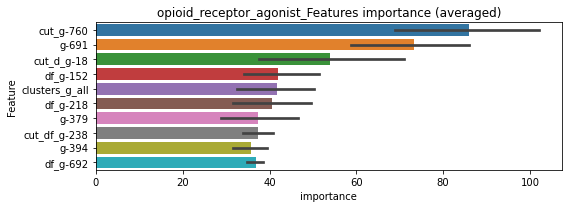

len(train_index) : 3877
len(valid_index) : 3877
================================= fold 1/2 opioid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236075	valid_1's binary_logloss: 0.0561249
[200]	training's binary_logloss: 0.00454324	valid_1's binary_logloss: 0.0364276
[300]	training's binary_logloss: 0.00139952	valid_1's binary_logloss: 0.0329025
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00106149	valid_1's binary_logloss: 0.0322718


len(train_index) : 3877
len(valid_index) : 3877
================================= fold 2/2 opioid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257278	valid_1's binary_logloss: 0.0436032
[200]	training's binary_logloss: 0.00545164	valid_1's binary_logloss: 0.0237167
[300]	training's binary_logloss: 0.00166965	valid_1's binary_logloss: 0.0194811
[400]	training's binary_logloss: 0.000760751	valid_1's binary_logloss: 0.0181158
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000765694	valid_1's binary_logloss: 0.0181075


opioid_receptor_agonist logloss: 0.025189682811725077


neg labels: 3289 → selected neg labels: 3275


opioid_receptor_antagonist, len(trt): 96, len(othr): 3275, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0577247	valid_1's binary_logloss: 0.118848
[200]	training's binary_logloss: 0.0136536	valid_1's binary_logloss: 0.074994
[300]	training's binary_logloss: 0.00450707	valid_1's binary_logloss: 0.0617515
[400]	training's binary_logloss: 0.00210526	valid_1's binary_logloss: 0.0581775
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00151601	valid_1's binary_logloss: 0.0569749
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0634482	valid_1's binary_logloss: 0.123314
[200]	training's binary_logloss: 0.0157196	valid_1's binary_logloss: 0.0775448
[300]	training's binary_logloss: 0.00523478	valid_1's binary_logloss: 0.0671863
[400]	training's binary_logloss: 0.00230382	valid_1's binary_logloss: 0.0641248
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00196938	valid_1's binary_logloss: 0.0636646


1 / 3 AUC score:0.995
y_Threshold: 0.0116532, Threshold: 0.0162864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 149 → Positive_corect_labels: 646/3781
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.01466, conf_1:0.01792
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0162864
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_2: 0.0262864
threshold: 0.0262864, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0561215	valid_1's binary_logloss: 0.12979
[200]	training's binary_logloss: 0.0124866	valid_1's binary_logloss: 0.0834431
[300]	training's binary_logloss: 0.00409636	valid_1's binary_logloss: 0.0715196
[400]	training's binary_logloss: 0.00189895	valid_1's binary_logloss: 0.0670986
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00152491	valid_1's binary_logloss: 0.065902
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0624483	valid_1's binary_logloss: 0.120158
[200]	training's binary_logloss: 0.0150122	valid_1's binary_logloss: 0.0690397
[300]	training's binary_logloss: 0.00481908	valid_1's binary_logloss: 0.0562476
[400]	training's binary_logloss: 0.00220517	valid_1's binary_logloss: 0.0516291
[500]	training's binary_logloss: 0.00130703	valid_1's binary_logloss: 0.0498366
Early stopping, best iteration is:
[520]	training's

2 / 3 AUC score:0.997
y_Threshold: 0.0274752, Threshold: 0.0262864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0105475 Vs.target_rate: 0.00403
Num_p_label: 42.0, conf_0:0.02366, conf_1:0.02892
threshold: 0.0262864, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0546587	valid_1's binary_logloss: 0.123802
[200]	training's binary_logloss: 0.0125062	valid_1's binary_logloss: 0.0839941
[300]	training's binary_logloss: 0.00405724	valid_1's binary_logloss: 0.0761303
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.0042346	valid_1's binary_logloss: 0.0761268
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0584261	valid_1's binary_logloss: 0.101923
[200]	training's binary_logloss: 0.013296	valid_1's binary_logloss: 0.0548869
[300]	training's binary_logloss: 0.00423736	valid_1's binary_logloss: 0.0425581
[400]	training's binary_logloss: 0.00194761	valid_1's binary_logloss: 0.0381521
[500]	training's binary_logloss: 0.00117788	valid_1's binary_logloss: 0.0364381
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.0012058	valid_1's binary_logloss: 0.0363562


3 / 3 AUC score:0.997
y_Threshold: 0.0280417, Threshold: 0.0262864, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 619.0/3727
p_label_rate: 0.0158212 Vs.target_rate: 0.00403
Num_p_label: 63.0, conf_0:0.02366, conf_1:0.02892
Num_p_label: 63.0, Expected: 16.1, Adj_threshold_1: 0.0262864
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_2: 0.0362864
Num_p_label: 14.0, Expected: 16.1, Adj_threshold_3: 0.0462864
threshold: 0.0462864, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 633.0/7709, y_label_rate: 0.0821118


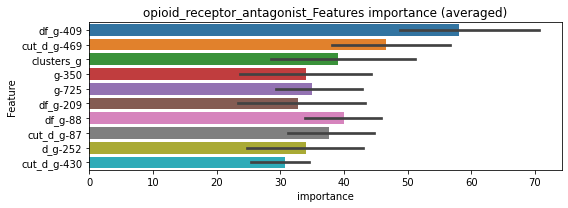

len(train_index) : 3854
len(valid_index) : 3855
================================= fold 1/2 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292401	valid_1's binary_logloss: 0.071884
[200]	training's binary_logloss: 0.00643488	valid_1's binary_logloss: 0.0492833
[300]	training's binary_logloss: 0.00203659	valid_1's binary_logloss: 0.0448911
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00131453	valid_1's binary_logloss: 0.0440591


len(train_index) : 3855
len(valid_index) : 3854
================================= fold 2/2 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0304355	valid_1's binary_logloss: 0.0651805
[200]	training's binary_logloss: 0.00662177	valid_1's binary_logloss: 0.0405884
[300]	training's binary_logloss: 0.00211379	valid_1's binary_logloss: 0.0347709
[400]	training's binary_logloss: 0.00097894	valid_1's binary_logloss: 0.0324454
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00076469	valid_1's binary_logloss: 0.0321402


opioid_receptor_antagonist logloss: 0.0381004355672869


neg labels: 3289 → selected neg labels: 3283


orexin_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0358475	valid_1's binary_logloss: 0.0596967
[200]	training's binary_logloss: 0.00560805	valid_1's binary_logloss: 0.0230596
[300]	training's binary_logloss: 0.00159939	valid_1's binary_logloss: 0.0153497
[400]	training's binary_logloss: 0.0007789	valid_1's binary_logloss: 0.0130187
[500]	training's binary_logloss: 0.000518138	valid_1's binary_logloss: 0.0120368
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000508888	valid_1's binary_logloss: 0.0120258
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348343	valid_1's binary_logloss: 0.0539516
[200]	training's binary_logloss: 0.00575418	valid_1's binary_logloss: 0.0176467
[300]	training's binary_logloss: 0.00169058	valid_1's binary_logloss: 0.0110209
[400]	training's binary_logloss: 0.000815023	valid_1's binary_logloss: 0.00920458
Early stopping, best iteration is:
[446]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0032647, Threshold: 0.0038423, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00346, conf_1:0.00423
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0038423
Num_p_label: 3.0, Expected: 6.2, Adj_threshold_2: 0.0138423
threshold: 0.0138423, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344305	valid_1's binary_logloss: 0.0589732
[200]	training's binary_logloss: 0.00537785	valid_1's binary_logloss: 0.0226062
[300]	training's binary_logloss: 0.0015684	valid_1's binary_logloss: 0.0152886
[400]	training's binary_logloss: 0.000774003	valid_1's binary_logloss: 0.0131618
[500]	training's binary_logloss: 0.000521847	valid_1's binary_logloss: 0.0122245
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000517781	valid_1's binary_logloss: 0.0122093
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350967	valid_1's binary_logloss: 0.0534867
[200]	training's binary_logloss: 0.00573395	valid_1's binary_logloss: 0.0187291
[300]	training's binary_logloss: 0.00168669	valid_1's binary_logloss: 0.0123201
[400]	training's binary_logloss: 0.000819207	valid_1's binary_logloss: 0.0103442
[500]	training's binary_logloss: 0.0005414

2 / 3 AUC score:1.000
y_Threshold: 0.0121479, Threshold: 0.0138423, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.01246, conf_1:0.01523
threshold: 0.0138423, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.033906	valid_1's binary_logloss: 0.0577119
[200]	training's binary_logloss: 0.00534192	valid_1's binary_logloss: 0.0240114
[300]	training's binary_logloss: 0.00157313	valid_1's binary_logloss: 0.0174378
[400]	training's binary_logloss: 0.000772339	valid_1's binary_logloss: 0.0154555
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000587377	valid_1's binary_logloss: 0.0148257
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348118	valid_1's binary_logloss: 0.0535272
[200]	training's binary_logloss: 0.00558173	valid_1's binary_logloss: 0.0163458
[300]	training's binary_logloss: 0.00164217	valid_1's binary_logloss: 0.00907842
[400]	training's binary_logloss: 0.000795762	valid_1's binary_logloss: 0.00682959
[500]	training's binary_logloss: 0.000533335	valid_1's binary_logloss: 0.00598673
Early stopping, best iteration is:
[527

3 / 3 AUC score:1.000
y_Threshold: 0.0163495, Threshold: 0.0138423, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00155
Num_p_label: 14.0, conf_0:0.01246, conf_1:0.01523
threshold: 0.0138423, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 668.0/7785, y_label_rate: 0.0858060


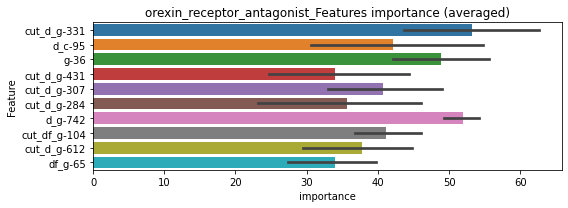

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185926	valid_1's binary_logloss: 0.0395717
[200]	training's binary_logloss: 0.0028526	valid_1's binary_logloss: 0.0235764
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00129339	valid_1's binary_logloss: 0.0226387


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019633	valid_1's binary_logloss: 0.03362
[200]	training's binary_logloss: 0.00329744	valid_1's binary_logloss: 0.0153993
[300]	training's binary_logloss: 0.000966116	valid_1's binary_logloss: 0.0128677
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.000966116	valid_1's binary_logloss: 0.0128677


orexin_receptor_antagonist logloss: 0.01775380914155268


neg labels: 3289 → selected neg labels: 3278


p38_mapk_inhibitor, len(trt): 62, len(othr): 3278, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0349078	valid_1's binary_logloss: 0.0699668
[200]	training's binary_logloss: 0.00580052	valid_1's binary_logloss: 0.0268923
[300]	training's binary_logloss: 0.00171547	valid_1's binary_logloss: 0.0164556
[400]	training's binary_logloss: 0.000848889	valid_1's binary_logloss: 0.0129078
[500]	training's binary_logloss: 0.000564603	valid_1's binary_logloss: 0.0115364
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000485246	valid_1's binary_logloss: 0.0110891
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0353078	valid_1's binary_logloss: 0.0652529
[200]	training's binary_logloss: 0.00570516	valid_1's binary_logloss: 0.0242381
[300]	training's binary_logloss: 0.00170583	valid_1's binary_logloss: 0.0152222
[400]	training's binary_logloss: 0.000856831	valid_1's binary_logloss: 0.0127246
[500]	training's binary_logloss: 0.000568

1 / 3 AUC score:1.000
y_Threshold: 0.0039167, Threshold: 0.0094032, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00260
Num_p_label: 80.0, conf_0:0.00846, conf_1:0.01034
Num_p_label: 80.0, Expected: 10.4, Adj_threshold_1: 0.0094032
Num_p_label: 44.0, Expected: 10.4, Adj_threshold_2: 0.0194032
Num_p_label: 31.0, Expected: 10.4, Adj_threshold_3: 0.0294032
Num_p_label: 24.0, Expected: 10.4, Adj_threshold_4: 0.0394032
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_5: 0.0494032
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_6: 0.0594032
threshold: 0.0594032, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348365	valid_1's binary_logloss: 0.0628504
[200]	training's binary_logloss: 0.0054935	valid_1's binary_logloss: 0.0206034
[300]	training's binary_logloss: 0.00162902	valid_1's binary_logloss: 0.0115656
[400]	training's binary_logloss: 0.000811221	valid_1's binary_logloss: 0.00841454
[500]	training's binary_logloss: 0.000543527	valid_1's binary_logloss: 0.00716618
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000465729	valid_1's binary_logloss: 0.0068171
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.035285	valid_1's binary_logloss: 0.0608789
[200]	training's binary_logloss: 0.00551343	valid_1's binary_logloss: 0.0198139
[300]	training's binary_logloss: 0.00162882	valid_1's binary_logloss: 0.0109201
[400]	training's binary_logloss: 0.00081105	valid_1's binary_logloss: 0.00866481
[500]	training's binary_logloss: 0.000543

2 / 3 AUC score:1.000
y_Threshold: 0.0340179, Threshold: 0.0594032, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3801
p_label_rate: 0.0110497 Vs.target_rate: 0.00260
Num_p_label: 44.0, conf_0:0.05346, conf_1:0.06534
Num_p_label: 44.0, Expected: 10.4, Adj_threshold_1: 0.0594032
Num_p_label: 38.0, Expected: 10.4, Adj_threshold_2: 0.0694032
Num_p_label: 34.0, Expected: 10.4, Adj_threshold_3: 0.0794032
Num_p_label: 30.0, Expected: 10.4, Adj_threshold_4: 0.0894032
Num_p_label: 29.0, Expected: 10.4, Adj_threshold_5: 0.0994032
Num_p_label: 27.0, Expected: 10.4, Adj_threshold_6: 0.1094032
Num_p_label: 26.0, Expected: 10.4, Adj_threshold_7: 0.1194032
Num_p_label: 24.0, Expected: 10.4, Adj_threshold_8: 0.1294032
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_9: 0.1394032
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_10: 0.1494032
threshold: 0.1594032, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3801, y_label_rate: 0.1723231

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348365	valid_1's binary_logloss: 0.0628504
[200]	training's binary_logloss: 0.0054935	valid_1's binary_logloss: 0.0206034
[300]	training's binary_logloss: 0.00162902	valid_1's binary_logloss: 0.0115656
[400]	training's binary_logloss: 0.000811221	valid_1's binary_logloss: 0.00841454
[500]	training's binary_logloss: 0.000543527	valid_1's binary_logloss: 0.00716618
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000465729	valid_1's binary_logloss: 0.0068171
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.035285	valid_1's binary_logloss: 0.0608789
[200]	training's binary_logloss: 0.00551343	valid_1's binary_logloss: 0.0198139
[300]	training's binary_logloss: 0.00162882	valid_1's binary_logloss: 0.0109201
[400]	training's binary_logloss: 0.00081105	valid_1's binary_logloss: 0.00866481
[500]	training's binary_logloss: 0.000543

3 / 3 AUC score:1.000
y_Threshold: 0.0340179, Threshold: 0.1594032, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3801
p_label_rate: 0.0055249 Vs.target_rate: 0.00260
Num_p_label: 22.0, conf_0:0.14346, conf_1:0.17534
threshold: 0.1594032, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 677.0/7783, y_label_rate: 0.0869845


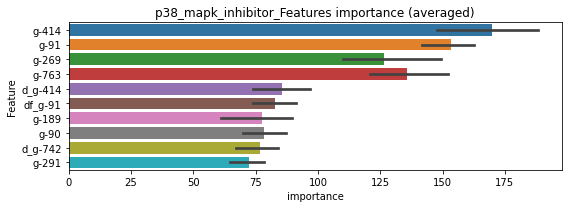

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180082	valid_1's binary_logloss: 0.0363525
[200]	training's binary_logloss: 0.00280261	valid_1's binary_logloss: 0.0145298
[300]	training's binary_logloss: 0.000847594	valid_1's binary_logloss: 0.00944801
[400]	training's binary_logloss: 0.000428088	valid_1's binary_logloss: 0.00781201
[500]	training's binary_logloss: 0.000287846	valid_1's binary_logloss: 0.00695779
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000272439	valid_1's binary_logloss: 0.00682126


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185913	valid_1's binary_logloss: 0.0350659
[200]	training's binary_logloss: 0.00292929	valid_1's binary_logloss: 0.0135252
[300]	training's binary_logloss: 0.000889513	valid_1's binary_logloss: 0.00899571
[400]	training's binary_logloss: 0.000447052	valid_1's binary_logloss: 0.00763777
[500]	training's binary_logloss: 0.000298861	valid_1's binary_logloss: 0.00706133
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000284911	valid_1's binary_logloss: 0.00700845


p38_mapk_inhibitor logloss: 0.006914843095417052


neg labels: 3289 → selected neg labels: 3285


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282075	valid_1's binary_logloss: 0.0394167
[200]	training's binary_logloss: 0.00386211	valid_1's binary_logloss: 0.00888009
[300]	training's binary_logloss: 0.00110893	valid_1's binary_logloss: 0.00426401
[400]	training's binary_logloss: 0.000561782	valid_1's binary_logloss: 0.00310005
[500]	training's binary_logloss: 0.000408917	valid_1's binary_logloss: 0.00276016
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000402408	valid_1's binary_logloss: 0.00274844
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0287284	valid_1's binary_logloss: 0.0473848
[200]	training's binary_logloss: 0.0039937	valid_1's binary_logloss: 0.015971
[300]	training's binary_logloss: 0.00115118	valid_1's binary_logloss: 0.0100284
[400]	training's binary_logloss: 0.000578422	valid_1's binary_logloss: 0.0086345
Early stopping, best iteration is:
[45

1 / 3 AUC score:1.000
y_Threshold: 0.0018633, Threshold: 0.0026734, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00241, conf_1:0.00294
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0026734
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0126734
threshold: 0.0126734, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283248	valid_1's binary_logloss: 0.0389773
[200]	training's binary_logloss: 0.00382162	valid_1's binary_logloss: 0.00868693
[300]	training's binary_logloss: 0.0010932	valid_1's binary_logloss: 0.00398364
[400]	training's binary_logloss: 0.000562055	valid_1's binary_logloss: 0.00281961
[500]	training's binary_logloss: 0.00041465	valid_1's binary_logloss: 0.00247132
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000408262	valid_1's binary_logloss: 0.00245516
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292053	valid_1's binary_logloss: 0.0492352
[200]	training's binary_logloss: 0.00392011	valid_1's binary_logloss: 0.0159714
[300]	training's binary_logloss: 0.0011376	valid_1's binary_logloss: 0.0101567
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000642248	valid_1's binary_logloss: 0.00895223


2 / 3 AUC score:1.000
y_Threshold: 0.0095300, Threshold: 0.0126734, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00101
Num_p_label: 18.0, conf_0:0.01141, conf_1:0.01394
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.0126734
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0226734
threshold: 0.0226734, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274422	valid_1's binary_logloss: 0.0383278
[200]	training's binary_logloss: 0.00365261	valid_1's binary_logloss: 0.00910282
[300]	training's binary_logloss: 0.00107336	valid_1's binary_logloss: 0.00467616
[400]	training's binary_logloss: 0.000556826	valid_1's binary_logloss: 0.00349612
[500]	training's binary_logloss: 0.000413229	valid_1's binary_logloss: 0.00312543
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000405292	valid_1's binary_logloss: 0.0031168
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280327	valid_1's binary_logloss: 0.0441263
[200]	training's binary_logloss: 0.00376651	valid_1's binary_logloss: 0.012227
[300]	training's binary_logloss: 0.00109691	valid_1's binary_logloss: 0.00686577
[400]	training's binary_logloss: 0.000565511	valid_1's binary_logloss: 0.00521393
Early stopping, best iteration is:
[

3 / 3 AUC score:1.000
y_Threshold: 0.0245631, Threshold: 0.0226734, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, conf_0:0.02041, conf_1:0.02494
threshold: 0.0226734, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 663.0/7790, y_label_rate: 0.0851091


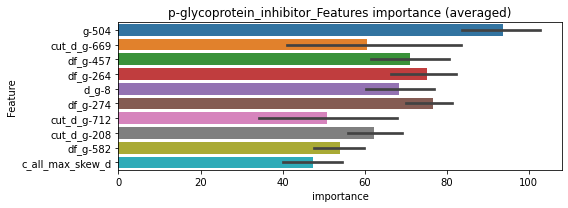

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154272	valid_1's binary_logloss: 0.0259887
[200]	training's binary_logloss: 0.00208727	valid_1's binary_logloss: 0.00953532
[300]	training's binary_logloss: 0.000583582	valid_1's binary_logloss: 0.00733326
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000439868	valid_1's binary_logloss: 0.00716414


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158701	valid_1's binary_logloss: 0.0207457
[200]	training's binary_logloss: 0.00219571	valid_1's binary_logloss: 0.00553555
[300]	training's binary_logloss: 0.000620376	valid_1's binary_logloss: 0.0036812
[400]	training's binary_logloss: 0.00030576	valid_1's binary_logloss: 0.00335098
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00024807	valid_1's binary_logloss: 0.00329704


p-glycoprotein_inhibitor logloss: 0.005230590919754922


neg labels: 3289 → selected neg labels: 3279


parp_inhibitor, len(trt): 61, len(othr): 3279, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0412559	valid_1's binary_logloss: 0.0770852
[200]	training's binary_logloss: 0.00771679	valid_1's binary_logloss: 0.0325538
[300]	training's binary_logloss: 0.00238421	valid_1's binary_logloss: 0.0225062
[400]	training's binary_logloss: 0.00114414	valid_1's binary_logloss: 0.0185588
[500]	training's binary_logloss: 0.00072969	valid_1's binary_logloss: 0.0169952
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000593471	valid_1's binary_logloss: 0.0163582
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421769	valid_1's binary_logloss: 0.0749155
[200]	training's binary_logloss: 0.00795103	valid_1's binary_logloss: 0.0326025
[300]	training's binary_logloss: 0.0024042	valid_1's binary_logloss: 0.0237663
[400]	training's binary_logloss: 0.0011517	valid_1's binary_logloss: 0.0211338
[500]	training's binary_logloss: 0.000736017	v

1 / 3 AUC score:1.000
y_Threshold: 0.0060520, Threshold: 0.0079417, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00715, conf_1:0.00874
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0079417
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_2: 0.0179417
threshold: 0.0179417, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0420161	valid_1's binary_logloss: 0.0802467
[200]	training's binary_logloss: 0.0074816	valid_1's binary_logloss: 0.0345818
[300]	training's binary_logloss: 0.00227365	valid_1's binary_logloss: 0.0244767
[400]	training's binary_logloss: 0.00110659	valid_1's binary_logloss: 0.020596
[500]	training's binary_logloss: 0.000708305	valid_1's binary_logloss: 0.0189589
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000591125	valid_1's binary_logloss: 0.018357
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0417355	valid_1's binary_logloss: 0.0769654
[200]	training's binary_logloss: 0.00774361	valid_1's binary_logloss: 0.0356717
[300]	training's binary_logloss: 0.00233635	valid_1's binary_logloss: 0.0267629
[400]	training's binary_logloss: 0.00112414	valid_1's binary_logloss: 0.0241321
[500]	training's binary_logloss: 0.000716284	v

2 / 3 AUC score:1.000
y_Threshold: 0.0235816, Threshold: 0.0179417, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0113009 Vs.target_rate: 0.00256
Num_p_label: 45.0, conf_0:0.01615, conf_1:0.01974
Num_p_label: 45.0, Expected: 10.2, Adj_threshold_1: 0.0179417
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.0279417
threshold: 0.0279417, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0397036	valid_1's binary_logloss: 0.0862146
[200]	training's binary_logloss: 0.00695171	valid_1's binary_logloss: 0.0423946
[300]	training's binary_logloss: 0.00211724	valid_1's binary_logloss: 0.0324796
[400]	training's binary_logloss: 0.00102336	valid_1's binary_logloss: 0.0296677
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000728282	valid_1's binary_logloss: 0.0287129
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411475	valid_1's binary_logloss: 0.0801428
[200]	training's binary_logloss: 0.00746308	valid_1's binary_logloss: 0.0356278
[300]	training's binary_logloss: 0.00226131	valid_1's binary_logloss: 0.0245569
[400]	training's binary_logloss: 0.00109568	valid_1's binary_logloss: 0.0209633
[500]	training's binary_logloss: 0.000703811	valid_1's binary_logloss: 0.0194272
Early stopping, best iteration is:
[546]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0277237, Threshold: 0.0279417, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0045203 Vs.target_rate: 0.00256
Num_p_label: 18.0, conf_0:0.02515, conf_1:0.03074
threshold: 0.0279417, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 666.0/7770, y_label_rate: 0.0857143


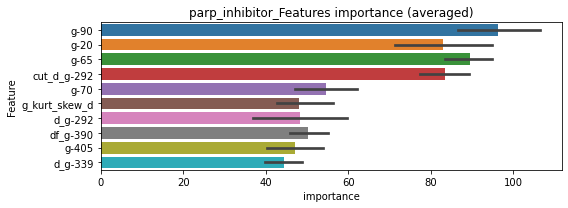

len(train_index) : 3885
len(valid_index) : 3885
================================= fold 1/2 parp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022138	valid_1's binary_logloss: 0.0516138
[200]	training's binary_logloss: 0.00396222	valid_1's binary_logloss: 0.0310834
[300]	training's binary_logloss: 0.00117903	valid_1's binary_logloss: 0.0272067
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000920747	valid_1's binary_logloss: 0.0267638


len(train_index) : 3885
len(valid_index) : 3885
================================= fold 2/2 parp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220497	valid_1's binary_logloss: 0.0513581
[200]	training's binary_logloss: 0.00394089	valid_1's binary_logloss: 0.0291892
[300]	training's binary_logloss: 0.00121022	valid_1's binary_logloss: 0.0249481
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000710212	valid_1's binary_logloss: 0.023578


parp_inhibitor logloss: 0.02517091731732187


neg labels: 3289 → selected neg labels: 3268


pdgfr_inhibitor, len(trt): 297, len(othr): 3268, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0560478	valid_1's binary_logloss: 0.137267
[200]	training's binary_logloss: 0.0132709	valid_1's binary_logloss: 0.100609
[300]	training's binary_logloss: 0.00433794	valid_1's binary_logloss: 0.0888077
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0035525	valid_1's binary_logloss: 0.0878678
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0544261	valid_1's binary_logloss: 0.131584
[200]	training's binary_logloss: 0.0123794	valid_1's binary_logloss: 0.0958135
[300]	training's binary_logloss: 0.00393111	valid_1's binary_logloss: 0.0880714
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00333717	valid_1's binary_logloss: 0.087591


1 / 3 AUC score:0.992
y_Threshold: 0.0420042, Threshold: 0.1985785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 182 → Positive_corect_labels: 628/3739
p_label_rate: 0.0200904 Vs.target_rate: 0.01247
Num_p_label: 80.0, conf_0:0.17872, conf_1:0.21844
threshold: 0.1985785, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 628.0/3739, y_label_rate: 0.1679593
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0479443	valid_1's binary_logloss: 0.10528
[200]	training's binary_logloss: 0.00974877	valid_1's binary_logloss: 0.0646466
[300]	training's binary_logloss: 0.00288744	valid_1's binary_logloss: 0.0525616
[400]	training's binary_logloss: 0.00135289	valid_1's binary_logloss: 0.0486883
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00108639	valid_1's binary_logloss: 0.047912
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0458156	valid_1's binary_logloss: 0.100548
[200]	training's binary_logloss: 0.00905432	valid_1's binary_logloss: 0.0637487
[300]	training's binary_logloss: 0.00268114	valid_1's binary_logloss: 0.0565131
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00238339	valid_1's binary_logloss: 0.0562341


2 / 3 AUC score:0.994
y_Threshold: 0.0944699, Threshold: 0.1985785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 603.0/3689
p_label_rate: 0.0316424 Vs.target_rate: 0.01247
Num_p_label: 126.0, conf_0:0.17872, conf_1:0.21844
threshold: 0.1985785, positive_p_label: 126.0/3982, p_label_rate: 0.0316424
positive_y_label: 603.0/3689, y_label_rate: 0.1634589
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0386469	valid_1's binary_logloss: 0.0967407
[200]	training's binary_logloss: 0.00714026	valid_1's binary_logloss: 0.0666377
[300]	training's binary_logloss: 0.0020457	valid_1's binary_logloss: 0.0607214
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00180538	valid_1's binary_logloss: 0.0604876
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0430325	valid_1's binary_logloss: 0.0880239
[200]	training's binary_logloss: 0.00832091	valid_1's binary_logloss: 0.0513614
[300]	training's binary_logloss: 0.00240437	valid_1's binary_logloss: 0.0413342
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00143321	valid_1's binary_logloss: 0.0398134


3 / 3 AUC score:0.994
y_Threshold: 0.0973498, Threshold: 0.1985785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 582.0/3647
p_label_rate: 0.0349071 Vs.target_rate: 0.01247
Num_p_label: 139.0, conf_0:0.17872, conf_1:0.21844
threshold: 0.1985785, positive_p_label: 139.0/3982, p_label_rate: 0.0349071
positive_y_label: 721.0/7629, y_label_rate: 0.0945078


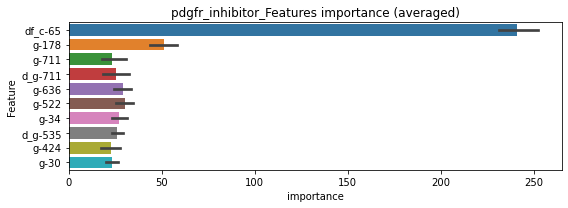

len(train_index) : 3814
len(valid_index) : 3815
================================= fold 1/2 pdgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266028	valid_1's binary_logloss: 0.0630603
[200]	training's binary_logloss: 0.0052098	valid_1's binary_logloss: 0.0388029
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00363268	valid_1's binary_logloss: 0.0368541


len(train_index) : 3815
len(valid_index) : 3814
================================= fold 2/2 pdgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267278	valid_1's binary_logloss: 0.0664993
[200]	training's binary_logloss: 0.00526471	valid_1's binary_logloss: 0.0414393
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00366672	valid_1's binary_logloss: 0.0392134


pdgfr_inhibitor logloss: 0.038033610079569964


neg labels: 3289 → selected neg labels: 3286


pdk_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224369	valid_1's binary_logloss: 0.027926
[200]	training's binary_logloss: 0.00275657	valid_1's binary_logloss: 0.00522935
[300]	training's binary_logloss: 0.000814286	valid_1's binary_logloss: 0.00212686
[400]	training's binary_logloss: 0.000437829	valid_1's binary_logloss: 0.00143478
[500]	training's binary_logloss: 0.000352225	valid_1's binary_logloss: 0.00127282
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000351185	valid_1's binary_logloss: 0.00127131
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228819	valid_1's binary_logloss: 0.0303063
[200]	training's binary_logloss: 0.00275876	valid_1's binary_logloss: 0.00595113
[300]	training's binary_logloss: 0.000809099	valid_1's binary_logloss: 0.00287168
[400]	training's binary_logloss: 0.000434078	valid_1's binary_logloss: 0.0022272
Early stopping, best iteration is

1 / 3 AUC score:1.000
y_Threshold: 0.0014065, Threshold: 0.0020244, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00182, conf_1:0.00223
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0020244
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0120244
threshold: 0.0120244, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225766	valid_1's binary_logloss: 0.028109
[200]	training's binary_logloss: 0.00275497	valid_1's binary_logloss: 0.00515936
[300]	training's binary_logloss: 0.000815718	valid_1's binary_logloss: 0.00208975
[400]	training's binary_logloss: 0.000437611	valid_1's binary_logloss: 0.00137247
[500]	training's binary_logloss: 0.000346293	valid_1's binary_logloss: 0.0011922
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000340904	valid_1's binary_logloss: 0.00118426
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231277	valid_1's binary_logloss: 0.0299884
[200]	training's binary_logloss: 0.00275172	valid_1's binary_logloss: 0.00556299
[300]	training's binary_logloss: 0.000808998	valid_1's binary_logloss: 0.00251943
[400]	training's binary_logloss: 0.000435934	valid_1's binary_logloss: 0.00184046
Early stopping, best iteration is

2 / 3 AUC score:1.000
y_Threshold: 0.0496645, Threshold: 0.0120244, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.01082, conf_1:0.01323
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0120244
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0220244
threshold: 0.0220244, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225766	valid_1's binary_logloss: 0.028109
[200]	training's binary_logloss: 0.00275497	valid_1's binary_logloss: 0.00515936
[300]	training's binary_logloss: 0.000815718	valid_1's binary_logloss: 0.00208975
[400]	training's binary_logloss: 0.000437611	valid_1's binary_logloss: 0.00137247
[500]	training's binary_logloss: 0.000346293	valid_1's binary_logloss: 0.0011922
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000340904	valid_1's binary_logloss: 0.00118426
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231277	valid_1's binary_logloss: 0.0299884
[200]	training's binary_logloss: 0.00275172	valid_1's binary_logloss: 0.00556299
[300]	training's binary_logloss: 0.000808998	valid_1's binary_logloss: 0.00251943
[400]	training's binary_logloss: 0.000435934	valid_1's binary_logloss: 0.00184046
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0496645, Threshold: 0.0220244, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00076
Num_p_label: 2.0, conf_0:0.01982, conf_1:0.02423
threshold: 0.0220244, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7793, y_label_rate: 0.0845631


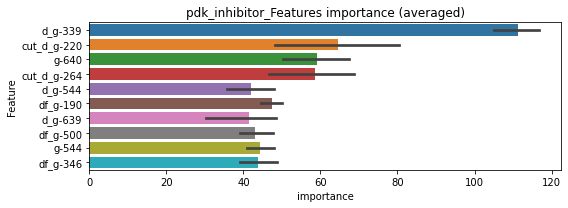

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 pdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125539	valid_1's binary_logloss: 0.0168795
[200]	training's binary_logloss: 0.00150435	valid_1's binary_logloss: 0.00367696
[300]	training's binary_logloss: 0.000427577	valid_1's binary_logloss: 0.00223329
[400]	training's binary_logloss: 0.000223103	valid_1's binary_logloss: 0.00200707
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000215649	valid_1's binary_logloss: 0.00200182


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 pdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123956	valid_1's binary_logloss: 0.0192218
[200]	training's binary_logloss: 0.00143606	valid_1's binary_logloss: 0.00660791
[300]	training's binary_logloss: 0.000416093	valid_1's binary_logloss: 0.0045695
[400]	training's binary_logloss: 0.000221025	valid_1's binary_logloss: 0.00399111
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000189348	valid_1's binary_logloss: 0.00387714


pdk_inhibitor logloss: 0.0029393614643647577


neg labels: 3289 → selected neg labels: 3243


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3243, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0970416	valid_1's binary_logloss: 0.280939
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.0503668	valid_1's binary_logloss: 0.268268
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.109044	valid_1's binary_logloss: 0.256239
[200]	training's binary_logloss: 0.0411426	valid_1's binary_logloss: 0.226454
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.0385168	valid_1's binary_logloss: 0.225717


1 / 3 AUC score:0.907
y_Threshold: 0.0889963, Threshold: 0.1165727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 419 → Positive_corect_labels: 504/3472
p_label_rate: 0.0200904 Vs.target_rate: 0.01109
Num_p_label: 80.0, conf_0:0.10492, conf_1:0.12823
threshold: 0.1165727, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 504.0/3472, y_label_rate: 0.1451613
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0736975	valid_1's binary_logloss: 0.186052
[200]	training's binary_logloss: 0.02193	valid_1's binary_logloss: 0.154689
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.010962	valid_1's binary_logloss: 0.150505
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0732577	valid_1's binary_logloss: 0.185323
[200]	training's binary_logloss: 0.0220726	valid_1's binary_logloss: 0.155436
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.0142229	valid_1's binary_logloss: 0.151999


2 / 3 AUC score:0.976
y_Threshold: 0.0634066, Threshold: 0.1165727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 116 → Positive_corect_labels: 446.0/3356
p_label_rate: 0.0037670 Vs.target_rate: 0.01109
Num_p_label: 15.0, conf_0:0.10492, conf_1:0.12823
threshold: 0.1165727, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 446.0/3356, y_label_rate: 0.1328963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0584749	valid_1's binary_logloss: 0.149472
[200]	training's binary_logloss: 0.015924	valid_1's binary_logloss: 0.117845
[300]	training's binary_logloss: 0.00554489	valid_1's binary_logloss: 0.11077
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00602262	valid_1's binary_logloss: 0.110445
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0593809	valid_1's binary_logloss: 0.149634
[200]	training's binary_logloss: 0.016262	valid_1's binary_logloss: 0.119211
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00784107	valid_1's binary_logloss: 0.114851


3 / 3 AUC score:0.991
y_Threshold: 0.0553628, Threshold: 0.1165727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 66 → Positive_corect_labels: 413.0/3290
p_label_rate: 0.0010045 Vs.target_rate: 0.01109
Num_p_label: 4.0, conf_0:0.10492, conf_1:0.12823
Num_p_label: 4.0, Expected: 44.1, Adj_threshold_1: 0.1165727
Num_p_label: 6.0, Expected: 44.1, Adj_threshold_2: 0.1065727
Num_p_label: 12.0, Expected: 44.1, Adj_threshold_3: 0.0965727
Num_p_label: 15.0, Expected: 44.1, Adj_threshold_4: 0.0865727
Num_p_label: 22.0, Expected: 44.1, Adj_threshold_5: 0.0765727
Num_p_label: 27.0, Expected: 44.1, Adj_threshold_6: 0.0665727
threshold: 0.0665727, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 440.0/7272, y_label_rate: 0.0605061


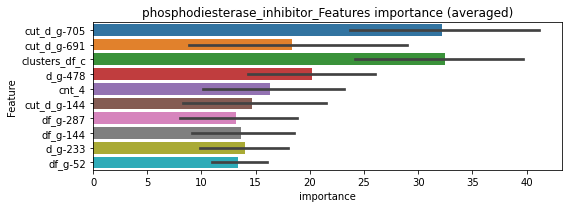

len(train_index) : 3636
len(valid_index) : 3636
================================= fold 1/2 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.029356	valid_1's binary_logloss: 0.0768111
[200]	training's binary_logloss: 0.00762437	valid_1's binary_logloss: 0.0629101
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00435497	valid_1's binary_logloss: 0.0610865


len(train_index) : 3636
len(valid_index) : 3636
================================= fold 2/2 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290568	valid_1's binary_logloss: 0.0861469
[200]	training's binary_logloss: 0.00769076	valid_1's binary_logloss: 0.0730825
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00450301	valid_1's binary_logloss: 0.0719075


phosphodiesterase_inhibitor logloss: 0.06649699222143374


neg labels: 3289 → selected neg labels: 3285


phospholipase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286601	valid_1's binary_logloss: 0.0431622
[200]	training's binary_logloss: 0.00394608	valid_1's binary_logloss: 0.0127518
[300]	training's binary_logloss: 0.00114531	valid_1's binary_logloss: 0.0077771
[400]	training's binary_logloss: 0.000581986	valid_1's binary_logloss: 0.00634108
[500]	training's binary_logloss: 0.000422015	valid_1's binary_logloss: 0.00597819
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000422987	valid_1's binary_logloss: 0.00597367
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298437	valid_1's binary_logloss: 0.0459641
[200]	training's binary_logloss: 0.00417815	valid_1's binary_logloss: 0.010447
[300]	training's binary_logloss: 0.00120426	valid_1's binary_logloss: 0.00469605
[400]	training's binary_logloss: 0.000609887	valid_1's binary_logloss: 0.00314603
[500]	training's binary_logloss: 0.00

1 / 3 AUC score:1.000
y_Threshold: 0.0019364, Threshold: 0.0030348, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00273, conf_1:0.00334
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0030348
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0130348
threshold: 0.0130348, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289542	valid_1's binary_logloss: 0.0420386
[200]	training's binary_logloss: 0.00394971	valid_1's binary_logloss: 0.0122115
[300]	training's binary_logloss: 0.00115636	valid_1's binary_logloss: 0.00721696
[400]	training's binary_logloss: 0.000588746	valid_1's binary_logloss: 0.00582961
[500]	training's binary_logloss: 0.00042529	valid_1's binary_logloss: 0.00539391
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000426021	valid_1's binary_logloss: 0.00539293
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291648	valid_1's binary_logloss: 0.0452239
[200]	training's binary_logloss: 0.00408209	valid_1's binary_logloss: 0.00998429
[300]	training's binary_logloss: 0.00118483	valid_1's binary_logloss: 0.00437718
[400]	training's binary_logloss: 0.000604426	valid_1's binary_logloss: 0.00301519
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0248896, Threshold: 0.0130348, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00105
Num_p_label: 21.0, conf_0:0.01173, conf_1:0.01434
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_1: 0.0130348
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0230348
threshold: 0.0230348, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289542	valid_1's binary_logloss: 0.0420386
[200]	training's binary_logloss: 0.00394971	valid_1's binary_logloss: 0.0122115
[300]	training's binary_logloss: 0.00115636	valid_1's binary_logloss: 0.00721696
[400]	training's binary_logloss: 0.000588746	valid_1's binary_logloss: 0.00582961
[500]	training's binary_logloss: 0.00042529	valid_1's binary_logloss: 0.00539391
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000426021	valid_1's binary_logloss: 0.00539293
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291648	valid_1's binary_logloss: 0.0452239
[200]	training's binary_logloss: 0.00408209	valid_1's binary_logloss: 0.00998429
[300]	training's binary_logloss: 0.00118483	valid_1's binary_logloss: 0.00437718
[400]	training's binary_logloss: 0.000604426	valid_1's binary_logloss: 0.00301519
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0248896, Threshold: 0.0230348, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.02073, conf_1:0.02534
threshold: 0.0230348, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 665.0/7792, y_label_rate: 0.0853439


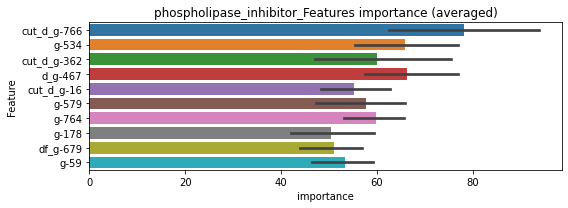

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 phospholipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152405	valid_1's binary_logloss: 0.025891
[200]	training's binary_logloss: 0.00212782	valid_1's binary_logloss: 0.0113741
[300]	training's binary_logloss: 0.000604259	valid_1's binary_logloss: 0.00994106
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00059782	valid_1's binary_logloss: 0.00992337


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 phospholipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166035	valid_1's binary_logloss: 0.0243062
[200]	training's binary_logloss: 0.002381	valid_1's binary_logloss: 0.00661438
[300]	training's binary_logloss: 0.000680702	valid_1's binary_logloss: 0.0041317
[400]	training's binary_logloss: 0.000333179	valid_1's binary_logloss: 0.00354061
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000285585	valid_1's binary_logloss: 0.0034737


phospholipase_inhibitor logloss: 0.006698538463793216


neg labels: 3289 → selected neg labels: 3264


pi3k_inhibitor, len(trt): 151, len(othr): 3264, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0542369	valid_1's binary_logloss: 0.141235
[200]	training's binary_logloss: 0.0123952	valid_1's binary_logloss: 0.107108
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00717531	valid_1's binary_logloss: 0.103502
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0556497	valid_1's binary_logloss: 0.140646
[200]	training's binary_logloss: 0.0133446	valid_1's binary_logloss: 0.100617
[300]	training's binary_logloss: 0.00437355	valid_1's binary_logloss: 0.0910372
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00417698	valid_1's binary_logloss: 0.0907505


1 / 3 AUC score:0.989
y_Threshold: 0.0313255, Threshold: 0.1353824, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 176 → Positive_corect_labels: 630/3740
p_label_rate: 0.0200904 Vs.target_rate: 0.00634
Num_p_label: 80.0, conf_0:0.12184, conf_1:0.14892
Num_p_label: 80.0, Expected: 25.2, Adj_threshold_1: 0.1353824
Num_p_label: 78.0, Expected: 25.2, Adj_threshold_2: 0.1453824
Num_p_label: 77.0, Expected: 25.2, Adj_threshold_3: 0.1553824
Num_p_label: 74.0, Expected: 25.2, Adj_threshold_4: 0.1653824
Num_p_label: 70.0, Expected: 25.2, Adj_threshold_5: 0.1753824
Num_p_label: 67.0, Expected: 25.2, Adj_threshold_6: 0.1853824
Num_p_label: 66.0, Expected: 25.2, Adj_threshold_7: 0.1953824
Num_p_label: 66.0, Expected: 25.2, Adj_threshold_8: 0.2053824
Num_p_label: 65.0, Expected: 25.2, Adj_threshold_9: 0.2153824
Num_p_label: 64.0, Expected: 25.2, Adj_threshold_10: 0.2253824
threshold: 0.2353824, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 630.0/3740, y_label_rate: 0.1684492

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0488939	valid_1's binary_logloss: 0.105656
[200]	training's binary_logloss: 0.0106296	valid_1's binary_logloss: 0.0628332
[300]	training's binary_logloss: 0.00346298	valid_1's binary_logloss: 0.0524955
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00231999	valid_1's binary_logloss: 0.0503964
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0468571	valid_1's binary_logloss: 0.137844
[200]	training's binary_logloss: 0.00967627	valid_1's binary_logloss: 0.108553
[300]	training's binary_logloss: 0.00305594	valid_1's binary_logloss: 0.102383
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.00328985	valid_1's binary_logloss: 0.10204


2 / 3 AUC score:0.994
y_Threshold: 0.0614855, Threshold: 0.2353824, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 68 → Positive_corect_labels: 596.0/3672
p_label_rate: 0.0462079 Vs.target_rate: 0.00634
Num_p_label: 184.0, conf_0:0.21184, conf_1:0.25892
Num_p_label: 184.0, Expected: 25.2, Adj_threshold_1: 0.2353824
Num_p_label: 182.0, Expected: 25.2, Adj_threshold_2: 0.2453824
Num_p_label: 182.0, Expected: 25.2, Adj_threshold_3: 0.2553824
Num_p_label: 180.0, Expected: 25.2, Adj_threshold_4: 0.2653824
Num_p_label: 179.0, Expected: 25.2, Adj_threshold_5: 0.2753824
Num_p_label: 173.0, Expected: 25.2, Adj_threshold_6: 0.2853824
Num_p_label: 173.0, Expected: 25.2, Adj_threshold_7: 0.2953824
Num_p_label: 171.0, Expected: 25.2, Adj_threshold_8: 0.3053824
Num_p_label: 168.0, Expected: 25.2, Adj_threshold_9: 0.3153824
Num_p_label: 167.0, Expected: 25.2, Adj_threshold_10: 0.3253824
threshold: 0.3353824, positive_p_label: 165.0/3982, p_label_rate: 0.0414365
positive_y_label: 596.0/3672, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0435548	valid_1's binary_logloss: 0.0917732
[200]	training's binary_logloss: 0.00844382	valid_1's binary_logloss: 0.0522288
[300]	training's binary_logloss: 0.00266119	valid_1's binary_logloss: 0.0416562
[400]	training's binary_logloss: 0.00128961	valid_1's binary_logloss: 0.0384256
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00112577	valid_1's binary_logloss: 0.0379026
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.042739	valid_1's binary_logloss: 0.114767
[200]	training's binary_logloss: 0.00861399	valid_1's binary_logloss: 0.0844908
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00484874	valid_1's binary_logloss: 0.079851


3 / 3 AUC score:0.996
y_Threshold: 0.0664407, Threshold: 0.3353824, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 575.0/3630
p_label_rate: 0.0494726 Vs.target_rate: 0.00634
Num_p_label: 197.0, conf_0:0.30184, conf_1:0.36892
Num_p_label: 197.0, Expected: 25.2, Adj_threshold_1: 0.3353824
Num_p_label: 197.0, Expected: 25.2, Adj_threshold_2: 0.3453824
Num_p_label: 196.0, Expected: 25.2, Adj_threshold_3: 0.3553824
Num_p_label: 193.0, Expected: 25.2, Adj_threshold_4: 0.3653824
Num_p_label: 192.0, Expected: 25.2, Adj_threshold_5: 0.3753824
Num_p_label: 191.0, Expected: 25.2, Adj_threshold_6: 0.3853824
Num_p_label: 190.0, Expected: 25.2, Adj_threshold_7: 0.3953824
Num_p_label: 189.0, Expected: 25.2, Adj_threshold_8: 0.4053824
Num_p_label: 185.0, Expected: 25.2, Adj_threshold_9: 0.4153824
Num_p_label: 185.0, Expected: 25.2, Adj_threshold_10: 0.4253824
threshold: 0.4353824, positive_p_label: 182.0/3982, p_label_rate: 0.0457057
positive_y_label: 757.0/7612, y_label_ra

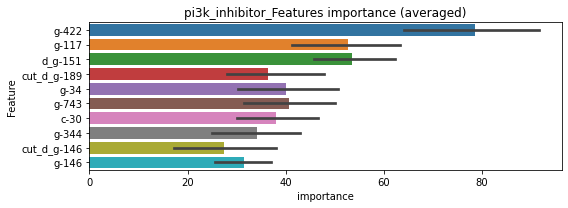

len(train_index) : 3806
len(valid_index) : 3806
================================= fold 1/2 pi3k_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257996	valid_1's binary_logloss: 0.0680296
[200]	training's binary_logloss: 0.00499341	valid_1's binary_logloss: 0.0474828
[300]	training's binary_logloss: 0.00151472	valid_1's binary_logloss: 0.0419081
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000802228	valid_1's binary_logloss: 0.0404085


len(train_index) : 3806
len(valid_index) : 3806
================================= fold 2/2 pi3k_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262935	valid_1's binary_logloss: 0.060927
[200]	training's binary_logloss: 0.00515815	valid_1's binary_logloss: 0.0406857
[300]	training's binary_logloss: 0.00163569	valid_1's binary_logloss: 0.0374945
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00126038	valid_1's binary_logloss: 0.0370207


pi3k_inhibitor logloss: 0.038714589849661925


neg labels: 3289 → selected neg labels: 3284


pkc_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030669	valid_1's binary_logloss: 0.048311
[200]	training's binary_logloss: 0.00435501	valid_1's binary_logloss: 0.0148919
[300]	training's binary_logloss: 0.00129	valid_1's binary_logloss: 0.00877715
[400]	training's binary_logloss: 0.000649591	valid_1's binary_logloss: 0.00701006
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000485457	valid_1's binary_logloss: 0.00661298
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307049	valid_1's binary_logloss: 0.0449554
[200]	training's binary_logloss: 0.00436393	valid_1's binary_logloss: 0.0127766
[300]	training's binary_logloss: 0.00126065	valid_1's binary_logloss: 0.00708832
[400]	training's binary_logloss: 0.000638043	valid_1's binary_logloss: 0.00570888
[500]	training's binary_logloss: 0.000455708	valid_1's binary_logloss: 0.00515502
Early stopping, best iteration is:
[516]

1 / 3 AUC score:1.000
y_Threshold: 0.0025160, Threshold: 0.0041832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00376, conf_1:0.00460
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0041832
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.0141832
threshold: 0.0141832, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305183	valid_1's binary_logloss: 0.0480421
[200]	training's binary_logloss: 0.00431845	valid_1's binary_logloss: 0.015137
[300]	training's binary_logloss: 0.00126816	valid_1's binary_logloss: 0.00915819
[400]	training's binary_logloss: 0.000636671	valid_1's binary_logloss: 0.00729317
[500]	training's binary_logloss: 0.000455568	valid_1's binary_logloss: 0.00663439
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000437594	valid_1's binary_logloss: 0.006545
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315295	valid_1's binary_logloss: 0.0435403
[200]	training's binary_logloss: 0.00443402	valid_1's binary_logloss: 0.0116098
[300]	training's binary_logloss: 0.00126126	valid_1's binary_logloss: 0.00626006
[400]	training's binary_logloss: 0.000640243	valid_1's binary_logloss: 0.00502581
[500]	training's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.0148075, Threshold: 0.0141832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00130
Num_p_label: 29.0, conf_0:0.01276, conf_1:0.01560
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.0141832
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.0241832
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_3: 0.0341832
threshold: 0.0341832, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305183	valid_1's binary_logloss: 0.0480421
[200]	training's binary_logloss: 0.00431845	valid_1's binary_logloss: 0.015137
[300]	training's binary_logloss: 0.00126816	valid_1's binary_logloss: 0.00915819
[400]	training's binary_logloss: 0.000636671	valid_1's binary_logloss: 0.00729317
[500]	training's binary_logloss: 0.000455568	valid_1's binary_logloss: 0.00663439
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000437594	valid_1's binary_logloss: 0.006545
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315295	valid_1's binary_logloss: 0.0435403
[200]	training's binary_logloss: 0.00443402	valid_1's binary_logloss: 0.0116098
[300]	training's binary_logloss: 0.00126126	valid_1's binary_logloss: 0.00626006
[400]	training's binary_logloss: 0.000640243	valid_1's binary_logloss: 0.00502581
[500]	training's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.0148075, Threshold: 0.0341832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00130
Num_p_label: 9.0, conf_0:0.03076, conf_1:0.03760
threshold: 0.0341832, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 665.0/7790, y_label_rate: 0.0853659


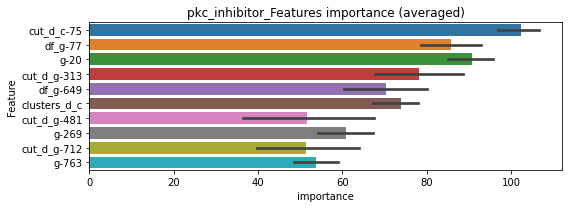

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 pkc_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171904	valid_1's binary_logloss: 0.0271608
[200]	training's binary_logloss: 0.00237416	valid_1's binary_logloss: 0.0117953
[300]	training's binary_logloss: 0.000673498	valid_1's binary_logloss: 0.00961821
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.000570264	valid_1's binary_logloss: 0.00946963


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 pkc_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174001	valid_1's binary_logloss: 0.0262098
[200]	training's binary_logloss: 0.00246117	valid_1's binary_logloss: 0.00920644
[300]	training's binary_logloss: 0.000710554	valid_1's binary_logloss: 0.00662475
[400]	training's binary_logloss: 0.000349294	valid_1's binary_logloss: 0.00604462
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000282318	valid_1's binary_logloss: 0.00588497


pkc_inhibitor logloss: 0.00767730316598009


neg labels: 3289 → selected neg labels: 3279


potassium_channel_activator, len(trt): 55, len(othr): 3279, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0429858	valid_1's binary_logloss: 0.0751517
[200]	training's binary_logloss: 0.00805297	valid_1's binary_logloss: 0.0308656
[300]	training's binary_logloss: 0.00243404	valid_1's binary_logloss: 0.0203226
[400]	training's binary_logloss: 0.00116386	valid_1's binary_logloss: 0.016807
[500]	training's binary_logloss: 0.000740489	valid_1's binary_logloss: 0.0151871
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000653823	valid_1's binary_logloss: 0.0148253
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0447524	valid_1's binary_logloss: 0.0877967
[200]	training's binary_logloss: 0.00815583	valid_1's binary_logloss: 0.0476445
[300]	training's binary_logloss: 0.00247372	valid_1's binary_logloss: 0.0410935
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00196046	valid_1's binary_logloss: 0.0401245


1 / 3 AUC score:0.999
y_Threshold: 0.0073244, Threshold: 0.0110179, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00231
Num_p_label: 80.0, conf_0:0.00992, conf_1:0.01212
Num_p_label: 80.0, Expected: 9.2, Adj_threshold_1: 0.0110179
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_2: 0.0210179
Num_p_label: 10.0, Expected: 9.2, Adj_threshold_3: 0.0310179
threshold: 0.0310179, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0419659	valid_1's binary_logloss: 0.0772289
[200]	training's binary_logloss: 0.00747613	valid_1's binary_logloss: 0.0347897
[300]	training's binary_logloss: 0.0022694	valid_1's binary_logloss: 0.0257121
[400]	training's binary_logloss: 0.001086	valid_1's binary_logloss: 0.0230223
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000850023	valid_1's binary_logloss: 0.0218759
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0457748	valid_1's binary_logloss: 0.0758989
[200]	training's binary_logloss: 0.00832374	valid_1's binary_logloss: 0.0296711
[300]	training's binary_logloss: 0.00248452	valid_1's binary_logloss: 0.0195182
[400]	training's binary_logloss: 0.0011797	valid_1's binary_logloss: 0.0164628
[500]	training's binary_logloss: 0.000747522	valid_1's binary_logloss: 0.0152335
Early stopping, best iteration is:
[498]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0231569, Threshold: 0.0310179, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0067805 Vs.target_rate: 0.00231
Num_p_label: 27.0, conf_0:0.02792, conf_1:0.03412
threshold: 0.0310179, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0431551	valid_1's binary_logloss: 0.0783581
[200]	training's binary_logloss: 0.0076702	valid_1's binary_logloss: 0.0371185
[300]	training's binary_logloss: 0.00230536	valid_1's binary_logloss: 0.0283744
[400]	training's binary_logloss: 0.0011141	valid_1's binary_logloss: 0.0251509
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000929587	valid_1's binary_logloss: 0.0242919
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0438761	valid_1's binary_logloss: 0.0780816
[200]	training's binary_logloss: 0.0077865	valid_1's binary_logloss: 0.0344296
[300]	training's binary_logloss: 0.00238491	valid_1's binary_logloss: 0.0256189
[400]	training's binary_logloss: 0.00112393	valid_1's binary_logloss: 0.0229858
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00101209	valid_1's binary_logloss: 0.0226602


3 / 3 AUC score:1.000
y_Threshold: 0.0331539, Threshold: 0.0310179, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00231
Num_p_label: 20.0, conf_0:0.02792, conf_1:0.03412
threshold: 0.0310179, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 671.0/7776, y_label_rate: 0.0862912


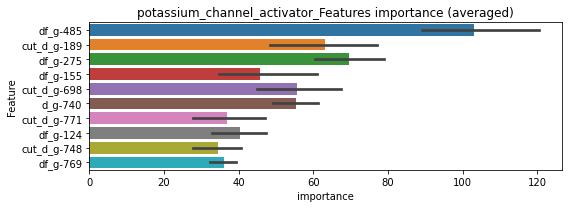

len(train_index) : 3888
len(valid_index) : 3888
================================= fold 1/2 potassium_channel_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246442	valid_1's binary_logloss: 0.0524034
[200]	training's binary_logloss: 0.00463061	valid_1's binary_logloss: 0.0283317
[300]	training's binary_logloss: 0.00137984	valid_1's binary_logloss: 0.0241424
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00102421	valid_1's binary_logloss: 0.0236414


len(train_index) : 3888
len(valid_index) : 3888
================================= fold 2/2 potassium_channel_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0253132	valid_1's binary_logloss: 0.0508878
[200]	training's binary_logloss: 0.00473629	valid_1's binary_logloss: 0.030302
[300]	training's binary_logloss: 0.00140137	valid_1's binary_logloss: 0.0270796
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00137302	valid_1's binary_logloss: 0.0270513


potassium_channel_activator logloss: 0.02534636720321552


neg labels: 3289 → selected neg labels: 3272


potassium_channel_antagonist, len(trt): 98, len(othr): 3272, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0558055	valid_1's binary_logloss: 0.132265
[200]	training's binary_logloss: 0.0135509	valid_1's binary_logloss: 0.0935489
[300]	training's binary_logloss: 0.0044302	valid_1's binary_logloss: 0.0860106
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0029689	valid_1's binary_logloss: 0.0837961
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0616308	valid_1's binary_logloss: 0.127933
[200]	training's binary_logloss: 0.0153386	valid_1's binary_logloss: 0.0860517
[300]	training's binary_logloss: 0.00498879	valid_1's binary_logloss: 0.077161
[400]	training's binary_logloss: 0.00226252	valid_1's binary_logloss: 0.0744689
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00233601	valid_1's binary_logloss: 0.0744685


1 / 3 AUC score:0.996
y_Threshold: 0.0132409, Threshold: 0.0166660, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 160 → Positive_corect_labels: 640/3766
p_label_rate: 0.0200904 Vs.target_rate: 0.00412
Num_p_label: 80.0, conf_0:0.01500, conf_1:0.01833
Num_p_label: 80.0, Expected: 16.4, Adj_threshold_1: 0.0166660
Num_p_label: 25.0, Expected: 16.4, Adj_threshold_2: 0.0266660
threshold: 0.0266660, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0542239	valid_1's binary_logloss: 0.121178
[200]	training's binary_logloss: 0.0124133	valid_1's binary_logloss: 0.0755688
[300]	training's binary_logloss: 0.00403445	valid_1's binary_logloss: 0.0632405
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00218372	valid_1's binary_logloss: 0.0596799
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0592591	valid_1's binary_logloss: 0.112177
[200]	training's binary_logloss: 0.014394	valid_1's binary_logloss: 0.0704682
[300]	training's binary_logloss: 0.00474741	valid_1's binary_logloss: 0.0594624
[400]	training's binary_logloss: 0.00215973	valid_1's binary_logloss: 0.0562349
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00165818	valid_1's binary_logloss: 0.0553201


2 / 3 AUC score:0.997
y_Threshold: 0.0292664, Threshold: 0.0266660, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 628.0/3742
p_label_rate: 0.0085384 Vs.target_rate: 0.00412
Num_p_label: 34.0, conf_0:0.02400, conf_1:0.02933
threshold: 0.0266660, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0524652	valid_1's binary_logloss: 0.113471
[200]	training's binary_logloss: 0.0124152	valid_1's binary_logloss: 0.0742361
[300]	training's binary_logloss: 0.00398353	valid_1's binary_logloss: 0.0662678
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0028915	valid_1's binary_logloss: 0.0649096
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0557569	valid_1's binary_logloss: 0.119263
[200]	training's binary_logloss: 0.0127223	valid_1's binary_logloss: 0.0753064
[300]	training's binary_logloss: 0.00408775	valid_1's binary_logloss: 0.0638114
[400]	training's binary_logloss: 0.00192378	valid_1's binary_logloss: 0.0598409
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00160113	valid_1's binary_logloss: 0.0587879


3 / 3 AUC score:0.998
y_Threshold: 0.0294444, Threshold: 0.0266660, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 616.0/3718
p_label_rate: 0.0087896 Vs.target_rate: 0.00412
Num_p_label: 35.0, conf_0:0.02400, conf_1:0.02933
threshold: 0.0266660, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 651.0/7700, y_label_rate: 0.0845455


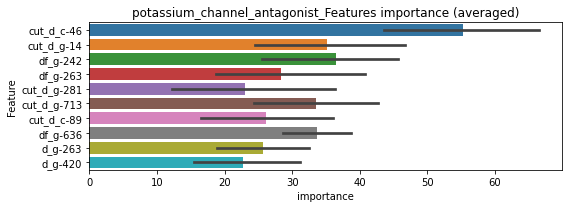

len(train_index) : 3850
len(valid_index) : 3850
================================= fold 1/2 potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030413	valid_1's binary_logloss: 0.0774546
[200]	training's binary_logloss: 0.0070142	valid_1's binary_logloss: 0.058235
[300]	training's binary_logloss: 0.00225451	valid_1's binary_logloss: 0.0551977
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00236331	valid_1's binary_logloss: 0.055176


len(train_index) : 3850
len(valid_index) : 3850
================================= fold 2/2 potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0334641	valid_1's binary_logloss: 0.0709754
[200]	training's binary_logloss: 0.00818003	valid_1's binary_logloss: 0.0516379
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00344298	valid_1's binary_logloss: 0.0485728


potassium_channel_antagonist logloss: 0.051874408222165894


neg labels: 3289 → selected neg labels: 3269


ppar_receptor_agonist, len(trt): 115, len(othr): 3269, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0527565	valid_1's binary_logloss: 0.132678
[200]	training's binary_logloss: 0.0125962	valid_1's binary_logloss: 0.0910997
[300]	training's binary_logloss: 0.00410008	valid_1's binary_logloss: 0.0818136
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00329144	valid_1's binary_logloss: 0.0808359
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0592142	valid_1's binary_logloss: 0.122996
[200]	training's binary_logloss: 0.0150837	valid_1's binary_logloss: 0.0718643
[300]	training's binary_logloss: 0.00499494	valid_1's binary_logloss: 0.0555015
[400]	training's binary_logloss: 0.0023074	valid_1's binary_logloss: 0.0506362
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00157158	valid_1's binary_logloss: 0.0490776


1 / 3 AUC score:0.993
y_Threshold: 0.0151912, Threshold: 0.0642246, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 158 → Positive_corect_labels: 640/3764
p_label_rate: 0.0200904 Vs.target_rate: 0.00483
Num_p_label: 80.0, conf_0:0.05780, conf_1:0.07065
Num_p_label: 80.0, Expected: 19.2, Adj_threshold_1: 0.0642246
Num_p_label: 73.0, Expected: 19.2, Adj_threshold_2: 0.0742246
Num_p_label: 64.0, Expected: 19.2, Adj_threshold_3: 0.0842246
Num_p_label: 53.0, Expected: 19.2, Adj_threshold_4: 0.0942246
Num_p_label: 50.0, Expected: 19.2, Adj_threshold_5: 0.1042246
Num_p_label: 41.0, Expected: 19.2, Adj_threshold_6: 0.1142246
Num_p_label: 39.0, Expected: 19.2, Adj_threshold_7: 0.1242246
Num_p_label: 36.0, Expected: 19.2, Adj_threshold_8: 0.1342246
threshold: 0.1342246, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 640.0/3764, y_label_rate: 0.1700319
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0515522	valid_1's binary_logloss: 0.119701
[200]	training's binary_logloss: 0.0114566	valid_1's binary_logloss: 0.0751111
[300]	training's binary_logloss: 0.0037616	valid_1's binary_logloss: 0.0631875
[400]	training's binary_logloss: 0.00179149	valid_1's binary_logloss: 0.059971
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00143415	valid_1's binary_logloss: 0.0585226
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0554775	valid_1's binary_logloss: 0.115531
[200]	training's binary_logloss: 0.0124904	valid_1's binary_logloss: 0.0682754
[300]	training's binary_logloss: 0.00407999	valid_1's binary_logloss: 0.0556156
[400]	training's binary_logloss: 0.00193462	valid_1's binary_logloss: 0.0521519
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.0015718	valid_1's binary_logloss: 0.0513856


2 / 3 AUC score:0.996
y_Threshold: 0.0459426, Threshold: 0.1342246, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 625.0/3734
p_label_rate: 0.0215972 Vs.target_rate: 0.00483
Num_p_label: 86.0, conf_0:0.12080, conf_1:0.14765
Num_p_label: 86.0, Expected: 19.2, Adj_threshold_1: 0.1342246
Num_p_label: 83.0, Expected: 19.2, Adj_threshold_2: 0.1442246
Num_p_label: 81.0, Expected: 19.2, Adj_threshold_3: 0.1542246
Num_p_label: 79.0, Expected: 19.2, Adj_threshold_4: 0.1642246
Num_p_label: 78.0, Expected: 19.2, Adj_threshold_5: 0.1742246
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_6: 0.1842246
Num_p_label: 76.0, Expected: 19.2, Adj_threshold_7: 0.1942246
Num_p_label: 75.0, Expected: 19.2, Adj_threshold_8: 0.2042246
Num_p_label: 73.0, Expected: 19.2, Adj_threshold_9: 0.2142246
Num_p_label: 69.0, Expected: 19.2, Adj_threshold_10: 0.2242246
threshold: 0.2342246, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 625.0/3734, y_label_rate: 0.167380

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.050231	valid_1's binary_logloss: 0.113189
[200]	training's binary_logloss: 0.0106713	valid_1's binary_logloss: 0.0682468
[300]	training's binary_logloss: 0.00348165	valid_1's binary_logloss: 0.0550322
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00190718	valid_1's binary_logloss: 0.0521613
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511893	valid_1's binary_logloss: 0.106766
[200]	training's binary_logloss: 0.0113853	valid_1's binary_logloss: 0.0625921
[300]	training's binary_logloss: 0.00370111	valid_1's binary_logloss: 0.0509324
[400]	training's binary_logloss: 0.00175252	valid_1's binary_logloss: 0.046643
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00179403	valid_1's binary_logloss: 0.0465124


3 / 3 AUC score:0.999
y_Threshold: 0.0420489, Threshold: 0.2342246, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 612.0/3708
p_label_rate: 0.0165746 Vs.target_rate: 0.00483
Num_p_label: 66.0, conf_0:0.21080, conf_1:0.25765
Num_p_label: 66.0, Expected: 19.2, Adj_threshold_1: 0.2342246
Num_p_label: 65.0, Expected: 19.2, Adj_threshold_2: 0.2442246
Num_p_label: 64.0, Expected: 19.2, Adj_threshold_3: 0.2542246
Num_p_label: 63.0, Expected: 19.2, Adj_threshold_4: 0.2642246
Num_p_label: 63.0, Expected: 19.2, Adj_threshold_5: 0.2742246
Num_p_label: 63.0, Expected: 19.2, Adj_threshold_6: 0.2842246
Num_p_label: 60.0, Expected: 19.2, Adj_threshold_7: 0.2942246
Num_p_label: 59.0, Expected: 19.2, Adj_threshold_8: 0.3042246
Num_p_label: 59.0, Expected: 19.2, Adj_threshold_9: 0.3142246
Num_p_label: 58.0, Expected: 19.2, Adj_threshold_10: 0.3242246
threshold: 0.3342246, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 664.0/7690, y_label_rate: 0.086345

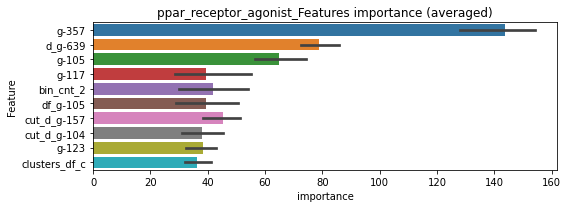

len(train_index) : 3845
len(valid_index) : 3845
================================= fold 1/2 ppar_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277849	valid_1's binary_logloss: 0.0672486
[200]	training's binary_logloss: 0.0057658	valid_1's binary_logloss: 0.0408889
[300]	training's binary_logloss: 0.00188865	valid_1's binary_logloss: 0.0352059
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00112318	valid_1's binary_logloss: 0.0331868


len(train_index) : 3845
len(valid_index) : 3845
================================= fold 2/2 ppar_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277584	valid_1's binary_logloss: 0.0740739
[200]	training's binary_logloss: 0.00605864	valid_1's binary_logloss: 0.0492905
[300]	training's binary_logloss: 0.00197325	valid_1's binary_logloss: 0.0426076
[400]	training's binary_logloss: 0.000932653	valid_1's binary_logloss: 0.0402611
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00078172	valid_1's binary_logloss: 0.0394331


ppar_receptor_agonist logloss: 0.03630997134584019


neg labels: 3289 → selected neg labels: 3284


ppar_receptor_antagonist, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316499	valid_1's binary_logloss: 0.0522455
[200]	training's binary_logloss: 0.00457389	valid_1's binary_logloss: 0.018562
[300]	training's binary_logloss: 0.00131713	valid_1's binary_logloss: 0.0116455
[400]	training's binary_logloss: 0.000654556	valid_1's binary_logloss: 0.00936927
[500]	training's binary_logloss: 0.00045339	valid_1's binary_logloss: 0.00862182
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000434939	valid_1's binary_logloss: 0.00854218
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312461	valid_1's binary_logloss: 0.0533474
[200]	training's binary_logloss: 0.0046268	valid_1's binary_logloss: 0.0197973
[300]	training's binary_logloss: 0.00133052	valid_1's binary_logloss: 0.0130534
[400]	training's binary_logloss: 0.000659845	valid_1's binary_logloss: 0.0111993
Early stopping, best iteration is:
[444]	

1 / 3 AUC score:1.000
y_Threshold: 0.0025559, Threshold: 0.0039054, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00351, conf_1:0.00430
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0039054
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_2: 0.0139054
threshold: 0.0139054, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0319009	valid_1's binary_logloss: 0.0500827
[200]	training's binary_logloss: 0.00452865	valid_1's binary_logloss: 0.0154683
[300]	training's binary_logloss: 0.00131011	valid_1's binary_logloss: 0.00967261
[400]	training's binary_logloss: 0.000649524	valid_1's binary_logloss: 0.00802801
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000561936	valid_1's binary_logloss: 0.00779453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322546	valid_1's binary_logloss: 0.0501982
[200]	training's binary_logloss: 0.00461229	valid_1's binary_logloss: 0.0148553
[300]	training's binary_logloss: 0.00133408	valid_1's binary_logloss: 0.0079963
[400]	training's binary_logloss: 0.000652729	valid_1's binary_logloss: 0.00598805
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000535038	valid_1's binary_logloss: 0.00550286


2 / 3 AUC score:1.000
y_Threshold: 0.0356712, Threshold: 0.0139054, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0092918 Vs.target_rate: 0.00126
Num_p_label: 37.0, conf_0:0.01251, conf_1:0.01530
Num_p_label: 37.0, Expected: 5.0, Adj_threshold_1: 0.0139054
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0239054
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0339054
threshold: 0.0339054, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0319009	valid_1's binary_logloss: 0.0500827
[200]	training's binary_logloss: 0.00452865	valid_1's binary_logloss: 0.0154683
[300]	training's binary_logloss: 0.00131011	valid_1's binary_logloss: 0.00967261
[400]	training's binary_logloss: 0.000649524	valid_1's binary_logloss: 0.00802801
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000561936	valid_1's binary_logloss: 0.00779453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322546	valid_1's binary_logloss: 0.0501982
[200]	training's binary_logloss: 0.00461229	valid_1's binary_logloss: 0.0148553
[300]	training's binary_logloss: 0.00133408	valid_1's binary_logloss: 0.0079963
[400]	training's binary_logloss: 0.000652729	valid_1's binary_logloss: 0.00598805
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000535038	valid_1's binary_logloss: 0.00550286


3 / 3 AUC score:1.000
y_Threshold: 0.0356712, Threshold: 0.0339054, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, conf_0:0.03051, conf_1:0.03730
threshold: 0.0339054, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 663.0/7788, y_label_rate: 0.0851310


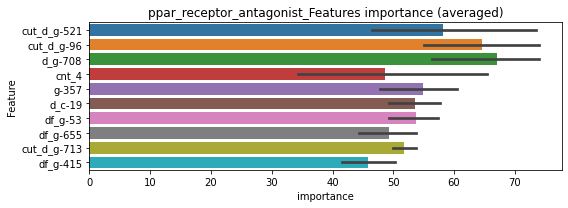

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176363	valid_1's binary_logloss: 0.0312717
[200]	training's binary_logloss: 0.00250932	valid_1's binary_logloss: 0.0140088
[300]	training's binary_logloss: 0.000704257	valid_1's binary_logloss: 0.0115891
[400]	training's binary_logloss: 0.000338294	valid_1's binary_logloss: 0.0110621
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000340352	valid_1's binary_logloss: 0.0110417


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179019	valid_1's binary_logloss: 0.0265079
[200]	training's binary_logloss: 0.00268544	valid_1's binary_logloss: 0.00792015
[300]	training's binary_logloss: 0.000749752	valid_1's binary_logloss: 0.00487199
[400]	training's binary_logloss: 0.000362877	valid_1's binary_logloss: 0.0042069
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00028194	valid_1's binary_logloss: 0.00407948


ppar_receptor_antagonist logloss: 0.00756057832152836


neg labels: 3289 → selected neg labels: 3271


progesterone_receptor_agonist, len(trt): 119, len(othr): 3271, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0577381	valid_1's binary_logloss: 0.153576
[200]	training's binary_logloss: 0.0148056	valid_1's binary_logloss: 0.120629
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00544208	valid_1's binary_logloss: 0.113051
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0635395	valid_1's binary_logloss: 0.134398
[200]	training's binary_logloss: 0.0169041	valid_1's binary_logloss: 0.0906942
[300]	training's binary_logloss: 0.00569864	valid_1's binary_logloss: 0.0786756
[400]	training's binary_logloss: 0.00258496	valid_1's binary_logloss: 0.0752947
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00236699	valid_1's binary_logloss: 0.0748763


1 / 3 AUC score:0.990
y_Threshold: 0.0222114, Threshold: 0.0300338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 183 → Positive_corect_labels: 628/3742
p_label_rate: 0.0200904 Vs.target_rate: 0.00500
Num_p_label: 80.0, conf_0:0.02703, conf_1:0.03304
Num_p_label: 80.0, Expected: 19.9, Adj_threshold_1: 0.0300338
Num_p_label: 43.0, Expected: 19.9, Adj_threshold_2: 0.0400338
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_3: 0.0500338
threshold: 0.0500338, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.055157	valid_1's binary_logloss: 0.118258
[200]	training's binary_logloss: 0.0131579	valid_1's binary_logloss: 0.0795979
[300]	training's binary_logloss: 0.00442334	valid_1's binary_logloss: 0.0695705
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00345296	valid_1's binary_logloss: 0.0685626
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0546196	valid_1's binary_logloss: 0.126388
[200]	training's binary_logloss: 0.0132811	valid_1's binary_logloss: 0.0856622
[300]	training's binary_logloss: 0.00441313	valid_1's binary_logloss: 0.0756751
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0035562	valid_1's binary_logloss: 0.0744848


2 / 3 AUC score:0.995
y_Threshold: 0.0434341, Threshold: 0.0500338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0143144 Vs.target_rate: 0.00500
Num_p_label: 57.0, conf_0:0.04503, conf_1:0.05504
threshold: 0.0500338, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 606.0/3698, y_label_rate: 0.1638724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0503212	valid_1's binary_logloss: 0.118806
[200]	training's binary_logloss: 0.0110111	valid_1's binary_logloss: 0.0794279
[300]	training's binary_logloss: 0.00360844	valid_1's binary_logloss: 0.0686465
[400]	training's binary_logloss: 0.00172391	valid_1's binary_logloss: 0.065403
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00132982	valid_1's binary_logloss: 0.0640032
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0529974	valid_1's binary_logloss: 0.113396
[200]	training's binary_logloss: 0.0123982	valid_1's binary_logloss: 0.0699908
[300]	training's binary_logloss: 0.00404746	valid_1's binary_logloss: 0.0585096
[400]	training's binary_logloss: 0.00189444	valid_1's binary_logloss: 0.0539044
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00170622	valid_1's binary_logloss: 0.0533763


3 / 3 AUC score:0.999
y_Threshold: 0.0395848, Threshold: 0.0500338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 589.0/3664
p_label_rate: 0.0090407 Vs.target_rate: 0.00500
Num_p_label: 36.0, conf_0:0.04503, conf_1:0.05504
threshold: 0.0500338, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 625.0/7646, y_label_rate: 0.0817421


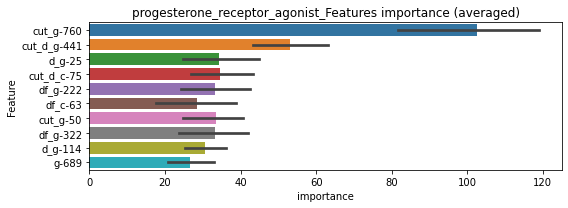

len(train_index) : 3823
len(valid_index) : 3823
================================= fold 1/2 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295269	valid_1's binary_logloss: 0.0730336
[200]	training's binary_logloss: 0.00674608	valid_1's binary_logloss: 0.0511685
[300]	training's binary_logloss: 0.00222141	valid_1's binary_logloss: 0.0474476
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00117216	valid_1's binary_logloss: 0.0459451


len(train_index) : 3823
len(valid_index) : 3823
================================= fold 2/2 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297934	valid_1's binary_logloss: 0.0725846
[200]	training's binary_logloss: 0.00683841	valid_1's binary_logloss: 0.0543228
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.00300892	valid_1's binary_logloss: 0.0520601


progesterone_receptor_agonist logloss: 0.04900260687139368


neg labels: 3289 → selected neg labels: 3286


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023359	valid_1's binary_logloss: 0.0315668
[200]	training's binary_logloss: 0.00273933	valid_1's binary_logloss: 0.00587962
[300]	training's binary_logloss: 0.000779108	valid_1's binary_logloss: 0.00255375
[400]	training's binary_logloss: 0.00041125	valid_1's binary_logloss: 0.00177051
[500]	training's binary_logloss: 0.000330471	valid_1's binary_logloss: 0.00160467
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000330471	valid_1's binary_logloss: 0.00160467
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232466	valid_1's binary_logloss: 0.030565
[200]	training's binary_logloss: 0.00276788	valid_1's binary_logloss: 0.00530265
[300]	training's binary_logloss: 0.000798038	valid_1's binary_logloss: 0.00221776
[400]	training's binary_logloss: 0.000423001	valid_1's binary_logloss: 0.00144391
Early stopping, best iteration is:

1 / 3 AUC score:1.000
y_Threshold: 0.0012640, Threshold: 0.0022878, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00206, conf_1:0.00252
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0022878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0122878
threshold: 0.0122878, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234088	valid_1's binary_logloss: 0.0326354
[200]	training's binary_logloss: 0.00274188	valid_1's binary_logloss: 0.00612984
[300]	training's binary_logloss: 0.00077285	valid_1's binary_logloss: 0.00262338
[400]	training's binary_logloss: 0.000410945	valid_1's binary_logloss: 0.00180113
[500]	training's binary_logloss: 0.000325738	valid_1's binary_logloss: 0.00158043
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000325981	valid_1's binary_logloss: 0.00157921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236691	valid_1's binary_logloss: 0.0294064
[200]	training's binary_logloss: 0.00276917	valid_1's binary_logloss: 0.004637
[300]	training's binary_logloss: 0.000788179	valid_1's binary_logloss: 0.00165561
[400]	training's binary_logloss: 0.000417638	valid_1's binary_logloss: 0.00101739
Early stopping, best iteration is:

2 / 3 AUC score:1.000
y_Threshold: 0.1127392, Threshold: 0.0122878, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, conf_0:0.01106, conf_1:0.01352
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0122878
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0222878
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0322878
threshold: 0.0322878, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234088	valid_1's binary_logloss: 0.0326354
[200]	training's binary_logloss: 0.00274188	valid_1's binary_logloss: 0.00612984
[300]	training's binary_logloss: 0.00077285	valid_1's binary_logloss: 0.00262338
[400]	training's binary_logloss: 0.000410945	valid_1's binary_logloss: 0.00180113
[500]	training's binary_logloss: 0.000325738	valid_1's binary_logloss: 0.00158043
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000325981	valid_1's binary_logloss: 0.00157921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236691	valid_1's binary_logloss: 0.0294064
[200]	training's binary_logloss: 0.00276917	valid_1's binary_logloss: 0.004637
[300]	training's binary_logloss: 0.000788179	valid_1's binary_logloss: 0.00165561
[400]	training's binary_logloss: 0.000417638	valid_1's binary_logloss: 0.00101739
Early stopping, best iteration is:

3 / 3 AUC score:1.000
y_Threshold: 0.1127392, Threshold: 0.0322878, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.02906, conf_1:0.03552
threshold: 0.0322878, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7793, y_label_rate: 0.0848197


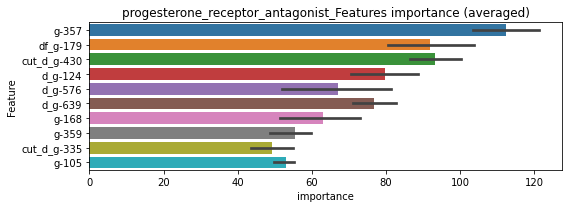

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120641	valid_1's binary_logloss: 0.018216
[200]	training's binary_logloss: 0.00138	valid_1's binary_logloss: 0.0061724
[300]	training's binary_logloss: 0.000389796	valid_1's binary_logloss: 0.00491878
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.000275117	valid_1's binary_logloss: 0.00477364


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123842	valid_1's binary_logloss: 0.0162733
[200]	training's binary_logloss: 0.00146359	valid_1's binary_logloss: 0.00361478
[300]	training's binary_logloss: 0.000407245	valid_1's binary_logloss: 0.00222676
[400]	training's binary_logloss: 0.000214742	valid_1's binary_logloss: 0.00197114
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.0001768	valid_1's binary_logloss: 0.00192561


progesterone_receptor_antagonist logloss: 0.0033498058362819343


neg labels: 3289 → selected neg labels: 3283


prostaglandin_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330561	valid_1's binary_logloss: 0.0572827
[200]	training's binary_logloss: 0.00510411	valid_1's binary_logloss: 0.0227481
[300]	training's binary_logloss: 0.00158517	valid_1's binary_logloss: 0.0168337
[400]	training's binary_logloss: 0.000764485	valid_1's binary_logloss: 0.0141659
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000573186	valid_1's binary_logloss: 0.013458
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0360053	valid_1's binary_logloss: 0.0540585
[200]	training's binary_logloss: 0.00606812	valid_1's binary_logloss: 0.0197268
[300]	training's binary_logloss: 0.00176324	valid_1's binary_logloss: 0.0131331
[400]	training's binary_logloss: 0.000850676	valid_1's binary_logloss: 0.011721
[500]	training's binary_logloss: 0.000556404	valid_1's binary_logloss: 0.0109964
Early stopping, best iteration is:
[526]	tr

1 / 3 AUC score:1.000
y_Threshold: 0.0033561, Threshold: 0.0051396, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00463, conf_1:0.00565
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0051396
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0151396
threshold: 0.0151396, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0335589	valid_1's binary_logloss: 0.0549679
[200]	training's binary_logloss: 0.00533459	valid_1's binary_logloss: 0.0179954
[300]	training's binary_logloss: 0.00159645	valid_1's binary_logloss: 0.0109789
[400]	training's binary_logloss: 0.000797078	valid_1's binary_logloss: 0.00891894
[500]	training's binary_logloss: 0.000533137	valid_1's binary_logloss: 0.0081265
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000482736	valid_1's binary_logloss: 0.00798511
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347482	valid_1's binary_logloss: 0.0489736
[200]	training's binary_logloss: 0.00565028	valid_1's binary_logloss: 0.014405
[300]	training's binary_logloss: 0.00166174	valid_1's binary_logloss: 0.00820566
[400]	training's binary_logloss: 0.000822257	valid_1's binary_logloss: 0.00648199
[500]	training's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.0201911, Threshold: 0.0151396, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, conf_0:0.01363, conf_1:0.01665
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0151396
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0251396
threshold: 0.0251396, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344357	valid_1's binary_logloss: 0.0549404
[200]	training's binary_logloss: 0.00527961	valid_1's binary_logloss: 0.0154439
[300]	training's binary_logloss: 0.0016991	valid_1's binary_logloss: 0.00880881
[400]	training's binary_logloss: 0.000791539	valid_1's binary_logloss: 0.00610743
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000586493	valid_1's binary_logloss: 0.00544288
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0341748	valid_1's binary_logloss: 0.0491719
[200]	training's binary_logloss: 0.00546192	valid_1's binary_logloss: 0.0146472
[300]	training's binary_logloss: 0.00161758	valid_1's binary_logloss: 0.00829014
[400]	training's binary_logloss: 0.000809262	valid_1's binary_logloss: 0.00633851
[500]	training's binary_logloss: 0.000547202	valid_1's binary_logloss: 0.00564121
Early stopping, best iteration is:
[

3 / 3 AUC score:1.000
y_Threshold: 0.0347265, Threshold: 0.0251396, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.02263, conf_1:0.02765
threshold: 0.0251396, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 660.0/7785, y_label_rate: 0.0847784


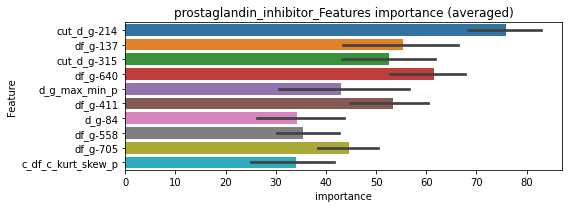

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186537	valid_1's binary_logloss: 0.0352131
[200]	training's binary_logloss: 0.00293074	valid_1's binary_logloss: 0.0153431
[300]	training's binary_logloss: 0.000831638	valid_1's binary_logloss: 0.0120834
[400]	training's binary_logloss: 0.000404301	valid_1's binary_logloss: 0.0112864
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000315249	valid_1's binary_logloss: 0.0109999


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0177707	valid_1's binary_logloss: 0.0291436
[200]	training's binary_logloss: 0.00287981	valid_1's binary_logloss: 0.0117871
[300]	training's binary_logloss: 0.000849436	valid_1's binary_logloss: 0.00856024
[400]	training's binary_logloss: 0.000417123	valid_1's binary_logloss: 0.00749041
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000319136	valid_1's binary_logloss: 0.00735044


prostaglandin_inhibitor logloss: 0.00917541277940669


neg labels: 3289 → selected neg labels: 3274


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3274, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0524281	valid_1's binary_logloss: 0.129563
[200]	training's binary_logloss: 0.0117116	valid_1's binary_logloss: 0.0916945
[300]	training's binary_logloss: 0.00375643	valid_1's binary_logloss: 0.0826779
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00372212	valid_1's binary_logloss: 0.0826129
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0556923	valid_1's binary_logloss: 0.110208
[200]	training's binary_logloss: 0.0128431	valid_1's binary_logloss: 0.0672012
[300]	training's binary_logloss: 0.00417701	valid_1's binary_logloss: 0.0539381
[400]	training's binary_logloss: 0.00195496	valid_1's binary_logloss: 0.0504093
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00153508	valid_1's binary_logloss: 0.0494065


1 / 3 AUC score:0.995
y_Threshold: 0.0120983, Threshold: 0.0155317, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 152 → Positive_corect_labels: 644/3776
p_label_rate: 0.0200904 Vs.target_rate: 0.00353
Num_p_label: 80.0, conf_0:0.01398, conf_1:0.01708
Num_p_label: 80.0, Expected: 14.0, Adj_threshold_1: 0.0155317
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_2: 0.0255317
threshold: 0.0255317, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 644.0/3776, y_label_rate: 0.1705508
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0530905	valid_1's binary_logloss: 0.112303
[200]	training's binary_logloss: 0.0119192	valid_1's binary_logloss: 0.070973
[300]	training's binary_logloss: 0.00377881	valid_1's binary_logloss: 0.0597664
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00189501	valid_1's binary_logloss: 0.0561344
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0550196	valid_1's binary_logloss: 0.106374
[200]	training's binary_logloss: 0.0126096	valid_1's binary_logloss: 0.0632541
[300]	training's binary_logloss: 0.0040569	valid_1's binary_logloss: 0.0529647
[400]	training's binary_logloss: 0.00188531	valid_1's binary_logloss: 0.0501603
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00186217	valid_1's binary_logloss: 0.0501237


2 / 3 AUC score:0.998
y_Threshold: 0.0294204, Threshold: 0.0255317, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0065294 Vs.target_rate: 0.00353
Num_p_label: 26.0, conf_0:0.02298, conf_1:0.02808
threshold: 0.0255317, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0503833	valid_1's binary_logloss: 0.102272
[200]	training's binary_logloss: 0.011162	valid_1's binary_logloss: 0.0594025
[300]	training's binary_logloss: 0.00354004	valid_1's binary_logloss: 0.0475903
[400]	training's binary_logloss: 0.00168079	valid_1's binary_logloss: 0.0434083
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00132213	valid_1's binary_logloss: 0.0426226
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0535447	valid_1's binary_logloss: 0.101617
[200]	training's binary_logloss: 0.0119075	valid_1's binary_logloss: 0.0588081
[300]	training's binary_logloss: 0.00377145	valid_1's binary_logloss: 0.0476999
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00226538	valid_1's binary_logloss: 0.0450397


3 / 3 AUC score:1.000
y_Threshold: 0.0328959, Threshold: 0.0255317, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 627.0/3742
p_label_rate: 0.0070316 Vs.target_rate: 0.00353
Num_p_label: 28.0, conf_0:0.02298, conf_1:0.02808
threshold: 0.0255317, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 655.0/7724, y_label_rate: 0.0848006


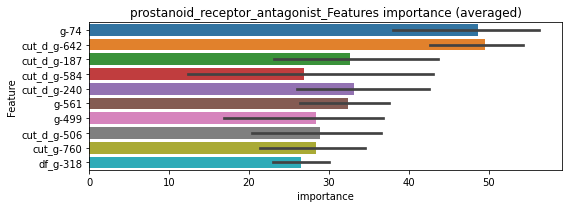

len(train_index) : 3862
len(valid_index) : 3862
================================= fold 1/2 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315414	valid_1's binary_logloss: 0.0721033
[200]	training's binary_logloss: 0.00696563	valid_1's binary_logloss: 0.0473383
[300]	training's binary_logloss: 0.00218605	valid_1's binary_logloss: 0.0426682
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0011237	valid_1's binary_logloss: 0.0413832


len(train_index) : 3862
len(valid_index) : 3862
================================= fold 2/2 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0308376	valid_1's binary_logloss: 0.067492
[200]	training's binary_logloss: 0.00683483	valid_1's binary_logloss: 0.0441526
[300]	training's binary_logloss: 0.00217164	valid_1's binary_logloss: 0.0392163
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00151306	valid_1's binary_logloss: 0.038172


prostanoid_receptor_antagonist logloss: 0.039777619948599824


neg labels: 3289 → selected neg labels: 3285


proteasome_inhibitor, len(trt): 726, len(othr): 3285, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207342	valid_1's binary_logloss: 0.0236083
[200]	training's binary_logloss: 0.00213804	valid_1's binary_logloss: 0.00660812
[300]	training's binary_logloss: 0.000538823	valid_1's binary_logloss: 0.00550175
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000503299	valid_1's binary_logloss: 0.00547908
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196117	valid_1's binary_logloss: 0.0270018
[200]	training's binary_logloss: 0.00194449	valid_1's binary_logloss: 0.0107946
[300]	training's binary_logloss: 0.000485795	valid_1's binary_logloss: 0.00922559
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000522145	valid_1's binary_logloss: 0.00920838


1 / 3 AUC score:1.000
y_Threshold: 0.0001755, Threshold: 0.9990620, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 161 → Positive_corect_labels: 726/3850
p_label_rate: 0.0200904 Vs.target_rate: 0.03049
Num_p_label: 80.0, conf_0:0.89916, conf_1:1.09897
threshold: 0.9990620, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 726.0/3850, y_label_rate: 0.1885714
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155936	valid_1's binary_logloss: 0.0158688
[200]	training's binary_logloss: 0.00103296	valid_1's binary_logloss: 0.00111987
[300]	training's binary_logloss: 0.000244524	valid_1's binary_logloss: 0.000289024
[400]	training's binary_logloss: 0.000166283	valid_1's binary_logloss: 0.000204266
[500]	training's binary_logloss: 0.000152031	valid_1's binary_logloss: 0.000188705
[600]	training's binary_logloss: 0.00014856	valid_1's binary_logloss: 0.000184741
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.000184653
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157495	valid_1's binary_logloss: 0.0161485
[200]	training's binary_logloss: 0.00105282	valid_1's binary_logloss: 0.00115115
[300]	training's binary_logloss: 0.000248589	valid_1's binary_logloss: 0.000288789
[400]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1951262, Threshold: 0.9990620, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 0 → Positive_corect_labels: 726.0/3850
p_label_rate: 0.0381718 Vs.target_rate: 0.03049
Num_p_label: 152.0, conf_0:0.89916, conf_1:1.09897
threshold: 0.9990620, positive_p_label: 152.0/3982, p_label_rate: 0.0381718
positive_y_label: 726.0/3850, y_label_rate: 0.1885714
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155936	valid_1's binary_logloss: 0.0158688
[200]	training's binary_logloss: 0.00103296	valid_1's binary_logloss: 0.00111987
[300]	training's binary_logloss: 0.000244524	valid_1's binary_logloss: 0.000289024
[400]	training's binary_logloss: 0.000166283	valid_1's binary_logloss: 0.000204266
[500]	training's binary_logloss: 0.000152031	valid_1's binary_logloss: 0.000188705
[600]	training's binary_logloss: 0.00014856	valid_1's binary_logloss: 0.000184741
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.000184653
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157495	valid_1's binary_logloss: 0.0161485
[200]	training's binary_logloss: 0.00105282	valid_1's binary_logloss: 0.00115115
[300]	training's binary_logloss: 0.000248589	valid_1's binary_logloss: 0.000288789
[400]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1951262, Threshold: 0.9990620, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 0 → Positive_corect_labels: 726.0/3850
p_label_rate: 0.0381718 Vs.target_rate: 0.03049
Num_p_label: 152.0, conf_0:0.89916, conf_1:1.09897
threshold: 0.9990620, positive_p_label: 152.0/3982, p_label_rate: 0.0381718
positive_y_label: 878.0/7832, y_label_rate: 0.1121042


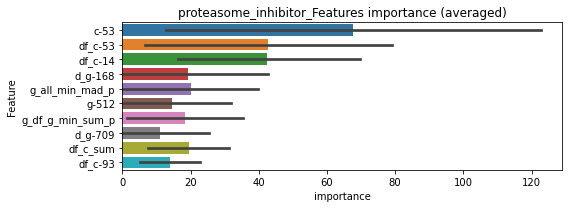

len(train_index) : 3916
len(valid_index) : 3916
================================= fold 1/2 proteasome_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113142	valid_1's binary_logloss: 0.0120643
[200]	training's binary_logloss: 0.00108183	valid_1's binary_logloss: 0.0022724
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000380055	valid_1's binary_logloss: 0.00201548


len(train_index) : 3916
len(valid_index) : 3916
================================= fold 2/2 proteasome_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111625	valid_1's binary_logloss: 0.0132472
[200]	training's binary_logloss: 0.000864406	valid_1's binary_logloss: 0.0024013
[300]	training's binary_logloss: 0.000186848	valid_1's binary_logloss: 0.00156305
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000123552	valid_1's binary_logloss: 0.00144675


proteasome_inhibitor logloss: 0.0017311141602748444


neg labels: 3289 → selected neg labels: 3281


protein_kinase_inhibitor, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376542	valid_1's binary_logloss: 0.0701543
[200]	training's binary_logloss: 0.00670846	valid_1's binary_logloss: 0.0330705
[300]	training's binary_logloss: 0.00203151	valid_1's binary_logloss: 0.0249874
[400]	training's binary_logloss: 0.000982722	valid_1's binary_logloss: 0.0218352
[500]	training's binary_logloss: 0.00065144	valid_1's binary_logloss: 0.0208573
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000658769	valid_1's binary_logloss: 0.0208265
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0403365	valid_1's binary_logloss: 0.0635616
[200]	training's binary_logloss: 0.00725884	valid_1's binary_logloss: 0.0232255
[300]	training's binary_logloss: 0.00222197	valid_1's binary_logloss: 0.0140929
[400]	training's binary_logloss: 0.00106019	valid_1's binary_logloss: 0.011133
[500]	training's binary_logloss: 0.000685058

1 / 3 AUC score:1.000
y_Threshold: 0.0040130, Threshold: 0.0068748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00619, conf_1:0.00756
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0068748
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_2: 0.0168748
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_3: 0.0268748
threshold: 0.0268748, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0374289	valid_1's binary_logloss: 0.0696768
[200]	training's binary_logloss: 0.00644533	valid_1's binary_logloss: 0.0317556
[300]	training's binary_logloss: 0.00195599	valid_1's binary_logloss: 0.0242244
[400]	training's binary_logloss: 0.000951223	valid_1's binary_logloss: 0.021492
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000675797	valid_1's binary_logloss: 0.0206086
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421136	valid_1's binary_logloss: 0.0651851
[200]	training's binary_logloss: 0.00745236	valid_1's binary_logloss: 0.0226589
[300]	training's binary_logloss: 0.00223958	valid_1's binary_logloss: 0.0130906
[400]	training's binary_logloss: 0.00106171	valid_1's binary_logloss: 0.0102555
[500]	training's binary_logloss: 0.000687915	valid_1's binary_logloss: 0.0090055
Early stopping, best iteration is:
[586]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0222314, Threshold: 0.0268748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0060271 Vs.target_rate: 0.00202
Num_p_label: 24.0, conf_0:0.02419, conf_1:0.02956
threshold: 0.0268748, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0393279	valid_1's binary_logloss: 0.0669693
[200]	training's binary_logloss: 0.0069415	valid_1's binary_logloss: 0.0270618
[300]	training's binary_logloss: 0.00209098	valid_1's binary_logloss: 0.0177629
[400]	training's binary_logloss: 0.00101362	valid_1's binary_logloss: 0.0145868
[500]	training's binary_logloss: 0.000662278	valid_1's binary_logloss: 0.0133037
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000655128	valid_1's binary_logloss: 0.0132879
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0398234	valid_1's binary_logloss: 0.0644519
[200]	training's binary_logloss: 0.00681815	valid_1's binary_logloss: 0.0260874
[300]	training's binary_logloss: 0.00203454	valid_1's binary_logloss: 0.0177168
[400]	training's binary_logloss: 0.000998484	valid_1's binary_logloss: 0.015253
[500]	training's binary_logloss: 0.000653924

3 / 3 AUC score:1.000
y_Threshold: 0.0166106, Threshold: 0.0268748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, conf_0:0.02419, conf_1:0.02956
threshold: 0.0268748, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 675.0/7785, y_label_rate: 0.0867052


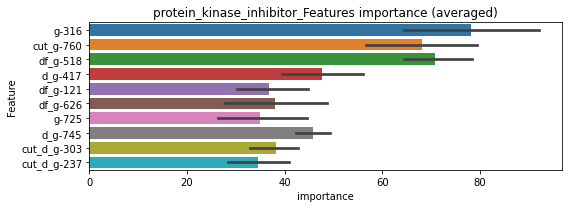

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214695	valid_1's binary_logloss: 0.0477478
[200]	training's binary_logloss: 0.0037624	valid_1's binary_logloss: 0.0291035
[300]	training's binary_logloss: 0.00113512	valid_1's binary_logloss: 0.0262651
[400]	training's binary_logloss: 0.000546601	valid_1's binary_logloss: 0.0252403
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000577776	valid_1's binary_logloss: 0.0252006


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0229267	valid_1's binary_logloss: 0.0385515
[200]	training's binary_logloss: 0.00417445	valid_1's binary_logloss: 0.0178506
[300]	training's binary_logloss: 0.0012547	valid_1's binary_logloss: 0.013957
[400]	training's binary_logloss: 0.000597942	valid_1's binary_logloss: 0.0130263
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000408455	valid_1's binary_logloss: 0.0127045


protein_kinase_inhibitor logloss: 0.018953336689458627


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256054	valid_1's binary_logloss: 0.0384909
[200]	training's binary_logloss: 0.00328177	valid_1's binary_logloss: 0.010909
[300]	training's binary_logloss: 0.000947454	valid_1's binary_logloss: 0.00692745
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00062604	valid_1's binary_logloss: 0.00612453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0253663	valid_1's binary_logloss: 0.0377476
[200]	training's binary_logloss: 0.0032902	valid_1's binary_logloss: 0.00987861
[300]	training's binary_logloss: 0.000965614	valid_1's binary_logloss: 0.0058769
[400]	training's binary_logloss: 0.000501516	valid_1's binary_logloss: 0.0047987
[500]	training's binary_logloss: 0.000384662	valid_1's binary_logloss: 0.00444573
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000373394	valid_1's binary_logloss: 0.00439651


1 / 3 AUC score:1.000
y_Threshold: 0.0023491, Threshold: 0.0036511, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00329, conf_1:0.00402
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0036511
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_2: 0.0136511
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_3: 0.0236511
threshold: 0.0236511, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250448	valid_1's binary_logloss: 0.0363215
[200]	training's binary_logloss: 0.00316326	valid_1's binary_logloss: 0.0100197
[300]	training's binary_logloss: 0.000917463	valid_1's binary_logloss: 0.00676389
[400]	training's binary_logloss: 0.000479374	valid_1's binary_logloss: 0.00608828
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000394012	valid_1's binary_logloss: 0.00589779
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256234	valid_1's binary_logloss: 0.0370983
[200]	training's binary_logloss: 0.00325676	valid_1's binary_logloss: 0.00873383
[300]	training's binary_logloss: 0.000949884	valid_1's binary_logloss: 0.00468233
[400]	training's binary_logloss: 0.00049645	valid_1's binary_logloss: 0.0039776
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000419265	valid_1's binary_logloss: 0.00382552

2 / 3 AUC score:1.000
y_Threshold: 0.0157958, Threshold: 0.0236511, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, conf_0:0.02129, conf_1:0.02602
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_1: 0.0236511
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_2: 0.0336511
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.0436511
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_4: 0.0536511
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_5: 0.0636511
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_6: 0.0736511
threshold: 0.0736511, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0247465	valid_1's binary_logloss: 0.0356148
[200]	training's binary_logloss: 0.0031394	valid_1's binary_logloss: 0.00989894
[300]	training's binary_logloss: 0.000921564	valid_1's binary_logloss: 0.00640275
[400]	training's binary_logloss: 0.000480935	valid_1's binary_logloss: 0.00543411
[500]	training's binary_logloss: 0.000374143	valid_1's binary_logloss: 0.0050757
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000375528	valid_1's binary_logloss: 0.00507119
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256848	valid_1's binary_logloss: 0.0336755
[200]	training's binary_logloss: 0.00327835	valid_1's binary_logloss: 0.00573601
[300]	training's binary_logloss: 0.000948773	valid_1's binary_logloss: 0.00201462
[400]	training's binary_logloss: 0.000492889	valid_1's binary_logloss: 0.00116609
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0193681, Threshold: 0.0736511, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, conf_0:0.06629, conf_1:0.08102
threshold: 0.0736511, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 661.0/7791, y_label_rate: 0.0848415


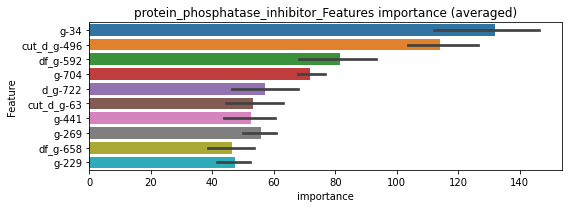

len(train_index) : 3895
len(valid_index) : 3896
================================= fold 1/2 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0131484	valid_1's binary_logloss: 0.0213601
[200]	training's binary_logloss: 0.0016467	valid_1's binary_logloss: 0.00828927
[300]	training's binary_logloss: 0.000471085	valid_1's binary_logloss: 0.00664012
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000270667	valid_1's binary_logloss: 0.0064144


len(train_index) : 3896
len(valid_index) : 3895
================================= fold 2/2 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135371	valid_1's binary_logloss: 0.0174199
[200]	training's binary_logloss: 0.00174128	valid_1's binary_logloss: 0.00354523
[300]	training's binary_logloss: 0.000506342	valid_1's binary_logloss: 0.00169917
[400]	training's binary_logloss: 0.000260984	valid_1's binary_logloss: 0.00119592
[500]	training's binary_logloss: 0.000196435	valid_1's binary_logloss: 0.00105349
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000187366	valid_1's binary_logloss: 0.00103839


protein_phosphatase_inhibitor logloss: 0.0037267629443527815


neg labels: 3289 → selected neg labels: 3271


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3271, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0555934	valid_1's binary_logloss: 0.118248
[200]	training's binary_logloss: 0.0126518	valid_1's binary_logloss: 0.072093
[300]	training's binary_logloss: 0.00398587	valid_1's binary_logloss: 0.0609482
[400]	training's binary_logloss: 0.00189421	valid_1's binary_logloss: 0.0579458
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00165687	valid_1's binary_logloss: 0.0573856
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.056076	valid_1's binary_logloss: 0.122354
[200]	training's binary_logloss: 0.0126561	valid_1's binary_logloss: 0.0732568
[300]	training's binary_logloss: 0.00406464	valid_1's binary_logloss: 0.0602125
[400]	training's binary_logloss: 0.00191568	valid_1's binary_logloss: 0.0560393
[500]	training's binary_logloss: 0.00116742	valid_1's binary_logloss: 0.0543745
Early stopping, best iteration is:
[491]	training's

1 / 3 AUC score:0.994
y_Threshold: 0.0087915, Threshold: 0.0562076, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 151 → Positive_corect_labels: 644/3774
p_label_rate: 0.0200904 Vs.target_rate: 0.00433
Num_p_label: 80.0, conf_0:0.05059, conf_1:0.06183
Num_p_label: 80.0, Expected: 17.2, Adj_threshold_1: 0.0562076
Num_p_label: 70.0, Expected: 17.2, Adj_threshold_2: 0.0662076
Num_p_label: 65.0, Expected: 17.2, Adj_threshold_3: 0.0762076
Num_p_label: 60.0, Expected: 17.2, Adj_threshold_4: 0.0862076
Num_p_label: 55.0, Expected: 17.2, Adj_threshold_5: 0.0962076
Num_p_label: 54.0, Expected: 17.2, Adj_threshold_6: 0.1062076
Num_p_label: 49.0, Expected: 17.2, Adj_threshold_7: 0.1162076
Num_p_label: 44.0, Expected: 17.2, Adj_threshold_8: 0.1262076
Num_p_label: 41.0, Expected: 17.2, Adj_threshold_9: 0.1362076
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_10: 0.1462076
threshold: 0.1562076, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 644.0/3774, y_label_rate: 0.1706412

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0517321	valid_1's binary_logloss: 0.12151
[200]	training's binary_logloss: 0.0109723	valid_1's binary_logloss: 0.0747828
[300]	training's binary_logloss: 0.00347118	valid_1's binary_logloss: 0.0623737
[400]	training's binary_logloss: 0.00163793	valid_1's binary_logloss: 0.0579057
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00112671	valid_1's binary_logloss: 0.0565077
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0537819	valid_1's binary_logloss: 0.116709
[200]	training's binary_logloss: 0.011533	valid_1's binary_logloss: 0.0737262
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.00509395	valid_1's binary_logloss: 0.0669648


2 / 3 AUC score:0.995
y_Threshold: 0.0477461, Threshold: 0.1562076, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 623.0/3732
p_label_rate: 0.0323958 Vs.target_rate: 0.00433
Num_p_label: 129.0, conf_0:0.14059, conf_1:0.17183
Num_p_label: 129.0, Expected: 17.2, Adj_threshold_1: 0.1562076
Num_p_label: 126.0, Expected: 17.2, Adj_threshold_2: 0.1662076
Num_p_label: 119.0, Expected: 17.2, Adj_threshold_3: 0.1762076
Num_p_label: 117.0, Expected: 17.2, Adj_threshold_4: 0.1862076
Num_p_label: 116.0, Expected: 17.2, Adj_threshold_5: 0.1962076
Num_p_label: 115.0, Expected: 17.2, Adj_threshold_6: 0.2062076
Num_p_label: 112.0, Expected: 17.2, Adj_threshold_7: 0.2162076
Num_p_label: 108.0, Expected: 17.2, Adj_threshold_8: 0.2262076
Num_p_label: 106.0, Expected: 17.2, Adj_threshold_9: 0.2362076
Num_p_label: 105.0, Expected: 17.2, Adj_threshold_10: 0.2462076
threshold: 0.2562076, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 623.0/3732, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0473896	valid_1's binary_logloss: 0.114705
[200]	training's binary_logloss: 0.00936905	valid_1's binary_logloss: 0.0737407
[300]	training's binary_logloss: 0.00298381	valid_1's binary_logloss: 0.0642155
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00240194	valid_1's binary_logloss: 0.0634627
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0508478	valid_1's binary_logloss: 0.0990391
[200]	training's binary_logloss: 0.0108414	valid_1's binary_logloss: 0.0530023
[300]	training's binary_logloss: 0.003423	valid_1's binary_logloss: 0.0410735
[400]	training's binary_logloss: 0.00163792	valid_1's binary_logloss: 0.0372706
[500]	training's binary_logloss: 0.00102209	valid_1's binary_logloss: 0.0354991
[600]	training's binary_logloss: 0.000760428	valid_1's binary_logloss: 0.0349723
Early stopping, best iteration is:
[590]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0437039, Threshold: 0.2562076, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0298845 Vs.target_rate: 0.00433
Num_p_label: 119.0, conf_0:0.23059, conf_1:0.28183
Num_p_label: 119.0, Expected: 17.2, Adj_threshold_1: 0.2562076
Num_p_label: 118.0, Expected: 17.2, Adj_threshold_2: 0.2662076
Num_p_label: 117.0, Expected: 17.2, Adj_threshold_3: 0.2762076
Num_p_label: 113.0, Expected: 17.2, Adj_threshold_4: 0.2862076
Num_p_label: 112.0, Expected: 17.2, Adj_threshold_5: 0.2962076
Num_p_label: 112.0, Expected: 17.2, Adj_threshold_6: 0.3062076
Num_p_label: 107.0, Expected: 17.2, Adj_threshold_7: 0.3162076
Num_p_label: 104.0, Expected: 17.2, Adj_threshold_8: 0.3262076
Num_p_label: 102.0, Expected: 17.2, Adj_threshold_9: 0.3362076
Num_p_label: 102.0, Expected: 17.2, Adj_threshold_10: 0.3462076
threshold: 0.3562076, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 710.0/7688, y_label_ra

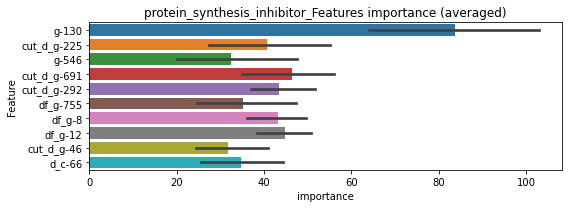

len(train_index) : 3844
len(valid_index) : 3844
================================= fold 1/2 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297237	valid_1's binary_logloss: 0.0737631
[200]	training's binary_logloss: 0.00623088	valid_1's binary_logloss: 0.0486872
[300]	training's binary_logloss: 0.00197776	valid_1's binary_logloss: 0.0417514
[400]	training's binary_logloss: 0.000926531	valid_1's binary_logloss: 0.0388385
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000780053	valid_1's binary_logloss: 0.0381422


len(train_index) : 3844
len(valid_index) : 3844
================================= fold 2/2 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305783	valid_1's binary_logloss: 0.0589539
[200]	training's binary_logloss: 0.00673217	valid_1's binary_logloss: 0.0326761
[300]	training's binary_logloss: 0.00213276	valid_1's binary_logloss: 0.025823
[400]	training's binary_logloss: 0.000996805	valid_1's binary_logloss: 0.0230251
[500]	training's binary_logloss: 0.000612082	valid_1's binary_logloss: 0.0220635
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000582244	valid_1's binary_logloss: 0.0219417


protein_synthesis_inhibitor logloss: 0.03004195386029219


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246665	valid_1's binary_logloss: 0.0368264
[200]	training's binary_logloss: 0.00314826	valid_1's binary_logloss: 0.00904178
[300]	training's binary_logloss: 0.000916971	valid_1's binary_logloss: 0.00478005
[400]	training's binary_logloss: 0.000475782	valid_1's binary_logloss: 0.00360199
[500]	training's binary_logloss: 0.000365125	valid_1's binary_logloss: 0.00330686
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000366994	valid_1's binary_logloss: 0.00330233
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251995	valid_1's binary_logloss: 0.0302626
[200]	training's binary_logloss: 0.00329497	valid_1's binary_logloss: 0.00461228
[300]	training's binary_logloss: 0.000959394	valid_1's binary_logloss: 0.0015103
[400]	training's binary_logloss: 0.000495356	valid_1's binary_logloss: 0.000843145
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0013775, Threshold: 0.0021443, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00193, conf_1:0.00236
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0021443
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_2: 0.0121443
threshold: 0.0121443, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252196	valid_1's binary_logloss: 0.0381117
[200]	training's binary_logloss: 0.00315517	valid_1's binary_logloss: 0.00934452
[300]	training's binary_logloss: 0.000914763	valid_1's binary_logloss: 0.00486201
[400]	training's binary_logloss: 0.000479846	valid_1's binary_logloss: 0.00378212
[500]	training's binary_logloss: 0.000372338	valid_1's binary_logloss: 0.00349027
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000373494	valid_1's binary_logloss: 0.00348914
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259	valid_1's binary_logloss: 0.0313752
[200]	training's binary_logloss: 0.00333267	valid_1's binary_logloss: 0.0047293
[300]	training's binary_logloss: 0.00095915	valid_1's binary_logloss: 0.00152243
[400]	training's binary_logloss: 0.00049874	valid_1's binary_logloss: 0.000850607
Early stopping, best iteration is:
[

2 / 3 AUC score:1.000
y_Threshold: 0.0446902, Threshold: 0.0121443, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.01093, conf_1:0.01336
threshold: 0.0121443, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252196	valid_1's binary_logloss: 0.0381117
[200]	training's binary_logloss: 0.00315517	valid_1's binary_logloss: 0.00934452
[300]	training's binary_logloss: 0.000914763	valid_1's binary_logloss: 0.00486201
[400]	training's binary_logloss: 0.000479846	valid_1's binary_logloss: 0.00378212
[500]	training's binary_logloss: 0.000372338	valid_1's binary_logloss: 0.00349027
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000373494	valid_1's binary_logloss: 0.00348914
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259	valid_1's binary_logloss: 0.0313752
[200]	training's binary_logloss: 0.00333267	valid_1's binary_logloss: 0.0047293
[300]	training's binary_logloss: 0.00095915	valid_1's binary_logloss: 0.00152243
[400]	training's binary_logloss: 0.00049874	valid_1's binary_logloss: 0.000850607
Early stopping, best iteration is:
[

3 / 3 AUC score:1.000
y_Threshold: 0.0446902, Threshold: 0.0121443, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.01093, conf_1:0.01336
threshold: 0.0121443, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7792, y_label_rate: 0.0848306


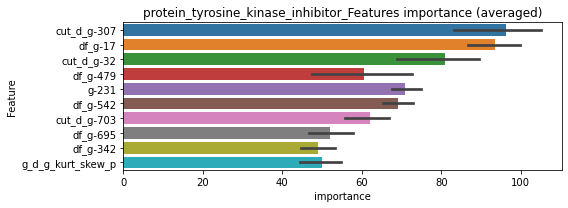

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0129282	valid_1's binary_logloss: 0.0232968
[200]	training's binary_logloss: 0.00161838	valid_1's binary_logloss: 0.00870115
[300]	training's binary_logloss: 0.000457854	valid_1's binary_logloss: 0.00677012
[400]	training's binary_logloss: 0.000237714	valid_1's binary_logloss: 0.00636654
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000211485	valid_1's binary_logloss: 0.00634095


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141201	valid_1's binary_logloss: 0.0190836
[200]	training's binary_logloss: 0.00203888	valid_1's binary_logloss: 0.0050095
[300]	training's binary_logloss: 0.000496303	valid_1's binary_logloss: 0.00338731
[400]	training's binary_logloss: 0.000243017	valid_1's binary_logloss: 0.00307029
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000197294	valid_1's binary_logloss: 0.00302183


protein_tyrosine_kinase_inhibitor logloss: 0.004681388183499276


neg labels: 3289 → selected neg labels: 3281


radiopaque_medium, len(trt): 56, len(othr): 3281, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0442941	valid_1's binary_logloss: 0.0925044
[200]	training's binary_logloss: 0.00862483	valid_1's binary_logloss: 0.0540978
[300]	training's binary_logloss: 0.00255591	valid_1's binary_logloss: 0.0452607
[400]	training's binary_logloss: 0.00121316	valid_1's binary_logloss: 0.04346
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000935201	valid_1's binary_logloss: 0.0425466
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474425	valid_1's binary_logloss: 0.0761855
[200]	training's binary_logloss: 0.00967932	valid_1's binary_logloss: 0.033197
[300]	training's binary_logloss: 0.00294729	valid_1's binary_logloss: 0.0231769
[400]	training's binary_logloss: 0.00136309	valid_1's binary_logloss: 0.0197463
[500]	training's binary_logloss: 0.000846817	valid_1's binary_logloss: 0.0181973
Early stopping, best iteration is:
[572]	train

1 / 3 AUC score:0.999
y_Threshold: 0.0049490, Threshold: 0.0073332, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00235
Num_p_label: 80.0, conf_0:0.00660, conf_1:0.00807
Num_p_label: 80.0, Expected: 9.4, Adj_threshold_1: 0.0073332
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_2: 0.0173332
threshold: 0.0173332, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0443528	valid_1's binary_logloss: 0.0846876
[200]	training's binary_logloss: 0.00865806	valid_1's binary_logloss: 0.0452608
[300]	training's binary_logloss: 0.00259771	valid_1's binary_logloss: 0.0373021
[400]	training's binary_logloss: 0.00123118	valid_1's binary_logloss: 0.0351624
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00130713	valid_1's binary_logloss: 0.0350908
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0447145	valid_1's binary_logloss: 0.0747622
[200]	training's binary_logloss: 0.00888235	valid_1's binary_logloss: 0.0318314
[300]	training's binary_logloss: 0.00273797	valid_1's binary_logloss: 0.021569
[400]	training's binary_logloss: 0.00129813	valid_1's binary_logloss: 0.0182708
[500]	training's binary_logloss: 0.000816857	valid_1's binary_logloss: 0.0169148
Early stopping, best iteration is:
[584]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0272718, Threshold: 0.0173332, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0125565 Vs.target_rate: 0.00235
Num_p_label: 50.0, conf_0:0.01560, conf_1:0.01907
Num_p_label: 50.0, Expected: 9.4, Adj_threshold_1: 0.0173332
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_2: 0.0273332
Num_p_label: 11.0, Expected: 9.4, Adj_threshold_3: 0.0373332
threshold: 0.0373332, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0439736	valid_1's binary_logloss: 0.0812449
[200]	training's binary_logloss: 0.00846823	valid_1's binary_logloss: 0.0407772
[300]	training's binary_logloss: 0.00256088	valid_1's binary_logloss: 0.0315343
[400]	training's binary_logloss: 0.00120374	valid_1's binary_logloss: 0.0281188
[500]	training's binary_logloss: 0.000760024	valid_1's binary_logloss: 0.0267801
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000708467	valid_1's binary_logloss: 0.0265494
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0438352	valid_1's binary_logloss: 0.0750435
[200]	training's binary_logloss: 0.00869453	valid_1's binary_logloss: 0.0359106
[300]	training's binary_logloss: 0.00264548	valid_1's binary_logloss: 0.0273301
[400]	training's binary_logloss: 0.00124183	valid_1's binary_logloss: 0.0247372
Early stopping, best iteration is:
[431]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0204308, Threshold: 0.0373332, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 644.0/3781
p_label_rate: 0.0022602 Vs.target_rate: 0.00235
Num_p_label: 9.0, conf_0:0.03360, conf_1:0.04107
threshold: 0.0373332, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/7763, y_label_rate: 0.0841170


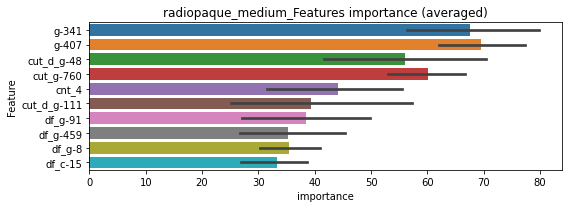

len(train_index) : 3881
len(valid_index) : 3882
================================= fold 1/2 radiopaque_medium=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225672	valid_1's binary_logloss: 0.0446499
[200]	training's binary_logloss: 0.00413848	valid_1's binary_logloss: 0.0255105
[300]	training's binary_logloss: 0.00125648	valid_1's binary_logloss: 0.0218568
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00137949	valid_1's binary_logloss: 0.0218538


len(train_index) : 3882
len(valid_index) : 3881
================================= fold 2/2 radiopaque_medium=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241857	valid_1's binary_logloss: 0.0408256
[200]	training's binary_logloss: 0.00468344	valid_1's binary_logloss: 0.0187445
[300]	training's binary_logloss: 0.00140328	valid_1's binary_logloss: 0.0133971
[400]	training's binary_logloss: 0.00064773	valid_1's binary_logloss: 0.0117938
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000468746	valid_1's binary_logloss: 0.0113142


radiopaque_medium logloss: 0.016584677536791027


neg labels: 3289 → selected neg labels: 3280


raf_inhibitor, len(trt): 223, len(othr): 3280, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0297457	valid_1's binary_logloss: 0.0712069
[200]	training's binary_logloss: 0.00452192	valid_1's binary_logloss: 0.0490167
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00177523	valid_1's binary_logloss: 0.0451968
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306016	valid_1's binary_logloss: 0.0516289
[200]	training's binary_logloss: 0.00474988	valid_1's binary_logloss: 0.0263018
[300]	training's binary_logloss: 0.00142454	valid_1's binary_logloss: 0.0208962
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000770945	valid_1's binary_logloss: 0.0193051


1 / 3 AUC score:0.999
y_Threshold: 0.0050677, Threshold: 0.0215177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0200904 Vs.target_rate: 0.00936
Num_p_label: 80.0, conf_0:0.01937, conf_1:0.02367
threshold: 0.0215177, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285628	valid_1's binary_logloss: 0.0658528
[200]	training's binary_logloss: 0.00416302	valid_1's binary_logloss: 0.0428065
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00233068	valid_1's binary_logloss: 0.039401
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0301601	valid_1's binary_logloss: 0.0452663
[200]	training's binary_logloss: 0.00439203	valid_1's binary_logloss: 0.0188789
[300]	training's binary_logloss: 0.00125202	valid_1's binary_logloss: 0.013535
[400]	training's binary_logloss: 0.000629047	valid_1's binary_logloss: 0.0119543
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000519584	valid_1's binary_logloss: 0.0114121


2 / 3 AUC score:1.000
y_Threshold: 0.0214294, Threshold: 0.0215177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0323958 Vs.target_rate: 0.00936
Num_p_label: 129.0, conf_0:0.01937, conf_1:0.02367
Num_p_label: 129.0, Expected: 37.3, Adj_threshold_1: 0.0215177
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_2: 0.0315177
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_3: 0.0415177
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_4: 0.0515177
Num_p_label: 79.0, Expected: 37.3, Adj_threshold_5: 0.0615177
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_6: 0.0715177
Num_p_label: 67.0, Expected: 37.3, Adj_threshold_7: 0.0815177
threshold: 0.0815177, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279808	valid_1's binary_logloss: 0.0573493
[200]	training's binary_logloss: 0.0038963	valid_1's binary_logloss: 0.0354306
[300]	training's binary_logloss: 0.0010953	valid_1's binary_logloss: 0.0316976
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000909125	valid_1's binary_logloss: 0.0312243
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288392	valid_1's binary_logloss: 0.0549466
[200]	training's binary_logloss: 0.00400258	valid_1's binary_logloss: 0.0292186
[300]	training's binary_logloss: 0.00115825	valid_1's binary_logloss: 0.0240807
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000676044	valid_1's binary_logloss: 0.0226038


3 / 3 AUC score:1.000
y_Threshold: 0.0194080, Threshold: 0.0815177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0168257 Vs.target_rate: 0.00936
Num_p_label: 67.0, conf_0:0.07337, conf_1:0.08967
threshold: 0.0815177, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 713.0/7766, y_label_rate: 0.0918105


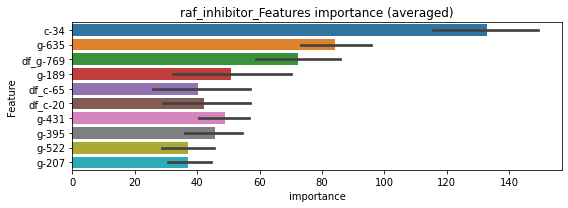

len(train_index) : 3883
len(valid_index) : 3883
================================= fold 1/2 raf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157898	valid_1's binary_logloss: 0.042091
[200]	training's binary_logloss: 0.0022629	valid_1's binary_logloss: 0.0301614
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0010484	valid_1's binary_logloss: 0.0285839


len(train_index) : 3883
len(valid_index) : 3883
================================= fold 2/2 raf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165245	valid_1's binary_logloss: 0.0344819
[200]	training's binary_logloss: 0.00245344	valid_1's binary_logloss: 0.0224905
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00114441	valid_1's binary_logloss: 0.0210777


raf_inhibitor logloss: 0.02483081771600834


neg labels: 3289 → selected neg labels: 3287


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019697	valid_1's binary_logloss: 0.0247003
[200]	training's binary_logloss: 0.00207389	valid_1's binary_logloss: 0.00422109
[300]	training's binary_logloss: 0.000599705	valid_1's binary_logloss: 0.00192713
[400]	training's binary_logloss: 0.00033889	valid_1's binary_logloss: 0.00147894
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000292771	valid_1's binary_logloss: 0.00139782
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203189	valid_1's binary_logloss: 0.0236716
[200]	training's binary_logloss: 0.00215823	valid_1's binary_logloss: 0.00348026
[300]	training's binary_logloss: 0.000622577	valid_1's binary_logloss: 0.00134053
[400]	training's binary_logloss: 0.000348755	valid_1's binary_logloss: 0.000867893
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000297859	valid_1's binary_logloss: 0.000784

1 / 3 AUC score:1.000
y_Threshold: 0.0009685, Threshold: 0.0013475, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00121, conf_1:0.00148
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0013475
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0113475
threshold: 0.0113475, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020153	valid_1's binary_logloss: 0.0249737
[200]	training's binary_logloss: 0.0020817	valid_1's binary_logloss: 0.00409454
[300]	training's binary_logloss: 0.000597982	valid_1's binary_logloss: 0.00190233
[400]	training's binary_logloss: 0.000343079	valid_1's binary_logloss: 0.0014469
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000298579	valid_1's binary_logloss: 0.0013735
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204158	valid_1's binary_logloss: 0.0239396
[200]	training's binary_logloss: 0.00214401	valid_1's binary_logloss: 0.00359392
[300]	training's binary_logloss: 0.000611293	valid_1's binary_logloss: 0.00138768
[400]	training's binary_logloss: 0.000345244	valid_1's binary_logloss: 0.000936811
[500]	training's binary_logloss: 0.000291724	valid_1's binary_logloss: 0.000853783
Early stopping, best iteration is

2 / 3 AUC score:1.000
y_Threshold: 0.0746222, Threshold: 0.0113475, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, conf_0:0.01021, conf_1:0.01248
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.0113475
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0213475
threshold: 0.0213475, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020153	valid_1's binary_logloss: 0.0249737
[200]	training's binary_logloss: 0.0020817	valid_1's binary_logloss: 0.00409454
[300]	training's binary_logloss: 0.000597982	valid_1's binary_logloss: 0.00190233
[400]	training's binary_logloss: 0.000343079	valid_1's binary_logloss: 0.0014469
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000298579	valid_1's binary_logloss: 0.0013735
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204158	valid_1's binary_logloss: 0.0239396
[200]	training's binary_logloss: 0.00214401	valid_1's binary_logloss: 0.00359392
[300]	training's binary_logloss: 0.000611293	valid_1's binary_logloss: 0.00138768
[400]	training's binary_logloss: 0.000345244	valid_1's binary_logloss: 0.000936811
[500]	training's binary_logloss: 0.000291724	valid_1's binary_logloss: 0.000853783
Early stopping, best iteration is

3 / 3 AUC score:1.000
y_Threshold: 0.0746222, Threshold: 0.0213475, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, conf_0:0.01921, conf_1:0.02348
threshold: 0.0213475, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7794, y_label_rate: 0.0845522


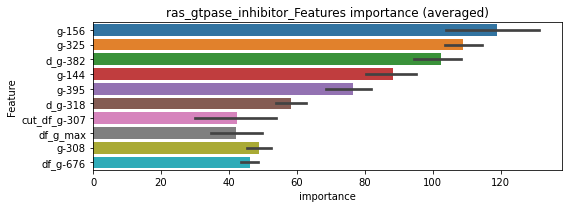

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104758	valid_1's binary_logloss: 0.0134012
[200]	training's binary_logloss: 0.00108482	valid_1's binary_logloss: 0.00290256
[300]	training's binary_logloss: 0.000304086	valid_1's binary_logloss: 0.00200331
[400]	training's binary_logloss: 0.000170281	valid_1's binary_logloss: 0.00187788
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000142629	valid_1's binary_logloss: 0.00185093


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01045	valid_1's binary_logloss: 0.0133353
[200]	training's binary_logloss: 0.00108811	valid_1's binary_logloss: 0.00311712
[300]	training's binary_logloss: 0.0003127	valid_1's binary_logloss: 0.00224268
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000185578	valid_1's binary_logloss: 0.00209739


ras_gtpase_inhibitor logloss: 0.001974163728808086


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0390423	valid_1's binary_logloss: 0.0736573
[200]	training's binary_logloss: 0.00686223	valid_1's binary_logloss: 0.0333694
[300]	training's binary_logloss: 0.00211768	valid_1's binary_logloss: 0.0254283
[400]	training's binary_logloss: 0.00103089	valid_1's binary_logloss: 0.0226446
[500]	training's binary_logloss: 0.000670709	valid_1's binary_logloss: 0.0214783
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00055111	valid_1's binary_logloss: 0.0210573
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0408383	valid_1's binary_logloss: 0.0748499
[200]	training's binary_logloss: 0.00721438	valid_1's binary_logloss: 0.032386
[300]	training's binary_logloss: 0.00221143	valid_1's binary_logloss: 0.0235393
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00132108	valid_1's binary_logloss: 0.02139


1 / 3 AUC score:0.999
y_Threshold: 0.0068081, Threshold: 0.0147337, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00281
Num_p_label: 80.0, conf_0:0.01326, conf_1:0.01621
Num_p_label: 80.0, Expected: 11.2, Adj_threshold_1: 0.0147337
Num_p_label: 45.0, Expected: 11.2, Adj_threshold_2: 0.0247337
Num_p_label: 36.0, Expected: 11.2, Adj_threshold_3: 0.0347337
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.0447337
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_5: 0.0547337
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.0647337
threshold: 0.0647337, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0381761	valid_1's binary_logloss: 0.0714848
[200]	training's binary_logloss: 0.00627215	valid_1's binary_logloss: 0.0305866
[300]	training's binary_logloss: 0.00192099	valid_1's binary_logloss: 0.0223103
[400]	training's binary_logloss: 0.000942868	valid_1's binary_logloss: 0.0195183
[500]	training's binary_logloss: 0.000623237	valid_1's binary_logloss: 0.0181816
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000619486	valid_1's binary_logloss: 0.0181347
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0399766	valid_1's binary_logloss: 0.0615014
[200]	training's binary_logloss: 0.00694462	valid_1's binary_logloss: 0.0195013
[300]	training's binary_logloss: 0.00208532	valid_1's binary_logloss: 0.0105272
[400]	training's binary_logloss: 0.00101875	valid_1's binary_logloss: 0.00780279
[500]	training's binary_logloss: 0.000665

2 / 3 AUC score:1.000
y_Threshold: 0.0329526, Threshold: 0.0647337, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0107986 Vs.target_rate: 0.00281
Num_p_label: 43.0, conf_0:0.05826, conf_1:0.07121
Num_p_label: 43.0, Expected: 11.2, Adj_threshold_1: 0.0647337
Num_p_label: 39.0, Expected: 11.2, Adj_threshold_2: 0.0747337
Num_p_label: 38.0, Expected: 11.2, Adj_threshold_3: 0.0847337
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_4: 0.0947337
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_5: 0.1047337
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_6: 0.1147337
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_7: 0.1247337
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_8: 0.1347337
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_9: 0.1447337
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_10: 0.1547337
threshold: 0.1647337, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3793, y_label_rate: 0.1716320

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0388318	valid_1's binary_logloss: 0.0710583
[200]	training's binary_logloss: 0.00657165	valid_1's binary_logloss: 0.0284686
[300]	training's binary_logloss: 0.00199129	valid_1's binary_logloss: 0.0191827
[400]	training's binary_logloss: 0.000974877	valid_1's binary_logloss: 0.0152817
[500]	training's binary_logloss: 0.000636828	valid_1's binary_logloss: 0.0138708
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000566676	valid_1's binary_logloss: 0.0134486
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0389321	valid_1's binary_logloss: 0.0671872
[200]	training's binary_logloss: 0.00641324	valid_1's binary_logloss: 0.0263333
[300]	training's binary_logloss: 0.00193086	valid_1's binary_logloss: 0.0175087
[400]	training's binary_logloss: 0.000961607	valid_1's binary_logloss: 0.0145588
[500]	training's binary_logloss: 0.000639

3 / 3 AUC score:1.000
y_Threshold: 0.0391484, Threshold: 0.1647337, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0060271 Vs.target_rate: 0.00281
Num_p_label: 24.0, conf_0:0.14826, conf_1:0.18121
threshold: 0.1647337, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 674.0/7773, y_label_rate: 0.0867104


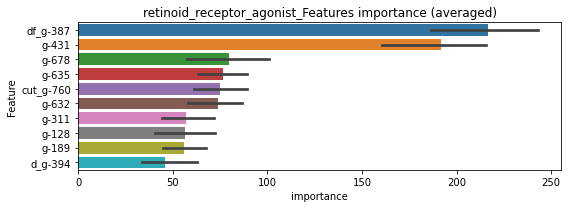

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212023	valid_1's binary_logloss: 0.043708
[200]	training's binary_logloss: 0.00354735	valid_1's binary_logloss: 0.0225185
[300]	training's binary_logloss: 0.00106599	valid_1's binary_logloss: 0.0185794
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000563013	valid_1's binary_logloss: 0.0176636


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217314	valid_1's binary_logloss: 0.0462337
[200]	training's binary_logloss: 0.00358392	valid_1's binary_logloss: 0.0225297
[300]	training's binary_logloss: 0.00107942	valid_1's binary_logloss: 0.0174742
[400]	training's binary_logloss: 0.000524009	valid_1's binary_logloss: 0.0157435
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.0004269	valid_1's binary_logloss: 0.0152307


retinoid_receptor_agonist logloss: 0.01644729299815886


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160313	valid_1's binary_logloss: 0.0189898
[200]	training's binary_logloss: 0.00134221	valid_1's binary_logloss: 0.00353623
[300]	training's binary_logloss: 0.000373662	valid_1's binary_logloss: 0.00221309
[400]	training's binary_logloss: 0.000233394	valid_1's binary_logloss: 0.00194764
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000231512	valid_1's binary_logloss: 0.00194591
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159791	valid_1's binary_logloss: 0.016439
[200]	training's binary_logloss: 0.00135518	valid_1's binary_logloss: 0.00146318
[300]	training's binary_logloss: 0.00037333	valid_1's binary_logloss: 0.000423476
[400]	training's binary_logloss: 0.000232866	valid_1's binary_logloss: 0.000265256
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000205305	valid_1's binary_logloss: 0.00023

1 / 3 AUC score:1.000
y_Threshold: 0.0005511, Threshold: 0.0009720, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00087, conf_1:0.00107
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0009720
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0109720
threshold: 0.0109720, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163759	valid_1's binary_logloss: 0.0191822
[200]	training's binary_logloss: 0.00136732	valid_1's binary_logloss: 0.00448747
[300]	training's binary_logloss: 0.000374205	valid_1's binary_logloss: 0.00353332
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000360598	valid_1's binary_logloss: 0.00349641
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164435	valid_1's binary_logloss: 0.0168329
[200]	training's binary_logloss: 0.00138208	valid_1's binary_logloss: 0.00145522
[300]	training's binary_logloss: 0.000376667	valid_1's binary_logloss: 0.000403901
[400]	training's binary_logloss: 0.000236955	valid_1's binary_logloss: 0.000255188
[500]	training's binary_logloss: 0.000206726	valid_1's binary_logloss: 0.00022286
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000205718	valid_1's binary_logloss: 0.000

2 / 3 AUC score:1.000
y_Threshold: 0.0116100, Threshold: 0.0109720, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, conf_0:0.00987, conf_1:0.01207
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.0109720
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0209720
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.0309720
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.0409720
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.0509720
threshold: 0.0509720, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163759	valid_1's binary_logloss: 0.0191822
[200]	training's binary_logloss: 0.00136732	valid_1's binary_logloss: 0.00448747
[300]	training's binary_logloss: 0.000374205	valid_1's binary_logloss: 0.00353332
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000360598	valid_1's binary_logloss: 0.00349641
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164435	valid_1's binary_logloss: 0.0168329
[200]	training's binary_logloss: 0.00138208	valid_1's binary_logloss: 0.00145522
[300]	training's binary_logloss: 0.000376667	valid_1's binary_logloss: 0.000403901
[400]	training's binary_logloss: 0.000236955	valid_1's binary_logloss: 0.000255188
[500]	training's binary_logloss: 0.000206726	valid_1's binary_logloss: 0.00022286
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000205718	valid_1's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.0116100, Threshold: 0.0509720, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.04587, conf_1:0.05607
threshold: 0.0509720, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


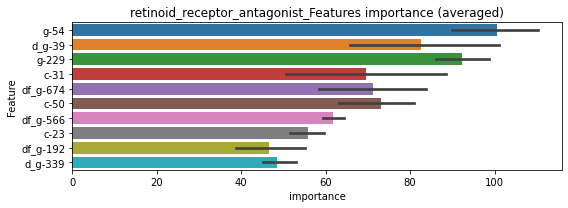

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00857028	valid_1's binary_logloss: 0.00986451
[200]	training's binary_logloss: 0.000717534	valid_1's binary_logloss: 0.00197986
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000213977	valid_1's binary_logloss: 0.00156631


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00880644	valid_1's binary_logloss: 0.010437
[200]	training's binary_logloss: 0.000755434	valid_1's binary_logloss: 0.00255138
[300]	training's binary_logloss: 0.000210905	valid_1's binary_logloss: 0.00202291
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000228824	valid_1's binary_logloss: 0.00201839


retinoid_receptor_antagonist logloss: 0.0017923214067502096


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298646	valid_1's binary_logloss: 0.049196
[200]	training's binary_logloss: 0.00422147	valid_1's binary_logloss: 0.0145246
[300]	training's binary_logloss: 0.00123277	valid_1's binary_logloss: 0.00801768
[400]	training's binary_logloss: 0.000626449	valid_1's binary_logloss: 0.00628662
[500]	training's binary_logloss: 0.000441045	valid_1's binary_logloss: 0.00575263
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000416571	valid_1's binary_logloss: 0.00567599
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0314489	valid_1's binary_logloss: 0.0458527
[200]	training's binary_logloss: 0.00455605	valid_1's binary_logloss: 0.0127164
[300]	training's binary_logloss: 0.00134953	valid_1's binary_logloss: 0.00761904
[400]	training's binary_logloss: 0.000679077	valid_1's binary_logloss: 0.00634251
[500]	training's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0023663, Threshold: 0.0034535, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00147
Num_p_label: 80.0, conf_0:0.00311, conf_1:0.00380
Num_p_label: 80.0, Expected: 5.9, Adj_threshold_1: 0.0034535
Num_p_label: 9.0, Expected: 5.9, Adj_threshold_2: 0.0134535
threshold: 0.0134535, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0302688	valid_1's binary_logloss: 0.0484492
[200]	training's binary_logloss: 0.00420959	valid_1's binary_logloss: 0.0138669
[300]	training's binary_logloss: 0.00122341	valid_1's binary_logloss: 0.00792712
[400]	training's binary_logloss: 0.000622831	valid_1's binary_logloss: 0.00606444
[500]	training's binary_logloss: 0.000440738	valid_1's binary_logloss: 0.00539126
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000429318	valid_1's binary_logloss: 0.0053265
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312364	valid_1's binary_logloss: 0.0449562
[200]	training's binary_logloss: 0.00448789	valid_1's binary_logloss: 0.012227
[300]	training's binary_logloss: 0.00131622	valid_1's binary_logloss: 0.00683423
[400]	training's binary_logloss: 0.000662506	valid_1's binary_logloss: 0.00537466
[500]	training's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.0402847, Threshold: 0.0134535, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0097941 Vs.target_rate: 0.00147
Num_p_label: 39.0, conf_0:0.01211, conf_1:0.01480
Num_p_label: 39.0, Expected: 5.9, Adj_threshold_1: 0.0134535
Num_p_label: 16.0, Expected: 5.9, Adj_threshold_2: 0.0234535
Num_p_label: 6.0, Expected: 5.9, Adj_threshold_3: 0.0334535
threshold: 0.0334535, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0302688	valid_1's binary_logloss: 0.0484492
[200]	training's binary_logloss: 0.00420959	valid_1's binary_logloss: 0.0138669
[300]	training's binary_logloss: 0.00122341	valid_1's binary_logloss: 0.00792712
[400]	training's binary_logloss: 0.000622831	valid_1's binary_logloss: 0.00606444
[500]	training's binary_logloss: 0.000440738	valid_1's binary_logloss: 0.00539126
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000429318	valid_1's binary_logloss: 0.0053265
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312364	valid_1's binary_logloss: 0.0449562
[200]	training's binary_logloss: 0.00448789	valid_1's binary_logloss: 0.012227
[300]	training's binary_logloss: 0.00131622	valid_1's binary_logloss: 0.00683423
[400]	training's binary_logloss: 0.000662506	valid_1's binary_logloss: 0.00537466
[500]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.0402847, Threshold: 0.0334535, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0015068 Vs.target_rate: 0.00147
Num_p_label: 6.0, conf_0:0.03011, conf_1:0.03680
threshold: 0.0334535, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 662.0/7789, y_label_rate: 0.0849917


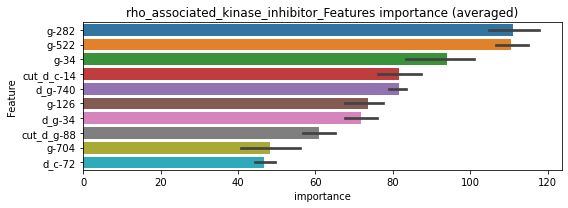

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158241	valid_1's binary_logloss: 0.0279857
[200]	training's binary_logloss: 0.0021602	valid_1's binary_logloss: 0.011456
[300]	training's binary_logloss: 0.000625704	valid_1's binary_logloss: 0.00938404
[400]	training's binary_logloss: 0.000318921	valid_1's binary_logloss: 0.00900744
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000266362	valid_1's binary_logloss: 0.00891668


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161757	valid_1's binary_logloss: 0.0275285
[200]	training's binary_logloss: 0.00228458	valid_1's binary_logloss: 0.0116278
[300]	training's binary_logloss: 0.000659269	valid_1's binary_logloss: 0.00890257
[400]	training's binary_logloss: 0.000329545	valid_1's binary_logloss: 0.00799457
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000244598	valid_1's binary_logloss: 0.00769312


rho_associated_kinase_inhibitor logloss: 0.008304977678784065


neg labels: 3289 → selected neg labels: 3282


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.027752	valid_1's binary_logloss: 0.0477282
[200]	training's binary_logloss: 0.00395128	valid_1's binary_logloss: 0.0171352
[300]	training's binary_logloss: 0.00114775	valid_1's binary_logloss: 0.0114234
[400]	training's binary_logloss: 0.000585076	valid_1's binary_logloss: 0.00976409
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.0004328	valid_1's binary_logloss: 0.00914158
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293161	valid_1's binary_logloss: 0.042476
[200]	training's binary_logloss: 0.00424844	valid_1's binary_logloss: 0.0112531
[300]	training's binary_logloss: 0.00123794	valid_1's binary_logloss: 0.00600382
[400]	training's binary_logloss: 0.000627262	valid_1's binary_logloss: 0.00488818
[500]	training's binary_logloss: 0.00044252	valid_1's binary_logloss: 0.00443095
Early stopping, best iteration is:
[520]	

1 / 3 AUC score:1.000
y_Threshold: 0.0019862, Threshold: 0.0037556, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00338, conf_1:0.00413
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0037556
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0137556
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.0237556
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_4: 0.0337556
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_5: 0.0437556
threshold: 0.0437556, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280729	valid_1's binary_logloss: 0.0451473
[200]	training's binary_logloss: 0.00387074	valid_1's binary_logloss: 0.014358
[300]	training's binary_logloss: 0.00112022	valid_1's binary_logloss: 0.00820261
[400]	training's binary_logloss: 0.000572516	valid_1's binary_logloss: 0.00620921
[500]	training's binary_logloss: 0.000420001	valid_1's binary_logloss: 0.00557565
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000414122	valid_1's binary_logloss: 0.00554177
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288264	valid_1's binary_logloss: 0.0396031
[200]	training's binary_logloss: 0.00398134	valid_1's binary_logloss: 0.00819033
[300]	training's binary_logloss: 0.00115522	valid_1's binary_logloss: 0.00345081
[400]	training's binary_logloss: 0.000590678	valid_1's binary_logloss: 0.00225076
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0266348, Threshold: 0.0437556, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, conf_0:0.03938, conf_1:0.04813
threshold: 0.0437556, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280729	valid_1's binary_logloss: 0.0451473
[200]	training's binary_logloss: 0.00387074	valid_1's binary_logloss: 0.014358
[300]	training's binary_logloss: 0.00112022	valid_1's binary_logloss: 0.00820261
[400]	training's binary_logloss: 0.000572516	valid_1's binary_logloss: 0.00620921
[500]	training's binary_logloss: 0.000420001	valid_1's binary_logloss: 0.00557565
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000414122	valid_1's binary_logloss: 0.00554177
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288264	valid_1's binary_logloss: 0.0396031
[200]	training's binary_logloss: 0.00398134	valid_1's binary_logloss: 0.00819033
[300]	training's binary_logloss: 0.00115522	valid_1's binary_logloss: 0.00345081
[400]	training's binary_logloss: 0.000590678	valid_1's binary_logloss: 0.00225076
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0266348, Threshold: 0.0437556, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, conf_0:0.03938, conf_1:0.04813
threshold: 0.0437556, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 672.0/7788, y_label_rate: 0.0862866


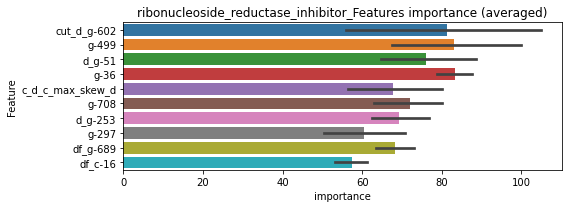

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149995	valid_1's binary_logloss: 0.0247523
[200]	training's binary_logloss: 0.00201695	valid_1's binary_logloss: 0.00804243
[300]	training's binary_logloss: 0.000576551	valid_1's binary_logloss: 0.00531364
[400]	training's binary_logloss: 0.000292751	valid_1's binary_logloss: 0.00472877
[500]	training's binary_logloss: 0.00021478	valid_1's binary_logloss: 0.00449824
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000210011	valid_1's binary_logloss: 0.00448723


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01534	valid_1's binary_logloss: 0.0220608
[200]	training's binary_logloss: 0.00205923	valid_1's binary_logloss: 0.00530207
[300]	training's binary_logloss: 0.000590342	valid_1's binary_logloss: 0.0028316
[400]	training's binary_logloss: 0.000300471	valid_1's binary_logloss: 0.00229391
[500]	training's binary_logloss: 0.000220208	valid_1's binary_logloss: 0.00212666
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000219961	valid_1's binary_logloss: 0.00212549


ribonucleoside_reductase_inhibitor logloss: 0.0033063586398511787


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273106	valid_1's binary_logloss: 0.0406485
[200]	training's binary_logloss: 0.00371279	valid_1's binary_logloss: 0.0102479
[300]	training's binary_logloss: 0.00108413	valid_1's binary_logloss: 0.00505218
[400]	training's binary_logloss: 0.000562612	valid_1's binary_logloss: 0.00362284
[500]	training's binary_logloss: 0.000416418	valid_1's binary_logloss: 0.00314282
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000403047	valid_1's binary_logloss: 0.00310867
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286729	valid_1's binary_logloss: 0.0393012
[200]	training's binary_logloss: 0.00393343	valid_1's binary_logloss: 0.00944482
[300]	training's binary_logloss: 0.00112544	valid_1's binary_logloss: 0.00514832
[400]	training's binary_logloss: 0.000571426	valid_1's binary_logloss: 0.00423948
Early stopping, best iteration is:

1 / 3 AUC score:1.000
y_Threshold: 0.0020636, Threshold: 0.0119275, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.01073, conf_1:0.01312
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0119275
Num_p_label: 59.0, Expected: 4.2, Adj_threshold_2: 0.0219275
Num_p_label: 45.0, Expected: 4.2, Adj_threshold_3: 0.0319275
Num_p_label: 39.0, Expected: 4.2, Adj_threshold_4: 0.0419275
Num_p_label: 35.0, Expected: 4.2, Adj_threshold_5: 0.0519275
Num_p_label: 34.0, Expected: 4.2, Adj_threshold_6: 0.0619275
Num_p_label: 33.0, Expected: 4.2, Adj_threshold_7: 0.0719275
Num_p_label: 31.0, Expected: 4.2, Adj_threshold_8: 0.0819275
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_9: 0.0919275
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_10: 0.1019275
threshold: 0.1119275, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270402	valid_1's binary_logloss: 0.0392144
[200]	training's binary_logloss: 0.00356698	valid_1's binary_logloss: 0.00883514
[300]	training's binary_logloss: 0.0010259	valid_1's binary_logloss: 0.00415594
[400]	training's binary_logloss: 0.000527172	valid_1's binary_logloss: 0.00289519
[500]	training's binary_logloss: 0.000404968	valid_1's binary_logloss: 0.00254205
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000400117	valid_1's binary_logloss: 0.00253227
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281811	valid_1's binary_logloss: 0.039044
[200]	training's binary_logloss: 0.00373042	valid_1's binary_logloss: 0.00865143
[300]	training's binary_logloss: 0.0010732	valid_1's binary_logloss: 0.0042806
[400]	training's binary_logloss: 0.000552876	valid_1's binary_logloss: 0.00333703
Early stopping, best iteration is:
[4

2 / 3 AUC score:1.000
y_Threshold: 0.0499909, Threshold: 0.1119275, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0178302 Vs.target_rate: 0.00105
Num_p_label: 71.0, conf_0:0.10073, conf_1:0.12312
Num_p_label: 71.0, Expected: 4.2, Adj_threshold_1: 0.1119275
Num_p_label: 69.0, Expected: 4.2, Adj_threshold_2: 0.1219275
Num_p_label: 67.0, Expected: 4.2, Adj_threshold_3: 0.1319275
Num_p_label: 66.0, Expected: 4.2, Adj_threshold_4: 0.1419275
Num_p_label: 65.0, Expected: 4.2, Adj_threshold_5: 0.1519275
Num_p_label: 64.0, Expected: 4.2, Adj_threshold_6: 0.1619275
Num_p_label: 64.0, Expected: 4.2, Adj_threshold_7: 0.1719275
Num_p_label: 64.0, Expected: 4.2, Adj_threshold_8: 0.1819275
Num_p_label: 64.0, Expected: 4.2, Adj_threshold_9: 0.1919275
Num_p_label: 63.0, Expected: 4.2, Adj_threshold_10: 0.2019275
threshold: 0.2119275, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266349	valid_1's binary_logloss: 0.0517504
[200]	training's binary_logloss: 0.0035051	valid_1's binary_logloss: 0.0197671
[300]	training's binary_logloss: 0.00100624	valid_1's binary_logloss: 0.0117875
[400]	training's binary_logloss: 0.00052177	valid_1's binary_logloss: 0.00942944
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000443495	valid_1's binary_logloss: 0.00905836
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279545	valid_1's binary_logloss: 0.0395496
[200]	training's binary_logloss: 0.00365625	valid_1's binary_logloss: 0.00980818
[300]	training's binary_logloss: 0.00103861	valid_1's binary_logloss: 0.00584477
[400]	training's binary_logloss: 0.000533505	valid_1's binary_logloss: 0.00497269
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000533505	valid_1's binary_logloss: 0.00497269


3 / 3 AUC score:1.000
y_Threshold: 0.0470141, Threshold: 0.2119275, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0165746 Vs.target_rate: 0.00105
Num_p_label: 66.0, conf_0:0.19073, conf_1:0.23312
Num_p_label: 66.0, Expected: 4.2, Adj_threshold_1: 0.2119275
Num_p_label: 65.0, Expected: 4.2, Adj_threshold_2: 0.2219275
Num_p_label: 65.0, Expected: 4.2, Adj_threshold_3: 0.2319275
Num_p_label: 63.0, Expected: 4.2, Adj_threshold_4: 0.2419275
Num_p_label: 62.0, Expected: 4.2, Adj_threshold_5: 0.2519275
Num_p_label: 61.0, Expected: 4.2, Adj_threshold_6: 0.2619275
Num_p_label: 59.0, Expected: 4.2, Adj_threshold_7: 0.2719275
Num_p_label: 57.0, Expected: 4.2, Adj_threshold_8: 0.2819275
Num_p_label: 57.0, Expected: 4.2, Adj_threshold_9: 0.2919275
Num_p_label: 57.0, Expected: 4.2, Adj_threshold_10: 0.3019275
threshold: 0.3119275, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 711.0/7788, y_label_rate: 0.0912943


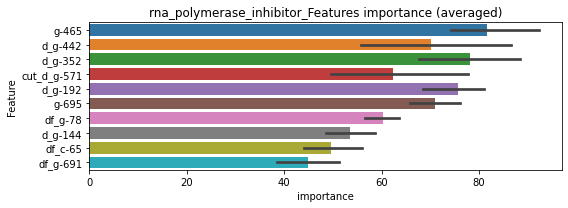

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164183	valid_1's binary_logloss: 0.0269643
[200]	training's binary_logloss: 0.00236758	valid_1's binary_logloss: 0.00980319
[300]	training's binary_logloss: 0.000687626	valid_1's binary_logloss: 0.00684963
[400]	training's binary_logloss: 0.000340033	valid_1's binary_logloss: 0.00598221
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000352877	valid_1's binary_logloss: 0.00597481


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178106	valid_1's binary_logloss: 0.0273935
[200]	training's binary_logloss: 0.00265011	valid_1's binary_logloss: 0.00950097
[300]	training's binary_logloss: 0.000747855	valid_1's binary_logloss: 0.00625118
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000545952	valid_1's binary_logloss: 0.00585161


rna_polymerase_inhibitor logloss: 0.005913206613212889


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0961055	valid_1's binary_logloss: 0.249592
[200]	training's binary_logloss: 0.0341017	valid_1's binary_logloss: 0.228353
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.036889	valid_1's binary_logloss: 0.227955
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.110045	valid_1's binary_logloss: 0.25114
[200]	training's binary_logloss: 0.0387521	valid_1's binary_logloss: 0.225
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0258259	valid_1's binary_logloss: 0.222933


1 / 3 AUC score:0.916
y_Threshold: 0.0755976, Threshold: 0.0938065, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 399 → Positive_corect_labels: 515/3499
p_label_rate: 0.0200904 Vs.target_rate: 0.00991
Num_p_label: 80.0, conf_0:0.08443, conf_1:0.10319
threshold: 0.0938065, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 515.0/3499, y_label_rate: 0.1471849
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0660136	valid_1's binary_logloss: 0.171097
[200]	training's binary_logloss: 0.0195076	valid_1's binary_logloss: 0.13795
[300]	training's binary_logloss: 0.00688179	valid_1's binary_logloss: 0.129622
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0074205	valid_1's binary_logloss: 0.129363
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0725159	valid_1's binary_logloss: 0.154316
[200]	training's binary_logloss: 0.021917	valid_1's binary_logloss: 0.11041
[300]	training's binary_logloss: 0.00770502	valid_1's binary_logloss: 0.100024
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00651969	valid_1's binary_logloss: 0.099341


2 / 3 AUC score:0.991
y_Threshold: 0.0518453, Threshold: 0.0938065, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 70 → Positive_corect_labels: 480.0/3429
p_label_rate: 0.0017579 Vs.target_rate: 0.00991
Num_p_label: 7.0, conf_0:0.08443, conf_1:0.10319
Num_p_label: 7.0, Expected: 39.5, Adj_threshold_1: 0.0938065
Num_p_label: 9.0, Expected: 39.5, Adj_threshold_2: 0.0838065
Num_p_label: 16.0, Expected: 39.5, Adj_threshold_3: 0.0738065
Num_p_label: 31.0, Expected: 39.5, Adj_threshold_4: 0.0638065
threshold: 0.0638065, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 480.0/3429, y_label_rate: 0.1399825
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0641815	valid_1's binary_logloss: 0.129601
[200]	training's binary_logloss: 0.0171836	valid_1's binary_logloss: 0.0902066
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00687329	valid_1's binary_logloss: 0.0813524
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0574331	valid_1's binary_logloss: 0.132134
[200]	training's binary_logloss: 0.015376	valid_1's binary_logloss: 0.0999301
[300]	training's binary_logloss: 0.00530066	valid_1's binary_logloss: 0.0909568
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00368043	valid_1's binary_logloss: 0.0886934


3 / 3 AUC score:0.995
y_Threshold: 0.0420335, Threshold: 0.0638065, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 459.0/3387
p_label_rate: 0.0040181 Vs.target_rate: 0.00991
Num_p_label: 16.0, conf_0:0.05743, conf_1:0.07019
threshold: 0.0638065, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 475.0/7369, y_label_rate: 0.0644592


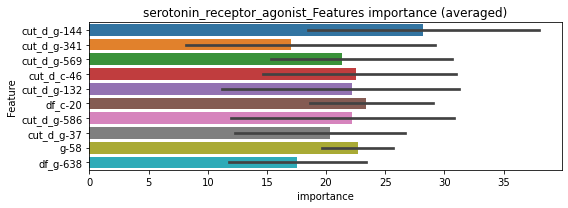

len(train_index) : 3684
len(valid_index) : 3685
================================= fold 1/2 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0284373	valid_1's binary_logloss: 0.0804778
[200]	training's binary_logloss: 0.00750541	valid_1's binary_logloss: 0.0670606
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00366349	valid_1's binary_logloss: 0.0651279


len(train_index) : 3685
len(valid_index) : 3684
================================= fold 2/2 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294208	valid_1's binary_logloss: 0.0781612
[200]	training's binary_logloss: 0.00773531	valid_1's binary_logloss: 0.0637608
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00596599	valid_1's binary_logloss: 0.0628498


serotonin_receptor_agonist logloss: 0.06398902544198438


neg labels: 3289 → selected neg labels: 3220


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3220, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.13165	valid_1's binary_logloss: 0.353388
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.0702228	valid_1's binary_logloss: 0.344182
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.131517	valid_1's binary_logloss: 0.34798
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.0667614	valid_1's binary_logloss: 0.336546


1 / 3 AUC score:0.819
y_Threshold: 0.1285006, Threshold: 0.1740267, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 635 → Positive_corect_labels: 391/3229
p_label_rate: 0.0200904 Vs.target_rate: 0.01696
Num_p_label: 80.0, conf_0:0.15662, conf_1:0.19143
threshold: 0.1740267, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 391.0/3229, y_label_rate: 0.1210901
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0690518	valid_1's binary_logloss: 0.220934
[200]	training's binary_logloss: 0.0209331	valid_1's binary_logloss: 0.207591
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.0228406	valid_1's binary_logloss: 0.206982
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.070635	valid_1's binary_logloss: 0.220082
[200]	training's binary_logloss: 0.0212652	valid_1's binary_logloss: 0.209934
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0238456	valid_1's binary_logloss: 0.208625


2 / 3 AUC score:0.936
y_Threshold: 0.0872821, Threshold: 0.1740267, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 196 → Positive_corect_labels: 293.0/3033
p_label_rate: 0.0070316 Vs.target_rate: 0.01696
Num_p_label: 28.0, conf_0:0.15662, conf_1:0.19143
threshold: 0.1740267, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 293.0/3033, y_label_rate: 0.0966040
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0450017	valid_1's binary_logloss: 0.166853
[200]	training's binary_logloss: 0.0116931	valid_1's binary_logloss: 0.148355
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00912196	valid_1's binary_logloss: 0.147565
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0494263	valid_1's binary_logloss: 0.144218
[200]	training's binary_logloss: 0.013659	valid_1's binary_logloss: 0.11944
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00886036	valid_1's binary_logloss: 0.116876


3 / 3 AUC score:0.985
y_Threshold: 0.0663419, Threshold: 0.1740267, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 74 → Positive_corect_labels: 256.0/2959
p_label_rate: 0.0077850 Vs.target_rate: 0.01696
Num_p_label: 31.0, conf_0:0.15662, conf_1:0.19143
threshold: 0.1740267, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 287.0/6941, y_label_rate: 0.0413485


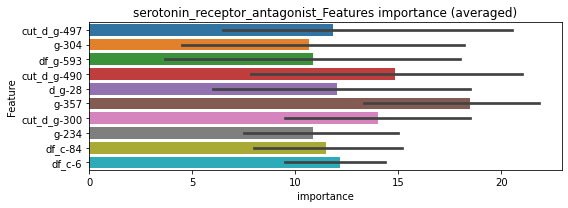

len(train_index) : 3470
len(valid_index) : 3471
================================= fold 1/2 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205242	valid_1's binary_logloss: 0.0967432
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.0111017	valid_1's binary_logloss: 0.0935621


len(train_index) : 3471
len(valid_index) : 3470
================================= fold 2/2 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206455	valid_1's binary_logloss: 0.0909605
Early stopping, best iteration is:
[138]	training's binary_logloss: 0.0120613	valid_1's binary_logloss: 0.0864999


serotonin_receptor_antagonist logloss: 0.09003148175339146


neg labels: 3289 → selected neg labels: 3281


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3281, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0370733	valid_1's binary_logloss: 0.073355
[200]	training's binary_logloss: 0.006351	valid_1's binary_logloss: 0.0334957
[300]	training's binary_logloss: 0.00191164	valid_1's binary_logloss: 0.0240722
[400]	training's binary_logloss: 0.000919958	valid_1's binary_logloss: 0.0201568
[500]	training's binary_logloss: 0.000605823	valid_1's binary_logloss: 0.0188927
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000526176	valid_1's binary_logloss: 0.018432
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0407204	valid_1's binary_logloss: 0.0616653
[200]	training's binary_logloss: 0.00714578	valid_1's binary_logloss: 0.024915
[300]	training's binary_logloss: 0.00212445	valid_1's binary_logloss: 0.0189748
[400]	training's binary_logloss: 0.00101083	valid_1's binary_logloss: 0.0170017
Early stopping, best iteration is:
[454]	traini

1 / 3 AUC score:0.999
y_Threshold: 0.0035438, Threshold: 0.0043437, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00185
Num_p_label: 80.0, conf_0:0.00391, conf_1:0.00478
Num_p_label: 80.0, Expected: 7.4, Adj_threshold_1: 0.0043437
Num_p_label: 7.0, Expected: 7.4, Adj_threshold_2: 0.0143437
threshold: 0.0143437, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0378568	valid_1's binary_logloss: 0.0671694
[200]	training's binary_logloss: 0.00654869	valid_1's binary_logloss: 0.0293364
[300]	training's binary_logloss: 0.00194879	valid_1's binary_logloss: 0.0206527
[400]	training's binary_logloss: 0.000947254	valid_1's binary_logloss: 0.0177919
[500]	training's binary_logloss: 0.0006188	valid_1's binary_logloss: 0.0166363
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000628275	valid_1's binary_logloss: 0.0166024
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0387396	valid_1's binary_logloss: 0.0712149
[200]	training's binary_logloss: 0.0067228	valid_1's binary_logloss: 0.0331261
[300]	training's binary_logloss: 0.00200112	valid_1's binary_logloss: 0.0253406
[400]	training's binary_logloss: 0.000952628	valid_1's binary_logloss: 0.0231565
Early stopping, best iteration is:
[465]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0135312, Threshold: 0.0143437, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0050226 Vs.target_rate: 0.00185
Num_p_label: 20.0, conf_0:0.01291, conf_1:0.01578
threshold: 0.0143437, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0369015	valid_1's binary_logloss: 0.0619155
[200]	training's binary_logloss: 0.00641018	valid_1's binary_logloss: 0.0250257
[300]	training's binary_logloss: 0.00191303	valid_1's binary_logloss: 0.0177241
[400]	training's binary_logloss: 0.000935466	valid_1's binary_logloss: 0.0152988
[500]	training's binary_logloss: 0.000611341	valid_1's binary_logloss: 0.0141466
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000545529	valid_1's binary_logloss: 0.0138848
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0394377	valid_1's binary_logloss: 0.0639018
[200]	training's binary_logloss: 0.0066897	valid_1's binary_logloss: 0.0221543
[300]	training's binary_logloss: 0.00202534	valid_1's binary_logloss: 0.0132502
[400]	training's binary_logloss: 0.000959911	valid_1's binary_logloss: 0.0103181
[500]	training's binary_logloss: 0.0006257

3 / 3 AUC score:1.000
y_Threshold: 0.0164993, Threshold: 0.0143437, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0047715 Vs.target_rate: 0.00185
Num_p_label: 19.0, conf_0:0.01291, conf_1:0.01578
threshold: 0.0143437, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 669.0/7775, y_label_rate: 0.0860450


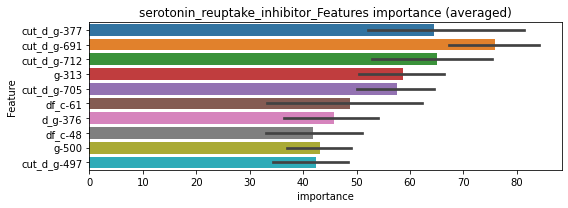

len(train_index) : 3887
len(valid_index) : 3888
================================= fold 1/2 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02075	valid_1's binary_logloss: 0.0455679
[200]	training's binary_logloss: 0.00358721	valid_1's binary_logloss: 0.0280065
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00156433	valid_1's binary_logloss: 0.026429


len(train_index) : 3888
len(valid_index) : 3887
================================= fold 2/2 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232881	valid_1's binary_logloss: 0.0357071
[200]	training's binary_logloss: 0.00411768	valid_1's binary_logloss: 0.0142645
[300]	training's binary_logloss: 0.00120806	valid_1's binary_logloss: 0.0111231
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00126136	valid_1's binary_logloss: 0.0110941


serotonin_reuptake_inhibitor logloss: 0.018762516484670963


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0334481	valid_1's binary_logloss: 0.0579148
[200]	training's binary_logloss: 0.00531886	valid_1's binary_logloss: 0.0241159
[300]	training's binary_logloss: 0.00155738	valid_1's binary_logloss: 0.0170537
[400]	training's binary_logloss: 0.00077161	valid_1's binary_logloss: 0.0146608
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000575715	valid_1's binary_logloss: 0.0139785
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.036555	valid_1's binary_logloss: 0.0612201
[200]	training's binary_logloss: 0.00595185	valid_1's binary_logloss: 0.0240914
[300]	training's binary_logloss: 0.00175482	valid_1's binary_logloss: 0.0162183
[400]	training's binary_logloss: 0.000834658	valid_1's binary_logloss: 0.0139969
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000670656	valid_1's binary_logloss: 0.0134201


1 / 3 AUC score:1.000
y_Threshold: 0.0033871, Threshold: 0.0042379, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00381, conf_1:0.00466
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0042379
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_2: 0.0142379
threshold: 0.0142379, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0343689	valid_1's binary_logloss: 0.0583905
[200]	training's binary_logloss: 0.00552444	valid_1's binary_logloss: 0.0221412
[300]	training's binary_logloss: 0.00160231	valid_1's binary_logloss: 0.0148916
[400]	training's binary_logloss: 0.000786592	valid_1's binary_logloss: 0.0128856
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000580586	valid_1's binary_logloss: 0.0122813
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0374622	valid_1's binary_logloss: 0.0630522
[200]	training's binary_logloss: 0.00605937	valid_1's binary_logloss: 0.025372
[300]	training's binary_logloss: 0.00177324	valid_1's binary_logloss: 0.0172785
[400]	training's binary_logloss: 0.00084999	valid_1's binary_logloss: 0.0146963
[500]	training's binary_logloss: 0.000561724	valid_1's binary_logloss: 0.0133025
Early stopping, best iteration is:
[539]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0200929, Threshold: 0.0142379, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, conf_0:0.01281, conf_1:0.01566
threshold: 0.0142379, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0358044	valid_1's binary_logloss: 0.0630667
[200]	training's binary_logloss: 0.00578639	valid_1's binary_logloss: 0.0247907
[300]	training's binary_logloss: 0.00169142	valid_1's binary_logloss: 0.0160641
[400]	training's binary_logloss: 0.000823961	valid_1's binary_logloss: 0.0128102
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000705502	valid_1's binary_logloss: 0.0125824
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366851	valid_1's binary_logloss: 0.056045
[200]	training's binary_logloss: 0.00584716	valid_1's binary_logloss: 0.0184026
[300]	training's binary_logloss: 0.00170656	valid_1's binary_logloss: 0.0109777
[400]	training's binary_logloss: 0.000834567	valid_1's binary_logloss: 0.00865927
[500]	training's binary_logloss: 0.000559436	valid_1's binary_logloss: 0.00779555
Early stopping, best iteration is:
[555]

3 / 3 AUC score:1.000
y_Threshold: 0.0176876, Threshold: 0.0142379, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, conf_0:0.01281, conf_1:0.01566
threshold: 0.0142379, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 671.0/7787, y_label_rate: 0.0861693


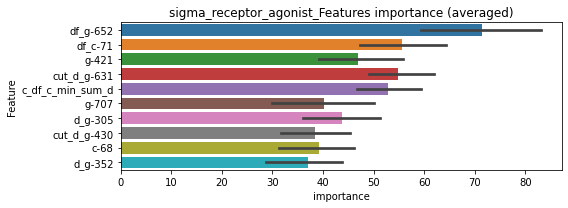

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 sigma_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019109	valid_1's binary_logloss: 0.0432085
[200]	training's binary_logloss: 0.00320013	valid_1's binary_logloss: 0.0239972
[300]	training's binary_logloss: 0.000921835	valid_1's binary_logloss: 0.0210844
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.000812295	valid_1's binary_logloss: 0.0210277


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 sigma_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0211174	valid_1's binary_logloss: 0.0362048
[200]	training's binary_logloss: 0.00359122	valid_1's binary_logloss: 0.0158418
[300]	training's binary_logloss: 0.00104926	valid_1's binary_logloss: 0.0121351
[400]	training's binary_logloss: 0.000491529	valid_1's binary_logloss: 0.0113315
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000394232	valid_1's binary_logloss: 0.0110747


sigma_receptor_agonist logloss: 0.016051809819298615


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_antagonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0356488	valid_1's binary_logloss: 0.0554977
[200]	training's binary_logloss: 0.00573641	valid_1's binary_logloss: 0.0198356
[300]	training's binary_logloss: 0.00164791	valid_1's binary_logloss: 0.0114919
[400]	training's binary_logloss: 0.000809651	valid_1's binary_logloss: 0.00913211
[500]	training's binary_logloss: 0.000547984	valid_1's binary_logloss: 0.0083464
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000530554	valid_1's binary_logloss: 0.00827592
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0374596	valid_1's binary_logloss: 0.0656599
[200]	training's binary_logloss: 0.00612603	valid_1's binary_logloss: 0.0298679
[300]	training's binary_logloss: 0.00176977	valid_1's binary_logloss: 0.0228035
[400]	training's binary_logloss: 0.000838904	valid_1's binary_logloss: 0.0209317
Early stopping, best iteration is:
[470

1 / 3 AUC score:1.000
y_Threshold: 0.0032505, Threshold: 0.0044889, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00404, conf_1:0.00494
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0044889
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0144889
threshold: 0.0144889, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0361038	valid_1's binary_logloss: 0.0582792
[200]	training's binary_logloss: 0.00574769	valid_1's binary_logloss: 0.021822
[300]	training's binary_logloss: 0.00166429	valid_1's binary_logloss: 0.0146
[400]	training's binary_logloss: 0.00081789	valid_1's binary_logloss: 0.012156
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000623395	valid_1's binary_logloss: 0.0113314
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0352304	valid_1's binary_logloss: 0.0592812
[200]	training's binary_logloss: 0.00575069	valid_1's binary_logloss: 0.0206295
[300]	training's binary_logloss: 0.00168489	valid_1's binary_logloss: 0.0127587
[400]	training's binary_logloss: 0.000817896	valid_1's binary_logloss: 0.0100612
[500]	training's binary_logloss: 0.000551199	valid_1's binary_logloss: 0.00914099
Early stopping, best iteration is:
[541]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0231338, Threshold: 0.0144889, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0070316 Vs.target_rate: 0.00151
Num_p_label: 28.0, conf_0:0.01304, conf_1:0.01594
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0144889
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0244889
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_3: 0.0344889
threshold: 0.0344889, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0368994	valid_1's binary_logloss: 0.0539621
[200]	training's binary_logloss: 0.00581533	valid_1's binary_logloss: 0.0171683
[300]	training's binary_logloss: 0.00166465	valid_1's binary_logloss: 0.0105291
[400]	training's binary_logloss: 0.000818954	valid_1's binary_logloss: 0.00853166
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000594457	valid_1's binary_logloss: 0.00794698
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0364385	valid_1's binary_logloss: 0.0556749
[200]	training's binary_logloss: 0.00577237	valid_1's binary_logloss: 0.0185453
[300]	training's binary_logloss: 0.0016702	valid_1's binary_logloss: 0.0109075
[400]	training's binary_logloss: 0.000817278	valid_1's binary_logloss: 0.00839319
[500]	training's binary_logloss: 0.00054902	valid_1's binary_logloss: 0.0074463
Early stopping, best iteration is:
[526]

3 / 3 AUC score:1.000
y_Threshold: 0.0255024, Threshold: 0.0344889, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, conf_0:0.03104, conf_1:0.03794
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0344889
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0244889
threshold: 0.0244889, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 662.0/7785, y_label_rate: 0.0850353


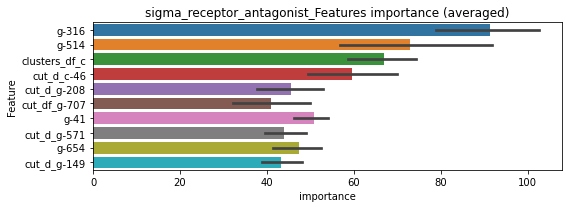

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191927	valid_1's binary_logloss: 0.0418892
[200]	training's binary_logloss: 0.00296044	valid_1's binary_logloss: 0.0237106
[300]	training's binary_logloss: 0.000846396	valid_1's binary_logloss: 0.0203663
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000520633	valid_1's binary_logloss: 0.0197756


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197787	valid_1's binary_logloss: 0.030472
[200]	training's binary_logloss: 0.00323585	valid_1's binary_logloss: 0.0116301
[300]	training's binary_logloss: 0.000925559	valid_1's binary_logloss: 0.00831816
[400]	training's binary_logloss: 0.000442513	valid_1's binary_logloss: 0.00739256
[500]	training's binary_logloss: 0.000291365	valid_1's binary_logloss: 0.00716827
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000282127	valid_1's binary_logloss: 0.00714922


sigma_receptor_antagonist logloss: 0.013463208479755474


neg labels: 3289 → selected neg labels: 3284


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268076	valid_1's binary_logloss: 0.0413161
[200]	training's binary_logloss: 0.00371671	valid_1's binary_logloss: 0.0115442
[300]	training's binary_logloss: 0.00109527	valid_1's binary_logloss: 0.00618351
[400]	training's binary_logloss: 0.000570801	valid_1's binary_logloss: 0.00461547
[500]	training's binary_logloss: 0.000418109	valid_1's binary_logloss: 0.0040763
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000413923	valid_1's binary_logloss: 0.00406184
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281275	valid_1's binary_logloss: 0.0370235
[200]	training's binary_logloss: 0.00396453	valid_1's binary_logloss: 0.00819688
[300]	training's binary_logloss: 0.00117277	valid_1's binary_logloss: 0.00380496
[400]	training's binary_logloss: 0.00059206	valid_1's binary_logloss: 0.00249043
[500]	training's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0018857, Threshold: 0.0036072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00325, conf_1:0.00397
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0036072
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0136072
threshold: 0.0136072, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271408	valid_1's binary_logloss: 0.0399872
[200]	training's binary_logloss: 0.00371948	valid_1's binary_logloss: 0.0104465
[300]	training's binary_logloss: 0.00110193	valid_1's binary_logloss: 0.00512805
[400]	training's binary_logloss: 0.000569504	valid_1's binary_logloss: 0.0035793
[500]	training's binary_logloss: 0.000421646	valid_1's binary_logloss: 0.00312754
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000416499	valid_1's binary_logloss: 0.00312274
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282133	valid_1's binary_logloss: 0.0370588
[200]	training's binary_logloss: 0.00390694	valid_1's binary_logloss: 0.00764199
[300]	training's binary_logloss: 0.00114347	valid_1's binary_logloss: 0.00331847
[400]	training's binary_logloss: 0.000585933	valid_1's binary_logloss: 0.00217312
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0703702, Threshold: 0.0136072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0075339 Vs.target_rate: 0.00105
Num_p_label: 30.0, conf_0:0.01225, conf_1:0.01497
Num_p_label: 30.0, Expected: 4.2, Adj_threshold_1: 0.0136072
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0236072
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_3: 0.0336072
threshold: 0.0336072, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271408	valid_1's binary_logloss: 0.0399872
[200]	training's binary_logloss: 0.00371948	valid_1's binary_logloss: 0.0104465
[300]	training's binary_logloss: 0.00110193	valid_1's binary_logloss: 0.00512805
[400]	training's binary_logloss: 0.000569504	valid_1's binary_logloss: 0.0035793
[500]	training's binary_logloss: 0.000421646	valid_1's binary_logloss: 0.00312754
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000416499	valid_1's binary_logloss: 0.00312274
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282133	valid_1's binary_logloss: 0.0370588
[200]	training's binary_logloss: 0.00390694	valid_1's binary_logloss: 0.00764199
[300]	training's binary_logloss: 0.00114347	valid_1's binary_logloss: 0.00331847
[400]	training's binary_logloss: 0.000585933	valid_1's binary_logloss: 0.00217312
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0703702, Threshold: 0.0336072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, conf_0:0.03025, conf_1:0.03697
threshold: 0.0336072, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 660.0/7790, y_label_rate: 0.0847240


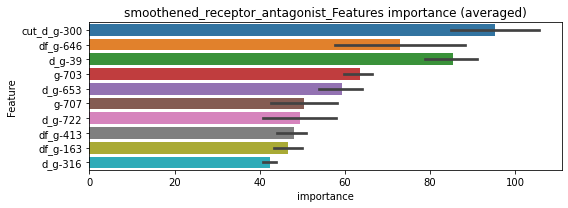

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142407	valid_1's binary_logloss: 0.0234974
[200]	training's binary_logloss: 0.00192794	valid_1's binary_logloss: 0.00837382
[300]	training's binary_logloss: 0.000560139	valid_1's binary_logloss: 0.00616281
[400]	training's binary_logloss: 0.000284041	valid_1's binary_logloss: 0.00565387
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000237079	valid_1's binary_logloss: 0.0055515


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144337	valid_1's binary_logloss: 0.0203493
[200]	training's binary_logloss: 0.00204543	valid_1's binary_logloss: 0.00519419
[300]	training's binary_logloss: 0.000594273	valid_1's binary_logloss: 0.00311682
[400]	training's binary_logloss: 0.000301465	valid_1's binary_logloss: 0.00261818
[500]	training's binary_logloss: 0.000219158	valid_1's binary_logloss: 0.00250528
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000220967	valid_1's binary_logloss: 0.0025027


smoothened_receptor_antagonist logloss: 0.004027101274373272


neg labels: 3289 → selected neg labels: 3244


sodium_channel_inhibitor, len(trt): 267, len(othr): 3244, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.108279	valid_1's binary_logloss: 0.275351
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.0449079	valid_1's binary_logloss: 0.251276
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.119803	valid_1's binary_logloss: 0.267729
[200]	training's binary_logloss: 0.0455571	valid_1's binary_logloss: 0.229927
[300]	training's binary_logloss: 0.0189672	valid_1's binary_logloss: 0.220638
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0203384	valid_1's binary_logloss: 0.220195


1 / 3 AUC score:0.917
y_Threshold: 0.0765089, Threshold: 0.0957259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 401 → Positive_corect_labels: 513/3491
p_label_rate: 0.0200904 Vs.target_rate: 0.01121
Num_p_label: 80.0, conf_0:0.08615, conf_1:0.10530
threshold: 0.0957259, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 513.0/3491, y_label_rate: 0.1469493
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.075345	valid_1's binary_logloss: 0.202805
[200]	training's binary_logloss: 0.0222451	valid_1's binary_logloss: 0.176292
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0114412	valid_1's binary_logloss: 0.172642
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0786459	valid_1's binary_logloss: 0.189912
[200]	training's binary_logloss: 0.0240935	valid_1's binary_logloss: 0.161186
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0126972	valid_1's binary_logloss: 0.156929


2 / 3 AUC score:0.965
y_Threshold: 0.0581829, Threshold: 0.0957259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 122 → Positive_corect_labels: 452.0/3369
p_label_rate: 0.0030136 Vs.target_rate: 0.01121
Num_p_label: 12.0, conf_0:0.08615, conf_1:0.10530
Num_p_label: 12.0, Expected: 44.6, Adj_threshold_1: 0.0957259
Num_p_label: 23.0, Expected: 44.6, Adj_threshold_2: 0.0857259
threshold: 0.0857259, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 452.0/3369, y_label_rate: 0.1341644
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0658547	valid_1's binary_logloss: 0.157917
[200]	training's binary_logloss: 0.0186226	valid_1's binary_logloss: 0.12361
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0120676	valid_1's binary_logloss: 0.118559
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0614749	valid_1's binary_logloss: 0.163834
[200]	training's binary_logloss: 0.0175568	valid_1's binary_logloss: 0.137167
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.0118724	valid_1's binary_logloss: 0.134987


3 / 3 AUC score:0.985
y_Threshold: 0.0526552, Threshold: 0.0857259, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 66 → Positive_corect_labels: 419.0/3303
p_label_rate: 0.0025113 Vs.target_rate: 0.01121
Num_p_label: 10.0, conf_0:0.07715, conf_1:0.09430
Num_p_label: 10.0, Expected: 44.6, Adj_threshold_1: 0.0857259
Num_p_label: 18.0, Expected: 44.6, Adj_threshold_2: 0.0757259
Num_p_label: 27.0, Expected: 44.6, Adj_threshold_3: 0.0657259
threshold: 0.0657259, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 446.0/7285, y_label_rate: 0.0612217


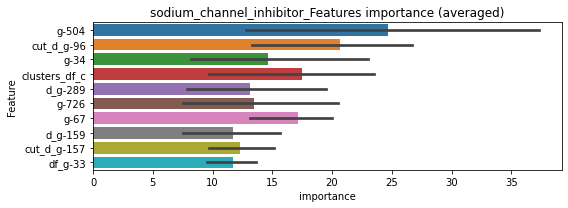

len(train_index) : 3642
len(valid_index) : 3643
================================= fold 1/2 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030586	valid_1's binary_logloss: 0.0936378
[200]	training's binary_logloss: 0.00820393	valid_1's binary_logloss: 0.0842333
Early stopping, best iteration is:
[195]	training's binary_logloss: 0.00866868	valid_1's binary_logloss: 0.0839088


len(train_index) : 3643
len(valid_index) : 3642
================================= fold 2/2 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315855	valid_1's binary_logloss: 0.0885192
[200]	training's binary_logloss: 0.00846552	valid_1's binary_logloss: 0.0781968
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00662849	valid_1's binary_logloss: 0.0768938


sodium_channel_inhibitor logloss: 0.08040179047113086


neg labels: 3289 → selected neg labels: 3283


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3283, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0314345	valid_1's binary_logloss: 0.0475339
[200]	training's binary_logloss: 0.00468357	valid_1's binary_logloss: 0.0142882
[300]	training's binary_logloss: 0.00141626	valid_1's binary_logloss: 0.00839602
[400]	training's binary_logloss: 0.000695715	valid_1's binary_logloss: 0.00653537
[500]	training's binary_logloss: 0.00048148	valid_1's binary_logloss: 0.00585663
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000448093	valid_1's binary_logloss: 0.00574189
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0316914	valid_1's binary_logloss: 0.0534974
[200]	training's binary_logloss: 0.00484407	valid_1's binary_logloss: 0.0205664
[300]	training's binary_logloss: 0.00140127	valid_1's binary_logloss: 0.014213
[400]	training's binary_logloss: 0.000701576	valid_1's binary_logloss: 0.0123021
Early stopping, best iteration is:
[442

1 / 3 AUC score:1.000
y_Threshold: 0.0024645, Threshold: 0.0046197, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00134
Num_p_label: 80.0, conf_0:0.00416, conf_1:0.00508
Num_p_label: 80.0, Expected: 5.4, Adj_threshold_1: 0.0046197
Num_p_label: 11.0, Expected: 5.4, Adj_threshold_2: 0.0146197
Num_p_label: 4.0, Expected: 5.4, Adj_threshold_3: 0.0246197
threshold: 0.0246197, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0309742	valid_1's binary_logloss: 0.0461058
[200]	training's binary_logloss: 0.00458298	valid_1's binary_logloss: 0.0129352
[300]	training's binary_logloss: 0.00138605	valid_1's binary_logloss: 0.00714192
[400]	training's binary_logloss: 0.000689961	valid_1's binary_logloss: 0.00553351
[500]	training's binary_logloss: 0.000477254	valid_1's binary_logloss: 0.00496847
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000444886	valid_1's binary_logloss: 0.00486013
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310959	valid_1's binary_logloss: 0.0512979
[200]	training's binary_logloss: 0.00467583	valid_1's binary_logloss: 0.0206521
[300]	training's binary_logloss: 0.00138664	valid_1's binary_logloss: 0.0150032
[400]	training's binary_logloss: 0.000703163	valid_1's binary_logloss: 0.0131306
Early stopping, best iteration is:
[4

2 / 3 AUC score:1.000
y_Threshold: 0.0138000, Threshold: 0.0246197, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, conf_0:0.02216, conf_1:0.02708
threshold: 0.0246197, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312082	valid_1's binary_logloss: 0.0482055
[200]	training's binary_logloss: 0.00463485	valid_1's binary_logloss: 0.0148226
[300]	training's binary_logloss: 0.00137412	valid_1's binary_logloss: 0.00897574
[400]	training's binary_logloss: 0.000684915	valid_1's binary_logloss: 0.0071227
[500]	training's binary_logloss: 0.000475631	valid_1's binary_logloss: 0.00645212
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000473035	valid_1's binary_logloss: 0.00643865
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310153	valid_1's binary_logloss: 0.0476828
[200]	training's binary_logloss: 0.00453439	valid_1's binary_logloss: 0.015043
[300]	training's binary_logloss: 0.00133646	valid_1's binary_logloss: 0.00938428
[400]	training's binary_logloss: 0.000678469	valid_1's binary_logloss: 0.00778283
[500]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.0193187, Threshold: 0.0246197, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00134
Num_p_label: 10.0, conf_0:0.02216, conf_1:0.02708
threshold: 0.0246197, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 665.0/7787, y_label_rate: 0.0853987


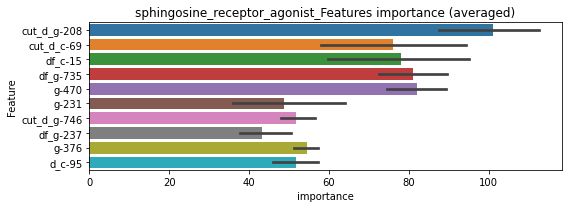

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172464	valid_1's binary_logloss: 0.032801
[200]	training's binary_logloss: 0.00257151	valid_1's binary_logloss: 0.0146778
[300]	training's binary_logloss: 0.000752894	valid_1's binary_logloss: 0.012369
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000499863	valid_1's binary_logloss: 0.0119549


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178079	valid_1's binary_logloss: 0.0268493
[200]	training's binary_logloss: 0.00269465	valid_1's binary_logloss: 0.01006
[300]	training's binary_logloss: 0.000790235	valid_1's binary_logloss: 0.0072988
[400]	training's binary_logloss: 0.000384297	valid_1's binary_logloss: 0.00665407
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000293695	valid_1's binary_logloss: 0.00653809


sphingosine_receptor_agonist logloss: 0.009246860112251338


neg labels: 3289 → selected neg labels: 3277


src_inhibitor, len(trt): 71, len(othr): 3277, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421564	valid_1's binary_logloss: 0.079599
[200]	training's binary_logloss: 0.00814376	valid_1's binary_logloss: 0.0370908
[300]	training's binary_logloss: 0.00258978	valid_1's binary_logloss: 0.0275374
[400]	training's binary_logloss: 0.00124871	valid_1's binary_logloss: 0.0240735
[500]	training's binary_logloss: 0.000792383	valid_1's binary_logloss: 0.0225167
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000757322	valid_1's binary_logloss: 0.0224048
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.044365	valid_1's binary_logloss: 0.0837913
[200]	training's binary_logloss: 0.00880856	valid_1's binary_logloss: 0.0416467
[300]	training's binary_logloss: 0.00280509	valid_1's binary_logloss: 0.0328516
[400]	training's binary_logloss: 0.00130271	valid_1's binary_logloss: 0.0286419
Early stopping, best iteration is:
[436]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0091582, Threshold: 0.0229135, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00298
Num_p_label: 80.0, conf_0:0.02062, conf_1:0.02520
Num_p_label: 80.0, Expected: 11.9, Adj_threshold_1: 0.0229135
Num_p_label: 61.0, Expected: 11.9, Adj_threshold_2: 0.0329135
Num_p_label: 51.0, Expected: 11.9, Adj_threshold_3: 0.0429135
Num_p_label: 42.0, Expected: 11.9, Adj_threshold_4: 0.0529135
Num_p_label: 36.0, Expected: 11.9, Adj_threshold_5: 0.0629135
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_6: 0.0729135
Num_p_label: 23.0, Expected: 11.9, Adj_threshold_7: 0.0829135
threshold: 0.0829135, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3796, y_label_rate: 0.1720232
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411713	valid_1's binary_logloss: 0.0830921
[200]	training's binary_logloss: 0.0075314	valid_1's binary_logloss: 0.0381508
[300]	training's binary_logloss: 0.00233724	valid_1's binary_logloss: 0.0278371
[400]	training's binary_logloss: 0.00113459	valid_1's binary_logloss: 0.0238836
[500]	training's binary_logloss: 0.000733311	valid_1's binary_logloss: 0.0224977
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000739842	valid_1's binary_logloss: 0.0224643
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0414069	valid_1's binary_logloss: 0.0790631
[200]	training's binary_logloss: 0.00766674	valid_1's binary_logloss: 0.0362856
[300]	training's binary_logloss: 0.00238083	valid_1's binary_logloss: 0.0265253
[400]	training's binary_logloss: 0.00115612	valid_1's binary_logloss: 0.0231434
[500]	training's binary_logloss: 0.000744058

2 / 3 AUC score:1.000
y_Threshold: 0.0598897, Threshold: 0.0829135, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0208438 Vs.target_rate: 0.00298
Num_p_label: 83.0, conf_0:0.07462, conf_1:0.09120
Num_p_label: 83.0, Expected: 11.9, Adj_threshold_1: 0.0829135
Num_p_label: 75.0, Expected: 11.9, Adj_threshold_2: 0.0929135
Num_p_label: 68.0, Expected: 11.9, Adj_threshold_3: 0.1029135
Num_p_label: 67.0, Expected: 11.9, Adj_threshold_4: 0.1129135
Num_p_label: 64.0, Expected: 11.9, Adj_threshold_5: 0.1229135
Num_p_label: 61.0, Expected: 11.9, Adj_threshold_6: 0.1329135
Num_p_label: 54.0, Expected: 11.9, Adj_threshold_7: 0.1429135
Num_p_label: 51.0, Expected: 11.9, Adj_threshold_8: 0.1529135
Num_p_label: 46.0, Expected: 11.9, Adj_threshold_9: 0.1629135
Num_p_label: 44.0, Expected: 11.9, Adj_threshold_10: 0.1729135
threshold: 0.1829135, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 645.0/3780, y_label_rate: 0.170634

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0387558	valid_1's binary_logloss: 0.0797282
[200]	training's binary_logloss: 0.00680081	valid_1's binary_logloss: 0.0384484
[300]	training's binary_logloss: 0.0021073	valid_1's binary_logloss: 0.028859
[400]	training's binary_logloss: 0.00103976	valid_1's binary_logloss: 0.0252329
[500]	training's binary_logloss: 0.000691764	valid_1's binary_logloss: 0.0234434
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000652535	valid_1's binary_logloss: 0.023211
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0415157	valid_1's binary_logloss: 0.0774448
[200]	training's binary_logloss: 0.00738571	valid_1's binary_logloss: 0.0399274
[300]	training's binary_logloss: 0.00229659	valid_1's binary_logloss: 0.0333725
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00181084	valid_1's binary_logloss: 0.0328137


3 / 3 AUC score:0.997
y_Threshold: 0.0594081, Threshold: 0.1829135, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 635.0/3760
p_label_rate: 0.0123054 Vs.target_rate: 0.00298
Num_p_label: 49.0, conf_0:0.16462, conf_1:0.20120
Num_p_label: 49.0, Expected: 11.9, Adj_threshold_1: 0.1829135
Num_p_label: 44.0, Expected: 11.9, Adj_threshold_2: 0.1929135
Num_p_label: 41.0, Expected: 11.9, Adj_threshold_3: 0.2029135
Num_p_label: 39.0, Expected: 11.9, Adj_threshold_4: 0.2129135
Num_p_label: 37.0, Expected: 11.9, Adj_threshold_5: 0.2229135
Num_p_label: 36.0, Expected: 11.9, Adj_threshold_6: 0.2329135
Num_p_label: 35.0, Expected: 11.9, Adj_threshold_7: 0.2429135
Num_p_label: 35.0, Expected: 11.9, Adj_threshold_8: 0.2529135
Num_p_label: 34.0, Expected: 11.9, Adj_threshold_9: 0.2629135
Num_p_label: 33.0, Expected: 11.9, Adj_threshold_10: 0.2729135
threshold: 0.2829135, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 665.0/7742, y_label_rate: 0.085895

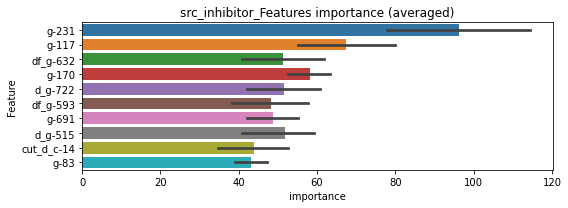

len(train_index) : 3871
len(valid_index) : 3871
================================= fold 1/2 src_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205104	valid_1's binary_logloss: 0.0540518
[200]	training's binary_logloss: 0.00361485	valid_1's binary_logloss: 0.0342981
[300]	training's binary_logloss: 0.0011191	valid_1's binary_logloss: 0.0301788
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00060333	valid_1's binary_logloss: 0.0291995


len(train_index) : 3871
len(valid_index) : 3871
================================= fold 2/2 src_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213559	valid_1's binary_logloss: 0.0438183
[200]	training's binary_logloss: 0.00391274	valid_1's binary_logloss: 0.0204208
[300]	training's binary_logloss: 0.00124562	valid_1's binary_logloss: 0.0143537
[400]	training's binary_logloss: 0.000618988	valid_1's binary_logloss: 0.0127916
[500]	training's binary_logloss: 0.000406931	valid_1's binary_logloss: 0.0118919
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000352879	valid_1's binary_logloss: 0.0116357


src_inhibitor logloss: 0.0204176050319291


neg labels: 3289 → selected neg labels: 3276


steroid, len(trt): 79, len(othr): 3276, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0486096	valid_1's binary_logloss: 0.100502
[200]	training's binary_logloss: 0.0106686	valid_1's binary_logloss: 0.0565756
[300]	training's binary_logloss: 0.00340286	valid_1's binary_logloss: 0.0467874
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00175706	valid_1's binary_logloss: 0.0434847
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0526593	valid_1's binary_logloss: 0.092245
[200]	training's binary_logloss: 0.0117117	valid_1's binary_logloss: 0.0490662
[300]	training's binary_logloss: 0.00364798	valid_1's binary_logloss: 0.0374721
[400]	training's binary_logloss: 0.00167052	valid_1's binary_logloss: 0.0332718
[500]	training's binary_logloss: 0.00101751	valid_1's binary_logloss: 0.0313384
[600]	training's binary_logloss: 0.000740188	valid_1's binary_logloss: 0.0301694
Early stopping, best iteration is:
[606]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0092737, Threshold: 0.0134203, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0200904 Vs.target_rate: 0.00332
Num_p_label: 80.0, conf_0:0.01208, conf_1:0.01476
Num_p_label: 80.0, Expected: 13.2, Adj_threshold_1: 0.0134203
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_2: 0.0234203
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_3: 0.0334203
threshold: 0.0334203, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0477844	valid_1's binary_logloss: 0.104937
[200]	training's binary_logloss: 0.00991107	valid_1's binary_logloss: 0.0614756
[300]	training's binary_logloss: 0.00311859	valid_1's binary_logloss: 0.0483128
[400]	training's binary_logloss: 0.00147922	valid_1's binary_logloss: 0.0441405
[500]	training's binary_logloss: 0.000921675	valid_1's binary_logloss: 0.0426361
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000748519	valid_1's binary_logloss: 0.0420608
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0500901	valid_1's binary_logloss: 0.0954577
[200]	training's binary_logloss: 0.0105554	valid_1's binary_logloss: 0.0505692
[300]	training's binary_logloss: 0.00333293	valid_1's binary_logloss: 0.0392451
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0018399	valid_1's binary_logloss: 0.0367046


2 / 3 AUC score:0.999
y_Threshold: 0.0279578, Threshold: 0.0334203, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0113009 Vs.target_rate: 0.00332
Num_p_label: 45.0, conf_0:0.03008, conf_1:0.03676
Num_p_label: 45.0, Expected: 13.2, Adj_threshold_1: 0.0334203
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.0434203
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_3: 0.0534203
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_4: 0.0634203
threshold: 0.0634203, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.045166	valid_1's binary_logloss: 0.0906122
[200]	training's binary_logloss: 0.00940278	valid_1's binary_logloss: 0.0489235
[300]	training's binary_logloss: 0.00291895	valid_1's binary_logloss: 0.0387909
[400]	training's binary_logloss: 0.00138707	valid_1's binary_logloss: 0.0355906
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000989822	valid_1's binary_logloss: 0.0343294
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0477167	valid_1's binary_logloss: 0.0945125
[200]	training's binary_logloss: 0.0101905	valid_1's binary_logloss: 0.047987
[300]	training's binary_logloss: 0.00321075	valid_1's binary_logloss: 0.0357648
[400]	training's binary_logloss: 0.00150782	valid_1's binary_logloss: 0.0312779
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00108214	valid_1's binary_logloss: 0.0297388


3 / 3 AUC score:1.000
y_Threshold: 0.0230746, Threshold: 0.0634203, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 639.0/3767
p_label_rate: 0.0057760 Vs.target_rate: 0.00332
Num_p_label: 23.0, conf_0:0.05708, conf_1:0.06976
threshold: 0.0634203, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 662.0/7749, y_label_rate: 0.0854304


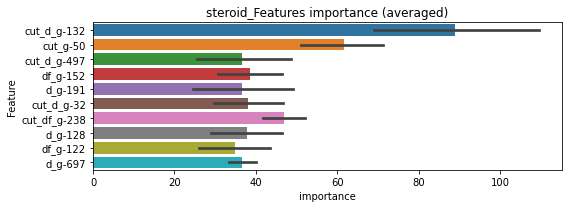

len(train_index) : 3874
len(valid_index) : 3875
================================= fold 1/2 steroid=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0258076	valid_1's binary_logloss: 0.0575845
[200]	training's binary_logloss: 0.00541746	valid_1's binary_logloss: 0.0342511
[300]	training's binary_logloss: 0.00169061	valid_1's binary_logloss: 0.0286571
[400]	training's binary_logloss: 0.000789544	valid_1's binary_logloss: 0.0268223
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000760041	valid_1's binary_logloss: 0.0267161


len(train_index) : 3875
len(valid_index) : 3874
================================= fold 2/2 steroid=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263019	valid_1's binary_logloss: 0.0551961
[200]	training's binary_logloss: 0.00565475	valid_1's binary_logloss: 0.0338235
[300]	training's binary_logloss: 0.0017639	valid_1's binary_logloss: 0.0286085
[400]	training's binary_logloss: 0.000818504	valid_1's binary_logloss: 0.0271032
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000688433	valid_1's binary_logloss: 0.0267315


steroid logloss: 0.02672378602245113


neg labels: 3289 → selected neg labels: 3286


syk_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214417	valid_1's binary_logloss: 0.0312892
[200]	training's binary_logloss: 0.00250351	valid_1's binary_logloss: 0.00789503
[300]	training's binary_logloss: 0.000732642	valid_1's binary_logloss: 0.0045138
[400]	training's binary_logloss: 0.000406421	valid_1's binary_logloss: 0.00376589
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000345137	valid_1's binary_logloss: 0.00363146
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0215383	valid_1's binary_logloss: 0.0254234
[200]	training's binary_logloss: 0.00252212	valid_1's binary_logloss: 0.00456371
[300]	training's binary_logloss: 0.000741818	valid_1's binary_logloss: 0.00217832
[400]	training's binary_logloss: 0.000409716	valid_1's binary_logloss: 0.00158652
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000340952	valid_1's binary_logloss: 0.001420

1 / 3 AUC score:1.000
y_Threshold: 0.0019640, Threshold: 0.0045119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00406, conf_1:0.00496
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0045119
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_2: 0.0145119
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.0245119
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_4: 0.0345119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.0445119
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.0545119
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_7: 0.0645119
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_8: 0.0745119
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_9: 0.0845119
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_10: 0.0945119
threshold: 0.1045119, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
===============

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212478	valid_1's binary_logloss: 0.0297121
[200]	training's binary_logloss: 0.00238381	valid_1's binary_logloss: 0.00634492
[300]	training's binary_logloss: 0.000689394	valid_1's binary_logloss: 0.00342583
[400]	training's binary_logloss: 0.000383609	valid_1's binary_logloss: 0.00280646
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000333237	valid_1's binary_logloss: 0.00267869
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212825	valid_1's binary_logloss: 0.0238438
[200]	training's binary_logloss: 0.00242406	valid_1's binary_logloss: 0.00329485
[300]	training's binary_logloss: 0.000703546	valid_1's binary_logloss: 0.0011498
[400]	training's binary_logloss: 0.000390054	valid_1's binary_logloss: 0.000707549
[500]	training's binary_logloss: 0.000325755	valid_1's binary_logloss: 0.000617066
Early stopping, best iteration

2 / 3 AUC score:1.000
y_Threshold: 0.0350031, Threshold: 0.1045119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0050226 Vs.target_rate: 0.00080
Num_p_label: 20.0, conf_0:0.09406, conf_1:0.11496
Num_p_label: 20.0, Expected: 3.2, Adj_threshold_1: 0.1045119
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_2: 0.1145119
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_3: 0.1245119
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_4: 0.1345119
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_5: 0.1445119
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_6: 0.1545119
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_7: 0.1645119
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_8: 0.1745119
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_9: 0.1845119
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_10: 0.1945119
threshold: 0.2045119, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212478	valid_1's binary_logloss: 0.0297121
[200]	training's binary_logloss: 0.00238381	valid_1's binary_logloss: 0.00634492
[300]	training's binary_logloss: 0.000689394	valid_1's binary_logloss: 0.00342583
[400]	training's binary_logloss: 0.000383609	valid_1's binary_logloss: 0.00280646
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000333237	valid_1's binary_logloss: 0.00267869
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212825	valid_1's binary_logloss: 0.0238438
[200]	training's binary_logloss: 0.00242406	valid_1's binary_logloss: 0.00329485
[300]	training's binary_logloss: 0.000703546	valid_1's binary_logloss: 0.0011498
[400]	training's binary_logloss: 0.000390054	valid_1's binary_logloss: 0.000707549
[500]	training's binary_logloss: 0.000325755	valid_1's binary_logloss: 0.000617066
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.0350031, Threshold: 0.2045119, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00080
Num_p_label: 11.0, conf_0:0.18406, conf_1:0.22496
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_1: 0.2045119
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.2145119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.2245119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.2345119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2445119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2545119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2645119
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_8: 0.2745119
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_9: 0.2845119
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_10: 0.2945119
threshold: 0.3045119, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 666.0/7793, y_label_rate: 0.0854613


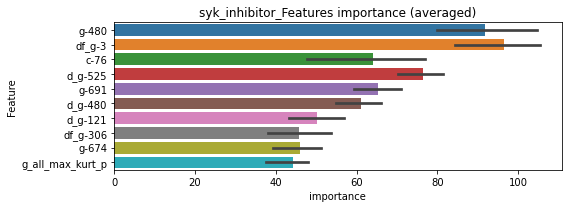

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 syk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111485	valid_1's binary_logloss: 0.016649
[200]	training's binary_logloss: 0.00124358	valid_1's binary_logloss: 0.00459703
[300]	training's binary_logloss: 0.000362675	valid_1's binary_logloss: 0.00342383
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000224184	valid_1's binary_logloss: 0.00327478


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 syk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110288	valid_1's binary_logloss: 0.016299
[200]	training's binary_logloss: 0.0012519	valid_1's binary_logloss: 0.00406294
[300]	training's binary_logloss: 0.000369675	valid_1's binary_logloss: 0.00220903
[400]	training's binary_logloss: 0.000207463	valid_1's binary_logloss: 0.00193589
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000182965	valid_1's binary_logloss: 0.00185936


syk_inhibitor logloss: 0.0025671636740135875


neg labels: 3289 → selected neg labels: 3279


tachykinin_antagonist, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0459751	valid_1's binary_logloss: 0.0953521
[200]	training's binary_logloss: 0.00899636	valid_1's binary_logloss: 0.0558724
[300]	training's binary_logloss: 0.00272901	valid_1's binary_logloss: 0.0488155
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00142559	valid_1's binary_logloss: 0.0468574
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0483131	valid_1's binary_logloss: 0.083614
[200]	training's binary_logloss: 0.00985457	valid_1's binary_logloss: 0.0390704
[300]	training's binary_logloss: 0.00292056	valid_1's binary_logloss: 0.0272925
[400]	training's binary_logloss: 0.00135882	valid_1's binary_logloss: 0.0234612
[500]	training's binary_logloss: 0.000845141	valid_1's binary_logloss: 0.0215079
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000647453	valid_1's binary_logloss: 0.0208783


1 / 3 AUC score:0.998
y_Threshold: 0.0059890, Threshold: 0.0076644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00690, conf_1:0.00843
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0076644
Num_p_label: 9.0, Expected: 10.0, Adj_threshold_2: 0.0176644
threshold: 0.0176644, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0457371	valid_1's binary_logloss: 0.0829361
[200]	training's binary_logloss: 0.00870806	valid_1's binary_logloss: 0.0372815
[300]	training's binary_logloss: 0.00266761	valid_1's binary_logloss: 0.0266925
[400]	training's binary_logloss: 0.00126253	valid_1's binary_logloss: 0.0228742
[500]	training's binary_logloss: 0.000791148	valid_1's binary_logloss: 0.0213433
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000784441	valid_1's binary_logloss: 0.0213271
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0478082	valid_1's binary_logloss: 0.0894471
[200]	training's binary_logloss: 0.00912654	valid_1's binary_logloss: 0.0414727
[300]	training's binary_logloss: 0.00276859	valid_1's binary_logloss: 0.0308492
[400]	training's binary_logloss: 0.001301	valid_1's binary_logloss: 0.0271313
[500]	training's binary_logloss: 0.000818737	

2 / 3 AUC score:1.000
y_Threshold: 0.0242730, Threshold: 0.0176644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0077850 Vs.target_rate: 0.00252
Num_p_label: 31.0, conf_0:0.01590, conf_1:0.01943
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0176644
Num_p_label: 9.0, Expected: 10.0, Adj_threshold_2: 0.0276644
threshold: 0.0276644, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474624	valid_1's binary_logloss: 0.0798255
[200]	training's binary_logloss: 0.00909472	valid_1's binary_logloss: 0.030231
[300]	training's binary_logloss: 0.00274211	valid_1's binary_logloss: 0.0187711
[400]	training's binary_logloss: 0.00128144	valid_1's binary_logloss: 0.0149531
[500]	training's binary_logloss: 0.000803577	valid_1's binary_logloss: 0.0131036
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000652338	valid_1's binary_logloss: 0.0124341
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0490076	valid_1's binary_logloss: 0.0851682
[200]	training's binary_logloss: 0.00949552	valid_1's binary_logloss: 0.0373918
[300]	training's binary_logloss: 0.0028529	valid_1's binary_logloss: 0.0251707
[400]	training's binary_logloss: 0.00132536	valid_1's binary_logloss: 0.0209644
[500]	training's binary_logloss: 0.00082015	v

3 / 3 AUC score:1.000
y_Threshold: 0.0320177, Threshold: 0.0276644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0025113 Vs.target_rate: 0.00252
Num_p_label: 10.0, conf_0:0.02490, conf_1:0.03043
threshold: 0.0276644, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/7768, y_label_rate: 0.0845778


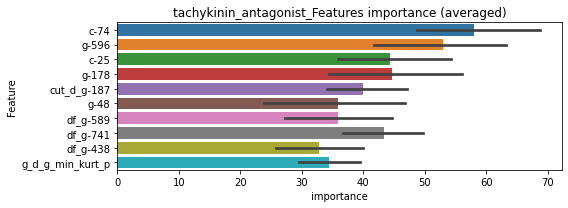

len(train_index) : 3884
len(valid_index) : 3884
================================= fold 1/2 tachykinin_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250393	valid_1's binary_logloss: 0.0492728
[200]	training's binary_logloss: 0.00471456	valid_1's binary_logloss: 0.0253235
[300]	training's binary_logloss: 0.00139961	valid_1's binary_logloss: 0.0205169
[400]	training's binary_logloss: 0.000643382	valid_1's binary_logloss: 0.018954
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000465273	valid_1's binary_logloss: 0.0183559


len(train_index) : 3884
len(valid_index) : 3884
================================= fold 2/2 tachykinin_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0264558	valid_1's binary_logloss: 0.0436932
[200]	training's binary_logloss: 0.00533789	valid_1's binary_logloss: 0.0171401
[300]	training's binary_logloss: 0.00158614	valid_1's binary_logloss: 0.0108112
[400]	training's binary_logloss: 0.000722423	valid_1's binary_logloss: 0.00920365
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000571496	valid_1's binary_logloss: 0.00878578


tachykinin_antagonist logloss: 0.01357081839497047


neg labels: 3289 → selected neg labels: 3284


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191588	valid_1's binary_logloss: 0.0243707
[200]	training's binary_logloss: 0.00195347	valid_1's binary_logloss: 0.00648857
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.000743248	valid_1's binary_logloss: 0.00526171
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190937	valid_1's binary_logloss: 0.0240453
[200]	training's binary_logloss: 0.00196986	valid_1's binary_logloss: 0.00596415
[300]	training's binary_logloss: 0.00053457	valid_1's binary_logloss: 0.00406342
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000396562	valid_1's binary_logloss: 0.0039077


1 / 3 AUC score:1.000
y_Threshold: 0.0015029, Threshold: 0.0020671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00186, conf_1:0.00227
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0020671
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_2: 0.0120671
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.0220671
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.0320671
threshold: 0.0320671, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174505	valid_1's binary_logloss: 0.0218625
[200]	training's binary_logloss: 0.00153553	valid_1's binary_logloss: 0.00392268
[300]	training's binary_logloss: 0.000388322	valid_1's binary_logloss: 0.00179688
[400]	training's binary_logloss: 0.000235561	valid_1's binary_logloss: 0.00136908
[500]	training's binary_logloss: 0.000209769	valid_1's binary_logloss: 0.00128385
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000206706	valid_1's binary_logloss: 0.00127174
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175004	valid_1's binary_logloss: 0.0189777
[200]	training's binary_logloss: 0.00154358	valid_1's binary_logloss: 0.00207803
[300]	training's binary_logloss: 0.000389266	valid_1's binary_logloss: 0.00064748
[400]	training's binary_logloss: 0.000234937	valid_1's binary_logloss: 0.000430824
[500]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0918576, Threshold: 0.0320671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0118031 Vs.target_rate: 0.00126
Num_p_label: 47.0, conf_0:0.02886, conf_1:0.03527
Num_p_label: 47.0, Expected: 5.0, Adj_threshold_1: 0.0320671
Num_p_label: 41.0, Expected: 5.0, Adj_threshold_2: 0.0420671
Num_p_label: 38.0, Expected: 5.0, Adj_threshold_3: 0.0520671
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_4: 0.0620671
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_5: 0.0720671
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_6: 0.0820671
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_7: 0.0920671
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_8: 0.1020671
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_9: 0.1120671
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_10: 0.1220671
threshold: 0.1320671, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174505	valid_1's binary_logloss: 0.0218625
[200]	training's binary_logloss: 0.00153553	valid_1's binary_logloss: 0.00392268
[300]	training's binary_logloss: 0.000388322	valid_1's binary_logloss: 0.00179688
[400]	training's binary_logloss: 0.000235561	valid_1's binary_logloss: 0.00136908
[500]	training's binary_logloss: 0.000209769	valid_1's binary_logloss: 0.00128385
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000206706	valid_1's binary_logloss: 0.00127174
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175004	valid_1's binary_logloss: 0.0189777
[200]	training's binary_logloss: 0.00154358	valid_1's binary_logloss: 0.00207803
[300]	training's binary_logloss: 0.000389266	valid_1's binary_logloss: 0.00064748
[400]	training's binary_logloss: 0.000234937	valid_1's binary_logloss: 0.000430824
[500]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0918576, Threshold: 0.1320671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, conf_0:0.11886, conf_1:0.14527
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.1320671
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_2: 0.1420671
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_3: 0.1520671
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1620671
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_5: 0.1720671
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_6: 0.1820671
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_7: 0.1920671
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_8: 0.2020671
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_9: 0.2120671
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_10: 0.2220671
threshold: 0.2320671, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 668.0/7790, y_label_rate: 0.0857510


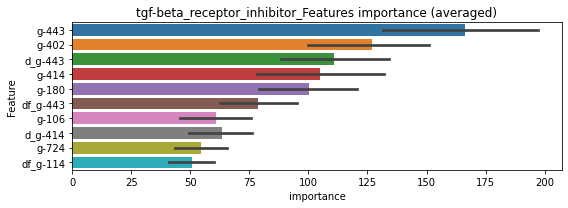

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00962848	valid_1's binary_logloss: 0.0136839
[200]	training's binary_logloss: 0.000857705	valid_1's binary_logloss: 0.00384785
[300]	training's binary_logloss: 0.000218123	valid_1's binary_logloss: 0.00269939
[400]	training's binary_logloss: 0.000128714	valid_1's binary_logloss: 0.00249145
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000116381	valid_1's binary_logloss: 0.00246268


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00975484	valid_1's binary_logloss: 0.011678
[200]	training's binary_logloss: 0.00088308	valid_1's binary_logloss: 0.00249523
[300]	training's binary_logloss: 0.00022542	valid_1's binary_logloss: 0.00165795
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.000218667	valid_1's binary_logloss: 0.00165221


tgf-beta_receptor_inhibitor logloss: 0.00205840078240481


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0229389	valid_1's binary_logloss: 0.0360659
[200]	training's binary_logloss: 0.00279645	valid_1's binary_logloss: 0.0124518
[300]	training's binary_logloss: 0.000830867	valid_1's binary_logloss: 0.00841576
[400]	training's binary_logloss: 0.000442035	valid_1's binary_logloss: 0.00691509
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000360917	valid_1's binary_logloss: 0.00662751
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234646	valid_1's binary_logloss: 0.028448
[200]	training's binary_logloss: 0.00293212	valid_1's binary_logloss: 0.0049574
[300]	training's binary_logloss: 0.000859842	valid_1's binary_logloss: 0.00208857
[400]	training's binary_logloss: 0.0004512	valid_1's binary_logloss: 0.00145064
[500]	training's binary_logloss: 0.000357094	valid_1's binary_logloss: 0.00126901
Early stopping, best iteration is:
[

1 / 3 AUC score:1.000
y_Threshold: 0.0014804, Threshold: 0.0019564, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00176, conf_1:0.00215
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0019564
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0119564
threshold: 0.0119564, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227453	valid_1's binary_logloss: 0.0351849
[200]	training's binary_logloss: 0.00272622	valid_1's binary_logloss: 0.0118016
[300]	training's binary_logloss: 0.000809056	valid_1's binary_logloss: 0.00759692
[400]	training's binary_logloss: 0.000433544	valid_1's binary_logloss: 0.00638146
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00035921	valid_1's binary_logloss: 0.00609394
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235527	valid_1's binary_logloss: 0.0274605
[200]	training's binary_logloss: 0.0028589	valid_1's binary_logloss: 0.00442361
[300]	training's binary_logloss: 0.000852023	valid_1's binary_logloss: 0.00184749
[400]	training's binary_logloss: 0.000446303	valid_1's binary_logloss: 0.0012436
[500]	training's binary_logloss: 0.000357365	valid_1's binary_logloss: 0.00109863
Early stopping, best iteration is:


2 / 3 AUC score:1.000
y_Threshold: 0.0146567, Threshold: 0.0119564, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, conf_0:0.01076, conf_1:0.01315
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_1: 0.0119564
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_2: 0.0219564
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.0319564
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_4: 0.0419564
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_5: 0.0519564
threshold: 0.0519564, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227453	valid_1's binary_logloss: 0.0351849
[200]	training's binary_logloss: 0.00272622	valid_1's binary_logloss: 0.0118016
[300]	training's binary_logloss: 0.000809056	valid_1's binary_logloss: 0.00759692
[400]	training's binary_logloss: 0.000433544	valid_1's binary_logloss: 0.00638146
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00035921	valid_1's binary_logloss: 0.00609394
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235527	valid_1's binary_logloss: 0.0274605
[200]	training's binary_logloss: 0.0028589	valid_1's binary_logloss: 0.00442361
[300]	training's binary_logloss: 0.000852023	valid_1's binary_logloss: 0.00184749
[400]	training's binary_logloss: 0.000446303	valid_1's binary_logloss: 0.0012436
[500]	training's binary_logloss: 0.000357365	valid_1's binary_logloss: 0.00109863
Early stopping, best iteration is:


3 / 3 AUC score:1.000
y_Threshold: 0.0146567, Threshold: 0.0519564, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, conf_0:0.04676, conf_1:0.05715
threshold: 0.0519564, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


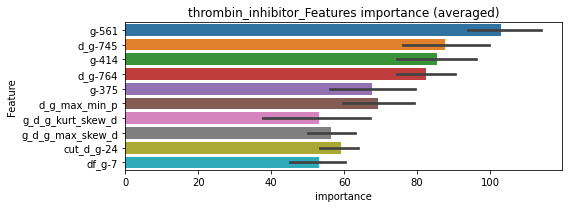

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 thrombin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120238	valid_1's binary_logloss: 0.0196786
[200]	training's binary_logloss: 0.00143497	valid_1's binary_logloss: 0.0084224
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.000580994	valid_1's binary_logloss: 0.00778486


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 thrombin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126774	valid_1's binary_logloss: 0.0197445
[200]	training's binary_logloss: 0.0015941	valid_1's binary_logloss: 0.00614034
[300]	training's binary_logloss: 0.000459549	valid_1's binary_logloss: 0.00416381
[400]	training's binary_logloss: 0.000237521	valid_1's binary_logloss: 0.00361558
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000195005	valid_1's binary_logloss: 0.00349704


thrombin_inhibitor logloss: 0.005641226400321316


neg labels: 3289 → selected neg labels: 3285


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0343098	valid_1's binary_logloss: 0.0570256
[200]	training's binary_logloss: 0.00522207	valid_1's binary_logloss: 0.0210828
[300]	training's binary_logloss: 0.00148506	valid_1's binary_logloss: 0.0143464
[400]	training's binary_logloss: 0.00073742	valid_1's binary_logloss: 0.0123656
[500]	training's binary_logloss: 0.000496962	valid_1's binary_logloss: 0.0118558
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000484521	valid_1's binary_logloss: 0.0118157
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.035508	valid_1's binary_logloss: 0.0507975
[200]	training's binary_logloss: 0.00556865	valid_1's binary_logloss: 0.0121003
[300]	training's binary_logloss: 0.00162126	valid_1's binary_logloss: 0.00508064
[400]	training's binary_logloss: 0.000790947	valid_1's binary_logloss: 0.00318188
[500]	training's binary_logloss: 0.000527

1 / 3 AUC score:1.000
y_Threshold: 0.0028515, Threshold: 0.0039287, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00354, conf_1:0.00432
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0039287
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_2: 0.0139287
threshold: 0.0139287, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0338665	valid_1's binary_logloss: 0.0567996
[200]	training's binary_logloss: 0.00511672	valid_1's binary_logloss: 0.0212267
[300]	training's binary_logloss: 0.00146581	valid_1's binary_logloss: 0.0148186
[400]	training's binary_logloss: 0.000716665	valid_1's binary_logloss: 0.0128717
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000574983	valid_1's binary_logloss: 0.01246
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347654	valid_1's binary_logloss: 0.0495373
[200]	training's binary_logloss: 0.00540607	valid_1's binary_logloss: 0.0114059
[300]	training's binary_logloss: 0.00155428	valid_1's binary_logloss: 0.00456687
[400]	training's binary_logloss: 0.000766328	valid_1's binary_logloss: 0.00271796
[500]	training's binary_logloss: 0.000516461	valid_1's binary_logloss: 0.00207046
Early stopping, best iteration is:
[541]

2 / 3 AUC score:1.000
y_Threshold: 0.0164257, Threshold: 0.0139287, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0067805 Vs.target_rate: 0.00155
Num_p_label: 27.0, conf_0:0.01254, conf_1:0.01532
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0139287
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0239287
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_3: 0.0339287
threshold: 0.0339287, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032847	valid_1's binary_logloss: 0.0514471
[200]	training's binary_logloss: 0.00497191	valid_1's binary_logloss: 0.0163417
[300]	training's binary_logloss: 0.00143843	valid_1's binary_logloss: 0.00954737
[400]	training's binary_logloss: 0.000718498	valid_1's binary_logloss: 0.00755959
[500]	training's binary_logloss: 0.000487208	valid_1's binary_logloss: 0.00668187
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000450631	valid_1's binary_logloss: 0.00656711
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0344805	valid_1's binary_logloss: 0.0543977
[200]	training's binary_logloss: 0.00517895	valid_1's binary_logloss: 0.0200916
[300]	training's binary_logloss: 0.00150428	valid_1's binary_logloss: 0.0151562
[400]	training's binary_logloss: 0.000737195	valid_1's binary_logloss: 0.0141975
Early stopping, best iteration is:
[39

3 / 3 AUC score:0.999
y_Threshold: 0.0133709, Threshold: 0.0339287, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.03054, conf_1:0.03732
threshold: 0.0339287, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 666.0/7786, y_label_rate: 0.0855381


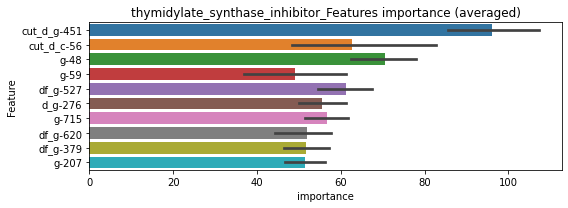

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.018099	valid_1's binary_logloss: 0.0333588
[200]	training's binary_logloss: 0.00269485	valid_1's binary_logloss: 0.0143334
[300]	training's binary_logloss: 0.000773177	valid_1's binary_logloss: 0.011057
[400]	training's binary_logloss: 0.000375954	valid_1's binary_logloss: 0.010256
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000294163	valid_1's binary_logloss: 0.010082


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183973	valid_1's binary_logloss: 0.032414
[200]	training's binary_logloss: 0.0027464	valid_1's binary_logloss: 0.0125388
[300]	training's binary_logloss: 0.000796306	valid_1's binary_logloss: 0.00888273
[400]	training's binary_logloss: 0.000388031	valid_1's binary_logloss: 0.00781452
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000307488	valid_1's binary_logloss: 0.00756128


thymidylate_synthase_inhibitor logloss: 0.008821647509537569


neg labels: 3289 → selected neg labels: 3284


tlr_agonist, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0319776	valid_1's binary_logloss: 0.0519335
[200]	training's binary_logloss: 0.00487058	valid_1's binary_logloss: 0.0164491
[300]	training's binary_logloss: 0.00140225	valid_1's binary_logloss: 0.00920269
[400]	training's binary_logloss: 0.000698669	valid_1's binary_logloss: 0.00728543
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000562576	valid_1's binary_logloss: 0.00675193
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0318871	valid_1's binary_logloss: 0.0521596
[200]	training's binary_logloss: 0.00486703	valid_1's binary_logloss: 0.0140015
[300]	training's binary_logloss: 0.00141844	valid_1's binary_logloss: 0.00703673
[400]	training's binary_logloss: 0.000701748	valid_1's binary_logloss: 0.00501221
[500]	training's binary_logloss: 0.000483457	valid_1's binary_logloss: 0.00438935
Early stopping, best iteration is:


1 / 3 AUC score:1.000
y_Threshold: 0.0025456, Threshold: 0.0033633, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00303, conf_1:0.00370
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0033633
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0133633
threshold: 0.0133633, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323455	valid_1's binary_logloss: 0.0514544
[200]	training's binary_logloss: 0.00472416	valid_1's binary_logloss: 0.0156425
[300]	training's binary_logloss: 0.00135925	valid_1's binary_logloss: 0.00887839
[400]	training's binary_logloss: 0.000684517	valid_1's binary_logloss: 0.00704571
[500]	training's binary_logloss: 0.000468432	valid_1's binary_logloss: 0.00618157
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000458535	valid_1's binary_logloss: 0.00614062
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324979	valid_1's binary_logloss: 0.0497471
[200]	training's binary_logloss: 0.00489269	valid_1's binary_logloss: 0.0127796
[300]	training's binary_logloss: 0.00141581	valid_1's binary_logloss: 0.00590976
[400]	training's binary_logloss: 0.000707418	valid_1's binary_logloss: 0.00413837
[500]	training's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0257081, Threshold: 0.0133633, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00126
Num_p_label: 16.0, conf_0:0.01203, conf_1:0.01470
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0133633
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_2: 0.0233633
threshold: 0.0233633, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323455	valid_1's binary_logloss: 0.0514544
[200]	training's binary_logloss: 0.00472416	valid_1's binary_logloss: 0.0156425
[300]	training's binary_logloss: 0.00135925	valid_1's binary_logloss: 0.00887839
[400]	training's binary_logloss: 0.000684517	valid_1's binary_logloss: 0.00704571
[500]	training's binary_logloss: 0.000468432	valid_1's binary_logloss: 0.00618157
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000458535	valid_1's binary_logloss: 0.00614062
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324979	valid_1's binary_logloss: 0.0497471
[200]	training's binary_logloss: 0.00489269	valid_1's binary_logloss: 0.0127796
[300]	training's binary_logloss: 0.00141581	valid_1's binary_logloss: 0.00590976
[400]	training's binary_logloss: 0.000707418	valid_1's binary_logloss: 0.00413837
[500]	training's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0257081, Threshold: 0.0233633, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00126
Num_p_label: 7.0, conf_0:0.02103, conf_1:0.02570
threshold: 0.0233633, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 663.0/7790, y_label_rate: 0.0851091


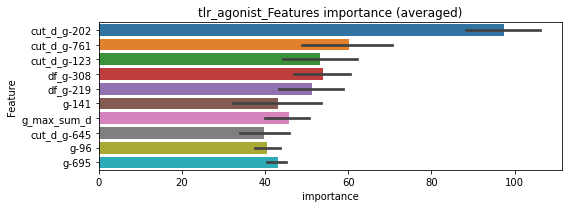

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 tlr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171519	valid_1's binary_logloss: 0.0304903
[200]	training's binary_logloss: 0.00251556	valid_1's binary_logloss: 0.0119143
[300]	training's binary_logloss: 0.000708252	valid_1's binary_logloss: 0.00936012
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000470921	valid_1's binary_logloss: 0.00896798


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 tlr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169329	valid_1's binary_logloss: 0.027639
[200]	training's binary_logloss: 0.00249694	valid_1's binary_logloss: 0.0097353
[300]	training's binary_logloss: 0.000722509	valid_1's binary_logloss: 0.00695549
[400]	training's binary_logloss: 0.000360054	valid_1's binary_logloss: 0.00624989
[500]	training's binary_logloss: 0.000245341	valid_1's binary_logloss: 0.00596258
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000247589	valid_1's binary_logloss: 0.00595842


tlr_agonist logloss: 0.007463200118195525


neg labels: 3289 → selected neg labels: 3287


tlr_antagonist, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171485	valid_1's binary_logloss: 0.018686
[200]	training's binary_logloss: 0.00154024	valid_1's binary_logloss: 0.00184168
[300]	training's binary_logloss: 0.000427423	valid_1's binary_logloss: 0.000568515
[400]	training's binary_logloss: 0.000259578	valid_1's binary_logloss: 0.000360836
[500]	training's binary_logloss: 0.000225375	valid_1's binary_logloss: 0.000316663
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000224977	valid_1's binary_logloss: 0.000316146
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174013	valid_1's binary_logloss: 0.0188324
[200]	training's binary_logloss: 0.00157457	valid_1's binary_logloss: 0.00191316
[300]	training's binary_logloss: 0.000434749	valid_1's binary_logloss: 0.000602816
[400]	training's binary_logloss: 0.000261511	valid_1's binary_logloss: 0.000375695
[500]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0007399, Threshold: 0.0012765, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00115, conf_1:0.00140
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0012765
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0112765
threshold: 0.0112765, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175341	valid_1's binary_logloss: 0.0187916
[200]	training's binary_logloss: 0.00155012	valid_1's binary_logloss: 0.00179961
[300]	training's binary_logloss: 0.000425033	valid_1's binary_logloss: 0.00053221
[400]	training's binary_logloss: 0.000259749	valid_1's binary_logloss: 0.000337511
[500]	training's binary_logloss: 0.000224887	valid_1's binary_logloss: 0.000295201
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000221799	valid_1's binary_logloss: 0.00029164
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175011	valid_1's binary_logloss: 0.0187179
[200]	training's binary_logloss: 0.00153822	valid_1's binary_logloss: 0.00182033
[300]	training's binary_logloss: 0.000418411	valid_1's binary_logloss: 0.000544433
[400]	training's binary_logloss: 0.000256157	valid_1's binary_logloss: 0.000344254
[500]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1705050, Threshold: 0.0112765, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00029
Num_p_label: 15.0, conf_0:0.01015, conf_1:0.01240
Num_p_label: 15.0, Expected: 1.2, Adj_threshold_1: 0.0112765
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0212765
threshold: 0.0212765, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175341	valid_1's binary_logloss: 0.0187916
[200]	training's binary_logloss: 0.00155012	valid_1's binary_logloss: 0.00179961
[300]	training's binary_logloss: 0.000425033	valid_1's binary_logloss: 0.00053221
[400]	training's binary_logloss: 0.000259749	valid_1's binary_logloss: 0.000337511
[500]	training's binary_logloss: 0.000224887	valid_1's binary_logloss: 0.000295201
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000221799	valid_1's binary_logloss: 0.00029164
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175011	valid_1's binary_logloss: 0.0187179
[200]	training's binary_logloss: 0.00153822	valid_1's binary_logloss: 0.00182033
[300]	training's binary_logloss: 0.000418411	valid_1's binary_logloss: 0.000544433
[400]	training's binary_logloss: 0.000256157	valid_1's binary_logloss: 0.000344254
[500]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1705050, Threshold: 0.0212765, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.01915, conf_1:0.02340
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0212765
Num_p_label: 15.0, Expected: 1.2, Adj_threshold_2: 0.0112765
threshold: 0.0112765, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 672.0/7794, y_label_rate: 0.0862202


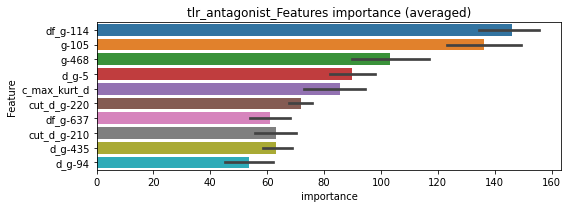

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 tlr_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00992064	valid_1's binary_logloss: 0.0202936
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00130534	valid_1's binary_logloss: 0.0147171


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 tlr_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105996	valid_1's binary_logloss: 0.0149579
[200]	training's binary_logloss: 0.00112999	valid_1's binary_logloss: 0.00770941
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.000997569	valid_1's binary_logloss: 0.00770321


tlr_antagonist logloss: 0.01121014057779853


neg labels: 3289 → selected neg labels: 3283


tnf_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0334523	valid_1's binary_logloss: 0.0561074
[200]	training's binary_logloss: 0.00508633	valid_1's binary_logloss: 0.0224484
[300]	training's binary_logloss: 0.00154372	valid_1's binary_logloss: 0.0157119
[400]	training's binary_logloss: 0.000754504	valid_1's binary_logloss: 0.013967
[500]	training's binary_logloss: 0.000512393	valid_1's binary_logloss: 0.0129441
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000473098	valid_1's binary_logloss: 0.0128218
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350195	valid_1's binary_logloss: 0.0520854
[200]	training's binary_logloss: 0.0057339	valid_1's binary_logloss: 0.0173801
[300]	training's binary_logloss: 0.00166204	valid_1's binary_logloss: 0.011125
[400]	training's binary_logloss: 0.000813377	valid_1's binary_logloss: 0.0095219
Early stopping, best iteration is:
[442]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0034736, Threshold: 0.0053006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00477, conf_1:0.00583
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0053006
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0153006
threshold: 0.0153006, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336724	valid_1's binary_logloss: 0.0555081
[200]	training's binary_logloss: 0.00513741	valid_1's binary_logloss: 0.0212139
[300]	training's binary_logloss: 0.0015699	valid_1's binary_logloss: 0.0144153
[400]	training's binary_logloss: 0.000756518	valid_1's binary_logloss: 0.0121923
[500]	training's binary_logloss: 0.000517335	valid_1's binary_logloss: 0.0111714
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000479405	valid_1's binary_logloss: 0.0110113
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347694	valid_1's binary_logloss: 0.0507982
[200]	training's binary_logloss: 0.00558205	valid_1's binary_logloss: 0.0170268
[300]	training's binary_logloss: 0.0016354	valid_1's binary_logloss: 0.0111934
[400]	training's binary_logloss: 0.000808646	valid_1's binary_logloss: 0.00948339
Early stopping, best iteration is:
[479]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0229171, Threshold: 0.0153006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0085384 Vs.target_rate: 0.00151
Num_p_label: 34.0, conf_0:0.01377, conf_1:0.01683
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.0153006
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0253006
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_3: 0.0353006
threshold: 0.0353006, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339418	valid_1's binary_logloss: 0.0521609
[200]	training's binary_logloss: 0.00535311	valid_1's binary_logloss: 0.0162896
[300]	training's binary_logloss: 0.00156632	valid_1's binary_logloss: 0.00906247
[400]	training's binary_logloss: 0.000769278	valid_1's binary_logloss: 0.00681694
[500]	training's binary_logloss: 0.000518405	valid_1's binary_logloss: 0.00582739
[600]	training's binary_logloss: 0.000456048	valid_1's binary_logloss: 0.00564412
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000457801	valid_1's binary_logloss: 0.00564202
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0343922	valid_1's binary_logloss: 0.0514362
[200]	training's binary_logloss: 0.00535766	valid_1's binary_logloss: 0.0161184
[300]	training's binary_logloss: 0.00158472	valid_1's binary_logloss: 0.010126
[400]	training's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.0276506, Threshold: 0.0353006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, conf_0:0.03177, conf_1:0.03883
threshold: 0.0353006, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/7785, y_label_rate: 0.0843931


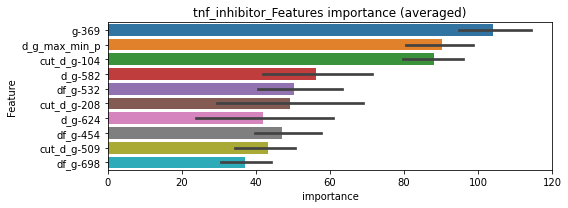

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 tnf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169942	valid_1's binary_logloss: 0.0324765
[200]	training's binary_logloss: 0.00255893	valid_1's binary_logloss: 0.0140341
[300]	training's binary_logloss: 0.000734091	valid_1's binary_logloss: 0.0100277
[400]	training's binary_logloss: 0.000367659	valid_1's binary_logloss: 0.00914655
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000260856	valid_1's binary_logloss: 0.00875757


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 tnf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179604	valid_1's binary_logloss: 0.0283613
[200]	training's binary_logloss: 0.00283057	valid_1's binary_logloss: 0.0100232
[300]	training's binary_logloss: 0.00080416	valid_1's binary_logloss: 0.00659595
[400]	training's binary_logloss: 0.000393114	valid_1's binary_logloss: 0.00576127
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000347111	valid_1's binary_logloss: 0.00564528


tnf_inhibitor logloss: 0.007201625139074681


neg labels: 3289 → selected neg labels: 3271


topoisomerase_inhibitor, len(trt): 127, len(othr): 3271, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0406207	valid_1's binary_logloss: 0.0865089
[200]	training's binary_logloss: 0.00758235	valid_1's binary_logloss: 0.0575315
[300]	training's binary_logloss: 0.00233035	valid_1's binary_logloss: 0.0517481
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00235072	valid_1's binary_logloss: 0.0516656
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0394292	valid_1's binary_logloss: 0.0877813
[200]	training's binary_logloss: 0.00732904	valid_1's binary_logloss: 0.0620483
[300]	training's binary_logloss: 0.0022223	valid_1's binary_logloss: 0.0578742
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00224127	valid_1's binary_logloss: 0.0578112


1 / 3 AUC score:0.995
y_Threshold: 0.0127083, Threshold: 0.6211397, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 153 → Positive_corect_labels: 643/3772
p_label_rate: 0.0200904 Vs.target_rate: 0.00533
Num_p_label: 80.0, conf_0:0.55903, conf_1:0.68325
Num_p_label: 80.0, Expected: 21.2, Adj_threshold_1: 0.6211397
Num_p_label: 80.0, Expected: 21.2, Adj_threshold_2: 0.6311397
Num_p_label: 78.0, Expected: 21.2, Adj_threshold_3: 0.6411397
Num_p_label: 78.0, Expected: 21.2, Adj_threshold_4: 0.6511397
Num_p_label: 78.0, Expected: 21.2, Adj_threshold_5: 0.6611397
Num_p_label: 75.0, Expected: 21.2, Adj_threshold_6: 0.6711397
Num_p_label: 73.0, Expected: 21.2, Adj_threshold_7: 0.6811397
Num_p_label: 72.0, Expected: 21.2, Adj_threshold_8: 0.6911397
Num_p_label: 72.0, Expected: 21.2, Adj_threshold_9: 0.7011397
Num_p_label: 72.0, Expected: 21.2, Adj_threshold_10: 0.7111397
threshold: 0.7211397, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 643.0/3772, y_label_rate: 0.1704666

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307535	valid_1's binary_logloss: 0.0788135
[200]	training's binary_logloss: 0.004387	valid_1's binary_logloss: 0.0549696
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00348457	valid_1's binary_logloss: 0.0543091
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327651	valid_1's binary_logloss: 0.0534486
[200]	training's binary_logloss: 0.00525268	valid_1's binary_logloss: 0.0247937
[300]	training's binary_logloss: 0.00158355	valid_1's binary_logloss: 0.0196275
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00099893	valid_1's binary_logloss: 0.0183046


2 / 3 AUC score:0.998
y_Threshold: 0.0627122, Threshold: 0.7211397, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 625.0/3736
p_label_rate: 0.0384229 Vs.target_rate: 0.00533
Num_p_label: 153.0, conf_0:0.64903, conf_1:0.79325
Num_p_label: 153.0, Expected: 21.2, Adj_threshold_1: 0.7211397
Num_p_label: 153.0, Expected: 21.2, Adj_threshold_2: 0.7311397
Num_p_label: 150.0, Expected: 21.2, Adj_threshold_3: 0.7411397
Num_p_label: 150.0, Expected: 21.2, Adj_threshold_4: 0.7511397
Num_p_label: 149.0, Expected: 21.2, Adj_threshold_5: 0.7611397
Num_p_label: 145.0, Expected: 21.2, Adj_threshold_6: 0.7711397
Num_p_label: 145.0, Expected: 21.2, Adj_threshold_7: 0.7811397
Num_p_label: 144.0, Expected: 21.2, Adj_threshold_8: 0.7911397
Num_p_label: 143.0, Expected: 21.2, Adj_threshold_9: 0.8011397
Num_p_label: 142.0, Expected: 21.2, Adj_threshold_10: 0.8111397
threshold: 0.8211397, positive_p_label: 140.0/3982, p_label_rate: 0.0351582
positive_y_label: 625.0/3736, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282165	valid_1's binary_logloss: 0.049112
[200]	training's binary_logloss: 0.00409206	valid_1's binary_logloss: 0.0227076
[300]	training's binary_logloss: 0.00121282	valid_1's binary_logloss: 0.0182828
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000685082	valid_1's binary_logloss: 0.016994
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292178	valid_1's binary_logloss: 0.0673217
[200]	training's binary_logloss: 0.00414987	valid_1's binary_logloss: 0.0416661
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00154502	valid_1's binary_logloss: 0.0385227


3 / 3 AUC score:0.998
y_Threshold: 0.0479322, Threshold: 0.8211397, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0391763 Vs.target_rate: 0.00533
Num_p_label: 156.0, conf_0:0.73903, conf_1:0.90325
Num_p_label: 156.0, Expected: 21.2, Adj_threshold_1: 0.8211397
Num_p_label: 156.0, Expected: 21.2, Adj_threshold_2: 0.8311397
Num_p_label: 155.0, Expected: 21.2, Adj_threshold_3: 0.8411397
Num_p_label: 155.0, Expected: 21.2, Adj_threshold_4: 0.8511397
Num_p_label: 151.0, Expected: 21.2, Adj_threshold_5: 0.8611397
Num_p_label: 151.0, Expected: 21.2, Adj_threshold_6: 0.8711397
Num_p_label: 149.0, Expected: 21.2, Adj_threshold_7: 0.8811397
Num_p_label: 146.0, Expected: 21.2, Adj_threshold_8: 0.8911397
Num_p_label: 144.0, Expected: 21.2, Adj_threshold_9: 0.9011397
Num_p_label: 144.0, Expected: 21.2, Adj_threshold_10: 0.9111397
threshold: 0.9211397, positive_p_label: 142.0/3982, p_label_rate: 0.0356605
positive_y_label: 755.0/7694, y_label_ra

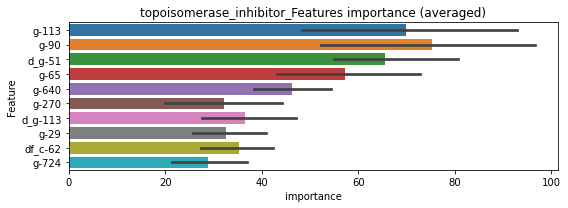

len(train_index) : 3847
len(valid_index) : 3847
================================= fold 1/2 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179818	valid_1's binary_logloss: 0.0323021
[200]	training's binary_logloss: 0.00268026	valid_1's binary_logloss: 0.0158587
[300]	training's binary_logloss: 0.000786286	valid_1's binary_logloss: 0.0128516
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000408581	valid_1's binary_logloss: 0.0119548


len(train_index) : 3847
len(valid_index) : 3847
================================= fold 2/2 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174532	valid_1's binary_logloss: 0.0351586
[200]	training's binary_logloss: 0.00248778	valid_1's binary_logloss: 0.0189463
[300]	training's binary_logloss: 0.000730701	valid_1's binary_logloss: 0.0158906
[400]	training's binary_logloss: 0.000359455	valid_1's binary_logloss: 0.0149372
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000300515	valid_1's binary_logloss: 0.0147012


topoisomerase_inhibitor logloss: 0.013328005218498916


neg labels: 3289 → selected neg labels: 3286


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238199	valid_1's binary_logloss: 0.0330091
[200]	training's binary_logloss: 0.00295514	valid_1's binary_logloss: 0.00700588
[300]	training's binary_logloss: 0.000848712	valid_1's binary_logloss: 0.00336398
[400]	training's binary_logloss: 0.000448357	valid_1's binary_logloss: 0.00239602
[500]	training's binary_logloss: 0.000356063	valid_1's binary_logloss: 0.00217729
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000352587	valid_1's binary_logloss: 0.00217453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0243591	valid_1's binary_logloss: 0.0310752
[200]	training's binary_logloss: 0.00299449	valid_1's binary_logloss: 0.00670605
[300]	training's binary_logloss: 0.000858982	valid_1's binary_logloss: 0.00378719
[400]	training's binary_logloss: 0.000453553	valid_1's binary_logloss: 0.00307574
Early stopping, best iteration 

1 / 3 AUC score:1.000
y_Threshold: 0.0013382, Threshold: 0.0018760, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00169, conf_1:0.00206
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0018760
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0118760
threshold: 0.0118760, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237425	valid_1's binary_logloss: 0.031725
[200]	training's binary_logloss: 0.00284981	valid_1's binary_logloss: 0.00649388
[300]	training's binary_logloss: 0.000834815	valid_1's binary_logloss: 0.00293998
[400]	training's binary_logloss: 0.00044723	valid_1's binary_logloss: 0.00204955
[500]	training's binary_logloss: 0.000354972	valid_1's binary_logloss: 0.00183672
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000354661	valid_1's binary_logloss: 0.00183609
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240783	valid_1's binary_logloss: 0.0293599
[200]	training's binary_logloss: 0.00293675	valid_1's binary_logloss: 0.00578668
[300]	training's binary_logloss: 0.000845761	valid_1's binary_logloss: 0.00305284
[400]	training's binary_logloss: 0.000452253	valid_1's binary_logloss: 0.0025229
Early stopping, best iteration is:

2 / 3 AUC score:1.000
y_Threshold: 0.0185140, Threshold: 0.0118760, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.01069, conf_1:0.01306
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0118760
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0218760
threshold: 0.0218760, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237425	valid_1's binary_logloss: 0.031725
[200]	training's binary_logloss: 0.00284981	valid_1's binary_logloss: 0.00649388
[300]	training's binary_logloss: 0.000834815	valid_1's binary_logloss: 0.00293998
[400]	training's binary_logloss: 0.00044723	valid_1's binary_logloss: 0.00204955
[500]	training's binary_logloss: 0.000354972	valid_1's binary_logloss: 0.00183672
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000354661	valid_1's binary_logloss: 0.00183609
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240783	valid_1's binary_logloss: 0.0293599
[200]	training's binary_logloss: 0.00293675	valid_1's binary_logloss: 0.00578668
[300]	training's binary_logloss: 0.000845761	valid_1's binary_logloss: 0.00305284
[400]	training's binary_logloss: 0.000452253	valid_1's binary_logloss: 0.0025229
Early stopping, best iteration is:

3 / 3 AUC score:1.000
y_Threshold: 0.0185140, Threshold: 0.0218760, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.01969, conf_1:0.02406
threshold: 0.0218760, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7793, y_label_rate: 0.0849480


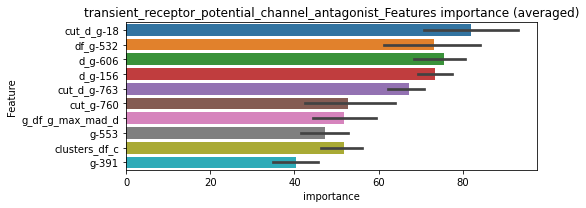

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127081	valid_1's binary_logloss: 0.0199514
[200]	training's binary_logloss: 0.00150707	valid_1's binary_logloss: 0.00743733
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.00100274	valid_1's binary_logloss: 0.00699509


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130668	valid_1's binary_logloss: 0.0171901
[200]	training's binary_logloss: 0.00159543	valid_1's binary_logloss: 0.00397164
[300]	training's binary_logloss: 0.000464641	valid_1's binary_logloss: 0.00243318
[400]	training's binary_logloss: 0.000237417	valid_1's binary_logloss: 0.00214873
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000209337	valid_1's binary_logloss: 0.00213036


transient_receptor_potential_channel_antagonist logloss: 0.004563037003992852


neg labels: 3289 → selected neg labels: 3288


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162344	valid_1's binary_logloss: 0.0175221
[200]	training's binary_logloss: 0.00140845	valid_1's binary_logloss: 0.00177065
[300]	training's binary_logloss: 0.000386006	valid_1's binary_logloss: 0.000581984
[400]	training's binary_logloss: 0.000238007	valid_1's binary_logloss: 0.000398117
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000216933	valid_1's binary_logloss: 0.000372383
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162706	valid_1's binary_logloss: 0.0174409
[200]	training's binary_logloss: 0.00142532	valid_1's binary_logloss: 0.00171388
[300]	training's binary_logloss: 0.000389522	valid_1's binary_logloss: 0.000521599
[400]	training's binary_logloss: 0.000239307	valid_1's binary_logloss: 0.000337687
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00021787	valid_1's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0005732, Threshold: 0.0012315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00111, conf_1:0.00135
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0012315
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0112315
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_3: 0.0212315
threshold: 0.0212315, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016417	valid_1's binary_logloss: 0.0177744
[200]	training's binary_logloss: 0.00138509	valid_1's binary_logloss: 0.00184496
[300]	training's binary_logloss: 0.000377946	valid_1's binary_logloss: 0.000595227
[400]	training's binary_logloss: 0.000236185	valid_1's binary_logloss: 0.000412783
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000215262	valid_1's binary_logloss: 0.000384805
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167556	valid_1's binary_logloss: 0.0178937
[200]	training's binary_logloss: 0.0014382	valid_1's binary_logloss: 0.00165934
[300]	training's binary_logloss: 0.000388204	valid_1's binary_logloss: 0.000484637
[400]	training's binary_logloss: 0.000239045	valid_1's binary_logloss: 0.000308954
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000212451	valid_1's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.1558024, Threshold: 0.0212315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, conf_0:0.01911, conf_1:0.02335
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_1: 0.0212315
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.0312315
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.0412315
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.0512315
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.0612315
threshold: 0.0612315, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016417	valid_1's binary_logloss: 0.0177744
[200]	training's binary_logloss: 0.00138509	valid_1's binary_logloss: 0.00184496
[300]	training's binary_logloss: 0.000377946	valid_1's binary_logloss: 0.000595227
[400]	training's binary_logloss: 0.000236185	valid_1's binary_logloss: 0.000412783
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000215262	valid_1's binary_logloss: 0.000384805
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167556	valid_1's binary_logloss: 0.0178937
[200]	training's binary_logloss: 0.0014382	valid_1's binary_logloss: 0.00165934
[300]	training's binary_logloss: 0.000388204	valid_1's binary_logloss: 0.000484637
[400]	training's binary_logloss: 0.000239045	valid_1's binary_logloss: 0.000308954
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000212451	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.1558024, Threshold: 0.0612315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.05511, conf_1:0.06735
threshold: 0.0612315, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7795, y_label_rate: 0.0845414


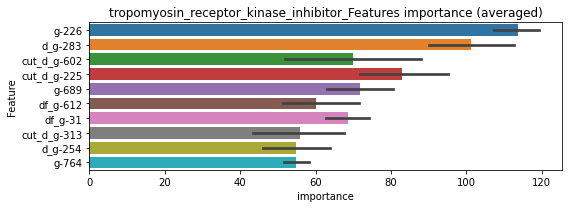

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00887159	valid_1's binary_logloss: 0.00976729
[200]	training's binary_logloss: 0.000778326	valid_1's binary_logloss: 0.00172665
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000310487	valid_1's binary_logloss: 0.00143471


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00879591	valid_1's binary_logloss: 0.0106881
[200]	training's binary_logloss: 0.000756615	valid_1's binary_logloss: 0.00253222
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000254396	valid_1's binary_logloss: 0.00202434


tropomyosin_receptor_kinase_inhibitor logloss: 0.0017294867414416036


neg labels: 3289 → selected neg labels: 3285


trpv_agonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259897	valid_1's binary_logloss: 0.0405329
[200]	training's binary_logloss: 0.00332322	valid_1's binary_logloss: 0.00985082
[300]	training's binary_logloss: 0.000959413	valid_1's binary_logloss: 0.00503936
[400]	training's binary_logloss: 0.000505205	valid_1's binary_logloss: 0.00371748
[500]	training's binary_logloss: 0.000382889	valid_1's binary_logloss: 0.00335895
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000378403	valid_1's binary_logloss: 0.00334461
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270745	valid_1's binary_logloss: 0.0369968
[200]	training's binary_logloss: 0.00344831	valid_1's binary_logloss: 0.00738094
[300]	training's binary_logloss: 0.000990399	valid_1's binary_logloss: 0.00307172
[400]	training's binary_logloss: 0.000518049	valid_1's binary_logloss: 0.00198288
[500]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0022449, Threshold: 0.0052361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00471, conf_1:0.00576
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0052361
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_2: 0.0152361
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_3: 0.0252361
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_4: 0.0352361
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_5: 0.0452361
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_6: 0.0552361
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_7: 0.0652361
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_8: 0.0752361
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_9: 0.0852361
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_10: 0.0952361
threshold: 0.1052361, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257387	valid_1's binary_logloss: 0.0373028
[200]	training's binary_logloss: 0.00321853	valid_1's binary_logloss: 0.00811912
[300]	training's binary_logloss: 0.000925013	valid_1's binary_logloss: 0.00387433
[400]	training's binary_logloss: 0.000490045	valid_1's binary_logloss: 0.00290101
[500]	training's binary_logloss: 0.000375306	valid_1's binary_logloss: 0.00257405
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000374865	valid_1's binary_logloss: 0.00257059
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262406	valid_1's binary_logloss: 0.0343777
[200]	training's binary_logloss: 0.00327791	valid_1's binary_logloss: 0.0060333
[300]	training's binary_logloss: 0.00094325	valid_1's binary_logloss: 0.00216341
[400]	training's binary_logloss: 0.000492643	valid_1's binary_logloss: 0.00126987
[500]	training's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.1149306, Threshold: 0.1052361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0072828 Vs.target_rate: 0.00105
Num_p_label: 29.0, conf_0:0.09471, conf_1:0.11576
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_1: 0.1052361
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_2: 0.1152361
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_3: 0.1252361
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_4: 0.1352361
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_5: 0.1452361
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_6: 0.1552361
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_7: 0.1652361
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_8: 0.1752361
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_9: 0.1852361
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_10: 0.1952361
threshold: 0.2052361, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257387	valid_1's binary_logloss: 0.0373028
[200]	training's binary_logloss: 0.00321853	valid_1's binary_logloss: 0.00811912
[300]	training's binary_logloss: 0.000925013	valid_1's binary_logloss: 0.00387433
[400]	training's binary_logloss: 0.000490045	valid_1's binary_logloss: 0.00290101
[500]	training's binary_logloss: 0.000375306	valid_1's binary_logloss: 0.00257405
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000374865	valid_1's binary_logloss: 0.00257059
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262406	valid_1's binary_logloss: 0.0343777
[200]	training's binary_logloss: 0.00327791	valid_1's binary_logloss: 0.0060333
[300]	training's binary_logloss: 0.00094325	valid_1's binary_logloss: 0.00216341
[400]	training's binary_logloss: 0.000492643	valid_1's binary_logloss: 0.00126987
[500]	training's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.1149306, Threshold: 0.2052361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, conf_0:0.18471, conf_1:0.22576
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_1: 0.2052361
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_2: 0.2152361
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_3: 0.2252361
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_4: 0.2352361
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_5: 0.2452361
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_6: 0.2552361
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_7: 0.2652361
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_8: 0.2752361
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_9: 0.2852361
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_10: 0.2952361
threshold: 0.3052361, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 673.0/7792, y_label_rate: 0.0863706


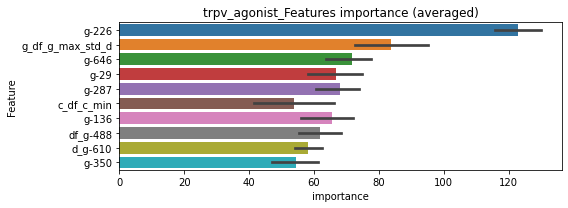

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 trpv_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135066	valid_1's binary_logloss: 0.0260555
[200]	training's binary_logloss: 0.00170496	valid_1's binary_logloss: 0.0103533
[300]	training's binary_logloss: 0.000499107	valid_1's binary_logloss: 0.00804144
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000315285	valid_1's binary_logloss: 0.00757161


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 trpv_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143667	valid_1's binary_logloss: 0.0182872
[200]	training's binary_logloss: 0.00185124	valid_1's binary_logloss: 0.00429901
[300]	training's binary_logloss: 0.000536346	valid_1's binary_logloss: 0.0024954
[400]	training's binary_logloss: 0.000276751	valid_1's binary_logloss: 0.00212088
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000210713	valid_1's binary_logloss: 0.00203237


trpv_agonist logloss: 0.004801991895360134


neg labels: 3289 → selected neg labels: 3281


trpv_antagonist, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0396757	valid_1's binary_logloss: 0.0826055
[200]	training's binary_logloss: 0.00710912	valid_1's binary_logloss: 0.0456008
[300]	training's binary_logloss: 0.00214408	valid_1's binary_logloss: 0.0376663
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0013964	valid_1's binary_logloss: 0.0364712
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0434112	valid_1's binary_logloss: 0.0651154
[200]	training's binary_logloss: 0.00837246	valid_1's binary_logloss: 0.0233417
[300]	training's binary_logloss: 0.00249846	valid_1's binary_logloss: 0.0141739
[400]	training's binary_logloss: 0.00117704	valid_1's binary_logloss: 0.011421
[500]	training's binary_logloss: 0.00074218	valid_1's binary_logloss: 0.0102685
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000611666	valid_1's binary_logloss: 0.0100468


1 / 3 AUC score:0.999
y_Threshold: 0.0044313, Threshold: 0.0064430, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00580, conf_1:0.00709
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0064430
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_2: 0.0164430
threshold: 0.0164430, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0419084	valid_1's binary_logloss: 0.0728775
[200]	training's binary_logloss: 0.00755092	valid_1's binary_logloss: 0.0295245
[300]	training's binary_logloss: 0.00224699	valid_1's binary_logloss: 0.0201904
[400]	training's binary_logloss: 0.00108065	valid_1's binary_logloss: 0.0171823
[500]	training's binary_logloss: 0.000695865	valid_1's binary_logloss: 0.0156879
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00059592	valid_1's binary_logloss: 0.015211
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.042682	valid_1's binary_logloss: 0.0706826
[200]	training's binary_logloss: 0.00772263	valid_1's binary_logloss: 0.028728
[300]	training's binary_logloss: 0.00231814	valid_1's binary_logloss: 0.0199609
[400]	training's binary_logloss: 0.00110993	valid_1's binary_logloss: 0.0175549
Early stopping, best iteration is:
[457]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0137974, Threshold: 0.0164430, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, conf_0:0.01480, conf_1:0.01809
threshold: 0.0164430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0395666	valid_1's binary_logloss: 0.075116
[200]	training's binary_logloss: 0.00682701	valid_1's binary_logloss: 0.0349271
[300]	training's binary_logloss: 0.00206999	valid_1's binary_logloss: 0.0261567
[400]	training's binary_logloss: 0.00101772	valid_1's binary_logloss: 0.0233113
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000946957	valid_1's binary_logloss: 0.0231608
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0395588	valid_1's binary_logloss: 0.0689818
[200]	training's binary_logloss: 0.00692614	valid_1's binary_logloss: 0.0294923
[300]	training's binary_logloss: 0.00210963	valid_1's binary_logloss: 0.0216161
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00119481	valid_1's binary_logloss: 0.019592


3 / 3 AUC score:1.000
y_Threshold: 0.0250932, Threshold: 0.0164430, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0055249 Vs.target_rate: 0.00202
Num_p_label: 22.0, conf_0:0.01480, conf_1:0.01809
threshold: 0.0164430, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 669.0/7769, y_label_rate: 0.0861115


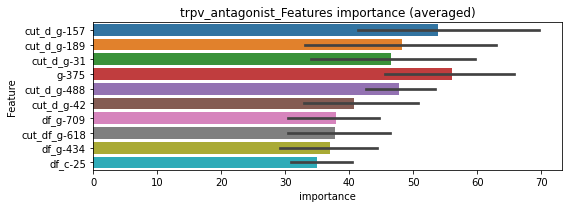

len(train_index) : 3884
len(valid_index) : 3885
================================= fold 1/2 trpv_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219494	valid_1's binary_logloss: 0.0499332
[200]	training's binary_logloss: 0.00392962	valid_1's binary_logloss: 0.0307521
[300]	training's binary_logloss: 0.00117446	valid_1's binary_logloss: 0.0281673
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000957494	valid_1's binary_logloss: 0.0278789


len(train_index) : 3885
len(valid_index) : 3884
================================= fold 2/2 trpv_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252463	valid_1's binary_logloss: 0.0437931
[200]	training's binary_logloss: 0.00460549	valid_1's binary_logloss: 0.0206973
[300]	training's binary_logloss: 0.00135897	valid_1's binary_logloss: 0.0165073
[400]	training's binary_logloss: 0.0006307	valid_1's binary_logloss: 0.0157347
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000494592	valid_1's binary_logloss: 0.0155101


trpv_antagonist logloss: 0.021695302452762556


neg labels: 3289 → selected neg labels: 3267


tubulin_inhibitor, len(trt): 316, len(othr): 3267, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0435353	valid_1's binary_logloss: 0.124831
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.013078	valid_1's binary_logloss: 0.111022
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047627	valid_1's binary_logloss: 0.101549
[200]	training's binary_logloss: 0.0101371	valid_1's binary_logloss: 0.07779
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00611324	valid_1's binary_logloss: 0.0755946


1 / 3 AUC score:0.985
y_Threshold: 0.0275284, Threshold: 0.1518918, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 183 → Positive_corect_labels: 627/3737
p_label_rate: 0.0200904 Vs.target_rate: 0.01327
Num_p_label: 80.0, conf_0:0.13670, conf_1:0.16708
threshold: 0.1518918, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 627.0/3737, y_label_rate: 0.1677816
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330858	valid_1's binary_logloss: 0.0946855
[200]	training's binary_logloss: 0.00541666	valid_1's binary_logloss: 0.0792563
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00592152	valid_1's binary_logloss: 0.0791138
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0360226	valid_1's binary_logloss: 0.0697538
[200]	training's binary_logloss: 0.00618844	valid_1's binary_logloss: 0.0462794
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.00255976	valid_1's binary_logloss: 0.043924


2 / 3 AUC score:0.993
y_Threshold: 0.0452489, Threshold: 0.1518918, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 56 → Positive_corect_labels: 599.0/3681
p_label_rate: 0.0291311 Vs.target_rate: 0.01327
Num_p_label: 116.0, conf_0:0.13670, conf_1:0.16708
threshold: 0.1518918, positive_p_label: 116.0/3982, p_label_rate: 0.0291311
positive_y_label: 599.0/3681, y_label_rate: 0.1627275
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288599	valid_1's binary_logloss: 0.0643615
[200]	training's binary_logloss: 0.00421985	valid_1's binary_logloss: 0.0428916
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00181728	valid_1's binary_logloss: 0.0414315
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294795	valid_1's binary_logloss: 0.0549084
[200]	training's binary_logloss: 0.00456902	valid_1's binary_logloss: 0.029231
[300]	training's binary_logloss: 0.00134427	valid_1's binary_logloss: 0.0242352
[400]	training's binary_logloss: 0.000651278	valid_1's binary_logloss: 0.0226556
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00047496	valid_1's binary_logloss: 0.0219285


3 / 3 AUC score:0.997
y_Threshold: 0.0293691, Threshold: 0.1518918, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 589.0/3661
p_label_rate: 0.0308890 Vs.target_rate: 0.01327
Num_p_label: 123.0, conf_0:0.13670, conf_1:0.16708
threshold: 0.1518918, positive_p_label: 123.0/3982, p_label_rate: 0.0308890
positive_y_label: 712.0/7643, y_label_rate: 0.0931571


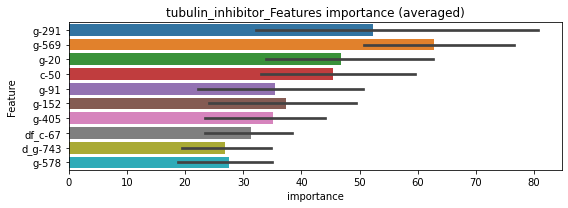

len(train_index) : 3821
len(valid_index) : 3822
================================= fold 1/2 tubulin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173253	valid_1's binary_logloss: 0.0477833
[200]	training's binary_logloss: 0.00266475	valid_1's binary_logloss: 0.0350492
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00289614	valid_1's binary_logloss: 0.0348666


len(train_index) : 3822
len(valid_index) : 3821
================================= fold 2/2 tubulin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169368	valid_1's binary_logloss: 0.0423248
[200]	training's binary_logloss: 0.00254176	valid_1's binary_logloss: 0.0313806
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00247149	valid_1's binary_logloss: 0.0312733


tubulin_inhibitor logloss: 0.033070196290485916


neg labels: 3289 → selected neg labels: 3276


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3276, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0486987	valid_1's binary_logloss: 0.0931263
[200]	training's binary_logloss: 0.0103404	valid_1's binary_logloss: 0.0479161
[300]	training's binary_logloss: 0.00330776	valid_1's binary_logloss: 0.0356284
[400]	training's binary_logloss: 0.00156611	valid_1's binary_logloss: 0.0311898
[500]	training's binary_logloss: 0.000973501	valid_1's binary_logloss: 0.0295116
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00100434	valid_1's binary_logloss: 0.0294952
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047722	valid_1's binary_logloss: 0.0859084
[200]	training's binary_logloss: 0.0103996	valid_1's binary_logloss: 0.0413174
[300]	training's binary_logloss: 0.00335426	valid_1's binary_logloss: 0.0294769
[400]	training's binary_logloss: 0.00158413	valid_1's binary_logloss: 0.0252879
[500]	training's binary_logloss: 0.000983895	va

1 / 3 AUC score:1.000
y_Threshold: 0.0063329, Threshold: 0.0112422, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3793
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01012, conf_1:0.01237
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0112422
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_2: 0.0212422
Num_p_label: 10.0, Expected: 12.2, Adj_threshold_3: 0.0312422
threshold: 0.0312422, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0489211	valid_1's binary_logloss: 0.107521
[200]	training's binary_logloss: 0.0100875	valid_1's binary_logloss: 0.0585616
[300]	training's binary_logloss: 0.0031942	valid_1's binary_logloss: 0.0458227
[400]	training's binary_logloss: 0.00151591	valid_1's binary_logloss: 0.0419025
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00147933	valid_1's binary_logloss: 0.0417889
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.04774	valid_1's binary_logloss: 0.0970748
[200]	training's binary_logloss: 0.00990503	valid_1's binary_logloss: 0.0525823
[300]	training's binary_logloss: 0.00310345	valid_1's binary_logloss: 0.0410708
[400]	training's binary_logloss: 0.00147873	valid_1's binary_logloss: 0.0370963
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00133842	valid_1's binary_logloss: 0.0365907


2 / 3 AUC score:0.999
y_Threshold: 0.0362545, Threshold: 0.0312422, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, conf_0:0.02812, conf_1:0.03437
Num_p_label: 45.0, Expected: 12.2, Adj_threshold_1: 0.0312422
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.0412422
threshold: 0.0412422, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0445891	valid_1's binary_logloss: 0.0938649
[200]	training's binary_logloss: 0.00919328	valid_1's binary_logloss: 0.0483171
[300]	training's binary_logloss: 0.00289859	valid_1's binary_logloss: 0.0357544
[400]	training's binary_logloss: 0.00139571	valid_1's binary_logloss: 0.031658
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00102542	valid_1's binary_logloss: 0.0303202
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0471965	valid_1's binary_logloss: 0.0914192
[200]	training's binary_logloss: 0.00973166	valid_1's binary_logloss: 0.0476405
[300]	training's binary_logloss: 0.00310903	valid_1's binary_logloss: 0.0368494
[400]	training's binary_logloss: 0.00148865	valid_1's binary_logloss: 0.0334254
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00109792	valid_1's binary_logloss: 0.0327364


3 / 3 AUC score:1.000
y_Threshold: 0.0321373, Threshold: 0.0412422, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 639.0/3767
p_label_rate: 0.0075339 Vs.target_rate: 0.00307
Num_p_label: 30.0, conf_0:0.03712, conf_1:0.04537
threshold: 0.0412422, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 669.0/7749, y_label_rate: 0.0863337


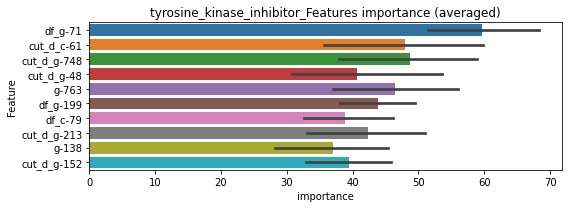

len(train_index) : 3874
len(valid_index) : 3875
================================= fold 1/2 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250918	valid_1's binary_logloss: 0.0606212
[200]	training's binary_logloss: 0.00514226	valid_1's binary_logloss: 0.0395811
[300]	training's binary_logloss: 0.00161789	valid_1's binary_logloss: 0.0360188
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.00174524	valid_1's binary_logloss: 0.0359455


len(train_index) : 3875
len(valid_index) : 3874
================================= fold 2/2 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263977	valid_1's binary_logloss: 0.0588463
[200]	training's binary_logloss: 0.00550957	valid_1's binary_logloss: 0.033503
[300]	training's binary_logloss: 0.00175621	valid_1's binary_logloss: 0.0259193
[400]	training's binary_logloss: 0.00084258	valid_1's binary_logloss: 0.0236025
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000587821	valid_1's binary_logloss: 0.0225235


tyrosine_kinase_inhibitor logloss: 0.029235358563555164


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186927	valid_1's binary_logloss: 0.021855
[200]	training's binary_logloss: 0.00191613	valid_1's binary_logloss: 0.00319135
[300]	training's binary_logloss: 0.000551725	valid_1's binary_logloss: 0.00127927
[400]	training's binary_logloss: 0.00031914	valid_1's binary_logloss: 0.000889867
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000280541	valid_1's binary_logloss: 0.000836464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183863	valid_1's binary_logloss: 0.0217202
[200]	training's binary_logloss: 0.00185018	valid_1's binary_logloss: 0.0037811
[300]	training's binary_logloss: 0.000535814	valid_1's binary_logloss: 0.00199904
[400]	training's binary_logloss: 0.0003152	valid_1's binary_logloss: 0.00157338
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000278305	valid_1's binary_logloss: 0.00149858

1 / 3 AUC score:1.000
y_Threshold: 0.0010864, Threshold: 0.0016340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00147, conf_1:0.00180
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0016340
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0116340
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.0216340
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_4: 0.0316340
threshold: 0.0316340, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185893	valid_1's binary_logloss: 0.0215376
[200]	training's binary_logloss: 0.00182799	valid_1's binary_logloss: 0.00308718
[300]	training's binary_logloss: 0.000521	valid_1's binary_logloss: 0.00128388
[400]	training's binary_logloss: 0.000305816	valid_1's binary_logloss: 0.000949664
[500]	training's binary_logloss: 0.000266913	valid_1's binary_logloss: 0.000902522
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000264166	valid_1's binary_logloss: 0.000898836
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183408	valid_1's binary_logloss: 0.0209332
[200]	training's binary_logloss: 0.0017879	valid_1's binary_logloss: 0.00283451
[300]	training's binary_logloss: 0.000511718	valid_1's binary_logloss: 0.00115633
[400]	training's binary_logloss: 0.000304131	valid_1's binary_logloss: 0.000834034
Early stopping, best iteration 

2 / 3 AUC score:1.000
y_Threshold: 0.1006610, Threshold: 0.0316340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0080362 Vs.target_rate: 0.00050
Num_p_label: 32.0, conf_0:0.02847, conf_1:0.03480
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_1: 0.0316340
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_2: 0.0416340
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.0516340
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.0616340
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_5: 0.0716340
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_6: 0.0816340
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.0916340
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_8: 0.1016340
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_9: 0.1116340
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_10: 0.1216340
threshold: 0.1316340, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185893	valid_1's binary_logloss: 0.0215376
[200]	training's binary_logloss: 0.00182799	valid_1's binary_logloss: 0.00308718
[300]	training's binary_logloss: 0.000521	valid_1's binary_logloss: 0.00128388
[400]	training's binary_logloss: 0.000305816	valid_1's binary_logloss: 0.000949664
[500]	training's binary_logloss: 0.000266913	valid_1's binary_logloss: 0.000902522
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000264166	valid_1's binary_logloss: 0.000898836
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183408	valid_1's binary_logloss: 0.0209332
[200]	training's binary_logloss: 0.0017879	valid_1's binary_logloss: 0.00283451
[300]	training's binary_logloss: 0.000511718	valid_1's binary_logloss: 0.00115633
[400]	training's binary_logloss: 0.000304131	valid_1's binary_logloss: 0.000834034
Early stopping, best iteration 

3 / 3 AUC score:1.000
y_Threshold: 0.1006610, Threshold: 0.1316340, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, conf_0:0.11847, conf_1:0.14480
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.1316340
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.1416340
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.1516340
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.1616340
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.1716340
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1816340
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.1916340
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.2016340
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.2116340
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.2216340
threshold: 0.2316340, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 662.0/7794, y_label_rate: 0.0849371


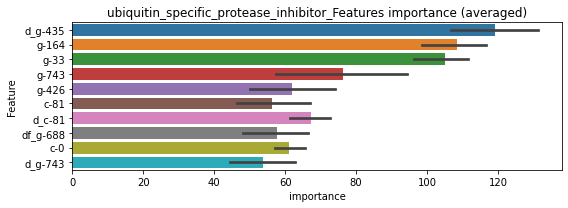

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00957501	valid_1's binary_logloss: 0.0126721
[200]	training's binary_logloss: 0.000924527	valid_1's binary_logloss: 0.00376586
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000327818	valid_1's binary_logloss: 0.00312317


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0099182	valid_1's binary_logloss: 0.015055
[200]	training's binary_logloss: 0.000996248	valid_1's binary_logloss: 0.00501757
[300]	training's binary_logloss: 0.000285999	valid_1's binary_logloss: 0.00355037
[400]	training's binary_logloss: 0.000168202	valid_1's binary_logloss: 0.00319402
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00014612	valid_1's binary_logloss: 0.00312613


ubiquitin_specific_protease_inhibitor logloss: 0.003126720921156546


neg labels: 3289 → selected neg labels: 3258


vegfr_inhibitor, len(trt): 170, len(othr): 3258, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0581143	valid_1's binary_logloss: 0.1526
[200]	training's binary_logloss: 0.0140089	valid_1's binary_logloss: 0.111769
[300]	training's binary_logloss: 0.0046532	valid_1's binary_logloss: 0.101008
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00350551	valid_1's binary_logloss: 0.0995556
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0614321	valid_1's binary_logloss: 0.133699
[200]	training's binary_logloss: 0.015745	valid_1's binary_logloss: 0.0872699
[300]	training's binary_logloss: 0.00533951	valid_1's binary_logloss: 0.0729696
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00330278	valid_1's binary_logloss: 0.0689312


1 / 3 AUC score:0.990
y_Threshold: 0.0324023, Threshold: 0.1333003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 177 → Positive_corect_labels: 628/3732
p_label_rate: 0.0200904 Vs.target_rate: 0.00714
Num_p_label: 80.0, conf_0:0.11997, conf_1:0.14663
threshold: 0.1333003, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 628.0/3732, y_label_rate: 0.1682744
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0500263	valid_1's binary_logloss: 0.125331
[200]	training's binary_logloss: 0.0108309	valid_1's binary_logloss: 0.0821057
[300]	training's binary_logloss: 0.00349034	valid_1's binary_logloss: 0.0682426
[400]	training's binary_logloss: 0.00168046	valid_1's binary_logloss: 0.0637844
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00170953	valid_1's binary_logloss: 0.0637127
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.05179	valid_1's binary_logloss: 0.123229
[200]	training's binary_logloss: 0.0114723	valid_1's binary_logloss: 0.0823622
[300]	training's binary_logloss: 0.00361542	valid_1's binary_logloss: 0.0732481
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.0030885	valid_1's binary_logloss: 0.0724385


2 / 3 AUC score:0.994
y_Threshold: 0.0889538, Threshold: 0.1333003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 56 → Positive_corect_labels: 600.0/3676
p_label_rate: 0.0464591 Vs.target_rate: 0.00714
Num_p_label: 185.0, conf_0:0.11997, conf_1:0.14663
Num_p_label: 185.0, Expected: 28.4, Adj_threshold_1: 0.1333003
Num_p_label: 180.0, Expected: 28.4, Adj_threshold_2: 0.1433003
Num_p_label: 171.0, Expected: 28.4, Adj_threshold_3: 0.1533003
Num_p_label: 169.0, Expected: 28.4, Adj_threshold_4: 0.1633003
Num_p_label: 167.0, Expected: 28.4, Adj_threshold_5: 0.1733003
Num_p_label: 164.0, Expected: 28.4, Adj_threshold_6: 0.1833003
Num_p_label: 161.0, Expected: 28.4, Adj_threshold_7: 0.1933003
Num_p_label: 158.0, Expected: 28.4, Adj_threshold_8: 0.2033003
Num_p_label: 155.0, Expected: 28.4, Adj_threshold_9: 0.2133003
Num_p_label: 147.0, Expected: 28.4, Adj_threshold_10: 0.2233003
threshold: 0.2333003, positive_p_label: 142.0/3982, p_label_rate: 0.0356605
positive_y_label: 600.0/3676, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0462721	valid_1's binary_logloss: 0.0924361
[200]	training's binary_logloss: 0.00961191	valid_1's binary_logloss: 0.0518028
[300]	training's binary_logloss: 0.00297752	valid_1's binary_logloss: 0.0396265
[400]	training's binary_logloss: 0.00145934	valid_1's binary_logloss: 0.0362854
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00153747	valid_1's binary_logloss: 0.0362134
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0458872	valid_1's binary_logloss: 0.133995
[200]	training's binary_logloss: 0.00912092	valid_1's binary_logloss: 0.0956929
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00397934	valid_1's binary_logloss: 0.0897197


3 / 3 AUC score:0.996
y_Threshold: 0.0924394, Threshold: 0.2333003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 575.0/3626
p_label_rate: 0.0464591 Vs.target_rate: 0.00714
Num_p_label: 185.0, conf_0:0.20997, conf_1:0.25663
Num_p_label: 185.0, Expected: 28.4, Adj_threshold_1: 0.2333003
Num_p_label: 183.0, Expected: 28.4, Adj_threshold_2: 0.2433003
Num_p_label: 180.0, Expected: 28.4, Adj_threshold_3: 0.2533003
Num_p_label: 174.0, Expected: 28.4, Adj_threshold_4: 0.2633003
Num_p_label: 172.0, Expected: 28.4, Adj_threshold_5: 0.2733003
Num_p_label: 171.0, Expected: 28.4, Adj_threshold_6: 0.2833003
Num_p_label: 169.0, Expected: 28.4, Adj_threshold_7: 0.2933003
Num_p_label: 166.0, Expected: 28.4, Adj_threshold_8: 0.3033003
Num_p_label: 164.0, Expected: 28.4, Adj_threshold_9: 0.3133003
Num_p_label: 162.0, Expected: 28.4, Adj_threshold_10: 0.3233003
threshold: 0.3333003, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 736.0/7608, y_label_ra

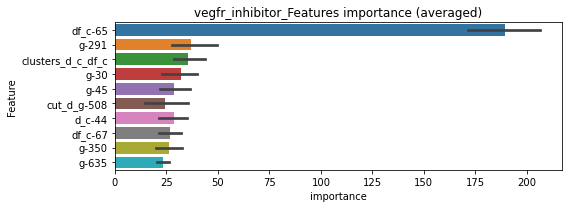

len(train_index) : 3804
len(valid_index) : 3804
================================= fold 1/2 vegfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030081	valid_1's binary_logloss: 0.0798604
[200]	training's binary_logloss: 0.00625021	valid_1's binary_logloss: 0.0544851
[300]	training's binary_logloss: 0.00202579	valid_1's binary_logloss: 0.048415
[400]	training's binary_logloss: 0.000880459	valid_1's binary_logloss: 0.0442231
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000699707	valid_1's binary_logloss: 0.0434593


len(train_index) : 3804
len(valid_index) : 3804
================================= fold 2/2 vegfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0304517	valid_1's binary_logloss: 0.0644809
[200]	training's binary_logloss: 0.00654391	valid_1's binary_logloss: 0.0343712
[300]	training's binary_logloss: 0.00215876	valid_1's binary_logloss: 0.0253882
[400]	training's binary_logloss: 0.000944471	valid_1's binary_logloss: 0.020081
[500]	training's binary_logloss: 0.000587523	valid_1's binary_logloss: 0.0182314
[600]	training's binary_logloss: 0.000425926	valid_1's binary_logloss: 0.0169585
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000363544	valid_1's binary_logloss: 0.016419


vegfr_inhibitor logloss: 0.029939964488248275


neg labels: 3289 → selected neg labels: 3285


vitamin_b, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280242	valid_1's binary_logloss: 0.0448903
[200]	training's binary_logloss: 0.00391949	valid_1's binary_logloss: 0.0161668
[300]	training's binary_logloss: 0.00114829	valid_1's binary_logloss: 0.0114719
[400]	training's binary_logloss: 0.00059172	valid_1's binary_logloss: 0.0101228
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000457791	valid_1's binary_logloss: 0.00975026
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0311843	valid_1's binary_logloss: 0.0443418
[200]	training's binary_logloss: 0.00449953	valid_1's binary_logloss: 0.0130178
[300]	training's binary_logloss: 0.00128938	valid_1's binary_logloss: 0.00716778
[400]	training's binary_logloss: 0.000648089	valid_1's binary_logloss: 0.00593111
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000524612	valid_1's binary_logloss: 0.00548858


1 / 3 AUC score:1.000
y_Threshold: 0.0023721, Threshold: 0.0038388, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00345, conf_1:0.00422
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0038388
Num_p_label: 4.0, Expected: 4.3, Adj_threshold_2: 0.0138388
threshold: 0.0138388, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286688	valid_1's binary_logloss: 0.0456818
[200]	training's binary_logloss: 0.00393026	valid_1's binary_logloss: 0.0167369
[300]	training's binary_logloss: 0.00113877	valid_1's binary_logloss: 0.0122721
[400]	training's binary_logloss: 0.000584979	valid_1's binary_logloss: 0.0106309
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00048325	valid_1's binary_logloss: 0.0102801
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030491	valid_1's binary_logloss: 0.04215
[200]	training's binary_logloss: 0.00430372	valid_1's binary_logloss: 0.0123458
[300]	training's binary_logloss: 0.00123701	valid_1's binary_logloss: 0.00731654
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000828928	valid_1's binary_logloss: 0.00657083


2 / 3 AUC score:1.000
y_Threshold: 0.0176862, Threshold: 0.0138388, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0092918 Vs.target_rate: 0.00109
Num_p_label: 37.0, conf_0:0.01245, conf_1:0.01522
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.0138388
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0238388
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_3: 0.0338388
threshold: 0.0338388, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286688	valid_1's binary_logloss: 0.0456818
[200]	training's binary_logloss: 0.00393026	valid_1's binary_logloss: 0.0167369
[300]	training's binary_logloss: 0.00113877	valid_1's binary_logloss: 0.0122721
[400]	training's binary_logloss: 0.000584979	valid_1's binary_logloss: 0.0106309
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00048325	valid_1's binary_logloss: 0.0102801
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030491	valid_1's binary_logloss: 0.04215
[200]	training's binary_logloss: 0.00430372	valid_1's binary_logloss: 0.0123458
[300]	training's binary_logloss: 0.00123701	valid_1's binary_logloss: 0.00731654
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000828928	valid_1's binary_logloss: 0.00657083


3 / 3 AUC score:1.000
y_Threshold: 0.0176862, Threshold: 0.0338388, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00109
Num_p_label: 6.0, conf_0:0.03045, conf_1:0.03722
threshold: 0.0338388, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7792, y_label_rate: 0.0850873


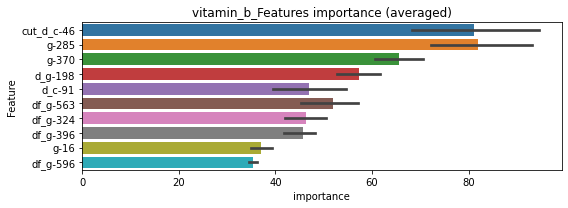

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 vitamin_b=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152925	valid_1's binary_logloss: 0.0274175
[200]	training's binary_logloss: 0.00214448	valid_1's binary_logloss: 0.0118715
[300]	training's binary_logloss: 0.000608273	valid_1's binary_logloss: 0.00966999
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000507917	valid_1's binary_logloss: 0.00961018


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 vitamin_b=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155406	valid_1's binary_logloss: 0.0274469
[200]	training's binary_logloss: 0.00225191	valid_1's binary_logloss: 0.0112977
[300]	training's binary_logloss: 0.000654625	valid_1's binary_logloss: 0.00848529
[400]	training's binary_logloss: 0.00032373	valid_1's binary_logloss: 0.00762904
[500]	training's binary_logloss: 0.000227321	valid_1's binary_logloss: 0.007294
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000226074	valid_1's binary_logloss: 0.00726828


vitamin_b logloss: 0.00843923406405822


neg labels: 3289 → selected neg labels: 3281


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3281, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290479	valid_1's binary_logloss: 0.0422482
[200]	training's binary_logloss: 0.00403406	valid_1's binary_logloss: 0.00990959
[300]	training's binary_logloss: 0.0011632	valid_1's binary_logloss: 0.00454474
[400]	training's binary_logloss: 0.000586877	valid_1's binary_logloss: 0.00312067
[500]	training's binary_logloss: 0.000410071	valid_1's binary_logloss: 0.00269955
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000378623	valid_1's binary_logloss: 0.0026066
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295715	valid_1's binary_logloss: 0.0455174
[200]	training's binary_logloss: 0.00411878	valid_1's binary_logloss: 0.011091
[300]	training's binary_logloss: 0.00118527	valid_1's binary_logloss: 0.00591679
[400]	training's binary_logloss: 0.000593071	valid_1's binary_logloss: 0.00444882
[500]	training's binary_logloss: 0.00

1 / 3 AUC score:1.000
y_Threshold: 0.0020143, Threshold: 0.0043637, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00164
Num_p_label: 80.0, conf_0:0.00393, conf_1:0.00480
Num_p_label: 80.0, Expected: 6.5, Adj_threshold_1: 0.0043637
Num_p_label: 22.0, Expected: 6.5, Adj_threshold_2: 0.0143637
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_3: 0.0243637
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_4: 0.0343637
threshold: 0.0343637, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295524	valid_1's binary_logloss: 0.0415813
[200]	training's binary_logloss: 0.00403201	valid_1's binary_logloss: 0.00957672
[300]	training's binary_logloss: 0.00114291	valid_1's binary_logloss: 0.00447007
[400]	training's binary_logloss: 0.00057234	valid_1's binary_logloss: 0.00321618
[500]	training's binary_logloss: 0.000404675	valid_1's binary_logloss: 0.00281918
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000406148	valid_1's binary_logloss: 0.00281192
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294784	valid_1's binary_logloss: 0.0449895
[200]	training's binary_logloss: 0.00403756	valid_1's binary_logloss: 0.0116181
[300]	training's binary_logloss: 0.00114168	valid_1's binary_logloss: 0.00640508
[400]	training's binary_logloss: 0.000573954	valid_1's binary_logloss: 0.0050861
[500]	training's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0214199, Threshold: 0.0343637, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0052737 Vs.target_rate: 0.00164
Num_p_label: 21.0, conf_0:0.03093, conf_1:0.03780
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0343637
Num_p_label: 20.0, Expected: 6.5, Adj_threshold_2: 0.0443637
Num_p_label: 19.0, Expected: 6.5, Adj_threshold_3: 0.0543637
Num_p_label: 16.0, Expected: 6.5, Adj_threshold_4: 0.0643637
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_5: 0.0743637
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_6: 0.0843637
threshold: 0.0843637, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295524	valid_1's binary_logloss: 0.0415813
[200]	training's binary_logloss: 0.00403201	valid_1's binary_logloss: 0.00957672
[300]	training's binary_logloss: 0.00114291	valid_1's binary_logloss: 0.00447007
[400]	training's binary_logloss: 0.00057234	valid_1's binary_logloss: 0.00321618
[500]	training's binary_logloss: 0.000404675	valid_1's binary_logloss: 0.00281918
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000406148	valid_1's binary_logloss: 0.00281192
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294784	valid_1's binary_logloss: 0.0449895
[200]	training's binary_logloss: 0.00403756	valid_1's binary_logloss: 0.0116181
[300]	training's binary_logloss: 0.00114168	valid_1's binary_logloss: 0.00640508
[400]	training's binary_logloss: 0.000573954	valid_1's binary_logloss: 0.0050861
[500]	training's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0214199, Threshold: 0.0843637, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00164
Num_p_label: 12.0, conf_0:0.07593, conf_1:0.09280
threshold: 0.0843637, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 668.0/7787, y_label_rate: 0.0857840


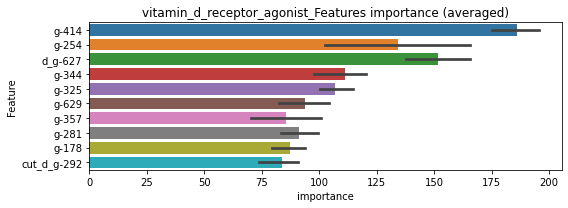

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148154	valid_1's binary_logloss: 0.0280569
[200]	training's binary_logloss: 0.00201582	valid_1's binary_logloss: 0.0107609
[300]	training's binary_logloss: 0.000592872	valid_1's binary_logloss: 0.00796134
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000342287	valid_1's binary_logloss: 0.00748969


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152067	valid_1's binary_logloss: 0.0265953
[200]	training's binary_logloss: 0.00203287	valid_1's binary_logloss: 0.00966389
[300]	training's binary_logloss: 0.000583398	valid_1's binary_logloss: 0.00716716
[400]	training's binary_logloss: 0.000292477	valid_1's binary_logloss: 0.0067426
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000250185	valid_1's binary_logloss: 0.00666511


vitamin_d_receptor_agonist logloss: 0.00707744888697716


neg labels: 3289 → selected neg labels: 3284


wnt_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0303657	valid_1's binary_logloss: 0.0572842
[200]	training's binary_logloss: 0.00440262	valid_1's binary_logloss: 0.0200213
[300]	training's binary_logloss: 0.00130754	valid_1's binary_logloss: 0.0133144
[400]	training's binary_logloss: 0.000666693	valid_1's binary_logloss: 0.0115325
[500]	training's binary_logloss: 0.000466903	valid_1's binary_logloss: 0.0106942
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000458501	valid_1's binary_logloss: 0.0106607
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312214	valid_1's binary_logloss: 0.0497493
[200]	training's binary_logloss: 0.00481001	valid_1's binary_logloss: 0.0172434
[300]	training's binary_logloss: 0.0014007	valid_1's binary_logloss: 0.0106582
[400]	training's binary_logloss: 0.000694603	valid_1's binary_logloss: 0.00846503
[500]	training's binary_logloss: 0.000478

1 / 3 AUC score:1.000
y_Threshold: 0.0018876, Threshold: 0.0027785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00250, conf_1:0.00306
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0027785
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0127785
threshold: 0.0127785, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315953	valid_1's binary_logloss: 0.0594182
[200]	training's binary_logloss: 0.00453404	valid_1's binary_logloss: 0.0219897
[300]	training's binary_logloss: 0.00134099	valid_1's binary_logloss: 0.0142828
[400]	training's binary_logloss: 0.000682077	valid_1's binary_logloss: 0.0118794
[500]	training's binary_logloss: 0.000474593	valid_1's binary_logloss: 0.0108369
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000474593	valid_1's binary_logloss: 0.0108369
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317043	valid_1's binary_logloss: 0.0507316
[200]	training's binary_logloss: 0.00477868	valid_1's binary_logloss: 0.0167702
[300]	training's binary_logloss: 0.00139664	valid_1's binary_logloss: 0.0103803
[400]	training's binary_logloss: 0.000697729	valid_1's binary_logloss: 0.00811963
[500]	training's binary_logloss: 0.00048

2 / 3 AUC score:1.000
y_Threshold: 0.0194792, Threshold: 0.0127785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, conf_0:0.01150, conf_1:0.01406
threshold: 0.0127785, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0315953	valid_1's binary_logloss: 0.0594182
[200]	training's binary_logloss: 0.00453404	valid_1's binary_logloss: 0.0219897
[300]	training's binary_logloss: 0.00134099	valid_1's binary_logloss: 0.0142828
[400]	training's binary_logloss: 0.000682077	valid_1's binary_logloss: 0.0118794
[500]	training's binary_logloss: 0.000474593	valid_1's binary_logloss: 0.0108369
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000474593	valid_1's binary_logloss: 0.0108369
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317043	valid_1's binary_logloss: 0.0507316
[200]	training's binary_logloss: 0.00477868	valid_1's binary_logloss: 0.0167702
[300]	training's binary_logloss: 0.00139664	valid_1's binary_logloss: 0.0103803
[400]	training's binary_logloss: 0.000697729	valid_1's binary_logloss: 0.00811963
[500]	training's binary_logloss: 0.00048

3 / 3 AUC score:1.000
y_Threshold: 0.0194792, Threshold: 0.0127785, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, conf_0:0.01150, conf_1:0.01406
threshold: 0.0127785, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 670.0/7790, y_label_rate: 0.0860077


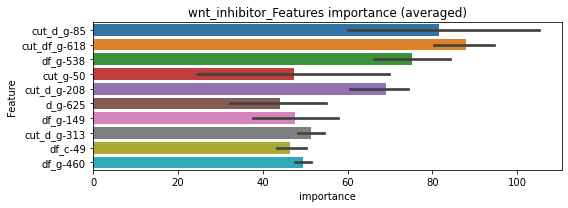

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 wnt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172037	valid_1's binary_logloss: 0.033711
[200]	training's binary_logloss: 0.0026821	valid_1's binary_logloss: 0.01846
[300]	training's binary_logloss: 0.000755689	valid_1's binary_logloss: 0.016527
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000455323	valid_1's binary_logloss: 0.0161533


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 wnt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180514	valid_1's binary_logloss: 0.0320728
[200]	training's binary_logloss: 0.00285345	valid_1's binary_logloss: 0.013589
[300]	training's binary_logloss: 0.000835129	valid_1's binary_logloss: 0.0102153
[400]	training's binary_logloss: 0.00040189	valid_1's binary_logloss: 0.00951598
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000420322	valid_1's binary_logloss: 0.00950447


wnt_inhibitor logloss: 0.012828903223224976


In [47]:
categorical_cols = []
scores = []
models = []
feature_importance_df = pd.DataFrame()
importance_cols_df = pd.DataFrame()

for target_col in tqdm(train_targets_scored.columns[1:]):
    _preds, _score, models, _feature_importance_df = run_lgbm(target_col)

    sub[target_col] = _preds
    scores.append(_score)
    
    if DEBUG:
        feature_importance_df = create_featureimprotance(models, feature_importance_df)
        importance_cols_df[target_col] = select_importance_cols(_feature_importance_df)

In [48]:
sub.to_csv('submission.csv', index=False)

In [49]:
print(f"CV:{np.mean(scores)}")

CV:0.019758271421557245


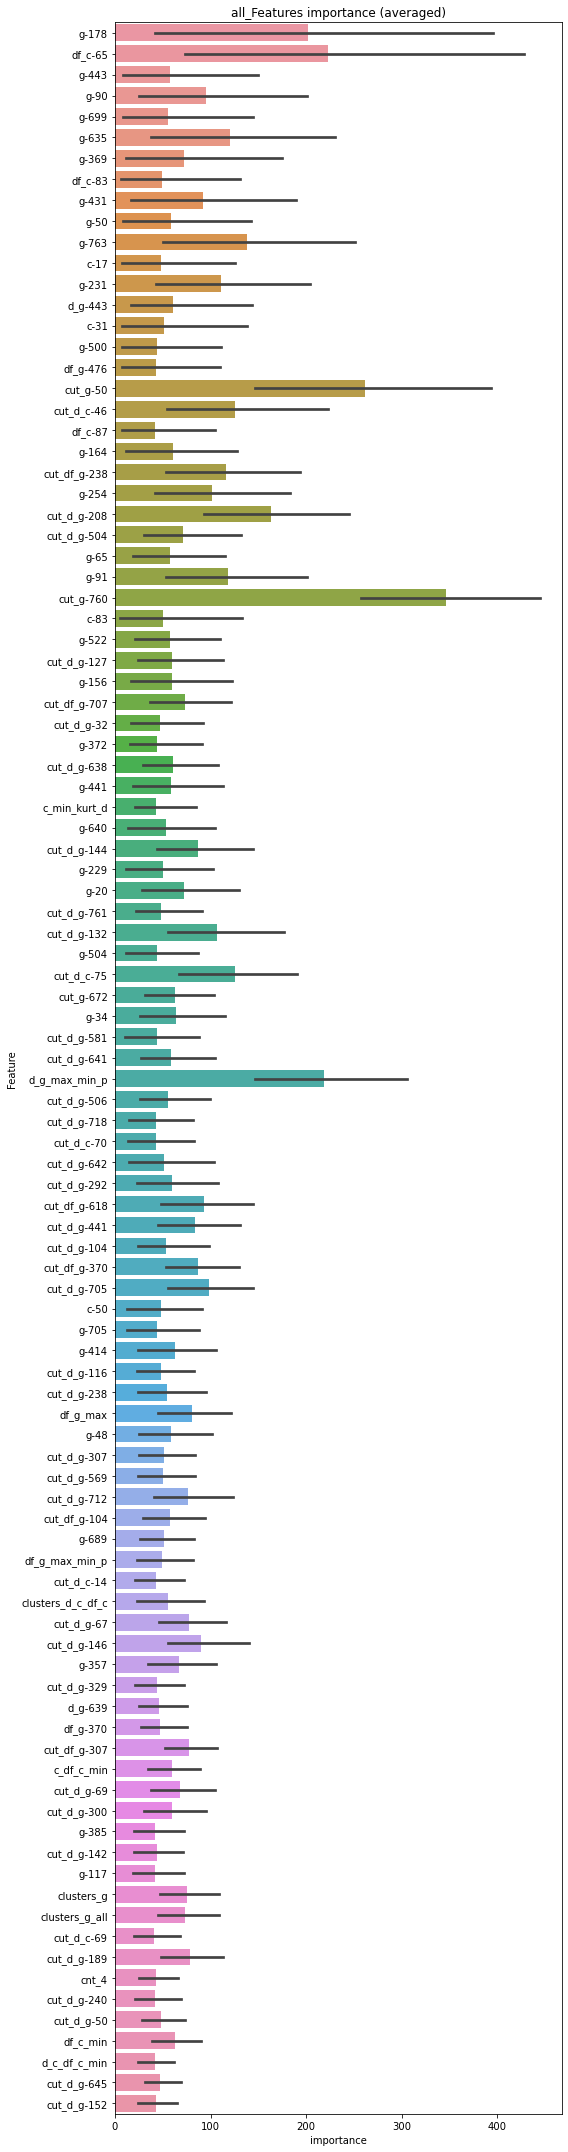

In [50]:
if DEBUG:
    show_feature_importance(feature_importance_df)
    feature_importance_df.to_csv(f'feature_importance_df.{Version}.csv', index=False)
    importance_cols_df.to_csv(f'importance_cols_df.{Version}.csv', index=False)